# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2020.csv'
df = pd.read_csv(input_data)
df.head()

Site # Origin Dominant_s  N_trees at  A_year  D_live_cm  H_live_m  \
0      1      n      Birch          57      35       13.5      17.3   
1      2      a       Pine          25      58       15.0      16.9   
2      3      a       Pine          32      58       13.7      16.8   
3      4      a       Pine          63      58       20.3      18.4   
4      5      a       Pine          53      58       17.5      19.9   

   G_live_m2_  f_Gs_cub_m  f_M_stem_kg_m2  ...  r2019B03  r2019B04  r2019B05  \
0        15.1         123            5.83  ...  0.030628  0.266210  0.166299   
1        39.0         317           11.67  ...  0.027934  0.183349  0.102656   
2        42.8         346           12.37  ...  0.026123  0.184066  0.099625   
3        38.8         315           13.88  ...  0.027390  0.177221  0.102540   
4        48.3         383           14.51  ...  0.025702  0.183705  0.101394   

   r2019B06  r2019B07  r2019B08  r2019B09   r2019B10   r2019B11  r2019B12  
0  0.081316  0.793351 -0.733693  0.532051 -15.396488 -11.262037  0.731937  
1  0.052144  0.735493 -0.655456  0.557000 -16.012156  -9.364664  0.584920  
2  0.050684  0.751436 -0.650575  0.568148 -13.609903  -9.726108  0.715177  
3  0.052198  0.732404 -0.648310  0.544717 -14.321650 -10.457536  0.730390  
4  0.050437  0.754481 -0.660382  0.569112 -13.934375 -11.393335  0.817430  

[5 rows x 63 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            


# Show the first five columns
select.head()

Ln_Gs_cub_m  Ln_M_stem_kg_m2  Ln_M_stem_bark_kg_m2  Ln_M_crown_kg_m2  \
0         4.81             1.76                 -0.31             -0.16   
1         5.76             2.46                 -0.25              0.34   
2         5.85             2.52                 -0.11              0.55   
3         5.75             2.63                 -0.08              0.39   
4         5.95             2.67                  0.00              0.57   

   Ln_M_foliage_kg_m2  Ln_M_AG_kg_m2  Ln_Cs_wood  Ln_Sr_wood  Ln_Tag_Cs  \
0               -2.44           1.91         6.8         9.2       -0.7   
1               -0.20           2.63         8.2         9.6        0.6   
2               -0.21           2.70         8.4         9.6        0.8   
3               -0.35           2.78         8.1         9.4        0.5   
4               -0.37           2.83         7.7         9.4        0.2   

   Ln_Tag_Sr  ...  r2020B03  r2020B04  r2020B05  r2020B06  r2020B07  r2020B08  \
0        2.6  ...  0.028616  0.254417  0.175280  0.086611  0.797761 -0.749311   
1        2.9  ...  0.022230  0.189826  0.092225  0.047120  0.789129 -0.705355   
2        2.9  ...  0.021190  0.204363  0.093062  0.043824  0.812120 -0.704758   
3        2.7  ...  0.025284  0.187998  0.102872  0.048585  0.762431 -0.695416   
4        2.8  ...  0.024911  0.216271  0.096981  0.044880  0.793606 -0.717562   

   r2020B09   r2020B10   r2020B11  r2020B12  
0  0.491270 -15.527246 -11.385074  0.733806  
1  0.659775 -16.547673 -10.947565  0.661723  
2  0.631348 -14.341917 -11.884799  0.829603  
3  0.601894 -14.885610 -11.725163  0.787609  
4  0.642942 -14.647913 -11.512282  0.785698  

[5 rows x 22 columns]

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           198 non-null    float64
 1   Ln_M_stem_kg_m2       198 non-null    float64
 2   Ln_M_stem_bark_kg_m2  198 non-null    float64
 3   Ln_M_crown_kg_m2      198 non-null    float64
 4   Ln_M_foliage_kg_m2    198 non-null    float64
 5   Ln_M_AG_kg_m2         198 non-null    float64
 6   Ln_Cs_wood            198 non-null    float64
 7   Ln_Sr_wood            198 non-null    float64
 8   Ln_Tag_Cs             198 non-null    float64
 9   Ln_Tag_Sr             198 non-null    float64
 10  r2020B01              198 non-null    float64
 11  r2020B02              198 non-null    float64
 12  r2020B03              198 non-null    float64
 13  r2020B04              198 non-null    float64
 14  r2020B05              198 non-null    float64
 15  r2020B06              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_24421/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            123.0  304.699187  185.582068    2.0  150.5  319.0  457.5   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          123.0  11.991789  7.094609   0.05   6.285  12.37   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.645  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

Ln_Gs_cub_m  Ln_M_stem_kg_m2  Ln_M_stem_bark_kg_m2  Ln_M_crown_kg_m2  \
count   198.000000       198.000000            198.000000        198.000000   
mean      5.234646         2.081717             -0.039242          0.171313   
std       1.129652         1.126519              0.789675          0.588506   
min       0.690000        -3.000000             -3.910000         -1.560000   
25%       4.960000         1.812500             -0.190000         -0.025000   
50%       5.510000         2.420000              0.060000          0.310000   
75%       5.987500         2.807500              0.387500          0.530000   
max       6.510000         3.260000              1.650000          1.410000   

       Ln_M_foliage_kg_m2  Ln_M_AG_kg_m2  Ln_Cs_wood  Ln_Sr_wood   Ln_Tag_Cs  \
count          198.000000     198.000000  198.000000  198.000000  198.000000   
mean            -0.953081       2.305758    6.052020    7.395960   -0.566667   
std              0.719719       0.931192    2.089707    2.070848    1.250989   
min             -2.920000      -0.800000    1.600000    2.400000   -4.700000   
25%             -1.525000       2.052500    4.300000    5.800000   -1.300000   
50%             -0.690000       2.580000    6.400000    7.600000   -0.500000   
75%             -0.360000       2.937500    7.400000    8.800000    0.400000   
max              0.110000       3.390000   11.400000   13.900000    1.700000   

        Ln_Tag_Sr  ...    r2020B03    r2020B04    r2020B05    r2020B06  \
count  198.000000  ...  198.000000  198.000000  198.000000  198.000000   
mean     2.342424  ...    0.027499    0.213645    0.125537    0.063662   
std      0.939283  ...    0.009532    0.042641    0.035475    0.023731   
min     -0.300000  ...    0.014640    0.124161    0.079896    0.036570   
25%      1.700000  ...    0.022284    0.187070    0.095832    0.046290   
50%      2.500000  ...    0.024743    0.204261    0.115558    0.058209   
75%      3.000000  ...    0.028527    0.236440    0.150857    0.072122   
max      4.700000  ...    0.080615    0.369338    0.243667    0.187427   

         r2020B07    r2020B08    r2020B09    r2020B10    r2020B11    r2020B12  
count  198.000000  198.000000  198.000000  198.000000  198.000000  198.000000  
mean     0.767194   -0.703079    0.540963  -16.145709  -10.863669    0.675418  
std      0.078273    0.060738    0.132304    1.343250    1.161017    0.069250  
min      0.381333   -0.823403    0.038198  -22.517731  -14.262763    0.492975  
25%      0.745438   -0.735205    0.502225  -16.970102  -11.519514    0.628884  
50%      0.784239   -0.704881    0.577675  -16.010171  -10.784612    0.667561  
75%      0.808780   -0.680539    0.632284  -15.159997  -10.008004    0.720595  
max      0.885319   -0.410944    0.710583  -13.281957   -7.650135    0.860863  

[8 rows x 22 columns]

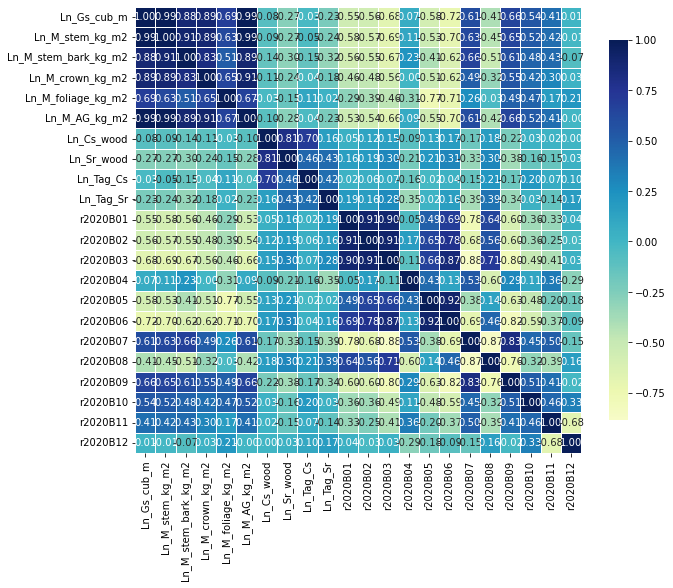

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11'])
y = pd.DataFrame(select, columns= ['Ln_M_stem_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

r2020B01  r2020B03  r2020B05  r2020B06  r2020B07   r2020B10   r2020B11
0  0.019397  0.028616  0.175280  0.086611  0.797761 -15.527246 -11.385074
1  0.019167  0.022230  0.092225  0.047120  0.789129 -16.547673 -10.947565
2  0.019568  0.021190  0.093062  0.043824  0.812120 -14.341917 -11.884799
3  0.020556  0.025284  0.102872  0.048585  0.762431 -14.885610 -11.725163
4  0.019003  0.024911  0.096981  0.044880  0.793606 -14.647913 -11.512282

In [11]:
# Columns in "y" data collections
y.head()

Ln_M_stem_kg_m2
0             1.76
1             2.46
2             2.52
3             2.63
4             2.67

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.2027947886622895, 0.28471291158603074, 0.16221251462269215]
    Mean: 0.217
    Std: 0.051

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.89434607 0.95952244 0.83383978]
    Mean: 0.896
    Std: 0.051

 --------------------
Mean absolute error (MAE): 

    Scores: [0.766254311000759, 0.5700038638981906, 0.7126498886626778]
    Mean: 0.683
    Std: 0.083

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Model with rank: 1
Mean validation score: 0.289 (std: 0.246)
Parameters: {'colsample_bytree': 0.25847114664017395, 'gamma': 0.24219420368527494, 'learning_rate': 0.05741555253162033, 'max_depth': 2, 'n_estimators': 152, 'subsample': 0.38330285374579093}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.11964259, 0.27885752, 0.27642903, ..., 0.15767021, 0.25880289,
       0.33778801]), 'std_fit_time': array([0.02488279, 0.01448999, 0.0034209 , ..., 0.00623163, 0.00844659,
       0.01587978]), 'mean_score_time': array([0.00455494, 0.00453911, 0.00452223, ..., 0.00434718, 0.00442777,
       0.00448279]), 'std_score_time': array([1.44938841e-04, 4.40806488e-05, 5.11221029e-05, ...,
       4.78167110e-05, 7.78753478e-05, 7.28252896e-05]), 'param_colsample_bytree': masked_array(data=[0.24793377854453041, 0.7553601805815245,
                   0.6945427416083364, ..., 0.40088778118012447,
                   0.1908318866392391, 0.7187367555937771],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.43494850476427477, 0.0005534986845090462,
                   0.0896484793424972, ..., 0.10670626940403122,
                   0.22902921726691056, 0.42145481815220875],


In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.25847114664017395
Gamma: 0.24219420368527494
Learning_rate: 0.05741555253162033
Max_depth: 2
N_estimators: 152
Subsample: 0.38330285374579093


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(600):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.87985	validation_1-rmse:1.75238
[1]	validation_0-rmse:1.79794	validation_1-rmse:1.67067
[2]	validation_0-rmse:1.72052	validation_1-rmse:1.59356
[3]	validation_0-rmse:1.64712	validation_1-rmse:1.52600
[4]	validation_0-rmse:1.57993	validation_1-rmse:1.46173
[5]	validation_0-rmse:1.51610	validation_1-rmse:1.41020
[6]	validation_0-rmse:1.47093	validation_1-rmse:1.36500
[7]	validation_0-rmse:1.41754	validation_1-rmse:1.31649
[8]	validation_0-rmse:1.36679	validation_1-rmse:1.27095
[9]	validation_0-rmse:1.31963	validation_1-rmse:1.23275
[10]	validation_0-rmse:1.28402	validation_1-rmse:1.20170
[11]	validation_0-rmse:1.23980	validation_1-rmse:1.15709
[12]	validation_0-rmse:1.19571	validation_1-rmse:1.11057
[13]	validation_0-rmse:1.16835	validation_1-rmse:1.08426
[14]	validation_0-rmse:1.13510	validation_1-rmse:1.04860
[15]	validation_0-rmse:1.10260	validation_1-rmse:1.02423
[16]	validation_0-rmse:1.07101	validation_1-rmse:1.00252
[17]	validation_0-rmse:1.04510	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94609	validation_1-rmse:0.88659
[23]	validation_0-rmse:0.92791	validation_1-rmse:0.86764
[24]	validation_0-rmse:0.91279	validation_1-rmse:0.85646
[25]	validation_0-rmse:0.89581	validation_1-rmse:0.84072
[26]	validation_0-rmse:0.88065	validation_1-rmse:0.83359
[27]	validation_0-rmse:0.86823	validation_1-rmse:0.82789
[28]	validation_0-rmse:0.85815	validation_1-rmse:0.81816
[29]	validation_0-rmse:0.84756	validation_1-rmse:0.80897
[30]	validation_0-rmse:0.83685	validation_1-rmse:0.80367
[31]	validation_0-rmse:0.83060	validation_1-rmse:0.80301
[32]	validation_0-rmse:0.81874	validation_1-rmse:0.79817
[33]	validation_0-rmse:0.80927	validation_1-rmse:0.79042
[34]	validation_0-rmse:0.79866	validation_1-rmse:0.78833
[35]	validation_0-rmse:0.79042	validation_1-rmse:0.78487
[36]	validation_0-rmse:0.78613	validation_1-rmse:0.78298
[37]	validation_0-rmse:0.77775	validation_1-rmse:0.77744
[38]	validation_0-rmse:0.77279	validation_1-rmse:0.77583
[39]	validation_0-rmse:0.76881	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88263	validation_1-rmse:0.76040
[29]	validation_0-rmse:0.87187	validation_1-rmse:0.74304
[30]	validation_0-rmse:0.86129	validation_1-rmse:0.73106
[31]	validation_0-rmse:0.85696	validation_1-rmse:0.72355
[32]	validation_0-rmse:0.84766	validation_1-rmse:0.71547
[33]	validation_0-rmse:0.83837	validation_1-rmse:0.70230
[34]	validation_0-rmse:0.82996	validation_1-rmse:0.69231
[35]	validation_0-rmse:0.82657	validation_1-rmse:0.68455
[36]	validation_0-rmse:0.82318	validation_1-rmse:0.68359
[37]	validation_0-rmse:0.81486	validation_1-rmse:0.67424
[38]	validation_0-rmse:0.81103	validation_1-rmse:0.67723
[39]	validation_0-rmse:0.80473	validation_1-rmse:0.67168
[40]	validation_0-rmse:0.80187	validation_1-rmse:0.66417
[41]	validation_0-rmse:0.80005	validation_1-rmse:0.66254
[42]	validation_0-rmse:0.79555	validation_1-rmse:0.65967
[43]	validation_0-rmse:0.79337	validation_1-rmse:0.65575
[44]	validation_0-rmse:0.79109	validation_1-rmse:0.65261
[45]	validation_0-rmse:0.78806	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06691	validation_1-rmse:1.10713
[17]	validation_0-rmse:1.04149	validation_1-rmse:1.07959
[18]	validation_0-rmse:1.01770	validation_1-rmse:1.05084
[19]	validation_0-rmse:1.00231	validation_1-rmse:1.03218
[20]	validation_0-rmse:0.98083	validation_1-rmse:1.00415
[21]	validation_0-rmse:0.96363	validation_1-rmse:0.99270
[22]	validation_0-rmse:0.94770	validation_1-rmse:0.97060
[23]	validation_0-rmse:0.93045	validation_1-rmse:0.94772
[24]	validation_0-rmse:0.91521	validation_1-rmse:0.93615
[25]	validation_0-rmse:0.89756	validation_1-rmse:0.91464
[26]	validation_0-rmse:0.88669	validation_1-rmse:0.89440
[27]	validation_0-rmse:0.87680	validation_1-rmse:0.89083
[28]	validation_0-rmse:0.86878	validation_1-rmse:0.88273
[29]	validation_0-rmse:0.85684	validation_1-rmse:0.86408
[30]	validation_0-rmse:0.84742	validation_1-rmse:0.85538
[31]	validation_0-rmse:0.83966	validation_1-rmse:0.84371
[32]	validation_0-rmse:0.83167	validation_1-rmse:0.83641
[33]	validation_0-rmse:0.82308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.47654	validation_1-rmse:1.70348
[6]	validation_0-rmse:1.42221	validation_1-rmse:1.65837
[7]	validation_0-rmse:1.36774	validation_1-rmse:1.60742
[8]	validation_0-rmse:1.31105	validation_1-rmse:1.54431
[9]	validation_0-rmse:1.26357	validation_1-rmse:1.50169
[10]	validation_0-rmse:1.22359	validation_1-rmse:1.47375
[11]	validation_0-rmse:1.18774	validation_1-rmse:1.43406
[12]	validation_0-rmse:1.15424	validation_1-rmse:1.40221
[13]	validation_0-rmse:1.12269	validation_1-rmse:1.37872
[14]	validation_0-rmse:1.08890	validation_1-rmse:1.34675
[15]	validation_0-rmse:1.06073	validation_1-rmse:1.32677
[16]	validation_0-rmse:1.02875	validation_1-rmse:1.29549
[17]	validation_0-rmse:1.00151	validation_1-rmse:1.26871
[18]	validation_0-rmse:0.97914	validation_1-rmse:1.25446
[19]	validation_0-rmse:0.95510	validation_1-rmse:1.22972
[20]	validation_0-rmse:0.93713	validation_1-rmse:1.20722
[21]	validation_0-rmse:0.92098	validation_1-rmse:1.19390
[22]	validation_0-rmse:0.90514	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.01981	validation_1-rmse:1.03416
[19]	validation_0-rmse:0.99481	validation_1-rmse:1.01221
[20]	validation_0-rmse:0.97394	validation_1-rmse:0.99568
[21]	validation_0-rmse:0.95881	validation_1-rmse:0.98767
[22]	validation_0-rmse:0.94004	validation_1-rmse:0.97057
[23]	validation_0-rmse:0.92112	validation_1-rmse:0.95524
[24]	validation_0-rmse:0.90627	validation_1-rmse:0.94396
[25]	validation_0-rmse:0.88985	validation_1-rmse:0.92941
[26]	validation_0-rmse:0.87897	validation_1-rmse:0.92875
[27]	validation_0-rmse:0.86232	validation_1-rmse:0.92525
[28]	validation_0-rmse:0.85308	validation_1-rmse:0.92473
[29]	validation_0-rmse:0.83891	validation_1-rmse:0.91409
[30]	validation_0-rmse:0.82802	validation_1-rmse:0.90337
[31]	validation_0-rmse:0.82457	validation_1-rmse:0.90499
[32]	validation_0-rmse:0.81238	validation_1-rmse:0.89638
[33]	validation_0-rmse:0.80135	validation_1-rmse:0.89401
[34]	validation_0-rmse:0.79253	validation_1-rmse:0.88991
[35]	validation_0-rmse:0.78539	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.38634	validation_1-rmse:1.53239
[8]	validation_0-rmse:1.33099	validation_1-rmse:1.48562
[9]	validation_0-rmse:1.27529	validation_1-rmse:1.43670
[10]	validation_0-rmse:1.23447	validation_1-rmse:1.41028
[11]	validation_0-rmse:1.19407	validation_1-rmse:1.37937
[12]	validation_0-rmse:1.15887	validation_1-rmse:1.35529
[13]	validation_0-rmse:1.11962	validation_1-rmse:1.33309
[14]	validation_0-rmse:1.08410	validation_1-rmse:1.31115
[15]	validation_0-rmse:1.05366	validation_1-rmse:1.28649
[16]	validation_0-rmse:1.01880	validation_1-rmse:1.26230
[17]	validation_0-rmse:0.98510	validation_1-rmse:1.23721
[18]	validation_0-rmse:0.96447	validation_1-rmse:1.22506
[19]	validation_0-rmse:0.94168	validation_1-rmse:1.21368
[20]	validation_0-rmse:0.91777	validation_1-rmse:1.20128
[21]	validation_0-rmse:0.89948	validation_1-rmse:1.19252
[22]	validation_0-rmse:0.88086	validation_1-rmse:1.17856
[23]	validation_0-rmse:0.86297	validation_1-rmse:1.16904
[24]	validation_0-rmse:0.84622	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06020	validation_1-rmse:0.97060
[17]	validation_0-rmse:1.03616	validation_1-rmse:0.95102
[18]	validation_0-rmse:1.01686	validation_1-rmse:0.93330
[19]	validation_0-rmse:0.99171	validation_1-rmse:0.91225
[20]	validation_0-rmse:0.97411	validation_1-rmse:0.89524
[21]	validation_0-rmse:0.95524	validation_1-rmse:0.87847
[22]	validation_0-rmse:0.93870	validation_1-rmse:0.86797
[23]	validation_0-rmse:0.91967	validation_1-rmse:0.85107
[24]	validation_0-rmse:0.90514	validation_1-rmse:0.84183
[25]	validation_0-rmse:0.89168	validation_1-rmse:0.82565
[26]	validation_0-rmse:0.88038	validation_1-rmse:0.81620
[27]	validation_0-rmse:0.86689	validation_1-rmse:0.80459
[28]	validation_0-rmse:0.85597	validation_1-rmse:0.79323
[29]	validation_0-rmse:0.84696	validation_1-rmse:0.78569
[30]	validation_0-rmse:0.83654	validation_1-rmse:0.77732
[31]	validation_0-rmse:0.83229	validation_1-rmse:0.77433
[32]	validation_0-rmse:0.81984	validation_1-rmse:0.76980
[33]	validation_0-rmse:0.80877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.10561	validation_1-rmse:1.10123
[16]	validation_0-rmse:1.07568	validation_1-rmse:1.08495
[17]	validation_0-rmse:1.04161	validation_1-rmse:1.05756
[18]	validation_0-rmse:1.01947	validation_1-rmse:1.04968
[19]	validation_0-rmse:0.99506	validation_1-rmse:1.03852
[20]	validation_0-rmse:0.97066	validation_1-rmse:1.02007
[21]	validation_0-rmse:0.95096	validation_1-rmse:1.00406
[22]	validation_0-rmse:0.92887	validation_1-rmse:0.99297
[23]	validation_0-rmse:0.91042	validation_1-rmse:0.98199
[24]	validation_0-rmse:0.89546	validation_1-rmse:0.96948
[25]	validation_0-rmse:0.87811	validation_1-rmse:0.95952
[26]	validation_0-rmse:0.86438	validation_1-rmse:0.94997
[27]	validation_0-rmse:0.85050	validation_1-rmse:0.94506
[28]	validation_0-rmse:0.84269	validation_1-rmse:0.94188
[29]	validation_0-rmse:0.83228	validation_1-rmse:0.93438
[30]	validation_0-rmse:0.82216	validation_1-rmse:0.92746
[31]	validation_0-rmse:0.81395	validation_1-rmse:0.92339
[32]	validation_0-rmse:0.80226	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.01688	validation_1-rmse:1.25171
[17]	validation_0-rmse:0.99177	validation_1-rmse:1.21982
[18]	validation_0-rmse:0.97238	validation_1-rmse:1.21299
[19]	validation_0-rmse:0.95059	validation_1-rmse:1.18749
[20]	validation_0-rmse:0.93349	validation_1-rmse:1.17125
[21]	validation_0-rmse:0.91581	validation_1-rmse:1.14525
[22]	validation_0-rmse:0.89797	validation_1-rmse:1.12513
[23]	validation_0-rmse:0.87686	validation_1-rmse:1.10773
[24]	validation_0-rmse:0.86505	validation_1-rmse:1.09014
[25]	validation_0-rmse:0.84796	validation_1-rmse:1.07580
[26]	validation_0-rmse:0.83486	validation_1-rmse:1.05973
[27]	validation_0-rmse:0.82541	validation_1-rmse:1.04359
[28]	validation_0-rmse:0.81762	validation_1-rmse:1.03376
[29]	validation_0-rmse:0.80629	validation_1-rmse:1.02241
[30]	validation_0-rmse:0.80046	validation_1-rmse:1.01388
[31]	validation_0-rmse:0.78866	validation_1-rmse:1.00457
[32]	validation_0-rmse:0.77882	validation_1-rmse:0.99372
[33]	validation_0-rmse:0.77314	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.20820	validation_1-rmse:1.29347
[12]	validation_0-rmse:1.16934	validation_1-rmse:1.25356
[13]	validation_0-rmse:1.13675	validation_1-rmse:1.22361
[14]	validation_0-rmse:1.10884	validation_1-rmse:1.20502
[15]	validation_0-rmse:1.07896	validation_1-rmse:1.18582
[16]	validation_0-rmse:1.05079	validation_1-rmse:1.15665
[17]	validation_0-rmse:1.02025	validation_1-rmse:1.12338
[18]	validation_0-rmse:0.99848	validation_1-rmse:1.10658
[19]	validation_0-rmse:0.97738	validation_1-rmse:1.08489
[20]	validation_0-rmse:0.95612	validation_1-rmse:1.06069
[21]	validation_0-rmse:0.93436	validation_1-rmse:1.04048
[22]	validation_0-rmse:0.91772	validation_1-rmse:1.03007
[23]	validation_0-rmse:0.90187	validation_1-rmse:1.01559
[24]	validation_0-rmse:0.88751	validation_1-rmse:0.99666
[25]	validation_0-rmse:0.87075	validation_1-rmse:0.98582
[26]	validation_0-rmse:0.85647	validation_1-rmse:0.97074
[27]	validation_0-rmse:0.84335	validation_1-rmse:0.96773
[28]	validation_0-rmse:0.83511	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.29909	validation_1-rmse:1.29373
[11]	validation_0-rmse:1.25863	validation_1-rmse:1.24197
[12]	validation_0-rmse:1.21788	validation_1-rmse:1.19213
[13]	validation_0-rmse:1.19310	validation_1-rmse:1.16775
[14]	validation_0-rmse:1.16577	validation_1-rmse:1.13281
[15]	validation_0-rmse:1.13656	validation_1-rmse:1.09767
[16]	validation_0-rmse:1.10186	validation_1-rmse:1.05701
[17]	validation_0-rmse:1.08231	validation_1-rmse:1.02786
[18]	validation_0-rmse:1.05919	validation_1-rmse:0.99968
[19]	validation_0-rmse:1.03702	validation_1-rmse:0.97662
[20]	validation_0-rmse:1.02376	validation_1-rmse:0.96113
[21]	validation_0-rmse:1.00600	validation_1-rmse:0.94098
[22]	validation_0-rmse:0.99070	validation_1-rmse:0.91823
[23]	validation_0-rmse:0.97625	validation_1-rmse:0.89760
[24]	validation_0-rmse:0.95743	validation_1-rmse:0.86656
[25]	validation_0-rmse:0.93965	validation_1-rmse:0.84095
[26]	validation_0-rmse:0.93005	validation_1-rmse:0.82580
[27]	validation_0-rmse:0.91600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.07773	validation_1-rmse:1.26177
[16]	validation_0-rmse:1.04427	validation_1-rmse:1.22442
[17]	validation_0-rmse:1.01971	validation_1-rmse:1.20426
[18]	validation_0-rmse:0.99878	validation_1-rmse:1.19202
[19]	validation_0-rmse:0.97692	validation_1-rmse:1.17548
[20]	validation_0-rmse:0.95180	validation_1-rmse:1.15084
[21]	validation_0-rmse:0.93341	validation_1-rmse:1.13937
[22]	validation_0-rmse:0.91420	validation_1-rmse:1.12381
[23]	validation_0-rmse:0.89060	validation_1-rmse:1.10349
[24]	validation_0-rmse:0.87938	validation_1-rmse:1.10079
[25]	validation_0-rmse:0.86397	validation_1-rmse:1.09054
[26]	validation_0-rmse:0.85474	validation_1-rmse:1.08599
[27]	validation_0-rmse:0.84146	validation_1-rmse:1.07748
[28]	validation_0-rmse:0.83251	validation_1-rmse:1.07375
[29]	validation_0-rmse:0.81947	validation_1-rmse:1.05973
[30]	validation_0-rmse:0.80769	validation_1-rmse:1.04868
[31]	validation_0-rmse:0.80178	validation_1-rmse:1.04512
[32]	validation_0-rmse:0.79171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.28243	validation_1-rmse:1.25574
[11]	validation_0-rmse:1.23445	validation_1-rmse:1.21263
[12]	validation_0-rmse:1.19102	validation_1-rmse:1.17186
[13]	validation_0-rmse:1.16097	validation_1-rmse:1.14898
[14]	validation_0-rmse:1.12358	validation_1-rmse:1.12146
[15]	validation_0-rmse:1.09074	validation_1-rmse:1.09479
[16]	validation_0-rmse:1.05767	validation_1-rmse:1.06130
[17]	validation_0-rmse:1.02934	validation_1-rmse:1.03728
[18]	validation_0-rmse:1.00620	validation_1-rmse:1.02245
[19]	validation_0-rmse:0.98416	validation_1-rmse:1.00313
[20]	validation_0-rmse:0.95759	validation_1-rmse:0.97774
[21]	validation_0-rmse:0.93810	validation_1-rmse:0.96570
[22]	validation_0-rmse:0.91562	validation_1-rmse:0.94630
[23]	validation_0-rmse:0.89844	validation_1-rmse:0.93420
[24]	validation_0-rmse:0.87749	validation_1-rmse:0.91836
[25]	validation_0-rmse:0.86076	validation_1-rmse:0.90263
[26]	validation_0-rmse:0.84853	validation_1-rmse:0.89551
[27]	validation_0-rmse:0.84279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.19743	validation_1-rmse:1.29949
[12]	validation_0-rmse:1.15298	validation_1-rmse:1.26762
[13]	validation_0-rmse:1.12265	validation_1-rmse:1.24353
[14]	validation_0-rmse:1.09066	validation_1-rmse:1.23188
[15]	validation_0-rmse:1.05850	validation_1-rmse:1.21309
[16]	validation_0-rmse:1.02136	validation_1-rmse:1.18798
[17]	validation_0-rmse:0.98925	validation_1-rmse:1.17124
[18]	validation_0-rmse:0.96294	validation_1-rmse:1.15045
[19]	validation_0-rmse:0.94127	validation_1-rmse:1.13437
[20]	validation_0-rmse:0.91375	validation_1-rmse:1.12484
[21]	validation_0-rmse:0.89141	validation_1-rmse:1.11547
[22]	validation_0-rmse:0.87491	validation_1-rmse:1.11653
[23]	validation_0-rmse:0.85636	validation_1-rmse:1.10795
[24]	validation_0-rmse:0.84329	validation_1-rmse:1.10527
[25]	validation_0-rmse:0.82255	validation_1-rmse:1.09896
[26]	validation_0-rmse:0.81132	validation_1-rmse:1.09277
[27]	validation_0-rmse:0.79853	validation_1-rmse:1.08539
[28]	validation_0-rmse:0.78887	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.04651	validation_1-rmse:1.15969
[17]	validation_0-rmse:1.01859	validation_1-rmse:1.14333
[18]	validation_0-rmse:0.98906	validation_1-rmse:1.12688
[19]	validation_0-rmse:0.96328	validation_1-rmse:1.11577
[20]	validation_0-rmse:0.93805	validation_1-rmse:1.09476
[21]	validation_0-rmse:0.91662	validation_1-rmse:1.08015
[22]	validation_0-rmse:0.89623	validation_1-rmse:1.07109
[23]	validation_0-rmse:0.87926	validation_1-rmse:1.06790
[24]	validation_0-rmse:0.86670	validation_1-rmse:1.06130
[25]	validation_0-rmse:0.85127	validation_1-rmse:1.04966
[26]	validation_0-rmse:0.83672	validation_1-rmse:1.03959
[27]	validation_0-rmse:0.82274	validation_1-rmse:1.03682
[28]	validation_0-rmse:0.81471	validation_1-rmse:1.04149
[29]	validation_0-rmse:0.80521	validation_1-rmse:1.03610
[30]	validation_0-rmse:0.79444	validation_1-rmse:1.03170
[31]	validation_0-rmse:0.78818	validation_1-rmse:1.03563
[32]	validation_0-rmse:0.77712	validation_1-rmse:1.03357
[33]	validation_0-rmse:0.76702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00049	validation_1-rmse:0.74704
[20]	validation_0-rmse:0.97812	validation_1-rmse:0.72485
[21]	validation_0-rmse:0.95703	validation_1-rmse:0.70957
[22]	validation_0-rmse:0.94231	validation_1-rmse:0.69790
[23]	validation_0-rmse:0.92564	validation_1-rmse:0.68911
[24]	validation_0-rmse:0.90960	validation_1-rmse:0.67943
[25]	validation_0-rmse:0.89403	validation_1-rmse:0.67024
[26]	validation_0-rmse:0.88206	validation_1-rmse:0.66559
[27]	validation_0-rmse:0.87519	validation_1-rmse:0.66211
[28]	validation_0-rmse:0.86861	validation_1-rmse:0.66152
[29]	validation_0-rmse:0.85840	validation_1-rmse:0.65617
[30]	validation_0-rmse:0.85001	validation_1-rmse:0.65525
[31]	validation_0-rmse:0.84174	validation_1-rmse:0.65005
[32]	validation_0-rmse:0.83615	validation_1-rmse:0.64804
[33]	validation_0-rmse:0.83075	validation_1-rmse:0.64887
[34]	validation_0-rmse:0.82464	validation_1-rmse:0.64989
[35]	validation_0-rmse:0.82201	validation_1-rmse:0.64892
[36]	validation_0-rmse:0.81752	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.43450	validation_1-rmse:1.58760
[7]	validation_0-rmse:1.37772	validation_1-rmse:1.52874
[8]	validation_0-rmse:1.32190	validation_1-rmse:1.47476
[9]	validation_0-rmse:1.27708	validation_1-rmse:1.43522
[10]	validation_0-rmse:1.23649	validation_1-rmse:1.39446
[11]	validation_0-rmse:1.18673	validation_1-rmse:1.35146
[12]	validation_0-rmse:1.14796	validation_1-rmse:1.31902
[13]	validation_0-rmse:1.11514	validation_1-rmse:1.29166
[14]	validation_0-rmse:1.08336	validation_1-rmse:1.26224
[15]	validation_0-rmse:1.04993	validation_1-rmse:1.24002
[16]	validation_0-rmse:1.01787	validation_1-rmse:1.20693
[17]	validation_0-rmse:0.99197	validation_1-rmse:1.18271
[18]	validation_0-rmse:0.97085	validation_1-rmse:1.17084
[19]	validation_0-rmse:0.94838	validation_1-rmse:1.15487
[20]	validation_0-rmse:0.92742	validation_1-rmse:1.13316
[21]	validation_0-rmse:0.91077	validation_1-rmse:1.12153
[22]	validation_0-rmse:0.89420	validation_1-rmse:1.10593
[23]	validation_0-rmse:0.87947	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.11604	validation_1-rmse:1.16928
[16]	validation_0-rmse:1.08151	validation_1-rmse:1.12754
[17]	validation_0-rmse:1.05723	validation_1-rmse:1.09837
[18]	validation_0-rmse:1.03973	validation_1-rmse:1.07987
[19]	validation_0-rmse:1.02201	validation_1-rmse:1.06971
[20]	validation_0-rmse:0.99642	validation_1-rmse:1.05239
[21]	validation_0-rmse:0.97366	validation_1-rmse:1.02290
[22]	validation_0-rmse:0.95487	validation_1-rmse:1.00018
[23]	validation_0-rmse:0.93122	validation_1-rmse:0.97375
[24]	validation_0-rmse:0.91613	validation_1-rmse:0.95154
[25]	validation_0-rmse:0.89905	validation_1-rmse:0.92991
[26]	validation_0-rmse:0.88858	validation_1-rmse:0.91360
[27]	validation_0-rmse:0.87834	validation_1-rmse:0.89895
[28]	validation_0-rmse:0.87018	validation_1-rmse:0.88335
[29]	validation_0-rmse:0.85678	validation_1-rmse:0.86598
[30]	validation_0-rmse:0.84503	validation_1-rmse:0.86182
[31]	validation_0-rmse:0.83568	validation_1-rmse:0.84626
[32]	validation_0-rmse:0.82180	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.31007	validation_1-rmse:1.36556
[10]	validation_0-rmse:1.27454	validation_1-rmse:1.32983
[11]	validation_0-rmse:1.22790	validation_1-rmse:1.27456
[12]	validation_0-rmse:1.18919	validation_1-rmse:1.23430
[13]	validation_0-rmse:1.16341	validation_1-rmse:1.20251
[14]	validation_0-rmse:1.13288	validation_1-rmse:1.16609
[15]	validation_0-rmse:1.10344	validation_1-rmse:1.14071
[16]	validation_0-rmse:1.06809	validation_1-rmse:1.10165
[17]	validation_0-rmse:1.03877	validation_1-rmse:1.06884
[18]	validation_0-rmse:1.01695	validation_1-rmse:1.04540
[19]	validation_0-rmse:0.99477	validation_1-rmse:1.01481
[20]	validation_0-rmse:0.97959	validation_1-rmse:1.00228
[21]	validation_0-rmse:0.96241	validation_1-rmse:0.98246
[22]	validation_0-rmse:0.94743	validation_1-rmse:0.96813
[23]	validation_0-rmse:0.92851	validation_1-rmse:0.94827
[24]	validation_0-rmse:0.91492	validation_1-rmse:0.92899
[25]	validation_0-rmse:0.90047	validation_1-rmse:0.91008
[26]	validation_0-rmse:0.89102	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.07687	validation_1-rmse:0.99584
[18]	validation_0-rmse:1.05626	validation_1-rmse:0.97270
[19]	validation_0-rmse:1.03349	validation_1-rmse:0.94165
[20]	validation_0-rmse:1.00963	validation_1-rmse:0.90810
[21]	validation_0-rmse:0.98896	validation_1-rmse:0.87694
[22]	validation_0-rmse:0.97551	validation_1-rmse:0.85576
[23]	validation_0-rmse:0.96146	validation_1-rmse:0.83579
[24]	validation_0-rmse:0.94842	validation_1-rmse:0.81790
[25]	validation_0-rmse:0.93422	validation_1-rmse:0.80188
[26]	validation_0-rmse:0.92168	validation_1-rmse:0.78180
[27]	validation_0-rmse:0.91089	validation_1-rmse:0.76487
[28]	validation_0-rmse:0.90397	validation_1-rmse:0.75704
[29]	validation_0-rmse:0.89136	validation_1-rmse:0.73695
[30]	validation_0-rmse:0.88228	validation_1-rmse:0.72702
[31]	validation_0-rmse:0.87667	validation_1-rmse:0.72283
[32]	validation_0-rmse:0.86867	validation_1-rmse:0.70664
[33]	validation_0-rmse:0.86257	validation_1-rmse:0.69354
[34]	validation_0-rmse:0.85494	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.22784	validation_1-rmse:1.36151
[11]	validation_0-rmse:1.18672	validation_1-rmse:1.31837
[12]	validation_0-rmse:1.15085	validation_1-rmse:1.27645
[13]	validation_0-rmse:1.12262	validation_1-rmse:1.25485
[14]	validation_0-rmse:1.09410	validation_1-rmse:1.23240
[15]	validation_0-rmse:1.06501	validation_1-rmse:1.21235
[16]	validation_0-rmse:1.03202	validation_1-rmse:1.17279
[17]	validation_0-rmse:1.00564	validation_1-rmse:1.15433
[18]	validation_0-rmse:0.98856	validation_1-rmse:1.14134
[19]	validation_0-rmse:0.96677	validation_1-rmse:1.12519
[20]	validation_0-rmse:0.94701	validation_1-rmse:1.11077
[21]	validation_0-rmse:0.92391	validation_1-rmse:1.09274
[22]	validation_0-rmse:0.90763	validation_1-rmse:1.08207
[23]	validation_0-rmse:0.88771	validation_1-rmse:1.06070
[24]	validation_0-rmse:0.86888	validation_1-rmse:1.04789
[25]	validation_0-rmse:0.85141	validation_1-rmse:1.04039
[26]	validation_0-rmse:0.83681	validation_1-rmse:1.02335
[27]	validation_0-rmse:0.82398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.39546	validation_1-rmse:1.44781
[8]	validation_0-rmse:1.34023	validation_1-rmse:1.39958
[9]	validation_0-rmse:1.29441	validation_1-rmse:1.35773
[10]	validation_0-rmse:1.25782	validation_1-rmse:1.32559
[11]	validation_0-rmse:1.21319	validation_1-rmse:1.27727
[12]	validation_0-rmse:1.17381	validation_1-rmse:1.24733
[13]	validation_0-rmse:1.14037	validation_1-rmse:1.21832
[14]	validation_0-rmse:1.10129	validation_1-rmse:1.18314
[15]	validation_0-rmse:1.07170	validation_1-rmse:1.16539
[16]	validation_0-rmse:1.04088	validation_1-rmse:1.13511
[17]	validation_0-rmse:1.01378	validation_1-rmse:1.11010
[18]	validation_0-rmse:0.99217	validation_1-rmse:1.09362
[19]	validation_0-rmse:0.97212	validation_1-rmse:1.07833
[20]	validation_0-rmse:0.95035	validation_1-rmse:1.06182
[21]	validation_0-rmse:0.93645	validation_1-rmse:1.05638
[22]	validation_0-rmse:0.91967	validation_1-rmse:1.04137
[23]	validation_0-rmse:0.90221	validation_1-rmse:1.02518
[24]	validation_0-rmse:0.88715	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05787	validation_1-rmse:1.16166
[17]	validation_0-rmse:1.03165	validation_1-rmse:1.13102
[18]	validation_0-rmse:1.01319	validation_1-rmse:1.11583
[19]	validation_0-rmse:0.99195	validation_1-rmse:1.09148
[20]	validation_0-rmse:0.96839	validation_1-rmse:1.06239
[21]	validation_0-rmse:0.94945	validation_1-rmse:1.04046
[22]	validation_0-rmse:0.93575	validation_1-rmse:1.02383
[23]	validation_0-rmse:0.91777	validation_1-rmse:0.99925
[24]	validation_0-rmse:0.90970	validation_1-rmse:0.98913
[25]	validation_0-rmse:0.89383	validation_1-rmse:0.97390
[26]	validation_0-rmse:0.87977	validation_1-rmse:0.95859
[27]	validation_0-rmse:0.86446	validation_1-rmse:0.94400
[28]	validation_0-rmse:0.85816	validation_1-rmse:0.93767
[29]	validation_0-rmse:0.84723	validation_1-rmse:0.92797
[30]	validation_0-rmse:0.83704	validation_1-rmse:0.92138
[31]	validation_0-rmse:0.82811	validation_1-rmse:0.91375
[32]	validation_0-rmse:0.81710	validation_1-rmse:0.89906
[33]	validation_0-rmse:0.80907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.26632	validation_1-rmse:1.43671
[10]	validation_0-rmse:1.22544	validation_1-rmse:1.40716
[11]	validation_0-rmse:1.18199	validation_1-rmse:1.37885
[12]	validation_0-rmse:1.13934	validation_1-rmse:1.34800
[13]	validation_0-rmse:1.10543	validation_1-rmse:1.31983
[14]	validation_0-rmse:1.06807	validation_1-rmse:1.29273
[15]	validation_0-rmse:1.04081	validation_1-rmse:1.27473
[16]	validation_0-rmse:1.01187	validation_1-rmse:1.25464
[17]	validation_0-rmse:0.98011	validation_1-rmse:1.23104
[18]	validation_0-rmse:0.95930	validation_1-rmse:1.22136
[19]	validation_0-rmse:0.93709	validation_1-rmse:1.20898
[20]	validation_0-rmse:0.91040	validation_1-rmse:1.19354
[21]	validation_0-rmse:0.88522	validation_1-rmse:1.17639
[22]	validation_0-rmse:0.86495	validation_1-rmse:1.16685
[23]	validation_0-rmse:0.84779	validation_1-rmse:1.16075
[24]	validation_0-rmse:0.82893	validation_1-rmse:1.14940
[25]	validation_0-rmse:0.80926	validation_1-rmse:1.13946
[26]	validation_0-rmse:0.79544	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.40995	validation_1-rmse:1.40228
[8]	validation_0-rmse:1.35424	validation_1-rmse:1.34647
[9]	validation_0-rmse:1.30996	validation_1-rmse:1.30609
[10]	validation_0-rmse:1.26507	validation_1-rmse:1.26506
[11]	validation_0-rmse:1.22110	validation_1-rmse:1.22560
[12]	validation_0-rmse:1.18135	validation_1-rmse:1.19554
[13]	validation_0-rmse:1.15078	validation_1-rmse:1.16307
[14]	validation_0-rmse:1.11583	validation_1-rmse:1.13229
[15]	validation_0-rmse:1.08236	validation_1-rmse:1.10970
[16]	validation_0-rmse:1.05256	validation_1-rmse:1.07926
[17]	validation_0-rmse:1.02420	validation_1-rmse:1.06384
[18]	validation_0-rmse:1.00302	validation_1-rmse:1.04658
[19]	validation_0-rmse:0.98530	validation_1-rmse:1.03174
[20]	validation_0-rmse:0.96649	validation_1-rmse:1.02289
[21]	validation_0-rmse:0.94432	validation_1-rmse:1.01308
[22]	validation_0-rmse:0.91723	validation_1-rmse:1.00046
[23]	validation_0-rmse:0.89575	validation_1-rmse:0.98264
[24]	validation_0-rmse:0.87805	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.48801	validation_1-rmse:1.35339
[7]	validation_0-rmse:1.43602	validation_1-rmse:1.30416
[8]	validation_0-rmse:1.38711	validation_1-rmse:1.25685
[9]	validation_0-rmse:1.33278	validation_1-rmse:1.20242
[10]	validation_0-rmse:1.29241	validation_1-rmse:1.16587
[11]	validation_0-rmse:1.24874	validation_1-rmse:1.12349
[12]	validation_0-rmse:1.21021	validation_1-rmse:1.08401
[13]	validation_0-rmse:1.17367	validation_1-rmse:1.04943
[14]	validation_0-rmse:1.14189	validation_1-rmse:1.01517
[15]	validation_0-rmse:1.10919	validation_1-rmse:0.98619
[16]	validation_0-rmse:1.07611	validation_1-rmse:0.95999
[17]	validation_0-rmse:1.05044	validation_1-rmse:0.93609
[18]	validation_0-rmse:1.02545	validation_1-rmse:0.91255
[19]	validation_0-rmse:1.00544	validation_1-rmse:0.89279
[20]	validation_0-rmse:0.98826	validation_1-rmse:0.88463
[21]	validation_0-rmse:0.96909	validation_1-rmse:0.86134
[22]	validation_0-rmse:0.95328	validation_1-rmse:0.84493
[23]	validation_0-rmse:0.93831	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.72255	validation_1-rmse:1.21092
[35]	validation_0-rmse:0.71473	validation_1-rmse:1.21170
[36]	validation_0-rmse:0.70794	validation_1-rmse:1.21794
[37]	validation_0-rmse:0.70234	validation_1-rmse:1.21389
[38]	validation_0-rmse:0.69786	validation_1-rmse:1.21222
[39]	validation_0-rmse:0.68947	validation_1-rmse:1.21441
[40]	validation_0-rmse:0.68299	validation_1-rmse:1.21386
[41]	validation_0-rmse:0.67879	validation_1-rmse:1.21208
[42]	validation_0-rmse:0.67494	validation_1-rmse:1.20377
[43]	validation_0-rmse:0.67199	validation_1-rmse:1.20258
[44]	validation_0-rmse:0.66549	validation_1-rmse:1.19695
[45]	validation_0-rmse:0.66090	validation_1-rmse:1.18802
[46]	validation_0-rmse:0.65647	validation_1-rmse:1.19204
[47]	validation_0-rmse:0.65235	validation_1-rmse:1.18119
[48]	validation_0-rmse:0.65202	validation_1-rmse:1.18566
[49]	validation_0-rmse:0.65055	validation_1-rmse:1.18757
[50]	validation_0-rmse:0.64821	validation_1-rmse:1.18819
[51]	validation_0-rmse:0.64517	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.79582	validation_1-rmse:1.07155
[31]	validation_0-rmse:0.78793	validation_1-rmse:1.06664
[32]	validation_0-rmse:0.77726	validation_1-rmse:1.06367
[33]	validation_0-rmse:0.76924	validation_1-rmse:1.06161
[34]	validation_0-rmse:0.76435	validation_1-rmse:1.06272
[35]	validation_0-rmse:0.76137	validation_1-rmse:1.06309
[36]	validation_0-rmse:0.75575	validation_1-rmse:1.06160
[37]	validation_0-rmse:0.74573	validation_1-rmse:1.05012
[38]	validation_0-rmse:0.74004	validation_1-rmse:1.04760
[39]	validation_0-rmse:0.73476	validation_1-rmse:1.04419
[40]	validation_0-rmse:0.72978	validation_1-rmse:1.04463
[41]	validation_0-rmse:0.72653	validation_1-rmse:1.04068
[42]	validation_0-rmse:0.72222	validation_1-rmse:1.04008
[43]	validation_0-rmse:0.71853	validation_1-rmse:1.04124
[44]	validation_0-rmse:0.71575	validation_1-rmse:1.04085
[45]	validation_0-rmse:0.71072	validation_1-rmse:1.03933
[46]	validation_0-rmse:0.70484	validation_1-rmse:1.03524
[47]	validation_0-rmse:0.70345	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.88153	validation_1-rmse:0.64748
[30]	validation_0-rmse:0.87160	validation_1-rmse:0.63462
[31]	validation_0-rmse:0.86604	validation_1-rmse:0.62618
[32]	validation_0-rmse:0.85403	validation_1-rmse:0.61812
[33]	validation_0-rmse:0.84862	validation_1-rmse:0.61153
[34]	validation_0-rmse:0.84240	validation_1-rmse:0.60488
[35]	validation_0-rmse:0.83791	validation_1-rmse:0.59966
[36]	validation_0-rmse:0.83189	validation_1-rmse:0.59361
[37]	validation_0-rmse:0.82504	validation_1-rmse:0.59211
[38]	validation_0-rmse:0.81941	validation_1-rmse:0.58384
[39]	validation_0-rmse:0.81535	validation_1-rmse:0.58436
[40]	validation_0-rmse:0.81112	validation_1-rmse:0.57656
[41]	validation_0-rmse:0.80610	validation_1-rmse:0.57926
[42]	validation_0-rmse:0.80379	validation_1-rmse:0.57866
[43]	validation_0-rmse:0.80063	validation_1-rmse:0.57292
[44]	validation_0-rmse:0.79790	validation_1-rmse:0.57158
[45]	validation_0-rmse:0.79118	validation_1-rmse:0.56809
[46]	validation_0-rmse:0.78622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79314	validation_1-rmse:1.02880
[29]	validation_0-rmse:0.78214	validation_1-rmse:1.02812
[30]	validation_0-rmse:0.77293	validation_1-rmse:1.01966
[31]	validation_0-rmse:0.76656	validation_1-rmse:1.01900
[32]	validation_0-rmse:0.75443	validation_1-rmse:1.01685
[33]	validation_0-rmse:0.74258	validation_1-rmse:1.02152
[34]	validation_0-rmse:0.73407	validation_1-rmse:1.02405
[35]	validation_0-rmse:0.72840	validation_1-rmse:1.02220
[36]	validation_0-rmse:0.72342	validation_1-rmse:1.02431
[37]	validation_0-rmse:0.71336	validation_1-rmse:1.02426
[38]	validation_0-rmse:0.70862	validation_1-rmse:1.02417
[39]	validation_0-rmse:0.70336	validation_1-rmse:1.01746
[40]	validation_0-rmse:0.69973	validation_1-rmse:1.01589
[41]	validation_0-rmse:0.69504	validation_1-rmse:1.01782
[42]	validation_0-rmse:0.69034	validation_1-rmse:1.01866
[43]	validation_0-rmse:0.68684	validation_1-rmse:1.01855
[44]	validation_0-rmse:0.68220	validation_1-rmse:1.01989
[45]	validation_0-rmse:0.67890	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.81777	validation_1-rmse:0.89195
[31]	validation_0-rmse:0.81387	validation_1-rmse:0.88990
[32]	validation_0-rmse:0.80152	validation_1-rmse:0.88221
[33]	validation_0-rmse:0.79241	validation_1-rmse:0.87635
[34]	validation_0-rmse:0.78576	validation_1-rmse:0.87034
[35]	validation_0-rmse:0.78246	validation_1-rmse:0.86731
[36]	validation_0-rmse:0.77815	validation_1-rmse:0.86178
[37]	validation_0-rmse:0.77147	validation_1-rmse:0.85770
[38]	validation_0-rmse:0.76592	validation_1-rmse:0.86013
[39]	validation_0-rmse:0.76075	validation_1-rmse:0.85518
[40]	validation_0-rmse:0.75634	validation_1-rmse:0.85665
[41]	validation_0-rmse:0.74963	validation_1-rmse:0.85418
[42]	validation_0-rmse:0.74644	validation_1-rmse:0.84953
[43]	validation_0-rmse:0.74531	validation_1-rmse:0.84876
[44]	validation_0-rmse:0.74046	validation_1-rmse:0.84793
[45]	validation_0-rmse:0.73497	validation_1-rmse:0.84480
[46]	validation_0-rmse:0.73036	validation_1-rmse:0.84287
[47]	validation_0-rmse:0.72611	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.86062	validation_1-rmse:0.72299
[32]	validation_0-rmse:0.85442	validation_1-rmse:0.71679
[33]	validation_0-rmse:0.84504	validation_1-rmse:0.70449
[34]	validation_0-rmse:0.84103	validation_1-rmse:0.70132
[35]	validation_0-rmse:0.83651	validation_1-rmse:0.68682
[36]	validation_0-rmse:0.82991	validation_1-rmse:0.68079
[37]	validation_0-rmse:0.82402	validation_1-rmse:0.67531
[38]	validation_0-rmse:0.82057	validation_1-rmse:0.67240
[39]	validation_0-rmse:0.81207	validation_1-rmse:0.66133
[40]	validation_0-rmse:0.80776	validation_1-rmse:0.64613
[41]	validation_0-rmse:0.80417	validation_1-rmse:0.63974
[42]	validation_0-rmse:0.79864	validation_1-rmse:0.63977
[43]	validation_0-rmse:0.79578	validation_1-rmse:0.62657
[44]	validation_0-rmse:0.79373	validation_1-rmse:0.62760
[45]	validation_0-rmse:0.78842	validation_1-rmse:0.62623
[46]	validation_0-rmse:0.78154	validation_1-rmse:0.61391
[47]	validation_0-rmse:0.77642	validation_1-rmse:0.60522
[48]	validation_0-rmse:0.77509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79814	validation_1-rmse:0.97765
[35]	validation_0-rmse:0.79308	validation_1-rmse:0.97445
[36]	validation_0-rmse:0.78903	validation_1-rmse:0.96606
[37]	validation_0-rmse:0.78158	validation_1-rmse:0.96367
[38]	validation_0-rmse:0.77801	validation_1-rmse:0.96379
[39]	validation_0-rmse:0.77181	validation_1-rmse:0.96451
[40]	validation_0-rmse:0.76818	validation_1-rmse:0.96057
[41]	validation_0-rmse:0.76453	validation_1-rmse:0.95858
[42]	validation_0-rmse:0.76168	validation_1-rmse:0.95680
[43]	validation_0-rmse:0.75889	validation_1-rmse:0.95583
[44]	validation_0-rmse:0.75446	validation_1-rmse:0.95412
[45]	validation_0-rmse:0.75215	validation_1-rmse:0.95382
[46]	validation_0-rmse:0.74378	validation_1-rmse:0.95631
[47]	validation_0-rmse:0.74008	validation_1-rmse:0.94863
[48]	validation_0-rmse:0.73720	validation_1-rmse:0.94829
[49]	validation_0-rmse:0.73575	validation_1-rmse:0.94029
[50]	validation_0-rmse:0.73013	validation_1-rmse:0.93608
[51]	validation_0-rmse:0.72587	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.75193	validation_1-rmse:1.00335
[37]	validation_0-rmse:0.74170	validation_1-rmse:0.99578
[38]	validation_0-rmse:0.73707	validation_1-rmse:0.99571
[39]	validation_0-rmse:0.73096	validation_1-rmse:0.99289
[40]	validation_0-rmse:0.72708	validation_1-rmse:0.99068
[41]	validation_0-rmse:0.72168	validation_1-rmse:0.99456
[42]	validation_0-rmse:0.71728	validation_1-rmse:0.99235
[43]	validation_0-rmse:0.71179	validation_1-rmse:0.99475
[44]	validation_0-rmse:0.70586	validation_1-rmse:0.99480
[45]	validation_0-rmse:0.70092	validation_1-rmse:0.99209
[46]	validation_0-rmse:0.69632	validation_1-rmse:0.99053
[47]	validation_0-rmse:0.69016	validation_1-rmse:0.98823
[48]	validation_0-rmse:0.68788	validation_1-rmse:0.98714
[49]	validation_0-rmse:0.68446	validation_1-rmse:0.98652
[50]	validation_0-rmse:0.67837	validation_1-rmse:0.98603
[51]	validation_0-rmse:0.67678	validation_1-rmse:0.98681
[52]	validation_0-rmse:0.67513	validation_1-rmse:0.98953
[53]	validation_0-rmse:0.67150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.79691	validation_1-rmse:0.81573
[37]	validation_0-rmse:0.78757	validation_1-rmse:0.80180
[38]	validation_0-rmse:0.78125	validation_1-rmse:0.79654
[39]	validation_0-rmse:0.77618	validation_1-rmse:0.78767
[40]	validation_0-rmse:0.77338	validation_1-rmse:0.78526
[41]	validation_0-rmse:0.76897	validation_1-rmse:0.77423
[42]	validation_0-rmse:0.76840	validation_1-rmse:0.77294
[43]	validation_0-rmse:0.76539	validation_1-rmse:0.77275
[44]	validation_0-rmse:0.76330	validation_1-rmse:0.76937
[45]	validation_0-rmse:0.75812	validation_1-rmse:0.76579
[46]	validation_0-rmse:0.75488	validation_1-rmse:0.76472
[47]	validation_0-rmse:0.75120	validation_1-rmse:0.76386
[48]	validation_0-rmse:0.74833	validation_1-rmse:0.76615
[49]	validation_0-rmse:0.74601	validation_1-rmse:0.75901
[50]	validation_0-rmse:0.74240	validation_1-rmse:0.75429
[51]	validation_0-rmse:0.73824	validation_1-rmse:0.74545
[52]	validation_0-rmse:0.73499	validation_1-rmse:0.74002
[53]	validation_0-rmse:0.73193	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.77152	validation_1-rmse:1.00537
[36]	validation_0-rmse:0.76648	validation_1-rmse:1.00431
[37]	validation_0-rmse:0.75730	validation_1-rmse:0.99061
[38]	validation_0-rmse:0.75114	validation_1-rmse:0.99084
[39]	validation_0-rmse:0.74603	validation_1-rmse:0.98692
[40]	validation_0-rmse:0.73995	validation_1-rmse:0.98693
[41]	validation_0-rmse:0.73563	validation_1-rmse:0.98360
[42]	validation_0-rmse:0.72908	validation_1-rmse:0.97969
[43]	validation_0-rmse:0.72657	validation_1-rmse:0.98185
[44]	validation_0-rmse:0.72188	validation_1-rmse:0.97819
[45]	validation_0-rmse:0.71693	validation_1-rmse:0.97711
[46]	validation_0-rmse:0.71448	validation_1-rmse:0.97950
[47]	validation_0-rmse:0.70685	validation_1-rmse:0.97379
[48]	validation_0-rmse:0.70390	validation_1-rmse:0.97581
[49]	validation_0-rmse:0.69965	validation_1-rmse:0.97450
[50]	validation_0-rmse:0.69584	validation_1-rmse:0.97488
[51]	validation_0-rmse:0.69231	validation_1-rmse:0.97526
[52]	validation_0-rmse:0.69228	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.76646	validation_1-rmse:0.99813
[35]	validation_0-rmse:0.76138	validation_1-rmse:0.99509
[36]	validation_0-rmse:0.75574	validation_1-rmse:0.98772
[37]	validation_0-rmse:0.74720	validation_1-rmse:0.98823
[38]	validation_0-rmse:0.74212	validation_1-rmse:0.98534
[39]	validation_0-rmse:0.73603	validation_1-rmse:0.97923
[40]	validation_0-rmse:0.73400	validation_1-rmse:0.97776
[41]	validation_0-rmse:0.72761	validation_1-rmse:0.97165
[42]	validation_0-rmse:0.72578	validation_1-rmse:0.97302
[43]	validation_0-rmse:0.72157	validation_1-rmse:0.96510
[44]	validation_0-rmse:0.71548	validation_1-rmse:0.96327
[45]	validation_0-rmse:0.70984	validation_1-rmse:0.95650
[46]	validation_0-rmse:0.70624	validation_1-rmse:0.95961
[47]	validation_0-rmse:0.69974	validation_1-rmse:0.95690
[48]	validation_0-rmse:0.69927	validation_1-rmse:0.95931
[49]	validation_0-rmse:0.69507	validation_1-rmse:0.95543
[50]	validation_0-rmse:0.69163	validation_1-rmse:0.95234
[51]	validation_0-rmse:0.68704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.77942	validation_1-rmse:0.94696
[35]	validation_0-rmse:0.77121	validation_1-rmse:0.94677
[36]	validation_0-rmse:0.76864	validation_1-rmse:0.94683
[37]	validation_0-rmse:0.76309	validation_1-rmse:0.94874
[38]	validation_0-rmse:0.75753	validation_1-rmse:0.94821
[39]	validation_0-rmse:0.75128	validation_1-rmse:0.94906
[40]	validation_0-rmse:0.74682	validation_1-rmse:0.94088
[41]	validation_0-rmse:0.74116	validation_1-rmse:0.94204
[42]	validation_0-rmse:0.74031	validation_1-rmse:0.94623
[43]	validation_0-rmse:0.73735	validation_1-rmse:0.93484
[44]	validation_0-rmse:0.73195	validation_1-rmse:0.93794
[45]	validation_0-rmse:0.73191	validation_1-rmse:0.94004
[46]	validation_0-rmse:0.72818	validation_1-rmse:0.94338
[47]	validation_0-rmse:0.72418	validation_1-rmse:0.93509
[48]	validation_0-rmse:0.72189	validation_1-rmse:0.93723
[49]	validation_0-rmse:0.71669	validation_1-rmse:0.93630
[50]	validation_0-rmse:0.70856	validation_1-rmse:0.93422
[51]	validation_0-rmse:0.70457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79702	validation_1-rmse:0.81295
[35]	validation_0-rmse:0.79125	validation_1-rmse:0.81218
[36]	validation_0-rmse:0.78713	validation_1-rmse:0.80841
[37]	validation_0-rmse:0.77825	validation_1-rmse:0.81039
[38]	validation_0-rmse:0.77472	validation_1-rmse:0.80936
[39]	validation_0-rmse:0.76920	validation_1-rmse:0.80749
[40]	validation_0-rmse:0.76440	validation_1-rmse:0.80067
[41]	validation_0-rmse:0.76203	validation_1-rmse:0.79995
[42]	validation_0-rmse:0.75648	validation_1-rmse:0.79679
[43]	validation_0-rmse:0.75326	validation_1-rmse:0.79952
[44]	validation_0-rmse:0.74992	validation_1-rmse:0.79910
[45]	validation_0-rmse:0.74447	validation_1-rmse:0.79835
[46]	validation_0-rmse:0.73738	validation_1-rmse:0.79821
[47]	validation_0-rmse:0.73646	validation_1-rmse:0.79934
[48]	validation_0-rmse:0.73497	validation_1-rmse:0.80036
[49]	validation_0-rmse:0.73297	validation_1-rmse:0.80568
[50]	validation_0-rmse:0.72959	validation_1-rmse:0.80082
[51]	validation_0-rmse:0.72699	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.86375	validation_1-rmse:0.81320
[31]	validation_0-rmse:0.85900	validation_1-rmse:0.81036
[32]	validation_0-rmse:0.84765	validation_1-rmse:0.79579
[33]	validation_0-rmse:0.83976	validation_1-rmse:0.79090
[34]	validation_0-rmse:0.83379	validation_1-rmse:0.78212
[35]	validation_0-rmse:0.82691	validation_1-rmse:0.77810
[36]	validation_0-rmse:0.82013	validation_1-rmse:0.77909
[37]	validation_0-rmse:0.81147	validation_1-rmse:0.76183
[38]	validation_0-rmse:0.80509	validation_1-rmse:0.75568
[39]	validation_0-rmse:0.80235	validation_1-rmse:0.75460
[40]	validation_0-rmse:0.79802	validation_1-rmse:0.75234
[41]	validation_0-rmse:0.79354	validation_1-rmse:0.74221
[42]	validation_0-rmse:0.78670	validation_1-rmse:0.73989
[43]	validation_0-rmse:0.78360	validation_1-rmse:0.73825
[44]	validation_0-rmse:0.77776	validation_1-rmse:0.73350
[45]	validation_0-rmse:0.77584	validation_1-rmse:0.73500
[46]	validation_0-rmse:0.77245	validation_1-rmse:0.73326
[47]	validation_0-rmse:0.76761	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.81067	validation_1-rmse:0.96707
[32]	validation_0-rmse:0.79727	validation_1-rmse:0.95866
[33]	validation_0-rmse:0.78909	validation_1-rmse:0.95128
[34]	validation_0-rmse:0.78100	validation_1-rmse:0.94361
[35]	validation_0-rmse:0.77870	validation_1-rmse:0.94151
[36]	validation_0-rmse:0.77282	validation_1-rmse:0.93948
[37]	validation_0-rmse:0.76209	validation_1-rmse:0.93041
[38]	validation_0-rmse:0.75664	validation_1-rmse:0.92157
[39]	validation_0-rmse:0.75144	validation_1-rmse:0.91843
[40]	validation_0-rmse:0.74881	validation_1-rmse:0.91381
[41]	validation_0-rmse:0.74326	validation_1-rmse:0.91413
[42]	validation_0-rmse:0.73720	validation_1-rmse:0.90957
[43]	validation_0-rmse:0.73550	validation_1-rmse:0.91208
[44]	validation_0-rmse:0.73113	validation_1-rmse:0.90874
[45]	validation_0-rmse:0.72751	validation_1-rmse:0.90957
[46]	validation_0-rmse:0.72366	validation_1-rmse:0.90773
[47]	validation_0-rmse:0.71955	validation_1-rmse:0.90904
[48]	validation_0-rmse:0.71611	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81744	validation_1-rmse:0.80043
[33]	validation_0-rmse:0.80964	validation_1-rmse:0.79251
[34]	validation_0-rmse:0.80066	validation_1-rmse:0.79177
[35]	validation_0-rmse:0.79777	validation_1-rmse:0.78909
[36]	validation_0-rmse:0.79304	validation_1-rmse:0.78790
[37]	validation_0-rmse:0.78518	validation_1-rmse:0.78184
[38]	validation_0-rmse:0.78056	validation_1-rmse:0.77903
[39]	validation_0-rmse:0.77619	validation_1-rmse:0.77805
[40]	validation_0-rmse:0.77368	validation_1-rmse:0.77619
[41]	validation_0-rmse:0.76774	validation_1-rmse:0.77803
[42]	validation_0-rmse:0.76295	validation_1-rmse:0.77874
[43]	validation_0-rmse:0.75976	validation_1-rmse:0.77718
[44]	validation_0-rmse:0.75596	validation_1-rmse:0.77667
[45]	validation_0-rmse:0.75161	validation_1-rmse:0.77432
[46]	validation_0-rmse:0.74922	validation_1-rmse:0.76970
[47]	validation_0-rmse:0.74479	validation_1-rmse:0.76905
[48]	validation_0-rmse:0.74170	validation_1-rmse:0.76670
[49]	validation_0-rmse:0.73543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.82291	validation_1-rmse:0.88244
[32]	validation_0-rmse:0.81159	validation_1-rmse:0.87808
[33]	validation_0-rmse:0.80400	validation_1-rmse:0.87030
[34]	validation_0-rmse:0.79914	validation_1-rmse:0.86430
[35]	validation_0-rmse:0.79271	validation_1-rmse:0.87095
[36]	validation_0-rmse:0.78777	validation_1-rmse:0.87403
[37]	validation_0-rmse:0.78074	validation_1-rmse:0.87809
[38]	validation_0-rmse:0.77656	validation_1-rmse:0.87166
[39]	validation_0-rmse:0.77187	validation_1-rmse:0.86828
[40]	validation_0-rmse:0.76772	validation_1-rmse:0.87279
[41]	validation_0-rmse:0.76178	validation_1-rmse:0.86998
[42]	validation_0-rmse:0.75739	validation_1-rmse:0.86602
[43]	validation_0-rmse:0.75490	validation_1-rmse:0.86927
[44]	validation_0-rmse:0.75015	validation_1-rmse:0.86651
[45]	validation_0-rmse:0.74725	validation_1-rmse:0.86492
[46]	validation_0-rmse:0.74526	validation_1-rmse:0.86065
[47]	validation_0-rmse:0.73883	validation_1-rmse:0.86195
[48]	validation_0-rmse:0.73618	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.84775	validation_1-rmse:0.80852
[32]	validation_0-rmse:0.83681	validation_1-rmse:0.80366
[33]	validation_0-rmse:0.83214	validation_1-rmse:0.80015
[34]	validation_0-rmse:0.82390	validation_1-rmse:0.79257
[35]	validation_0-rmse:0.81887	validation_1-rmse:0.79183
[36]	validation_0-rmse:0.81138	validation_1-rmse:0.78769
[37]	validation_0-rmse:0.80026	validation_1-rmse:0.78327
[38]	validation_0-rmse:0.79565	validation_1-rmse:0.78021
[39]	validation_0-rmse:0.78844	validation_1-rmse:0.77863
[40]	validation_0-rmse:0.78528	validation_1-rmse:0.77659
[41]	validation_0-rmse:0.78170	validation_1-rmse:0.77686
[42]	validation_0-rmse:0.77237	validation_1-rmse:0.77613
[43]	validation_0-rmse:0.77069	validation_1-rmse:0.77806
[44]	validation_0-rmse:0.76527	validation_1-rmse:0.78149
[45]	validation_0-rmse:0.76183	validation_1-rmse:0.78428
[46]	validation_0-rmse:0.75753	validation_1-rmse:0.78329
[47]	validation_0-rmse:0.75113	validation_1-rmse:0.78260
[48]	validation_0-rmse:0.74890	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.81182	validation_1-rmse:0.78491
[35]	validation_0-rmse:0.80564	validation_1-rmse:0.77951
[36]	validation_0-rmse:0.80276	validation_1-rmse:0.77679
[37]	validation_0-rmse:0.79579	validation_1-rmse:0.77225
[38]	validation_0-rmse:0.79245	validation_1-rmse:0.77514
[39]	validation_0-rmse:0.78597	validation_1-rmse:0.77483
[40]	validation_0-rmse:0.78337	validation_1-rmse:0.77196
[41]	validation_0-rmse:0.77887	validation_1-rmse:0.76812
[42]	validation_0-rmse:0.77303	validation_1-rmse:0.76172
[43]	validation_0-rmse:0.76949	validation_1-rmse:0.75836
[44]	validation_0-rmse:0.76252	validation_1-rmse:0.75491
[45]	validation_0-rmse:0.75886	validation_1-rmse:0.75219
[46]	validation_0-rmse:0.75603	validation_1-rmse:0.75038
[47]	validation_0-rmse:0.75006	validation_1-rmse:0.74683
[48]	validation_0-rmse:0.74615	validation_1-rmse:0.74411
[49]	validation_0-rmse:0.74136	validation_1-rmse:0.74402
[50]	validation_0-rmse:0.73498	validation_1-rmse:0.74257
[51]	validation_0-rmse:0.72894	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.84453	validation_1-rmse:0.84817
[33]	validation_0-rmse:0.83267	validation_1-rmse:0.83239
[34]	validation_0-rmse:0.82620	validation_1-rmse:0.82527
[35]	validation_0-rmse:0.82219	validation_1-rmse:0.81721
[36]	validation_0-rmse:0.81821	validation_1-rmse:0.81169
[37]	validation_0-rmse:0.80717	validation_1-rmse:0.79608
[38]	validation_0-rmse:0.80273	validation_1-rmse:0.79124
[39]	validation_0-rmse:0.79752	validation_1-rmse:0.78306
[40]	validation_0-rmse:0.79367	validation_1-rmse:0.77997
[41]	validation_0-rmse:0.78692	validation_1-rmse:0.77304
[42]	validation_0-rmse:0.78436	validation_1-rmse:0.77067
[43]	validation_0-rmse:0.78064	validation_1-rmse:0.76824
[44]	validation_0-rmse:0.77732	validation_1-rmse:0.76642
[45]	validation_0-rmse:0.77373	validation_1-rmse:0.76422
[46]	validation_0-rmse:0.76811	validation_1-rmse:0.75585
[47]	validation_0-rmse:0.76266	validation_1-rmse:0.75455
[48]	validation_0-rmse:0.76044	validation_1-rmse:0.75148
[49]	validation_0-rmse:0.75552	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83765	validation_1-rmse:1.02811
[31]	validation_0-rmse:0.83176	validation_1-rmse:1.02298
[32]	validation_0-rmse:0.82081	validation_1-rmse:1.00592
[33]	validation_0-rmse:0.81418	validation_1-rmse:0.98957
[34]	validation_0-rmse:0.80705	validation_1-rmse:0.98737
[35]	validation_0-rmse:0.80324	validation_1-rmse:0.98439
[36]	validation_0-rmse:0.79664	validation_1-rmse:0.96920
[37]	validation_0-rmse:0.78811	validation_1-rmse:0.96278
[38]	validation_0-rmse:0.78536	validation_1-rmse:0.95531
[39]	validation_0-rmse:0.77940	validation_1-rmse:0.94853
[40]	validation_0-rmse:0.77641	validation_1-rmse:0.94535
[41]	validation_0-rmse:0.77273	validation_1-rmse:0.94556
[42]	validation_0-rmse:0.76753	validation_1-rmse:0.94327
[43]	validation_0-rmse:0.76306	validation_1-rmse:0.94358
[44]	validation_0-rmse:0.75953	validation_1-rmse:0.94106
[45]	validation_0-rmse:0.75578	validation_1-rmse:0.93394
[46]	validation_0-rmse:0.74976	validation_1-rmse:0.93051
[47]	validation_0-rmse:0.74486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81838	validation_1-rmse:1.02515
[30]	validation_0-rmse:0.81092	validation_1-rmse:1.02325
[31]	validation_0-rmse:0.80351	validation_1-rmse:1.01514
[32]	validation_0-rmse:0.79200	validation_1-rmse:1.00939
[33]	validation_0-rmse:0.78613	validation_1-rmse:1.00296
[34]	validation_0-rmse:0.77789	validation_1-rmse:0.99738
[35]	validation_0-rmse:0.77248	validation_1-rmse:0.99485
[36]	validation_0-rmse:0.76810	validation_1-rmse:0.99651
[37]	validation_0-rmse:0.75898	validation_1-rmse:0.98441
[38]	validation_0-rmse:0.75432	validation_1-rmse:0.98103
[39]	validation_0-rmse:0.75219	validation_1-rmse:0.98037
[40]	validation_0-rmse:0.74896	validation_1-rmse:0.97907
[41]	validation_0-rmse:0.74288	validation_1-rmse:0.97568
[42]	validation_0-rmse:0.73796	validation_1-rmse:0.97086
[43]	validation_0-rmse:0.73513	validation_1-rmse:0.97106
[44]	validation_0-rmse:0.73060	validation_1-rmse:0.96847
[45]	validation_0-rmse:0.72865	validation_1-rmse:0.97091
[46]	validation_0-rmse:0.72480	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82857	validation_1-rmse:0.71369
[34]	validation_0-rmse:0.81898	validation_1-rmse:0.71173
[35]	validation_0-rmse:0.81383	validation_1-rmse:0.70892
[36]	validation_0-rmse:0.81064	validation_1-rmse:0.70891
[37]	validation_0-rmse:0.80586	validation_1-rmse:0.70433
[38]	validation_0-rmse:0.79987	validation_1-rmse:0.70572
[39]	validation_0-rmse:0.79538	validation_1-rmse:0.70803
[40]	validation_0-rmse:0.79146	validation_1-rmse:0.71150
[41]	validation_0-rmse:0.78669	validation_1-rmse:0.71203
[42]	validation_0-rmse:0.78266	validation_1-rmse:0.70701
[43]	validation_0-rmse:0.77846	validation_1-rmse:0.70191
[44]	validation_0-rmse:0.77567	validation_1-rmse:0.69880
[45]	validation_0-rmse:0.76691	validation_1-rmse:0.70221
[46]	validation_0-rmse:0.76162	validation_1-rmse:0.70527
[47]	validation_0-rmse:0.75837	validation_1-rmse:0.70348
[48]	validation_0-rmse:0.75612	validation_1-rmse:0.70678
[49]	validation_0-rmse:0.75303	validation_1-rmse:0.70604
[50]	validation_0-rmse:0.74792	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76424	validation_1-rmse:1.01372
[34]	validation_0-rmse:0.75637	validation_1-rmse:1.00480
[35]	validation_0-rmse:0.75210	validation_1-rmse:1.00670
[36]	validation_0-rmse:0.74639	validation_1-rmse:1.00752
[37]	validation_0-rmse:0.73797	validation_1-rmse:1.00568
[38]	validation_0-rmse:0.73356	validation_1-rmse:1.00250
[39]	validation_0-rmse:0.72861	validation_1-rmse:1.00149
[40]	validation_0-rmse:0.72461	validation_1-rmse:0.99894
[41]	validation_0-rmse:0.71944	validation_1-rmse:0.99679
[42]	validation_0-rmse:0.71535	validation_1-rmse:0.99497
[43]	validation_0-rmse:0.71382	validation_1-rmse:0.99611
[44]	validation_0-rmse:0.71029	validation_1-rmse:1.00143
[45]	validation_0-rmse:0.70598	validation_1-rmse:0.99825
[46]	validation_0-rmse:0.70178	validation_1-rmse:0.99627
[47]	validation_0-rmse:0.69653	validation_1-rmse:0.99419
[48]	validation_0-rmse:0.69406	validation_1-rmse:0.99365
[49]	validation_0-rmse:0.69000	validation_1-rmse:0.99397
[50]	validation_0-rmse:0.68713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.83763	validation_1-rmse:0.72999
[32]	validation_0-rmse:0.82703	validation_1-rmse:0.72382
[33]	validation_0-rmse:0.82146	validation_1-rmse:0.72165
[34]	validation_0-rmse:0.81837	validation_1-rmse:0.72362
[35]	validation_0-rmse:0.81459	validation_1-rmse:0.72104
[36]	validation_0-rmse:0.81039	validation_1-rmse:0.71952
[37]	validation_0-rmse:0.79984	validation_1-rmse:0.71114
[38]	validation_0-rmse:0.79622	validation_1-rmse:0.70783
[39]	validation_0-rmse:0.78880	validation_1-rmse:0.70474
[40]	validation_0-rmse:0.78477	validation_1-rmse:0.70242
[41]	validation_0-rmse:0.78224	validation_1-rmse:0.69753
[42]	validation_0-rmse:0.77727	validation_1-rmse:0.69320
[43]	validation_0-rmse:0.77471	validation_1-rmse:0.69218
[44]	validation_0-rmse:0.77115	validation_1-rmse:0.69388
[45]	validation_0-rmse:0.76961	validation_1-rmse:0.69238
[46]	validation_0-rmse:0.76375	validation_1-rmse:0.69073
[47]	validation_0-rmse:0.75789	validation_1-rmse:0.68839
[48]	validation_0-rmse:0.75695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.84875	validation_1-rmse:0.88814
[29]	validation_0-rmse:0.83628	validation_1-rmse:0.87795
[30]	validation_0-rmse:0.82503	validation_1-rmse:0.86635
[31]	validation_0-rmse:0.82256	validation_1-rmse:0.86638
[32]	validation_0-rmse:0.81041	validation_1-rmse:0.85571
[33]	validation_0-rmse:0.80061	validation_1-rmse:0.85121
[34]	validation_0-rmse:0.79025	validation_1-rmse:0.84253
[35]	validation_0-rmse:0.78278	validation_1-rmse:0.83856
[36]	validation_0-rmse:0.77947	validation_1-rmse:0.84041
[37]	validation_0-rmse:0.77504	validation_1-rmse:0.83581
[38]	validation_0-rmse:0.77221	validation_1-rmse:0.83192
[39]	validation_0-rmse:0.76636	validation_1-rmse:0.82738
[40]	validation_0-rmse:0.76133	validation_1-rmse:0.82347
[41]	validation_0-rmse:0.75596	validation_1-rmse:0.81891
[42]	validation_0-rmse:0.75197	validation_1-rmse:0.81716
[43]	validation_0-rmse:0.75162	validation_1-rmse:0.82025
[44]	validation_0-rmse:0.74889	validation_1-rmse:0.81745
[45]	validation_0-rmse:0.74484	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82243	validation_1-rmse:0.94968
[31]	validation_0-rmse:0.81615	validation_1-rmse:0.94065
[32]	validation_0-rmse:0.80578	validation_1-rmse:0.93164
[33]	validation_0-rmse:0.79608	validation_1-rmse:0.92098
[34]	validation_0-rmse:0.78969	validation_1-rmse:0.91894
[35]	validation_0-rmse:0.78443	validation_1-rmse:0.92029
[36]	validation_0-rmse:0.77802	validation_1-rmse:0.92208
[37]	validation_0-rmse:0.77056	validation_1-rmse:0.91833
[38]	validation_0-rmse:0.76632	validation_1-rmse:0.91613
[39]	validation_0-rmse:0.75984	validation_1-rmse:0.90978
[40]	validation_0-rmse:0.75501	validation_1-rmse:0.90416
[41]	validation_0-rmse:0.74782	validation_1-rmse:0.89933
[42]	validation_0-rmse:0.74210	validation_1-rmse:0.90053
[43]	validation_0-rmse:0.73907	validation_1-rmse:0.89998
[44]	validation_0-rmse:0.73532	validation_1-rmse:0.89791
[45]	validation_0-rmse:0.73205	validation_1-rmse:0.89834
[46]	validation_0-rmse:0.72966	validation_1-rmse:0.89904
[47]	validation_0-rmse:0.72614	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.76843	validation_1-rmse:1.17933
[31]	validation_0-rmse:0.76154	validation_1-rmse:1.17791
[32]	validation_0-rmse:0.74867	validation_1-rmse:1.16334
[33]	validation_0-rmse:0.74256	validation_1-rmse:1.16202
[34]	validation_0-rmse:0.73733	validation_1-rmse:1.15765
[35]	validation_0-rmse:0.73148	validation_1-rmse:1.15788
[36]	validation_0-rmse:0.72563	validation_1-rmse:1.15250
[37]	validation_0-rmse:0.71770	validation_1-rmse:1.14039
[38]	validation_0-rmse:0.71079	validation_1-rmse:1.13973
[39]	validation_0-rmse:0.70563	validation_1-rmse:1.13694
[40]	validation_0-rmse:0.70228	validation_1-rmse:1.14370
[41]	validation_0-rmse:0.69819	validation_1-rmse:1.14297
[42]	validation_0-rmse:0.69392	validation_1-rmse:1.14226
[43]	validation_0-rmse:0.69285	validation_1-rmse:1.14083
[44]	validation_0-rmse:0.68903	validation_1-rmse:1.14202
[45]	validation_0-rmse:0.68618	validation_1-rmse:1.14204
[46]	validation_0-rmse:0.68176	validation_1-rmse:1.13515
[47]	validation_0-rmse:0.67833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.80687	validation_1-rmse:0.86697
[31]	validation_0-rmse:0.79763	validation_1-rmse:0.86472
[32]	validation_0-rmse:0.78532	validation_1-rmse:0.86116
[33]	validation_0-rmse:0.77692	validation_1-rmse:0.85942
[34]	validation_0-rmse:0.76809	validation_1-rmse:0.85786
[35]	validation_0-rmse:0.76184	validation_1-rmse:0.85782
[36]	validation_0-rmse:0.75628	validation_1-rmse:0.86060
[37]	validation_0-rmse:0.74975	validation_1-rmse:0.85926
[38]	validation_0-rmse:0.74300	validation_1-rmse:0.86244
[39]	validation_0-rmse:0.73634	validation_1-rmse:0.86113
[40]	validation_0-rmse:0.73421	validation_1-rmse:0.85771
[41]	validation_0-rmse:0.72862	validation_1-rmse:0.86154
[42]	validation_0-rmse:0.72602	validation_1-rmse:0.85956
[43]	validation_0-rmse:0.72360	validation_1-rmse:0.86054
[44]	validation_0-rmse:0.71921	validation_1-rmse:0.86343
[45]	validation_0-rmse:0.71748	validation_1-rmse:0.85867
[46]	validation_0-rmse:0.71344	validation_1-rmse:0.86098
[47]	validation_0-rmse:0.71191	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.86430	validation_1-rmse:0.80129
[31]	validation_0-rmse:0.86055	validation_1-rmse:0.79686
[32]	validation_0-rmse:0.84826	validation_1-rmse:0.78430
[33]	validation_0-rmse:0.84059	validation_1-rmse:0.77718
[34]	validation_0-rmse:0.82999	validation_1-rmse:0.76274
[35]	validation_0-rmse:0.82285	validation_1-rmse:0.75186
[36]	validation_0-rmse:0.81738	validation_1-rmse:0.74418
[37]	validation_0-rmse:0.80639	validation_1-rmse:0.73149
[38]	validation_0-rmse:0.80292	validation_1-rmse:0.72927
[39]	validation_0-rmse:0.79702	validation_1-rmse:0.72272
[40]	validation_0-rmse:0.79368	validation_1-rmse:0.72430
[41]	validation_0-rmse:0.78764	validation_1-rmse:0.71989
[42]	validation_0-rmse:0.78363	validation_1-rmse:0.71182
[43]	validation_0-rmse:0.78057	validation_1-rmse:0.70923
[44]	validation_0-rmse:0.77604	validation_1-rmse:0.70593
[45]	validation_0-rmse:0.77140	validation_1-rmse:0.69972
[46]	validation_0-rmse:0.76393	validation_1-rmse:0.68723
[47]	validation_0-rmse:0.76119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.84591	validation_1-rmse:0.68142
[33]	validation_0-rmse:0.83685	validation_1-rmse:0.66784
[34]	validation_0-rmse:0.83494	validation_1-rmse:0.66833
[35]	validation_0-rmse:0.83159	validation_1-rmse:0.66289
[36]	validation_0-rmse:0.82911	validation_1-rmse:0.65786
[37]	validation_0-rmse:0.81889	validation_1-rmse:0.65281
[38]	validation_0-rmse:0.81578	validation_1-rmse:0.64808
[39]	validation_0-rmse:0.81125	validation_1-rmse:0.64215
[40]	validation_0-rmse:0.80861	validation_1-rmse:0.64202
[41]	validation_0-rmse:0.80459	validation_1-rmse:0.63955
[42]	validation_0-rmse:0.80145	validation_1-rmse:0.63153
[43]	validation_0-rmse:0.79866	validation_1-rmse:0.62567
[44]	validation_0-rmse:0.79579	validation_1-rmse:0.63096
[45]	validation_0-rmse:0.78924	validation_1-rmse:0.62369
[46]	validation_0-rmse:0.78056	validation_1-rmse:0.62596
[47]	validation_0-rmse:0.77902	validation_1-rmse:0.62060
[48]	validation_0-rmse:0.77782	validation_1-rmse:0.61356
[49]	validation_0-rmse:0.77364	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88374	validation_1-rmse:0.71756
[29]	validation_0-rmse:0.87121	validation_1-rmse:0.70506
[30]	validation_0-rmse:0.86431	validation_1-rmse:0.69328
[31]	validation_0-rmse:0.85450	validation_1-rmse:0.68803
[32]	validation_0-rmse:0.84337	validation_1-rmse:0.67726
[33]	validation_0-rmse:0.83935	validation_1-rmse:0.67160
[34]	validation_0-rmse:0.83388	validation_1-rmse:0.66465
[35]	validation_0-rmse:0.82857	validation_1-rmse:0.66243
[36]	validation_0-rmse:0.82339	validation_1-rmse:0.66472
[37]	validation_0-rmse:0.81311	validation_1-rmse:0.65106
[38]	validation_0-rmse:0.80935	validation_1-rmse:0.64847
[39]	validation_0-rmse:0.80406	validation_1-rmse:0.64100
[40]	validation_0-rmse:0.80016	validation_1-rmse:0.63379
[41]	validation_0-rmse:0.79536	validation_1-rmse:0.62883
[42]	validation_0-rmse:0.78886	validation_1-rmse:0.62998
[43]	validation_0-rmse:0.78504	validation_1-rmse:0.62693
[44]	validation_0-rmse:0.78166	validation_1-rmse:0.62249
[45]	validation_0-rmse:0.77629	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.80735	validation_1-rmse:0.85223
[34]	validation_0-rmse:0.80087	validation_1-rmse:0.84704
[35]	validation_0-rmse:0.79562	validation_1-rmse:0.83921
[36]	validation_0-rmse:0.79003	validation_1-rmse:0.83237
[37]	validation_0-rmse:0.78250	validation_1-rmse:0.83062
[38]	validation_0-rmse:0.77813	validation_1-rmse:0.83391
[39]	validation_0-rmse:0.77288	validation_1-rmse:0.82613
[40]	validation_0-rmse:0.76893	validation_1-rmse:0.82800
[41]	validation_0-rmse:0.76152	validation_1-rmse:0.82765
[42]	validation_0-rmse:0.75881	validation_1-rmse:0.82461
[43]	validation_0-rmse:0.75543	validation_1-rmse:0.82167
[44]	validation_0-rmse:0.75094	validation_1-rmse:0.82407
[45]	validation_0-rmse:0.74821	validation_1-rmse:0.81413
[46]	validation_0-rmse:0.74221	validation_1-rmse:0.81089
[47]	validation_0-rmse:0.74066	validation_1-rmse:0.80753
[48]	validation_0-rmse:0.73880	validation_1-rmse:0.80623
[49]	validation_0-rmse:0.73416	validation_1-rmse:0.80321
[50]	validation_0-rmse:0.72872	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.78159	validation_1-rmse:0.99051
[33]	validation_0-rmse:0.77385	validation_1-rmse:0.98823
[34]	validation_0-rmse:0.76462	validation_1-rmse:0.98829
[35]	validation_0-rmse:0.76010	validation_1-rmse:0.99142
[36]	validation_0-rmse:0.75504	validation_1-rmse:0.99139
[37]	validation_0-rmse:0.74700	validation_1-rmse:0.98814
[38]	validation_0-rmse:0.74326	validation_1-rmse:0.98863
[39]	validation_0-rmse:0.73507	validation_1-rmse:0.98846
[40]	validation_0-rmse:0.73037	validation_1-rmse:0.98788
[41]	validation_0-rmse:0.72682	validation_1-rmse:0.99168
[42]	validation_0-rmse:0.72327	validation_1-rmse:0.99470
[43]	validation_0-rmse:0.72065	validation_1-rmse:0.99657
[44]	validation_0-rmse:0.71767	validation_1-rmse:0.99187
[45]	validation_0-rmse:0.71064	validation_1-rmse:0.99452
[46]	validation_0-rmse:0.70331	validation_1-rmse:0.99153
[47]	validation_0-rmse:0.69755	validation_1-rmse:0.99472
[48]	validation_0-rmse:0.69549	validation_1-rmse:0.99730
[49]	validation_0-rmse:0.69324	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.82095	validation_1-rmse:0.84848
[33]	validation_0-rmse:0.81291	validation_1-rmse:0.84174
[34]	validation_0-rmse:0.80262	validation_1-rmse:0.84019
[35]	validation_0-rmse:0.79632	validation_1-rmse:0.83968
[36]	validation_0-rmse:0.79102	validation_1-rmse:0.83773
[37]	validation_0-rmse:0.78273	validation_1-rmse:0.83360
[38]	validation_0-rmse:0.77713	validation_1-rmse:0.83170
[39]	validation_0-rmse:0.77329	validation_1-rmse:0.83126
[40]	validation_0-rmse:0.76875	validation_1-rmse:0.82777
[41]	validation_0-rmse:0.76301	validation_1-rmse:0.82435
[42]	validation_0-rmse:0.75814	validation_1-rmse:0.82237
[43]	validation_0-rmse:0.75579	validation_1-rmse:0.82257
[44]	validation_0-rmse:0.75029	validation_1-rmse:0.82167
[45]	validation_0-rmse:0.74666	validation_1-rmse:0.82177
[46]	validation_0-rmse:0.74336	validation_1-rmse:0.82142
[47]	validation_0-rmse:0.73980	validation_1-rmse:0.82044
[48]	validation_0-rmse:0.73853	validation_1-rmse:0.82033
[49]	validation_0-rmse:0.73386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.81338	validation_1-rmse:0.86273
[34]	validation_0-rmse:0.80393	validation_1-rmse:0.85745
[35]	validation_0-rmse:0.80026	validation_1-rmse:0.85649
[36]	validation_0-rmse:0.79757	validation_1-rmse:0.85821
[37]	validation_0-rmse:0.78864	validation_1-rmse:0.85257
[38]	validation_0-rmse:0.78426	validation_1-rmse:0.85532
[39]	validation_0-rmse:0.77844	validation_1-rmse:0.85732
[40]	validation_0-rmse:0.77317	validation_1-rmse:0.85386
[41]	validation_0-rmse:0.76798	validation_1-rmse:0.85186
[42]	validation_0-rmse:0.75951	validation_1-rmse:0.85040
[43]	validation_0-rmse:0.75611	validation_1-rmse:0.84995
[44]	validation_0-rmse:0.75286	validation_1-rmse:0.84691
[45]	validation_0-rmse:0.75070	validation_1-rmse:0.84641
[46]	validation_0-rmse:0.74241	validation_1-rmse:0.84299
[47]	validation_0-rmse:0.73854	validation_1-rmse:0.83802
[48]	validation_0-rmse:0.73628	validation_1-rmse:0.83903
[49]	validation_0-rmse:0.72962	validation_1-rmse:0.83111
[50]	validation_0-rmse:0.72583	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76195	validation_1-rmse:1.04651
[34]	validation_0-rmse:0.75868	validation_1-rmse:1.03602
[35]	validation_0-rmse:0.75450	validation_1-rmse:1.03088
[36]	validation_0-rmse:0.75042	validation_1-rmse:1.02503
[37]	validation_0-rmse:0.73987	validation_1-rmse:1.01870
[38]	validation_0-rmse:0.73562	validation_1-rmse:1.01908
[39]	validation_0-rmse:0.73183	validation_1-rmse:1.01591
[40]	validation_0-rmse:0.72951	validation_1-rmse:1.01618
[41]	validation_0-rmse:0.72363	validation_1-rmse:1.01349
[42]	validation_0-rmse:0.72173	validation_1-rmse:1.01341
[43]	validation_0-rmse:0.71621	validation_1-rmse:1.01226
[44]	validation_0-rmse:0.71311	validation_1-rmse:1.00904
[45]	validation_0-rmse:0.70625	validation_1-rmse:1.00631
[46]	validation_0-rmse:0.70098	validation_1-rmse:1.00500
[47]	validation_0-rmse:0.69384	validation_1-rmse:1.00287
[48]	validation_0-rmse:0.69043	validation_1-rmse:1.00637
[49]	validation_0-rmse:0.68535	validation_1-rmse:1.00626
[50]	validation_0-rmse:0.68001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.78211	validation_1-rmse:1.00181
[31]	validation_0-rmse:0.77391	validation_1-rmse:0.99789
[32]	validation_0-rmse:0.76422	validation_1-rmse:0.99200
[33]	validation_0-rmse:0.75651	validation_1-rmse:0.98596
[34]	validation_0-rmse:0.74995	validation_1-rmse:0.98638
[35]	validation_0-rmse:0.74457	validation_1-rmse:0.98805
[36]	validation_0-rmse:0.74072	validation_1-rmse:0.98738
[37]	validation_0-rmse:0.73326	validation_1-rmse:0.98055
[38]	validation_0-rmse:0.72696	validation_1-rmse:0.98019
[39]	validation_0-rmse:0.72138	validation_1-rmse:0.97495
[40]	validation_0-rmse:0.71848	validation_1-rmse:0.97357
[41]	validation_0-rmse:0.71416	validation_1-rmse:0.97068
[42]	validation_0-rmse:0.70955	validation_1-rmse:0.96938
[43]	validation_0-rmse:0.70718	validation_1-rmse:0.96864
[44]	validation_0-rmse:0.70515	validation_1-rmse:0.96330
[45]	validation_0-rmse:0.70082	validation_1-rmse:0.96073
[46]	validation_0-rmse:0.69418	validation_1-rmse:0.95791
[47]	validation_0-rmse:0.68906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78981	validation_1-rmse:1.16100
[32]	validation_0-rmse:0.78072	validation_1-rmse:1.15147
[33]	validation_0-rmse:0.77394	validation_1-rmse:1.14752
[34]	validation_0-rmse:0.76596	validation_1-rmse:1.13828
[35]	validation_0-rmse:0.76215	validation_1-rmse:1.13047
[36]	validation_0-rmse:0.75882	validation_1-rmse:1.12426
[37]	validation_0-rmse:0.75180	validation_1-rmse:1.11802
[38]	validation_0-rmse:0.74706	validation_1-rmse:1.11360
[39]	validation_0-rmse:0.74252	validation_1-rmse:1.10428
[40]	validation_0-rmse:0.73906	validation_1-rmse:1.10291
[41]	validation_0-rmse:0.73541	validation_1-rmse:1.10348
[42]	validation_0-rmse:0.73259	validation_1-rmse:1.09930
[43]	validation_0-rmse:0.72931	validation_1-rmse:1.10118
[44]	validation_0-rmse:0.72671	validation_1-rmse:1.10306
[45]	validation_0-rmse:0.72183	validation_1-rmse:1.10619
[46]	validation_0-rmse:0.71575	validation_1-rmse:1.10369
[47]	validation_0-rmse:0.71112	validation_1-rmse:1.09586
[48]	validation_0-rmse:0.70792	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.80914	validation_1-rmse:0.94666
[33]	validation_0-rmse:0.79958	validation_1-rmse:0.93110
[34]	validation_0-rmse:0.79419	validation_1-rmse:0.92573
[35]	validation_0-rmse:0.78927	validation_1-rmse:0.92312
[36]	validation_0-rmse:0.78278	validation_1-rmse:0.91413
[37]	validation_0-rmse:0.77426	validation_1-rmse:0.90034
[38]	validation_0-rmse:0.77042	validation_1-rmse:0.89074
[39]	validation_0-rmse:0.76400	validation_1-rmse:0.88616
[40]	validation_0-rmse:0.76092	validation_1-rmse:0.87991
[41]	validation_0-rmse:0.75566	validation_1-rmse:0.87544
[42]	validation_0-rmse:0.75330	validation_1-rmse:0.87358
[43]	validation_0-rmse:0.75065	validation_1-rmse:0.86820
[44]	validation_0-rmse:0.74499	validation_1-rmse:0.86467
[45]	validation_0-rmse:0.73960	validation_1-rmse:0.86541
[46]	validation_0-rmse:0.73594	validation_1-rmse:0.86405
[47]	validation_0-rmse:0.73286	validation_1-rmse:0.86245
[48]	validation_0-rmse:0.73109	validation_1-rmse:0.86147
[49]	validation_0-rmse:0.72678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83819	validation_1-rmse:0.79183
[31]	validation_0-rmse:0.83058	validation_1-rmse:0.79673
[32]	validation_0-rmse:0.82319	validation_1-rmse:0.79459
[33]	validation_0-rmse:0.81866	validation_1-rmse:0.78825
[34]	validation_0-rmse:0.81234	validation_1-rmse:0.78367
[35]	validation_0-rmse:0.80747	validation_1-rmse:0.77699
[36]	validation_0-rmse:0.80335	validation_1-rmse:0.77220
[37]	validation_0-rmse:0.79142	validation_1-rmse:0.76635
[38]	validation_0-rmse:0.78692	validation_1-rmse:0.76207
[39]	validation_0-rmse:0.78197	validation_1-rmse:0.75942
[40]	validation_0-rmse:0.77853	validation_1-rmse:0.75755
[41]	validation_0-rmse:0.77530	validation_1-rmse:0.74988
[42]	validation_0-rmse:0.77064	validation_1-rmse:0.74772
[43]	validation_0-rmse:0.76790	validation_1-rmse:0.74427
[44]	validation_0-rmse:0.76201	validation_1-rmse:0.74328
[45]	validation_0-rmse:0.76117	validation_1-rmse:0.74354
[46]	validation_0-rmse:0.75642	validation_1-rmse:0.74410
[47]	validation_0-rmse:0.75227	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77452	validation_1-rmse:1.07249
[31]	validation_0-rmse:0.76986	validation_1-rmse:1.07345
[32]	validation_0-rmse:0.75841	validation_1-rmse:1.06406
[33]	validation_0-rmse:0.75193	validation_1-rmse:1.06029
[34]	validation_0-rmse:0.74571	validation_1-rmse:1.06005
[35]	validation_0-rmse:0.73900	validation_1-rmse:1.06017
[36]	validation_0-rmse:0.73499	validation_1-rmse:1.06213
[37]	validation_0-rmse:0.73040	validation_1-rmse:1.05735
[38]	validation_0-rmse:0.72810	validation_1-rmse:1.05341
[39]	validation_0-rmse:0.72391	validation_1-rmse:1.05637
[40]	validation_0-rmse:0.72018	validation_1-rmse:1.05337
[41]	validation_0-rmse:0.71587	validation_1-rmse:1.04848
[42]	validation_0-rmse:0.71060	validation_1-rmse:1.04940
[43]	validation_0-rmse:0.70660	validation_1-rmse:1.04923
[44]	validation_0-rmse:0.70108	validation_1-rmse:1.05135
[45]	validation_0-rmse:0.69118	validation_1-rmse:1.05072
[46]	validation_0-rmse:0.68914	validation_1-rmse:1.05128
[47]	validation_0-rmse:0.68805	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78966	validation_1-rmse:1.11588
[30]	validation_0-rmse:0.77947	validation_1-rmse:1.11339
[31]	validation_0-rmse:0.77300	validation_1-rmse:1.11576
[32]	validation_0-rmse:0.76265	validation_1-rmse:1.10495
[33]	validation_0-rmse:0.75673	validation_1-rmse:1.10759
[34]	validation_0-rmse:0.74839	validation_1-rmse:1.10343
[35]	validation_0-rmse:0.74406	validation_1-rmse:1.10451
[36]	validation_0-rmse:0.73783	validation_1-rmse:1.10366
[37]	validation_0-rmse:0.72736	validation_1-rmse:1.08980
[38]	validation_0-rmse:0.72334	validation_1-rmse:1.09374
[39]	validation_0-rmse:0.72031	validation_1-rmse:1.09668
[40]	validation_0-rmse:0.71701	validation_1-rmse:1.09919
[41]	validation_0-rmse:0.71323	validation_1-rmse:1.10085
[42]	validation_0-rmse:0.70564	validation_1-rmse:1.10279
[43]	validation_0-rmse:0.70280	validation_1-rmse:1.10518
[44]	validation_0-rmse:0.69677	validation_1-rmse:1.10896
[45]	validation_0-rmse:0.69452	validation_1-rmse:1.10949
[46]	validation_0-rmse:0.68967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83231	validation_1-rmse:0.87358
[31]	validation_0-rmse:0.82788	validation_1-rmse:0.87208
[32]	validation_0-rmse:0.81680	validation_1-rmse:0.86519
[33]	validation_0-rmse:0.81119	validation_1-rmse:0.85790
[34]	validation_0-rmse:0.80423	validation_1-rmse:0.85541
[35]	validation_0-rmse:0.79737	validation_1-rmse:0.85525
[36]	validation_0-rmse:0.79013	validation_1-rmse:0.85893
[37]	validation_0-rmse:0.77998	validation_1-rmse:0.85573
[38]	validation_0-rmse:0.77492	validation_1-rmse:0.85189
[39]	validation_0-rmse:0.76890	validation_1-rmse:0.84423
[40]	validation_0-rmse:0.76367	validation_1-rmse:0.84447
[41]	validation_0-rmse:0.75909	validation_1-rmse:0.84119
[42]	validation_0-rmse:0.75104	validation_1-rmse:0.84157
[43]	validation_0-rmse:0.74851	validation_1-rmse:0.84065
[44]	validation_0-rmse:0.74580	validation_1-rmse:0.83970
[45]	validation_0-rmse:0.74113	validation_1-rmse:0.83836
[46]	validation_0-rmse:0.73778	validation_1-rmse:0.84050
[47]	validation_0-rmse:0.73252	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.78464	validation_1-rmse:1.07112
[31]	validation_0-rmse:0.77915	validation_1-rmse:1.06765
[32]	validation_0-rmse:0.76292	validation_1-rmse:1.06199
[33]	validation_0-rmse:0.75289	validation_1-rmse:1.05540
[34]	validation_0-rmse:0.74583	validation_1-rmse:1.05001
[35]	validation_0-rmse:0.73932	validation_1-rmse:1.04962
[36]	validation_0-rmse:0.73237	validation_1-rmse:1.04580
[37]	validation_0-rmse:0.72339	validation_1-rmse:1.04044
[38]	validation_0-rmse:0.71619	validation_1-rmse:1.03810
[39]	validation_0-rmse:0.71079	validation_1-rmse:1.03572
[40]	validation_0-rmse:0.70865	validation_1-rmse:1.03574
[41]	validation_0-rmse:0.70170	validation_1-rmse:1.03639
[42]	validation_0-rmse:0.69660	validation_1-rmse:1.03590
[43]	validation_0-rmse:0.69140	validation_1-rmse:1.03085
[44]	validation_0-rmse:0.68815	validation_1-rmse:1.03007
[45]	validation_0-rmse:0.68275	validation_1-rmse:1.02723
[46]	validation_0-rmse:0.67596	validation_1-rmse:1.02418
[47]	validation_0-rmse:0.66944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.82371	validation_1-rmse:0.82164
[33]	validation_0-rmse:0.81708	validation_1-rmse:0.82247
[34]	validation_0-rmse:0.81131	validation_1-rmse:0.81096
[35]	validation_0-rmse:0.80625	validation_1-rmse:0.80684
[36]	validation_0-rmse:0.80003	validation_1-rmse:0.79705
[37]	validation_0-rmse:0.79175	validation_1-rmse:0.78841
[38]	validation_0-rmse:0.78684	validation_1-rmse:0.78728
[39]	validation_0-rmse:0.78277	validation_1-rmse:0.78242
[40]	validation_0-rmse:0.77728	validation_1-rmse:0.78265
[41]	validation_0-rmse:0.77176	validation_1-rmse:0.77644
[42]	validation_0-rmse:0.77089	validation_1-rmse:0.77123
[43]	validation_0-rmse:0.76744	validation_1-rmse:0.77876
[44]	validation_0-rmse:0.76280	validation_1-rmse:0.77564
[45]	validation_0-rmse:0.75901	validation_1-rmse:0.77077
[46]	validation_0-rmse:0.75254	validation_1-rmse:0.76536
[47]	validation_0-rmse:0.74651	validation_1-rmse:0.75855
[48]	validation_0-rmse:0.74613	validation_1-rmse:0.76012
[49]	validation_0-rmse:0.74593	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.83520	validation_1-rmse:0.84793
[32]	validation_0-rmse:0.82624	validation_1-rmse:0.83975
[33]	validation_0-rmse:0.81807	validation_1-rmse:0.83230
[34]	validation_0-rmse:0.81497	validation_1-rmse:0.82606
[35]	validation_0-rmse:0.80915	validation_1-rmse:0.81941
[36]	validation_0-rmse:0.80539	validation_1-rmse:0.81527
[37]	validation_0-rmse:0.79702	validation_1-rmse:0.80833
[38]	validation_0-rmse:0.79258	validation_1-rmse:0.80335
[39]	validation_0-rmse:0.78681	validation_1-rmse:0.79662
[40]	validation_0-rmse:0.78231	validation_1-rmse:0.79469
[41]	validation_0-rmse:0.77619	validation_1-rmse:0.78972
[42]	validation_0-rmse:0.77504	validation_1-rmse:0.78834
[43]	validation_0-rmse:0.77108	validation_1-rmse:0.79161
[44]	validation_0-rmse:0.76825	validation_1-rmse:0.78836
[45]	validation_0-rmse:0.76483	validation_1-rmse:0.78332
[46]	validation_0-rmse:0.76029	validation_1-rmse:0.77821
[47]	validation_0-rmse:0.75754	validation_1-rmse:0.77762
[48]	validation_0-rmse:0.75567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.82382	validation_1-rmse:0.91715
[32]	validation_0-rmse:0.81142	validation_1-rmse:0.90749
[33]	validation_0-rmse:0.80485	validation_1-rmse:0.90149
[34]	validation_0-rmse:0.79690	validation_1-rmse:0.89518
[35]	validation_0-rmse:0.79073	validation_1-rmse:0.88787
[36]	validation_0-rmse:0.78577	validation_1-rmse:0.88099
[37]	validation_0-rmse:0.77966	validation_1-rmse:0.87336
[38]	validation_0-rmse:0.77751	validation_1-rmse:0.87313
[39]	validation_0-rmse:0.76924	validation_1-rmse:0.86688
[40]	validation_0-rmse:0.76582	validation_1-rmse:0.86446
[41]	validation_0-rmse:0.76109	validation_1-rmse:0.86380
[42]	validation_0-rmse:0.75756	validation_1-rmse:0.86389
[43]	validation_0-rmse:0.75459	validation_1-rmse:0.86082
[44]	validation_0-rmse:0.75217	validation_1-rmse:0.86055
[45]	validation_0-rmse:0.74460	validation_1-rmse:0.85696
[46]	validation_0-rmse:0.73992	validation_1-rmse:0.85055
[47]	validation_0-rmse:0.73544	validation_1-rmse:0.84991
[48]	validation_0-rmse:0.73352	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81061	validation_1-rmse:0.91889
[30]	validation_0-rmse:0.79903	validation_1-rmse:0.91033
[31]	validation_0-rmse:0.79255	validation_1-rmse:0.91144
[32]	validation_0-rmse:0.78110	validation_1-rmse:0.90640
[33]	validation_0-rmse:0.77559	validation_1-rmse:0.90962
[34]	validation_0-rmse:0.76650	validation_1-rmse:0.90610
[35]	validation_0-rmse:0.76154	validation_1-rmse:0.90593
[36]	validation_0-rmse:0.75620	validation_1-rmse:0.90356
[37]	validation_0-rmse:0.74409	validation_1-rmse:0.90108
[38]	validation_0-rmse:0.73848	validation_1-rmse:0.90192
[39]	validation_0-rmse:0.73300	validation_1-rmse:0.89767
[40]	validation_0-rmse:0.73006	validation_1-rmse:0.90044
[41]	validation_0-rmse:0.72683	validation_1-rmse:0.89918
[42]	validation_0-rmse:0.72212	validation_1-rmse:0.89312
[43]	validation_0-rmse:0.71903	validation_1-rmse:0.89575
[44]	validation_0-rmse:0.71383	validation_1-rmse:0.89185
[45]	validation_0-rmse:0.70931	validation_1-rmse:0.88911
[46]	validation_0-rmse:0.70896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.81605	validation_1-rmse:0.79370
[36]	validation_0-rmse:0.81022	validation_1-rmse:0.78637
[37]	validation_0-rmse:0.80078	validation_1-rmse:0.78092
[38]	validation_0-rmse:0.79623	validation_1-rmse:0.77232
[39]	validation_0-rmse:0.79240	validation_1-rmse:0.76868
[40]	validation_0-rmse:0.79031	validation_1-rmse:0.76557
[41]	validation_0-rmse:0.78465	validation_1-rmse:0.74930
[42]	validation_0-rmse:0.77797	validation_1-rmse:0.74454
[43]	validation_0-rmse:0.77421	validation_1-rmse:0.73829
[44]	validation_0-rmse:0.76941	validation_1-rmse:0.73537
[45]	validation_0-rmse:0.76463	validation_1-rmse:0.72308
[46]	validation_0-rmse:0.75935	validation_1-rmse:0.71106
[47]	validation_0-rmse:0.75461	validation_1-rmse:0.69986
[48]	validation_0-rmse:0.75194	validation_1-rmse:0.70104
[49]	validation_0-rmse:0.74818	validation_1-rmse:0.69456
[50]	validation_0-rmse:0.74343	validation_1-rmse:0.68534
[51]	validation_0-rmse:0.74177	validation_1-rmse:0.68057
[52]	validation_0-rmse:0.73809	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.78601	validation_1-rmse:0.90662
[34]	validation_0-rmse:0.77786	validation_1-rmse:0.90089
[35]	validation_0-rmse:0.77411	validation_1-rmse:0.90072
[36]	validation_0-rmse:0.76850	validation_1-rmse:0.89854
[37]	validation_0-rmse:0.75757	validation_1-rmse:0.89436
[38]	validation_0-rmse:0.75163	validation_1-rmse:0.89455
[39]	validation_0-rmse:0.74818	validation_1-rmse:0.89360
[40]	validation_0-rmse:0.74499	validation_1-rmse:0.89135
[41]	validation_0-rmse:0.74043	validation_1-rmse:0.88883
[42]	validation_0-rmse:0.73512	validation_1-rmse:0.88238
[43]	validation_0-rmse:0.73253	validation_1-rmse:0.88230
[44]	validation_0-rmse:0.72998	validation_1-rmse:0.87730
[45]	validation_0-rmse:0.72323	validation_1-rmse:0.88045
[46]	validation_0-rmse:0.71741	validation_1-rmse:0.87855
[47]	validation_0-rmse:0.71607	validation_1-rmse:0.87848
[48]	validation_0-rmse:0.71366	validation_1-rmse:0.88069
[49]	validation_0-rmse:0.70995	validation_1-rmse:0.87880
[50]	validation_0-rmse:0.70709	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.82151	validation_1-rmse:0.94798
[35]	validation_0-rmse:0.81435	validation_1-rmse:0.94288
[36]	validation_0-rmse:0.81021	validation_1-rmse:0.94103
[37]	validation_0-rmse:0.80203	validation_1-rmse:0.91793
[38]	validation_0-rmse:0.79875	validation_1-rmse:0.91603
[39]	validation_0-rmse:0.79166	validation_1-rmse:0.90468
[40]	validation_0-rmse:0.78826	validation_1-rmse:0.89996
[41]	validation_0-rmse:0.78335	validation_1-rmse:0.89873
[42]	validation_0-rmse:0.77870	validation_1-rmse:0.89529
[43]	validation_0-rmse:0.77473	validation_1-rmse:0.88453
[44]	validation_0-rmse:0.77460	validation_1-rmse:0.88387
[45]	validation_0-rmse:0.76969	validation_1-rmse:0.86795
[46]	validation_0-rmse:0.76378	validation_1-rmse:0.86580
[47]	validation_0-rmse:0.75737	validation_1-rmse:0.84554
[48]	validation_0-rmse:0.75424	validation_1-rmse:0.84477
[49]	validation_0-rmse:0.74999	validation_1-rmse:0.84555
[50]	validation_0-rmse:0.74493	validation_1-rmse:0.84344
[51]	validation_0-rmse:0.74155	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.79077	validation_1-rmse:0.94772
[34]	validation_0-rmse:0.78130	validation_1-rmse:0.94056
[35]	validation_0-rmse:0.77590	validation_1-rmse:0.93395
[36]	validation_0-rmse:0.77139	validation_1-rmse:0.92790
[37]	validation_0-rmse:0.76276	validation_1-rmse:0.91829
[38]	validation_0-rmse:0.76031	validation_1-rmse:0.91552
[39]	validation_0-rmse:0.75452	validation_1-rmse:0.91089
[40]	validation_0-rmse:0.75191	validation_1-rmse:0.90859
[41]	validation_0-rmse:0.74719	validation_1-rmse:0.90503
[42]	validation_0-rmse:0.74012	validation_1-rmse:0.90266
[43]	validation_0-rmse:0.73758	validation_1-rmse:0.89976
[44]	validation_0-rmse:0.73495	validation_1-rmse:0.89669
[45]	validation_0-rmse:0.73064	validation_1-rmse:0.89088
[46]	validation_0-rmse:0.72853	validation_1-rmse:0.88721
[47]	validation_0-rmse:0.72536	validation_1-rmse:0.88495
[48]	validation_0-rmse:0.72558	validation_1-rmse:0.88726
[49]	validation_0-rmse:0.72127	validation_1-rmse:0.88220
[50]	validation_0-rmse:0.71805	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81398	validation_1-rmse:0.83229
[33]	validation_0-rmse:0.80131	validation_1-rmse:0.82047
[34]	validation_0-rmse:0.79615	validation_1-rmse:0.81613
[35]	validation_0-rmse:0.78938	validation_1-rmse:0.82191
[36]	validation_0-rmse:0.78484	validation_1-rmse:0.82056
[37]	validation_0-rmse:0.78084	validation_1-rmse:0.81332
[38]	validation_0-rmse:0.77736	validation_1-rmse:0.80678
[39]	validation_0-rmse:0.77292	validation_1-rmse:0.80003
[40]	validation_0-rmse:0.76730	validation_1-rmse:0.80268
[41]	validation_0-rmse:0.76054	validation_1-rmse:0.80132
[42]	validation_0-rmse:0.75568	validation_1-rmse:0.79733
[43]	validation_0-rmse:0.75197	validation_1-rmse:0.80416
[44]	validation_0-rmse:0.74783	validation_1-rmse:0.80231
[45]	validation_0-rmse:0.74441	validation_1-rmse:0.80403
[46]	validation_0-rmse:0.73949	validation_1-rmse:0.80277
[47]	validation_0-rmse:0.73598	validation_1-rmse:0.80504
[48]	validation_0-rmse:0.73483	validation_1-rmse:0.80261
[49]	validation_0-rmse:0.73056	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.86508	validation_1-rmse:0.67758
[33]	validation_0-rmse:0.85495	validation_1-rmse:0.66635
[34]	validation_0-rmse:0.84566	validation_1-rmse:0.65567
[35]	validation_0-rmse:0.84258	validation_1-rmse:0.65408
[36]	validation_0-rmse:0.83858	validation_1-rmse:0.64951
[37]	validation_0-rmse:0.82965	validation_1-rmse:0.64291
[38]	validation_0-rmse:0.82648	validation_1-rmse:0.63991
[39]	validation_0-rmse:0.82007	validation_1-rmse:0.63674
[40]	validation_0-rmse:0.81766	validation_1-rmse:0.63765
[41]	validation_0-rmse:0.81474	validation_1-rmse:0.63807
[42]	validation_0-rmse:0.80878	validation_1-rmse:0.63224
[43]	validation_0-rmse:0.80420	validation_1-rmse:0.63282
[44]	validation_0-rmse:0.80084	validation_1-rmse:0.62045
[45]	validation_0-rmse:0.79400	validation_1-rmse:0.61757
[46]	validation_0-rmse:0.78807	validation_1-rmse:0.61121
[47]	validation_0-rmse:0.78386	validation_1-rmse:0.60618
[48]	validation_0-rmse:0.78267	validation_1-rmse:0.60658
[49]	validation_0-rmse:0.77894	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.80239	validation_1-rmse:0.84947
[35]	validation_0-rmse:0.79827	validation_1-rmse:0.84104
[36]	validation_0-rmse:0.79348	validation_1-rmse:0.84287
[37]	validation_0-rmse:0.78517	validation_1-rmse:0.83981
[38]	validation_0-rmse:0.78252	validation_1-rmse:0.83708
[39]	validation_0-rmse:0.77881	validation_1-rmse:0.83575
[40]	validation_0-rmse:0.77592	validation_1-rmse:0.83500
[41]	validation_0-rmse:0.77261	validation_1-rmse:0.83566
[42]	validation_0-rmse:0.76748	validation_1-rmse:0.83345
[43]	validation_0-rmse:0.76565	validation_1-rmse:0.83765
[44]	validation_0-rmse:0.75989	validation_1-rmse:0.83514
[45]	validation_0-rmse:0.75583	validation_1-rmse:0.83178
[46]	validation_0-rmse:0.74900	validation_1-rmse:0.82347
[47]	validation_0-rmse:0.74489	validation_1-rmse:0.82104
[48]	validation_0-rmse:0.74298	validation_1-rmse:0.82163
[49]	validation_0-rmse:0.73811	validation_1-rmse:0.81465
[50]	validation_0-rmse:0.73242	validation_1-rmse:0.81423
[51]	validation_0-rmse:0.72716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.80857	validation_1-rmse:0.77211
[35]	validation_0-rmse:0.80317	validation_1-rmse:0.76702
[36]	validation_0-rmse:0.80073	validation_1-rmse:0.76585
[37]	validation_0-rmse:0.79529	validation_1-rmse:0.76100
[38]	validation_0-rmse:0.79086	validation_1-rmse:0.75960
[39]	validation_0-rmse:0.78649	validation_1-rmse:0.75806
[40]	validation_0-rmse:0.78281	validation_1-rmse:0.75882
[41]	validation_0-rmse:0.77744	validation_1-rmse:0.75961
[42]	validation_0-rmse:0.77580	validation_1-rmse:0.75811
[43]	validation_0-rmse:0.77112	validation_1-rmse:0.75419
[44]	validation_0-rmse:0.76722	validation_1-rmse:0.75173
[45]	validation_0-rmse:0.76531	validation_1-rmse:0.75093
[46]	validation_0-rmse:0.76271	validation_1-rmse:0.74949
[47]	validation_0-rmse:0.75762	validation_1-rmse:0.74533
[48]	validation_0-rmse:0.75663	validation_1-rmse:0.74570
[49]	validation_0-rmse:0.75268	validation_1-rmse:0.74169
[50]	validation_0-rmse:0.74878	validation_1-rmse:0.73798
[51]	validation_0-rmse:0.74693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76623	validation_1-rmse:1.05175
[34]	validation_0-rmse:0.75700	validation_1-rmse:1.04525
[35]	validation_0-rmse:0.75252	validation_1-rmse:1.04435
[36]	validation_0-rmse:0.74861	validation_1-rmse:1.03870
[37]	validation_0-rmse:0.73826	validation_1-rmse:1.03601
[38]	validation_0-rmse:0.73343	validation_1-rmse:1.03147
[39]	validation_0-rmse:0.72892	validation_1-rmse:1.02996
[40]	validation_0-rmse:0.72638	validation_1-rmse:1.02634
[41]	validation_0-rmse:0.72243	validation_1-rmse:1.02498
[42]	validation_0-rmse:0.71375	validation_1-rmse:1.02313
[43]	validation_0-rmse:0.71440	validation_1-rmse:1.02353
[44]	validation_0-rmse:0.70780	validation_1-rmse:1.02162
[45]	validation_0-rmse:0.70400	validation_1-rmse:1.01711
[46]	validation_0-rmse:0.69748	validation_1-rmse:1.01189
[47]	validation_0-rmse:0.69379	validation_1-rmse:1.00725
[48]	validation_0-rmse:0.69228	validation_1-rmse:1.00435
[49]	validation_0-rmse:0.68535	validation_1-rmse:1.00091
[50]	validation_0-rmse:0.67906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.72419	validation_1-rmse:1.13343
[35]	validation_0-rmse:0.71890	validation_1-rmse:1.13604
[36]	validation_0-rmse:0.71358	validation_1-rmse:1.13804
[37]	validation_0-rmse:0.70420	validation_1-rmse:1.13667
[38]	validation_0-rmse:0.69973	validation_1-rmse:1.14019
[39]	validation_0-rmse:0.69358	validation_1-rmse:1.13776
[40]	validation_0-rmse:0.68983	validation_1-rmse:1.13250
[41]	validation_0-rmse:0.68303	validation_1-rmse:1.13286
[42]	validation_0-rmse:0.67787	validation_1-rmse:1.13301
[43]	validation_0-rmse:0.67487	validation_1-rmse:1.13569
[44]	validation_0-rmse:0.67158	validation_1-rmse:1.13693
[45]	validation_0-rmse:0.66743	validation_1-rmse:1.13397
[46]	validation_0-rmse:0.66235	validation_1-rmse:1.13299
[47]	validation_0-rmse:0.65757	validation_1-rmse:1.13228
[48]	validation_0-rmse:0.65594	validation_1-rmse:1.13576
[49]	validation_0-rmse:0.65134	validation_1-rmse:1.13104
[50]	validation_0-rmse:0.64933	validation_1-rmse:1.13073
[51]	validation_0-rmse:0.64486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76011	validation_1-rmse:0.96669
[34]	validation_0-rmse:0.75081	validation_1-rmse:0.96376
[35]	validation_0-rmse:0.74426	validation_1-rmse:0.96436
[36]	validation_0-rmse:0.73905	validation_1-rmse:0.96864
[37]	validation_0-rmse:0.72945	validation_1-rmse:0.96302
[38]	validation_0-rmse:0.72651	validation_1-rmse:0.96585
[39]	validation_0-rmse:0.72135	validation_1-rmse:0.96825
[40]	validation_0-rmse:0.71661	validation_1-rmse:0.97377
[41]	validation_0-rmse:0.71222	validation_1-rmse:0.97171
[42]	validation_0-rmse:0.70792	validation_1-rmse:0.96280
[43]	validation_0-rmse:0.70694	validation_1-rmse:0.96363
[44]	validation_0-rmse:0.70213	validation_1-rmse:0.96077
[45]	validation_0-rmse:0.69801	validation_1-rmse:0.96214
[46]	validation_0-rmse:0.69304	validation_1-rmse:0.95755
[47]	validation_0-rmse:0.68954	validation_1-rmse:0.96309
[48]	validation_0-rmse:0.68755	validation_1-rmse:0.96498
[49]	validation_0-rmse:0.68330	validation_1-rmse:0.96426
[50]	validation_0-rmse:0.67859	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82784	validation_1-rmse:0.74528
[34]	validation_0-rmse:0.82392	validation_1-rmse:0.74657
[35]	validation_0-rmse:0.81543	validation_1-rmse:0.74355
[36]	validation_0-rmse:0.81037	validation_1-rmse:0.73608
[37]	validation_0-rmse:0.80011	validation_1-rmse:0.73409
[38]	validation_0-rmse:0.79783	validation_1-rmse:0.73050
[39]	validation_0-rmse:0.79033	validation_1-rmse:0.72927
[40]	validation_0-rmse:0.78604	validation_1-rmse:0.72412
[41]	validation_0-rmse:0.78039	validation_1-rmse:0.72711
[42]	validation_0-rmse:0.77424	validation_1-rmse:0.71923
[43]	validation_0-rmse:0.77087	validation_1-rmse:0.71480
[44]	validation_0-rmse:0.76421	validation_1-rmse:0.70955
[45]	validation_0-rmse:0.75744	validation_1-rmse:0.70472
[46]	validation_0-rmse:0.74996	validation_1-rmse:0.70792
[47]	validation_0-rmse:0.74437	validation_1-rmse:0.70370
[48]	validation_0-rmse:0.74108	validation_1-rmse:0.70440
[49]	validation_0-rmse:0.73675	validation_1-rmse:0.70175
[50]	validation_0-rmse:0.73148	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.77676	validation_1-rmse:0.88477
[35]	validation_0-rmse:0.77043	validation_1-rmse:0.88080
[36]	validation_0-rmse:0.76701	validation_1-rmse:0.87627
[37]	validation_0-rmse:0.76119	validation_1-rmse:0.87101
[38]	validation_0-rmse:0.75551	validation_1-rmse:0.86668
[39]	validation_0-rmse:0.75020	validation_1-rmse:0.86195
[40]	validation_0-rmse:0.74613	validation_1-rmse:0.85760
[41]	validation_0-rmse:0.74139	validation_1-rmse:0.85429
[42]	validation_0-rmse:0.73563	validation_1-rmse:0.85275
[43]	validation_0-rmse:0.73170	validation_1-rmse:0.85298
[44]	validation_0-rmse:0.72944	validation_1-rmse:0.85261
[45]	validation_0-rmse:0.72451	validation_1-rmse:0.85209
[46]	validation_0-rmse:0.71690	validation_1-rmse:0.85017
[47]	validation_0-rmse:0.71557	validation_1-rmse:0.85019
[48]	validation_0-rmse:0.71284	validation_1-rmse:0.85030
[49]	validation_0-rmse:0.71037	validation_1-rmse:0.84867
[50]	validation_0-rmse:0.70603	validation_1-rmse:0.84704
[51]	validation_0-rmse:0.70381	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.81812	validation_1-rmse:0.89348
[34]	validation_0-rmse:0.81376	validation_1-rmse:0.88885
[35]	validation_0-rmse:0.80981	validation_1-rmse:0.88695
[36]	validation_0-rmse:0.80511	validation_1-rmse:0.88552
[37]	validation_0-rmse:0.79751	validation_1-rmse:0.87878
[38]	validation_0-rmse:0.79232	validation_1-rmse:0.87412
[39]	validation_0-rmse:0.78956	validation_1-rmse:0.86814
[40]	validation_0-rmse:0.78435	validation_1-rmse:0.86370
[41]	validation_0-rmse:0.77885	validation_1-rmse:0.86000
[42]	validation_0-rmse:0.77371	validation_1-rmse:0.86147
[43]	validation_0-rmse:0.77087	validation_1-rmse:0.86309
[44]	validation_0-rmse:0.76562	validation_1-rmse:0.86073
[45]	validation_0-rmse:0.76217	validation_1-rmse:0.86131
[46]	validation_0-rmse:0.75418	validation_1-rmse:0.85068
[47]	validation_0-rmse:0.74906	validation_1-rmse:0.84624
[48]	validation_0-rmse:0.74741	validation_1-rmse:0.83796
[49]	validation_0-rmse:0.74293	validation_1-rmse:0.83194
[50]	validation_0-rmse:0.73893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.79883	validation_1-rmse:0.95762
[34]	validation_0-rmse:0.79215	validation_1-rmse:0.94871
[35]	validation_0-rmse:0.78920	validation_1-rmse:0.94567
[36]	validation_0-rmse:0.78210	validation_1-rmse:0.93640
[37]	validation_0-rmse:0.77432	validation_1-rmse:0.93010
[38]	validation_0-rmse:0.76709	validation_1-rmse:0.92618
[39]	validation_0-rmse:0.76162	validation_1-rmse:0.92208
[40]	validation_0-rmse:0.75711	validation_1-rmse:0.91918
[41]	validation_0-rmse:0.75215	validation_1-rmse:0.91542
[42]	validation_0-rmse:0.74645	validation_1-rmse:0.91386
[43]	validation_0-rmse:0.74329	validation_1-rmse:0.90883
[44]	validation_0-rmse:0.73725	validation_1-rmse:0.90693
[45]	validation_0-rmse:0.73319	validation_1-rmse:0.90017
[46]	validation_0-rmse:0.73098	validation_1-rmse:0.89935
[47]	validation_0-rmse:0.72926	validation_1-rmse:0.89693
[48]	validation_0-rmse:0.72737	validation_1-rmse:0.89421
[49]	validation_0-rmse:0.72517	validation_1-rmse:0.88756
[50]	validation_0-rmse:0.72189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.86006	validation_1-rmse:0.66270
[34]	validation_0-rmse:0.84848	validation_1-rmse:0.66346
[35]	validation_0-rmse:0.84150	validation_1-rmse:0.65068
[36]	validation_0-rmse:0.83735	validation_1-rmse:0.64515
[37]	validation_0-rmse:0.82985	validation_1-rmse:0.64490
[38]	validation_0-rmse:0.82528	validation_1-rmse:0.63582
[39]	validation_0-rmse:0.81827	validation_1-rmse:0.62819
[40]	validation_0-rmse:0.81453	validation_1-rmse:0.62107
[41]	validation_0-rmse:0.81200	validation_1-rmse:0.61245
[42]	validation_0-rmse:0.80951	validation_1-rmse:0.60428
[43]	validation_0-rmse:0.80671	validation_1-rmse:0.60086
[44]	validation_0-rmse:0.80437	validation_1-rmse:0.60247
[45]	validation_0-rmse:0.80038	validation_1-rmse:0.59818
[46]	validation_0-rmse:0.79980	validation_1-rmse:0.59524
[47]	validation_0-rmse:0.79368	validation_1-rmse:0.58848
[48]	validation_0-rmse:0.79227	validation_1-rmse:0.58856
[49]	validation_0-rmse:0.79086	validation_1-rmse:0.58754
[50]	validation_0-rmse:0.78330	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.84829	validation_1-rmse:0.68831
[34]	validation_0-rmse:0.84331	validation_1-rmse:0.68087
[35]	validation_0-rmse:0.83891	validation_1-rmse:0.67354
[36]	validation_0-rmse:0.83565	validation_1-rmse:0.67513
[37]	validation_0-rmse:0.82516	validation_1-rmse:0.66907
[38]	validation_0-rmse:0.82208	validation_1-rmse:0.66478
[39]	validation_0-rmse:0.81776	validation_1-rmse:0.66053
[40]	validation_0-rmse:0.81567	validation_1-rmse:0.65723
[41]	validation_0-rmse:0.80900	validation_1-rmse:0.65630
[42]	validation_0-rmse:0.80066	validation_1-rmse:0.65592
[43]	validation_0-rmse:0.79771	validation_1-rmse:0.65109
[44]	validation_0-rmse:0.79297	validation_1-rmse:0.64700
[45]	validation_0-rmse:0.78781	validation_1-rmse:0.64527
[46]	validation_0-rmse:0.77852	validation_1-rmse:0.64244
[47]	validation_0-rmse:0.77146	validation_1-rmse:0.64151
[48]	validation_0-rmse:0.76966	validation_1-rmse:0.63973
[49]	validation_0-rmse:0.76720	validation_1-rmse:0.63998
[50]	validation_0-rmse:0.76145	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79114	validation_1-rmse:0.86937
[35]	validation_0-rmse:0.78466	validation_1-rmse:0.86401
[36]	validation_0-rmse:0.78205	validation_1-rmse:0.86422
[37]	validation_0-rmse:0.77482	validation_1-rmse:0.85806
[38]	validation_0-rmse:0.77077	validation_1-rmse:0.85397
[39]	validation_0-rmse:0.76619	validation_1-rmse:0.85214
[40]	validation_0-rmse:0.76399	validation_1-rmse:0.84677
[41]	validation_0-rmse:0.76016	validation_1-rmse:0.84308
[42]	validation_0-rmse:0.75593	validation_1-rmse:0.83911
[43]	validation_0-rmse:0.75616	validation_1-rmse:0.83978
[44]	validation_0-rmse:0.75455	validation_1-rmse:0.84196
[45]	validation_0-rmse:0.74974	validation_1-rmse:0.83904
[46]	validation_0-rmse:0.74656	validation_1-rmse:0.83504
[47]	validation_0-rmse:0.74306	validation_1-rmse:0.83411
[48]	validation_0-rmse:0.74233	validation_1-rmse:0.83602
[49]	validation_0-rmse:0.73958	validation_1-rmse:0.83379
[50]	validation_0-rmse:0.73672	validation_1-rmse:0.83167
[51]	validation_0-rmse:0.73343	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81437	validation_1-rmse:0.92866
[33]	validation_0-rmse:0.80722	validation_1-rmse:0.91556
[34]	validation_0-rmse:0.80164	validation_1-rmse:0.90691
[35]	validation_0-rmse:0.79769	validation_1-rmse:0.90062
[36]	validation_0-rmse:0.79196	validation_1-rmse:0.89807
[37]	validation_0-rmse:0.78481	validation_1-rmse:0.88384
[38]	validation_0-rmse:0.77860	validation_1-rmse:0.87604
[39]	validation_0-rmse:0.77446	validation_1-rmse:0.87281
[40]	validation_0-rmse:0.77208	validation_1-rmse:0.87569
[41]	validation_0-rmse:0.76851	validation_1-rmse:0.86897
[42]	validation_0-rmse:0.76097	validation_1-rmse:0.86173
[43]	validation_0-rmse:0.75710	validation_1-rmse:0.85998
[44]	validation_0-rmse:0.75321	validation_1-rmse:0.85776
[45]	validation_0-rmse:0.75016	validation_1-rmse:0.85414
[46]	validation_0-rmse:0.74725	validation_1-rmse:0.85125
[47]	validation_0-rmse:0.74321	validation_1-rmse:0.84598
[48]	validation_0-rmse:0.73944	validation_1-rmse:0.84093
[49]	validation_0-rmse:0.73888	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.86731	validation_1-rmse:0.69148
[32]	validation_0-rmse:0.85677	validation_1-rmse:0.67608
[33]	validation_0-rmse:0.84943	validation_1-rmse:0.66554
[34]	validation_0-rmse:0.84409	validation_1-rmse:0.65927
[35]	validation_0-rmse:0.83980	validation_1-rmse:0.65110
[36]	validation_0-rmse:0.83408	validation_1-rmse:0.63985
[37]	validation_0-rmse:0.82710	validation_1-rmse:0.62568
[38]	validation_0-rmse:0.82189	validation_1-rmse:0.62114
[39]	validation_0-rmse:0.81678	validation_1-rmse:0.61520
[40]	validation_0-rmse:0.81502	validation_1-rmse:0.61184
[41]	validation_0-rmse:0.81010	validation_1-rmse:0.60804
[42]	validation_0-rmse:0.80723	validation_1-rmse:0.60698
[43]	validation_0-rmse:0.80431	validation_1-rmse:0.60212
[44]	validation_0-rmse:0.80108	validation_1-rmse:0.59794
[45]	validation_0-rmse:0.79795	validation_1-rmse:0.59105
[46]	validation_0-rmse:0.79221	validation_1-rmse:0.58677
[47]	validation_0-rmse:0.78864	validation_1-rmse:0.58555
[48]	validation_0-rmse:0.78495	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.83768	validation_1-rmse:0.70776
[34]	validation_0-rmse:0.83186	validation_1-rmse:0.70817
[35]	validation_0-rmse:0.82845	validation_1-rmse:0.70093
[36]	validation_0-rmse:0.82297	validation_1-rmse:0.69734
[37]	validation_0-rmse:0.81615	validation_1-rmse:0.68476
[38]	validation_0-rmse:0.81151	validation_1-rmse:0.68569
[39]	validation_0-rmse:0.80425	validation_1-rmse:0.68071
[40]	validation_0-rmse:0.79968	validation_1-rmse:0.68778
[41]	validation_0-rmse:0.79451	validation_1-rmse:0.68935
[42]	validation_0-rmse:0.79147	validation_1-rmse:0.68542
[43]	validation_0-rmse:0.79021	validation_1-rmse:0.68298
[44]	validation_0-rmse:0.78780	validation_1-rmse:0.68222
[45]	validation_0-rmse:0.78181	validation_1-rmse:0.68247
[46]	validation_0-rmse:0.77556	validation_1-rmse:0.67695
[47]	validation_0-rmse:0.77425	validation_1-rmse:0.67397
[48]	validation_0-rmse:0.77225	validation_1-rmse:0.66788
[49]	validation_0-rmse:0.76592	validation_1-rmse:0.66565
[50]	validation_0-rmse:0.76266	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.73926	validation_1-rmse:1.04191
[34]	validation_0-rmse:0.73324	validation_1-rmse:1.04133
[35]	validation_0-rmse:0.72620	validation_1-rmse:1.04451
[36]	validation_0-rmse:0.72119	validation_1-rmse:1.04491
[37]	validation_0-rmse:0.71250	validation_1-rmse:1.04202
[38]	validation_0-rmse:0.70969	validation_1-rmse:1.03814
[39]	validation_0-rmse:0.70576	validation_1-rmse:1.04009
[40]	validation_0-rmse:0.70360	validation_1-rmse:1.04411
[41]	validation_0-rmse:0.69852	validation_1-rmse:1.04238
[42]	validation_0-rmse:0.69400	validation_1-rmse:1.04215
[43]	validation_0-rmse:0.69039	validation_1-rmse:1.03983
[44]	validation_0-rmse:0.68507	validation_1-rmse:1.03995
[45]	validation_0-rmse:0.68289	validation_1-rmse:1.03886
[46]	validation_0-rmse:0.67671	validation_1-rmse:1.04035
[47]	validation_0-rmse:0.67229	validation_1-rmse:1.03702
[48]	validation_0-rmse:0.66823	validation_1-rmse:1.03535
[49]	validation_0-rmse:0.66708	validation_1-rmse:1.03500
[50]	validation_0-rmse:0.66182	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92139	validation_1-rmse:1.12028
[22]	validation_0-rmse:0.90291	validation_1-rmse:1.10695
[23]	validation_0-rmse:0.88124	validation_1-rmse:1.09489
[24]	validation_0-rmse:0.86504	validation_1-rmse:1.08345
[25]	validation_0-rmse:0.84570	validation_1-rmse:1.07277
[26]	validation_0-rmse:0.83355	validation_1-rmse:1.06188
[27]	validation_0-rmse:0.82250	validation_1-rmse:1.05290
[28]	validation_0-rmse:0.81247	validation_1-rmse:1.04778
[29]	validation_0-rmse:0.79926	validation_1-rmse:1.03991
[30]	validation_0-rmse:0.78961	validation_1-rmse:1.03581
[31]	validation_0-rmse:0.78277	validation_1-rmse:1.03444
[32]	validation_0-rmse:0.76907	validation_1-rmse:1.02608
[33]	validation_0-rmse:0.76129	validation_1-rmse:1.02026
[34]	validation_0-rmse:0.75627	validation_1-rmse:1.01753
[35]	validation_0-rmse:0.74926	validation_1-rmse:1.01892
[36]	validation_0-rmse:0.74438	validation_1-rmse:1.02492
[37]	validation_0-rmse:0.73806	validation_1-rmse:1.02424
[38]	validation_0-rmse:0.73296	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82932	validation_1-rmse:0.74231
[34]	validation_0-rmse:0.82569	validation_1-rmse:0.73661
[35]	validation_0-rmse:0.82111	validation_1-rmse:0.73537
[36]	validation_0-rmse:0.81703	validation_1-rmse:0.72797
[37]	validation_0-rmse:0.80851	validation_1-rmse:0.72174
[38]	validation_0-rmse:0.80371	validation_1-rmse:0.71609
[39]	validation_0-rmse:0.80120	validation_1-rmse:0.71384
[40]	validation_0-rmse:0.79588	validation_1-rmse:0.70952
[41]	validation_0-rmse:0.78964	validation_1-rmse:0.70457
[42]	validation_0-rmse:0.78366	validation_1-rmse:0.70172
[43]	validation_0-rmse:0.78125	validation_1-rmse:0.69777
[44]	validation_0-rmse:0.77488	validation_1-rmse:0.69411
[45]	validation_0-rmse:0.76826	validation_1-rmse:0.68774
[46]	validation_0-rmse:0.76315	validation_1-rmse:0.68195
[47]	validation_0-rmse:0.76040	validation_1-rmse:0.68218
[48]	validation_0-rmse:0.75779	validation_1-rmse:0.68258
[49]	validation_0-rmse:0.75336	validation_1-rmse:0.68187
[50]	validation_0-rmse:0.74874	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81298	validation_1-rmse:1.08105
[30]	validation_0-rmse:0.80246	validation_1-rmse:1.07187
[31]	validation_0-rmse:0.79728	validation_1-rmse:1.06758
[32]	validation_0-rmse:0.78397	validation_1-rmse:1.05337
[33]	validation_0-rmse:0.77651	validation_1-rmse:1.04949
[34]	validation_0-rmse:0.77305	validation_1-rmse:1.04607
[35]	validation_0-rmse:0.76916	validation_1-rmse:1.04494
[36]	validation_0-rmse:0.76548	validation_1-rmse:1.04146
[37]	validation_0-rmse:0.75799	validation_1-rmse:1.03381
[38]	validation_0-rmse:0.75424	validation_1-rmse:1.03167
[39]	validation_0-rmse:0.74969	validation_1-rmse:1.02390
[40]	validation_0-rmse:0.74489	validation_1-rmse:1.02078
[41]	validation_0-rmse:0.74068	validation_1-rmse:1.01856
[42]	validation_0-rmse:0.73499	validation_1-rmse:1.01345
[43]	validation_0-rmse:0.73078	validation_1-rmse:1.01214
[44]	validation_0-rmse:0.72715	validation_1-rmse:1.01166
[45]	validation_0-rmse:0.72175	validation_1-rmse:1.00917
[46]	validation_0-rmse:0.71649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.80099	validation_1-rmse:0.93485
[32]	validation_0-rmse:0.78979	validation_1-rmse:0.92942
[33]	validation_0-rmse:0.78296	validation_1-rmse:0.92844
[34]	validation_0-rmse:0.77828	validation_1-rmse:0.92649
[35]	validation_0-rmse:0.77282	validation_1-rmse:0.92446
[36]	validation_0-rmse:0.76709	validation_1-rmse:0.92548
[37]	validation_0-rmse:0.75530	validation_1-rmse:0.91947
[38]	validation_0-rmse:0.75159	validation_1-rmse:0.92262
[39]	validation_0-rmse:0.74531	validation_1-rmse:0.92381
[40]	validation_0-rmse:0.74167	validation_1-rmse:0.91979
[41]	validation_0-rmse:0.74024	validation_1-rmse:0.92273
[42]	validation_0-rmse:0.73555	validation_1-rmse:0.91775
[43]	validation_0-rmse:0.73041	validation_1-rmse:0.91966
[44]	validation_0-rmse:0.72513	validation_1-rmse:0.92477
[45]	validation_0-rmse:0.71986	validation_1-rmse:0.92603
[46]	validation_0-rmse:0.71602	validation_1-rmse:0.92502
[47]	validation_0-rmse:0.71035	validation_1-rmse:0.92492
[48]	validation_0-rmse:0.70943	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82671	validation_1-rmse:0.79070
[34]	validation_0-rmse:0.81540	validation_1-rmse:0.78126
[35]	validation_0-rmse:0.81020	validation_1-rmse:0.78347
[36]	validation_0-rmse:0.80438	validation_1-rmse:0.78166
[37]	validation_0-rmse:0.79578	validation_1-rmse:0.76503
[38]	validation_0-rmse:0.79261	validation_1-rmse:0.75897
[39]	validation_0-rmse:0.78643	validation_1-rmse:0.75337
[40]	validation_0-rmse:0.78269	validation_1-rmse:0.73974
[41]	validation_0-rmse:0.77947	validation_1-rmse:0.74140
[42]	validation_0-rmse:0.77424	validation_1-rmse:0.72647
[43]	validation_0-rmse:0.77082	validation_1-rmse:0.72396
[44]	validation_0-rmse:0.76742	validation_1-rmse:0.72457
[45]	validation_0-rmse:0.76424	validation_1-rmse:0.72373
[46]	validation_0-rmse:0.75966	validation_1-rmse:0.71056
[47]	validation_0-rmse:0.75578	validation_1-rmse:0.70782
[48]	validation_0-rmse:0.75684	validation_1-rmse:0.70836
[49]	validation_0-rmse:0.75292	validation_1-rmse:0.70573
[50]	validation_0-rmse:0.74812	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76778	validation_1-rmse:1.00296
[34]	validation_0-rmse:0.75907	validation_1-rmse:0.99934
[35]	validation_0-rmse:0.75349	validation_1-rmse:0.99407
[36]	validation_0-rmse:0.74691	validation_1-rmse:0.99523
[37]	validation_0-rmse:0.73565	validation_1-rmse:0.99229
[38]	validation_0-rmse:0.73256	validation_1-rmse:0.99205
[39]	validation_0-rmse:0.72750	validation_1-rmse:0.99082
[40]	validation_0-rmse:0.72338	validation_1-rmse:0.99608
[41]	validation_0-rmse:0.72131	validation_1-rmse:0.99466
[42]	validation_0-rmse:0.71700	validation_1-rmse:0.98811
[43]	validation_0-rmse:0.71307	validation_1-rmse:0.98349
[44]	validation_0-rmse:0.70834	validation_1-rmse:0.97807
[45]	validation_0-rmse:0.70265	validation_1-rmse:0.98323
[46]	validation_0-rmse:0.69726	validation_1-rmse:0.98672
[47]	validation_0-rmse:0.69350	validation_1-rmse:0.98338
[48]	validation_0-rmse:0.69108	validation_1-rmse:0.98631
[49]	validation_0-rmse:0.68381	validation_1-rmse:0.98648
[50]	validation_0-rmse:0.67975	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82233	validation_1-rmse:0.79493
[34]	validation_0-rmse:0.81540	validation_1-rmse:0.79021
[35]	validation_0-rmse:0.80829	validation_1-rmse:0.78387
[36]	validation_0-rmse:0.80552	validation_1-rmse:0.78510
[37]	validation_0-rmse:0.79627	validation_1-rmse:0.77639
[38]	validation_0-rmse:0.79155	validation_1-rmse:0.77451
[39]	validation_0-rmse:0.78861	validation_1-rmse:0.77241
[40]	validation_0-rmse:0.78468	validation_1-rmse:0.76657
[41]	validation_0-rmse:0.77886	validation_1-rmse:0.76335
[42]	validation_0-rmse:0.77139	validation_1-rmse:0.76331
[43]	validation_0-rmse:0.76788	validation_1-rmse:0.76115
[44]	validation_0-rmse:0.76397	validation_1-rmse:0.75681
[45]	validation_0-rmse:0.75820	validation_1-rmse:0.75724
[46]	validation_0-rmse:0.75490	validation_1-rmse:0.75302
[47]	validation_0-rmse:0.75337	validation_1-rmse:0.75540
[48]	validation_0-rmse:0.75143	validation_1-rmse:0.75228
[49]	validation_0-rmse:0.74758	validation_1-rmse:0.75045
[50]	validation_0-rmse:0.74180	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.82412	validation_1-rmse:0.84714
[33]	validation_0-rmse:0.81753	validation_1-rmse:0.84777
[34]	validation_0-rmse:0.81171	validation_1-rmse:0.84142
[35]	validation_0-rmse:0.80795	validation_1-rmse:0.83303
[36]	validation_0-rmse:0.80241	validation_1-rmse:0.82221
[37]	validation_0-rmse:0.79782	validation_1-rmse:0.81888
[38]	validation_0-rmse:0.79186	validation_1-rmse:0.81216
[39]	validation_0-rmse:0.78458	validation_1-rmse:0.80947
[40]	validation_0-rmse:0.78135	validation_1-rmse:0.79713
[41]	validation_0-rmse:0.77646	validation_1-rmse:0.79455
[42]	validation_0-rmse:0.77118	validation_1-rmse:0.79468
[43]	validation_0-rmse:0.76816	validation_1-rmse:0.79003
[44]	validation_0-rmse:0.76217	validation_1-rmse:0.78798
[45]	validation_0-rmse:0.75854	validation_1-rmse:0.78634
[46]	validation_0-rmse:0.75455	validation_1-rmse:0.78375
[47]	validation_0-rmse:0.74973	validation_1-rmse:0.78158
[48]	validation_0-rmse:0.74877	validation_1-rmse:0.77300
[49]	validation_0-rmse:0.74753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.80762	validation_1-rmse:0.86810
[34]	validation_0-rmse:0.80030	validation_1-rmse:0.86106
[35]	validation_0-rmse:0.79381	validation_1-rmse:0.86204
[36]	validation_0-rmse:0.79064	validation_1-rmse:0.86646
[37]	validation_0-rmse:0.78278	validation_1-rmse:0.86376
[38]	validation_0-rmse:0.77614	validation_1-rmse:0.86669
[39]	validation_0-rmse:0.77191	validation_1-rmse:0.86640
[40]	validation_0-rmse:0.76768	validation_1-rmse:0.87057
[41]	validation_0-rmse:0.76294	validation_1-rmse:0.86766
[42]	validation_0-rmse:0.76064	validation_1-rmse:0.85972
[43]	validation_0-rmse:0.75733	validation_1-rmse:0.85912
[44]	validation_0-rmse:0.75269	validation_1-rmse:0.85808
[45]	validation_0-rmse:0.74892	validation_1-rmse:0.85484
[46]	validation_0-rmse:0.74144	validation_1-rmse:0.85146
[47]	validation_0-rmse:0.73727	validation_1-rmse:0.85040
[48]	validation_0-rmse:0.73348	validation_1-rmse:0.85616
[49]	validation_0-rmse:0.72759	validation_1-rmse:0.85115
[50]	validation_0-rmse:0.72320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.73283	validation_1-rmse:1.11914
[35]	validation_0-rmse:0.72730	validation_1-rmse:1.12057
[36]	validation_0-rmse:0.72392	validation_1-rmse:1.12032
[37]	validation_0-rmse:0.71549	validation_1-rmse:1.11037
[38]	validation_0-rmse:0.71013	validation_1-rmse:1.10947
[39]	validation_0-rmse:0.70626	validation_1-rmse:1.10630
[40]	validation_0-rmse:0.70052	validation_1-rmse:1.10469
[41]	validation_0-rmse:0.69772	validation_1-rmse:1.10525
[42]	validation_0-rmse:0.69141	validation_1-rmse:1.10176
[43]	validation_0-rmse:0.68522	validation_1-rmse:1.10335
[44]	validation_0-rmse:0.68128	validation_1-rmse:1.10160
[45]	validation_0-rmse:0.67801	validation_1-rmse:1.09823
[46]	validation_0-rmse:0.67405	validation_1-rmse:1.09512
[47]	validation_0-rmse:0.66870	validation_1-rmse:1.09334
[48]	validation_0-rmse:0.66688	validation_1-rmse:1.09784
[49]	validation_0-rmse:0.66349	validation_1-rmse:1.09378
[50]	validation_0-rmse:0.66201	validation_1-rmse:1.09325
[51]	validation_0-rmse:0.65625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.84878	validation_1-rmse:0.81917
[33]	validation_0-rmse:0.84628	validation_1-rmse:0.81294
[34]	validation_0-rmse:0.84313	validation_1-rmse:0.81305
[35]	validation_0-rmse:0.83736	validation_1-rmse:0.80494
[36]	validation_0-rmse:0.83000	validation_1-rmse:0.79904
[37]	validation_0-rmse:0.82340	validation_1-rmse:0.78888
[38]	validation_0-rmse:0.81919	validation_1-rmse:0.77729
[39]	validation_0-rmse:0.81119	validation_1-rmse:0.76556
[40]	validation_0-rmse:0.80755	validation_1-rmse:0.76236
[41]	validation_0-rmse:0.80513	validation_1-rmse:0.75574
[42]	validation_0-rmse:0.80094	validation_1-rmse:0.75042
[43]	validation_0-rmse:0.79596	validation_1-rmse:0.74821
[44]	validation_0-rmse:0.79452	validation_1-rmse:0.74980
[45]	validation_0-rmse:0.78824	validation_1-rmse:0.74306
[46]	validation_0-rmse:0.78415	validation_1-rmse:0.73782
[47]	validation_0-rmse:0.77862	validation_1-rmse:0.73059
[48]	validation_0-rmse:0.77513	validation_1-rmse:0.72340
[49]	validation_0-rmse:0.77207	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.78864	validation_1-rmse:0.90233
[34]	validation_0-rmse:0.77633	validation_1-rmse:0.89911
[35]	validation_0-rmse:0.76840	validation_1-rmse:0.89760
[36]	validation_0-rmse:0.76531	validation_1-rmse:0.89345
[37]	validation_0-rmse:0.75559	validation_1-rmse:0.89051
[38]	validation_0-rmse:0.75191	validation_1-rmse:0.89464
[39]	validation_0-rmse:0.74712	validation_1-rmse:0.89509
[40]	validation_0-rmse:0.74325	validation_1-rmse:0.89458
[41]	validation_0-rmse:0.73750	validation_1-rmse:0.89398
[42]	validation_0-rmse:0.73298	validation_1-rmse:0.89091
[43]	validation_0-rmse:0.72966	validation_1-rmse:0.89230
[44]	validation_0-rmse:0.72563	validation_1-rmse:0.89132
[45]	validation_0-rmse:0.72008	validation_1-rmse:0.89260
[46]	validation_0-rmse:0.71103	validation_1-rmse:0.89215
[47]	validation_0-rmse:0.70502	validation_1-rmse:0.89303
[48]	validation_0-rmse:0.70273	validation_1-rmse:0.89488
[49]	validation_0-rmse:0.69734	validation_1-rmse:0.89154
[50]	validation_0-rmse:0.69198	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.83346	validation_1-rmse:0.69177
[34]	validation_0-rmse:0.82604	validation_1-rmse:0.68162
[35]	validation_0-rmse:0.81971	validation_1-rmse:0.67319
[36]	validation_0-rmse:0.81410	validation_1-rmse:0.66795
[37]	validation_0-rmse:0.80891	validation_1-rmse:0.66022
[38]	validation_0-rmse:0.80458	validation_1-rmse:0.65710
[39]	validation_0-rmse:0.79848	validation_1-rmse:0.65133
[40]	validation_0-rmse:0.79508	validation_1-rmse:0.64856
[41]	validation_0-rmse:0.79177	validation_1-rmse:0.64276
[42]	validation_0-rmse:0.78609	validation_1-rmse:0.64955
[43]	validation_0-rmse:0.78308	validation_1-rmse:0.64393
[44]	validation_0-rmse:0.78027	validation_1-rmse:0.64345
[45]	validation_0-rmse:0.77417	validation_1-rmse:0.64364
[46]	validation_0-rmse:0.76952	validation_1-rmse:0.64084
[47]	validation_0-rmse:0.76212	validation_1-rmse:0.63646
[48]	validation_0-rmse:0.75940	validation_1-rmse:0.63267
[49]	validation_0-rmse:0.75708	validation_1-rmse:0.63471
[50]	validation_0-rmse:0.75271	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82361	validation_1-rmse:0.89131
[31]	validation_0-rmse:0.81636	validation_1-rmse:0.88784
[32]	validation_0-rmse:0.80495	validation_1-rmse:0.88177
[33]	validation_0-rmse:0.80046	validation_1-rmse:0.87995
[34]	validation_0-rmse:0.79132	validation_1-rmse:0.87082
[35]	validation_0-rmse:0.78693	validation_1-rmse:0.87000
[36]	validation_0-rmse:0.78079	validation_1-rmse:0.86566
[37]	validation_0-rmse:0.77453	validation_1-rmse:0.85955
[38]	validation_0-rmse:0.76771	validation_1-rmse:0.85710
[39]	validation_0-rmse:0.76329	validation_1-rmse:0.85603
[40]	validation_0-rmse:0.75912	validation_1-rmse:0.85522
[41]	validation_0-rmse:0.75529	validation_1-rmse:0.85554
[42]	validation_0-rmse:0.75161	validation_1-rmse:0.85153
[43]	validation_0-rmse:0.74871	validation_1-rmse:0.85016
[44]	validation_0-rmse:0.74401	validation_1-rmse:0.84947
[45]	validation_0-rmse:0.74079	validation_1-rmse:0.84817
[46]	validation_0-rmse:0.73666	validation_1-rmse:0.84742
[47]	validation_0-rmse:0.73444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.77690	validation_1-rmse:0.96753
[34]	validation_0-rmse:0.76838	validation_1-rmse:0.96448
[35]	validation_0-rmse:0.76232	validation_1-rmse:0.96343
[36]	validation_0-rmse:0.75635	validation_1-rmse:0.96379
[37]	validation_0-rmse:0.75013	validation_1-rmse:0.96269
[38]	validation_0-rmse:0.74531	validation_1-rmse:0.96223
[39]	validation_0-rmse:0.73741	validation_1-rmse:0.96148
[40]	validation_0-rmse:0.73305	validation_1-rmse:0.96088
[41]	validation_0-rmse:0.72905	validation_1-rmse:0.96221
[42]	validation_0-rmse:0.72290	validation_1-rmse:0.96115
[43]	validation_0-rmse:0.71939	validation_1-rmse:0.95927
[44]	validation_0-rmse:0.71806	validation_1-rmse:0.96042
[45]	validation_0-rmse:0.71259	validation_1-rmse:0.95217
[46]	validation_0-rmse:0.70678	validation_1-rmse:0.95123
[47]	validation_0-rmse:0.70275	validation_1-rmse:0.94402
[48]	validation_0-rmse:0.69978	validation_1-rmse:0.94446
[49]	validation_0-rmse:0.69578	validation_1-rmse:0.94287
[50]	validation_0-rmse:0.69275	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.90016	validation_1-rmse:0.77948
[28]	validation_0-rmse:0.89029	validation_1-rmse:0.76621
[29]	validation_0-rmse:0.87718	validation_1-rmse:0.75245
[30]	validation_0-rmse:0.86542	validation_1-rmse:0.74539
[31]	validation_0-rmse:0.85757	validation_1-rmse:0.73777
[32]	validation_0-rmse:0.84565	validation_1-rmse:0.73088
[33]	validation_0-rmse:0.83739	validation_1-rmse:0.72260
[34]	validation_0-rmse:0.82756	validation_1-rmse:0.71849
[35]	validation_0-rmse:0.82400	validation_1-rmse:0.71645
[36]	validation_0-rmse:0.81986	validation_1-rmse:0.71429
[37]	validation_0-rmse:0.81311	validation_1-rmse:0.71209
[38]	validation_0-rmse:0.80812	validation_1-rmse:0.70972
[39]	validation_0-rmse:0.80075	validation_1-rmse:0.70523
[40]	validation_0-rmse:0.79670	validation_1-rmse:0.70173
[41]	validation_0-rmse:0.79441	validation_1-rmse:0.69693
[42]	validation_0-rmse:0.79098	validation_1-rmse:0.69383
[43]	validation_0-rmse:0.78853	validation_1-rmse:0.69747
[44]	validation_0-rmse:0.78744	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.84761	validation_1-rmse:0.70298
[34]	validation_0-rmse:0.83962	validation_1-rmse:0.69149
[35]	validation_0-rmse:0.83243	validation_1-rmse:0.67860
[36]	validation_0-rmse:0.82808	validation_1-rmse:0.67223
[37]	validation_0-rmse:0.81683	validation_1-rmse:0.65516
[38]	validation_0-rmse:0.81371	validation_1-rmse:0.65269
[39]	validation_0-rmse:0.80818	validation_1-rmse:0.64424
[40]	validation_0-rmse:0.80300	validation_1-rmse:0.63149
[41]	validation_0-rmse:0.79863	validation_1-rmse:0.62298
[42]	validation_0-rmse:0.79487	validation_1-rmse:0.61527
[43]	validation_0-rmse:0.79410	validation_1-rmse:0.61223
[44]	validation_0-rmse:0.79030	validation_1-rmse:0.60667
[45]	validation_0-rmse:0.78765	validation_1-rmse:0.60700
[46]	validation_0-rmse:0.78133	validation_1-rmse:0.60008
[47]	validation_0-rmse:0.77686	validation_1-rmse:0.60027
[48]	validation_0-rmse:0.77529	validation_1-rmse:0.59599
[49]	validation_0-rmse:0.77456	validation_1-rmse:0.58975
[50]	validation_0-rmse:0.77118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.78762	validation_1-rmse:0.90073
[34]	validation_0-rmse:0.78310	validation_1-rmse:0.89919
[35]	validation_0-rmse:0.78039	validation_1-rmse:0.89678
[36]	validation_0-rmse:0.77571	validation_1-rmse:0.89136
[37]	validation_0-rmse:0.76579	validation_1-rmse:0.88076
[38]	validation_0-rmse:0.76256	validation_1-rmse:0.87216
[39]	validation_0-rmse:0.75912	validation_1-rmse:0.86818
[40]	validation_0-rmse:0.75662	validation_1-rmse:0.86362
[41]	validation_0-rmse:0.75183	validation_1-rmse:0.85636
[42]	validation_0-rmse:0.74694	validation_1-rmse:0.85855
[43]	validation_0-rmse:0.74608	validation_1-rmse:0.86034
[44]	validation_0-rmse:0.74262	validation_1-rmse:0.85711
[45]	validation_0-rmse:0.73800	validation_1-rmse:0.85048
[46]	validation_0-rmse:0.73300	validation_1-rmse:0.84673
[47]	validation_0-rmse:0.73085	validation_1-rmse:0.85095
[48]	validation_0-rmse:0.72654	validation_1-rmse:0.85354
[49]	validation_0-rmse:0.72339	validation_1-rmse:0.84849
[50]	validation_0-rmse:0.72028	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.87526	validation_1-rmse:0.72710
[32]	validation_0-rmse:0.86367	validation_1-rmse:0.71761
[33]	validation_0-rmse:0.85797	validation_1-rmse:0.70926
[34]	validation_0-rmse:0.84969	validation_1-rmse:0.69322
[35]	validation_0-rmse:0.84188	validation_1-rmse:0.68766
[36]	validation_0-rmse:0.83573	validation_1-rmse:0.68263
[37]	validation_0-rmse:0.82542	validation_1-rmse:0.67279
[38]	validation_0-rmse:0.82161	validation_1-rmse:0.67315
[39]	validation_0-rmse:0.81526	validation_1-rmse:0.66861
[40]	validation_0-rmse:0.80965	validation_1-rmse:0.66995
[41]	validation_0-rmse:0.80518	validation_1-rmse:0.66283
[42]	validation_0-rmse:0.80041	validation_1-rmse:0.66077
[43]	validation_0-rmse:0.79605	validation_1-rmse:0.66162
[44]	validation_0-rmse:0.79079	validation_1-rmse:0.65870
[45]	validation_0-rmse:0.78516	validation_1-rmse:0.65173
[46]	validation_0-rmse:0.77923	validation_1-rmse:0.64477
[47]	validation_0-rmse:0.77499	validation_1-rmse:0.64284
[48]	validation_0-rmse:0.77134	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.86752	validation_1-rmse:0.81492
[30]	validation_0-rmse:0.85894	validation_1-rmse:0.80527
[31]	validation_0-rmse:0.85122	validation_1-rmse:0.79870
[32]	validation_0-rmse:0.83768	validation_1-rmse:0.78846
[33]	validation_0-rmse:0.82794	validation_1-rmse:0.78693
[34]	validation_0-rmse:0.82164	validation_1-rmse:0.78507
[35]	validation_0-rmse:0.81831	validation_1-rmse:0.78107
[36]	validation_0-rmse:0.81274	validation_1-rmse:0.77185
[37]	validation_0-rmse:0.80489	validation_1-rmse:0.76471
[38]	validation_0-rmse:0.80158	validation_1-rmse:0.76300
[39]	validation_0-rmse:0.79451	validation_1-rmse:0.75726
[40]	validation_0-rmse:0.78837	validation_1-rmse:0.76035
[41]	validation_0-rmse:0.78401	validation_1-rmse:0.76217
[42]	validation_0-rmse:0.77526	validation_1-rmse:0.76335
[43]	validation_0-rmse:0.77106	validation_1-rmse:0.76859
[44]	validation_0-rmse:0.76751	validation_1-rmse:0.76236
[45]	validation_0-rmse:0.76332	validation_1-rmse:0.75606
[46]	validation_0-rmse:0.75796	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.77058	validation_1-rmse:1.19767
[28]	validation_0-rmse:0.76049	validation_1-rmse:1.18884
[29]	validation_0-rmse:0.74938	validation_1-rmse:1.18781
[30]	validation_0-rmse:0.73727	validation_1-rmse:1.18599
[31]	validation_0-rmse:0.72998	validation_1-rmse:1.18975
[32]	validation_0-rmse:0.72081	validation_1-rmse:1.18457
[33]	validation_0-rmse:0.71463	validation_1-rmse:1.18809
[34]	validation_0-rmse:0.70683	validation_1-rmse:1.18802
[35]	validation_0-rmse:0.70283	validation_1-rmse:1.18165
[36]	validation_0-rmse:0.69687	validation_1-rmse:1.18204
[37]	validation_0-rmse:0.68728	validation_1-rmse:1.18150
[38]	validation_0-rmse:0.68177	validation_1-rmse:1.18013
[39]	validation_0-rmse:0.67576	validation_1-rmse:1.18135
[40]	validation_0-rmse:0.67280	validation_1-rmse:1.18245
[41]	validation_0-rmse:0.66719	validation_1-rmse:1.18465
[42]	validation_0-rmse:0.66539	validation_1-rmse:1.18908
[43]	validation_0-rmse:0.66327	validation_1-rmse:1.19312
[44]	validation_0-rmse:0.65886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83166	validation_1-rmse:0.89248
[31]	validation_0-rmse:0.82401	validation_1-rmse:0.88247
[32]	validation_0-rmse:0.81041	validation_1-rmse:0.87334
[33]	validation_0-rmse:0.80421	validation_1-rmse:0.86525
[34]	validation_0-rmse:0.79675	validation_1-rmse:0.85291
[35]	validation_0-rmse:0.79294	validation_1-rmse:0.84898
[36]	validation_0-rmse:0.78863	validation_1-rmse:0.83954
[37]	validation_0-rmse:0.78010	validation_1-rmse:0.83360
[38]	validation_0-rmse:0.77492	validation_1-rmse:0.83648
[39]	validation_0-rmse:0.77089	validation_1-rmse:0.83208
[40]	validation_0-rmse:0.76632	validation_1-rmse:0.82929
[41]	validation_0-rmse:0.76124	validation_1-rmse:0.81971
[42]	validation_0-rmse:0.76015	validation_1-rmse:0.81274
[43]	validation_0-rmse:0.75720	validation_1-rmse:0.80769
[44]	validation_0-rmse:0.75403	validation_1-rmse:0.80254
[45]	validation_0-rmse:0.74688	validation_1-rmse:0.80342
[46]	validation_0-rmse:0.74587	validation_1-rmse:0.80620
[47]	validation_0-rmse:0.74074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.75152	validation_1-rmse:1.09890
[33]	validation_0-rmse:0.74383	validation_1-rmse:1.09526
[34]	validation_0-rmse:0.73797	validation_1-rmse:1.09543
[35]	validation_0-rmse:0.73054	validation_1-rmse:1.09376
[36]	validation_0-rmse:0.72231	validation_1-rmse:1.09124
[37]	validation_0-rmse:0.71337	validation_1-rmse:1.08835
[38]	validation_0-rmse:0.70747	validation_1-rmse:1.08866
[39]	validation_0-rmse:0.70302	validation_1-rmse:1.08639
[40]	validation_0-rmse:0.70046	validation_1-rmse:1.08652
[41]	validation_0-rmse:0.69807	validation_1-rmse:1.08717
[42]	validation_0-rmse:0.69147	validation_1-rmse:1.08621
[43]	validation_0-rmse:0.68599	validation_1-rmse:1.08486
[44]	validation_0-rmse:0.68077	validation_1-rmse:1.08269
[45]	validation_0-rmse:0.67585	validation_1-rmse:1.07707
[46]	validation_0-rmse:0.66928	validation_1-rmse:1.07261
[47]	validation_0-rmse:0.66467	validation_1-rmse:1.06684
[48]	validation_0-rmse:0.66174	validation_1-rmse:1.06493
[49]	validation_0-rmse:0.65847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.75527	validation_1-rmse:1.10232
[32]	validation_0-rmse:0.74044	validation_1-rmse:1.09973
[33]	validation_0-rmse:0.73247	validation_1-rmse:1.09604
[34]	validation_0-rmse:0.72196	validation_1-rmse:1.09201
[35]	validation_0-rmse:0.71759	validation_1-rmse:1.09081
[36]	validation_0-rmse:0.70979	validation_1-rmse:1.09735
[37]	validation_0-rmse:0.70475	validation_1-rmse:1.09379
[38]	validation_0-rmse:0.70032	validation_1-rmse:1.08985
[39]	validation_0-rmse:0.69420	validation_1-rmse:1.08926
[40]	validation_0-rmse:0.69123	validation_1-rmse:1.09092
[41]	validation_0-rmse:0.68599	validation_1-rmse:1.09109
[42]	validation_0-rmse:0.68079	validation_1-rmse:1.08814
[43]	validation_0-rmse:0.67931	validation_1-rmse:1.09155
[44]	validation_0-rmse:0.67391	validation_1-rmse:1.09322
[45]	validation_0-rmse:0.67073	validation_1-rmse:1.09484
[46]	validation_0-rmse:0.66583	validation_1-rmse:1.09457
[47]	validation_0-rmse:0.65902	validation_1-rmse:1.09599
[48]	validation_0-rmse:0.65551	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.79439	validation_1-rmse:0.97499
[32]	validation_0-rmse:0.78672	validation_1-rmse:0.97033
[33]	validation_0-rmse:0.77950	validation_1-rmse:0.96592
[34]	validation_0-rmse:0.77057	validation_1-rmse:0.95828
[35]	validation_0-rmse:0.76480	validation_1-rmse:0.95222
[36]	validation_0-rmse:0.75992	validation_1-rmse:0.95404
[37]	validation_0-rmse:0.75346	validation_1-rmse:0.95027
[38]	validation_0-rmse:0.74806	validation_1-rmse:0.94933
[39]	validation_0-rmse:0.74304	validation_1-rmse:0.94629
[40]	validation_0-rmse:0.74026	validation_1-rmse:0.94682
[41]	validation_0-rmse:0.73762	validation_1-rmse:0.94617
[42]	validation_0-rmse:0.73425	validation_1-rmse:0.94580
[43]	validation_0-rmse:0.72949	validation_1-rmse:0.94494
[44]	validation_0-rmse:0.72578	validation_1-rmse:0.94445
[45]	validation_0-rmse:0.71900	validation_1-rmse:0.94251
[46]	validation_0-rmse:0.71077	validation_1-rmse:0.93403
[47]	validation_0-rmse:0.70805	validation_1-rmse:0.92980
[48]	validation_0-rmse:0.70316	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.84156	validation_1-rmse:0.93604
[32]	validation_0-rmse:0.82675	validation_1-rmse:0.92543
[33]	validation_0-rmse:0.82117	validation_1-rmse:0.92251
[34]	validation_0-rmse:0.81141	validation_1-rmse:0.91269
[35]	validation_0-rmse:0.80369	validation_1-rmse:0.90856
[36]	validation_0-rmse:0.79780	validation_1-rmse:0.90298
[37]	validation_0-rmse:0.78671	validation_1-rmse:0.89318
[38]	validation_0-rmse:0.78178	validation_1-rmse:0.89160
[39]	validation_0-rmse:0.77385	validation_1-rmse:0.88887
[40]	validation_0-rmse:0.77022	validation_1-rmse:0.89143
[41]	validation_0-rmse:0.76576	validation_1-rmse:0.88695
[42]	validation_0-rmse:0.76115	validation_1-rmse:0.88209
[43]	validation_0-rmse:0.75759	validation_1-rmse:0.87946
[44]	validation_0-rmse:0.75532	validation_1-rmse:0.87912
[45]	validation_0-rmse:0.75050	validation_1-rmse:0.87959
[46]	validation_0-rmse:0.74254	validation_1-rmse:0.87167
[47]	validation_0-rmse:0.73692	validation_1-rmse:0.86720
[48]	validation_0-rmse:0.73212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78334	validation_1-rmse:1.01847
[32]	validation_0-rmse:0.77520	validation_1-rmse:1.01189
[33]	validation_0-rmse:0.76731	validation_1-rmse:1.00684
[34]	validation_0-rmse:0.76492	validation_1-rmse:1.00459
[35]	validation_0-rmse:0.76147	validation_1-rmse:1.00222
[36]	validation_0-rmse:0.75557	validation_1-rmse:0.99845
[37]	validation_0-rmse:0.74704	validation_1-rmse:0.98940
[38]	validation_0-rmse:0.74174	validation_1-rmse:0.98313
[39]	validation_0-rmse:0.73491	validation_1-rmse:0.97544
[40]	validation_0-rmse:0.73120	validation_1-rmse:0.96675
[41]	validation_0-rmse:0.72589	validation_1-rmse:0.96192
[42]	validation_0-rmse:0.72024	validation_1-rmse:0.97245
[43]	validation_0-rmse:0.71682	validation_1-rmse:0.97118
[44]	validation_0-rmse:0.71636	validation_1-rmse:0.97058
[45]	validation_0-rmse:0.71231	validation_1-rmse:0.96847
[46]	validation_0-rmse:0.70475	validation_1-rmse:0.96276
[47]	validation_0-rmse:0.69894	validation_1-rmse:0.96057
[48]	validation_0-rmse:0.69632	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.85288	validation_1-rmse:0.80716
[30]	validation_0-rmse:0.84184	validation_1-rmse:0.80301
[31]	validation_0-rmse:0.83397	validation_1-rmse:0.79717
[32]	validation_0-rmse:0.82158	validation_1-rmse:0.78784
[33]	validation_0-rmse:0.81115	validation_1-rmse:0.77957
[34]	validation_0-rmse:0.80219	validation_1-rmse:0.77589
[35]	validation_0-rmse:0.80073	validation_1-rmse:0.77591
[36]	validation_0-rmse:0.79602	validation_1-rmse:0.77324
[37]	validation_0-rmse:0.78775	validation_1-rmse:0.76705
[38]	validation_0-rmse:0.78309	validation_1-rmse:0.76425
[39]	validation_0-rmse:0.77597	validation_1-rmse:0.76002
[40]	validation_0-rmse:0.77226	validation_1-rmse:0.75672
[41]	validation_0-rmse:0.76912	validation_1-rmse:0.74949
[42]	validation_0-rmse:0.76558	validation_1-rmse:0.74588
[43]	validation_0-rmse:0.76307	validation_1-rmse:0.74458
[44]	validation_0-rmse:0.75737	validation_1-rmse:0.74558
[45]	validation_0-rmse:0.75138	validation_1-rmse:0.74398
[46]	validation_0-rmse:0.74557	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.82708	validation_1-rmse:0.86929
[32]	validation_0-rmse:0.81807	validation_1-rmse:0.85953
[33]	validation_0-rmse:0.80703	validation_1-rmse:0.85399
[34]	validation_0-rmse:0.79965	validation_1-rmse:0.85571
[35]	validation_0-rmse:0.79511	validation_1-rmse:0.85248
[36]	validation_0-rmse:0.79039	validation_1-rmse:0.84852
[37]	validation_0-rmse:0.78391	validation_1-rmse:0.84455
[38]	validation_0-rmse:0.77854	validation_1-rmse:0.83874
[39]	validation_0-rmse:0.77301	validation_1-rmse:0.83359
[40]	validation_0-rmse:0.76898	validation_1-rmse:0.83232
[41]	validation_0-rmse:0.76340	validation_1-rmse:0.83039
[42]	validation_0-rmse:0.76054	validation_1-rmse:0.83023
[43]	validation_0-rmse:0.75644	validation_1-rmse:0.83254
[44]	validation_0-rmse:0.75373	validation_1-rmse:0.82753
[45]	validation_0-rmse:0.75039	validation_1-rmse:0.82620
[46]	validation_0-rmse:0.74474	validation_1-rmse:0.82343
[47]	validation_0-rmse:0.74066	validation_1-rmse:0.82484
[48]	validation_0-rmse:0.73853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.84937	validation_1-rmse:0.81872
[30]	validation_0-rmse:0.84019	validation_1-rmse:0.81129
[31]	validation_0-rmse:0.83558	validation_1-rmse:0.80681
[32]	validation_0-rmse:0.82427	validation_1-rmse:0.79690
[33]	validation_0-rmse:0.81943	validation_1-rmse:0.79360
[34]	validation_0-rmse:0.81445	validation_1-rmse:0.78782
[35]	validation_0-rmse:0.80889	validation_1-rmse:0.77487
[36]	validation_0-rmse:0.80486	validation_1-rmse:0.77164
[37]	validation_0-rmse:0.79958	validation_1-rmse:0.76775
[38]	validation_0-rmse:0.79771	validation_1-rmse:0.76793
[39]	validation_0-rmse:0.79124	validation_1-rmse:0.76101
[40]	validation_0-rmse:0.78612	validation_1-rmse:0.75397
[41]	validation_0-rmse:0.78017	validation_1-rmse:0.74683
[42]	validation_0-rmse:0.77568	validation_1-rmse:0.74308
[43]	validation_0-rmse:0.77162	validation_1-rmse:0.74068
[44]	validation_0-rmse:0.76780	validation_1-rmse:0.74107
[45]	validation_0-rmse:0.76384	validation_1-rmse:0.73554
[46]	validation_0-rmse:0.76126	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.82089	validation_1-rmse:1.02278
[29]	validation_0-rmse:0.80777	validation_1-rmse:1.01205
[30]	validation_0-rmse:0.79612	validation_1-rmse:1.00124
[31]	validation_0-rmse:0.79087	validation_1-rmse:0.99910
[32]	validation_0-rmse:0.77819	validation_1-rmse:0.99409
[33]	validation_0-rmse:0.77107	validation_1-rmse:0.98898
[34]	validation_0-rmse:0.76642	validation_1-rmse:0.98162
[35]	validation_0-rmse:0.76035	validation_1-rmse:0.97917
[36]	validation_0-rmse:0.75291	validation_1-rmse:0.98236
[37]	validation_0-rmse:0.74505	validation_1-rmse:0.98230
[38]	validation_0-rmse:0.74107	validation_1-rmse:0.98566
[39]	validation_0-rmse:0.73459	validation_1-rmse:0.98110
[40]	validation_0-rmse:0.72803	validation_1-rmse:0.98531
[41]	validation_0-rmse:0.72464	validation_1-rmse:0.98463
[42]	validation_0-rmse:0.72264	validation_1-rmse:0.97732
[43]	validation_0-rmse:0.71806	validation_1-rmse:0.97698
[44]	validation_0-rmse:0.71520	validation_1-rmse:0.97887
[45]	validation_0-rmse:0.70880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81205	validation_1-rmse:0.96260
[30]	validation_0-rmse:0.80413	validation_1-rmse:0.96204
[31]	validation_0-rmse:0.79748	validation_1-rmse:0.96205
[32]	validation_0-rmse:0.78629	validation_1-rmse:0.95655
[33]	validation_0-rmse:0.77982	validation_1-rmse:0.95385
[34]	validation_0-rmse:0.77299	validation_1-rmse:0.95160
[35]	validation_0-rmse:0.76693	validation_1-rmse:0.94712
[36]	validation_0-rmse:0.75873	validation_1-rmse:0.94198
[37]	validation_0-rmse:0.75022	validation_1-rmse:0.93674
[38]	validation_0-rmse:0.74442	validation_1-rmse:0.93354
[39]	validation_0-rmse:0.73966	validation_1-rmse:0.93049
[40]	validation_0-rmse:0.73421	validation_1-rmse:0.93254
[41]	validation_0-rmse:0.72844	validation_1-rmse:0.93046
[42]	validation_0-rmse:0.72598	validation_1-rmse:0.92380
[43]	validation_0-rmse:0.72226	validation_1-rmse:0.92237
[44]	validation_0-rmse:0.71749	validation_1-rmse:0.92264
[45]	validation_0-rmse:0.71185	validation_1-rmse:0.92750
[46]	validation_0-rmse:0.70704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.80075	validation_1-rmse:0.98768
[31]	validation_0-rmse:0.79513	validation_1-rmse:0.98659
[32]	validation_0-rmse:0.78558	validation_1-rmse:0.98332
[33]	validation_0-rmse:0.77968	validation_1-rmse:0.97898
[34]	validation_0-rmse:0.77392	validation_1-rmse:0.97740
[35]	validation_0-rmse:0.76452	validation_1-rmse:0.97417
[36]	validation_0-rmse:0.75812	validation_1-rmse:0.97483
[37]	validation_0-rmse:0.74800	validation_1-rmse:0.96886
[38]	validation_0-rmse:0.74234	validation_1-rmse:0.96842
[39]	validation_0-rmse:0.73525	validation_1-rmse:0.96691
[40]	validation_0-rmse:0.73171	validation_1-rmse:0.96922
[41]	validation_0-rmse:0.72678	validation_1-rmse:0.96403
[42]	validation_0-rmse:0.72358	validation_1-rmse:0.96390
[43]	validation_0-rmse:0.72255	validation_1-rmse:0.96412
[44]	validation_0-rmse:0.71851	validation_1-rmse:0.96237
[45]	validation_0-rmse:0.71233	validation_1-rmse:0.95946
[46]	validation_0-rmse:0.70591	validation_1-rmse:0.95569
[47]	validation_0-rmse:0.70279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87176	validation_1-rmse:0.76748
[28]	validation_0-rmse:0.86112	validation_1-rmse:0.76162
[29]	validation_0-rmse:0.84689	validation_1-rmse:0.75283
[30]	validation_0-rmse:0.83476	validation_1-rmse:0.74784
[31]	validation_0-rmse:0.82620	validation_1-rmse:0.74293
[32]	validation_0-rmse:0.81732	validation_1-rmse:0.73932
[33]	validation_0-rmse:0.81142	validation_1-rmse:0.73778
[34]	validation_0-rmse:0.80222	validation_1-rmse:0.73390
[35]	validation_0-rmse:0.79708	validation_1-rmse:0.73105
[36]	validation_0-rmse:0.78974	validation_1-rmse:0.72786
[37]	validation_0-rmse:0.78173	validation_1-rmse:0.71986
[38]	validation_0-rmse:0.77976	validation_1-rmse:0.71630
[39]	validation_0-rmse:0.77511	validation_1-rmse:0.71559
[40]	validation_0-rmse:0.77115	validation_1-rmse:0.71384
[41]	validation_0-rmse:0.76835	validation_1-rmse:0.71288
[42]	validation_0-rmse:0.76218	validation_1-rmse:0.71285
[43]	validation_0-rmse:0.76080	validation_1-rmse:0.71535
[44]	validation_0-rmse:0.75625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81914	validation_1-rmse:0.95251
[29]	validation_0-rmse:0.80719	validation_1-rmse:0.94194
[30]	validation_0-rmse:0.79655	validation_1-rmse:0.93833
[31]	validation_0-rmse:0.78656	validation_1-rmse:0.94475
[32]	validation_0-rmse:0.77483	validation_1-rmse:0.93772
[33]	validation_0-rmse:0.76432	validation_1-rmse:0.93684
[34]	validation_0-rmse:0.75719	validation_1-rmse:0.93279
[35]	validation_0-rmse:0.75158	validation_1-rmse:0.93276
[36]	validation_0-rmse:0.74748	validation_1-rmse:0.94102
[37]	validation_0-rmse:0.73800	validation_1-rmse:0.93765
[38]	validation_0-rmse:0.73441	validation_1-rmse:0.94037
[39]	validation_0-rmse:0.73024	validation_1-rmse:0.94000
[40]	validation_0-rmse:0.72668	validation_1-rmse:0.94461
[41]	validation_0-rmse:0.72352	validation_1-rmse:0.94311
[42]	validation_0-rmse:0.72203	validation_1-rmse:0.94081
[43]	validation_0-rmse:0.71928	validation_1-rmse:0.94576
[44]	validation_0-rmse:0.71526	validation_1-rmse:0.94328
[45]	validation_0-rmse:0.71222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.84400	validation_1-rmse:0.95159
[29]	validation_0-rmse:0.83159	validation_1-rmse:0.94161
[30]	validation_0-rmse:0.81909	validation_1-rmse:0.93503
[31]	validation_0-rmse:0.81246	validation_1-rmse:0.93108
[32]	validation_0-rmse:0.79770	validation_1-rmse:0.92212
[33]	validation_0-rmse:0.79689	validation_1-rmse:0.91915
[34]	validation_0-rmse:0.78843	validation_1-rmse:0.91736
[35]	validation_0-rmse:0.78361	validation_1-rmse:0.91382
[36]	validation_0-rmse:0.77764	validation_1-rmse:0.91216
[37]	validation_0-rmse:0.77350	validation_1-rmse:0.90722
[38]	validation_0-rmse:0.77077	validation_1-rmse:0.90628
[39]	validation_0-rmse:0.76704	validation_1-rmse:0.90418
[40]	validation_0-rmse:0.76256	validation_1-rmse:0.90007
[41]	validation_0-rmse:0.75484	validation_1-rmse:0.89851
[42]	validation_0-rmse:0.74810	validation_1-rmse:0.89853
[43]	validation_0-rmse:0.74374	validation_1-rmse:0.90019
[44]	validation_0-rmse:0.73892	validation_1-rmse:0.89786
[45]	validation_0-rmse:0.73666	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.93237	validation_1-rmse:0.92102
[25]	validation_0-rmse:0.91785	validation_1-rmse:0.90141
[26]	validation_0-rmse:0.90253	validation_1-rmse:0.89178
[27]	validation_0-rmse:0.88535	validation_1-rmse:0.88631
[28]	validation_0-rmse:0.87857	validation_1-rmse:0.88158
[29]	validation_0-rmse:0.86498	validation_1-rmse:0.86615
[30]	validation_0-rmse:0.85813	validation_1-rmse:0.85964
[31]	validation_0-rmse:0.85420	validation_1-rmse:0.85401
[32]	validation_0-rmse:0.84189	validation_1-rmse:0.83820
[33]	validation_0-rmse:0.83487	validation_1-rmse:0.82963
[34]	validation_0-rmse:0.82807	validation_1-rmse:0.83066
[35]	validation_0-rmse:0.82183	validation_1-rmse:0.82497
[36]	validation_0-rmse:0.81581	validation_1-rmse:0.81786
[37]	validation_0-rmse:0.81043	validation_1-rmse:0.81124
[38]	validation_0-rmse:0.80861	validation_1-rmse:0.79867
[39]	validation_0-rmse:0.80406	validation_1-rmse:0.79461
[40]	validation_0-rmse:0.80155	validation_1-rmse:0.79613
[41]	validation_0-rmse:0.79563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.85191	validation_1-rmse:0.80920
[31]	validation_0-rmse:0.84376	validation_1-rmse:0.79841
[32]	validation_0-rmse:0.83125	validation_1-rmse:0.79532
[33]	validation_0-rmse:0.82229	validation_1-rmse:0.79188
[34]	validation_0-rmse:0.81316	validation_1-rmse:0.78665
[35]	validation_0-rmse:0.80553	validation_1-rmse:0.78384
[36]	validation_0-rmse:0.80051	validation_1-rmse:0.78322
[37]	validation_0-rmse:0.79072	validation_1-rmse:0.77897
[38]	validation_0-rmse:0.78666	validation_1-rmse:0.77768
[39]	validation_0-rmse:0.78199	validation_1-rmse:0.77440
[40]	validation_0-rmse:0.77693	validation_1-rmse:0.77602
[41]	validation_0-rmse:0.76902	validation_1-rmse:0.77570
[42]	validation_0-rmse:0.76022	validation_1-rmse:0.78171
[43]	validation_0-rmse:0.75604	validation_1-rmse:0.78436
[44]	validation_0-rmse:0.75146	validation_1-rmse:0.78548
[45]	validation_0-rmse:0.74465	validation_1-rmse:0.78583
[46]	validation_0-rmse:0.74147	validation_1-rmse:0.78999
[47]	validation_0-rmse:0.74104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.84151	validation_1-rmse:0.84886
[31]	validation_0-rmse:0.83426	validation_1-rmse:0.84178
[32]	validation_0-rmse:0.82370	validation_1-rmse:0.83485
[33]	validation_0-rmse:0.81454	validation_1-rmse:0.82890
[34]	validation_0-rmse:0.80755	validation_1-rmse:0.82310
[35]	validation_0-rmse:0.80285	validation_1-rmse:0.81852
[36]	validation_0-rmse:0.79755	validation_1-rmse:0.81544
[37]	validation_0-rmse:0.78718	validation_1-rmse:0.80790
[38]	validation_0-rmse:0.78377	validation_1-rmse:0.80605
[39]	validation_0-rmse:0.77755	validation_1-rmse:0.80363
[40]	validation_0-rmse:0.77486	validation_1-rmse:0.80244
[41]	validation_0-rmse:0.77060	validation_1-rmse:0.80113
[42]	validation_0-rmse:0.76458	validation_1-rmse:0.79923
[43]	validation_0-rmse:0.76211	validation_1-rmse:0.79978
[44]	validation_0-rmse:0.75829	validation_1-rmse:0.80179
[45]	validation_0-rmse:0.75527	validation_1-rmse:0.79924
[46]	validation_0-rmse:0.75132	validation_1-rmse:0.79688
[47]	validation_0-rmse:0.74716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77435	validation_1-rmse:0.96495
[32]	validation_0-rmse:0.76292	validation_1-rmse:0.96165
[33]	validation_0-rmse:0.75683	validation_1-rmse:0.96029
[34]	validation_0-rmse:0.74966	validation_1-rmse:0.95758
[35]	validation_0-rmse:0.74351	validation_1-rmse:0.95317
[36]	validation_0-rmse:0.73905	validation_1-rmse:0.94931
[37]	validation_0-rmse:0.73163	validation_1-rmse:0.94461
[38]	validation_0-rmse:0.72559	validation_1-rmse:0.94340
[39]	validation_0-rmse:0.72086	validation_1-rmse:0.94015
[40]	validation_0-rmse:0.71626	validation_1-rmse:0.94299
[41]	validation_0-rmse:0.71427	validation_1-rmse:0.94086
[42]	validation_0-rmse:0.71058	validation_1-rmse:0.93206
[43]	validation_0-rmse:0.70904	validation_1-rmse:0.92989
[44]	validation_0-rmse:0.70209	validation_1-rmse:0.92918
[45]	validation_0-rmse:0.69674	validation_1-rmse:0.92830
[46]	validation_0-rmse:0.69226	validation_1-rmse:0.92466
[47]	validation_0-rmse:0.69113	validation_1-rmse:0.92634
[48]	validation_0-rmse:0.68962	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.87804	validation_1-rmse:0.65580
[31]	validation_0-rmse:0.87068	validation_1-rmse:0.65132
[32]	validation_0-rmse:0.86398	validation_1-rmse:0.64878
[33]	validation_0-rmse:0.85843	validation_1-rmse:0.64092
[34]	validation_0-rmse:0.85340	validation_1-rmse:0.63521
[35]	validation_0-rmse:0.85097	validation_1-rmse:0.64168
[36]	validation_0-rmse:0.84523	validation_1-rmse:0.63640
[37]	validation_0-rmse:0.83598	validation_1-rmse:0.63631
[38]	validation_0-rmse:0.82981	validation_1-rmse:0.62233
[39]	validation_0-rmse:0.82316	validation_1-rmse:0.61634
[40]	validation_0-rmse:0.81954	validation_1-rmse:0.61240
[41]	validation_0-rmse:0.81590	validation_1-rmse:0.60949
[42]	validation_0-rmse:0.81414	validation_1-rmse:0.60487
[43]	validation_0-rmse:0.81139	validation_1-rmse:0.60034
[44]	validation_0-rmse:0.80655	validation_1-rmse:0.59888
[45]	validation_0-rmse:0.80372	validation_1-rmse:0.60201
[46]	validation_0-rmse:0.79729	validation_1-rmse:0.59589
[47]	validation_0-rmse:0.79234	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82568	validation_1-rmse:0.92573
[31]	validation_0-rmse:0.81665	validation_1-rmse:0.91610
[32]	validation_0-rmse:0.80340	validation_1-rmse:0.90564
[33]	validation_0-rmse:0.79340	validation_1-rmse:0.90133
[34]	validation_0-rmse:0.78475	validation_1-rmse:0.89236
[35]	validation_0-rmse:0.78090	validation_1-rmse:0.88912
[36]	validation_0-rmse:0.77663	validation_1-rmse:0.88678
[37]	validation_0-rmse:0.76668	validation_1-rmse:0.87998
[38]	validation_0-rmse:0.76233	validation_1-rmse:0.87662
[39]	validation_0-rmse:0.75957	validation_1-rmse:0.87420
[40]	validation_0-rmse:0.75653	validation_1-rmse:0.87224
[41]	validation_0-rmse:0.75052	validation_1-rmse:0.86767
[42]	validation_0-rmse:0.74596	validation_1-rmse:0.86830
[43]	validation_0-rmse:0.74144	validation_1-rmse:0.86535
[44]	validation_0-rmse:0.73611	validation_1-rmse:0.86147
[45]	validation_0-rmse:0.73307	validation_1-rmse:0.86228
[46]	validation_0-rmse:0.72916	validation_1-rmse:0.85561
[47]	validation_0-rmse:0.72614	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.83246	validation_1-rmse:0.97428
[30]	validation_0-rmse:0.82439	validation_1-rmse:0.96841
[31]	validation_0-rmse:0.81681	validation_1-rmse:0.96474
[32]	validation_0-rmse:0.80687	validation_1-rmse:0.95757
[33]	validation_0-rmse:0.80023	validation_1-rmse:0.95093
[34]	validation_0-rmse:0.79812	validation_1-rmse:0.94401
[35]	validation_0-rmse:0.79242	validation_1-rmse:0.93656
[36]	validation_0-rmse:0.78592	validation_1-rmse:0.93016
[37]	validation_0-rmse:0.77668	validation_1-rmse:0.92488
[38]	validation_0-rmse:0.77140	validation_1-rmse:0.92203
[39]	validation_0-rmse:0.76234	validation_1-rmse:0.92184
[40]	validation_0-rmse:0.76079	validation_1-rmse:0.92306
[41]	validation_0-rmse:0.75850	validation_1-rmse:0.92172
[42]	validation_0-rmse:0.75377	validation_1-rmse:0.91368
[43]	validation_0-rmse:0.74996	validation_1-rmse:0.91340
[44]	validation_0-rmse:0.74605	validation_1-rmse:0.91032
[45]	validation_0-rmse:0.74370	validation_1-rmse:0.90509
[46]	validation_0-rmse:0.74059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.87035	validation_1-rmse:0.82465
[29]	validation_0-rmse:0.85641	validation_1-rmse:0.81601
[30]	validation_0-rmse:0.84669	validation_1-rmse:0.80690
[31]	validation_0-rmse:0.84024	validation_1-rmse:0.80266
[32]	validation_0-rmse:0.82871	validation_1-rmse:0.79305
[33]	validation_0-rmse:0.82068	validation_1-rmse:0.78302
[34]	validation_0-rmse:0.81315	validation_1-rmse:0.78043
[35]	validation_0-rmse:0.80696	validation_1-rmse:0.77561
[36]	validation_0-rmse:0.80190	validation_1-rmse:0.77021
[37]	validation_0-rmse:0.79434	validation_1-rmse:0.76128
[38]	validation_0-rmse:0.78962	validation_1-rmse:0.75799
[39]	validation_0-rmse:0.78528	validation_1-rmse:0.75308
[40]	validation_0-rmse:0.78096	validation_1-rmse:0.74847
[41]	validation_0-rmse:0.77735	validation_1-rmse:0.74399
[42]	validation_0-rmse:0.77559	validation_1-rmse:0.74154
[43]	validation_0-rmse:0.77206	validation_1-rmse:0.73778
[44]	validation_0-rmse:0.76698	validation_1-rmse:0.73378
[45]	validation_0-rmse:0.76366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.81517	validation_1-rmse:0.91159
[32]	validation_0-rmse:0.80432	validation_1-rmse:0.90694
[33]	validation_0-rmse:0.80064	validation_1-rmse:0.90426
[34]	validation_0-rmse:0.79309	validation_1-rmse:0.89766
[35]	validation_0-rmse:0.78974	validation_1-rmse:0.89992
[36]	validation_0-rmse:0.78385	validation_1-rmse:0.89854
[37]	validation_0-rmse:0.77498	validation_1-rmse:0.89367
[38]	validation_0-rmse:0.77061	validation_1-rmse:0.89271
[39]	validation_0-rmse:0.76670	validation_1-rmse:0.89360
[40]	validation_0-rmse:0.76245	validation_1-rmse:0.89530
[41]	validation_0-rmse:0.76005	validation_1-rmse:0.89509
[42]	validation_0-rmse:0.75532	validation_1-rmse:0.89316
[43]	validation_0-rmse:0.75263	validation_1-rmse:0.89221
[44]	validation_0-rmse:0.74992	validation_1-rmse:0.88543
[45]	validation_0-rmse:0.74428	validation_1-rmse:0.88901
[46]	validation_0-rmse:0.73722	validation_1-rmse:0.88818
[47]	validation_0-rmse:0.73399	validation_1-rmse:0.88865
[48]	validation_0-rmse:0.73148	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.83786	validation_1-rmse:0.96232
[30]	validation_0-rmse:0.82988	validation_1-rmse:0.95484
[31]	validation_0-rmse:0.82313	validation_1-rmse:0.95287
[32]	validation_0-rmse:0.80986	validation_1-rmse:0.94212
[33]	validation_0-rmse:0.80033	validation_1-rmse:0.93052
[34]	validation_0-rmse:0.79398	validation_1-rmse:0.93266
[35]	validation_0-rmse:0.78788	validation_1-rmse:0.93282
[36]	validation_0-rmse:0.78290	validation_1-rmse:0.93089
[37]	validation_0-rmse:0.77280	validation_1-rmse:0.92219
[38]	validation_0-rmse:0.76861	validation_1-rmse:0.91806
[39]	validation_0-rmse:0.76199	validation_1-rmse:0.91337
[40]	validation_0-rmse:0.75836	validation_1-rmse:0.91116
[41]	validation_0-rmse:0.75532	validation_1-rmse:0.90723
[42]	validation_0-rmse:0.74698	validation_1-rmse:0.90035
[43]	validation_0-rmse:0.74213	validation_1-rmse:0.89953
[44]	validation_0-rmse:0.73843	validation_1-rmse:0.89814
[45]	validation_0-rmse:0.73335	validation_1-rmse:0.89386
[46]	validation_0-rmse:0.72753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.82327	validation_1-rmse:1.12547
[29]	validation_0-rmse:0.81414	validation_1-rmse:1.11832
[30]	validation_0-rmse:0.80290	validation_1-rmse:1.10796
[31]	validation_0-rmse:0.79390	validation_1-rmse:1.10374
[32]	validation_0-rmse:0.78196	validation_1-rmse:1.10023
[33]	validation_0-rmse:0.77305	validation_1-rmse:1.09570
[34]	validation_0-rmse:0.76249	validation_1-rmse:1.08557
[35]	validation_0-rmse:0.75549	validation_1-rmse:1.07789
[36]	validation_0-rmse:0.75105	validation_1-rmse:1.07616
[37]	validation_0-rmse:0.74119	validation_1-rmse:1.06572
[38]	validation_0-rmse:0.73359	validation_1-rmse:1.06538
[39]	validation_0-rmse:0.72516	validation_1-rmse:1.06049
[40]	validation_0-rmse:0.72009	validation_1-rmse:1.05822
[41]	validation_0-rmse:0.71557	validation_1-rmse:1.05386
[42]	validation_0-rmse:0.71320	validation_1-rmse:1.05474
[43]	validation_0-rmse:0.71065	validation_1-rmse:1.05378
[44]	validation_0-rmse:0.70902	validation_1-rmse:1.05182
[45]	validation_0-rmse:0.70763	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88027	validation_1-rmse:0.86028
[28]	validation_0-rmse:0.86924	validation_1-rmse:0.85805
[29]	validation_0-rmse:0.85733	validation_1-rmse:0.84084
[30]	validation_0-rmse:0.84915	validation_1-rmse:0.83146
[31]	validation_0-rmse:0.84012	validation_1-rmse:0.83239
[32]	validation_0-rmse:0.82568	validation_1-rmse:0.81980
[33]	validation_0-rmse:0.81569	validation_1-rmse:0.81201
[34]	validation_0-rmse:0.80745	validation_1-rmse:0.80045
[35]	validation_0-rmse:0.80099	validation_1-rmse:0.79777
[36]	validation_0-rmse:0.79477	validation_1-rmse:0.78943
[37]	validation_0-rmse:0.78793	validation_1-rmse:0.77816
[38]	validation_0-rmse:0.78480	validation_1-rmse:0.77497
[39]	validation_0-rmse:0.78061	validation_1-rmse:0.77097
[40]	validation_0-rmse:0.77587	validation_1-rmse:0.76805
[41]	validation_0-rmse:0.77108	validation_1-rmse:0.76411
[42]	validation_0-rmse:0.76353	validation_1-rmse:0.76435
[43]	validation_0-rmse:0.75929	validation_1-rmse:0.75994
[44]	validation_0-rmse:0.75423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88695	validation_1-rmse:0.87326
[29]	validation_0-rmse:0.87581	validation_1-rmse:0.86364
[30]	validation_0-rmse:0.86867	validation_1-rmse:0.85612
[31]	validation_0-rmse:0.86323	validation_1-rmse:0.84610
[32]	validation_0-rmse:0.85163	validation_1-rmse:0.83439
[33]	validation_0-rmse:0.84007	validation_1-rmse:0.82077
[34]	validation_0-rmse:0.83263	validation_1-rmse:0.80960
[35]	validation_0-rmse:0.83022	validation_1-rmse:0.81076
[36]	validation_0-rmse:0.82642	validation_1-rmse:0.80601
[37]	validation_0-rmse:0.81734	validation_1-rmse:0.80055
[38]	validation_0-rmse:0.81503	validation_1-rmse:0.80354
[39]	validation_0-rmse:0.80652	validation_1-rmse:0.79669
[40]	validation_0-rmse:0.80334	validation_1-rmse:0.79987
[41]	validation_0-rmse:0.79636	validation_1-rmse:0.79763
[42]	validation_0-rmse:0.78983	validation_1-rmse:0.78645
[43]	validation_0-rmse:0.78553	validation_1-rmse:0.77961
[44]	validation_0-rmse:0.77821	validation_1-rmse:0.78537
[45]	validation_0-rmse:0.77427	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.86967	validation_1-rmse:0.88505
[28]	validation_0-rmse:0.86154	validation_1-rmse:0.87552
[29]	validation_0-rmse:0.85259	validation_1-rmse:0.87004
[30]	validation_0-rmse:0.84454	validation_1-rmse:0.86362
[31]	validation_0-rmse:0.84129	validation_1-rmse:0.86745
[32]	validation_0-rmse:0.82584	validation_1-rmse:0.85434
[33]	validation_0-rmse:0.81441	validation_1-rmse:0.84329
[34]	validation_0-rmse:0.81102	validation_1-rmse:0.84132
[35]	validation_0-rmse:0.80558	validation_1-rmse:0.84089
[36]	validation_0-rmse:0.79926	validation_1-rmse:0.83779
[37]	validation_0-rmse:0.79002	validation_1-rmse:0.83300
[38]	validation_0-rmse:0.78610	validation_1-rmse:0.82391
[39]	validation_0-rmse:0.78189	validation_1-rmse:0.82105
[40]	validation_0-rmse:0.78003	validation_1-rmse:0.82210
[41]	validation_0-rmse:0.77325	validation_1-rmse:0.82155
[42]	validation_0-rmse:0.76802	validation_1-rmse:0.81865
[43]	validation_0-rmse:0.76457	validation_1-rmse:0.82170
[44]	validation_0-rmse:0.75884	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77771	validation_1-rmse:1.18229
[31]	validation_0-rmse:0.77054	validation_1-rmse:1.18187
[32]	validation_0-rmse:0.75699	validation_1-rmse:1.17340
[33]	validation_0-rmse:0.74907	validation_1-rmse:1.16379
[34]	validation_0-rmse:0.74366	validation_1-rmse:1.16630
[35]	validation_0-rmse:0.73920	validation_1-rmse:1.16832
[36]	validation_0-rmse:0.73096	validation_1-rmse:1.16769
[37]	validation_0-rmse:0.72159	validation_1-rmse:1.16475
[38]	validation_0-rmse:0.71502	validation_1-rmse:1.16523
[39]	validation_0-rmse:0.70806	validation_1-rmse:1.16078
[40]	validation_0-rmse:0.70361	validation_1-rmse:1.16554
[41]	validation_0-rmse:0.69863	validation_1-rmse:1.16622
[42]	validation_0-rmse:0.69591	validation_1-rmse:1.17181
[43]	validation_0-rmse:0.69407	validation_1-rmse:1.17200
[44]	validation_0-rmse:0.68952	validation_1-rmse:1.16315
[45]	validation_0-rmse:0.68537	validation_1-rmse:1.15858
[46]	validation_0-rmse:0.67965	validation_1-rmse:1.16180
[47]	validation_0-rmse:0.67663	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.85840	validation_1-rmse:1.00266
[27]	validation_0-rmse:0.84572	validation_1-rmse:0.99011
[28]	validation_0-rmse:0.83473	validation_1-rmse:0.97881
[29]	validation_0-rmse:0.82396	validation_1-rmse:0.96329
[30]	validation_0-rmse:0.81465	validation_1-rmse:0.95531
[31]	validation_0-rmse:0.80520	validation_1-rmse:0.94883
[32]	validation_0-rmse:0.79673	validation_1-rmse:0.93379
[33]	validation_0-rmse:0.79008	validation_1-rmse:0.91753
[34]	validation_0-rmse:0.78436	validation_1-rmse:0.90474
[35]	validation_0-rmse:0.77936	validation_1-rmse:0.90007
[36]	validation_0-rmse:0.77479	validation_1-rmse:0.89369
[37]	validation_0-rmse:0.77183	validation_1-rmse:0.89040
[38]	validation_0-rmse:0.76825	validation_1-rmse:0.88745
[39]	validation_0-rmse:0.76352	validation_1-rmse:0.88694
[40]	validation_0-rmse:0.76064	validation_1-rmse:0.88361
[41]	validation_0-rmse:0.75798	validation_1-rmse:0.87812
[42]	validation_0-rmse:0.75498	validation_1-rmse:0.88041
[43]	validation_0-rmse:0.75100	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.88187	validation_1-rmse:0.73075
[30]	validation_0-rmse:0.87283	validation_1-rmse:0.71880
[31]	validation_0-rmse:0.86458	validation_1-rmse:0.70475
[32]	validation_0-rmse:0.85534	validation_1-rmse:0.69808
[33]	validation_0-rmse:0.84835	validation_1-rmse:0.69152
[34]	validation_0-rmse:0.83824	validation_1-rmse:0.67773
[35]	validation_0-rmse:0.83249	validation_1-rmse:0.67047
[36]	validation_0-rmse:0.82928	validation_1-rmse:0.67013
[37]	validation_0-rmse:0.82449	validation_1-rmse:0.66576
[38]	validation_0-rmse:0.81994	validation_1-rmse:0.65974
[39]	validation_0-rmse:0.81274	validation_1-rmse:0.66313
[40]	validation_0-rmse:0.81048	validation_1-rmse:0.66172
[41]	validation_0-rmse:0.80677	validation_1-rmse:0.65945
[42]	validation_0-rmse:0.80333	validation_1-rmse:0.65231
[43]	validation_0-rmse:0.79955	validation_1-rmse:0.65268
[44]	validation_0-rmse:0.79454	validation_1-rmse:0.64692
[45]	validation_0-rmse:0.79208	validation_1-rmse:0.64249
[46]	validation_0-rmse:0.78731	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.81825	validation_1-rmse:1.15705
[27]	validation_0-rmse:0.80645	validation_1-rmse:1.15376
[28]	validation_0-rmse:0.79830	validation_1-rmse:1.15147
[29]	validation_0-rmse:0.78276	validation_1-rmse:1.14435
[30]	validation_0-rmse:0.77062	validation_1-rmse:1.13588
[31]	validation_0-rmse:0.76319	validation_1-rmse:1.13525
[32]	validation_0-rmse:0.75131	validation_1-rmse:1.12653
[33]	validation_0-rmse:0.74342	validation_1-rmse:1.12072
[34]	validation_0-rmse:0.73566	validation_1-rmse:1.11625
[35]	validation_0-rmse:0.73048	validation_1-rmse:1.11262
[36]	validation_0-rmse:0.72610	validation_1-rmse:1.11400
[37]	validation_0-rmse:0.71957	validation_1-rmse:1.11319
[38]	validation_0-rmse:0.71356	validation_1-rmse:1.10687
[39]	validation_0-rmse:0.70612	validation_1-rmse:1.10089
[40]	validation_0-rmse:0.70311	validation_1-rmse:1.10242
[41]	validation_0-rmse:0.69654	validation_1-rmse:1.09878
[42]	validation_0-rmse:0.69291	validation_1-rmse:1.10239
[43]	validation_0-rmse:0.69032	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.80491	validation_1-rmse:1.02941
[31]	validation_0-rmse:0.79456	validation_1-rmse:1.02580
[32]	validation_0-rmse:0.78206	validation_1-rmse:1.01765
[33]	validation_0-rmse:0.77409	validation_1-rmse:1.01582
[34]	validation_0-rmse:0.76389	validation_1-rmse:1.01417
[35]	validation_0-rmse:0.75877	validation_1-rmse:1.01063
[36]	validation_0-rmse:0.75272	validation_1-rmse:1.00939
[37]	validation_0-rmse:0.74360	validation_1-rmse:1.00500
[38]	validation_0-rmse:0.73857	validation_1-rmse:1.00724
[39]	validation_0-rmse:0.73163	validation_1-rmse:1.00143
[40]	validation_0-rmse:0.72668	validation_1-rmse:1.00000
[41]	validation_0-rmse:0.72128	validation_1-rmse:0.99773
[42]	validation_0-rmse:0.71659	validation_1-rmse:0.99860
[43]	validation_0-rmse:0.71458	validation_1-rmse:0.99557
[44]	validation_0-rmse:0.70945	validation_1-rmse:0.99232
[45]	validation_0-rmse:0.70395	validation_1-rmse:0.99138
[46]	validation_0-rmse:0.70350	validation_1-rmse:0.99121
[47]	validation_0-rmse:0.70085	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.85775	validation_1-rmse:0.81429
[31]	validation_0-rmse:0.85113	validation_1-rmse:0.80771
[32]	validation_0-rmse:0.83840	validation_1-rmse:0.79679
[33]	validation_0-rmse:0.83143	validation_1-rmse:0.78666
[34]	validation_0-rmse:0.82073	validation_1-rmse:0.78028
[35]	validation_0-rmse:0.81704	validation_1-rmse:0.77636
[36]	validation_0-rmse:0.80837	validation_1-rmse:0.77548
[37]	validation_0-rmse:0.80069	validation_1-rmse:0.76862
[38]	validation_0-rmse:0.79323	validation_1-rmse:0.76949
[39]	validation_0-rmse:0.78648	validation_1-rmse:0.75835
[40]	validation_0-rmse:0.78153	validation_1-rmse:0.75718
[41]	validation_0-rmse:0.77519	validation_1-rmse:0.75163
[42]	validation_0-rmse:0.77119	validation_1-rmse:0.74840
[43]	validation_0-rmse:0.76716	validation_1-rmse:0.74543
[44]	validation_0-rmse:0.76085	validation_1-rmse:0.74051
[45]	validation_0-rmse:0.75594	validation_1-rmse:0.73377
[46]	validation_0-rmse:0.74872	validation_1-rmse:0.72884
[47]	validation_0-rmse:0.74386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86997	validation_1-rmse:0.97762
[27]	validation_0-rmse:0.85558	validation_1-rmse:0.97049
[28]	validation_0-rmse:0.84870	validation_1-rmse:0.96195
[29]	validation_0-rmse:0.83802	validation_1-rmse:0.95164
[30]	validation_0-rmse:0.82856	validation_1-rmse:0.93978
[31]	validation_0-rmse:0.82344	validation_1-rmse:0.93519
[32]	validation_0-rmse:0.81166	validation_1-rmse:0.91857
[33]	validation_0-rmse:0.80783	validation_1-rmse:0.91520
[34]	validation_0-rmse:0.80286	validation_1-rmse:0.90853
[35]	validation_0-rmse:0.79892	validation_1-rmse:0.90617
[36]	validation_0-rmse:0.79464	validation_1-rmse:0.90113
[37]	validation_0-rmse:0.78881	validation_1-rmse:0.89100
[38]	validation_0-rmse:0.78303	validation_1-rmse:0.88765
[39]	validation_0-rmse:0.77474	validation_1-rmse:0.88072
[40]	validation_0-rmse:0.77094	validation_1-rmse:0.87838
[41]	validation_0-rmse:0.76873	validation_1-rmse:0.87311
[42]	validation_0-rmse:0.76523	validation_1-rmse:0.86829
[43]	validation_0-rmse:0.76163	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.82830	validation_1-rmse:0.95104
[29]	validation_0-rmse:0.81504	validation_1-rmse:0.94313
[30]	validation_0-rmse:0.80678	validation_1-rmse:0.93640
[31]	validation_0-rmse:0.80037	validation_1-rmse:0.93536
[32]	validation_0-rmse:0.78909	validation_1-rmse:0.93108
[33]	validation_0-rmse:0.78477	validation_1-rmse:0.92997
[34]	validation_0-rmse:0.77847	validation_1-rmse:0.92720
[35]	validation_0-rmse:0.77277	validation_1-rmse:0.92001
[36]	validation_0-rmse:0.76800	validation_1-rmse:0.91661
[37]	validation_0-rmse:0.76190	validation_1-rmse:0.91347
[38]	validation_0-rmse:0.75705	validation_1-rmse:0.91124
[39]	validation_0-rmse:0.75269	validation_1-rmse:0.90880
[40]	validation_0-rmse:0.75027	validation_1-rmse:0.90527
[41]	validation_0-rmse:0.74505	validation_1-rmse:0.90273
[42]	validation_0-rmse:0.74091	validation_1-rmse:0.88901
[43]	validation_0-rmse:0.73904	validation_1-rmse:0.88526
[44]	validation_0-rmse:0.73307	validation_1-rmse:0.88107
[45]	validation_0-rmse:0.72705	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.82990	validation_1-rmse:0.93652
[30]	validation_0-rmse:0.81677	validation_1-rmse:0.92746
[31]	validation_0-rmse:0.81133	validation_1-rmse:0.92534
[32]	validation_0-rmse:0.79723	validation_1-rmse:0.92129
[33]	validation_0-rmse:0.78959	validation_1-rmse:0.91701
[34]	validation_0-rmse:0.78301	validation_1-rmse:0.91323
[35]	validation_0-rmse:0.77736	validation_1-rmse:0.90826
[36]	validation_0-rmse:0.77057	validation_1-rmse:0.90242
[37]	validation_0-rmse:0.76312	validation_1-rmse:0.89664
[38]	validation_0-rmse:0.75974	validation_1-rmse:0.89660
[39]	validation_0-rmse:0.75374	validation_1-rmse:0.90252
[40]	validation_0-rmse:0.74931	validation_1-rmse:0.90001
[41]	validation_0-rmse:0.74329	validation_1-rmse:0.89644
[42]	validation_0-rmse:0.73785	validation_1-rmse:0.89415
[43]	validation_0-rmse:0.73496	validation_1-rmse:0.89769
[44]	validation_0-rmse:0.73038	validation_1-rmse:0.89282
[45]	validation_0-rmse:0.72542	validation_1-rmse:0.89212
[46]	validation_0-rmse:0.72064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83036	validation_1-rmse:0.82105
[31]	validation_0-rmse:0.82069	validation_1-rmse:0.81725
[32]	validation_0-rmse:0.80749	validation_1-rmse:0.80926
[33]	validation_0-rmse:0.79603	validation_1-rmse:0.80142
[34]	validation_0-rmse:0.79144	validation_1-rmse:0.79682
[35]	validation_0-rmse:0.78520	validation_1-rmse:0.79506
[36]	validation_0-rmse:0.77829	validation_1-rmse:0.79402
[37]	validation_0-rmse:0.76963	validation_1-rmse:0.79343
[38]	validation_0-rmse:0.76546	validation_1-rmse:0.79140
[39]	validation_0-rmse:0.76146	validation_1-rmse:0.78577
[40]	validation_0-rmse:0.75681	validation_1-rmse:0.78825
[41]	validation_0-rmse:0.74968	validation_1-rmse:0.78824
[42]	validation_0-rmse:0.74246	validation_1-rmse:0.78916
[43]	validation_0-rmse:0.73845	validation_1-rmse:0.78908
[44]	validation_0-rmse:0.73581	validation_1-rmse:0.78618
[45]	validation_0-rmse:0.73038	validation_1-rmse:0.78221
[46]	validation_0-rmse:0.72318	validation_1-rmse:0.78174
[47]	validation_0-rmse:0.72233	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.81577	validation_1-rmse:0.94634
[31]	validation_0-rmse:0.80646	validation_1-rmse:0.93951
[32]	validation_0-rmse:0.79262	validation_1-rmse:0.92928
[33]	validation_0-rmse:0.78530	validation_1-rmse:0.92487
[34]	validation_0-rmse:0.77962	validation_1-rmse:0.92138
[35]	validation_0-rmse:0.77295	validation_1-rmse:0.91628
[36]	validation_0-rmse:0.76513	validation_1-rmse:0.91343
[37]	validation_0-rmse:0.75701	validation_1-rmse:0.91311
[38]	validation_0-rmse:0.75376	validation_1-rmse:0.91294
[39]	validation_0-rmse:0.74877	validation_1-rmse:0.91043
[40]	validation_0-rmse:0.74501	validation_1-rmse:0.90751
[41]	validation_0-rmse:0.74216	validation_1-rmse:0.90870
[42]	validation_0-rmse:0.73756	validation_1-rmse:0.90666
[43]	validation_0-rmse:0.73331	validation_1-rmse:0.90357
[44]	validation_0-rmse:0.73017	validation_1-rmse:0.90348
[45]	validation_0-rmse:0.72424	validation_1-rmse:0.89985
[46]	validation_0-rmse:0.71774	validation_1-rmse:0.89984
[47]	validation_0-rmse:0.71445	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88929	validation_1-rmse:0.75992
[29]	validation_0-rmse:0.87551	validation_1-rmse:0.74422
[30]	validation_0-rmse:0.86430	validation_1-rmse:0.73260
[31]	validation_0-rmse:0.85932	validation_1-rmse:0.72918
[32]	validation_0-rmse:0.84772	validation_1-rmse:0.71894
[33]	validation_0-rmse:0.83952	validation_1-rmse:0.71173
[34]	validation_0-rmse:0.83286	validation_1-rmse:0.70671
[35]	validation_0-rmse:0.82771	validation_1-rmse:0.70113
[36]	validation_0-rmse:0.82241	validation_1-rmse:0.69537
[37]	validation_0-rmse:0.81482	validation_1-rmse:0.69023
[38]	validation_0-rmse:0.80989	validation_1-rmse:0.69068
[39]	validation_0-rmse:0.80549	validation_1-rmse:0.68627
[40]	validation_0-rmse:0.80265	validation_1-rmse:0.68535
[41]	validation_0-rmse:0.79950	validation_1-rmse:0.68355
[42]	validation_0-rmse:0.79627	validation_1-rmse:0.68103
[43]	validation_0-rmse:0.79428	validation_1-rmse:0.68410
[44]	validation_0-rmse:0.79103	validation_1-rmse:0.68002
[45]	validation_0-rmse:0.78728	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.82678	validation_1-rmse:1.06622
[28]	validation_0-rmse:0.81250	validation_1-rmse:1.05953
[29]	validation_0-rmse:0.79831	validation_1-rmse:1.05139
[30]	validation_0-rmse:0.78813	validation_1-rmse:1.04247
[31]	validation_0-rmse:0.78337	validation_1-rmse:1.03938
[32]	validation_0-rmse:0.77393	validation_1-rmse:1.03266
[33]	validation_0-rmse:0.76612	validation_1-rmse:1.03415
[34]	validation_0-rmse:0.75756	validation_1-rmse:1.02424
[35]	validation_0-rmse:0.75075	validation_1-rmse:1.01959
[36]	validation_0-rmse:0.74348	validation_1-rmse:1.01746
[37]	validation_0-rmse:0.73438	validation_1-rmse:1.01574
[38]	validation_0-rmse:0.72806	validation_1-rmse:1.00862
[39]	validation_0-rmse:0.72074	validation_1-rmse:1.00872
[40]	validation_0-rmse:0.71491	validation_1-rmse:1.00598
[41]	validation_0-rmse:0.71136	validation_1-rmse:1.00388
[42]	validation_0-rmse:0.70644	validation_1-rmse:1.00548
[43]	validation_0-rmse:0.70536	validation_1-rmse:1.00355
[44]	validation_0-rmse:0.69987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.83316	validation_1-rmse:0.95674
[30]	validation_0-rmse:0.82348	validation_1-rmse:0.94486
[31]	validation_0-rmse:0.81619	validation_1-rmse:0.94270
[32]	validation_0-rmse:0.80556	validation_1-rmse:0.93631
[33]	validation_0-rmse:0.80051	validation_1-rmse:0.92927
[34]	validation_0-rmse:0.79337	validation_1-rmse:0.91796
[35]	validation_0-rmse:0.78923	validation_1-rmse:0.91757
[36]	validation_0-rmse:0.78338	validation_1-rmse:0.91396
[37]	validation_0-rmse:0.77489	validation_1-rmse:0.91021
[38]	validation_0-rmse:0.77075	validation_1-rmse:0.90790
[39]	validation_0-rmse:0.76393	validation_1-rmse:0.90423
[40]	validation_0-rmse:0.76140	validation_1-rmse:0.90328
[41]	validation_0-rmse:0.75659	validation_1-rmse:0.89943
[42]	validation_0-rmse:0.75210	validation_1-rmse:0.90010
[43]	validation_0-rmse:0.74797	validation_1-rmse:0.89801
[44]	validation_0-rmse:0.74364	validation_1-rmse:0.89301
[45]	validation_0-rmse:0.73827	validation_1-rmse:0.88791
[46]	validation_0-rmse:0.73341	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95007	validation_1-rmse:0.88662
[23]	validation_0-rmse:0.93238	validation_1-rmse:0.86312
[24]	validation_0-rmse:0.92077	validation_1-rmse:0.85212
[25]	validation_0-rmse:0.90529	validation_1-rmse:0.83138
[26]	validation_0-rmse:0.89531	validation_1-rmse:0.81637
[27]	validation_0-rmse:0.88406	validation_1-rmse:0.79943
[28]	validation_0-rmse:0.87627	validation_1-rmse:0.78005
[29]	validation_0-rmse:0.86694	validation_1-rmse:0.76979
[30]	validation_0-rmse:0.85670	validation_1-rmse:0.75715
[31]	validation_0-rmse:0.85219	validation_1-rmse:0.74639
[32]	validation_0-rmse:0.84330	validation_1-rmse:0.73651
[33]	validation_0-rmse:0.83726	validation_1-rmse:0.72595
[34]	validation_0-rmse:0.82758	validation_1-rmse:0.71493
[35]	validation_0-rmse:0.82364	validation_1-rmse:0.70907
[36]	validation_0-rmse:0.81982	validation_1-rmse:0.69982
[37]	validation_0-rmse:0.81242	validation_1-rmse:0.68902
[38]	validation_0-rmse:0.80857	validation_1-rmse:0.68360
[39]	validation_0-rmse:0.80242	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81800	validation_1-rmse:0.88429
[30]	validation_0-rmse:0.80801	validation_1-rmse:0.87789
[31]	validation_0-rmse:0.80060	validation_1-rmse:0.87512
[32]	validation_0-rmse:0.78997	validation_1-rmse:0.87061
[33]	validation_0-rmse:0.78050	validation_1-rmse:0.87116
[34]	validation_0-rmse:0.77404	validation_1-rmse:0.87062
[35]	validation_0-rmse:0.76645	validation_1-rmse:0.86861
[36]	validation_0-rmse:0.76246	validation_1-rmse:0.87098
[37]	validation_0-rmse:0.75602	validation_1-rmse:0.87124
[38]	validation_0-rmse:0.75286	validation_1-rmse:0.87082
[39]	validation_0-rmse:0.74873	validation_1-rmse:0.86824
[40]	validation_0-rmse:0.74363	validation_1-rmse:0.87015
[41]	validation_0-rmse:0.73733	validation_1-rmse:0.87014
[42]	validation_0-rmse:0.73293	validation_1-rmse:0.87036
[43]	validation_0-rmse:0.72930	validation_1-rmse:0.87273
[44]	validation_0-rmse:0.72666	validation_1-rmse:0.87275
[45]	validation_0-rmse:0.72200	validation_1-rmse:0.87218
[46]	validation_0-rmse:0.71971	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83234	validation_1-rmse:0.97689
[31]	validation_0-rmse:0.82347	validation_1-rmse:0.97158
[32]	validation_0-rmse:0.80803	validation_1-rmse:0.95887
[33]	validation_0-rmse:0.80075	validation_1-rmse:0.94511
[34]	validation_0-rmse:0.79296	validation_1-rmse:0.93842
[35]	validation_0-rmse:0.78880	validation_1-rmse:0.93968
[36]	validation_0-rmse:0.78495	validation_1-rmse:0.93327
[37]	validation_0-rmse:0.77338	validation_1-rmse:0.91857
[38]	validation_0-rmse:0.76816	validation_1-rmse:0.91441
[39]	validation_0-rmse:0.76217	validation_1-rmse:0.90965
[40]	validation_0-rmse:0.75859	validation_1-rmse:0.90460
[41]	validation_0-rmse:0.75489	validation_1-rmse:0.90184
[42]	validation_0-rmse:0.74922	validation_1-rmse:0.90403
[43]	validation_0-rmse:0.74546	validation_1-rmse:0.90207
[44]	validation_0-rmse:0.74215	validation_1-rmse:0.89855
[45]	validation_0-rmse:0.73513	validation_1-rmse:0.89171
[46]	validation_0-rmse:0.72912	validation_1-rmse:0.88183
[47]	validation_0-rmse:0.72456	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.85247	validation_1-rmse:0.83021
[29]	validation_0-rmse:0.84330	validation_1-rmse:0.81642
[30]	validation_0-rmse:0.83623	validation_1-rmse:0.81008
[31]	validation_0-rmse:0.82867	validation_1-rmse:0.80425
[32]	validation_0-rmse:0.81496	validation_1-rmse:0.79941
[33]	validation_0-rmse:0.80692	validation_1-rmse:0.79856
[34]	validation_0-rmse:0.79774	validation_1-rmse:0.79046
[35]	validation_0-rmse:0.79294	validation_1-rmse:0.78846
[36]	validation_0-rmse:0.78897	validation_1-rmse:0.78858
[37]	validation_0-rmse:0.77855	validation_1-rmse:0.78019
[38]	validation_0-rmse:0.77388	validation_1-rmse:0.77836
[39]	validation_0-rmse:0.76756	validation_1-rmse:0.77688
[40]	validation_0-rmse:0.76485	validation_1-rmse:0.77761
[41]	validation_0-rmse:0.75926	validation_1-rmse:0.77424
[42]	validation_0-rmse:0.75201	validation_1-rmse:0.77806
[43]	validation_0-rmse:0.74997	validation_1-rmse:0.77737
[44]	validation_0-rmse:0.74474	validation_1-rmse:0.77481
[45]	validation_0-rmse:0.74149	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.86080	validation_1-rmse:0.85041
[30]	validation_0-rmse:0.85009	validation_1-rmse:0.84284
[31]	validation_0-rmse:0.84279	validation_1-rmse:0.83441
[32]	validation_0-rmse:0.82824	validation_1-rmse:0.82666
[33]	validation_0-rmse:0.82192	validation_1-rmse:0.82285
[34]	validation_0-rmse:0.81060	validation_1-rmse:0.81856
[35]	validation_0-rmse:0.80836	validation_1-rmse:0.81536
[36]	validation_0-rmse:0.80323	validation_1-rmse:0.81289
[37]	validation_0-rmse:0.79067	validation_1-rmse:0.80638
[38]	validation_0-rmse:0.78458	validation_1-rmse:0.81363
[39]	validation_0-rmse:0.77838	validation_1-rmse:0.81116
[40]	validation_0-rmse:0.77383	validation_1-rmse:0.80255
[41]	validation_0-rmse:0.76840	validation_1-rmse:0.80024
[42]	validation_0-rmse:0.76287	validation_1-rmse:0.79510
[43]	validation_0-rmse:0.76102	validation_1-rmse:0.79737
[44]	validation_0-rmse:0.75435	validation_1-rmse:0.79488
[45]	validation_0-rmse:0.75087	validation_1-rmse:0.79081
[46]	validation_0-rmse:0.74461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91655	validation_1-rmse:0.87456
[25]	validation_0-rmse:0.90147	validation_1-rmse:0.86112
[26]	validation_0-rmse:0.88992	validation_1-rmse:0.85747
[27]	validation_0-rmse:0.87868	validation_1-rmse:0.85081
[28]	validation_0-rmse:0.87157	validation_1-rmse:0.85160
[29]	validation_0-rmse:0.86166	validation_1-rmse:0.84380
[30]	validation_0-rmse:0.85259	validation_1-rmse:0.83923
[31]	validation_0-rmse:0.84582	validation_1-rmse:0.84050
[32]	validation_0-rmse:0.83250	validation_1-rmse:0.83122
[33]	validation_0-rmse:0.82267	validation_1-rmse:0.82861
[34]	validation_0-rmse:0.81487	validation_1-rmse:0.82350
[35]	validation_0-rmse:0.80927	validation_1-rmse:0.82666
[36]	validation_0-rmse:0.80407	validation_1-rmse:0.82573
[37]	validation_0-rmse:0.79325	validation_1-rmse:0.82017
[38]	validation_0-rmse:0.78749	validation_1-rmse:0.81099
[39]	validation_0-rmse:0.78128	validation_1-rmse:0.80825
[40]	validation_0-rmse:0.77687	validation_1-rmse:0.80699
[41]	validation_0-rmse:0.76963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.86641	validation_1-rmse:0.72959
[30]	validation_0-rmse:0.85370	validation_1-rmse:0.71925
[31]	validation_0-rmse:0.84915	validation_1-rmse:0.71929
[32]	validation_0-rmse:0.84009	validation_1-rmse:0.71218
[33]	validation_0-rmse:0.83192	validation_1-rmse:0.71233
[34]	validation_0-rmse:0.82577	validation_1-rmse:0.72009
[35]	validation_0-rmse:0.82145	validation_1-rmse:0.71245
[36]	validation_0-rmse:0.81762	validation_1-rmse:0.70634
[37]	validation_0-rmse:0.80733	validation_1-rmse:0.69334
[38]	validation_0-rmse:0.80297	validation_1-rmse:0.68892
[39]	validation_0-rmse:0.79530	validation_1-rmse:0.68621
[40]	validation_0-rmse:0.79185	validation_1-rmse:0.68046
[41]	validation_0-rmse:0.78692	validation_1-rmse:0.67672
[42]	validation_0-rmse:0.78216	validation_1-rmse:0.67585
[43]	validation_0-rmse:0.77993	validation_1-rmse:0.66778
[44]	validation_0-rmse:0.77467	validation_1-rmse:0.65813
[45]	validation_0-rmse:0.76729	validation_1-rmse:0.64214
[46]	validation_0-rmse:0.76038	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89182	validation_1-rmse:0.99682
[27]	validation_0-rmse:0.87879	validation_1-rmse:0.98704
[28]	validation_0-rmse:0.87319	validation_1-rmse:0.97309
[29]	validation_0-rmse:0.86130	validation_1-rmse:0.96191
[30]	validation_0-rmse:0.85159	validation_1-rmse:0.95447
[31]	validation_0-rmse:0.84597	validation_1-rmse:0.94183
[32]	validation_0-rmse:0.83548	validation_1-rmse:0.93091
[33]	validation_0-rmse:0.82579	validation_1-rmse:0.90979
[34]	validation_0-rmse:0.82126	validation_1-rmse:0.90063
[35]	validation_0-rmse:0.81722	validation_1-rmse:0.89632
[36]	validation_0-rmse:0.81271	validation_1-rmse:0.89063
[37]	validation_0-rmse:0.80214	validation_1-rmse:0.88353
[38]	validation_0-rmse:0.79789	validation_1-rmse:0.87386
[39]	validation_0-rmse:0.79177	validation_1-rmse:0.87018
[40]	validation_0-rmse:0.78845	validation_1-rmse:0.86183
[41]	validation_0-rmse:0.78309	validation_1-rmse:0.85769
[42]	validation_0-rmse:0.77675	validation_1-rmse:0.85053
[43]	validation_0-rmse:0.77340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79286	validation_1-rmse:1.16410
[28]	validation_0-rmse:0.77819	validation_1-rmse:1.16633
[29]	validation_0-rmse:0.76450	validation_1-rmse:1.15864
[30]	validation_0-rmse:0.75576	validation_1-rmse:1.15506
[31]	validation_0-rmse:0.74901	validation_1-rmse:1.15902
[32]	validation_0-rmse:0.73801	validation_1-rmse:1.14780
[33]	validation_0-rmse:0.73143	validation_1-rmse:1.14189
[34]	validation_0-rmse:0.72305	validation_1-rmse:1.14245
[35]	validation_0-rmse:0.71714	validation_1-rmse:1.14567
[36]	validation_0-rmse:0.71259	validation_1-rmse:1.14374
[37]	validation_0-rmse:0.70645	validation_1-rmse:1.13602
[38]	validation_0-rmse:0.70280	validation_1-rmse:1.13989
[39]	validation_0-rmse:0.69650	validation_1-rmse:1.13948
[40]	validation_0-rmse:0.69353	validation_1-rmse:1.14329
[41]	validation_0-rmse:0.68829	validation_1-rmse:1.14160
[42]	validation_0-rmse:0.68387	validation_1-rmse:1.14406
[43]	validation_0-rmse:0.68049	validation_1-rmse:1.13903
[44]	validation_0-rmse:0.67497	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.76679	validation_1-rmse:1.09628
[32]	validation_0-rmse:0.75691	validation_1-rmse:1.09001
[33]	validation_0-rmse:0.74879	validation_1-rmse:1.08913
[34]	validation_0-rmse:0.74412	validation_1-rmse:1.08552
[35]	validation_0-rmse:0.73987	validation_1-rmse:1.08348
[36]	validation_0-rmse:0.73604	validation_1-rmse:1.08442
[37]	validation_0-rmse:0.73058	validation_1-rmse:1.08301
[38]	validation_0-rmse:0.72922	validation_1-rmse:1.08283
[39]	validation_0-rmse:0.72728	validation_1-rmse:1.08128
[40]	validation_0-rmse:0.72387	validation_1-rmse:1.08134
[41]	validation_0-rmse:0.72107	validation_1-rmse:1.08206
[42]	validation_0-rmse:0.71529	validation_1-rmse:1.08290
[43]	validation_0-rmse:0.71190	validation_1-rmse:1.08393
[44]	validation_0-rmse:0.70419	validation_1-rmse:1.08443
[45]	validation_0-rmse:0.69817	validation_1-rmse:1.07811
[46]	validation_0-rmse:0.69413	validation_1-rmse:1.07743
[47]	validation_0-rmse:0.69064	validation_1-rmse:1.07534
[48]	validation_0-rmse:0.68807	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79921	validation_1-rmse:1.06370
[29]	validation_0-rmse:0.78893	validation_1-rmse:1.05449
[30]	validation_0-rmse:0.77978	validation_1-rmse:1.05345
[31]	validation_0-rmse:0.77329	validation_1-rmse:1.05072
[32]	validation_0-rmse:0.76264	validation_1-rmse:1.03975
[33]	validation_0-rmse:0.75847	validation_1-rmse:1.04007
[34]	validation_0-rmse:0.75385	validation_1-rmse:1.03902
[35]	validation_0-rmse:0.74858	validation_1-rmse:1.03712
[36]	validation_0-rmse:0.74445	validation_1-rmse:1.03513
[37]	validation_0-rmse:0.73605	validation_1-rmse:1.03327
[38]	validation_0-rmse:0.73005	validation_1-rmse:1.03105
[39]	validation_0-rmse:0.72398	validation_1-rmse:1.02472
[40]	validation_0-rmse:0.72022	validation_1-rmse:1.02537
[41]	validation_0-rmse:0.71544	validation_1-rmse:1.02621
[42]	validation_0-rmse:0.71093	validation_1-rmse:1.02525
[43]	validation_0-rmse:0.70613	validation_1-rmse:1.02482
[44]	validation_0-rmse:0.70206	validation_1-rmse:1.02471
[45]	validation_0-rmse:0.69794	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.85495	validation_1-rmse:0.79994
[30]	validation_0-rmse:0.84530	validation_1-rmse:0.79071
[31]	validation_0-rmse:0.83970	validation_1-rmse:0.78897
[32]	validation_0-rmse:0.82752	validation_1-rmse:0.77345
[33]	validation_0-rmse:0.82260	validation_1-rmse:0.76687
[34]	validation_0-rmse:0.81596	validation_1-rmse:0.75702
[35]	validation_0-rmse:0.81515	validation_1-rmse:0.75691
[36]	validation_0-rmse:0.81072	validation_1-rmse:0.75738
[37]	validation_0-rmse:0.80139	validation_1-rmse:0.74403
[38]	validation_0-rmse:0.79592	validation_1-rmse:0.73630
[39]	validation_0-rmse:0.79286	validation_1-rmse:0.73036
[40]	validation_0-rmse:0.78912	validation_1-rmse:0.72840
[41]	validation_0-rmse:0.78304	validation_1-rmse:0.72176
[42]	validation_0-rmse:0.77669	validation_1-rmse:0.71534
[43]	validation_0-rmse:0.77622	validation_1-rmse:0.71176
[44]	validation_0-rmse:0.77125	validation_1-rmse:0.71024
[45]	validation_0-rmse:0.76966	validation_1-rmse:0.71346
[46]	validation_0-rmse:0.76737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81451	validation_1-rmse:0.80458
[33]	validation_0-rmse:0.80867	validation_1-rmse:0.80258
[34]	validation_0-rmse:0.79963	validation_1-rmse:0.79594
[35]	validation_0-rmse:0.79488	validation_1-rmse:0.79346
[36]	validation_0-rmse:0.78846	validation_1-rmse:0.79167
[37]	validation_0-rmse:0.78070	validation_1-rmse:0.78646
[38]	validation_0-rmse:0.77665	validation_1-rmse:0.79165
[39]	validation_0-rmse:0.77250	validation_1-rmse:0.78751
[40]	validation_0-rmse:0.76887	validation_1-rmse:0.78185
[41]	validation_0-rmse:0.76378	validation_1-rmse:0.77401
[42]	validation_0-rmse:0.76041	validation_1-rmse:0.77090
[43]	validation_0-rmse:0.75770	validation_1-rmse:0.76918
[44]	validation_0-rmse:0.75286	validation_1-rmse:0.76844
[45]	validation_0-rmse:0.74649	validation_1-rmse:0.76572
[46]	validation_0-rmse:0.74150	validation_1-rmse:0.75926
[47]	validation_0-rmse:0.73858	validation_1-rmse:0.75754
[48]	validation_0-rmse:0.73599	validation_1-rmse:0.75490
[49]	validation_0-rmse:0.73151	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.78754	validation_1-rmse:0.90801
[33]	validation_0-rmse:0.78373	validation_1-rmse:0.90600
[34]	validation_0-rmse:0.77577	validation_1-rmse:0.90049
[35]	validation_0-rmse:0.77108	validation_1-rmse:0.89782
[36]	validation_0-rmse:0.76633	validation_1-rmse:0.89403
[37]	validation_0-rmse:0.75879	validation_1-rmse:0.89383
[38]	validation_0-rmse:0.75330	validation_1-rmse:0.89136
[39]	validation_0-rmse:0.74787	validation_1-rmse:0.88737
[40]	validation_0-rmse:0.74543	validation_1-rmse:0.88241
[41]	validation_0-rmse:0.74144	validation_1-rmse:0.87856
[42]	validation_0-rmse:0.73773	validation_1-rmse:0.88386
[43]	validation_0-rmse:0.73212	validation_1-rmse:0.88489
[44]	validation_0-rmse:0.72577	validation_1-rmse:0.88488
[45]	validation_0-rmse:0.71940	validation_1-rmse:0.88420
[46]	validation_0-rmse:0.71331	validation_1-rmse:0.88443
[47]	validation_0-rmse:0.70669	validation_1-rmse:0.88534
[48]	validation_0-rmse:0.70458	validation_1-rmse:0.88634
[49]	validation_0-rmse:0.69902	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.79509	validation_1-rmse:1.03666
[32]	validation_0-rmse:0.78217	validation_1-rmse:1.02430
[33]	validation_0-rmse:0.77461	validation_1-rmse:1.01267
[34]	validation_0-rmse:0.76914	validation_1-rmse:1.00875
[35]	validation_0-rmse:0.76319	validation_1-rmse:1.00602
[36]	validation_0-rmse:0.75906	validation_1-rmse:1.00429
[37]	validation_0-rmse:0.74960	validation_1-rmse:0.99463
[38]	validation_0-rmse:0.74544	validation_1-rmse:0.99283
[39]	validation_0-rmse:0.73755	validation_1-rmse:0.98999
[40]	validation_0-rmse:0.73536	validation_1-rmse:0.99295
[41]	validation_0-rmse:0.73212	validation_1-rmse:0.99090
[42]	validation_0-rmse:0.73151	validation_1-rmse:0.99367
[43]	validation_0-rmse:0.72722	validation_1-rmse:0.98989
[44]	validation_0-rmse:0.72576	validation_1-rmse:0.99049
[45]	validation_0-rmse:0.71640	validation_1-rmse:0.98115
[46]	validation_0-rmse:0.70949	validation_1-rmse:0.97437
[47]	validation_0-rmse:0.70674	validation_1-rmse:0.97360
[48]	validation_0-rmse:0.70488	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.80713	validation_1-rmse:0.89985
[31]	validation_0-rmse:0.79763	validation_1-rmse:0.89187
[32]	validation_0-rmse:0.78449	validation_1-rmse:0.89062
[33]	validation_0-rmse:0.77993	validation_1-rmse:0.88655
[34]	validation_0-rmse:0.76968	validation_1-rmse:0.88477
[35]	validation_0-rmse:0.76328	validation_1-rmse:0.88870
[36]	validation_0-rmse:0.75777	validation_1-rmse:0.88843
[37]	validation_0-rmse:0.74810	validation_1-rmse:0.88832
[38]	validation_0-rmse:0.74324	validation_1-rmse:0.88962
[39]	validation_0-rmse:0.73863	validation_1-rmse:0.89025
[40]	validation_0-rmse:0.73509	validation_1-rmse:0.89111
[41]	validation_0-rmse:0.73017	validation_1-rmse:0.89200
[42]	validation_0-rmse:0.72541	validation_1-rmse:0.88993
[43]	validation_0-rmse:0.72402	validation_1-rmse:0.89670
[44]	validation_0-rmse:0.72094	validation_1-rmse:0.89724
[45]	validation_0-rmse:0.71803	validation_1-rmse:0.89777
[46]	validation_0-rmse:0.71068	validation_1-rmse:0.90008
[47]	validation_0-rmse:0.70533	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84661	validation_1-rmse:0.88687
[28]	validation_0-rmse:0.84086	validation_1-rmse:0.88228
[29]	validation_0-rmse:0.82943	validation_1-rmse:0.87765
[30]	validation_0-rmse:0.82119	validation_1-rmse:0.87828
[31]	validation_0-rmse:0.81771	validation_1-rmse:0.87484
[32]	validation_0-rmse:0.80345	validation_1-rmse:0.87467
[33]	validation_0-rmse:0.79322	validation_1-rmse:0.87025
[34]	validation_0-rmse:0.78665	validation_1-rmse:0.86078
[35]	validation_0-rmse:0.78022	validation_1-rmse:0.85368
[36]	validation_0-rmse:0.77377	validation_1-rmse:0.84139
[37]	validation_0-rmse:0.76309	validation_1-rmse:0.84378
[38]	validation_0-rmse:0.75921	validation_1-rmse:0.84371
[39]	validation_0-rmse:0.75608	validation_1-rmse:0.84039
[40]	validation_0-rmse:0.75147	validation_1-rmse:0.83434
[41]	validation_0-rmse:0.74732	validation_1-rmse:0.82617
[42]	validation_0-rmse:0.74381	validation_1-rmse:0.83474
[43]	validation_0-rmse:0.73993	validation_1-rmse:0.83415
[44]	validation_0-rmse:0.73682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88237	validation_1-rmse:0.69842
[29]	validation_0-rmse:0.86694	validation_1-rmse:0.68575
[30]	validation_0-rmse:0.85762	validation_1-rmse:0.68102
[31]	validation_0-rmse:0.85106	validation_1-rmse:0.67251
[32]	validation_0-rmse:0.84082	validation_1-rmse:0.66649
[33]	validation_0-rmse:0.83126	validation_1-rmse:0.65924
[34]	validation_0-rmse:0.82335	validation_1-rmse:0.65186
[35]	validation_0-rmse:0.81793	validation_1-rmse:0.64466
[36]	validation_0-rmse:0.81306	validation_1-rmse:0.64135
[37]	validation_0-rmse:0.80600	validation_1-rmse:0.63849
[38]	validation_0-rmse:0.80193	validation_1-rmse:0.63515
[39]	validation_0-rmse:0.79886	validation_1-rmse:0.63465
[40]	validation_0-rmse:0.79471	validation_1-rmse:0.63485
[41]	validation_0-rmse:0.78957	validation_1-rmse:0.63424
[42]	validation_0-rmse:0.78458	validation_1-rmse:0.63047
[43]	validation_0-rmse:0.78167	validation_1-rmse:0.62833
[44]	validation_0-rmse:0.77857	validation_1-rmse:0.62659
[45]	validation_0-rmse:0.77432	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.84332	validation_1-rmse:0.93898
[30]	validation_0-rmse:0.83334	validation_1-rmse:0.93372
[31]	validation_0-rmse:0.82577	validation_1-rmse:0.92289
[32]	validation_0-rmse:0.81578	validation_1-rmse:0.91261
[33]	validation_0-rmse:0.80708	validation_1-rmse:0.89975
[34]	validation_0-rmse:0.79991	validation_1-rmse:0.89866
[35]	validation_0-rmse:0.79479	validation_1-rmse:0.89408
[36]	validation_0-rmse:0.78942	validation_1-rmse:0.88801
[37]	validation_0-rmse:0.78088	validation_1-rmse:0.88153
[38]	validation_0-rmse:0.77767	validation_1-rmse:0.88105
[39]	validation_0-rmse:0.77134	validation_1-rmse:0.87612
[40]	validation_0-rmse:0.76731	validation_1-rmse:0.87683
[41]	validation_0-rmse:0.76539	validation_1-rmse:0.87789
[42]	validation_0-rmse:0.76112	validation_1-rmse:0.87221
[43]	validation_0-rmse:0.75892	validation_1-rmse:0.87497
[44]	validation_0-rmse:0.75531	validation_1-rmse:0.86879
[45]	validation_0-rmse:0.75149	validation_1-rmse:0.86465
[46]	validation_0-rmse:0.74467	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.79785	validation_1-rmse:1.10072
[30]	validation_0-rmse:0.78895	validation_1-rmse:1.09895
[31]	validation_0-rmse:0.77963	validation_1-rmse:1.09760
[32]	validation_0-rmse:0.76843	validation_1-rmse:1.09199
[33]	validation_0-rmse:0.76130	validation_1-rmse:1.08719
[34]	validation_0-rmse:0.75219	validation_1-rmse:1.08551
[35]	validation_0-rmse:0.74463	validation_1-rmse:1.08608
[36]	validation_0-rmse:0.73770	validation_1-rmse:1.08696
[37]	validation_0-rmse:0.72816	validation_1-rmse:1.08441
[38]	validation_0-rmse:0.72354	validation_1-rmse:1.08043
[39]	validation_0-rmse:0.71742	validation_1-rmse:1.07986
[40]	validation_0-rmse:0.71151	validation_1-rmse:1.07983
[41]	validation_0-rmse:0.70538	validation_1-rmse:1.07908
[42]	validation_0-rmse:0.69949	validation_1-rmse:1.08359
[43]	validation_0-rmse:0.69643	validation_1-rmse:1.07811
[44]	validation_0-rmse:0.69179	validation_1-rmse:1.07615
[45]	validation_0-rmse:0.68739	validation_1-rmse:1.06660
[46]	validation_0-rmse:0.68376	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.83393	validation_1-rmse:0.95585
[29]	validation_0-rmse:0.82215	validation_1-rmse:0.93785
[30]	validation_0-rmse:0.81073	validation_1-rmse:0.92780
[31]	validation_0-rmse:0.80571	validation_1-rmse:0.92552
[32]	validation_0-rmse:0.79581	validation_1-rmse:0.91462
[33]	validation_0-rmse:0.78798	validation_1-rmse:0.90548
[34]	validation_0-rmse:0.78142	validation_1-rmse:0.89934
[35]	validation_0-rmse:0.77802	validation_1-rmse:0.89808
[36]	validation_0-rmse:0.77482	validation_1-rmse:0.89580
[37]	validation_0-rmse:0.76582	validation_1-rmse:0.88928
[38]	validation_0-rmse:0.76295	validation_1-rmse:0.88458
[39]	validation_0-rmse:0.75453	validation_1-rmse:0.88389
[40]	validation_0-rmse:0.75047	validation_1-rmse:0.88172
[41]	validation_0-rmse:0.74646	validation_1-rmse:0.88213
[42]	validation_0-rmse:0.74161	validation_1-rmse:0.87508
[43]	validation_0-rmse:0.73889	validation_1-rmse:0.86581
[44]	validation_0-rmse:0.73492	validation_1-rmse:0.86640
[45]	validation_0-rmse:0.73101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85294	validation_1-rmse:0.93552
[28]	validation_0-rmse:0.84418	validation_1-rmse:0.93122
[29]	validation_0-rmse:0.83568	validation_1-rmse:0.92697
[30]	validation_0-rmse:0.82415	validation_1-rmse:0.91706
[31]	validation_0-rmse:0.81610	validation_1-rmse:0.90831
[32]	validation_0-rmse:0.80378	validation_1-rmse:0.89477
[33]	validation_0-rmse:0.79314	validation_1-rmse:0.88886
[34]	validation_0-rmse:0.78793	validation_1-rmse:0.88632
[35]	validation_0-rmse:0.78267	validation_1-rmse:0.88368
[36]	validation_0-rmse:0.77910	validation_1-rmse:0.87792
[37]	validation_0-rmse:0.77093	validation_1-rmse:0.86533
[38]	validation_0-rmse:0.76599	validation_1-rmse:0.86395
[39]	validation_0-rmse:0.76102	validation_1-rmse:0.85774
[40]	validation_0-rmse:0.75793	validation_1-rmse:0.85715
[41]	validation_0-rmse:0.75445	validation_1-rmse:0.85107
[42]	validation_0-rmse:0.74775	validation_1-rmse:0.85200
[43]	validation_0-rmse:0.74470	validation_1-rmse:0.85456
[44]	validation_0-rmse:0.73960	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.76620	validation_1-rmse:1.16584
[30]	validation_0-rmse:0.75614	validation_1-rmse:1.15742
[31]	validation_0-rmse:0.74705	validation_1-rmse:1.15229
[32]	validation_0-rmse:0.73913	validation_1-rmse:1.14676
[33]	validation_0-rmse:0.73040	validation_1-rmse:1.13963
[34]	validation_0-rmse:0.72247	validation_1-rmse:1.13536
[35]	validation_0-rmse:0.71476	validation_1-rmse:1.12977
[36]	validation_0-rmse:0.71083	validation_1-rmse:1.12423
[37]	validation_0-rmse:0.70057	validation_1-rmse:1.11661
[38]	validation_0-rmse:0.69764	validation_1-rmse:1.11487
[39]	validation_0-rmse:0.69124	validation_1-rmse:1.11093
[40]	validation_0-rmse:0.68897	validation_1-rmse:1.11053
[41]	validation_0-rmse:0.68618	validation_1-rmse:1.11003
[42]	validation_0-rmse:0.68063	validation_1-rmse:1.11693
[43]	validation_0-rmse:0.67773	validation_1-rmse:1.11926
[44]	validation_0-rmse:0.67419	validation_1-rmse:1.12127
[45]	validation_0-rmse:0.66780	validation_1-rmse:1.11445
[46]	validation_0-rmse:0.66235	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.81877	validation_1-rmse:0.97284
[31]	validation_0-rmse:0.81434	validation_1-rmse:0.97369
[32]	validation_0-rmse:0.80090	validation_1-rmse:0.96621
[33]	validation_0-rmse:0.78845	validation_1-rmse:0.95847
[34]	validation_0-rmse:0.78161	validation_1-rmse:0.95734
[35]	validation_0-rmse:0.77565	validation_1-rmse:0.95348
[36]	validation_0-rmse:0.76908	validation_1-rmse:0.94623
[37]	validation_0-rmse:0.76156	validation_1-rmse:0.93293
[38]	validation_0-rmse:0.75649	validation_1-rmse:0.92431
[39]	validation_0-rmse:0.75074	validation_1-rmse:0.91971
[40]	validation_0-rmse:0.74629	validation_1-rmse:0.92406
[41]	validation_0-rmse:0.74058	validation_1-rmse:0.92306
[42]	validation_0-rmse:0.73624	validation_1-rmse:0.92338
[43]	validation_0-rmse:0.73364	validation_1-rmse:0.91686
[44]	validation_0-rmse:0.73114	validation_1-rmse:0.92048
[45]	validation_0-rmse:0.72596	validation_1-rmse:0.91844
[46]	validation_0-rmse:0.72363	validation_1-rmse:0.91994
[47]	validation_0-rmse:0.72114	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86094	validation_1-rmse:1.01345
[26]	validation_0-rmse:0.84750	validation_1-rmse:1.00015
[27]	validation_0-rmse:0.83531	validation_1-rmse:0.99178
[28]	validation_0-rmse:0.82639	validation_1-rmse:0.98634
[29]	validation_0-rmse:0.81521	validation_1-rmse:0.97532
[30]	validation_0-rmse:0.80597	validation_1-rmse:0.96912
[31]	validation_0-rmse:0.79879	validation_1-rmse:0.96095
[32]	validation_0-rmse:0.78812	validation_1-rmse:0.95677
[33]	validation_0-rmse:0.78151	validation_1-rmse:0.95178
[34]	validation_0-rmse:0.77433	validation_1-rmse:0.94441
[35]	validation_0-rmse:0.76568	validation_1-rmse:0.93725
[36]	validation_0-rmse:0.76159	validation_1-rmse:0.93159
[37]	validation_0-rmse:0.75401	validation_1-rmse:0.93319
[38]	validation_0-rmse:0.74895	validation_1-rmse:0.93004
[39]	validation_0-rmse:0.74502	validation_1-rmse:0.92745
[40]	validation_0-rmse:0.74218	validation_1-rmse:0.92225
[41]	validation_0-rmse:0.73899	validation_1-rmse:0.92100
[42]	validation_0-rmse:0.73435	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89652	validation_1-rmse:0.79803
[27]	validation_0-rmse:0.88761	validation_1-rmse:0.78514
[28]	validation_0-rmse:0.87728	validation_1-rmse:0.77833
[29]	validation_0-rmse:0.86670	validation_1-rmse:0.76507
[30]	validation_0-rmse:0.85798	validation_1-rmse:0.74486
[31]	validation_0-rmse:0.85257	validation_1-rmse:0.73786
[32]	validation_0-rmse:0.83901	validation_1-rmse:0.72027
[33]	validation_0-rmse:0.83031	validation_1-rmse:0.71204
[34]	validation_0-rmse:0.82709	validation_1-rmse:0.70999
[35]	validation_0-rmse:0.82269	validation_1-rmse:0.70550
[36]	validation_0-rmse:0.81645	validation_1-rmse:0.70238
[37]	validation_0-rmse:0.80680	validation_1-rmse:0.68822
[38]	validation_0-rmse:0.80298	validation_1-rmse:0.68812
[39]	validation_0-rmse:0.79965	validation_1-rmse:0.68309
[40]	validation_0-rmse:0.79533	validation_1-rmse:0.67884
[41]	validation_0-rmse:0.78921	validation_1-rmse:0.67094
[42]	validation_0-rmse:0.78659	validation_1-rmse:0.66844
[43]	validation_0-rmse:0.78211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.87761	validation_1-rmse:0.73368
[30]	validation_0-rmse:0.86601	validation_1-rmse:0.72474
[31]	validation_0-rmse:0.86076	validation_1-rmse:0.71860
[32]	validation_0-rmse:0.85314	validation_1-rmse:0.71238
[33]	validation_0-rmse:0.84168	validation_1-rmse:0.69561
[34]	validation_0-rmse:0.83462	validation_1-rmse:0.68996
[35]	validation_0-rmse:0.82881	validation_1-rmse:0.68401
[36]	validation_0-rmse:0.82257	validation_1-rmse:0.67901
[37]	validation_0-rmse:0.81663	validation_1-rmse:0.66948
[38]	validation_0-rmse:0.81186	validation_1-rmse:0.66608
[39]	validation_0-rmse:0.81066	validation_1-rmse:0.66296
[40]	validation_0-rmse:0.80759	validation_1-rmse:0.66038
[41]	validation_0-rmse:0.80412	validation_1-rmse:0.65754
[42]	validation_0-rmse:0.80284	validation_1-rmse:0.65093
[43]	validation_0-rmse:0.80173	validation_1-rmse:0.65008
[44]	validation_0-rmse:0.79757	validation_1-rmse:0.64536
[45]	validation_0-rmse:0.79050	validation_1-rmse:0.64364
[46]	validation_0-rmse:0.78579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.84559	validation_1-rmse:0.87766
[30]	validation_0-rmse:0.83484	validation_1-rmse:0.86749
[31]	validation_0-rmse:0.82631	validation_1-rmse:0.85082
[32]	validation_0-rmse:0.81468	validation_1-rmse:0.82990
[33]	validation_0-rmse:0.80531	validation_1-rmse:0.81496
[34]	validation_0-rmse:0.80097	validation_1-rmse:0.80825
[35]	validation_0-rmse:0.79623	validation_1-rmse:0.79686
[36]	validation_0-rmse:0.79314	validation_1-rmse:0.79513
[37]	validation_0-rmse:0.78560	validation_1-rmse:0.78632
[38]	validation_0-rmse:0.78124	validation_1-rmse:0.78314
[39]	validation_0-rmse:0.77451	validation_1-rmse:0.77668
[40]	validation_0-rmse:0.77071	validation_1-rmse:0.76933
[41]	validation_0-rmse:0.76512	validation_1-rmse:0.76261
[42]	validation_0-rmse:0.76182	validation_1-rmse:0.76299
[43]	validation_0-rmse:0.75747	validation_1-rmse:0.75503
[44]	validation_0-rmse:0.75343	validation_1-rmse:0.74576
[45]	validation_0-rmse:0.75198	validation_1-rmse:0.74083
[46]	validation_0-rmse:0.74625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.80337	validation_1-rmse:1.00605
[31]	validation_0-rmse:0.79606	validation_1-rmse:1.00725
[32]	validation_0-rmse:0.78482	validation_1-rmse:1.00324
[33]	validation_0-rmse:0.77688	validation_1-rmse:0.99877
[34]	validation_0-rmse:0.76965	validation_1-rmse:1.00043
[35]	validation_0-rmse:0.76627	validation_1-rmse:1.00478
[36]	validation_0-rmse:0.76022	validation_1-rmse:1.00138
[37]	validation_0-rmse:0.74938	validation_1-rmse:0.99452
[38]	validation_0-rmse:0.74561	validation_1-rmse:0.99943
[39]	validation_0-rmse:0.74036	validation_1-rmse:0.99734
[40]	validation_0-rmse:0.73807	validation_1-rmse:0.99515
[41]	validation_0-rmse:0.73369	validation_1-rmse:0.99327
[42]	validation_0-rmse:0.72780	validation_1-rmse:0.99443
[43]	validation_0-rmse:0.72506	validation_1-rmse:0.98886
[44]	validation_0-rmse:0.71931	validation_1-rmse:0.99109
[45]	validation_0-rmse:0.71685	validation_1-rmse:0.99035
[46]	validation_0-rmse:0.70987	validation_1-rmse:0.98496
[47]	validation_0-rmse:0.70526	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.81257	validation_1-rmse:1.00754
[28]	validation_0-rmse:0.80281	validation_1-rmse:1.00366
[29]	validation_0-rmse:0.78907	validation_1-rmse:1.00324
[30]	validation_0-rmse:0.78029	validation_1-rmse:1.00122
[31]	validation_0-rmse:0.77163	validation_1-rmse:1.00149
[32]	validation_0-rmse:0.75885	validation_1-rmse:0.99825
[33]	validation_0-rmse:0.75282	validation_1-rmse:0.99700
[34]	validation_0-rmse:0.74522	validation_1-rmse:0.99859
[35]	validation_0-rmse:0.74121	validation_1-rmse:0.99766
[36]	validation_0-rmse:0.73336	validation_1-rmse:1.00134
[37]	validation_0-rmse:0.72193	validation_1-rmse:1.00276
[38]	validation_0-rmse:0.71755	validation_1-rmse:1.00273
[39]	validation_0-rmse:0.71033	validation_1-rmse:1.00125
[40]	validation_0-rmse:0.70664	validation_1-rmse:1.00088
[41]	validation_0-rmse:0.70330	validation_1-rmse:0.99613
[42]	validation_0-rmse:0.70122	validation_1-rmse:0.99814
[43]	validation_0-rmse:0.69956	validation_1-rmse:0.99768
[44]	validation_0-rmse:0.69398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81100	validation_1-rmse:1.08681
[29]	validation_0-rmse:0.79761	validation_1-rmse:1.08204
[30]	validation_0-rmse:0.78602	validation_1-rmse:1.08162
[31]	validation_0-rmse:0.77435	validation_1-rmse:1.08238
[32]	validation_0-rmse:0.75987	validation_1-rmse:1.07564
[33]	validation_0-rmse:0.75426	validation_1-rmse:1.07094
[34]	validation_0-rmse:0.74664	validation_1-rmse:1.06835
[35]	validation_0-rmse:0.74150	validation_1-rmse:1.06994
[36]	validation_0-rmse:0.73766	validation_1-rmse:1.06655
[37]	validation_0-rmse:0.72963	validation_1-rmse:1.06688
[38]	validation_0-rmse:0.72459	validation_1-rmse:1.06242
[39]	validation_0-rmse:0.71951	validation_1-rmse:1.06080
[40]	validation_0-rmse:0.71272	validation_1-rmse:1.06157
[41]	validation_0-rmse:0.70720	validation_1-rmse:1.06476
[42]	validation_0-rmse:0.70118	validation_1-rmse:1.06277
[43]	validation_0-rmse:0.69498	validation_1-rmse:1.06317
[44]	validation_0-rmse:0.69101	validation_1-rmse:1.06501
[45]	validation_0-rmse:0.68689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85893	validation_1-rmse:0.93912
[28]	validation_0-rmse:0.85372	validation_1-rmse:0.93331
[29]	validation_0-rmse:0.84197	validation_1-rmse:0.92285
[30]	validation_0-rmse:0.83384	validation_1-rmse:0.91620
[31]	validation_0-rmse:0.82812	validation_1-rmse:0.91561
[32]	validation_0-rmse:0.81761	validation_1-rmse:0.91258
[33]	validation_0-rmse:0.80968	validation_1-rmse:0.90832
[34]	validation_0-rmse:0.80258	validation_1-rmse:0.90832
[35]	validation_0-rmse:0.79697	validation_1-rmse:0.91081
[36]	validation_0-rmse:0.79114	validation_1-rmse:0.90550
[37]	validation_0-rmse:0.78069	validation_1-rmse:0.89879
[38]	validation_0-rmse:0.77754	validation_1-rmse:0.88923
[39]	validation_0-rmse:0.77266	validation_1-rmse:0.87851
[40]	validation_0-rmse:0.76791	validation_1-rmse:0.88072
[41]	validation_0-rmse:0.76668	validation_1-rmse:0.87917
[42]	validation_0-rmse:0.76123	validation_1-rmse:0.87530
[43]	validation_0-rmse:0.75566	validation_1-rmse:0.86776
[44]	validation_0-rmse:0.75094	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88276	validation_1-rmse:0.83395
[27]	validation_0-rmse:0.87072	validation_1-rmse:0.82239
[28]	validation_0-rmse:0.86215	validation_1-rmse:0.80900
[29]	validation_0-rmse:0.85330	validation_1-rmse:0.80546
[30]	validation_0-rmse:0.84193	validation_1-rmse:0.79646
[31]	validation_0-rmse:0.83861	validation_1-rmse:0.79602
[32]	validation_0-rmse:0.82669	validation_1-rmse:0.79293
[33]	validation_0-rmse:0.82065	validation_1-rmse:0.78636
[34]	validation_0-rmse:0.81420	validation_1-rmse:0.78339
[35]	validation_0-rmse:0.80940	validation_1-rmse:0.78039
[36]	validation_0-rmse:0.80113	validation_1-rmse:0.77862
[37]	validation_0-rmse:0.78937	validation_1-rmse:0.77154
[38]	validation_0-rmse:0.78448	validation_1-rmse:0.77325
[39]	validation_0-rmse:0.77667	validation_1-rmse:0.76970
[40]	validation_0-rmse:0.77360	validation_1-rmse:0.76170
[41]	validation_0-rmse:0.77029	validation_1-rmse:0.75906
[42]	validation_0-rmse:0.76654	validation_1-rmse:0.75809
[43]	validation_0-rmse:0.76210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87106	validation_1-rmse:0.83425
[28]	validation_0-rmse:0.85994	validation_1-rmse:0.82508
[29]	validation_0-rmse:0.84554	validation_1-rmse:0.81029
[30]	validation_0-rmse:0.83679	validation_1-rmse:0.79866
[31]	validation_0-rmse:0.82958	validation_1-rmse:0.79074
[32]	validation_0-rmse:0.82175	validation_1-rmse:0.78039
[33]	validation_0-rmse:0.81530	validation_1-rmse:0.77207
[34]	validation_0-rmse:0.81058	validation_1-rmse:0.76904
[35]	validation_0-rmse:0.80666	validation_1-rmse:0.76869
[36]	validation_0-rmse:0.80298	validation_1-rmse:0.76627
[37]	validation_0-rmse:0.79450	validation_1-rmse:0.75834
[38]	validation_0-rmse:0.79035	validation_1-rmse:0.75354
[39]	validation_0-rmse:0.78507	validation_1-rmse:0.74490
[40]	validation_0-rmse:0.78099	validation_1-rmse:0.74172
[41]	validation_0-rmse:0.77865	validation_1-rmse:0.74032
[42]	validation_0-rmse:0.77299	validation_1-rmse:0.73343
[43]	validation_0-rmse:0.77135	validation_1-rmse:0.73438
[44]	validation_0-rmse:0.76820	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.86895	validation_1-rmse:0.71665
[31]	validation_0-rmse:0.86405	validation_1-rmse:0.70790
[32]	validation_0-rmse:0.85108	validation_1-rmse:0.69480
[33]	validation_0-rmse:0.84050	validation_1-rmse:0.68502
[34]	validation_0-rmse:0.83445	validation_1-rmse:0.67847
[35]	validation_0-rmse:0.83025	validation_1-rmse:0.66877
[36]	validation_0-rmse:0.82514	validation_1-rmse:0.65757
[37]	validation_0-rmse:0.81665	validation_1-rmse:0.64809
[38]	validation_0-rmse:0.81331	validation_1-rmse:0.63875
[39]	validation_0-rmse:0.80942	validation_1-rmse:0.63561
[40]	validation_0-rmse:0.80645	validation_1-rmse:0.62761
[41]	validation_0-rmse:0.79966	validation_1-rmse:0.62180
[42]	validation_0-rmse:0.79690	validation_1-rmse:0.61791
[43]	validation_0-rmse:0.79296	validation_1-rmse:0.62067
[44]	validation_0-rmse:0.79052	validation_1-rmse:0.61685
[45]	validation_0-rmse:0.78623	validation_1-rmse:0.61213
[46]	validation_0-rmse:0.78507	validation_1-rmse:0.61257
[47]	validation_0-rmse:0.78030	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88053	validation_1-rmse:0.85483
[29]	validation_0-rmse:0.86807	validation_1-rmse:0.84756
[30]	validation_0-rmse:0.85675	validation_1-rmse:0.83557
[31]	validation_0-rmse:0.84919	validation_1-rmse:0.82900
[32]	validation_0-rmse:0.83865	validation_1-rmse:0.81968
[33]	validation_0-rmse:0.82835	validation_1-rmse:0.80969
[34]	validation_0-rmse:0.82185	validation_1-rmse:0.80887
[35]	validation_0-rmse:0.81526	validation_1-rmse:0.80483
[36]	validation_0-rmse:0.80945	validation_1-rmse:0.80068
[37]	validation_0-rmse:0.79980	validation_1-rmse:0.78838
[38]	validation_0-rmse:0.79565	validation_1-rmse:0.78761
[39]	validation_0-rmse:0.78974	validation_1-rmse:0.78929
[40]	validation_0-rmse:0.78664	validation_1-rmse:0.78558
[41]	validation_0-rmse:0.78081	validation_1-rmse:0.78031
[42]	validation_0-rmse:0.77494	validation_1-rmse:0.78001
[43]	validation_0-rmse:0.77071	validation_1-rmse:0.77789
[44]	validation_0-rmse:0.76708	validation_1-rmse:0.77891
[45]	validation_0-rmse:0.76195	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87937	validation_1-rmse:0.96150
[27]	validation_0-rmse:0.86393	validation_1-rmse:0.94972
[28]	validation_0-rmse:0.85531	validation_1-rmse:0.94284
[29]	validation_0-rmse:0.84430	validation_1-rmse:0.92656
[30]	validation_0-rmse:0.83329	validation_1-rmse:0.91468
[31]	validation_0-rmse:0.82672	validation_1-rmse:0.90860
[32]	validation_0-rmse:0.81534	validation_1-rmse:0.89200
[33]	validation_0-rmse:0.80569	validation_1-rmse:0.87327
[34]	validation_0-rmse:0.79932	validation_1-rmse:0.86341
[35]	validation_0-rmse:0.79406	validation_1-rmse:0.85922
[36]	validation_0-rmse:0.78966	validation_1-rmse:0.85730
[37]	validation_0-rmse:0.78277	validation_1-rmse:0.85059
[38]	validation_0-rmse:0.77710	validation_1-rmse:0.85249
[39]	validation_0-rmse:0.77196	validation_1-rmse:0.84895
[40]	validation_0-rmse:0.76925	validation_1-rmse:0.85271
[41]	validation_0-rmse:0.76585	validation_1-rmse:0.84974
[42]	validation_0-rmse:0.76156	validation_1-rmse:0.84706
[43]	validation_0-rmse:0.75910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85302	validation_1-rmse:0.91683
[28]	validation_0-rmse:0.84807	validation_1-rmse:0.91202
[29]	validation_0-rmse:0.83489	validation_1-rmse:0.90760
[30]	validation_0-rmse:0.82481	validation_1-rmse:0.89800
[31]	validation_0-rmse:0.81923	validation_1-rmse:0.88948
[32]	validation_0-rmse:0.80619	validation_1-rmse:0.88355
[33]	validation_0-rmse:0.80040	validation_1-rmse:0.88092
[34]	validation_0-rmse:0.79124	validation_1-rmse:0.86952
[35]	validation_0-rmse:0.78654	validation_1-rmse:0.86353
[36]	validation_0-rmse:0.78023	validation_1-rmse:0.85762
[37]	validation_0-rmse:0.77244	validation_1-rmse:0.85754
[38]	validation_0-rmse:0.76677	validation_1-rmse:0.85495
[39]	validation_0-rmse:0.76406	validation_1-rmse:0.84959
[40]	validation_0-rmse:0.76081	validation_1-rmse:0.84847
[41]	validation_0-rmse:0.75328	validation_1-rmse:0.85035
[42]	validation_0-rmse:0.74873	validation_1-rmse:0.84886
[43]	validation_0-rmse:0.74684	validation_1-rmse:0.85636
[44]	validation_0-rmse:0.74335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.86164	validation_1-rmse:0.82578
[29]	validation_0-rmse:0.85181	validation_1-rmse:0.81594
[30]	validation_0-rmse:0.84645	validation_1-rmse:0.80563
[31]	validation_0-rmse:0.84172	validation_1-rmse:0.80162
[32]	validation_0-rmse:0.83390	validation_1-rmse:0.79785
[33]	validation_0-rmse:0.82951	validation_1-rmse:0.79686
[34]	validation_0-rmse:0.82385	validation_1-rmse:0.78557
[35]	validation_0-rmse:0.81872	validation_1-rmse:0.78042
[36]	validation_0-rmse:0.81371	validation_1-rmse:0.77431
[37]	validation_0-rmse:0.80683	validation_1-rmse:0.76641
[38]	validation_0-rmse:0.80312	validation_1-rmse:0.76227
[39]	validation_0-rmse:0.79597	validation_1-rmse:0.75913
[40]	validation_0-rmse:0.79103	validation_1-rmse:0.75610
[41]	validation_0-rmse:0.78629	validation_1-rmse:0.75137
[42]	validation_0-rmse:0.78183	validation_1-rmse:0.74549
[43]	validation_0-rmse:0.78030	validation_1-rmse:0.74339
[44]	validation_0-rmse:0.77479	validation_1-rmse:0.74064
[45]	validation_0-rmse:0.76730	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.90510	validation_1-rmse:0.82751
[28]	validation_0-rmse:0.89418	validation_1-rmse:0.81569
[29]	validation_0-rmse:0.88352	validation_1-rmse:0.80139
[30]	validation_0-rmse:0.87314	validation_1-rmse:0.78860
[31]	validation_0-rmse:0.86410	validation_1-rmse:0.77869
[32]	validation_0-rmse:0.84988	validation_1-rmse:0.76306
[33]	validation_0-rmse:0.84319	validation_1-rmse:0.75147
[34]	validation_0-rmse:0.83548	validation_1-rmse:0.74251
[35]	validation_0-rmse:0.82703	validation_1-rmse:0.73675
[36]	validation_0-rmse:0.82101	validation_1-rmse:0.73182
[37]	validation_0-rmse:0.81122	validation_1-rmse:0.72063
[38]	validation_0-rmse:0.80899	validation_1-rmse:0.72056
[39]	validation_0-rmse:0.80493	validation_1-rmse:0.71356
[40]	validation_0-rmse:0.80340	validation_1-rmse:0.71615
[41]	validation_0-rmse:0.79877	validation_1-rmse:0.71118
[42]	validation_0-rmse:0.79502	validation_1-rmse:0.71308
[43]	validation_0-rmse:0.79163	validation_1-rmse:0.70854
[44]	validation_0-rmse:0.78586	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85667	validation_1-rmse:0.92335
[28]	validation_0-rmse:0.85137	validation_1-rmse:0.92049
[29]	validation_0-rmse:0.84143	validation_1-rmse:0.90966
[30]	validation_0-rmse:0.83337	validation_1-rmse:0.90646
[31]	validation_0-rmse:0.82486	validation_1-rmse:0.89821
[32]	validation_0-rmse:0.81702	validation_1-rmse:0.89137
[33]	validation_0-rmse:0.80942	validation_1-rmse:0.89522
[34]	validation_0-rmse:0.80419	validation_1-rmse:0.89229
[35]	validation_0-rmse:0.80102	validation_1-rmse:0.89267
[36]	validation_0-rmse:0.79359	validation_1-rmse:0.89028
[37]	validation_0-rmse:0.78717	validation_1-rmse:0.88086
[38]	validation_0-rmse:0.78173	validation_1-rmse:0.87817
[39]	validation_0-rmse:0.77778	validation_1-rmse:0.87509
[40]	validation_0-rmse:0.77605	validation_1-rmse:0.87510
[41]	validation_0-rmse:0.77338	validation_1-rmse:0.87488
[42]	validation_0-rmse:0.76710	validation_1-rmse:0.87044
[43]	validation_0-rmse:0.76358	validation_1-rmse:0.86737
[44]	validation_0-rmse:0.76065	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.87219	validation_1-rmse:1.07347
[25]	validation_0-rmse:0.85464	validation_1-rmse:1.06028
[26]	validation_0-rmse:0.84162	validation_1-rmse:1.05090
[27]	validation_0-rmse:0.82955	validation_1-rmse:1.02865
[28]	validation_0-rmse:0.81836	validation_1-rmse:1.02906
[29]	validation_0-rmse:0.80384	validation_1-rmse:1.01793
[30]	validation_0-rmse:0.79066	validation_1-rmse:1.01434
[31]	validation_0-rmse:0.78568	validation_1-rmse:1.00820
[32]	validation_0-rmse:0.77710	validation_1-rmse:1.00296
[33]	validation_0-rmse:0.77008	validation_1-rmse:1.00331
[34]	validation_0-rmse:0.76357	validation_1-rmse:0.99762
[35]	validation_0-rmse:0.75675	validation_1-rmse:0.99414
[36]	validation_0-rmse:0.75069	validation_1-rmse:0.99349
[37]	validation_0-rmse:0.74185	validation_1-rmse:0.98640
[38]	validation_0-rmse:0.73791	validation_1-rmse:0.98835
[39]	validation_0-rmse:0.73186	validation_1-rmse:0.98466
[40]	validation_0-rmse:0.72767	validation_1-rmse:0.98314
[41]	validation_0-rmse:0.72387	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90055	validation_1-rmse:0.80949
[27]	validation_0-rmse:0.88694	validation_1-rmse:0.79222
[28]	validation_0-rmse:0.87816	validation_1-rmse:0.77801
[29]	validation_0-rmse:0.86611	validation_1-rmse:0.76131
[30]	validation_0-rmse:0.85794	validation_1-rmse:0.74614
[31]	validation_0-rmse:0.84713	validation_1-rmse:0.73052
[32]	validation_0-rmse:0.83562	validation_1-rmse:0.71353
[33]	validation_0-rmse:0.82609	validation_1-rmse:0.69800
[34]	validation_0-rmse:0.81966	validation_1-rmse:0.69507
[35]	validation_0-rmse:0.81507	validation_1-rmse:0.68593
[36]	validation_0-rmse:0.81063	validation_1-rmse:0.67815
[37]	validation_0-rmse:0.80303	validation_1-rmse:0.66535
[38]	validation_0-rmse:0.79906	validation_1-rmse:0.65743
[39]	validation_0-rmse:0.79269	validation_1-rmse:0.65295
[40]	validation_0-rmse:0.78984	validation_1-rmse:0.64702
[41]	validation_0-rmse:0.78460	validation_1-rmse:0.63838
[42]	validation_0-rmse:0.78095	validation_1-rmse:0.63797
[43]	validation_0-rmse:0.77990	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.84835	validation_1-rmse:1.10030
[25]	validation_0-rmse:0.82951	validation_1-rmse:1.09279
[26]	validation_0-rmse:0.81638	validation_1-rmse:1.08615
[27]	validation_0-rmse:0.80158	validation_1-rmse:1.08010
[28]	validation_0-rmse:0.79353	validation_1-rmse:1.08310
[29]	validation_0-rmse:0.78143	validation_1-rmse:1.07854
[30]	validation_0-rmse:0.77080	validation_1-rmse:1.07828
[31]	validation_0-rmse:0.76143	validation_1-rmse:1.07867
[32]	validation_0-rmse:0.75128	validation_1-rmse:1.07476
[33]	validation_0-rmse:0.74125	validation_1-rmse:1.06694
[34]	validation_0-rmse:0.73586	validation_1-rmse:1.06339
[35]	validation_0-rmse:0.72962	validation_1-rmse:1.06466
[36]	validation_0-rmse:0.72392	validation_1-rmse:1.06786
[37]	validation_0-rmse:0.72008	validation_1-rmse:1.06604
[38]	validation_0-rmse:0.71499	validation_1-rmse:1.06922
[39]	validation_0-rmse:0.70925	validation_1-rmse:1.06985
[40]	validation_0-rmse:0.70373	validation_1-rmse:1.07006
[41]	validation_0-rmse:0.69847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.77718	validation_1-rmse:1.08995
[28]	validation_0-rmse:0.76961	validation_1-rmse:1.08428
[29]	validation_0-rmse:0.75904	validation_1-rmse:1.07572
[30]	validation_0-rmse:0.74903	validation_1-rmse:1.07210
[31]	validation_0-rmse:0.74240	validation_1-rmse:1.07270
[32]	validation_0-rmse:0.72989	validation_1-rmse:1.06588
[33]	validation_0-rmse:0.72453	validation_1-rmse:1.06825
[34]	validation_0-rmse:0.71449	validation_1-rmse:1.06486
[35]	validation_0-rmse:0.70965	validation_1-rmse:1.06480
[36]	validation_0-rmse:0.70471	validation_1-rmse:1.06527
[37]	validation_0-rmse:0.69520	validation_1-rmse:1.05973
[38]	validation_0-rmse:0.69208	validation_1-rmse:1.05863
[39]	validation_0-rmse:0.68694	validation_1-rmse:1.05890
[40]	validation_0-rmse:0.68438	validation_1-rmse:1.05853
[41]	validation_0-rmse:0.67766	validation_1-rmse:1.05788
[42]	validation_0-rmse:0.66327	validation_1-rmse:1.06948
[43]	validation_0-rmse:0.65976	validation_1-rmse:1.07053
[44]	validation_0-rmse:0.65633	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.85122	validation_1-rmse:1.07233
[27]	validation_0-rmse:0.84003	validation_1-rmse:1.05780
[28]	validation_0-rmse:0.83276	validation_1-rmse:1.05547
[29]	validation_0-rmse:0.82175	validation_1-rmse:1.04661
[30]	validation_0-rmse:0.80743	validation_1-rmse:1.03661
[31]	validation_0-rmse:0.79984	validation_1-rmse:1.03012
[32]	validation_0-rmse:0.79034	validation_1-rmse:1.02387
[33]	validation_0-rmse:0.78363	validation_1-rmse:1.01517
[34]	validation_0-rmse:0.77601	validation_1-rmse:1.00837
[35]	validation_0-rmse:0.77396	validation_1-rmse:1.01064
[36]	validation_0-rmse:0.77033	validation_1-rmse:1.00850
[37]	validation_0-rmse:0.76167	validation_1-rmse:1.00277
[38]	validation_0-rmse:0.75664	validation_1-rmse:1.00154
[39]	validation_0-rmse:0.74956	validation_1-rmse:0.99525
[40]	validation_0-rmse:0.74655	validation_1-rmse:0.99304
[41]	validation_0-rmse:0.74247	validation_1-rmse:0.98945
[42]	validation_0-rmse:0.73798	validation_1-rmse:0.98753
[43]	validation_0-rmse:0.73524	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.89185	validation_1-rmse:0.77701
[28]	validation_0-rmse:0.88394	validation_1-rmse:0.76257
[29]	validation_0-rmse:0.87281	validation_1-rmse:0.75048
[30]	validation_0-rmse:0.86459	validation_1-rmse:0.73873
[31]	validation_0-rmse:0.85762	validation_1-rmse:0.73164
[32]	validation_0-rmse:0.84532	validation_1-rmse:0.71619
[33]	validation_0-rmse:0.83826	validation_1-rmse:0.71157
[34]	validation_0-rmse:0.83085	validation_1-rmse:0.70129
[35]	validation_0-rmse:0.82634	validation_1-rmse:0.69886
[36]	validation_0-rmse:0.82105	validation_1-rmse:0.69543
[37]	validation_0-rmse:0.81365	validation_1-rmse:0.68590
[38]	validation_0-rmse:0.80881	validation_1-rmse:0.68001
[39]	validation_0-rmse:0.80298	validation_1-rmse:0.67229
[40]	validation_0-rmse:0.80070	validation_1-rmse:0.66662
[41]	validation_0-rmse:0.79673	validation_1-rmse:0.66159
[42]	validation_0-rmse:0.79425	validation_1-rmse:0.65807
[43]	validation_0-rmse:0.79164	validation_1-rmse:0.65611
[44]	validation_0-rmse:0.78700	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84212	validation_1-rmse:0.94002
[28]	validation_0-rmse:0.83155	validation_1-rmse:0.93386
[29]	validation_0-rmse:0.82018	validation_1-rmse:0.92571
[30]	validation_0-rmse:0.81408	validation_1-rmse:0.92342
[31]	validation_0-rmse:0.81056	validation_1-rmse:0.92137
[32]	validation_0-rmse:0.79917	validation_1-rmse:0.91148
[33]	validation_0-rmse:0.78999	validation_1-rmse:0.90713
[34]	validation_0-rmse:0.78035	validation_1-rmse:0.90459
[35]	validation_0-rmse:0.77579	validation_1-rmse:0.90145
[36]	validation_0-rmse:0.77284	validation_1-rmse:0.89891
[37]	validation_0-rmse:0.76517	validation_1-rmse:0.89502
[38]	validation_0-rmse:0.75788	validation_1-rmse:0.89147
[39]	validation_0-rmse:0.75225	validation_1-rmse:0.88795
[40]	validation_0-rmse:0.74783	validation_1-rmse:0.88512
[41]	validation_0-rmse:0.74364	validation_1-rmse:0.88547
[42]	validation_0-rmse:0.74057	validation_1-rmse:0.88408
[43]	validation_0-rmse:0.73698	validation_1-rmse:0.88276
[44]	validation_0-rmse:0.73382	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.83551	validation_1-rmse:1.04217
[28]	validation_0-rmse:0.82443	validation_1-rmse:1.03257
[29]	validation_0-rmse:0.81256	validation_1-rmse:1.01792
[30]	validation_0-rmse:0.80226	validation_1-rmse:1.00909
[31]	validation_0-rmse:0.79281	validation_1-rmse:1.00579
[32]	validation_0-rmse:0.78231	validation_1-rmse:0.99923
[33]	validation_0-rmse:0.77451	validation_1-rmse:0.99202
[34]	validation_0-rmse:0.76814	validation_1-rmse:0.98624
[35]	validation_0-rmse:0.76336	validation_1-rmse:0.98661
[36]	validation_0-rmse:0.75654	validation_1-rmse:0.98091
[37]	validation_0-rmse:0.75037	validation_1-rmse:0.97206
[38]	validation_0-rmse:0.74522	validation_1-rmse:0.96412
[39]	validation_0-rmse:0.73807	validation_1-rmse:0.95965
[40]	validation_0-rmse:0.73365	validation_1-rmse:0.95639
[41]	validation_0-rmse:0.72969	validation_1-rmse:0.95576
[42]	validation_0-rmse:0.72575	validation_1-rmse:0.95671
[43]	validation_0-rmse:0.72362	validation_1-rmse:0.95498
[44]	validation_0-rmse:0.71777	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87190	validation_1-rmse:0.98617
[26]	validation_0-rmse:0.85756	validation_1-rmse:0.97689
[27]	validation_0-rmse:0.84512	validation_1-rmse:0.97653
[28]	validation_0-rmse:0.83766	validation_1-rmse:0.97167
[29]	validation_0-rmse:0.82645	validation_1-rmse:0.96191
[30]	validation_0-rmse:0.81860	validation_1-rmse:0.95700
[31]	validation_0-rmse:0.81254	validation_1-rmse:0.95565
[32]	validation_0-rmse:0.80298	validation_1-rmse:0.95261
[33]	validation_0-rmse:0.79334	validation_1-rmse:0.94438
[34]	validation_0-rmse:0.78656	validation_1-rmse:0.94367
[35]	validation_0-rmse:0.78205	validation_1-rmse:0.94286
[36]	validation_0-rmse:0.77499	validation_1-rmse:0.93985
[37]	validation_0-rmse:0.76480	validation_1-rmse:0.93191
[38]	validation_0-rmse:0.76001	validation_1-rmse:0.93045
[39]	validation_0-rmse:0.75319	validation_1-rmse:0.92462
[40]	validation_0-rmse:0.74948	validation_1-rmse:0.92304
[41]	validation_0-rmse:0.74508	validation_1-rmse:0.91238
[42]	validation_0-rmse:0.74127	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86655	validation_1-rmse:0.86816
[27]	validation_0-rmse:0.85315	validation_1-rmse:0.86058
[28]	validation_0-rmse:0.84057	validation_1-rmse:0.85428
[29]	validation_0-rmse:0.82937	validation_1-rmse:0.85147
[30]	validation_0-rmse:0.81868	validation_1-rmse:0.84840
[31]	validation_0-rmse:0.80815	validation_1-rmse:0.83496
[32]	validation_0-rmse:0.79382	validation_1-rmse:0.83695
[33]	validation_0-rmse:0.78518	validation_1-rmse:0.83699
[34]	validation_0-rmse:0.77744	validation_1-rmse:0.83831
[35]	validation_0-rmse:0.76998	validation_1-rmse:0.83058
[36]	validation_0-rmse:0.76244	validation_1-rmse:0.82745
[37]	validation_0-rmse:0.75289	validation_1-rmse:0.82922
[38]	validation_0-rmse:0.75161	validation_1-rmse:0.82662
[39]	validation_0-rmse:0.74700	validation_1-rmse:0.82375
[40]	validation_0-rmse:0.74128	validation_1-rmse:0.82377
[41]	validation_0-rmse:0.73712	validation_1-rmse:0.82628
[42]	validation_0-rmse:0.73424	validation_1-rmse:0.82439
[43]	validation_0-rmse:0.73024	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83688	validation_1-rmse:1.04346
[27]	validation_0-rmse:0.82557	validation_1-rmse:1.04368
[28]	validation_0-rmse:0.81246	validation_1-rmse:1.04172
[29]	validation_0-rmse:0.79589	validation_1-rmse:1.03506
[30]	validation_0-rmse:0.78826	validation_1-rmse:1.03167
[31]	validation_0-rmse:0.78135	validation_1-rmse:1.02674
[32]	validation_0-rmse:0.77085	validation_1-rmse:1.02072
[33]	validation_0-rmse:0.76067	validation_1-rmse:1.01729
[34]	validation_0-rmse:0.75137	validation_1-rmse:1.01758
[35]	validation_0-rmse:0.74251	validation_1-rmse:1.01447
[36]	validation_0-rmse:0.73734	validation_1-rmse:1.01597
[37]	validation_0-rmse:0.73172	validation_1-rmse:1.01291
[38]	validation_0-rmse:0.72701	validation_1-rmse:1.01162
[39]	validation_0-rmse:0.72208	validation_1-rmse:1.01410
[40]	validation_0-rmse:0.71813	validation_1-rmse:1.01849
[41]	validation_0-rmse:0.71435	validation_1-rmse:1.01956
[42]	validation_0-rmse:0.70765	validation_1-rmse:1.01348
[43]	validation_0-rmse:0.70521	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.80217	validation_1-rmse:1.03373
[30]	validation_0-rmse:0.79059	validation_1-rmse:1.03105
[31]	validation_0-rmse:0.78292	validation_1-rmse:1.02692
[32]	validation_0-rmse:0.77210	validation_1-rmse:1.02009
[33]	validation_0-rmse:0.76470	validation_1-rmse:1.02410
[34]	validation_0-rmse:0.76100	validation_1-rmse:1.01910
[35]	validation_0-rmse:0.75544	validation_1-rmse:1.01892
[36]	validation_0-rmse:0.75309	validation_1-rmse:1.02111
[37]	validation_0-rmse:0.74398	validation_1-rmse:1.01408
[38]	validation_0-rmse:0.73953	validation_1-rmse:1.01313
[39]	validation_0-rmse:0.73424	validation_1-rmse:1.01230
[40]	validation_0-rmse:0.72981	validation_1-rmse:1.01291
[41]	validation_0-rmse:0.72408	validation_1-rmse:1.01047
[42]	validation_0-rmse:0.71855	validation_1-rmse:1.01073
[43]	validation_0-rmse:0.71571	validation_1-rmse:1.01103
[44]	validation_0-rmse:0.71205	validation_1-rmse:1.00496
[45]	validation_0-rmse:0.70642	validation_1-rmse:1.00162
[46]	validation_0-rmse:0.70212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.84428	validation_1-rmse:1.11125
[26]	validation_0-rmse:0.83361	validation_1-rmse:1.09992
[27]	validation_0-rmse:0.82040	validation_1-rmse:1.08443
[28]	validation_0-rmse:0.80847	validation_1-rmse:1.08003
[29]	validation_0-rmse:0.79678	validation_1-rmse:1.07476
[30]	validation_0-rmse:0.78530	validation_1-rmse:1.07375
[31]	validation_0-rmse:0.77882	validation_1-rmse:1.07149
[32]	validation_0-rmse:0.76839	validation_1-rmse:1.06186
[33]	validation_0-rmse:0.76397	validation_1-rmse:1.05376
[34]	validation_0-rmse:0.75453	validation_1-rmse:1.04213
[35]	validation_0-rmse:0.75032	validation_1-rmse:1.04358
[36]	validation_0-rmse:0.74530	validation_1-rmse:1.04141
[37]	validation_0-rmse:0.73612	validation_1-rmse:1.03375
[38]	validation_0-rmse:0.73009	validation_1-rmse:1.02762
[39]	validation_0-rmse:0.72520	validation_1-rmse:1.02527
[40]	validation_0-rmse:0.72312	validation_1-rmse:1.02972
[41]	validation_0-rmse:0.71701	validation_1-rmse:1.02966
[42]	validation_0-rmse:0.71345	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88558	validation_1-rmse:1.01253
[27]	validation_0-rmse:0.87640	validation_1-rmse:1.01177
[28]	validation_0-rmse:0.86574	validation_1-rmse:1.00589
[29]	validation_0-rmse:0.85090	validation_1-rmse:0.99240
[30]	validation_0-rmse:0.83897	validation_1-rmse:0.97829
[31]	validation_0-rmse:0.83010	validation_1-rmse:0.97457
[32]	validation_0-rmse:0.81852	validation_1-rmse:0.96402
[33]	validation_0-rmse:0.81332	validation_1-rmse:0.96369
[34]	validation_0-rmse:0.80752	validation_1-rmse:0.96084
[35]	validation_0-rmse:0.80147	validation_1-rmse:0.95937
[36]	validation_0-rmse:0.79442	validation_1-rmse:0.95731
[37]	validation_0-rmse:0.78772	validation_1-rmse:0.94756
[38]	validation_0-rmse:0.78319	validation_1-rmse:0.94460
[39]	validation_0-rmse:0.77827	validation_1-rmse:0.94195
[40]	validation_0-rmse:0.77539	validation_1-rmse:0.94420
[41]	validation_0-rmse:0.77226	validation_1-rmse:0.94187
[42]	validation_0-rmse:0.76453	validation_1-rmse:0.93086
[43]	validation_0-rmse:0.76244	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.85344	validation_1-rmse:1.01477
[26]	validation_0-rmse:0.83874	validation_1-rmse:1.01051
[27]	validation_0-rmse:0.82345	validation_1-rmse:1.00442
[28]	validation_0-rmse:0.81310	validation_1-rmse:1.00413
[29]	validation_0-rmse:0.80017	validation_1-rmse:1.00387
[30]	validation_0-rmse:0.78813	validation_1-rmse:1.00288
[31]	validation_0-rmse:0.78059	validation_1-rmse:1.00421
[32]	validation_0-rmse:0.76837	validation_1-rmse:0.99648
[33]	validation_0-rmse:0.75770	validation_1-rmse:0.99207
[34]	validation_0-rmse:0.75004	validation_1-rmse:0.99005
[35]	validation_0-rmse:0.74509	validation_1-rmse:0.99161
[36]	validation_0-rmse:0.74041	validation_1-rmse:0.99027
[37]	validation_0-rmse:0.73295	validation_1-rmse:0.99344
[38]	validation_0-rmse:0.72870	validation_1-rmse:0.99352
[39]	validation_0-rmse:0.72390	validation_1-rmse:0.99177
[40]	validation_0-rmse:0.72074	validation_1-rmse:0.99400
[41]	validation_0-rmse:0.71416	validation_1-rmse:0.99103
[42]	validation_0-rmse:0.71071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.91263	validation_1-rmse:0.78682
[27]	validation_0-rmse:0.89863	validation_1-rmse:0.77426
[28]	validation_0-rmse:0.88514	validation_1-rmse:0.76038
[29]	validation_0-rmse:0.87173	validation_1-rmse:0.74722
[30]	validation_0-rmse:0.86099	validation_1-rmse:0.73531
[31]	validation_0-rmse:0.85621	validation_1-rmse:0.73175
[32]	validation_0-rmse:0.84314	validation_1-rmse:0.71697
[33]	validation_0-rmse:0.83603	validation_1-rmse:0.71225
[34]	validation_0-rmse:0.82902	validation_1-rmse:0.69874
[35]	validation_0-rmse:0.82350	validation_1-rmse:0.68896
[36]	validation_0-rmse:0.81945	validation_1-rmse:0.67889
[37]	validation_0-rmse:0.81208	validation_1-rmse:0.66892
[38]	validation_0-rmse:0.80868	validation_1-rmse:0.66583
[39]	validation_0-rmse:0.80438	validation_1-rmse:0.65315
[40]	validation_0-rmse:0.80126	validation_1-rmse:0.65021
[41]	validation_0-rmse:0.79795	validation_1-rmse:0.64714
[42]	validation_0-rmse:0.79749	validation_1-rmse:0.65025
[43]	validation_0-rmse:0.79408	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.93851	validation_1-rmse:0.73673
[26]	validation_0-rmse:0.92759	validation_1-rmse:0.71525
[27]	validation_0-rmse:0.91762	validation_1-rmse:0.70147
[28]	validation_0-rmse:0.90887	validation_1-rmse:0.68430
[29]	validation_0-rmse:0.89475	validation_1-rmse:0.66193
[30]	validation_0-rmse:0.88716	validation_1-rmse:0.64724
[31]	validation_0-rmse:0.88079	validation_1-rmse:0.63881
[32]	validation_0-rmse:0.87126	validation_1-rmse:0.63436
[33]	validation_0-rmse:0.86345	validation_1-rmse:0.62107
[34]	validation_0-rmse:0.85834	validation_1-rmse:0.61177
[35]	validation_0-rmse:0.85413	validation_1-rmse:0.60403
[36]	validation_0-rmse:0.84979	validation_1-rmse:0.59335
[37]	validation_0-rmse:0.84169	validation_1-rmse:0.60028
[38]	validation_0-rmse:0.83738	validation_1-rmse:0.59411
[39]	validation_0-rmse:0.83151	validation_1-rmse:0.58570
[40]	validation_0-rmse:0.82724	validation_1-rmse:0.58187
[41]	validation_0-rmse:0.82368	validation_1-rmse:0.57619
[42]	validation_0-rmse:0.81776	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87414	validation_1-rmse:0.82142
[28]	validation_0-rmse:0.86329	validation_1-rmse:0.81555
[29]	validation_0-rmse:0.85221	validation_1-rmse:0.79758
[30]	validation_0-rmse:0.84465	validation_1-rmse:0.79546
[31]	validation_0-rmse:0.83759	validation_1-rmse:0.79540
[32]	validation_0-rmse:0.82491	validation_1-rmse:0.78878
[33]	validation_0-rmse:0.81792	validation_1-rmse:0.79304
[34]	validation_0-rmse:0.81288	validation_1-rmse:0.78420
[35]	validation_0-rmse:0.81072	validation_1-rmse:0.77528
[36]	validation_0-rmse:0.80527	validation_1-rmse:0.77459
[37]	validation_0-rmse:0.79372	validation_1-rmse:0.77183
[38]	validation_0-rmse:0.79081	validation_1-rmse:0.76521
[39]	validation_0-rmse:0.78585	validation_1-rmse:0.76832
[40]	validation_0-rmse:0.78004	validation_1-rmse:0.76727
[41]	validation_0-rmse:0.77485	validation_1-rmse:0.76742
[42]	validation_0-rmse:0.76835	validation_1-rmse:0.76432
[43]	validation_0-rmse:0.76653	validation_1-rmse:0.76844
[44]	validation_0-rmse:0.76332	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.77946	validation_1-rmse:1.23451
[26]	validation_0-rmse:0.76604	validation_1-rmse:1.22556
[27]	validation_0-rmse:0.75075	validation_1-rmse:1.22416
[28]	validation_0-rmse:0.74191	validation_1-rmse:1.22188
[29]	validation_0-rmse:0.72843	validation_1-rmse:1.21806
[30]	validation_0-rmse:0.71858	validation_1-rmse:1.21421
[31]	validation_0-rmse:0.71112	validation_1-rmse:1.21581
[32]	validation_0-rmse:0.70100	validation_1-rmse:1.21323
[33]	validation_0-rmse:0.69803	validation_1-rmse:1.20926
[34]	validation_0-rmse:0.69173	validation_1-rmse:1.20750
[35]	validation_0-rmse:0.68563	validation_1-rmse:1.20732
[36]	validation_0-rmse:0.68031	validation_1-rmse:1.20973
[37]	validation_0-rmse:0.67078	validation_1-rmse:1.20957
[38]	validation_0-rmse:0.66703	validation_1-rmse:1.21127
[39]	validation_0-rmse:0.65988	validation_1-rmse:1.20795
[40]	validation_0-rmse:0.65646	validation_1-rmse:1.20937
[41]	validation_0-rmse:0.65092	validation_1-rmse:1.20751
[42]	validation_0-rmse:0.64603	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.91551	validation_1-rmse:0.78369
[27]	validation_0-rmse:0.90270	validation_1-rmse:0.76332
[28]	validation_0-rmse:0.89423	validation_1-rmse:0.75101
[29]	validation_0-rmse:0.88353	validation_1-rmse:0.73776
[30]	validation_0-rmse:0.87325	validation_1-rmse:0.72809
[31]	validation_0-rmse:0.86476	validation_1-rmse:0.71527
[32]	validation_0-rmse:0.85536	validation_1-rmse:0.70439
[33]	validation_0-rmse:0.85174	validation_1-rmse:0.70097
[34]	validation_0-rmse:0.84407	validation_1-rmse:0.69832
[35]	validation_0-rmse:0.83858	validation_1-rmse:0.69153
[36]	validation_0-rmse:0.83297	validation_1-rmse:0.68301
[37]	validation_0-rmse:0.82294	validation_1-rmse:0.66904
[38]	validation_0-rmse:0.81686	validation_1-rmse:0.65917
[39]	validation_0-rmse:0.81247	validation_1-rmse:0.65588
[40]	validation_0-rmse:0.80913	validation_1-rmse:0.65462
[41]	validation_0-rmse:0.80373	validation_1-rmse:0.64237
[42]	validation_0-rmse:0.80009	validation_1-rmse:0.64092
[43]	validation_0-rmse:0.79620	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89321	validation_1-rmse:0.91193
[26]	validation_0-rmse:0.87986	validation_1-rmse:0.90509
[27]	validation_0-rmse:0.86870	validation_1-rmse:0.89848
[28]	validation_0-rmse:0.86207	validation_1-rmse:0.89454
[29]	validation_0-rmse:0.84959	validation_1-rmse:0.88537
[30]	validation_0-rmse:0.84337	validation_1-rmse:0.87975
[31]	validation_0-rmse:0.83684	validation_1-rmse:0.87914
[32]	validation_0-rmse:0.82565	validation_1-rmse:0.86957
[33]	validation_0-rmse:0.81806	validation_1-rmse:0.86383
[34]	validation_0-rmse:0.80871	validation_1-rmse:0.85887
[35]	validation_0-rmse:0.80324	validation_1-rmse:0.86029
[36]	validation_0-rmse:0.79494	validation_1-rmse:0.85639
[37]	validation_0-rmse:0.78642	validation_1-rmse:0.84927
[38]	validation_0-rmse:0.78515	validation_1-rmse:0.84995
[39]	validation_0-rmse:0.78131	validation_1-rmse:0.84433
[40]	validation_0-rmse:0.77737	validation_1-rmse:0.84602
[41]	validation_0-rmse:0.77307	validation_1-rmse:0.84093
[42]	validation_0-rmse:0.76333	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85982	validation_1-rmse:0.95617
[28]	validation_0-rmse:0.84952	validation_1-rmse:0.95147
[29]	validation_0-rmse:0.83902	validation_1-rmse:0.94332
[30]	validation_0-rmse:0.83018	validation_1-rmse:0.93799
[31]	validation_0-rmse:0.82338	validation_1-rmse:0.93515
[32]	validation_0-rmse:0.81097	validation_1-rmse:0.92201
[33]	validation_0-rmse:0.80388	validation_1-rmse:0.91462
[34]	validation_0-rmse:0.79822	validation_1-rmse:0.91348
[35]	validation_0-rmse:0.79291	validation_1-rmse:0.91110
[36]	validation_0-rmse:0.78802	validation_1-rmse:0.91197
[37]	validation_0-rmse:0.78067	validation_1-rmse:0.90588
[38]	validation_0-rmse:0.77445	validation_1-rmse:0.90417
[39]	validation_0-rmse:0.76791	validation_1-rmse:0.90175
[40]	validation_0-rmse:0.76500	validation_1-rmse:0.90211
[41]	validation_0-rmse:0.76211	validation_1-rmse:0.90251
[42]	validation_0-rmse:0.75583	validation_1-rmse:0.89970
[43]	validation_0-rmse:0.75158	validation_1-rmse:0.89912
[44]	validation_0-rmse:0.74746	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88730	validation_1-rmse:0.87516
[28]	validation_0-rmse:0.87622	validation_1-rmse:0.86492
[29]	validation_0-rmse:0.86182	validation_1-rmse:0.85219
[30]	validation_0-rmse:0.85224	validation_1-rmse:0.84182
[31]	validation_0-rmse:0.84862	validation_1-rmse:0.83277
[32]	validation_0-rmse:0.83717	validation_1-rmse:0.82548
[33]	validation_0-rmse:0.82838	validation_1-rmse:0.81866
[34]	validation_0-rmse:0.82146	validation_1-rmse:0.80904
[35]	validation_0-rmse:0.81764	validation_1-rmse:0.80730
[36]	validation_0-rmse:0.81111	validation_1-rmse:0.79897
[37]	validation_0-rmse:0.80523	validation_1-rmse:0.79486
[38]	validation_0-rmse:0.80144	validation_1-rmse:0.79153
[39]	validation_0-rmse:0.79447	validation_1-rmse:0.79003
[40]	validation_0-rmse:0.79102	validation_1-rmse:0.78690
[41]	validation_0-rmse:0.78466	validation_1-rmse:0.77966
[42]	validation_0-rmse:0.78206	validation_1-rmse:0.77641
[43]	validation_0-rmse:0.77807	validation_1-rmse:0.78022
[44]	validation_0-rmse:0.77435	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87630	validation_1-rmse:1.17898
[26]	validation_0-rmse:0.86210	validation_1-rmse:1.16931
[27]	validation_0-rmse:0.85602	validation_1-rmse:1.16658
[28]	validation_0-rmse:0.84653	validation_1-rmse:1.15581
[29]	validation_0-rmse:0.83610	validation_1-rmse:1.13621
[30]	validation_0-rmse:0.82713	validation_1-rmse:1.12826
[31]	validation_0-rmse:0.82003	validation_1-rmse:1.12322
[32]	validation_0-rmse:0.80743	validation_1-rmse:1.11566
[33]	validation_0-rmse:0.79912	validation_1-rmse:1.09623
[34]	validation_0-rmse:0.79322	validation_1-rmse:1.09590
[35]	validation_0-rmse:0.78987	validation_1-rmse:1.09207
[36]	validation_0-rmse:0.78375	validation_1-rmse:1.08709
[37]	validation_0-rmse:0.77651	validation_1-rmse:1.07790
[38]	validation_0-rmse:0.76960	validation_1-rmse:1.07798
[39]	validation_0-rmse:0.76448	validation_1-rmse:1.07570
[40]	validation_0-rmse:0.75915	validation_1-rmse:1.06760
[41]	validation_0-rmse:0.75616	validation_1-rmse:1.06391
[42]	validation_0-rmse:0.75073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90900	validation_1-rmse:0.92305
[27]	validation_0-rmse:0.89043	validation_1-rmse:0.90773
[28]	validation_0-rmse:0.87806	validation_1-rmse:0.89319
[29]	validation_0-rmse:0.86772	validation_1-rmse:0.88003
[30]	validation_0-rmse:0.85742	validation_1-rmse:0.86882
[31]	validation_0-rmse:0.85377	validation_1-rmse:0.86080
[32]	validation_0-rmse:0.84079	validation_1-rmse:0.83927
[33]	validation_0-rmse:0.83398	validation_1-rmse:0.82974
[34]	validation_0-rmse:0.82903	validation_1-rmse:0.81782
[35]	validation_0-rmse:0.82330	validation_1-rmse:0.80803
[36]	validation_0-rmse:0.81682	validation_1-rmse:0.79973
[37]	validation_0-rmse:0.81041	validation_1-rmse:0.79277
[38]	validation_0-rmse:0.80390	validation_1-rmse:0.78879
[39]	validation_0-rmse:0.79942	validation_1-rmse:0.77977
[40]	validation_0-rmse:0.79616	validation_1-rmse:0.77469
[41]	validation_0-rmse:0.79220	validation_1-rmse:0.76386
[42]	validation_0-rmse:0.78545	validation_1-rmse:0.76121
[43]	validation_0-rmse:0.78144	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90442	validation_1-rmse:0.79334
[27]	validation_0-rmse:0.89314	validation_1-rmse:0.77725
[28]	validation_0-rmse:0.88478	validation_1-rmse:0.76505
[29]	validation_0-rmse:0.87283	validation_1-rmse:0.75052
[30]	validation_0-rmse:0.86325	validation_1-rmse:0.73140
[31]	validation_0-rmse:0.85520	validation_1-rmse:0.72250
[32]	validation_0-rmse:0.84738	validation_1-rmse:0.71004
[33]	validation_0-rmse:0.83901	validation_1-rmse:0.69963
[34]	validation_0-rmse:0.83288	validation_1-rmse:0.69277
[35]	validation_0-rmse:0.83376	validation_1-rmse:0.69505
[36]	validation_0-rmse:0.83068	validation_1-rmse:0.69001
[37]	validation_0-rmse:0.82090	validation_1-rmse:0.67861
[38]	validation_0-rmse:0.81564	validation_1-rmse:0.67259
[39]	validation_0-rmse:0.80957	validation_1-rmse:0.65907
[40]	validation_0-rmse:0.80596	validation_1-rmse:0.65163
[41]	validation_0-rmse:0.80178	validation_1-rmse:0.65043
[42]	validation_0-rmse:0.79888	validation_1-rmse:0.64910
[43]	validation_0-rmse:0.79551	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78993	validation_1-rmse:1.04330
[29]	validation_0-rmse:0.77746	validation_1-rmse:1.04263
[30]	validation_0-rmse:0.76593	validation_1-rmse:1.03771
[31]	validation_0-rmse:0.75872	validation_1-rmse:1.03901
[32]	validation_0-rmse:0.74629	validation_1-rmse:1.03407
[33]	validation_0-rmse:0.73859	validation_1-rmse:1.03100
[34]	validation_0-rmse:0.73097	validation_1-rmse:1.03234
[35]	validation_0-rmse:0.72577	validation_1-rmse:1.03175
[36]	validation_0-rmse:0.72024	validation_1-rmse:1.03099
[37]	validation_0-rmse:0.71845	validation_1-rmse:1.03103
[38]	validation_0-rmse:0.71448	validation_1-rmse:1.03149
[39]	validation_0-rmse:0.71079	validation_1-rmse:1.03167
[40]	validation_0-rmse:0.70718	validation_1-rmse:1.03277
[41]	validation_0-rmse:0.70064	validation_1-rmse:1.03211
[42]	validation_0-rmse:0.69475	validation_1-rmse:1.02798
[43]	validation_0-rmse:0.69011	validation_1-rmse:1.02804
[44]	validation_0-rmse:0.68358	validation_1-rmse:1.03019
[45]	validation_0-rmse:0.67525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89486	validation_1-rmse:0.84916
[27]	validation_0-rmse:0.88257	validation_1-rmse:0.83791
[28]	validation_0-rmse:0.87330	validation_1-rmse:0.82872
[29]	validation_0-rmse:0.86018	validation_1-rmse:0.81469
[30]	validation_0-rmse:0.84930	validation_1-rmse:0.80896
[31]	validation_0-rmse:0.84208	validation_1-rmse:0.80134
[32]	validation_0-rmse:0.83108	validation_1-rmse:0.79254
[33]	validation_0-rmse:0.82562	validation_1-rmse:0.78988
[34]	validation_0-rmse:0.82134	validation_1-rmse:0.78583
[35]	validation_0-rmse:0.81825	validation_1-rmse:0.78486
[36]	validation_0-rmse:0.81555	validation_1-rmse:0.78459
[37]	validation_0-rmse:0.80706	validation_1-rmse:0.78015
[38]	validation_0-rmse:0.80451	validation_1-rmse:0.78108
[39]	validation_0-rmse:0.79834	validation_1-rmse:0.77826
[40]	validation_0-rmse:0.79297	validation_1-rmse:0.77527
[41]	validation_0-rmse:0.78912	validation_1-rmse:0.77306
[42]	validation_0-rmse:0.78335	validation_1-rmse:0.76794
[43]	validation_0-rmse:0.78175	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84704	validation_1-rmse:0.99101
[28]	validation_0-rmse:0.83410	validation_1-rmse:0.98039
[29]	validation_0-rmse:0.82272	validation_1-rmse:0.97095
[30]	validation_0-rmse:0.81199	validation_1-rmse:0.96360
[31]	validation_0-rmse:0.80436	validation_1-rmse:0.95508
[32]	validation_0-rmse:0.78689	validation_1-rmse:0.95431
[33]	validation_0-rmse:0.77613	validation_1-rmse:0.95787
[34]	validation_0-rmse:0.77017	validation_1-rmse:0.95763
[35]	validation_0-rmse:0.76345	validation_1-rmse:0.95508
[36]	validation_0-rmse:0.75922	validation_1-rmse:0.95926
[37]	validation_0-rmse:0.74679	validation_1-rmse:0.96448
[38]	validation_0-rmse:0.74297	validation_1-rmse:0.95731
[39]	validation_0-rmse:0.73844	validation_1-rmse:0.96075
[40]	validation_0-rmse:0.73534	validation_1-rmse:0.96476
[41]	validation_0-rmse:0.72827	validation_1-rmse:0.96131
[42]	validation_0-rmse:0.72572	validation_1-rmse:0.95887
[43]	validation_0-rmse:0.72271	validation_1-rmse:0.96189
[44]	validation_0-rmse:0.71711	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94937	validation_1-rmse:0.86928
[23]	validation_0-rmse:0.93890	validation_1-rmse:0.85069
[24]	validation_0-rmse:0.92173	validation_1-rmse:0.82746
[25]	validation_0-rmse:0.90564	validation_1-rmse:0.81033
[26]	validation_0-rmse:0.89544	validation_1-rmse:0.80047
[27]	validation_0-rmse:0.88689	validation_1-rmse:0.79493
[28]	validation_0-rmse:0.87651	validation_1-rmse:0.78682
[29]	validation_0-rmse:0.86345	validation_1-rmse:0.77452
[30]	validation_0-rmse:0.85226	validation_1-rmse:0.76948
[31]	validation_0-rmse:0.84678	validation_1-rmse:0.76220
[32]	validation_0-rmse:0.83819	validation_1-rmse:0.75292
[33]	validation_0-rmse:0.83265	validation_1-rmse:0.74261
[34]	validation_0-rmse:0.82439	validation_1-rmse:0.73342
[35]	validation_0-rmse:0.82033	validation_1-rmse:0.72989
[36]	validation_0-rmse:0.81362	validation_1-rmse:0.72310
[37]	validation_0-rmse:0.80795	validation_1-rmse:0.71807
[38]	validation_0-rmse:0.80321	validation_1-rmse:0.71340
[39]	validation_0-rmse:0.79395	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89402	validation_1-rmse:0.92969
[26]	validation_0-rmse:0.88372	validation_1-rmse:0.91746
[27]	validation_0-rmse:0.87049	validation_1-rmse:0.92551
[28]	validation_0-rmse:0.86529	validation_1-rmse:0.91725
[29]	validation_0-rmse:0.85292	validation_1-rmse:0.90362
[30]	validation_0-rmse:0.84301	validation_1-rmse:0.89112
[31]	validation_0-rmse:0.83602	validation_1-rmse:0.87751
[32]	validation_0-rmse:0.82489	validation_1-rmse:0.87023
[33]	validation_0-rmse:0.81554	validation_1-rmse:0.85240
[34]	validation_0-rmse:0.81054	validation_1-rmse:0.84403
[35]	validation_0-rmse:0.80631	validation_1-rmse:0.85217
[36]	validation_0-rmse:0.80171	validation_1-rmse:0.85330
[37]	validation_0-rmse:0.79718	validation_1-rmse:0.84849
[38]	validation_0-rmse:0.79191	validation_1-rmse:0.84210
[39]	validation_0-rmse:0.78804	validation_1-rmse:0.83959
[40]	validation_0-rmse:0.78444	validation_1-rmse:0.83454
[41]	validation_0-rmse:0.77872	validation_1-rmse:0.82729
[42]	validation_0-rmse:0.77471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88854	validation_1-rmse:0.85255
[26]	validation_0-rmse:0.87655	validation_1-rmse:0.84120
[27]	validation_0-rmse:0.86096	validation_1-rmse:0.83608
[28]	validation_0-rmse:0.85377	validation_1-rmse:0.83073
[29]	validation_0-rmse:0.84175	validation_1-rmse:0.81952
[30]	validation_0-rmse:0.83405	validation_1-rmse:0.81301
[31]	validation_0-rmse:0.83121	validation_1-rmse:0.80728
[32]	validation_0-rmse:0.81883	validation_1-rmse:0.79924
[33]	validation_0-rmse:0.81069	validation_1-rmse:0.79435
[34]	validation_0-rmse:0.80094	validation_1-rmse:0.78930
[35]	validation_0-rmse:0.79554	validation_1-rmse:0.78552
[36]	validation_0-rmse:0.79318	validation_1-rmse:0.78500
[37]	validation_0-rmse:0.78528	validation_1-rmse:0.77928
[38]	validation_0-rmse:0.78253	validation_1-rmse:0.77505
[39]	validation_0-rmse:0.77723	validation_1-rmse:0.76804
[40]	validation_0-rmse:0.77592	validation_1-rmse:0.76978
[41]	validation_0-rmse:0.77142	validation_1-rmse:0.76641
[42]	validation_0-rmse:0.76496	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85832	validation_1-rmse:0.92558
[28]	validation_0-rmse:0.85039	validation_1-rmse:0.91704
[29]	validation_0-rmse:0.83789	validation_1-rmse:0.90327
[30]	validation_0-rmse:0.82609	validation_1-rmse:0.89553
[31]	validation_0-rmse:0.82045	validation_1-rmse:0.89412
[32]	validation_0-rmse:0.80906	validation_1-rmse:0.88347
[33]	validation_0-rmse:0.79993	validation_1-rmse:0.87387
[34]	validation_0-rmse:0.79317	validation_1-rmse:0.87023
[35]	validation_0-rmse:0.78932	validation_1-rmse:0.86652
[36]	validation_0-rmse:0.78415	validation_1-rmse:0.86325
[37]	validation_0-rmse:0.77405	validation_1-rmse:0.85351
[38]	validation_0-rmse:0.76883	validation_1-rmse:0.85310
[39]	validation_0-rmse:0.76098	validation_1-rmse:0.84963
[40]	validation_0-rmse:0.75748	validation_1-rmse:0.85196
[41]	validation_0-rmse:0.75332	validation_1-rmse:0.85177
[42]	validation_0-rmse:0.74693	validation_1-rmse:0.85582
[43]	validation_0-rmse:0.74523	validation_1-rmse:0.86121
[44]	validation_0-rmse:0.74031	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.97320	validation_1-rmse:0.78638
[24]	validation_0-rmse:0.95737	validation_1-rmse:0.76941
[25]	validation_0-rmse:0.94236	validation_1-rmse:0.74222
[26]	validation_0-rmse:0.92837	validation_1-rmse:0.72171
[27]	validation_0-rmse:0.91336	validation_1-rmse:0.71588
[28]	validation_0-rmse:0.90528	validation_1-rmse:0.69965
[29]	validation_0-rmse:0.89352	validation_1-rmse:0.68300
[30]	validation_0-rmse:0.88427	validation_1-rmse:0.66384
[31]	validation_0-rmse:0.87703	validation_1-rmse:0.65466
[32]	validation_0-rmse:0.86910	validation_1-rmse:0.64692
[33]	validation_0-rmse:0.86084	validation_1-rmse:0.63207
[34]	validation_0-rmse:0.85507	validation_1-rmse:0.62606
[35]	validation_0-rmse:0.85069	validation_1-rmse:0.61837
[36]	validation_0-rmse:0.84740	validation_1-rmse:0.61377
[37]	validation_0-rmse:0.84023	validation_1-rmse:0.60307
[38]	validation_0-rmse:0.83696	validation_1-rmse:0.59833
[39]	validation_0-rmse:0.83507	validation_1-rmse:0.60335
[40]	validation_0-rmse:0.83109	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.90930	validation_1-rmse:1.11827
[24]	validation_0-rmse:0.89666	validation_1-rmse:1.11172
[25]	validation_0-rmse:0.88027	validation_1-rmse:1.09283
[26]	validation_0-rmse:0.86827	validation_1-rmse:1.07631
[27]	validation_0-rmse:0.85778	validation_1-rmse:1.06746
[28]	validation_0-rmse:0.84830	validation_1-rmse:1.06095
[29]	validation_0-rmse:0.83513	validation_1-rmse:1.04228
[30]	validation_0-rmse:0.82705	validation_1-rmse:1.03355
[31]	validation_0-rmse:0.81964	validation_1-rmse:1.02423
[32]	validation_0-rmse:0.80918	validation_1-rmse:1.00328
[33]	validation_0-rmse:0.80322	validation_1-rmse:0.98617
[34]	validation_0-rmse:0.79646	validation_1-rmse:0.98205
[35]	validation_0-rmse:0.79160	validation_1-rmse:0.97595
[36]	validation_0-rmse:0.78863	validation_1-rmse:0.97171
[37]	validation_0-rmse:0.78484	validation_1-rmse:0.97281
[38]	validation_0-rmse:0.77728	validation_1-rmse:0.96760
[39]	validation_0-rmse:0.77228	validation_1-rmse:0.95911
[40]	validation_0-rmse:0.77001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87647	validation_1-rmse:0.87895
[27]	validation_0-rmse:0.86675	validation_1-rmse:0.86913
[28]	validation_0-rmse:0.85663	validation_1-rmse:0.86417
[29]	validation_0-rmse:0.84438	validation_1-rmse:0.86004
[30]	validation_0-rmse:0.83635	validation_1-rmse:0.85275
[31]	validation_0-rmse:0.82926	validation_1-rmse:0.84900
[32]	validation_0-rmse:0.82077	validation_1-rmse:0.84027
[33]	validation_0-rmse:0.81295	validation_1-rmse:0.83457
[34]	validation_0-rmse:0.80417	validation_1-rmse:0.82803
[35]	validation_0-rmse:0.80026	validation_1-rmse:0.82452
[36]	validation_0-rmse:0.79612	validation_1-rmse:0.82804
[37]	validation_0-rmse:0.78951	validation_1-rmse:0.82557
[38]	validation_0-rmse:0.78417	validation_1-rmse:0.82635
[39]	validation_0-rmse:0.77791	validation_1-rmse:0.82144
[40]	validation_0-rmse:0.77398	validation_1-rmse:0.81899
[41]	validation_0-rmse:0.77215	validation_1-rmse:0.81588
[42]	validation_0-rmse:0.77210	validation_1-rmse:0.81109
[43]	validation_0-rmse:0.76851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83882	validation_1-rmse:1.06775
[27]	validation_0-rmse:0.82682	validation_1-rmse:1.05958
[28]	validation_0-rmse:0.81591	validation_1-rmse:1.05548
[29]	validation_0-rmse:0.80340	validation_1-rmse:1.04668
[30]	validation_0-rmse:0.79603	validation_1-rmse:1.04331
[31]	validation_0-rmse:0.79009	validation_1-rmse:1.04063
[32]	validation_0-rmse:0.77978	validation_1-rmse:1.03615
[33]	validation_0-rmse:0.77291	validation_1-rmse:1.02653
[34]	validation_0-rmse:0.76854	validation_1-rmse:1.02181
[35]	validation_0-rmse:0.76360	validation_1-rmse:1.01890
[36]	validation_0-rmse:0.75392	validation_1-rmse:1.01491
[37]	validation_0-rmse:0.74773	validation_1-rmse:1.01547
[38]	validation_0-rmse:0.74255	validation_1-rmse:1.01548
[39]	validation_0-rmse:0.73496	validation_1-rmse:1.01255
[40]	validation_0-rmse:0.73140	validation_1-rmse:1.00842
[41]	validation_0-rmse:0.72754	validation_1-rmse:1.00738
[42]	validation_0-rmse:0.72258	validation_1-rmse:1.00381
[43]	validation_0-rmse:0.72044	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86144	validation_1-rmse:1.01278
[27]	validation_0-rmse:0.85322	validation_1-rmse:1.01147
[28]	validation_0-rmse:0.84362	validation_1-rmse:1.00508
[29]	validation_0-rmse:0.82989	validation_1-rmse:0.99513
[30]	validation_0-rmse:0.81987	validation_1-rmse:0.99075
[31]	validation_0-rmse:0.81167	validation_1-rmse:0.98964
[32]	validation_0-rmse:0.80196	validation_1-rmse:0.97834
[33]	validation_0-rmse:0.79830	validation_1-rmse:0.97060
[34]	validation_0-rmse:0.78977	validation_1-rmse:0.96144
[35]	validation_0-rmse:0.78455	validation_1-rmse:0.95836
[36]	validation_0-rmse:0.78261	validation_1-rmse:0.95580
[37]	validation_0-rmse:0.77396	validation_1-rmse:0.94638
[38]	validation_0-rmse:0.77111	validation_1-rmse:0.94500
[39]	validation_0-rmse:0.76691	validation_1-rmse:0.93996
[40]	validation_0-rmse:0.76320	validation_1-rmse:0.93915
[41]	validation_0-rmse:0.75816	validation_1-rmse:0.93411
[42]	validation_0-rmse:0.75075	validation_1-rmse:0.93316
[43]	validation_0-rmse:0.74803	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88368	validation_1-rmse:0.86230
[27]	validation_0-rmse:0.86912	validation_1-rmse:0.85982
[28]	validation_0-rmse:0.86295	validation_1-rmse:0.85485
[29]	validation_0-rmse:0.85091	validation_1-rmse:0.84381
[30]	validation_0-rmse:0.84270	validation_1-rmse:0.83368
[31]	validation_0-rmse:0.83560	validation_1-rmse:0.82659
[32]	validation_0-rmse:0.82460	validation_1-rmse:0.81691
[33]	validation_0-rmse:0.81980	validation_1-rmse:0.81704
[34]	validation_0-rmse:0.81337	validation_1-rmse:0.80997
[35]	validation_0-rmse:0.80653	validation_1-rmse:0.80447
[36]	validation_0-rmse:0.80260	validation_1-rmse:0.80073
[37]	validation_0-rmse:0.79159	validation_1-rmse:0.78937
[38]	validation_0-rmse:0.78810	validation_1-rmse:0.78632
[39]	validation_0-rmse:0.78311	validation_1-rmse:0.78333
[40]	validation_0-rmse:0.77963	validation_1-rmse:0.78012
[41]	validation_0-rmse:0.77431	validation_1-rmse:0.77786
[42]	validation_0-rmse:0.76806	validation_1-rmse:0.78135
[43]	validation_0-rmse:0.76290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.90183	validation_1-rmse:0.76526
[29]	validation_0-rmse:0.88724	validation_1-rmse:0.74692
[30]	validation_0-rmse:0.87716	validation_1-rmse:0.74388
[31]	validation_0-rmse:0.86782	validation_1-rmse:0.73620
[32]	validation_0-rmse:0.85558	validation_1-rmse:0.72506
[33]	validation_0-rmse:0.84876	validation_1-rmse:0.71404
[34]	validation_0-rmse:0.84128	validation_1-rmse:0.70625
[35]	validation_0-rmse:0.83489	validation_1-rmse:0.70626
[36]	validation_0-rmse:0.83140	validation_1-rmse:0.70351
[37]	validation_0-rmse:0.82243	validation_1-rmse:0.69586
[38]	validation_0-rmse:0.81964	validation_1-rmse:0.69217
[39]	validation_0-rmse:0.81501	validation_1-rmse:0.69369
[40]	validation_0-rmse:0.81102	validation_1-rmse:0.69039
[41]	validation_0-rmse:0.80361	validation_1-rmse:0.68792
[42]	validation_0-rmse:0.79921	validation_1-rmse:0.68343
[43]	validation_0-rmse:0.79709	validation_1-rmse:0.67919
[44]	validation_0-rmse:0.79239	validation_1-rmse:0.67969
[45]	validation_0-rmse:0.78723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90023	validation_1-rmse:0.90120
[27]	validation_0-rmse:0.88733	validation_1-rmse:0.88833
[28]	validation_0-rmse:0.87906	validation_1-rmse:0.87301
[29]	validation_0-rmse:0.86934	validation_1-rmse:0.86233
[30]	validation_0-rmse:0.85958	validation_1-rmse:0.85399
[31]	validation_0-rmse:0.85116	validation_1-rmse:0.84124
[32]	validation_0-rmse:0.84157	validation_1-rmse:0.83020
[33]	validation_0-rmse:0.83348	validation_1-rmse:0.81798
[34]	validation_0-rmse:0.82439	validation_1-rmse:0.80648
[35]	validation_0-rmse:0.81859	validation_1-rmse:0.79332
[36]	validation_0-rmse:0.81292	validation_1-rmse:0.78246
[37]	validation_0-rmse:0.80594	validation_1-rmse:0.77165
[38]	validation_0-rmse:0.80064	validation_1-rmse:0.76009
[39]	validation_0-rmse:0.79413	validation_1-rmse:0.75478
[40]	validation_0-rmse:0.79084	validation_1-rmse:0.75068
[41]	validation_0-rmse:0.78711	validation_1-rmse:0.75110
[42]	validation_0-rmse:0.78430	validation_1-rmse:0.74643
[43]	validation_0-rmse:0.78198	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.92402	validation_1-rmse:0.84428
[27]	validation_0-rmse:0.91328	validation_1-rmse:0.83666
[28]	validation_0-rmse:0.90568	validation_1-rmse:0.83096
[29]	validation_0-rmse:0.89033	validation_1-rmse:0.81233
[30]	validation_0-rmse:0.87795	validation_1-rmse:0.79556
[31]	validation_0-rmse:0.87201	validation_1-rmse:0.78868
[32]	validation_0-rmse:0.86317	validation_1-rmse:0.77902
[33]	validation_0-rmse:0.85792	validation_1-rmse:0.77153
[34]	validation_0-rmse:0.85323	validation_1-rmse:0.76458
[35]	validation_0-rmse:0.84823	validation_1-rmse:0.75637
[36]	validation_0-rmse:0.84341	validation_1-rmse:0.74140
[37]	validation_0-rmse:0.83353	validation_1-rmse:0.73052
[38]	validation_0-rmse:0.82782	validation_1-rmse:0.72380
[39]	validation_0-rmse:0.82437	validation_1-rmse:0.71816
[40]	validation_0-rmse:0.82013	validation_1-rmse:0.71381
[41]	validation_0-rmse:0.81815	validation_1-rmse:0.71213
[42]	validation_0-rmse:0.81344	validation_1-rmse:0.71449
[43]	validation_0-rmse:0.81118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.83432	validation_1-rmse:0.93395
[29]	validation_0-rmse:0.82395	validation_1-rmse:0.92820
[30]	validation_0-rmse:0.81395	validation_1-rmse:0.92903
[31]	validation_0-rmse:0.80726	validation_1-rmse:0.92682
[32]	validation_0-rmse:0.79523	validation_1-rmse:0.92322
[33]	validation_0-rmse:0.78915	validation_1-rmse:0.91780
[34]	validation_0-rmse:0.78508	validation_1-rmse:0.91396
[35]	validation_0-rmse:0.77830	validation_1-rmse:0.91202
[36]	validation_0-rmse:0.77299	validation_1-rmse:0.91163
[37]	validation_0-rmse:0.76182	validation_1-rmse:0.90861
[38]	validation_0-rmse:0.75681	validation_1-rmse:0.90720
[39]	validation_0-rmse:0.74944	validation_1-rmse:0.90334
[40]	validation_0-rmse:0.74307	validation_1-rmse:0.90605
[41]	validation_0-rmse:0.74142	validation_1-rmse:0.90588
[42]	validation_0-rmse:0.73867	validation_1-rmse:0.91195
[43]	validation_0-rmse:0.73576	validation_1-rmse:0.91677
[44]	validation_0-rmse:0.73034	validation_1-rmse:0.91860
[45]	validation_0-rmse:0.72162	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78947	validation_1-rmse:1.09246
[30]	validation_0-rmse:0.77758	validation_1-rmse:1.08770
[31]	validation_0-rmse:0.77220	validation_1-rmse:1.08159
[32]	validation_0-rmse:0.76029	validation_1-rmse:1.07088
[33]	validation_0-rmse:0.75373	validation_1-rmse:1.06650
[34]	validation_0-rmse:0.74724	validation_1-rmse:1.06785
[35]	validation_0-rmse:0.74037	validation_1-rmse:1.07294
[36]	validation_0-rmse:0.73454	validation_1-rmse:1.07429
[37]	validation_0-rmse:0.72576	validation_1-rmse:1.06465
[38]	validation_0-rmse:0.72201	validation_1-rmse:1.06113
[39]	validation_0-rmse:0.71570	validation_1-rmse:1.05877
[40]	validation_0-rmse:0.71018	validation_1-rmse:1.05851
[41]	validation_0-rmse:0.70652	validation_1-rmse:1.06129
[42]	validation_0-rmse:0.69908	validation_1-rmse:1.05418
[43]	validation_0-rmse:0.69505	validation_1-rmse:1.06202
[44]	validation_0-rmse:0.69161	validation_1-rmse:1.06588
[45]	validation_0-rmse:0.68843	validation_1-rmse:1.06378
[46]	validation_0-rmse:0.68714	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.86999	validation_1-rmse:0.83753
[29]	validation_0-rmse:0.85494	validation_1-rmse:0.81897
[30]	validation_0-rmse:0.84375	validation_1-rmse:0.81540
[31]	validation_0-rmse:0.83381	validation_1-rmse:0.80971
[32]	validation_0-rmse:0.82100	validation_1-rmse:0.80154
[33]	validation_0-rmse:0.81550	validation_1-rmse:0.80125
[34]	validation_0-rmse:0.80813	validation_1-rmse:0.79591
[35]	validation_0-rmse:0.80077	validation_1-rmse:0.79185
[36]	validation_0-rmse:0.79513	validation_1-rmse:0.78930
[37]	validation_0-rmse:0.78449	validation_1-rmse:0.78283
[38]	validation_0-rmse:0.78225	validation_1-rmse:0.78039
[39]	validation_0-rmse:0.77466	validation_1-rmse:0.78514
[40]	validation_0-rmse:0.77047	validation_1-rmse:0.78803
[41]	validation_0-rmse:0.76545	validation_1-rmse:0.79222
[42]	validation_0-rmse:0.75738	validation_1-rmse:0.78788
[43]	validation_0-rmse:0.75728	validation_1-rmse:0.79016
[44]	validation_0-rmse:0.75281	validation_1-rmse:0.78601
[45]	validation_0-rmse:0.74901	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.84310	validation_1-rmse:0.83128
[30]	validation_0-rmse:0.83692	validation_1-rmse:0.82357
[31]	validation_0-rmse:0.82967	validation_1-rmse:0.82184
[32]	validation_0-rmse:0.81792	validation_1-rmse:0.82438
[33]	validation_0-rmse:0.80885	validation_1-rmse:0.81640
[34]	validation_0-rmse:0.80461	validation_1-rmse:0.81893
[35]	validation_0-rmse:0.79738	validation_1-rmse:0.81614
[36]	validation_0-rmse:0.79126	validation_1-rmse:0.81428
[37]	validation_0-rmse:0.78041	validation_1-rmse:0.81554
[38]	validation_0-rmse:0.77696	validation_1-rmse:0.81631
[39]	validation_0-rmse:0.77376	validation_1-rmse:0.81311
[40]	validation_0-rmse:0.77102	validation_1-rmse:0.80952
[41]	validation_0-rmse:0.76524	validation_1-rmse:0.80451
[42]	validation_0-rmse:0.76268	validation_1-rmse:0.79595
[43]	validation_0-rmse:0.75759	validation_1-rmse:0.79599
[44]	validation_0-rmse:0.75315	validation_1-rmse:0.79260
[45]	validation_0-rmse:0.74642	validation_1-rmse:0.79105
[46]	validation_0-rmse:0.74396	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78943	validation_1-rmse:1.11397
[30]	validation_0-rmse:0.78050	validation_1-rmse:1.10556
[31]	validation_0-rmse:0.77278	validation_1-rmse:1.10083
[32]	validation_0-rmse:0.76182	validation_1-rmse:1.09443
[33]	validation_0-rmse:0.75279	validation_1-rmse:1.08901
[34]	validation_0-rmse:0.74450	validation_1-rmse:1.08328
[35]	validation_0-rmse:0.73566	validation_1-rmse:1.08341
[36]	validation_0-rmse:0.73127	validation_1-rmse:1.08218
[37]	validation_0-rmse:0.72546	validation_1-rmse:1.07762
[38]	validation_0-rmse:0.71983	validation_1-rmse:1.07270
[39]	validation_0-rmse:0.71708	validation_1-rmse:1.07376
[40]	validation_0-rmse:0.71413	validation_1-rmse:1.07140
[41]	validation_0-rmse:0.70940	validation_1-rmse:1.06859
[42]	validation_0-rmse:0.70504	validation_1-rmse:1.06262
[43]	validation_0-rmse:0.70208	validation_1-rmse:1.06590
[44]	validation_0-rmse:0.69996	validation_1-rmse:1.06713
[45]	validation_0-rmse:0.69563	validation_1-rmse:1.06946
[46]	validation_0-rmse:0.69003	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.93303	validation_1-rmse:0.91767
[25]	validation_0-rmse:0.91655	validation_1-rmse:0.89818
[26]	validation_0-rmse:0.90227	validation_1-rmse:0.88405
[27]	validation_0-rmse:0.88984	validation_1-rmse:0.86975
[28]	validation_0-rmse:0.87974	validation_1-rmse:0.86381
[29]	validation_0-rmse:0.87078	validation_1-rmse:0.85152
[30]	validation_0-rmse:0.86202	validation_1-rmse:0.83911
[31]	validation_0-rmse:0.85559	validation_1-rmse:0.83091
[32]	validation_0-rmse:0.84788	validation_1-rmse:0.82171
[33]	validation_0-rmse:0.84024	validation_1-rmse:0.81115
[34]	validation_0-rmse:0.83049	validation_1-rmse:0.79323
[35]	validation_0-rmse:0.82679	validation_1-rmse:0.80026
[36]	validation_0-rmse:0.82178	validation_1-rmse:0.79767
[37]	validation_0-rmse:0.81373	validation_1-rmse:0.78883
[38]	validation_0-rmse:0.80854	validation_1-rmse:0.79032
[39]	validation_0-rmse:0.80655	validation_1-rmse:0.79031
[40]	validation_0-rmse:0.80312	validation_1-rmse:0.78564
[41]	validation_0-rmse:0.80111	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80604	validation_1-rmse:1.10919
[28]	validation_0-rmse:0.79204	validation_1-rmse:1.10538
[29]	validation_0-rmse:0.77993	validation_1-rmse:1.09320
[30]	validation_0-rmse:0.77221	validation_1-rmse:1.08436
[31]	validation_0-rmse:0.76527	validation_1-rmse:1.08295
[32]	validation_0-rmse:0.75769	validation_1-rmse:1.07665
[33]	validation_0-rmse:0.75271	validation_1-rmse:1.07656
[34]	validation_0-rmse:0.74598	validation_1-rmse:1.06834
[35]	validation_0-rmse:0.74301	validation_1-rmse:1.06699
[36]	validation_0-rmse:0.73651	validation_1-rmse:1.06601
[37]	validation_0-rmse:0.72973	validation_1-rmse:1.06034
[38]	validation_0-rmse:0.72481	validation_1-rmse:1.06336
[39]	validation_0-rmse:0.71848	validation_1-rmse:1.05755
[40]	validation_0-rmse:0.71435	validation_1-rmse:1.05713
[41]	validation_0-rmse:0.71141	validation_1-rmse:1.05540
[42]	validation_0-rmse:0.70695	validation_1-rmse:1.05492
[43]	validation_0-rmse:0.70332	validation_1-rmse:1.05749
[44]	validation_0-rmse:0.69977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.96689	validation_1-rmse:0.87510
[24]	validation_0-rmse:0.95521	validation_1-rmse:0.85889
[25]	validation_0-rmse:0.94379	validation_1-rmse:0.84787
[26]	validation_0-rmse:0.92994	validation_1-rmse:0.82306
[27]	validation_0-rmse:0.91826	validation_1-rmse:0.81021
[28]	validation_0-rmse:0.90653	validation_1-rmse:0.79343
[29]	validation_0-rmse:0.89910	validation_1-rmse:0.78821
[30]	validation_0-rmse:0.88884	validation_1-rmse:0.77176
[31]	validation_0-rmse:0.88288	validation_1-rmse:0.76278
[32]	validation_0-rmse:0.86979	validation_1-rmse:0.74159
[33]	validation_0-rmse:0.86289	validation_1-rmse:0.72747
[34]	validation_0-rmse:0.85104	validation_1-rmse:0.71351
[35]	validation_0-rmse:0.84697	validation_1-rmse:0.70614
[36]	validation_0-rmse:0.84226	validation_1-rmse:0.69503
[37]	validation_0-rmse:0.83365	validation_1-rmse:0.67914
[38]	validation_0-rmse:0.82992	validation_1-rmse:0.67533
[39]	validation_0-rmse:0.82401	validation_1-rmse:0.66502
[40]	validation_0-rmse:0.81904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86351	validation_1-rmse:1.04681
[27]	validation_0-rmse:0.84939	validation_1-rmse:1.03242
[28]	validation_0-rmse:0.84110	validation_1-rmse:1.01951
[29]	validation_0-rmse:0.82807	validation_1-rmse:1.01611
[30]	validation_0-rmse:0.81904	validation_1-rmse:1.01176
[31]	validation_0-rmse:0.81089	validation_1-rmse:1.00688
[32]	validation_0-rmse:0.80036	validation_1-rmse:1.00515
[33]	validation_0-rmse:0.78875	validation_1-rmse:1.00017
[34]	validation_0-rmse:0.78381	validation_1-rmse:0.99889
[35]	validation_0-rmse:0.77893	validation_1-rmse:0.99462
[36]	validation_0-rmse:0.77208	validation_1-rmse:0.99019
[37]	validation_0-rmse:0.76561	validation_1-rmse:0.98820
[38]	validation_0-rmse:0.76029	validation_1-rmse:0.98599
[39]	validation_0-rmse:0.75587	validation_1-rmse:0.98531
[40]	validation_0-rmse:0.75252	validation_1-rmse:0.98372
[41]	validation_0-rmse:0.74531	validation_1-rmse:0.98315
[42]	validation_0-rmse:0.74251	validation_1-rmse:0.98408
[43]	validation_0-rmse:0.73912	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.75635	validation_1-rmse:1.06529
[32]	validation_0-rmse:0.74527	validation_1-rmse:1.05854
[33]	validation_0-rmse:0.73768	validation_1-rmse:1.05349
[34]	validation_0-rmse:0.73274	validation_1-rmse:1.05282
[35]	validation_0-rmse:0.72750	validation_1-rmse:1.05253
[36]	validation_0-rmse:0.72126	validation_1-rmse:1.05326
[37]	validation_0-rmse:0.71065	validation_1-rmse:1.04820
[38]	validation_0-rmse:0.70698	validation_1-rmse:1.04845
[39]	validation_0-rmse:0.70140	validation_1-rmse:1.04525
[40]	validation_0-rmse:0.69626	validation_1-rmse:1.04554
[41]	validation_0-rmse:0.69397	validation_1-rmse:1.04525
[42]	validation_0-rmse:0.69090	validation_1-rmse:1.03971
[43]	validation_0-rmse:0.68646	validation_1-rmse:1.04056
[44]	validation_0-rmse:0.68170	validation_1-rmse:1.03810
[45]	validation_0-rmse:0.68070	validation_1-rmse:1.03773
[46]	validation_0-rmse:0.67488	validation_1-rmse:1.03536
[47]	validation_0-rmse:0.67288	validation_1-rmse:1.03717
[48]	validation_0-rmse:0.67042	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88864	validation_1-rmse:0.70252
[29]	validation_0-rmse:0.87369	validation_1-rmse:0.68837
[30]	validation_0-rmse:0.86319	validation_1-rmse:0.68052
[31]	validation_0-rmse:0.85534	validation_1-rmse:0.67547
[32]	validation_0-rmse:0.84452	validation_1-rmse:0.66789
[33]	validation_0-rmse:0.83760	validation_1-rmse:0.66067
[34]	validation_0-rmse:0.83307	validation_1-rmse:0.65719
[35]	validation_0-rmse:0.82848	validation_1-rmse:0.65139
[36]	validation_0-rmse:0.82288	validation_1-rmse:0.64427
[37]	validation_0-rmse:0.81295	validation_1-rmse:0.63482
[38]	validation_0-rmse:0.81092	validation_1-rmse:0.63139
[39]	validation_0-rmse:0.80627	validation_1-rmse:0.62663
[40]	validation_0-rmse:0.80308	validation_1-rmse:0.62578
[41]	validation_0-rmse:0.80064	validation_1-rmse:0.62469
[42]	validation_0-rmse:0.79696	validation_1-rmse:0.62107
[43]	validation_0-rmse:0.79274	validation_1-rmse:0.61550
[44]	validation_0-rmse:0.79153	validation_1-rmse:0.61940
[45]	validation_0-rmse:0.78655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83265	validation_1-rmse:0.97520
[27]	validation_0-rmse:0.82245	validation_1-rmse:0.96789
[28]	validation_0-rmse:0.81445	validation_1-rmse:0.96670
[29]	validation_0-rmse:0.80042	validation_1-rmse:0.95799
[30]	validation_0-rmse:0.79241	validation_1-rmse:0.95084
[31]	validation_0-rmse:0.78493	validation_1-rmse:0.94883
[32]	validation_0-rmse:0.77471	validation_1-rmse:0.94195
[33]	validation_0-rmse:0.76883	validation_1-rmse:0.94310
[34]	validation_0-rmse:0.75971	validation_1-rmse:0.93891
[35]	validation_0-rmse:0.75380	validation_1-rmse:0.93801
[36]	validation_0-rmse:0.75077	validation_1-rmse:0.93824
[37]	validation_0-rmse:0.74558	validation_1-rmse:0.93746
[38]	validation_0-rmse:0.74200	validation_1-rmse:0.93538
[39]	validation_0-rmse:0.73793	validation_1-rmse:0.93187
[40]	validation_0-rmse:0.73435	validation_1-rmse:0.93081
[41]	validation_0-rmse:0.73151	validation_1-rmse:0.93102
[42]	validation_0-rmse:0.72611	validation_1-rmse:0.92481
[43]	validation_0-rmse:0.72471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.81377	validation_1-rmse:1.05516
[28]	validation_0-rmse:0.80301	validation_1-rmse:1.04920
[29]	validation_0-rmse:0.79126	validation_1-rmse:1.04259
[30]	validation_0-rmse:0.78109	validation_1-rmse:1.03509
[31]	validation_0-rmse:0.77465	validation_1-rmse:1.03498
[32]	validation_0-rmse:0.76089	validation_1-rmse:1.02787
[33]	validation_0-rmse:0.75061	validation_1-rmse:1.02512
[34]	validation_0-rmse:0.74340	validation_1-rmse:1.02306
[35]	validation_0-rmse:0.73663	validation_1-rmse:1.02323
[36]	validation_0-rmse:0.72870	validation_1-rmse:1.02178
[37]	validation_0-rmse:0.71680	validation_1-rmse:1.01741
[38]	validation_0-rmse:0.70827	validation_1-rmse:1.01686
[39]	validation_0-rmse:0.70479	validation_1-rmse:1.01474
[40]	validation_0-rmse:0.70072	validation_1-rmse:1.01705
[41]	validation_0-rmse:0.69653	validation_1-rmse:1.01272
[42]	validation_0-rmse:0.69115	validation_1-rmse:1.01193
[43]	validation_0-rmse:0.68752	validation_1-rmse:1.01368
[44]	validation_0-rmse:0.68178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.94230	validation_1-rmse:0.67781
[26]	validation_0-rmse:0.92742	validation_1-rmse:0.67498
[27]	validation_0-rmse:0.91624	validation_1-rmse:0.65951
[28]	validation_0-rmse:0.90939	validation_1-rmse:0.64952
[29]	validation_0-rmse:0.89857	validation_1-rmse:0.63938
[30]	validation_0-rmse:0.88816	validation_1-rmse:0.63125
[31]	validation_0-rmse:0.88067	validation_1-rmse:0.62088
[32]	validation_0-rmse:0.86686	validation_1-rmse:0.60978
[33]	validation_0-rmse:0.85919	validation_1-rmse:0.60025
[34]	validation_0-rmse:0.85493	validation_1-rmse:0.59678
[35]	validation_0-rmse:0.85009	validation_1-rmse:0.59078
[36]	validation_0-rmse:0.84682	validation_1-rmse:0.58992
[37]	validation_0-rmse:0.83945	validation_1-rmse:0.58599
[38]	validation_0-rmse:0.83500	validation_1-rmse:0.58370
[39]	validation_0-rmse:0.83038	validation_1-rmse:0.58339
[40]	validation_0-rmse:0.82490	validation_1-rmse:0.57997
[41]	validation_0-rmse:0.82048	validation_1-rmse:0.57568
[42]	validation_0-rmse:0.81569	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86328	validation_1-rmse:0.91715
[27]	validation_0-rmse:0.84954	validation_1-rmse:0.90661
[28]	validation_0-rmse:0.84063	validation_1-rmse:0.90657
[29]	validation_0-rmse:0.82988	validation_1-rmse:0.90172
[30]	validation_0-rmse:0.81830	validation_1-rmse:0.89627
[31]	validation_0-rmse:0.81286	validation_1-rmse:0.89775
[32]	validation_0-rmse:0.79991	validation_1-rmse:0.89262
[33]	validation_0-rmse:0.79008	validation_1-rmse:0.89138
[34]	validation_0-rmse:0.78559	validation_1-rmse:0.89108
[35]	validation_0-rmse:0.78320	validation_1-rmse:0.89109
[36]	validation_0-rmse:0.77986	validation_1-rmse:0.88450
[37]	validation_0-rmse:0.77046	validation_1-rmse:0.88189
[38]	validation_0-rmse:0.76549	validation_1-rmse:0.88675
[39]	validation_0-rmse:0.75833	validation_1-rmse:0.88506
[40]	validation_0-rmse:0.75433	validation_1-rmse:0.88879
[41]	validation_0-rmse:0.75365	validation_1-rmse:0.89156
[42]	validation_0-rmse:0.74877	validation_1-rmse:0.89239
[43]	validation_0-rmse:0.74651	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.85110	validation_1-rmse:1.13072
[24]	validation_0-rmse:0.83612	validation_1-rmse:1.12270
[25]	validation_0-rmse:0.82049	validation_1-rmse:1.11890
[26]	validation_0-rmse:0.80567	validation_1-rmse:1.11539
[27]	validation_0-rmse:0.79914	validation_1-rmse:1.11556
[28]	validation_0-rmse:0.78895	validation_1-rmse:1.11498
[29]	validation_0-rmse:0.77564	validation_1-rmse:1.11433
[30]	validation_0-rmse:0.76373	validation_1-rmse:1.11413
[31]	validation_0-rmse:0.75522	validation_1-rmse:1.11354
[32]	validation_0-rmse:0.74208	validation_1-rmse:1.10496
[33]	validation_0-rmse:0.73316	validation_1-rmse:1.10074
[34]	validation_0-rmse:0.72379	validation_1-rmse:1.10697
[35]	validation_0-rmse:0.71836	validation_1-rmse:1.10725
[36]	validation_0-rmse:0.71157	validation_1-rmse:1.10811
[37]	validation_0-rmse:0.70395	validation_1-rmse:1.10772
[38]	validation_0-rmse:0.69905	validation_1-rmse:1.10857
[39]	validation_0-rmse:0.69596	validation_1-rmse:1.10446
[40]	validation_0-rmse:0.69217	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83198	validation_1-rmse:1.01517
[27]	validation_0-rmse:0.81859	validation_1-rmse:1.01082
[28]	validation_0-rmse:0.80450	validation_1-rmse:1.01229
[29]	validation_0-rmse:0.79392	validation_1-rmse:1.00934
[30]	validation_0-rmse:0.78624	validation_1-rmse:1.00697
[31]	validation_0-rmse:0.77916	validation_1-rmse:1.01129
[32]	validation_0-rmse:0.76552	validation_1-rmse:1.00570
[33]	validation_0-rmse:0.75573	validation_1-rmse:1.00658
[34]	validation_0-rmse:0.74799	validation_1-rmse:1.00896
[35]	validation_0-rmse:0.74115	validation_1-rmse:1.01297
[36]	validation_0-rmse:0.73525	validation_1-rmse:1.01444
[37]	validation_0-rmse:0.72416	validation_1-rmse:1.00997
[38]	validation_0-rmse:0.71786	validation_1-rmse:1.01275
[39]	validation_0-rmse:0.71191	validation_1-rmse:1.01181
[40]	validation_0-rmse:0.70659	validation_1-rmse:1.01769
[41]	validation_0-rmse:0.70256	validation_1-rmse:1.02041
[42]	validation_0-rmse:0.69724	validation_1-rmse:1.02254
[43]	validation_0-rmse:0.69437	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.93841	validation_1-rmse:0.73163
[25]	validation_0-rmse:0.91884	validation_1-rmse:0.72352
[26]	validation_0-rmse:0.90806	validation_1-rmse:0.71258
[27]	validation_0-rmse:0.89370	validation_1-rmse:0.69856
[28]	validation_0-rmse:0.88647	validation_1-rmse:0.69335
[29]	validation_0-rmse:0.87189	validation_1-rmse:0.68258
[30]	validation_0-rmse:0.86087	validation_1-rmse:0.67562
[31]	validation_0-rmse:0.85407	validation_1-rmse:0.66799
[32]	validation_0-rmse:0.84236	validation_1-rmse:0.66456
[33]	validation_0-rmse:0.83021	validation_1-rmse:0.66164
[34]	validation_0-rmse:0.82451	validation_1-rmse:0.66046
[35]	validation_0-rmse:0.81947	validation_1-rmse:0.65462
[36]	validation_0-rmse:0.81392	validation_1-rmse:0.64988
[37]	validation_0-rmse:0.80498	validation_1-rmse:0.64439
[38]	validation_0-rmse:0.80184	validation_1-rmse:0.64165
[39]	validation_0-rmse:0.79555	validation_1-rmse:0.64036
[40]	validation_0-rmse:0.79198	validation_1-rmse:0.63617
[41]	validation_0-rmse:0.78757	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.95320	validation_1-rmse:0.76040
[25]	validation_0-rmse:0.93645	validation_1-rmse:0.73462
[26]	validation_0-rmse:0.91839	validation_1-rmse:0.71091
[27]	validation_0-rmse:0.90551	validation_1-rmse:0.69323
[28]	validation_0-rmse:0.89578	validation_1-rmse:0.67899
[29]	validation_0-rmse:0.88441	validation_1-rmse:0.66153
[30]	validation_0-rmse:0.87283	validation_1-rmse:0.64734
[31]	validation_0-rmse:0.86697	validation_1-rmse:0.63601
[32]	validation_0-rmse:0.85578	validation_1-rmse:0.61842
[33]	validation_0-rmse:0.85230	validation_1-rmse:0.60756
[34]	validation_0-rmse:0.84708	validation_1-rmse:0.60520
[35]	validation_0-rmse:0.84223	validation_1-rmse:0.59338
[36]	validation_0-rmse:0.83690	validation_1-rmse:0.58116
[37]	validation_0-rmse:0.83291	validation_1-rmse:0.56916
[38]	validation_0-rmse:0.82936	validation_1-rmse:0.56782
[39]	validation_0-rmse:0.82445	validation_1-rmse:0.56504
[40]	validation_0-rmse:0.81993	validation_1-rmse:0.56218
[41]	validation_0-rmse:0.81351	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.84958	validation_1-rmse:1.09209
[26]	validation_0-rmse:0.83992	validation_1-rmse:1.08789
[27]	validation_0-rmse:0.82664	validation_1-rmse:1.08230
[28]	validation_0-rmse:0.81984	validation_1-rmse:1.08566
[29]	validation_0-rmse:0.80830	validation_1-rmse:1.08376
[30]	validation_0-rmse:0.80072	validation_1-rmse:1.08377
[31]	validation_0-rmse:0.79896	validation_1-rmse:1.08360
[32]	validation_0-rmse:0.78900	validation_1-rmse:1.07560
[33]	validation_0-rmse:0.77952	validation_1-rmse:1.06423
[34]	validation_0-rmse:0.77025	validation_1-rmse:1.05307
[35]	validation_0-rmse:0.76314	validation_1-rmse:1.05409
[36]	validation_0-rmse:0.75311	validation_1-rmse:1.05408
[37]	validation_0-rmse:0.74735	validation_1-rmse:1.05037
[38]	validation_0-rmse:0.74375	validation_1-rmse:1.05241
[39]	validation_0-rmse:0.74024	validation_1-rmse:1.05363
[40]	validation_0-rmse:0.73751	validation_1-rmse:1.05071
[41]	validation_0-rmse:0.73088	validation_1-rmse:1.04946
[42]	validation_0-rmse:0.72672	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90141	validation_1-rmse:0.84760
[27]	validation_0-rmse:0.89081	validation_1-rmse:0.83295
[28]	validation_0-rmse:0.88757	validation_1-rmse:0.83289
[29]	validation_0-rmse:0.87688	validation_1-rmse:0.82022
[30]	validation_0-rmse:0.86574	validation_1-rmse:0.80602
[31]	validation_0-rmse:0.85954	validation_1-rmse:0.80195
[32]	validation_0-rmse:0.84478	validation_1-rmse:0.79529
[33]	validation_0-rmse:0.83204	validation_1-rmse:0.78455
[34]	validation_0-rmse:0.82582	validation_1-rmse:0.78183
[35]	validation_0-rmse:0.82327	validation_1-rmse:0.77937
[36]	validation_0-rmse:0.81937	validation_1-rmse:0.77509
[37]	validation_0-rmse:0.81166	validation_1-rmse:0.76489
[38]	validation_0-rmse:0.80711	validation_1-rmse:0.76217
[39]	validation_0-rmse:0.80170	validation_1-rmse:0.76122
[40]	validation_0-rmse:0.79811	validation_1-rmse:0.76033
[41]	validation_0-rmse:0.79340	validation_1-rmse:0.75288
[42]	validation_0-rmse:0.78885	validation_1-rmse:0.74970
[43]	validation_0-rmse:0.78662	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78316	validation_1-rmse:1.15297
[29]	validation_0-rmse:0.76911	validation_1-rmse:1.14454
[30]	validation_0-rmse:0.75644	validation_1-rmse:1.14146
[31]	validation_0-rmse:0.75058	validation_1-rmse:1.14124
[32]	validation_0-rmse:0.73810	validation_1-rmse:1.13177
[33]	validation_0-rmse:0.73175	validation_1-rmse:1.13347
[34]	validation_0-rmse:0.72632	validation_1-rmse:1.13272
[35]	validation_0-rmse:0.72129	validation_1-rmse:1.13809
[36]	validation_0-rmse:0.71702	validation_1-rmse:1.14148
[37]	validation_0-rmse:0.70905	validation_1-rmse:1.13683
[38]	validation_0-rmse:0.70583	validation_1-rmse:1.13491
[39]	validation_0-rmse:0.70275	validation_1-rmse:1.13846
[40]	validation_0-rmse:0.70066	validation_1-rmse:1.14125
[41]	validation_0-rmse:0.69539	validation_1-rmse:1.14106
[42]	validation_0-rmse:0.69243	validation_1-rmse:1.14201
[43]	validation_0-rmse:0.68809	validation_1-rmse:1.14354
[44]	validation_0-rmse:0.68231	validation_1-rmse:1.14242
[45]	validation_0-rmse:0.67679	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.82371	validation_1-rmse:0.97776
[29]	validation_0-rmse:0.80683	validation_1-rmse:0.96759
[30]	validation_0-rmse:0.79822	validation_1-rmse:0.96499
[31]	validation_0-rmse:0.79149	validation_1-rmse:0.96909
[32]	validation_0-rmse:0.78282	validation_1-rmse:0.96480
[33]	validation_0-rmse:0.77608	validation_1-rmse:0.96349
[34]	validation_0-rmse:0.76640	validation_1-rmse:0.96532
[35]	validation_0-rmse:0.75967	validation_1-rmse:0.96499
[36]	validation_0-rmse:0.75435	validation_1-rmse:0.96364
[37]	validation_0-rmse:0.74728	validation_1-rmse:0.95716
[38]	validation_0-rmse:0.74344	validation_1-rmse:0.96013
[39]	validation_0-rmse:0.73492	validation_1-rmse:0.95469
[40]	validation_0-rmse:0.73159	validation_1-rmse:0.95541
[41]	validation_0-rmse:0.72701	validation_1-rmse:0.95636
[42]	validation_0-rmse:0.71968	validation_1-rmse:0.96190
[43]	validation_0-rmse:0.71679	validation_1-rmse:0.96290
[44]	validation_0-rmse:0.71148	validation_1-rmse:0.96339
[45]	validation_0-rmse:0.70919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.81130	validation_1-rmse:1.03135
[28]	validation_0-rmse:0.80387	validation_1-rmse:1.02464
[29]	validation_0-rmse:0.78990	validation_1-rmse:1.01831
[30]	validation_0-rmse:0.77788	validation_1-rmse:1.01200
[31]	validation_0-rmse:0.76802	validation_1-rmse:1.01238
[32]	validation_0-rmse:0.75477	validation_1-rmse:1.00397
[33]	validation_0-rmse:0.74701	validation_1-rmse:0.99860
[34]	validation_0-rmse:0.74191	validation_1-rmse:0.99623
[35]	validation_0-rmse:0.73631	validation_1-rmse:0.99624
[36]	validation_0-rmse:0.73087	validation_1-rmse:0.99277
[37]	validation_0-rmse:0.71925	validation_1-rmse:0.98784
[38]	validation_0-rmse:0.71478	validation_1-rmse:0.98452
[39]	validation_0-rmse:0.70950	validation_1-rmse:0.98286
[40]	validation_0-rmse:0.70473	validation_1-rmse:0.98137
[41]	validation_0-rmse:0.69814	validation_1-rmse:0.98048
[42]	validation_0-rmse:0.69681	validation_1-rmse:0.98568
[43]	validation_0-rmse:0.69327	validation_1-rmse:0.98774
[44]	validation_0-rmse:0.69103	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86144	validation_1-rmse:0.99540
[27]	validation_0-rmse:0.84716	validation_1-rmse:0.98972
[28]	validation_0-rmse:0.83904	validation_1-rmse:0.98458
[29]	validation_0-rmse:0.82436	validation_1-rmse:0.97598
[30]	validation_0-rmse:0.81827	validation_1-rmse:0.97453
[31]	validation_0-rmse:0.81056	validation_1-rmse:0.96831
[32]	validation_0-rmse:0.79889	validation_1-rmse:0.95971
[33]	validation_0-rmse:0.79043	validation_1-rmse:0.95813
[34]	validation_0-rmse:0.78130	validation_1-rmse:0.95032
[35]	validation_0-rmse:0.77541	validation_1-rmse:0.94871
[36]	validation_0-rmse:0.77077	validation_1-rmse:0.94694
[37]	validation_0-rmse:0.76411	validation_1-rmse:0.94364
[38]	validation_0-rmse:0.76078	validation_1-rmse:0.94035
[39]	validation_0-rmse:0.75340	validation_1-rmse:0.94288
[40]	validation_0-rmse:0.75035	validation_1-rmse:0.94078
[41]	validation_0-rmse:0.74581	validation_1-rmse:0.93822
[42]	validation_0-rmse:0.74108	validation_1-rmse:0.94027
[43]	validation_0-rmse:0.73803	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.88436	validation_1-rmse:0.78849
[29]	validation_0-rmse:0.87172	validation_1-rmse:0.77427
[30]	validation_0-rmse:0.86050	validation_1-rmse:0.76186
[31]	validation_0-rmse:0.85341	validation_1-rmse:0.75378
[32]	validation_0-rmse:0.84032	validation_1-rmse:0.74358
[33]	validation_0-rmse:0.83362	validation_1-rmse:0.73497
[34]	validation_0-rmse:0.82466	validation_1-rmse:0.72798
[35]	validation_0-rmse:0.82044	validation_1-rmse:0.72240
[36]	validation_0-rmse:0.81547	validation_1-rmse:0.71667
[37]	validation_0-rmse:0.80743	validation_1-rmse:0.71311
[38]	validation_0-rmse:0.80327	validation_1-rmse:0.71268
[39]	validation_0-rmse:0.79669	validation_1-rmse:0.70672
[40]	validation_0-rmse:0.79166	validation_1-rmse:0.70229
[41]	validation_0-rmse:0.78531	validation_1-rmse:0.69269
[42]	validation_0-rmse:0.77871	validation_1-rmse:0.69204
[43]	validation_0-rmse:0.77630	validation_1-rmse:0.69030
[44]	validation_0-rmse:0.77238	validation_1-rmse:0.68491
[45]	validation_0-rmse:0.76998	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86339	validation_1-rmse:1.07631
[27]	validation_0-rmse:0.85095	validation_1-rmse:1.06343
[28]	validation_0-rmse:0.84305	validation_1-rmse:1.06208
[29]	validation_0-rmse:0.83315	validation_1-rmse:1.04772
[30]	validation_0-rmse:0.82434	validation_1-rmse:1.04013
[31]	validation_0-rmse:0.82081	validation_1-rmse:1.04112
[32]	validation_0-rmse:0.80964	validation_1-rmse:1.02984
[33]	validation_0-rmse:0.80498	validation_1-rmse:1.03180
[34]	validation_0-rmse:0.79613	validation_1-rmse:1.02587
[35]	validation_0-rmse:0.79122	validation_1-rmse:1.02009
[36]	validation_0-rmse:0.78618	validation_1-rmse:1.01688
[37]	validation_0-rmse:0.77795	validation_1-rmse:1.01190
[38]	validation_0-rmse:0.77370	validation_1-rmse:1.00349
[39]	validation_0-rmse:0.77032	validation_1-rmse:0.99668
[40]	validation_0-rmse:0.76721	validation_1-rmse:0.99465
[41]	validation_0-rmse:0.76126	validation_1-rmse:0.98847
[42]	validation_0-rmse:0.75808	validation_1-rmse:0.99096
[43]	validation_0-rmse:0.75658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90124	validation_1-rmse:0.83927
[26]	validation_0-rmse:0.88902	validation_1-rmse:0.82507
[27]	validation_0-rmse:0.88074	validation_1-rmse:0.82533
[28]	validation_0-rmse:0.87427	validation_1-rmse:0.81778
[29]	validation_0-rmse:0.86010	validation_1-rmse:0.80184
[30]	validation_0-rmse:0.84866	validation_1-rmse:0.79310
[31]	validation_0-rmse:0.84153	validation_1-rmse:0.78546
[32]	validation_0-rmse:0.83433	validation_1-rmse:0.78006
[33]	validation_0-rmse:0.82276	validation_1-rmse:0.76897
[34]	validation_0-rmse:0.81554	validation_1-rmse:0.76541
[35]	validation_0-rmse:0.81147	validation_1-rmse:0.75981
[36]	validation_0-rmse:0.80512	validation_1-rmse:0.75303
[37]	validation_0-rmse:0.79869	validation_1-rmse:0.74765
[38]	validation_0-rmse:0.79206	validation_1-rmse:0.74419
[39]	validation_0-rmse:0.78541	validation_1-rmse:0.74303
[40]	validation_0-rmse:0.78164	validation_1-rmse:0.74202
[41]	validation_0-rmse:0.77519	validation_1-rmse:0.74312
[42]	validation_0-rmse:0.77153	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84535	validation_1-rmse:0.98552
[28]	validation_0-rmse:0.83742	validation_1-rmse:0.98242
[29]	validation_0-rmse:0.82563	validation_1-rmse:0.97242
[30]	validation_0-rmse:0.81308	validation_1-rmse:0.96489
[31]	validation_0-rmse:0.80616	validation_1-rmse:0.95868
[32]	validation_0-rmse:0.79639	validation_1-rmse:0.94834
[33]	validation_0-rmse:0.79079	validation_1-rmse:0.94615
[34]	validation_0-rmse:0.78368	validation_1-rmse:0.94056
[35]	validation_0-rmse:0.77621	validation_1-rmse:0.94124
[36]	validation_0-rmse:0.76935	validation_1-rmse:0.94427
[37]	validation_0-rmse:0.76201	validation_1-rmse:0.94380
[38]	validation_0-rmse:0.75927	validation_1-rmse:0.94163
[39]	validation_0-rmse:0.75604	validation_1-rmse:0.93959
[40]	validation_0-rmse:0.75188	validation_1-rmse:0.93994
[41]	validation_0-rmse:0.74883	validation_1-rmse:0.93817
[42]	validation_0-rmse:0.74100	validation_1-rmse:0.93026
[43]	validation_0-rmse:0.73779	validation_1-rmse:0.93172
[44]	validation_0-rmse:0.73067	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88264	validation_1-rmse:0.86193
[27]	validation_0-rmse:0.86778	validation_1-rmse:0.85656
[28]	validation_0-rmse:0.85647	validation_1-rmse:0.84864
[29]	validation_0-rmse:0.84634	validation_1-rmse:0.83857
[30]	validation_0-rmse:0.83639	validation_1-rmse:0.82136
[31]	validation_0-rmse:0.82533	validation_1-rmse:0.82406
[32]	validation_0-rmse:0.81441	validation_1-rmse:0.81409
[33]	validation_0-rmse:0.80687	validation_1-rmse:0.80777
[34]	validation_0-rmse:0.80101	validation_1-rmse:0.80296
[35]	validation_0-rmse:0.79465	validation_1-rmse:0.80002
[36]	validation_0-rmse:0.78895	validation_1-rmse:0.80398
[37]	validation_0-rmse:0.78375	validation_1-rmse:0.80074
[38]	validation_0-rmse:0.77915	validation_1-rmse:0.79406
[39]	validation_0-rmse:0.77465	validation_1-rmse:0.78796
[40]	validation_0-rmse:0.77174	validation_1-rmse:0.78233
[41]	validation_0-rmse:0.76879	validation_1-rmse:0.77852
[42]	validation_0-rmse:0.76330	validation_1-rmse:0.77824
[43]	validation_0-rmse:0.75834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.91120	validation_1-rmse:0.74774
[26]	validation_0-rmse:0.90202	validation_1-rmse:0.74282
[27]	validation_0-rmse:0.88672	validation_1-rmse:0.73693
[28]	validation_0-rmse:0.87853	validation_1-rmse:0.72735
[29]	validation_0-rmse:0.86556	validation_1-rmse:0.71719
[30]	validation_0-rmse:0.85767	validation_1-rmse:0.70957
[31]	validation_0-rmse:0.84806	validation_1-rmse:0.70142
[32]	validation_0-rmse:0.83651	validation_1-rmse:0.69609
[33]	validation_0-rmse:0.82688	validation_1-rmse:0.69425
[34]	validation_0-rmse:0.81794	validation_1-rmse:0.69193
[35]	validation_0-rmse:0.81475	validation_1-rmse:0.68984
[36]	validation_0-rmse:0.80711	validation_1-rmse:0.68647
[37]	validation_0-rmse:0.79753	validation_1-rmse:0.67703
[38]	validation_0-rmse:0.79332	validation_1-rmse:0.67365
[39]	validation_0-rmse:0.78912	validation_1-rmse:0.67235
[40]	validation_0-rmse:0.78416	validation_1-rmse:0.67092
[41]	validation_0-rmse:0.77871	validation_1-rmse:0.67096
[42]	validation_0-rmse:0.77197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95606	validation_1-rmse:0.80426
[24]	validation_0-rmse:0.94121	validation_1-rmse:0.79994
[25]	validation_0-rmse:0.92325	validation_1-rmse:0.78495
[26]	validation_0-rmse:0.90675	validation_1-rmse:0.77213
[27]	validation_0-rmse:0.89480	validation_1-rmse:0.76516
[28]	validation_0-rmse:0.88172	validation_1-rmse:0.75527
[29]	validation_0-rmse:0.86977	validation_1-rmse:0.74482
[30]	validation_0-rmse:0.86206	validation_1-rmse:0.73701
[31]	validation_0-rmse:0.85153	validation_1-rmse:0.73535
[32]	validation_0-rmse:0.83814	validation_1-rmse:0.72462
[33]	validation_0-rmse:0.82804	validation_1-rmse:0.71662
[34]	validation_0-rmse:0.81974	validation_1-rmse:0.71296
[35]	validation_0-rmse:0.81681	validation_1-rmse:0.71377
[36]	validation_0-rmse:0.81030	validation_1-rmse:0.71386
[37]	validation_0-rmse:0.80355	validation_1-rmse:0.70656
[38]	validation_0-rmse:0.79726	validation_1-rmse:0.70539
[39]	validation_0-rmse:0.79260	validation_1-rmse:0.69935
[40]	validation_0-rmse:0.78742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88666	validation_1-rmse:0.92917
[27]	validation_0-rmse:0.87027	validation_1-rmse:0.92008
[28]	validation_0-rmse:0.86161	validation_1-rmse:0.91591
[29]	validation_0-rmse:0.84673	validation_1-rmse:0.90128
[30]	validation_0-rmse:0.83677	validation_1-rmse:0.89315
[31]	validation_0-rmse:0.82904	validation_1-rmse:0.89806
[32]	validation_0-rmse:0.81677	validation_1-rmse:0.88788
[33]	validation_0-rmse:0.81051	validation_1-rmse:0.88115
[34]	validation_0-rmse:0.80254	validation_1-rmse:0.87437
[35]	validation_0-rmse:0.79913	validation_1-rmse:0.87447
[36]	validation_0-rmse:0.79255	validation_1-rmse:0.87399
[37]	validation_0-rmse:0.78354	validation_1-rmse:0.86354
[38]	validation_0-rmse:0.77866	validation_1-rmse:0.85865
[39]	validation_0-rmse:0.77137	validation_1-rmse:0.85381
[40]	validation_0-rmse:0.76763	validation_1-rmse:0.85089
[41]	validation_0-rmse:0.76225	validation_1-rmse:0.84908
[42]	validation_0-rmse:0.75786	validation_1-rmse:0.84604
[43]	validation_0-rmse:0.75494	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90755	validation_1-rmse:0.77526
[27]	validation_0-rmse:0.89297	validation_1-rmse:0.76212
[28]	validation_0-rmse:0.88181	validation_1-rmse:0.74915
[29]	validation_0-rmse:0.87254	validation_1-rmse:0.73458
[30]	validation_0-rmse:0.86663	validation_1-rmse:0.72445
[31]	validation_0-rmse:0.85927	validation_1-rmse:0.71602
[32]	validation_0-rmse:0.84867	validation_1-rmse:0.70301
[33]	validation_0-rmse:0.84185	validation_1-rmse:0.70251
[34]	validation_0-rmse:0.83328	validation_1-rmse:0.69488
[35]	validation_0-rmse:0.82884	validation_1-rmse:0.69422
[36]	validation_0-rmse:0.82388	validation_1-rmse:0.68812
[37]	validation_0-rmse:0.81723	validation_1-rmse:0.67718
[38]	validation_0-rmse:0.81265	validation_1-rmse:0.67231
[39]	validation_0-rmse:0.80510	validation_1-rmse:0.66939
[40]	validation_0-rmse:0.80164	validation_1-rmse:0.66493
[41]	validation_0-rmse:0.79763	validation_1-rmse:0.66095
[42]	validation_0-rmse:0.79682	validation_1-rmse:0.65252
[43]	validation_0-rmse:0.79478	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96934	validation_1-rmse:0.80988
[23]	validation_0-rmse:0.95362	validation_1-rmse:0.80172
[24]	validation_0-rmse:0.93792	validation_1-rmse:0.77545
[25]	validation_0-rmse:0.92484	validation_1-rmse:0.75873
[26]	validation_0-rmse:0.91088	validation_1-rmse:0.73672
[27]	validation_0-rmse:0.90005	validation_1-rmse:0.72782
[28]	validation_0-rmse:0.89063	validation_1-rmse:0.71632
[29]	validation_0-rmse:0.87746	validation_1-rmse:0.71347
[30]	validation_0-rmse:0.86681	validation_1-rmse:0.69655
[31]	validation_0-rmse:0.86288	validation_1-rmse:0.69077
[32]	validation_0-rmse:0.85248	validation_1-rmse:0.67842
[33]	validation_0-rmse:0.84268	validation_1-rmse:0.66223
[34]	validation_0-rmse:0.83648	validation_1-rmse:0.65663
[35]	validation_0-rmse:0.82672	validation_1-rmse:0.64982
[36]	validation_0-rmse:0.81903	validation_1-rmse:0.64474
[37]	validation_0-rmse:0.81142	validation_1-rmse:0.63357
[38]	validation_0-rmse:0.80753	validation_1-rmse:0.62956
[39]	validation_0-rmse:0.80341	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91931	validation_1-rmse:1.07209
[23]	validation_0-rmse:0.90253	validation_1-rmse:1.06554
[24]	validation_0-rmse:0.88377	validation_1-rmse:1.05627
[25]	validation_0-rmse:0.86417	validation_1-rmse:1.04354
[26]	validation_0-rmse:0.85022	validation_1-rmse:1.04088
[27]	validation_0-rmse:0.83556	validation_1-rmse:1.03304
[28]	validation_0-rmse:0.82087	validation_1-rmse:1.03251
[29]	validation_0-rmse:0.80779	validation_1-rmse:1.02213
[30]	validation_0-rmse:0.79914	validation_1-rmse:1.01912
[31]	validation_0-rmse:0.78980	validation_1-rmse:1.02324
[32]	validation_0-rmse:0.77979	validation_1-rmse:1.02051
[33]	validation_0-rmse:0.77276	validation_1-rmse:1.01473
[34]	validation_0-rmse:0.76663	validation_1-rmse:1.01647
[35]	validation_0-rmse:0.76058	validation_1-rmse:1.02016
[36]	validation_0-rmse:0.75221	validation_1-rmse:1.02744
[37]	validation_0-rmse:0.74042	validation_1-rmse:1.01849
[38]	validation_0-rmse:0.73408	validation_1-rmse:1.02351
[39]	validation_0-rmse:0.72939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.81762	validation_1-rmse:1.07701
[27]	validation_0-rmse:0.80753	validation_1-rmse:1.07879
[28]	validation_0-rmse:0.79919	validation_1-rmse:1.08162
[29]	validation_0-rmse:0.78607	validation_1-rmse:1.07812
[30]	validation_0-rmse:0.77295	validation_1-rmse:1.07419
[31]	validation_0-rmse:0.76657	validation_1-rmse:1.07373
[32]	validation_0-rmse:0.75413	validation_1-rmse:1.06883
[33]	validation_0-rmse:0.74592	validation_1-rmse:1.06511
[34]	validation_0-rmse:0.73653	validation_1-rmse:1.06121
[35]	validation_0-rmse:0.73058	validation_1-rmse:1.06198
[36]	validation_0-rmse:0.72385	validation_1-rmse:1.06086
[37]	validation_0-rmse:0.71203	validation_1-rmse:1.06124
[38]	validation_0-rmse:0.70745	validation_1-rmse:1.05731
[39]	validation_0-rmse:0.70368	validation_1-rmse:1.05588
[40]	validation_0-rmse:0.70165	validation_1-rmse:1.05765
[41]	validation_0-rmse:0.69647	validation_1-rmse:1.05545
[42]	validation_0-rmse:0.69203	validation_1-rmse:1.05871
[43]	validation_0-rmse:0.68919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.84131	validation_1-rmse:0.88024
[30]	validation_0-rmse:0.82842	validation_1-rmse:0.87633
[31]	validation_0-rmse:0.82610	validation_1-rmse:0.87768
[32]	validation_0-rmse:0.81325	validation_1-rmse:0.87144
[33]	validation_0-rmse:0.80551	validation_1-rmse:0.86298
[34]	validation_0-rmse:0.79717	validation_1-rmse:0.85780
[35]	validation_0-rmse:0.79115	validation_1-rmse:0.85269
[36]	validation_0-rmse:0.78355	validation_1-rmse:0.85304
[37]	validation_0-rmse:0.77651	validation_1-rmse:0.84996
[38]	validation_0-rmse:0.77059	validation_1-rmse:0.84806
[39]	validation_0-rmse:0.76513	validation_1-rmse:0.84578
[40]	validation_0-rmse:0.76237	validation_1-rmse:0.84677
[41]	validation_0-rmse:0.75694	validation_1-rmse:0.84684
[42]	validation_0-rmse:0.74768	validation_1-rmse:0.84429
[43]	validation_0-rmse:0.74431	validation_1-rmse:0.84344
[44]	validation_0-rmse:0.74100	validation_1-rmse:0.84295
[45]	validation_0-rmse:0.73386	validation_1-rmse:0.84439
[46]	validation_0-rmse:0.72711	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.79365	validation_1-rmse:0.90725
[33]	validation_0-rmse:0.78605	validation_1-rmse:0.90429
[34]	validation_0-rmse:0.77344	validation_1-rmse:0.90071
[35]	validation_0-rmse:0.76697	validation_1-rmse:0.89448
[36]	validation_0-rmse:0.76054	validation_1-rmse:0.89801
[37]	validation_0-rmse:0.75166	validation_1-rmse:0.89598
[38]	validation_0-rmse:0.74553	validation_1-rmse:0.89754
[39]	validation_0-rmse:0.73998	validation_1-rmse:0.89641
[40]	validation_0-rmse:0.73797	validation_1-rmse:0.89316
[41]	validation_0-rmse:0.73111	validation_1-rmse:0.89338
[42]	validation_0-rmse:0.72590	validation_1-rmse:0.89217
[43]	validation_0-rmse:0.72187	validation_1-rmse:0.89376
[44]	validation_0-rmse:0.71758	validation_1-rmse:0.89448
[45]	validation_0-rmse:0.71359	validation_1-rmse:0.89465
[46]	validation_0-rmse:0.70965	validation_1-rmse:0.88672
[47]	validation_0-rmse:0.70235	validation_1-rmse:0.88789
[48]	validation_0-rmse:0.69861	validation_1-rmse:0.88658
[49]	validation_0-rmse:0.69203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89899	validation_1-rmse:0.81327
[27]	validation_0-rmse:0.89109	validation_1-rmse:0.80615
[28]	validation_0-rmse:0.88347	validation_1-rmse:0.79595
[29]	validation_0-rmse:0.87146	validation_1-rmse:0.78943
[30]	validation_0-rmse:0.86256	validation_1-rmse:0.78264
[31]	validation_0-rmse:0.85873	validation_1-rmse:0.77433
[32]	validation_0-rmse:0.84475	validation_1-rmse:0.76430
[33]	validation_0-rmse:0.84086	validation_1-rmse:0.75649
[34]	validation_0-rmse:0.83038	validation_1-rmse:0.75223
[35]	validation_0-rmse:0.82459	validation_1-rmse:0.74643
[36]	validation_0-rmse:0.81948	validation_1-rmse:0.74011
[37]	validation_0-rmse:0.81131	validation_1-rmse:0.73162
[38]	validation_0-rmse:0.80632	validation_1-rmse:0.72894
[39]	validation_0-rmse:0.80073	validation_1-rmse:0.72477
[40]	validation_0-rmse:0.79624	validation_1-rmse:0.71527
[41]	validation_0-rmse:0.79223	validation_1-rmse:0.71527
[42]	validation_0-rmse:0.78661	validation_1-rmse:0.71750
[43]	validation_0-rmse:0.78203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.82120	validation_1-rmse:0.87821
[30]	validation_0-rmse:0.80659	validation_1-rmse:0.87501
[31]	validation_0-rmse:0.79959	validation_1-rmse:0.87436
[32]	validation_0-rmse:0.79095	validation_1-rmse:0.86744
[33]	validation_0-rmse:0.78168	validation_1-rmse:0.86929
[34]	validation_0-rmse:0.77670	validation_1-rmse:0.86678
[35]	validation_0-rmse:0.77024	validation_1-rmse:0.86577
[36]	validation_0-rmse:0.76720	validation_1-rmse:0.86747
[37]	validation_0-rmse:0.75861	validation_1-rmse:0.86325
[38]	validation_0-rmse:0.75526	validation_1-rmse:0.86400
[39]	validation_0-rmse:0.74642	validation_1-rmse:0.86384
[40]	validation_0-rmse:0.74156	validation_1-rmse:0.86373
[41]	validation_0-rmse:0.73827	validation_1-rmse:0.86526
[42]	validation_0-rmse:0.73442	validation_1-rmse:0.86586
[43]	validation_0-rmse:0.73091	validation_1-rmse:0.86536
[44]	validation_0-rmse:0.72356	validation_1-rmse:0.86813
[45]	validation_0-rmse:0.71917	validation_1-rmse:0.86737
[46]	validation_0-rmse:0.71484	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89229	validation_1-rmse:0.86514
[27]	validation_0-rmse:0.88349	validation_1-rmse:0.85315
[28]	validation_0-rmse:0.87457	validation_1-rmse:0.83898
[29]	validation_0-rmse:0.86285	validation_1-rmse:0.82581
[30]	validation_0-rmse:0.85152	validation_1-rmse:0.80839
[31]	validation_0-rmse:0.84553	validation_1-rmse:0.80143
[32]	validation_0-rmse:0.83422	validation_1-rmse:0.78946
[33]	validation_0-rmse:0.82609	validation_1-rmse:0.77850
[34]	validation_0-rmse:0.81829	validation_1-rmse:0.77067
[35]	validation_0-rmse:0.81300	validation_1-rmse:0.76683
[36]	validation_0-rmse:0.80956	validation_1-rmse:0.76276
[37]	validation_0-rmse:0.80350	validation_1-rmse:0.75290
[38]	validation_0-rmse:0.79934	validation_1-rmse:0.74639
[39]	validation_0-rmse:0.79235	validation_1-rmse:0.74209
[40]	validation_0-rmse:0.78859	validation_1-rmse:0.74045
[41]	validation_0-rmse:0.78408	validation_1-rmse:0.73852
[42]	validation_0-rmse:0.77793	validation_1-rmse:0.73232
[43]	validation_0-rmse:0.77628	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.83143	validation_1-rmse:1.00594
[28]	validation_0-rmse:0.81872	validation_1-rmse:1.00159
[29]	validation_0-rmse:0.80713	validation_1-rmse:0.99779
[30]	validation_0-rmse:0.79986	validation_1-rmse:0.99264
[31]	validation_0-rmse:0.79250	validation_1-rmse:0.98925
[32]	validation_0-rmse:0.77970	validation_1-rmse:0.98342
[33]	validation_0-rmse:0.76999	validation_1-rmse:0.98456
[34]	validation_0-rmse:0.76359	validation_1-rmse:0.97811
[35]	validation_0-rmse:0.75617	validation_1-rmse:0.97084
[36]	validation_0-rmse:0.75027	validation_1-rmse:0.97022
[37]	validation_0-rmse:0.74471	validation_1-rmse:0.96654
[38]	validation_0-rmse:0.74217	validation_1-rmse:0.96459
[39]	validation_0-rmse:0.73890	validation_1-rmse:0.96579
[40]	validation_0-rmse:0.73585	validation_1-rmse:0.96758
[41]	validation_0-rmse:0.73286	validation_1-rmse:0.96503
[42]	validation_0-rmse:0.72795	validation_1-rmse:0.96043
[43]	validation_0-rmse:0.72401	validation_1-rmse:0.96144
[44]	validation_0-rmse:0.72071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80770	validation_1-rmse:1.00111
[29]	validation_0-rmse:0.79348	validation_1-rmse:1.00055
[30]	validation_0-rmse:0.78261	validation_1-rmse:0.99709
[31]	validation_0-rmse:0.77376	validation_1-rmse:0.99242
[32]	validation_0-rmse:0.76276	validation_1-rmse:0.98488
[33]	validation_0-rmse:0.75335	validation_1-rmse:0.98090
[34]	validation_0-rmse:0.74893	validation_1-rmse:0.97920
[35]	validation_0-rmse:0.74502	validation_1-rmse:0.97826
[36]	validation_0-rmse:0.73828	validation_1-rmse:0.97552
[37]	validation_0-rmse:0.72863	validation_1-rmse:0.97386
[38]	validation_0-rmse:0.72286	validation_1-rmse:0.97792
[39]	validation_0-rmse:0.71735	validation_1-rmse:0.97789
[40]	validation_0-rmse:0.71277	validation_1-rmse:0.97490
[41]	validation_0-rmse:0.70717	validation_1-rmse:0.97423
[42]	validation_0-rmse:0.70252	validation_1-rmse:0.96641
[43]	validation_0-rmse:0.69850	validation_1-rmse:0.96464
[44]	validation_0-rmse:0.69411	validation_1-rmse:0.96522
[45]	validation_0-rmse:0.69152	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92549	validation_1-rmse:1.00981
[24]	validation_0-rmse:0.90600	validation_1-rmse:0.99098
[25]	validation_0-rmse:0.89303	validation_1-rmse:0.96482
[26]	validation_0-rmse:0.88208	validation_1-rmse:0.95341
[27]	validation_0-rmse:0.86965	validation_1-rmse:0.94486
[28]	validation_0-rmse:0.86295	validation_1-rmse:0.93454
[29]	validation_0-rmse:0.85135	validation_1-rmse:0.91960
[30]	validation_0-rmse:0.84114	validation_1-rmse:0.90547
[31]	validation_0-rmse:0.83817	validation_1-rmse:0.90545
[32]	validation_0-rmse:0.82522	validation_1-rmse:0.89564
[33]	validation_0-rmse:0.82120	validation_1-rmse:0.89391
[34]	validation_0-rmse:0.81251	validation_1-rmse:0.88462
[35]	validation_0-rmse:0.80571	validation_1-rmse:0.88701
[36]	validation_0-rmse:0.79847	validation_1-rmse:0.87236
[37]	validation_0-rmse:0.79076	validation_1-rmse:0.85825
[38]	validation_0-rmse:0.78503	validation_1-rmse:0.85529
[39]	validation_0-rmse:0.77913	validation_1-rmse:0.84684
[40]	validation_0-rmse:0.77435	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.92806	validation_1-rmse:0.86069
[26]	validation_0-rmse:0.91134	validation_1-rmse:0.84584
[27]	validation_0-rmse:0.89848	validation_1-rmse:0.82968
[28]	validation_0-rmse:0.88863	validation_1-rmse:0.82160
[29]	validation_0-rmse:0.87938	validation_1-rmse:0.81041
[30]	validation_0-rmse:0.87030	validation_1-rmse:0.79891
[31]	validation_0-rmse:0.86375	validation_1-rmse:0.79453
[32]	validation_0-rmse:0.85127	validation_1-rmse:0.78494
[33]	validation_0-rmse:0.84136	validation_1-rmse:0.77556
[34]	validation_0-rmse:0.83102	validation_1-rmse:0.77083
[35]	validation_0-rmse:0.82753	validation_1-rmse:0.77283
[36]	validation_0-rmse:0.82164	validation_1-rmse:0.77015
[37]	validation_0-rmse:0.81156	validation_1-rmse:0.76091
[38]	validation_0-rmse:0.80725	validation_1-rmse:0.75364
[39]	validation_0-rmse:0.79927	validation_1-rmse:0.75004
[40]	validation_0-rmse:0.79448	validation_1-rmse:0.74634
[41]	validation_0-rmse:0.78835	validation_1-rmse:0.74175
[42]	validation_0-rmse:0.78361	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.83704	validation_1-rmse:1.12203
[24]	validation_0-rmse:0.82179	validation_1-rmse:1.11739
[25]	validation_0-rmse:0.80456	validation_1-rmse:1.10969
[26]	validation_0-rmse:0.78475	validation_1-rmse:1.10338
[27]	validation_0-rmse:0.77599	validation_1-rmse:1.09694
[28]	validation_0-rmse:0.76941	validation_1-rmse:1.09340
[29]	validation_0-rmse:0.75475	validation_1-rmse:1.08978
[30]	validation_0-rmse:0.74497	validation_1-rmse:1.08457
[31]	validation_0-rmse:0.73332	validation_1-rmse:1.08535
[32]	validation_0-rmse:0.72327	validation_1-rmse:1.08057
[33]	validation_0-rmse:0.71375	validation_1-rmse:1.07664
[34]	validation_0-rmse:0.70562	validation_1-rmse:1.07416
[35]	validation_0-rmse:0.69882	validation_1-rmse:1.07014
[36]	validation_0-rmse:0.69289	validation_1-rmse:1.06763
[37]	validation_0-rmse:0.68571	validation_1-rmse:1.06559
[38]	validation_0-rmse:0.67824	validation_1-rmse:1.06992
[39]	validation_0-rmse:0.67265	validation_1-rmse:1.06823
[40]	validation_0-rmse:0.66894	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.91040	validation_1-rmse:0.80329
[26]	validation_0-rmse:0.89705	validation_1-rmse:0.79220
[27]	validation_0-rmse:0.88550	validation_1-rmse:0.77688
[28]	validation_0-rmse:0.87877	validation_1-rmse:0.77385
[29]	validation_0-rmse:0.86735	validation_1-rmse:0.76764
[30]	validation_0-rmse:0.85970	validation_1-rmse:0.76075
[31]	validation_0-rmse:0.85189	validation_1-rmse:0.75729
[32]	validation_0-rmse:0.83870	validation_1-rmse:0.75089
[33]	validation_0-rmse:0.82917	validation_1-rmse:0.74218
[34]	validation_0-rmse:0.81843	validation_1-rmse:0.73632
[35]	validation_0-rmse:0.81019	validation_1-rmse:0.73046
[36]	validation_0-rmse:0.80665	validation_1-rmse:0.72845
[37]	validation_0-rmse:0.80046	validation_1-rmse:0.72338
[38]	validation_0-rmse:0.79663	validation_1-rmse:0.72272
[39]	validation_0-rmse:0.79023	validation_1-rmse:0.71686
[40]	validation_0-rmse:0.78560	validation_1-rmse:0.71854
[41]	validation_0-rmse:0.77928	validation_1-rmse:0.71836
[42]	validation_0-rmse:0.77259	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.81155	validation_1-rmse:1.11039
[26]	validation_0-rmse:0.79506	validation_1-rmse:1.11000
[27]	validation_0-rmse:0.78069	validation_1-rmse:1.10557
[28]	validation_0-rmse:0.77175	validation_1-rmse:1.10750
[29]	validation_0-rmse:0.75714	validation_1-rmse:1.10742
[30]	validation_0-rmse:0.74649	validation_1-rmse:1.10240
[31]	validation_0-rmse:0.73634	validation_1-rmse:1.10090
[32]	validation_0-rmse:0.72673	validation_1-rmse:1.10037
[33]	validation_0-rmse:0.71533	validation_1-rmse:1.09712
[34]	validation_0-rmse:0.70703	validation_1-rmse:1.09628
[35]	validation_0-rmse:0.69971	validation_1-rmse:1.09460
[36]	validation_0-rmse:0.69304	validation_1-rmse:1.09636
[37]	validation_0-rmse:0.68718	validation_1-rmse:1.09818
[38]	validation_0-rmse:0.68486	validation_1-rmse:1.09650
[39]	validation_0-rmse:0.68213	validation_1-rmse:1.09917
[40]	validation_0-rmse:0.67862	validation_1-rmse:1.10059
[41]	validation_0-rmse:0.67277	validation_1-rmse:1.10090
[42]	validation_0-rmse:0.67030	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.86246	validation_1-rmse:0.91476
[28]	validation_0-rmse:0.85409	validation_1-rmse:0.91383
[29]	validation_0-rmse:0.84329	validation_1-rmse:0.90172
[30]	validation_0-rmse:0.83116	validation_1-rmse:0.88964
[31]	validation_0-rmse:0.82469	validation_1-rmse:0.88017
[32]	validation_0-rmse:0.81176	validation_1-rmse:0.86509
[33]	validation_0-rmse:0.80473	validation_1-rmse:0.85644
[34]	validation_0-rmse:0.79850	validation_1-rmse:0.85508
[35]	validation_0-rmse:0.79264	validation_1-rmse:0.84866
[36]	validation_0-rmse:0.78692	validation_1-rmse:0.84593
[37]	validation_0-rmse:0.77809	validation_1-rmse:0.83505
[38]	validation_0-rmse:0.77492	validation_1-rmse:0.83406
[39]	validation_0-rmse:0.76870	validation_1-rmse:0.82839
[40]	validation_0-rmse:0.76661	validation_1-rmse:0.83303
[41]	validation_0-rmse:0.76147	validation_1-rmse:0.82773
[42]	validation_0-rmse:0.75450	validation_1-rmse:0.83047
[43]	validation_0-rmse:0.75341	validation_1-rmse:0.82685
[44]	validation_0-rmse:0.74718	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.83008	validation_1-rmse:0.91211
[29]	validation_0-rmse:0.81854	validation_1-rmse:0.90735
[30]	validation_0-rmse:0.80725	validation_1-rmse:0.90653
[31]	validation_0-rmse:0.80054	validation_1-rmse:0.90416
[32]	validation_0-rmse:0.78662	validation_1-rmse:0.89735
[33]	validation_0-rmse:0.77466	validation_1-rmse:0.89534
[34]	validation_0-rmse:0.77018	validation_1-rmse:0.89351
[35]	validation_0-rmse:0.76397	validation_1-rmse:0.89335
[36]	validation_0-rmse:0.75980	validation_1-rmse:0.89179
[37]	validation_0-rmse:0.75035	validation_1-rmse:0.88981
[38]	validation_0-rmse:0.74358	validation_1-rmse:0.88950
[39]	validation_0-rmse:0.73951	validation_1-rmse:0.88812
[40]	validation_0-rmse:0.73681	validation_1-rmse:0.88833
[41]	validation_0-rmse:0.72941	validation_1-rmse:0.89065
[42]	validation_0-rmse:0.72386	validation_1-rmse:0.88666
[43]	validation_0-rmse:0.72096	validation_1-rmse:0.88641
[44]	validation_0-rmse:0.71599	validation_1-rmse:0.88445
[45]	validation_0-rmse:0.70945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90885	validation_1-rmse:0.82882
[27]	validation_0-rmse:0.89493	validation_1-rmse:0.81173
[28]	validation_0-rmse:0.88923	validation_1-rmse:0.80118
[29]	validation_0-rmse:0.87814	validation_1-rmse:0.78190
[30]	validation_0-rmse:0.87058	validation_1-rmse:0.77506
[31]	validation_0-rmse:0.86264	validation_1-rmse:0.76386
[32]	validation_0-rmse:0.85174	validation_1-rmse:0.75450
[33]	validation_0-rmse:0.84370	validation_1-rmse:0.74031
[34]	validation_0-rmse:0.83560	validation_1-rmse:0.73013
[35]	validation_0-rmse:0.83247	validation_1-rmse:0.72040
[36]	validation_0-rmse:0.82779	validation_1-rmse:0.70610
[37]	validation_0-rmse:0.82306	validation_1-rmse:0.70346
[38]	validation_0-rmse:0.81891	validation_1-rmse:0.70488
[39]	validation_0-rmse:0.81252	validation_1-rmse:0.70015
[40]	validation_0-rmse:0.80960	validation_1-rmse:0.68920
[41]	validation_0-rmse:0.80617	validation_1-rmse:0.68533
[42]	validation_0-rmse:0.79907	validation_1-rmse:0.67847
[43]	validation_0-rmse:0.79674	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87180	validation_1-rmse:0.91522
[27]	validation_0-rmse:0.86140	validation_1-rmse:0.90885
[28]	validation_0-rmse:0.85440	validation_1-rmse:0.90915
[29]	validation_0-rmse:0.84214	validation_1-rmse:0.90026
[30]	validation_0-rmse:0.83248	validation_1-rmse:0.88870
[31]	validation_0-rmse:0.82683	validation_1-rmse:0.88683
[32]	validation_0-rmse:0.81378	validation_1-rmse:0.87266
[33]	validation_0-rmse:0.81095	validation_1-rmse:0.87066
[34]	validation_0-rmse:0.80136	validation_1-rmse:0.86413
[35]	validation_0-rmse:0.79507	validation_1-rmse:0.86093
[36]	validation_0-rmse:0.78913	validation_1-rmse:0.85387
[37]	validation_0-rmse:0.78321	validation_1-rmse:0.85116
[38]	validation_0-rmse:0.77734	validation_1-rmse:0.84314
[39]	validation_0-rmse:0.77173	validation_1-rmse:0.83545
[40]	validation_0-rmse:0.76875	validation_1-rmse:0.83960
[41]	validation_0-rmse:0.76532	validation_1-rmse:0.83786
[42]	validation_0-rmse:0.75886	validation_1-rmse:0.83516
[43]	validation_0-rmse:0.75602	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85768	validation_1-rmse:0.95420
[28]	validation_0-rmse:0.84718	validation_1-rmse:0.95137
[29]	validation_0-rmse:0.83553	validation_1-rmse:0.94368
[30]	validation_0-rmse:0.82716	validation_1-rmse:0.93516
[31]	validation_0-rmse:0.82196	validation_1-rmse:0.93273
[32]	validation_0-rmse:0.80871	validation_1-rmse:0.92314
[33]	validation_0-rmse:0.80194	validation_1-rmse:0.92014
[34]	validation_0-rmse:0.79749	validation_1-rmse:0.91710
[35]	validation_0-rmse:0.79189	validation_1-rmse:0.91435
[36]	validation_0-rmse:0.78574	validation_1-rmse:0.91075
[37]	validation_0-rmse:0.77745	validation_1-rmse:0.90381
[38]	validation_0-rmse:0.77285	validation_1-rmse:0.90120
[39]	validation_0-rmse:0.76768	validation_1-rmse:0.89743
[40]	validation_0-rmse:0.76410	validation_1-rmse:0.90085
[41]	validation_0-rmse:0.75992	validation_1-rmse:0.89543
[42]	validation_0-rmse:0.75710	validation_1-rmse:0.89478
[43]	validation_0-rmse:0.75379	validation_1-rmse:0.89357
[44]	validation_0-rmse:0.74931	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.79465	validation_1-rmse:1.05993
[30]	validation_0-rmse:0.78676	validation_1-rmse:1.05975
[31]	validation_0-rmse:0.78047	validation_1-rmse:1.05783
[32]	validation_0-rmse:0.76582	validation_1-rmse:1.04818
[33]	validation_0-rmse:0.75837	validation_1-rmse:1.04395
[34]	validation_0-rmse:0.74984	validation_1-rmse:1.04237
[35]	validation_0-rmse:0.74272	validation_1-rmse:1.04559
[36]	validation_0-rmse:0.73875	validation_1-rmse:1.04634
[37]	validation_0-rmse:0.72655	validation_1-rmse:1.03691
[38]	validation_0-rmse:0.72257	validation_1-rmse:1.03489
[39]	validation_0-rmse:0.71618	validation_1-rmse:1.03289
[40]	validation_0-rmse:0.71133	validation_1-rmse:1.03576
[41]	validation_0-rmse:0.70771	validation_1-rmse:1.03559
[42]	validation_0-rmse:0.70179	validation_1-rmse:1.03553
[43]	validation_0-rmse:0.70121	validation_1-rmse:1.03383
[44]	validation_0-rmse:0.69737	validation_1-rmse:1.03557
[45]	validation_0-rmse:0.69169	validation_1-rmse:1.03317
[46]	validation_0-rmse:0.68677	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83990	validation_1-rmse:0.92060
[27]	validation_0-rmse:0.82742	validation_1-rmse:0.91232
[28]	validation_0-rmse:0.81786	validation_1-rmse:0.90992
[29]	validation_0-rmse:0.80533	validation_1-rmse:0.90510
[30]	validation_0-rmse:0.79324	validation_1-rmse:0.90088
[31]	validation_0-rmse:0.78753	validation_1-rmse:0.90285
[32]	validation_0-rmse:0.77574	validation_1-rmse:0.89787
[33]	validation_0-rmse:0.76732	validation_1-rmse:0.89605
[34]	validation_0-rmse:0.76198	validation_1-rmse:0.89925
[35]	validation_0-rmse:0.75596	validation_1-rmse:0.89860
[36]	validation_0-rmse:0.75133	validation_1-rmse:0.89608
[37]	validation_0-rmse:0.74115	validation_1-rmse:0.89048
[38]	validation_0-rmse:0.73522	validation_1-rmse:0.88909
[39]	validation_0-rmse:0.72797	validation_1-rmse:0.88926
[40]	validation_0-rmse:0.72541	validation_1-rmse:0.89070
[41]	validation_0-rmse:0.72023	validation_1-rmse:0.89067
[42]	validation_0-rmse:0.71773	validation_1-rmse:0.88628
[43]	validation_0-rmse:0.71280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88018	validation_1-rmse:1.01350
[27]	validation_0-rmse:0.86643	validation_1-rmse:0.99724
[28]	validation_0-rmse:0.85775	validation_1-rmse:0.99280
[29]	validation_0-rmse:0.84355	validation_1-rmse:0.97923
[30]	validation_0-rmse:0.83541	validation_1-rmse:0.96650
[31]	validation_0-rmse:0.82540	validation_1-rmse:0.95751
[32]	validation_0-rmse:0.81429	validation_1-rmse:0.94580
[33]	validation_0-rmse:0.80914	validation_1-rmse:0.93472
[34]	validation_0-rmse:0.80450	validation_1-rmse:0.91942
[35]	validation_0-rmse:0.80036	validation_1-rmse:0.91783
[36]	validation_0-rmse:0.79382	validation_1-rmse:0.91674
[37]	validation_0-rmse:0.78477	validation_1-rmse:0.90959
[38]	validation_0-rmse:0.77937	validation_1-rmse:0.90743
[39]	validation_0-rmse:0.77588	validation_1-rmse:0.90659
[40]	validation_0-rmse:0.77001	validation_1-rmse:0.90956
[41]	validation_0-rmse:0.76595	validation_1-rmse:0.90719
[42]	validation_0-rmse:0.76116	validation_1-rmse:0.90174
[43]	validation_0-rmse:0.75414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87242	validation_1-rmse:1.04866
[26]	validation_0-rmse:0.86093	validation_1-rmse:1.03661
[27]	validation_0-rmse:0.84784	validation_1-rmse:1.02705
[28]	validation_0-rmse:0.83976	validation_1-rmse:1.01722
[29]	validation_0-rmse:0.82676	validation_1-rmse:1.00672
[30]	validation_0-rmse:0.81526	validation_1-rmse:0.99836
[31]	validation_0-rmse:0.81202	validation_1-rmse:0.99263
[32]	validation_0-rmse:0.80045	validation_1-rmse:0.98358
[33]	validation_0-rmse:0.79132	validation_1-rmse:0.97568
[34]	validation_0-rmse:0.78441	validation_1-rmse:0.96744
[35]	validation_0-rmse:0.77920	validation_1-rmse:0.96548
[36]	validation_0-rmse:0.77472	validation_1-rmse:0.96234
[37]	validation_0-rmse:0.76534	validation_1-rmse:0.94978
[38]	validation_0-rmse:0.76130	validation_1-rmse:0.94979
[39]	validation_0-rmse:0.75436	validation_1-rmse:0.93882
[40]	validation_0-rmse:0.75072	validation_1-rmse:0.93890
[41]	validation_0-rmse:0.74526	validation_1-rmse:0.93559
[42]	validation_0-rmse:0.74167	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83966	validation_1-rmse:1.10843
[26]	validation_0-rmse:0.82424	validation_1-rmse:1.09572
[27]	validation_0-rmse:0.81476	validation_1-rmse:1.09097
[28]	validation_0-rmse:0.80578	validation_1-rmse:1.08105
[29]	validation_0-rmse:0.79191	validation_1-rmse:1.06900
[30]	validation_0-rmse:0.78344	validation_1-rmse:1.06039
[31]	validation_0-rmse:0.77660	validation_1-rmse:1.05794
[32]	validation_0-rmse:0.76622	validation_1-rmse:1.04865
[33]	validation_0-rmse:0.75687	validation_1-rmse:1.03681
[34]	validation_0-rmse:0.74948	validation_1-rmse:1.03295
[35]	validation_0-rmse:0.74449	validation_1-rmse:1.03185
[36]	validation_0-rmse:0.73883	validation_1-rmse:1.02786
[37]	validation_0-rmse:0.73167	validation_1-rmse:1.02077
[38]	validation_0-rmse:0.72543	validation_1-rmse:1.01974
[39]	validation_0-rmse:0.72114	validation_1-rmse:1.01876
[40]	validation_0-rmse:0.71601	validation_1-rmse:1.01951
[41]	validation_0-rmse:0.71052	validation_1-rmse:1.01494
[42]	validation_0-rmse:0.70448	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88897	validation_1-rmse:0.75423
[27]	validation_0-rmse:0.87461	validation_1-rmse:0.74300
[28]	validation_0-rmse:0.87062	validation_1-rmse:0.73442
[29]	validation_0-rmse:0.85693	validation_1-rmse:0.72613
[30]	validation_0-rmse:0.84637	validation_1-rmse:0.72615
[31]	validation_0-rmse:0.83823	validation_1-rmse:0.72019
[32]	validation_0-rmse:0.83038	validation_1-rmse:0.71392
[33]	validation_0-rmse:0.82147	validation_1-rmse:0.70545
[34]	validation_0-rmse:0.81201	validation_1-rmse:0.69643
[35]	validation_0-rmse:0.80683	validation_1-rmse:0.68863
[36]	validation_0-rmse:0.80232	validation_1-rmse:0.68980
[37]	validation_0-rmse:0.79554	validation_1-rmse:0.68658
[38]	validation_0-rmse:0.79089	validation_1-rmse:0.68032
[39]	validation_0-rmse:0.78431	validation_1-rmse:0.68001
[40]	validation_0-rmse:0.78031	validation_1-rmse:0.67753
[41]	validation_0-rmse:0.77619	validation_1-rmse:0.67725
[42]	validation_0-rmse:0.77155	validation_1-rmse:0.67647
[43]	validation_0-rmse:0.76791	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.89165	validation_1-rmse:0.83644
[29]	validation_0-rmse:0.88317	validation_1-rmse:0.82063
[30]	validation_0-rmse:0.87241	validation_1-rmse:0.81442
[31]	validation_0-rmse:0.86446	validation_1-rmse:0.79970
[32]	validation_0-rmse:0.85310	validation_1-rmse:0.78012
[33]	validation_0-rmse:0.84484	validation_1-rmse:0.76234
[34]	validation_0-rmse:0.83800	validation_1-rmse:0.75073
[35]	validation_0-rmse:0.83344	validation_1-rmse:0.74252
[36]	validation_0-rmse:0.82998	validation_1-rmse:0.73777
[37]	validation_0-rmse:0.81914	validation_1-rmse:0.72366
[38]	validation_0-rmse:0.81615	validation_1-rmse:0.72192
[39]	validation_0-rmse:0.81064	validation_1-rmse:0.71801
[40]	validation_0-rmse:0.80556	validation_1-rmse:0.71141
[41]	validation_0-rmse:0.79876	validation_1-rmse:0.70261
[42]	validation_0-rmse:0.79090	validation_1-rmse:0.69802
[43]	validation_0-rmse:0.78924	validation_1-rmse:0.69754
[44]	validation_0-rmse:0.78531	validation_1-rmse:0.68891
[45]	validation_0-rmse:0.78045	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91811	validation_1-rmse:0.81203
[25]	validation_0-rmse:0.90339	validation_1-rmse:0.80244
[26]	validation_0-rmse:0.88800	validation_1-rmse:0.78619
[27]	validation_0-rmse:0.87879	validation_1-rmse:0.77546
[28]	validation_0-rmse:0.87112	validation_1-rmse:0.76535
[29]	validation_0-rmse:0.86054	validation_1-rmse:0.75822
[30]	validation_0-rmse:0.85146	validation_1-rmse:0.74916
[31]	validation_0-rmse:0.84270	validation_1-rmse:0.73849
[32]	validation_0-rmse:0.83414	validation_1-rmse:0.73387
[33]	validation_0-rmse:0.82618	validation_1-rmse:0.72507
[34]	validation_0-rmse:0.81890	validation_1-rmse:0.71765
[35]	validation_0-rmse:0.81458	validation_1-rmse:0.71574
[36]	validation_0-rmse:0.81121	validation_1-rmse:0.71294
[37]	validation_0-rmse:0.80388	validation_1-rmse:0.71377
[38]	validation_0-rmse:0.79994	validation_1-rmse:0.70727
[39]	validation_0-rmse:0.79370	validation_1-rmse:0.70209
[40]	validation_0-rmse:0.78992	validation_1-rmse:0.69941
[41]	validation_0-rmse:0.78401	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89478	validation_1-rmse:0.86527
[26]	validation_0-rmse:0.88616	validation_1-rmse:0.85449
[27]	validation_0-rmse:0.87221	validation_1-rmse:0.84781
[28]	validation_0-rmse:0.86151	validation_1-rmse:0.83679
[29]	validation_0-rmse:0.84992	validation_1-rmse:0.82213
[30]	validation_0-rmse:0.83957	validation_1-rmse:0.80782
[31]	validation_0-rmse:0.83330	validation_1-rmse:0.80020
[32]	validation_0-rmse:0.82310	validation_1-rmse:0.79255
[33]	validation_0-rmse:0.81670	validation_1-rmse:0.78104
[34]	validation_0-rmse:0.81213	validation_1-rmse:0.77253
[35]	validation_0-rmse:0.80807	validation_1-rmse:0.76850
[36]	validation_0-rmse:0.80379	validation_1-rmse:0.76792
[37]	validation_0-rmse:0.79806	validation_1-rmse:0.76227
[38]	validation_0-rmse:0.79220	validation_1-rmse:0.75741
[39]	validation_0-rmse:0.78685	validation_1-rmse:0.75171
[40]	validation_0-rmse:0.78389	validation_1-rmse:0.74713
[41]	validation_0-rmse:0.77967	validation_1-rmse:0.74449
[42]	validation_0-rmse:0.77651	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91874	validation_1-rmse:0.84923
[24]	validation_0-rmse:0.90189	validation_1-rmse:0.84001
[25]	validation_0-rmse:0.88597	validation_1-rmse:0.82956
[26]	validation_0-rmse:0.87685	validation_1-rmse:0.82085
[27]	validation_0-rmse:0.86604	validation_1-rmse:0.81655
[28]	validation_0-rmse:0.85767	validation_1-rmse:0.81274
[29]	validation_0-rmse:0.84538	validation_1-rmse:0.79931
[30]	validation_0-rmse:0.83280	validation_1-rmse:0.79496
[31]	validation_0-rmse:0.82677	validation_1-rmse:0.78976
[32]	validation_0-rmse:0.81400	validation_1-rmse:0.78839
[33]	validation_0-rmse:0.80756	validation_1-rmse:0.78680
[34]	validation_0-rmse:0.80357	validation_1-rmse:0.78363
[35]	validation_0-rmse:0.79850	validation_1-rmse:0.78011
[36]	validation_0-rmse:0.79406	validation_1-rmse:0.77285
[37]	validation_0-rmse:0.78422	validation_1-rmse:0.77601
[38]	validation_0-rmse:0.78291	validation_1-rmse:0.77534
[39]	validation_0-rmse:0.77488	validation_1-rmse:0.78080
[40]	validation_0-rmse:0.77064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.84568	validation_1-rmse:1.12651
[24]	validation_0-rmse:0.83213	validation_1-rmse:1.11556
[25]	validation_0-rmse:0.81527	validation_1-rmse:1.10838
[26]	validation_0-rmse:0.80266	validation_1-rmse:1.10018
[27]	validation_0-rmse:0.79108	validation_1-rmse:1.09376
[28]	validation_0-rmse:0.78050	validation_1-rmse:1.09002
[29]	validation_0-rmse:0.76685	validation_1-rmse:1.08341
[30]	validation_0-rmse:0.75664	validation_1-rmse:1.07887
[31]	validation_0-rmse:0.74495	validation_1-rmse:1.08017
[32]	validation_0-rmse:0.73469	validation_1-rmse:1.07647
[33]	validation_0-rmse:0.72307	validation_1-rmse:1.06682
[34]	validation_0-rmse:0.71602	validation_1-rmse:1.06025
[35]	validation_0-rmse:0.71055	validation_1-rmse:1.05940
[36]	validation_0-rmse:0.70405	validation_1-rmse:1.06123
[37]	validation_0-rmse:0.69254	validation_1-rmse:1.05952
[38]	validation_0-rmse:0.68780	validation_1-rmse:1.05864
[39]	validation_0-rmse:0.68137	validation_1-rmse:1.05442
[40]	validation_0-rmse:0.67687	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90366	validation_1-rmse:0.85204
[25]	validation_0-rmse:0.88689	validation_1-rmse:0.84267
[26]	validation_0-rmse:0.87392	validation_1-rmse:0.83356
[27]	validation_0-rmse:0.86562	validation_1-rmse:0.83091
[28]	validation_0-rmse:0.85626	validation_1-rmse:0.81132
[29]	validation_0-rmse:0.84342	validation_1-rmse:0.80190
[30]	validation_0-rmse:0.83418	validation_1-rmse:0.79683
[31]	validation_0-rmse:0.83015	validation_1-rmse:0.79453
[32]	validation_0-rmse:0.81954	validation_1-rmse:0.78611
[33]	validation_0-rmse:0.81052	validation_1-rmse:0.78322
[34]	validation_0-rmse:0.80358	validation_1-rmse:0.78338
[35]	validation_0-rmse:0.79683	validation_1-rmse:0.77924
[36]	validation_0-rmse:0.79226	validation_1-rmse:0.77759
[37]	validation_0-rmse:0.78506	validation_1-rmse:0.76952
[38]	validation_0-rmse:0.77952	validation_1-rmse:0.76794
[39]	validation_0-rmse:0.77298	validation_1-rmse:0.76947
[40]	validation_0-rmse:0.76959	validation_1-rmse:0.76811
[41]	validation_0-rmse:0.76448	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87308	validation_1-rmse:0.91651
[27]	validation_0-rmse:0.86135	validation_1-rmse:0.90443
[28]	validation_0-rmse:0.85168	validation_1-rmse:0.89820
[29]	validation_0-rmse:0.83763	validation_1-rmse:0.89114
[30]	validation_0-rmse:0.82545	validation_1-rmse:0.88886
[31]	validation_0-rmse:0.81575	validation_1-rmse:0.88780
[32]	validation_0-rmse:0.80157	validation_1-rmse:0.88232
[33]	validation_0-rmse:0.79247	validation_1-rmse:0.87524
[34]	validation_0-rmse:0.78248	validation_1-rmse:0.87152
[35]	validation_0-rmse:0.77654	validation_1-rmse:0.86677
[36]	validation_0-rmse:0.76895	validation_1-rmse:0.86457
[37]	validation_0-rmse:0.76426	validation_1-rmse:0.85938
[38]	validation_0-rmse:0.75902	validation_1-rmse:0.86141
[39]	validation_0-rmse:0.75076	validation_1-rmse:0.86187
[40]	validation_0-rmse:0.74747	validation_1-rmse:0.85963
[41]	validation_0-rmse:0.74271	validation_1-rmse:0.85894
[42]	validation_0-rmse:0.74005	validation_1-rmse:0.85744
[43]	validation_0-rmse:0.73722	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.77570	validation_1-rmse:1.11367
[28]	validation_0-rmse:0.76555	validation_1-rmse:1.11388
[29]	validation_0-rmse:0.75435	validation_1-rmse:1.11093
[30]	validation_0-rmse:0.74579	validation_1-rmse:1.10512
[31]	validation_0-rmse:0.74014	validation_1-rmse:1.10946
[32]	validation_0-rmse:0.72801	validation_1-rmse:1.10332
[33]	validation_0-rmse:0.72111	validation_1-rmse:1.10372
[34]	validation_0-rmse:0.71695	validation_1-rmse:1.10254
[35]	validation_0-rmse:0.71150	validation_1-rmse:1.10234
[36]	validation_0-rmse:0.70517	validation_1-rmse:1.10446
[37]	validation_0-rmse:0.69682	validation_1-rmse:1.10091
[38]	validation_0-rmse:0.69195	validation_1-rmse:1.10139
[39]	validation_0-rmse:0.68645	validation_1-rmse:1.10121
[40]	validation_0-rmse:0.68349	validation_1-rmse:1.10272
[41]	validation_0-rmse:0.67806	validation_1-rmse:1.10374
[42]	validation_0-rmse:0.67198	validation_1-rmse:1.10305
[43]	validation_0-rmse:0.66881	validation_1-rmse:1.10237
[44]	validation_0-rmse:0.66401	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82303	validation_1-rmse:1.07134
[31]	validation_0-rmse:0.81733	validation_1-rmse:1.07241
[32]	validation_0-rmse:0.80906	validation_1-rmse:1.07012
[33]	validation_0-rmse:0.80359	validation_1-rmse:1.06312
[34]	validation_0-rmse:0.79878	validation_1-rmse:1.05985
[35]	validation_0-rmse:0.79312	validation_1-rmse:1.05393
[36]	validation_0-rmse:0.78844	validation_1-rmse:1.04896
[37]	validation_0-rmse:0.77639	validation_1-rmse:1.03200
[38]	validation_0-rmse:0.77080	validation_1-rmse:1.02718
[39]	validation_0-rmse:0.76525	validation_1-rmse:1.02311
[40]	validation_0-rmse:0.76113	validation_1-rmse:1.02267
[41]	validation_0-rmse:0.75864	validation_1-rmse:1.02171
[42]	validation_0-rmse:0.75167	validation_1-rmse:1.02628
[43]	validation_0-rmse:0.74552	validation_1-rmse:1.02283
[44]	validation_0-rmse:0.74068	validation_1-rmse:1.02008
[45]	validation_0-rmse:0.73583	validation_1-rmse:1.02165
[46]	validation_0-rmse:0.73334	validation_1-rmse:1.02005
[47]	validation_0-rmse:0.72513	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95417	validation_1-rmse:0.86852
[22]	validation_0-rmse:0.93211	validation_1-rmse:0.85765
[23]	validation_0-rmse:0.91683	validation_1-rmse:0.84617
[24]	validation_0-rmse:0.89916	validation_1-rmse:0.84137
[25]	validation_0-rmse:0.88252	validation_1-rmse:0.83394
[26]	validation_0-rmse:0.86666	validation_1-rmse:0.82686
[27]	validation_0-rmse:0.85986	validation_1-rmse:0.82497
[28]	validation_0-rmse:0.85464	validation_1-rmse:0.82238
[29]	validation_0-rmse:0.84305	validation_1-rmse:0.81803
[30]	validation_0-rmse:0.83095	validation_1-rmse:0.80965
[31]	validation_0-rmse:0.82501	validation_1-rmse:0.80759
[32]	validation_0-rmse:0.81057	validation_1-rmse:0.80676
[33]	validation_0-rmse:0.80665	validation_1-rmse:0.80261
[34]	validation_0-rmse:0.79946	validation_1-rmse:0.79988
[35]	validation_0-rmse:0.79185	validation_1-rmse:0.79961
[36]	validation_0-rmse:0.78762	validation_1-rmse:0.79810
[37]	validation_0-rmse:0.77732	validation_1-rmse:0.79650
[38]	validation_0-rmse:0.77333	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.94979	validation_1-rmse:0.86566
[25]	validation_0-rmse:0.93415	validation_1-rmse:0.84808
[26]	validation_0-rmse:0.92420	validation_1-rmse:0.83611
[27]	validation_0-rmse:0.91091	validation_1-rmse:0.81386
[28]	validation_0-rmse:0.90051	validation_1-rmse:0.79959
[29]	validation_0-rmse:0.88874	validation_1-rmse:0.78019
[30]	validation_0-rmse:0.88025	validation_1-rmse:0.76637
[31]	validation_0-rmse:0.87276	validation_1-rmse:0.75764
[32]	validation_0-rmse:0.85867	validation_1-rmse:0.74154
[33]	validation_0-rmse:0.85327	validation_1-rmse:0.73207
[34]	validation_0-rmse:0.84548	validation_1-rmse:0.72342
[35]	validation_0-rmse:0.83666	validation_1-rmse:0.71085
[36]	validation_0-rmse:0.83037	validation_1-rmse:0.69991
[37]	validation_0-rmse:0.82095	validation_1-rmse:0.68539
[38]	validation_0-rmse:0.81721	validation_1-rmse:0.68012
[39]	validation_0-rmse:0.81303	validation_1-rmse:0.67482
[40]	validation_0-rmse:0.80887	validation_1-rmse:0.67364
[41]	validation_0-rmse:0.80327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.21471	validation_1-rmse:1.32885
[12]	validation_0-rmse:1.17797	validation_1-rmse:1.30149
[13]	validation_0-rmse:1.15002	validation_1-rmse:1.28335
[14]	validation_0-rmse:1.11502	validation_1-rmse:1.25104
[15]	validation_0-rmse:1.08367	validation_1-rmse:1.22348
[16]	validation_0-rmse:1.05104	validation_1-rmse:1.18976
[17]	validation_0-rmse:1.02489	validation_1-rmse:1.16497
[18]	validation_0-rmse:1.00367	validation_1-rmse:1.15469
[19]	validation_0-rmse:0.97905	validation_1-rmse:1.14353
[20]	validation_0-rmse:0.95868	validation_1-rmse:1.12096
[21]	validation_0-rmse:0.94159	validation_1-rmse:1.11234
[22]	validation_0-rmse:0.92696	validation_1-rmse:1.10414
[23]	validation_0-rmse:0.90606	validation_1-rmse:1.08244
[24]	validation_0-rmse:0.89500	validation_1-rmse:1.06725
[25]	validation_0-rmse:0.88103	validation_1-rmse:1.05232
[26]	validation_0-rmse:0.87138	validation_1-rmse:1.04897
[27]	validation_0-rmse:0.86052	validation_1-rmse:1.04323
[28]	validation_0-rmse:0.85251	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87708	validation_1-rmse:0.91749
[27]	validation_0-rmse:0.86446	validation_1-rmse:0.90606
[28]	validation_0-rmse:0.85992	validation_1-rmse:0.90889
[29]	validation_0-rmse:0.84752	validation_1-rmse:0.89817
[30]	validation_0-rmse:0.84102	validation_1-rmse:0.89555
[31]	validation_0-rmse:0.83467	validation_1-rmse:0.88914
[32]	validation_0-rmse:0.82528	validation_1-rmse:0.88360
[33]	validation_0-rmse:0.81708	validation_1-rmse:0.87451
[34]	validation_0-rmse:0.80985	validation_1-rmse:0.86584
[35]	validation_0-rmse:0.80171	validation_1-rmse:0.86498
[36]	validation_0-rmse:0.79610	validation_1-rmse:0.86421
[37]	validation_0-rmse:0.78495	validation_1-rmse:0.85269
[38]	validation_0-rmse:0.78235	validation_1-rmse:0.84504
[39]	validation_0-rmse:0.77708	validation_1-rmse:0.84122
[40]	validation_0-rmse:0.77020	validation_1-rmse:0.84280
[41]	validation_0-rmse:0.76605	validation_1-rmse:0.83916
[42]	validation_0-rmse:0.76183	validation_1-rmse:0.83806
[43]	validation_0-rmse:0.75876	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.89561	validation_1-rmse:0.95838
[25]	validation_0-rmse:0.88062	validation_1-rmse:0.94561
[26]	validation_0-rmse:0.86530	validation_1-rmse:0.93717
[27]	validation_0-rmse:0.85076	validation_1-rmse:0.93341
[28]	validation_0-rmse:0.83978	validation_1-rmse:0.92436
[29]	validation_0-rmse:0.82660	validation_1-rmse:0.91018
[30]	validation_0-rmse:0.81677	validation_1-rmse:0.90504
[31]	validation_0-rmse:0.81143	validation_1-rmse:0.90288
[32]	validation_0-rmse:0.79938	validation_1-rmse:0.90037
[33]	validation_0-rmse:0.79051	validation_1-rmse:0.89313
[34]	validation_0-rmse:0.78115	validation_1-rmse:0.88950
[35]	validation_0-rmse:0.77632	validation_1-rmse:0.88565
[36]	validation_0-rmse:0.77099	validation_1-rmse:0.88018
[37]	validation_0-rmse:0.76051	validation_1-rmse:0.87453
[38]	validation_0-rmse:0.75484	validation_1-rmse:0.87158
[39]	validation_0-rmse:0.74810	validation_1-rmse:0.86828
[40]	validation_0-rmse:0.74370	validation_1-rmse:0.86590
[41]	validation_0-rmse:0.73648	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.93674	validation_1-rmse:0.84808
[24]	validation_0-rmse:0.91852	validation_1-rmse:0.82133
[25]	validation_0-rmse:0.90319	validation_1-rmse:0.79764
[26]	validation_0-rmse:0.89356	validation_1-rmse:0.78546
[27]	validation_0-rmse:0.88201	validation_1-rmse:0.76975
[28]	validation_0-rmse:0.87539	validation_1-rmse:0.76094
[29]	validation_0-rmse:0.86631	validation_1-rmse:0.75174
[30]	validation_0-rmse:0.85607	validation_1-rmse:0.73369
[31]	validation_0-rmse:0.84955	validation_1-rmse:0.72848
[32]	validation_0-rmse:0.84136	validation_1-rmse:0.71413
[33]	validation_0-rmse:0.83067	validation_1-rmse:0.70257
[34]	validation_0-rmse:0.82494	validation_1-rmse:0.69063
[35]	validation_0-rmse:0.82134	validation_1-rmse:0.68180
[36]	validation_0-rmse:0.81895	validation_1-rmse:0.67392
[37]	validation_0-rmse:0.81205	validation_1-rmse:0.66262
[38]	validation_0-rmse:0.81139	validation_1-rmse:0.65450
[39]	validation_0-rmse:0.80597	validation_1-rmse:0.64741
[40]	validation_0-rmse:0.80269	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.79484	validation_1-rmse:1.11408
[30]	validation_0-rmse:0.78337	validation_1-rmse:1.11195
[31]	validation_0-rmse:0.77547	validation_1-rmse:1.11121
[32]	validation_0-rmse:0.76250	validation_1-rmse:1.10624
[33]	validation_0-rmse:0.75665	validation_1-rmse:1.10560
[34]	validation_0-rmse:0.75261	validation_1-rmse:1.09682
[35]	validation_0-rmse:0.74539	validation_1-rmse:1.08906
[36]	validation_0-rmse:0.73953	validation_1-rmse:1.08808
[37]	validation_0-rmse:0.73333	validation_1-rmse:1.08846
[38]	validation_0-rmse:0.73134	validation_1-rmse:1.08775
[39]	validation_0-rmse:0.72660	validation_1-rmse:1.08553
[40]	validation_0-rmse:0.72182	validation_1-rmse:1.08612
[41]	validation_0-rmse:0.71658	validation_1-rmse:1.08059
[42]	validation_0-rmse:0.71135	validation_1-rmse:1.07311
[43]	validation_0-rmse:0.70798	validation_1-rmse:1.07301
[44]	validation_0-rmse:0.70156	validation_1-rmse:1.07473
[45]	validation_0-rmse:0.69672	validation_1-rmse:1.07704
[46]	validation_0-rmse:0.68957	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.91810	validation_1-rmse:0.69143
[26]	validation_0-rmse:0.90391	validation_1-rmse:0.68193
[27]	validation_0-rmse:0.89576	validation_1-rmse:0.67258
[28]	validation_0-rmse:0.88803	validation_1-rmse:0.65689
[29]	validation_0-rmse:0.87818	validation_1-rmse:0.64544
[30]	validation_0-rmse:0.86546	validation_1-rmse:0.63920
[31]	validation_0-rmse:0.85869	validation_1-rmse:0.63284
[32]	validation_0-rmse:0.84436	validation_1-rmse:0.62349
[33]	validation_0-rmse:0.83429	validation_1-rmse:0.61618
[34]	validation_0-rmse:0.82206	validation_1-rmse:0.62246
[35]	validation_0-rmse:0.81671	validation_1-rmse:0.61641
[36]	validation_0-rmse:0.81359	validation_1-rmse:0.61097
[37]	validation_0-rmse:0.80521	validation_1-rmse:0.60852
[38]	validation_0-rmse:0.80131	validation_1-rmse:0.60351
[39]	validation_0-rmse:0.79757	validation_1-rmse:0.60257
[40]	validation_0-rmse:0.79301	validation_1-rmse:0.59677
[41]	validation_0-rmse:0.79168	validation_1-rmse:0.59755
[42]	validation_0-rmse:0.78755	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90863	validation_1-rmse:0.95205
[25]	validation_0-rmse:0.89271	validation_1-rmse:0.93563
[26]	validation_0-rmse:0.87966	validation_1-rmse:0.92747
[27]	validation_0-rmse:0.87038	validation_1-rmse:0.91126
[28]	validation_0-rmse:0.86159	validation_1-rmse:0.90185
[29]	validation_0-rmse:0.84862	validation_1-rmse:0.88847
[30]	validation_0-rmse:0.83851	validation_1-rmse:0.88386
[31]	validation_0-rmse:0.82901	validation_1-rmse:0.87914
[32]	validation_0-rmse:0.81761	validation_1-rmse:0.86842
[33]	validation_0-rmse:0.80815	validation_1-rmse:0.85520
[34]	validation_0-rmse:0.80000	validation_1-rmse:0.84240
[35]	validation_0-rmse:0.79373	validation_1-rmse:0.83545
[36]	validation_0-rmse:0.78898	validation_1-rmse:0.82726
[37]	validation_0-rmse:0.78299	validation_1-rmse:0.82282
[38]	validation_0-rmse:0.77978	validation_1-rmse:0.82335
[39]	validation_0-rmse:0.77238	validation_1-rmse:0.81703
[40]	validation_0-rmse:0.76678	validation_1-rmse:0.81860
[41]	validation_0-rmse:0.76176	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91855	validation_1-rmse:1.07112
[23]	validation_0-rmse:0.90425	validation_1-rmse:1.05472
[24]	validation_0-rmse:0.88752	validation_1-rmse:1.04393
[25]	validation_0-rmse:0.86693	validation_1-rmse:1.03276
[26]	validation_0-rmse:0.84881	validation_1-rmse:1.02211
[27]	validation_0-rmse:0.83915	validation_1-rmse:1.01862
[28]	validation_0-rmse:0.83170	validation_1-rmse:1.01358
[29]	validation_0-rmse:0.81913	validation_1-rmse:1.00823
[30]	validation_0-rmse:0.80695	validation_1-rmse:1.00179
[31]	validation_0-rmse:0.80285	validation_1-rmse:0.99714
[32]	validation_0-rmse:0.78655	validation_1-rmse:0.99117
[33]	validation_0-rmse:0.77570	validation_1-rmse:0.98461
[34]	validation_0-rmse:0.76724	validation_1-rmse:0.98172
[35]	validation_0-rmse:0.76069	validation_1-rmse:0.98159
[36]	validation_0-rmse:0.75588	validation_1-rmse:0.97956
[37]	validation_0-rmse:0.74527	validation_1-rmse:0.97514
[38]	validation_0-rmse:0.74164	validation_1-rmse:0.97398
[39]	validation_0-rmse:0.73639	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90286	validation_1-rmse:0.95717
[26]	validation_0-rmse:0.89223	validation_1-rmse:0.95572
[27]	validation_0-rmse:0.87875	validation_1-rmse:0.94257
[28]	validation_0-rmse:0.86731	validation_1-rmse:0.93167
[29]	validation_0-rmse:0.85433	validation_1-rmse:0.92054
[30]	validation_0-rmse:0.84207	validation_1-rmse:0.91237
[31]	validation_0-rmse:0.83958	validation_1-rmse:0.91024
[32]	validation_0-rmse:0.82533	validation_1-rmse:0.90432
[33]	validation_0-rmse:0.81818	validation_1-rmse:0.89865
[34]	validation_0-rmse:0.80847	validation_1-rmse:0.89261
[35]	validation_0-rmse:0.80246	validation_1-rmse:0.88436
[36]	validation_0-rmse:0.79720	validation_1-rmse:0.87694
[37]	validation_0-rmse:0.78795	validation_1-rmse:0.87084
[38]	validation_0-rmse:0.78382	validation_1-rmse:0.86614
[39]	validation_0-rmse:0.77521	validation_1-rmse:0.85886
[40]	validation_0-rmse:0.77134	validation_1-rmse:0.85693
[41]	validation_0-rmse:0.76560	validation_1-rmse:0.85448
[42]	validation_0-rmse:0.76270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95663	validation_1-rmse:0.85294
[24]	validation_0-rmse:0.94599	validation_1-rmse:0.83940
[25]	validation_0-rmse:0.93016	validation_1-rmse:0.81876
[26]	validation_0-rmse:0.91962	validation_1-rmse:0.80228
[27]	validation_0-rmse:0.90752	validation_1-rmse:0.80069
[28]	validation_0-rmse:0.89751	validation_1-rmse:0.79252
[29]	validation_0-rmse:0.88594	validation_1-rmse:0.78000
[30]	validation_0-rmse:0.87894	validation_1-rmse:0.76501
[31]	validation_0-rmse:0.87445	validation_1-rmse:0.75565
[32]	validation_0-rmse:0.86254	validation_1-rmse:0.73573
[33]	validation_0-rmse:0.85647	validation_1-rmse:0.72700
[34]	validation_0-rmse:0.84903	validation_1-rmse:0.71324
[35]	validation_0-rmse:0.84235	validation_1-rmse:0.70430
[36]	validation_0-rmse:0.83646	validation_1-rmse:0.69117
[37]	validation_0-rmse:0.82799	validation_1-rmse:0.67841
[38]	validation_0-rmse:0.82433	validation_1-rmse:0.66967
[39]	validation_0-rmse:0.81852	validation_1-rmse:0.65895
[40]	validation_0-rmse:0.81575	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87433	validation_1-rmse:1.01010
[26]	validation_0-rmse:0.85740	validation_1-rmse:0.99876
[27]	validation_0-rmse:0.84299	validation_1-rmse:0.98924
[28]	validation_0-rmse:0.83408	validation_1-rmse:0.97683
[29]	validation_0-rmse:0.82339	validation_1-rmse:0.96481
[30]	validation_0-rmse:0.81519	validation_1-rmse:0.95591
[31]	validation_0-rmse:0.81211	validation_1-rmse:0.95448
[32]	validation_0-rmse:0.80411	validation_1-rmse:0.95153
[33]	validation_0-rmse:0.79442	validation_1-rmse:0.95112
[34]	validation_0-rmse:0.78756	validation_1-rmse:0.94753
[35]	validation_0-rmse:0.78142	validation_1-rmse:0.93854
[36]	validation_0-rmse:0.77797	validation_1-rmse:0.93727
[37]	validation_0-rmse:0.76545	validation_1-rmse:0.92939
[38]	validation_0-rmse:0.76128	validation_1-rmse:0.92418
[39]	validation_0-rmse:0.75385	validation_1-rmse:0.91881
[40]	validation_0-rmse:0.75094	validation_1-rmse:0.91150
[41]	validation_0-rmse:0.74791	validation_1-rmse:0.90741
[42]	validation_0-rmse:0.74292	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.93580	validation_1-rmse:0.92211
[25]	validation_0-rmse:0.91877	validation_1-rmse:0.89945
[26]	validation_0-rmse:0.90189	validation_1-rmse:0.86625
[27]	validation_0-rmse:0.88548	validation_1-rmse:0.84512
[28]	validation_0-rmse:0.87567	validation_1-rmse:0.83477
[29]	validation_0-rmse:0.86568	validation_1-rmse:0.82370
[30]	validation_0-rmse:0.85968	validation_1-rmse:0.81331
[31]	validation_0-rmse:0.85217	validation_1-rmse:0.80530
[32]	validation_0-rmse:0.84058	validation_1-rmse:0.78350
[33]	validation_0-rmse:0.83258	validation_1-rmse:0.77277
[34]	validation_0-rmse:0.82604	validation_1-rmse:0.76623
[35]	validation_0-rmse:0.82056	validation_1-rmse:0.76045
[36]	validation_0-rmse:0.81631	validation_1-rmse:0.75412
[37]	validation_0-rmse:0.80748	validation_1-rmse:0.74379
[38]	validation_0-rmse:0.80422	validation_1-rmse:0.73648
[39]	validation_0-rmse:0.79846	validation_1-rmse:0.72468
[40]	validation_0-rmse:0.79500	validation_1-rmse:0.72298
[41]	validation_0-rmse:0.78963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87918	validation_1-rmse:1.00711
[26]	validation_0-rmse:0.86764	validation_1-rmse:0.98586
[27]	validation_0-rmse:0.85383	validation_1-rmse:0.96913
[28]	validation_0-rmse:0.84796	validation_1-rmse:0.96563
[29]	validation_0-rmse:0.83624	validation_1-rmse:0.95661
[30]	validation_0-rmse:0.82536	validation_1-rmse:0.94870
[31]	validation_0-rmse:0.81667	validation_1-rmse:0.94167
[32]	validation_0-rmse:0.80735	validation_1-rmse:0.93479
[33]	validation_0-rmse:0.80182	validation_1-rmse:0.93012
[34]	validation_0-rmse:0.79617	validation_1-rmse:0.92114
[35]	validation_0-rmse:0.79034	validation_1-rmse:0.92210
[36]	validation_0-rmse:0.78691	validation_1-rmse:0.91778
[37]	validation_0-rmse:0.77849	validation_1-rmse:0.91253
[38]	validation_0-rmse:0.77461	validation_1-rmse:0.90927
[39]	validation_0-rmse:0.76766	validation_1-rmse:0.90796
[40]	validation_0-rmse:0.76285	validation_1-rmse:0.90069
[41]	validation_0-rmse:0.75998	validation_1-rmse:0.89962
[42]	validation_0-rmse:0.75857	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83182	validation_1-rmse:1.06763
[26]	validation_0-rmse:0.82182	validation_1-rmse:1.06209
[27]	validation_0-rmse:0.80597	validation_1-rmse:1.05391
[28]	validation_0-rmse:0.79546	validation_1-rmse:1.05202
[29]	validation_0-rmse:0.77724	validation_1-rmse:1.04363
[30]	validation_0-rmse:0.76678	validation_1-rmse:1.04042
[31]	validation_0-rmse:0.76091	validation_1-rmse:1.04201
[32]	validation_0-rmse:0.74747	validation_1-rmse:1.03567
[33]	validation_0-rmse:0.74227	validation_1-rmse:1.03499
[34]	validation_0-rmse:0.73577	validation_1-rmse:1.03135
[35]	validation_0-rmse:0.73245	validation_1-rmse:1.03156
[36]	validation_0-rmse:0.72883	validation_1-rmse:1.02946
[37]	validation_0-rmse:0.72112	validation_1-rmse:1.02755
[38]	validation_0-rmse:0.71824	validation_1-rmse:1.02624
[39]	validation_0-rmse:0.71332	validation_1-rmse:1.03003
[40]	validation_0-rmse:0.71112	validation_1-rmse:1.03180
[41]	validation_0-rmse:0.70531	validation_1-rmse:1.03282
[42]	validation_0-rmse:0.70014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92496	validation_1-rmse:0.84923
[25]	validation_0-rmse:0.90983	validation_1-rmse:0.83096
[26]	validation_0-rmse:0.89811	validation_1-rmse:0.81795
[27]	validation_0-rmse:0.88648	validation_1-rmse:0.81883
[28]	validation_0-rmse:0.87513	validation_1-rmse:0.79976
[29]	validation_0-rmse:0.86584	validation_1-rmse:0.79104
[30]	validation_0-rmse:0.85597	validation_1-rmse:0.77853
[31]	validation_0-rmse:0.84959	validation_1-rmse:0.77445
[32]	validation_0-rmse:0.83527	validation_1-rmse:0.75955
[33]	validation_0-rmse:0.82747	validation_1-rmse:0.75246
[34]	validation_0-rmse:0.82364	validation_1-rmse:0.74910
[35]	validation_0-rmse:0.81762	validation_1-rmse:0.73917
[36]	validation_0-rmse:0.81343	validation_1-rmse:0.74133
[37]	validation_0-rmse:0.80405	validation_1-rmse:0.72600
[38]	validation_0-rmse:0.80085	validation_1-rmse:0.72688
[39]	validation_0-rmse:0.79507	validation_1-rmse:0.72259
[40]	validation_0-rmse:0.79156	validation_1-rmse:0.71763
[41]	validation_0-rmse:0.78698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.89258	validation_1-rmse:0.76747
[28]	validation_0-rmse:0.88576	validation_1-rmse:0.76429
[29]	validation_0-rmse:0.87616	validation_1-rmse:0.75286
[30]	validation_0-rmse:0.86848	validation_1-rmse:0.74324
[31]	validation_0-rmse:0.86142	validation_1-rmse:0.73584
[32]	validation_0-rmse:0.85415	validation_1-rmse:0.72447
[33]	validation_0-rmse:0.84377	validation_1-rmse:0.71161
[34]	validation_0-rmse:0.84016	validation_1-rmse:0.70542
[35]	validation_0-rmse:0.83594	validation_1-rmse:0.69200
[36]	validation_0-rmse:0.83092	validation_1-rmse:0.68815
[37]	validation_0-rmse:0.82245	validation_1-rmse:0.68137
[38]	validation_0-rmse:0.81872	validation_1-rmse:0.67561
[39]	validation_0-rmse:0.81566	validation_1-rmse:0.67263
[40]	validation_0-rmse:0.81229	validation_1-rmse:0.67618
[41]	validation_0-rmse:0.80763	validation_1-rmse:0.67140
[42]	validation_0-rmse:0.80223	validation_1-rmse:0.66020
[43]	validation_0-rmse:0.80035	validation_1-rmse:0.66233
[44]	validation_0-rmse:0.79687	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96233	validation_1-rmse:0.88339
[23]	validation_0-rmse:0.94888	validation_1-rmse:0.86169
[24]	validation_0-rmse:0.92778	validation_1-rmse:0.83939
[25]	validation_0-rmse:0.91436	validation_1-rmse:0.81554
[26]	validation_0-rmse:0.89857	validation_1-rmse:0.80304
[27]	validation_0-rmse:0.88895	validation_1-rmse:0.79247
[28]	validation_0-rmse:0.88100	validation_1-rmse:0.77560
[29]	validation_0-rmse:0.86740	validation_1-rmse:0.75592
[30]	validation_0-rmse:0.86147	validation_1-rmse:0.75251
[31]	validation_0-rmse:0.85560	validation_1-rmse:0.74092
[32]	validation_0-rmse:0.84701	validation_1-rmse:0.72853
[33]	validation_0-rmse:0.84366	validation_1-rmse:0.72297
[34]	validation_0-rmse:0.83585	validation_1-rmse:0.70817
[35]	validation_0-rmse:0.83142	validation_1-rmse:0.70037
[36]	validation_0-rmse:0.82402	validation_1-rmse:0.69600
[37]	validation_0-rmse:0.81213	validation_1-rmse:0.68510
[38]	validation_0-rmse:0.80953	validation_1-rmse:0.68433
[39]	validation_0-rmse:0.80475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88490	validation_1-rmse:0.85612
[27]	validation_0-rmse:0.87323	validation_1-rmse:0.84377
[28]	validation_0-rmse:0.86442	validation_1-rmse:0.83295
[29]	validation_0-rmse:0.85505	validation_1-rmse:0.82082
[30]	validation_0-rmse:0.84595	validation_1-rmse:0.80596
[31]	validation_0-rmse:0.84170	validation_1-rmse:0.80146
[32]	validation_0-rmse:0.83537	validation_1-rmse:0.79363
[33]	validation_0-rmse:0.82559	validation_1-rmse:0.78142
[34]	validation_0-rmse:0.82294	validation_1-rmse:0.77523
[35]	validation_0-rmse:0.81644	validation_1-rmse:0.76602
[36]	validation_0-rmse:0.81085	validation_1-rmse:0.75732
[37]	validation_0-rmse:0.80437	validation_1-rmse:0.75167
[38]	validation_0-rmse:0.80138	validation_1-rmse:0.74899
[39]	validation_0-rmse:0.79605	validation_1-rmse:0.73573
[40]	validation_0-rmse:0.79334	validation_1-rmse:0.73220
[41]	validation_0-rmse:0.78866	validation_1-rmse:0.72184
[42]	validation_0-rmse:0.78172	validation_1-rmse:0.71586
[43]	validation_0-rmse:0.77665	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.88497	validation_1-rmse:1.08683
[24]	validation_0-rmse:0.87454	validation_1-rmse:1.08082
[25]	validation_0-rmse:0.86051	validation_1-rmse:1.06663
[26]	validation_0-rmse:0.84728	validation_1-rmse:1.04531
[27]	validation_0-rmse:0.83665	validation_1-rmse:1.03543
[28]	validation_0-rmse:0.83267	validation_1-rmse:1.04010
[29]	validation_0-rmse:0.81976	validation_1-rmse:1.02333
[30]	validation_0-rmse:0.80905	validation_1-rmse:1.01705
[31]	validation_0-rmse:0.79844	validation_1-rmse:1.00949
[32]	validation_0-rmse:0.78419	validation_1-rmse:0.99239
[33]	validation_0-rmse:0.77636	validation_1-rmse:0.97695
[34]	validation_0-rmse:0.76846	validation_1-rmse:0.96896
[35]	validation_0-rmse:0.76285	validation_1-rmse:0.97658
[36]	validation_0-rmse:0.75946	validation_1-rmse:0.97442
[37]	validation_0-rmse:0.75384	validation_1-rmse:0.96188
[38]	validation_0-rmse:0.75043	validation_1-rmse:0.95577
[39]	validation_0-rmse:0.74602	validation_1-rmse:0.94675
[40]	validation_0-rmse:0.74161	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.85067	validation_1-rmse:1.00091
[26]	validation_0-rmse:0.83738	validation_1-rmse:0.99600
[27]	validation_0-rmse:0.82690	validation_1-rmse:0.99639
[28]	validation_0-rmse:0.81508	validation_1-rmse:0.99531
[29]	validation_0-rmse:0.80027	validation_1-rmse:0.98235
[30]	validation_0-rmse:0.78821	validation_1-rmse:0.98467
[31]	validation_0-rmse:0.77932	validation_1-rmse:0.98531
[32]	validation_0-rmse:0.77135	validation_1-rmse:0.98700
[33]	validation_0-rmse:0.76117	validation_1-rmse:0.98531
[34]	validation_0-rmse:0.75580	validation_1-rmse:0.98507
[35]	validation_0-rmse:0.75117	validation_1-rmse:0.99082
[36]	validation_0-rmse:0.74554	validation_1-rmse:0.98633
[37]	validation_0-rmse:0.73449	validation_1-rmse:0.98346
[38]	validation_0-rmse:0.73080	validation_1-rmse:0.98610
[39]	validation_0-rmse:0.72796	validation_1-rmse:0.98730
[40]	validation_0-rmse:0.72697	validation_1-rmse:0.99069
[41]	validation_0-rmse:0.72294	validation_1-rmse:0.99380
[42]	validation_0-rmse:0.71265	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88836	validation_1-rmse:1.06234
[26]	validation_0-rmse:0.87503	validation_1-rmse:1.05257
[27]	validation_0-rmse:0.86452	validation_1-rmse:1.04503
[28]	validation_0-rmse:0.85851	validation_1-rmse:1.04042
[29]	validation_0-rmse:0.84345	validation_1-rmse:1.02202
[30]	validation_0-rmse:0.83157	validation_1-rmse:1.02364
[31]	validation_0-rmse:0.82362	validation_1-rmse:1.01273
[32]	validation_0-rmse:0.81210	validation_1-rmse:0.99988
[33]	validation_0-rmse:0.80421	validation_1-rmse:0.99287
[34]	validation_0-rmse:0.79688	validation_1-rmse:0.97442
[35]	validation_0-rmse:0.79236	validation_1-rmse:0.96479
[36]	validation_0-rmse:0.78949	validation_1-rmse:0.95980
[37]	validation_0-rmse:0.78047	validation_1-rmse:0.94396
[38]	validation_0-rmse:0.77677	validation_1-rmse:0.93397
[39]	validation_0-rmse:0.76743	validation_1-rmse:0.93562
[40]	validation_0-rmse:0.76249	validation_1-rmse:0.93156
[41]	validation_0-rmse:0.75631	validation_1-rmse:0.93004
[42]	validation_0-rmse:0.75100	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.84381	validation_1-rmse:1.03916
[26]	validation_0-rmse:0.82926	validation_1-rmse:1.03472
[27]	validation_0-rmse:0.82191	validation_1-rmse:1.02630
[28]	validation_0-rmse:0.81181	validation_1-rmse:1.01723
[29]	validation_0-rmse:0.79883	validation_1-rmse:1.01302
[30]	validation_0-rmse:0.78813	validation_1-rmse:1.01166
[31]	validation_0-rmse:0.78036	validation_1-rmse:1.00803
[32]	validation_0-rmse:0.76987	validation_1-rmse:1.00136
[33]	validation_0-rmse:0.76412	validation_1-rmse:0.99446
[34]	validation_0-rmse:0.75881	validation_1-rmse:0.99385
[35]	validation_0-rmse:0.75277	validation_1-rmse:0.99284
[36]	validation_0-rmse:0.74786	validation_1-rmse:0.99269
[37]	validation_0-rmse:0.73892	validation_1-rmse:0.98713
[38]	validation_0-rmse:0.73454	validation_1-rmse:0.98574
[39]	validation_0-rmse:0.72903	validation_1-rmse:0.98168
[40]	validation_0-rmse:0.72496	validation_1-rmse:0.98469
[41]	validation_0-rmse:0.71969	validation_1-rmse:0.98485
[42]	validation_0-rmse:0.71753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.76324	validation_1-rmse:1.14094
[28]	validation_0-rmse:0.75333	validation_1-rmse:1.14520
[29]	validation_0-rmse:0.74254	validation_1-rmse:1.14302
[30]	validation_0-rmse:0.73405	validation_1-rmse:1.14699
[31]	validation_0-rmse:0.72463	validation_1-rmse:1.14992
[32]	validation_0-rmse:0.71436	validation_1-rmse:1.14436
[33]	validation_0-rmse:0.71006	validation_1-rmse:1.14611
[34]	validation_0-rmse:0.70082	validation_1-rmse:1.14566
[35]	validation_0-rmse:0.69547	validation_1-rmse:1.14590
[36]	validation_0-rmse:0.69074	validation_1-rmse:1.14251
[37]	validation_0-rmse:0.68310	validation_1-rmse:1.13792
[38]	validation_0-rmse:0.67679	validation_1-rmse:1.14336
[39]	validation_0-rmse:0.66990	validation_1-rmse:1.14134
[40]	validation_0-rmse:0.66411	validation_1-rmse:1.14728
[41]	validation_0-rmse:0.65632	validation_1-rmse:1.14929
[42]	validation_0-rmse:0.65255	validation_1-rmse:1.15822
[43]	validation_0-rmse:0.64857	validation_1-rmse:1.15802
[44]	validation_0-rmse:0.64142	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.83841	validation_1-rmse:1.12093
[25]	validation_0-rmse:0.82111	validation_1-rmse:1.11343
[26]	validation_0-rmse:0.80474	validation_1-rmse:1.10876
[27]	validation_0-rmse:0.79388	validation_1-rmse:1.10106
[28]	validation_0-rmse:0.78142	validation_1-rmse:1.09800
[29]	validation_0-rmse:0.76859	validation_1-rmse:1.09364
[30]	validation_0-rmse:0.76114	validation_1-rmse:1.09209
[31]	validation_0-rmse:0.75367	validation_1-rmse:1.09292
[32]	validation_0-rmse:0.74183	validation_1-rmse:1.08470
[33]	validation_0-rmse:0.73459	validation_1-rmse:1.08580
[34]	validation_0-rmse:0.73082	validation_1-rmse:1.08537
[35]	validation_0-rmse:0.72201	validation_1-rmse:1.08531
[36]	validation_0-rmse:0.71628	validation_1-rmse:1.08684
[37]	validation_0-rmse:0.70704	validation_1-rmse:1.08288
[38]	validation_0-rmse:0.70220	validation_1-rmse:1.08328
[39]	validation_0-rmse:0.69627	validation_1-rmse:1.08071
[40]	validation_0-rmse:0.69205	validation_1-rmse:1.07856
[41]	validation_0-rmse:0.68810	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.93126	validation_1-rmse:0.83943
[25]	validation_0-rmse:0.92076	validation_1-rmse:0.82875
[26]	validation_0-rmse:0.90896	validation_1-rmse:0.82181
[27]	validation_0-rmse:0.89350	validation_1-rmse:0.80838
[28]	validation_0-rmse:0.88716	validation_1-rmse:0.79970
[29]	validation_0-rmse:0.87466	validation_1-rmse:0.78508
[30]	validation_0-rmse:0.86689	validation_1-rmse:0.77387
[31]	validation_0-rmse:0.86134	validation_1-rmse:0.76502
[32]	validation_0-rmse:0.84976	validation_1-rmse:0.75581
[33]	validation_0-rmse:0.84672	validation_1-rmse:0.74982
[34]	validation_0-rmse:0.84113	validation_1-rmse:0.74340
[35]	validation_0-rmse:0.83836	validation_1-rmse:0.74026
[36]	validation_0-rmse:0.83252	validation_1-rmse:0.73186
[37]	validation_0-rmse:0.82159	validation_1-rmse:0.72560
[38]	validation_0-rmse:0.81687	validation_1-rmse:0.72054
[39]	validation_0-rmse:0.81033	validation_1-rmse:0.71786
[40]	validation_0-rmse:0.80694	validation_1-rmse:0.71811
[41]	validation_0-rmse:0.80492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.88185	validation_1-rmse:0.87049
[27]	validation_0-rmse:0.87217	validation_1-rmse:0.86278
[28]	validation_0-rmse:0.86949	validation_1-rmse:0.85391
[29]	validation_0-rmse:0.85769	validation_1-rmse:0.83918
[30]	validation_0-rmse:0.84885	validation_1-rmse:0.83375
[31]	validation_0-rmse:0.83926	validation_1-rmse:0.82704
[32]	validation_0-rmse:0.82465	validation_1-rmse:0.81324
[33]	validation_0-rmse:0.81627	validation_1-rmse:0.80801
[34]	validation_0-rmse:0.81032	validation_1-rmse:0.80415
[35]	validation_0-rmse:0.80213	validation_1-rmse:0.79940
[36]	validation_0-rmse:0.79690	validation_1-rmse:0.79924
[37]	validation_0-rmse:0.78597	validation_1-rmse:0.79439
[38]	validation_0-rmse:0.78138	validation_1-rmse:0.79260
[39]	validation_0-rmse:0.77617	validation_1-rmse:0.78735
[40]	validation_0-rmse:0.77382	validation_1-rmse:0.79322
[41]	validation_0-rmse:0.77133	validation_1-rmse:0.78905
[42]	validation_0-rmse:0.76839	validation_1-rmse:0.78546
[43]	validation_0-rmse:0.76293	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87689	validation_1-rmse:0.76886
[28]	validation_0-rmse:0.86944	validation_1-rmse:0.75977
[29]	validation_0-rmse:0.85663	validation_1-rmse:0.74283
[30]	validation_0-rmse:0.84947	validation_1-rmse:0.73280
[31]	validation_0-rmse:0.84182	validation_1-rmse:0.72420
[32]	validation_0-rmse:0.83025	validation_1-rmse:0.71491
[33]	validation_0-rmse:0.82455	validation_1-rmse:0.71063
[34]	validation_0-rmse:0.81820	validation_1-rmse:0.69705
[35]	validation_0-rmse:0.81396	validation_1-rmse:0.69324
[36]	validation_0-rmse:0.80983	validation_1-rmse:0.68615
[37]	validation_0-rmse:0.80174	validation_1-rmse:0.68157
[38]	validation_0-rmse:0.79612	validation_1-rmse:0.67580
[39]	validation_0-rmse:0.79212	validation_1-rmse:0.67001
[40]	validation_0-rmse:0.79051	validation_1-rmse:0.66422
[41]	validation_0-rmse:0.78512	validation_1-rmse:0.65839
[42]	validation_0-rmse:0.78165	validation_1-rmse:0.65558
[43]	validation_0-rmse:0.77901	validation_1-rmse:0.65760
[44]	validation_0-rmse:0.77729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78758	validation_1-rmse:1.13636
[29]	validation_0-rmse:0.77421	validation_1-rmse:1.13395
[30]	validation_0-rmse:0.76226	validation_1-rmse:1.13248
[31]	validation_0-rmse:0.75527	validation_1-rmse:1.13247
[32]	validation_0-rmse:0.74325	validation_1-rmse:1.12784
[33]	validation_0-rmse:0.73312	validation_1-rmse:1.12065
[34]	validation_0-rmse:0.72285	validation_1-rmse:1.11434
[35]	validation_0-rmse:0.71584	validation_1-rmse:1.12117
[36]	validation_0-rmse:0.70912	validation_1-rmse:1.12180
[37]	validation_0-rmse:0.69960	validation_1-rmse:1.11804
[38]	validation_0-rmse:0.69294	validation_1-rmse:1.11971
[39]	validation_0-rmse:0.68734	validation_1-rmse:1.11793
[40]	validation_0-rmse:0.68200	validation_1-rmse:1.11834
[41]	validation_0-rmse:0.67545	validation_1-rmse:1.11775
[42]	validation_0-rmse:0.67066	validation_1-rmse:1.11246
[43]	validation_0-rmse:0.66894	validation_1-rmse:1.11576
[44]	validation_0-rmse:0.66486	validation_1-rmse:1.11690
[45]	validation_0-rmse:0.66071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88529	validation_1-rmse:1.07953
[26]	validation_0-rmse:0.87276	validation_1-rmse:1.05825
[27]	validation_0-rmse:0.86292	validation_1-rmse:1.05230
[28]	validation_0-rmse:0.85400	validation_1-rmse:1.05221
[29]	validation_0-rmse:0.84186	validation_1-rmse:1.04374
[30]	validation_0-rmse:0.83346	validation_1-rmse:1.03310
[31]	validation_0-rmse:0.82418	validation_1-rmse:1.02681
[32]	validation_0-rmse:0.81510	validation_1-rmse:1.01011
[33]	validation_0-rmse:0.81184	validation_1-rmse:1.00606
[34]	validation_0-rmse:0.80825	validation_1-rmse:0.98672
[35]	validation_0-rmse:0.80167	validation_1-rmse:0.98156
[36]	validation_0-rmse:0.79701	validation_1-rmse:0.97640
[37]	validation_0-rmse:0.78665	validation_1-rmse:0.96600
[38]	validation_0-rmse:0.78075	validation_1-rmse:0.96128
[39]	validation_0-rmse:0.77663	validation_1-rmse:0.96125
[40]	validation_0-rmse:0.77229	validation_1-rmse:0.96087
[41]	validation_0-rmse:0.76665	validation_1-rmse:0.95286
[42]	validation_0-rmse:0.76131	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91825	validation_1-rmse:0.86558
[25]	validation_0-rmse:0.90445	validation_1-rmse:0.84575
[26]	validation_0-rmse:0.88877	validation_1-rmse:0.82973
[27]	validation_0-rmse:0.87549	validation_1-rmse:0.81382
[28]	validation_0-rmse:0.86473	validation_1-rmse:0.80513
[29]	validation_0-rmse:0.85323	validation_1-rmse:0.79200
[30]	validation_0-rmse:0.84512	validation_1-rmse:0.78292
[31]	validation_0-rmse:0.83590	validation_1-rmse:0.77287
[32]	validation_0-rmse:0.82639	validation_1-rmse:0.76175
[33]	validation_0-rmse:0.81503	validation_1-rmse:0.75310
[34]	validation_0-rmse:0.80799	validation_1-rmse:0.74895
[35]	validation_0-rmse:0.80302	validation_1-rmse:0.74791
[36]	validation_0-rmse:0.79839	validation_1-rmse:0.73850
[37]	validation_0-rmse:0.78973	validation_1-rmse:0.73055
[38]	validation_0-rmse:0.78599	validation_1-rmse:0.73181
[39]	validation_0-rmse:0.78398	validation_1-rmse:0.72095
[40]	validation_0-rmse:0.78101	validation_1-rmse:0.71523
[41]	validation_0-rmse:0.77367	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.89265	validation_1-rmse:1.13780
[23]	validation_0-rmse:0.86884	validation_1-rmse:1.12122
[24]	validation_0-rmse:0.85336	validation_1-rmse:1.11438
[25]	validation_0-rmse:0.83747	validation_1-rmse:1.10272
[26]	validation_0-rmse:0.82085	validation_1-rmse:1.09523
[27]	validation_0-rmse:0.80732	validation_1-rmse:1.08047
[28]	validation_0-rmse:0.79783	validation_1-rmse:1.07803
[29]	validation_0-rmse:0.78500	validation_1-rmse:1.07083
[30]	validation_0-rmse:0.77937	validation_1-rmse:1.07198
[31]	validation_0-rmse:0.77461	validation_1-rmse:1.07151
[32]	validation_0-rmse:0.76189	validation_1-rmse:1.06442
[33]	validation_0-rmse:0.74987	validation_1-rmse:1.05739
[34]	validation_0-rmse:0.73834	validation_1-rmse:1.05149
[35]	validation_0-rmse:0.73462	validation_1-rmse:1.04858
[36]	validation_0-rmse:0.72864	validation_1-rmse:1.04951
[37]	validation_0-rmse:0.71894	validation_1-rmse:1.04407
[38]	validation_0-rmse:0.71594	validation_1-rmse:1.03946
[39]	validation_0-rmse:0.71180	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.93038	validation_1-rmse:0.88296
[26]	validation_0-rmse:0.91794	validation_1-rmse:0.86082
[27]	validation_0-rmse:0.90973	validation_1-rmse:0.84280
[28]	validation_0-rmse:0.89924	validation_1-rmse:0.81809
[29]	validation_0-rmse:0.88658	validation_1-rmse:0.79992
[30]	validation_0-rmse:0.87296	validation_1-rmse:0.78096
[31]	validation_0-rmse:0.86527	validation_1-rmse:0.76430
[32]	validation_0-rmse:0.85487	validation_1-rmse:0.74752
[33]	validation_0-rmse:0.84714	validation_1-rmse:0.73345
[34]	validation_0-rmse:0.84134	validation_1-rmse:0.72282
[35]	validation_0-rmse:0.83623	validation_1-rmse:0.70747
[36]	validation_0-rmse:0.82980	validation_1-rmse:0.69395
[37]	validation_0-rmse:0.82236	validation_1-rmse:0.68459
[38]	validation_0-rmse:0.81941	validation_1-rmse:0.67562
[39]	validation_0-rmse:0.81615	validation_1-rmse:0.67283
[40]	validation_0-rmse:0.81457	validation_1-rmse:0.66810
[41]	validation_0-rmse:0.80926	validation_1-rmse:0.66379
[42]	validation_0-rmse:0.80772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87432	validation_1-rmse:0.92761
[26]	validation_0-rmse:0.85938	validation_1-rmse:0.91857
[27]	validation_0-rmse:0.84390	validation_1-rmse:0.90249
[28]	validation_0-rmse:0.83576	validation_1-rmse:0.89694
[29]	validation_0-rmse:0.82415	validation_1-rmse:0.88550
[30]	validation_0-rmse:0.81418	validation_1-rmse:0.87358
[31]	validation_0-rmse:0.80399	validation_1-rmse:0.86461
[32]	validation_0-rmse:0.79235	validation_1-rmse:0.85402
[33]	validation_0-rmse:0.78453	validation_1-rmse:0.84735
[34]	validation_0-rmse:0.77741	validation_1-rmse:0.83957
[35]	validation_0-rmse:0.77368	validation_1-rmse:0.83562
[36]	validation_0-rmse:0.76870	validation_1-rmse:0.83663
[37]	validation_0-rmse:0.76250	validation_1-rmse:0.83354
[38]	validation_0-rmse:0.75745	validation_1-rmse:0.82888
[39]	validation_0-rmse:0.75220	validation_1-rmse:0.82314
[40]	validation_0-rmse:0.74934	validation_1-rmse:0.81851
[41]	validation_0-rmse:0.74515	validation_1-rmse:0.81466
[42]	validation_0-rmse:0.74219	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.87739	validation_1-rmse:1.06697
[25]	validation_0-rmse:0.86338	validation_1-rmse:1.05343
[26]	validation_0-rmse:0.85477	validation_1-rmse:1.04182
[27]	validation_0-rmse:0.84456	validation_1-rmse:1.02946
[28]	validation_0-rmse:0.83339	validation_1-rmse:1.01817
[29]	validation_0-rmse:0.81931	validation_1-rmse:1.00332
[30]	validation_0-rmse:0.81013	validation_1-rmse:0.99507
[31]	validation_0-rmse:0.80208	validation_1-rmse:0.99106
[32]	validation_0-rmse:0.79300	validation_1-rmse:0.98295
[33]	validation_0-rmse:0.78643	validation_1-rmse:0.97701
[34]	validation_0-rmse:0.78045	validation_1-rmse:0.96785
[35]	validation_0-rmse:0.77441	validation_1-rmse:0.96316
[36]	validation_0-rmse:0.77279	validation_1-rmse:0.95795
[37]	validation_0-rmse:0.76727	validation_1-rmse:0.95514
[38]	validation_0-rmse:0.76295	validation_1-rmse:0.95103
[39]	validation_0-rmse:0.75719	validation_1-rmse:0.94753
[40]	validation_0-rmse:0.75132	validation_1-rmse:0.94240
[41]	validation_0-rmse:0.74815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91206	validation_1-rmse:0.87418
[25]	validation_0-rmse:0.89465	validation_1-rmse:0.87103
[26]	validation_0-rmse:0.88551	validation_1-rmse:0.86489
[27]	validation_0-rmse:0.87494	validation_1-rmse:0.85539
[28]	validation_0-rmse:0.86357	validation_1-rmse:0.84635
[29]	validation_0-rmse:0.84970	validation_1-rmse:0.83591
[30]	validation_0-rmse:0.84138	validation_1-rmse:0.83168
[31]	validation_0-rmse:0.83502	validation_1-rmse:0.82404
[32]	validation_0-rmse:0.82117	validation_1-rmse:0.81621
[33]	validation_0-rmse:0.81428	validation_1-rmse:0.80997
[34]	validation_0-rmse:0.80928	validation_1-rmse:0.80860
[35]	validation_0-rmse:0.80457	validation_1-rmse:0.80445
[36]	validation_0-rmse:0.79979	validation_1-rmse:0.79765
[37]	validation_0-rmse:0.79105	validation_1-rmse:0.79241
[38]	validation_0-rmse:0.78723	validation_1-rmse:0.79054
[39]	validation_0-rmse:0.78051	validation_1-rmse:0.79175
[40]	validation_0-rmse:0.77693	validation_1-rmse:0.78829
[41]	validation_0-rmse:0.77119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.92470	validation_1-rmse:0.81338
[26]	validation_0-rmse:0.91837	validation_1-rmse:0.80241
[27]	validation_0-rmse:0.90795	validation_1-rmse:0.78343
[28]	validation_0-rmse:0.89878	validation_1-rmse:0.75666
[29]	validation_0-rmse:0.88986	validation_1-rmse:0.74176
[30]	validation_0-rmse:0.88167	validation_1-rmse:0.72806
[31]	validation_0-rmse:0.87748	validation_1-rmse:0.72463
[32]	validation_0-rmse:0.86284	validation_1-rmse:0.70784
[33]	validation_0-rmse:0.85182	validation_1-rmse:0.69258
[34]	validation_0-rmse:0.84529	validation_1-rmse:0.69212
[35]	validation_0-rmse:0.84183	validation_1-rmse:0.68188
[36]	validation_0-rmse:0.83846	validation_1-rmse:0.67441
[37]	validation_0-rmse:0.83010	validation_1-rmse:0.66219
[38]	validation_0-rmse:0.82700	validation_1-rmse:0.65767
[39]	validation_0-rmse:0.82204	validation_1-rmse:0.64877
[40]	validation_0-rmse:0.81924	validation_1-rmse:0.64789
[41]	validation_0-rmse:0.81411	validation_1-rmse:0.64083
[42]	validation_0-rmse:0.80541	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.89310	validation_1-rmse:0.91405
[25]	validation_0-rmse:0.87799	validation_1-rmse:0.89746
[26]	validation_0-rmse:0.86592	validation_1-rmse:0.88762
[27]	validation_0-rmse:0.85461	validation_1-rmse:0.87741
[28]	validation_0-rmse:0.84352	validation_1-rmse:0.86997
[29]	validation_0-rmse:0.83394	validation_1-rmse:0.85818
[30]	validation_0-rmse:0.82453	validation_1-rmse:0.85616
[31]	validation_0-rmse:0.81937	validation_1-rmse:0.85342
[32]	validation_0-rmse:0.80717	validation_1-rmse:0.84658
[33]	validation_0-rmse:0.79969	validation_1-rmse:0.83616
[34]	validation_0-rmse:0.79575	validation_1-rmse:0.83452
[35]	validation_0-rmse:0.78994	validation_1-rmse:0.83162
[36]	validation_0-rmse:0.78701	validation_1-rmse:0.82890
[37]	validation_0-rmse:0.78224	validation_1-rmse:0.82322
[38]	validation_0-rmse:0.77425	validation_1-rmse:0.82290
[39]	validation_0-rmse:0.76709	validation_1-rmse:0.81750
[40]	validation_0-rmse:0.76509	validation_1-rmse:0.81788
[41]	validation_0-rmse:0.76012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79597	validation_1-rmse:1.23507
[29]	validation_0-rmse:0.78334	validation_1-rmse:1.23001
[30]	validation_0-rmse:0.77181	validation_1-rmse:1.23450
[31]	validation_0-rmse:0.76393	validation_1-rmse:1.23514
[32]	validation_0-rmse:0.75154	validation_1-rmse:1.21866
[33]	validation_0-rmse:0.74215	validation_1-rmse:1.21618
[34]	validation_0-rmse:0.73354	validation_1-rmse:1.21181
[35]	validation_0-rmse:0.72771	validation_1-rmse:1.20660
[36]	validation_0-rmse:0.72215	validation_1-rmse:1.20553
[37]	validation_0-rmse:0.71533	validation_1-rmse:1.20294
[38]	validation_0-rmse:0.71110	validation_1-rmse:1.19854
[39]	validation_0-rmse:0.70367	validation_1-rmse:1.20214
[40]	validation_0-rmse:0.70014	validation_1-rmse:1.19978
[41]	validation_0-rmse:0.69457	validation_1-rmse:1.20367
[42]	validation_0-rmse:0.69140	validation_1-rmse:1.20884
[43]	validation_0-rmse:0.68659	validation_1-rmse:1.21228
[44]	validation_0-rmse:0.68281	validation_1-rmse:1.20784
[45]	validation_0-rmse:0.68039	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86324	validation_1-rmse:1.05036
[27]	validation_0-rmse:0.85008	validation_1-rmse:1.03867
[28]	validation_0-rmse:0.84213	validation_1-rmse:1.03282
[29]	validation_0-rmse:0.82877	validation_1-rmse:1.01977
[30]	validation_0-rmse:0.81851	validation_1-rmse:1.01109
[31]	validation_0-rmse:0.80964	validation_1-rmse:1.00656
[32]	validation_0-rmse:0.79515	validation_1-rmse:0.99419
[33]	validation_0-rmse:0.78554	validation_1-rmse:0.98715
[34]	validation_0-rmse:0.77979	validation_1-rmse:0.97992
[35]	validation_0-rmse:0.77453	validation_1-rmse:0.97574
[36]	validation_0-rmse:0.76973	validation_1-rmse:0.97170
[37]	validation_0-rmse:0.76321	validation_1-rmse:0.96984
[38]	validation_0-rmse:0.75975	validation_1-rmse:0.97051
[39]	validation_0-rmse:0.75590	validation_1-rmse:0.96897
[40]	validation_0-rmse:0.75359	validation_1-rmse:0.96734
[41]	validation_0-rmse:0.74667	validation_1-rmse:0.96673
[42]	validation_0-rmse:0.74222	validation_1-rmse:0.96235
[43]	validation_0-rmse:0.73865	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.91642	validation_1-rmse:0.69788
[27]	validation_0-rmse:0.90262	validation_1-rmse:0.68393
[28]	validation_0-rmse:0.89739	validation_1-rmse:0.67814
[29]	validation_0-rmse:0.88569	validation_1-rmse:0.66761
[30]	validation_0-rmse:0.87926	validation_1-rmse:0.66299
[31]	validation_0-rmse:0.87333	validation_1-rmse:0.64924
[32]	validation_0-rmse:0.86204	validation_1-rmse:0.64531
[33]	validation_0-rmse:0.85566	validation_1-rmse:0.63681
[34]	validation_0-rmse:0.84834	validation_1-rmse:0.63961
[35]	validation_0-rmse:0.84321	validation_1-rmse:0.62846
[36]	validation_0-rmse:0.83896	validation_1-rmse:0.62125
[37]	validation_0-rmse:0.82847	validation_1-rmse:0.61555
[38]	validation_0-rmse:0.82232	validation_1-rmse:0.60476
[39]	validation_0-rmse:0.81487	validation_1-rmse:0.60194
[40]	validation_0-rmse:0.81224	validation_1-rmse:0.59764
[41]	validation_0-rmse:0.80905	validation_1-rmse:0.59646
[42]	validation_0-rmse:0.80635	validation_1-rmse:0.58906
[43]	validation_0-rmse:0.80386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86172	validation_1-rmse:1.11437
[26]	validation_0-rmse:0.84582	validation_1-rmse:1.10079
[27]	validation_0-rmse:0.83231	validation_1-rmse:1.09413
[28]	validation_0-rmse:0.82152	validation_1-rmse:1.08626
[29]	validation_0-rmse:0.80497	validation_1-rmse:1.07231
[30]	validation_0-rmse:0.79660	validation_1-rmse:1.06746
[31]	validation_0-rmse:0.78759	validation_1-rmse:1.06349
[32]	validation_0-rmse:0.77390	validation_1-rmse:1.05662
[33]	validation_0-rmse:0.76712	validation_1-rmse:1.05433
[34]	validation_0-rmse:0.75662	validation_1-rmse:1.04418
[35]	validation_0-rmse:0.74884	validation_1-rmse:1.04305
[36]	validation_0-rmse:0.74267	validation_1-rmse:1.04405
[37]	validation_0-rmse:0.73291	validation_1-rmse:1.03552
[38]	validation_0-rmse:0.72746	validation_1-rmse:1.03344
[39]	validation_0-rmse:0.72198	validation_1-rmse:1.03238
[40]	validation_0-rmse:0.71676	validation_1-rmse:1.03240
[41]	validation_0-rmse:0.71257	validation_1-rmse:1.03235
[42]	validation_0-rmse:0.70708	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86657	validation_1-rmse:0.96740
[26]	validation_0-rmse:0.85267	validation_1-rmse:0.95823
[27]	validation_0-rmse:0.84162	validation_1-rmse:0.95117
[28]	validation_0-rmse:0.82944	validation_1-rmse:0.94749
[29]	validation_0-rmse:0.81366	validation_1-rmse:0.93941
[30]	validation_0-rmse:0.80222	validation_1-rmse:0.93412
[31]	validation_0-rmse:0.79431	validation_1-rmse:0.92479
[32]	validation_0-rmse:0.78274	validation_1-rmse:0.91934
[33]	validation_0-rmse:0.77159	validation_1-rmse:0.91605
[34]	validation_0-rmse:0.76430	validation_1-rmse:0.91873
[35]	validation_0-rmse:0.75851	validation_1-rmse:0.91922
[36]	validation_0-rmse:0.75478	validation_1-rmse:0.92137
[37]	validation_0-rmse:0.74584	validation_1-rmse:0.91952
[38]	validation_0-rmse:0.74120	validation_1-rmse:0.91785
[39]	validation_0-rmse:0.73468	validation_1-rmse:0.91559
[40]	validation_0-rmse:0.73180	validation_1-rmse:0.91575
[41]	validation_0-rmse:0.72557	validation_1-rmse:0.91243
[42]	validation_0-rmse:0.72011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92712	validation_1-rmse:0.86410
[25]	validation_0-rmse:0.91168	validation_1-rmse:0.85078
[26]	validation_0-rmse:0.89391	validation_1-rmse:0.83217
[27]	validation_0-rmse:0.87817	validation_1-rmse:0.82207
[28]	validation_0-rmse:0.86758	validation_1-rmse:0.81087
[29]	validation_0-rmse:0.85234	validation_1-rmse:0.79438
[30]	validation_0-rmse:0.84350	validation_1-rmse:0.79318
[31]	validation_0-rmse:0.83415	validation_1-rmse:0.78272
[32]	validation_0-rmse:0.82144	validation_1-rmse:0.76654
[33]	validation_0-rmse:0.81468	validation_1-rmse:0.75790
[34]	validation_0-rmse:0.80686	validation_1-rmse:0.74913
[35]	validation_0-rmse:0.80075	validation_1-rmse:0.74267
[36]	validation_0-rmse:0.79620	validation_1-rmse:0.73772
[37]	validation_0-rmse:0.78877	validation_1-rmse:0.72816
[38]	validation_0-rmse:0.78546	validation_1-rmse:0.72602
[39]	validation_0-rmse:0.78349	validation_1-rmse:0.72070
[40]	validation_0-rmse:0.77836	validation_1-rmse:0.71511
[41]	validation_0-rmse:0.77288	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94920	validation_1-rmse:0.84180
[23]	validation_0-rmse:0.93057	validation_1-rmse:0.82266
[24]	validation_0-rmse:0.91866	validation_1-rmse:0.81051
[25]	validation_0-rmse:0.90767	validation_1-rmse:0.79567
[26]	validation_0-rmse:0.89367	validation_1-rmse:0.78243
[27]	validation_0-rmse:0.87890	validation_1-rmse:0.76973
[28]	validation_0-rmse:0.87072	validation_1-rmse:0.77127
[29]	validation_0-rmse:0.86055	validation_1-rmse:0.76335
[30]	validation_0-rmse:0.85222	validation_1-rmse:0.75460
[31]	validation_0-rmse:0.84653	validation_1-rmse:0.75244
[32]	validation_0-rmse:0.83424	validation_1-rmse:0.73936
[33]	validation_0-rmse:0.82732	validation_1-rmse:0.73499
[34]	validation_0-rmse:0.82186	validation_1-rmse:0.73663
[35]	validation_0-rmse:0.81592	validation_1-rmse:0.73558
[36]	validation_0-rmse:0.81183	validation_1-rmse:0.73540
[37]	validation_0-rmse:0.80488	validation_1-rmse:0.72517
[38]	validation_0-rmse:0.79895	validation_1-rmse:0.72239
[39]	validation_0-rmse:0.79388	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.85877	validation_1-rmse:0.97471
[27]	validation_0-rmse:0.84860	validation_1-rmse:0.96765
[28]	validation_0-rmse:0.83870	validation_1-rmse:0.96924
[29]	validation_0-rmse:0.82609	validation_1-rmse:0.95733
[30]	validation_0-rmse:0.81436	validation_1-rmse:0.94798
[31]	validation_0-rmse:0.80849	validation_1-rmse:0.94499
[32]	validation_0-rmse:0.79753	validation_1-rmse:0.93922
[33]	validation_0-rmse:0.78836	validation_1-rmse:0.93231
[34]	validation_0-rmse:0.78183	validation_1-rmse:0.92936
[35]	validation_0-rmse:0.77337	validation_1-rmse:0.92391
[36]	validation_0-rmse:0.76920	validation_1-rmse:0.93531
[37]	validation_0-rmse:0.75968	validation_1-rmse:0.93258
[38]	validation_0-rmse:0.75590	validation_1-rmse:0.93479
[39]	validation_0-rmse:0.75212	validation_1-rmse:0.92809
[40]	validation_0-rmse:0.74740	validation_1-rmse:0.91745
[41]	validation_0-rmse:0.74295	validation_1-rmse:0.91605
[42]	validation_0-rmse:0.73553	validation_1-rmse:0.91431
[43]	validation_0-rmse:0.73113	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86169	validation_1-rmse:0.91291
[27]	validation_0-rmse:0.84961	validation_1-rmse:0.90622
[28]	validation_0-rmse:0.83996	validation_1-rmse:0.90234
[29]	validation_0-rmse:0.82806	validation_1-rmse:0.89027
[30]	validation_0-rmse:0.81830	validation_1-rmse:0.88627
[31]	validation_0-rmse:0.81192	validation_1-rmse:0.88778
[32]	validation_0-rmse:0.80229	validation_1-rmse:0.88141
[33]	validation_0-rmse:0.79603	validation_1-rmse:0.87572
[34]	validation_0-rmse:0.79040	validation_1-rmse:0.87379
[35]	validation_0-rmse:0.78638	validation_1-rmse:0.86409
[36]	validation_0-rmse:0.78210	validation_1-rmse:0.87040
[37]	validation_0-rmse:0.77192	validation_1-rmse:0.86143
[38]	validation_0-rmse:0.76793	validation_1-rmse:0.85972
[39]	validation_0-rmse:0.75903	validation_1-rmse:0.85723
[40]	validation_0-rmse:0.75572	validation_1-rmse:0.85199
[41]	validation_0-rmse:0.75101	validation_1-rmse:0.85618
[42]	validation_0-rmse:0.74634	validation_1-rmse:0.85314
[43]	validation_0-rmse:0.74316	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90691	validation_1-rmse:0.83159
[26]	validation_0-rmse:0.89631	validation_1-rmse:0.81788
[27]	validation_0-rmse:0.88431	validation_1-rmse:0.79721
[28]	validation_0-rmse:0.87729	validation_1-rmse:0.79174
[29]	validation_0-rmse:0.86759	validation_1-rmse:0.77818
[30]	validation_0-rmse:0.85801	validation_1-rmse:0.77417
[31]	validation_0-rmse:0.85092	validation_1-rmse:0.76490
[32]	validation_0-rmse:0.83970	validation_1-rmse:0.75834
[33]	validation_0-rmse:0.83188	validation_1-rmse:0.74994
[34]	validation_0-rmse:0.82507	validation_1-rmse:0.74572
[35]	validation_0-rmse:0.82270	validation_1-rmse:0.74800
[36]	validation_0-rmse:0.81999	validation_1-rmse:0.74516
[37]	validation_0-rmse:0.80903	validation_1-rmse:0.74205
[38]	validation_0-rmse:0.80239	validation_1-rmse:0.73422
[39]	validation_0-rmse:0.79801	validation_1-rmse:0.73214
[40]	validation_0-rmse:0.79360	validation_1-rmse:0.72753
[41]	validation_0-rmse:0.78901	validation_1-rmse:0.72395
[42]	validation_0-rmse:0.78657	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88181	validation_1-rmse:0.81566
[28]	validation_0-rmse:0.87434	validation_1-rmse:0.81053
[29]	validation_0-rmse:0.86107	validation_1-rmse:0.79804
[30]	validation_0-rmse:0.85203	validation_1-rmse:0.79644
[31]	validation_0-rmse:0.84957	validation_1-rmse:0.80018
[32]	validation_0-rmse:0.83619	validation_1-rmse:0.79017
[33]	validation_0-rmse:0.83025	validation_1-rmse:0.78636
[34]	validation_0-rmse:0.82449	validation_1-rmse:0.77726
[35]	validation_0-rmse:0.81860	validation_1-rmse:0.77117
[36]	validation_0-rmse:0.81283	validation_1-rmse:0.76990
[37]	validation_0-rmse:0.80127	validation_1-rmse:0.76556
[38]	validation_0-rmse:0.79783	validation_1-rmse:0.76389
[39]	validation_0-rmse:0.79174	validation_1-rmse:0.76024
[40]	validation_0-rmse:0.78835	validation_1-rmse:0.75824
[41]	validation_0-rmse:0.78241	validation_1-rmse:0.75790
[42]	validation_0-rmse:0.77905	validation_1-rmse:0.75588
[43]	validation_0-rmse:0.77357	validation_1-rmse:0.75522
[44]	validation_0-rmse:0.76706	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88394	validation_1-rmse:0.91083
[28]	validation_0-rmse:0.87409	validation_1-rmse:0.90287
[29]	validation_0-rmse:0.85923	validation_1-rmse:0.88642
[30]	validation_0-rmse:0.85408	validation_1-rmse:0.88687
[31]	validation_0-rmse:0.84857	validation_1-rmse:0.88686
[32]	validation_0-rmse:0.83725	validation_1-rmse:0.87867
[33]	validation_0-rmse:0.83069	validation_1-rmse:0.87076
[34]	validation_0-rmse:0.82612	validation_1-rmse:0.86893
[35]	validation_0-rmse:0.82069	validation_1-rmse:0.86918
[36]	validation_0-rmse:0.81393	validation_1-rmse:0.86512
[37]	validation_0-rmse:0.80687	validation_1-rmse:0.85690
[38]	validation_0-rmse:0.80207	validation_1-rmse:0.85366
[39]	validation_0-rmse:0.79514	validation_1-rmse:0.84561
[40]	validation_0-rmse:0.78973	validation_1-rmse:0.85155
[41]	validation_0-rmse:0.78324	validation_1-rmse:0.84623
[42]	validation_0-rmse:0.77519	validation_1-rmse:0.84969
[43]	validation_0-rmse:0.77106	validation_1-rmse:0.84506
[44]	validation_0-rmse:0.76556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94175	validation_1-rmse:0.97487
[22]	validation_0-rmse:0.92478	validation_1-rmse:0.96531
[23]	validation_0-rmse:0.90141	validation_1-rmse:0.94906
[24]	validation_0-rmse:0.88700	validation_1-rmse:0.93996
[25]	validation_0-rmse:0.87102	validation_1-rmse:0.92900
[26]	validation_0-rmse:0.85953	validation_1-rmse:0.92020
[27]	validation_0-rmse:0.84690	validation_1-rmse:0.90975
[28]	validation_0-rmse:0.83765	validation_1-rmse:0.90865
[29]	validation_0-rmse:0.82537	validation_1-rmse:0.90290
[30]	validation_0-rmse:0.81423	validation_1-rmse:0.89795
[31]	validation_0-rmse:0.80910	validation_1-rmse:0.90022
[32]	validation_0-rmse:0.79455	validation_1-rmse:0.89424
[33]	validation_0-rmse:0.78450	validation_1-rmse:0.88974
[34]	validation_0-rmse:0.77799	validation_1-rmse:0.88906
[35]	validation_0-rmse:0.77018	validation_1-rmse:0.88837
[36]	validation_0-rmse:0.76345	validation_1-rmse:0.88740
[37]	validation_0-rmse:0.75328	validation_1-rmse:0.88457
[38]	validation_0-rmse:0.74645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92644	validation_1-rmse:0.97480
[25]	validation_0-rmse:0.90594	validation_1-rmse:0.94167
[26]	validation_0-rmse:0.88970	validation_1-rmse:0.92286
[27]	validation_0-rmse:0.87553	validation_1-rmse:0.89342
[28]	validation_0-rmse:0.86538	validation_1-rmse:0.88626
[29]	validation_0-rmse:0.85287	validation_1-rmse:0.87032
[30]	validation_0-rmse:0.84150	validation_1-rmse:0.85401
[31]	validation_0-rmse:0.83394	validation_1-rmse:0.84627
[32]	validation_0-rmse:0.82429	validation_1-rmse:0.83543
[33]	validation_0-rmse:0.81666	validation_1-rmse:0.82419
[34]	validation_0-rmse:0.81252	validation_1-rmse:0.82625
[35]	validation_0-rmse:0.80848	validation_1-rmse:0.81909
[36]	validation_0-rmse:0.80619	validation_1-rmse:0.81149
[37]	validation_0-rmse:0.79882	validation_1-rmse:0.80992
[38]	validation_0-rmse:0.79583	validation_1-rmse:0.80587
[39]	validation_0-rmse:0.79238	validation_1-rmse:0.80209
[40]	validation_0-rmse:0.78834	validation_1-rmse:0.80257
[41]	validation_0-rmse:0.78374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90013	validation_1-rmse:0.85363
[26]	validation_0-rmse:0.88309	validation_1-rmse:0.84911
[27]	validation_0-rmse:0.86672	validation_1-rmse:0.84406
[28]	validation_0-rmse:0.85933	validation_1-rmse:0.84139
[29]	validation_0-rmse:0.84725	validation_1-rmse:0.83688
[30]	validation_0-rmse:0.83483	validation_1-rmse:0.83377
[31]	validation_0-rmse:0.83238	validation_1-rmse:0.84021
[32]	validation_0-rmse:0.81800	validation_1-rmse:0.83948
[33]	validation_0-rmse:0.81007	validation_1-rmse:0.83728
[34]	validation_0-rmse:0.79999	validation_1-rmse:0.83822
[35]	validation_0-rmse:0.79390	validation_1-rmse:0.83329
[36]	validation_0-rmse:0.78762	validation_1-rmse:0.83189
[37]	validation_0-rmse:0.77636	validation_1-rmse:0.83343
[38]	validation_0-rmse:0.77094	validation_1-rmse:0.82957
[39]	validation_0-rmse:0.76451	validation_1-rmse:0.83147
[40]	validation_0-rmse:0.76077	validation_1-rmse:0.82991
[41]	validation_0-rmse:0.75426	validation_1-rmse:0.83292
[42]	validation_0-rmse:0.74871	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.93877	validation_1-rmse:0.92197
[24]	validation_0-rmse:0.92319	validation_1-rmse:0.90339
[25]	validation_0-rmse:0.90345	validation_1-rmse:0.88288
[26]	validation_0-rmse:0.88865	validation_1-rmse:0.87163
[27]	validation_0-rmse:0.87248	validation_1-rmse:0.86210
[28]	validation_0-rmse:0.86596	validation_1-rmse:0.85432
[29]	validation_0-rmse:0.85209	validation_1-rmse:0.84134
[30]	validation_0-rmse:0.84489	validation_1-rmse:0.83543
[31]	validation_0-rmse:0.83637	validation_1-rmse:0.84113
[32]	validation_0-rmse:0.82319	validation_1-rmse:0.83012
[33]	validation_0-rmse:0.81669	validation_1-rmse:0.82363
[34]	validation_0-rmse:0.80981	validation_1-rmse:0.81849
[35]	validation_0-rmse:0.80392	validation_1-rmse:0.81241
[36]	validation_0-rmse:0.79960	validation_1-rmse:0.81405
[37]	validation_0-rmse:0.79073	validation_1-rmse:0.80289
[38]	validation_0-rmse:0.78629	validation_1-rmse:0.79744
[39]	validation_0-rmse:0.78210	validation_1-rmse:0.79317
[40]	validation_0-rmse:0.77840	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.84906	validation_1-rmse:0.71180
[32]	validation_0-rmse:0.84151	validation_1-rmse:0.70511
[33]	validation_0-rmse:0.83447	validation_1-rmse:0.69511
[34]	validation_0-rmse:0.83005	validation_1-rmse:0.69117
[35]	validation_0-rmse:0.82471	validation_1-rmse:0.68494
[36]	validation_0-rmse:0.81979	validation_1-rmse:0.68392
[37]	validation_0-rmse:0.81492	validation_1-rmse:0.67706
[38]	validation_0-rmse:0.81415	validation_1-rmse:0.67627
[39]	validation_0-rmse:0.81146	validation_1-rmse:0.67136
[40]	validation_0-rmse:0.80799	validation_1-rmse:0.66700
[41]	validation_0-rmse:0.80483	validation_1-rmse:0.66394
[42]	validation_0-rmse:0.80017	validation_1-rmse:0.65821
[43]	validation_0-rmse:0.79642	validation_1-rmse:0.65495
[44]	validation_0-rmse:0.79053	validation_1-rmse:0.64938
[45]	validation_0-rmse:0.78434	validation_1-rmse:0.64341
[46]	validation_0-rmse:0.77883	validation_1-rmse:0.63618
[47]	validation_0-rmse:0.77350	validation_1-rmse:0.63622
[48]	validation_0-rmse:0.77033	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88593	validation_1-rmse:1.01781
[26]	validation_0-rmse:0.87183	validation_1-rmse:1.00884
[27]	validation_0-rmse:0.86147	validation_1-rmse:1.00237
[28]	validation_0-rmse:0.85248	validation_1-rmse:0.99234
[29]	validation_0-rmse:0.84414	validation_1-rmse:0.98514
[30]	validation_0-rmse:0.83480	validation_1-rmse:0.97665
[31]	validation_0-rmse:0.83015	validation_1-rmse:0.97169
[32]	validation_0-rmse:0.81791	validation_1-rmse:0.95811
[33]	validation_0-rmse:0.80583	validation_1-rmse:0.95361
[34]	validation_0-rmse:0.79720	validation_1-rmse:0.94373
[35]	validation_0-rmse:0.79470	validation_1-rmse:0.94172
[36]	validation_0-rmse:0.78902	validation_1-rmse:0.93438
[37]	validation_0-rmse:0.78015	validation_1-rmse:0.92676
[38]	validation_0-rmse:0.77555	validation_1-rmse:0.92288
[39]	validation_0-rmse:0.76969	validation_1-rmse:0.92224
[40]	validation_0-rmse:0.76496	validation_1-rmse:0.92201
[41]	validation_0-rmse:0.75945	validation_1-rmse:0.91896
[42]	validation_0-rmse:0.75332	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91951	validation_1-rmse:0.82240
[25]	validation_0-rmse:0.90068	validation_1-rmse:0.79866
[26]	validation_0-rmse:0.88854	validation_1-rmse:0.78533
[27]	validation_0-rmse:0.87895	validation_1-rmse:0.77379
[28]	validation_0-rmse:0.87280	validation_1-rmse:0.76297
[29]	validation_0-rmse:0.86083	validation_1-rmse:0.74984
[30]	validation_0-rmse:0.85190	validation_1-rmse:0.74094
[31]	validation_0-rmse:0.84636	validation_1-rmse:0.73613
[32]	validation_0-rmse:0.83842	validation_1-rmse:0.72883
[33]	validation_0-rmse:0.83161	validation_1-rmse:0.72553
[34]	validation_0-rmse:0.82729	validation_1-rmse:0.72378
[35]	validation_0-rmse:0.82242	validation_1-rmse:0.71952
[36]	validation_0-rmse:0.81916	validation_1-rmse:0.71927
[37]	validation_0-rmse:0.81160	validation_1-rmse:0.70935
[38]	validation_0-rmse:0.80613	validation_1-rmse:0.70263
[39]	validation_0-rmse:0.80027	validation_1-rmse:0.69910
[40]	validation_0-rmse:0.79793	validation_1-rmse:0.69686
[41]	validation_0-rmse:0.79511	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87746	validation_1-rmse:0.96556
[27]	validation_0-rmse:0.86650	validation_1-rmse:0.94800
[28]	validation_0-rmse:0.85679	validation_1-rmse:0.93832
[29]	validation_0-rmse:0.84481	validation_1-rmse:0.92600
[30]	validation_0-rmse:0.83772	validation_1-rmse:0.91696
[31]	validation_0-rmse:0.82989	validation_1-rmse:0.90493
[32]	validation_0-rmse:0.81811	validation_1-rmse:0.89284
[33]	validation_0-rmse:0.80815	validation_1-rmse:0.87995
[34]	validation_0-rmse:0.80300	validation_1-rmse:0.87768
[35]	validation_0-rmse:0.79659	validation_1-rmse:0.87518
[36]	validation_0-rmse:0.78873	validation_1-rmse:0.86633
[37]	validation_0-rmse:0.78032	validation_1-rmse:0.85896
[38]	validation_0-rmse:0.77540	validation_1-rmse:0.85106
[39]	validation_0-rmse:0.77209	validation_1-rmse:0.84503
[40]	validation_0-rmse:0.77035	validation_1-rmse:0.84621
[41]	validation_0-rmse:0.76471	validation_1-rmse:0.84282
[42]	validation_0-rmse:0.76170	validation_1-rmse:0.83571
[43]	validation_0-rmse:0.75789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89464	validation_1-rmse:0.81832
[27]	validation_0-rmse:0.88230	validation_1-rmse:0.80248
[28]	validation_0-rmse:0.87431	validation_1-rmse:0.79153
[29]	validation_0-rmse:0.86383	validation_1-rmse:0.77736
[30]	validation_0-rmse:0.85436	validation_1-rmse:0.76966
[31]	validation_0-rmse:0.84425	validation_1-rmse:0.76020
[32]	validation_0-rmse:0.83212	validation_1-rmse:0.74700
[33]	validation_0-rmse:0.82330	validation_1-rmse:0.74140
[34]	validation_0-rmse:0.81666	validation_1-rmse:0.73103
[35]	validation_0-rmse:0.81030	validation_1-rmse:0.72110
[36]	validation_0-rmse:0.80681	validation_1-rmse:0.71769
[37]	validation_0-rmse:0.79937	validation_1-rmse:0.70725
[38]	validation_0-rmse:0.79658	validation_1-rmse:0.70434
[39]	validation_0-rmse:0.79438	validation_1-rmse:0.70298
[40]	validation_0-rmse:0.79110	validation_1-rmse:0.70053
[41]	validation_0-rmse:0.78697	validation_1-rmse:0.69861
[42]	validation_0-rmse:0.78360	validation_1-rmse:0.69930
[43]	validation_0-rmse:0.78066	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.90012	validation_1-rmse:0.93923
[24]	validation_0-rmse:0.88647	validation_1-rmse:0.93255
[25]	validation_0-rmse:0.86954	validation_1-rmse:0.91995
[26]	validation_0-rmse:0.85970	validation_1-rmse:0.91716
[27]	validation_0-rmse:0.84893	validation_1-rmse:0.91137
[28]	validation_0-rmse:0.83798	validation_1-rmse:0.90859
[29]	validation_0-rmse:0.82424	validation_1-rmse:0.89900
[30]	validation_0-rmse:0.81570	validation_1-rmse:0.88960
[31]	validation_0-rmse:0.80846	validation_1-rmse:0.88624
[32]	validation_0-rmse:0.79566	validation_1-rmse:0.87671
[33]	validation_0-rmse:0.79143	validation_1-rmse:0.87612
[34]	validation_0-rmse:0.78068	validation_1-rmse:0.87092
[35]	validation_0-rmse:0.77394	validation_1-rmse:0.87659
[36]	validation_0-rmse:0.76741	validation_1-rmse:0.87929
[37]	validation_0-rmse:0.75941	validation_1-rmse:0.87489
[38]	validation_0-rmse:0.75460	validation_1-rmse:0.87474
[39]	validation_0-rmse:0.74958	validation_1-rmse:0.87121
[40]	validation_0-rmse:0.74619	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87343	validation_1-rmse:0.92036
[26]	validation_0-rmse:0.86087	validation_1-rmse:0.91221
[27]	validation_0-rmse:0.85004	validation_1-rmse:0.90308
[28]	validation_0-rmse:0.84012	validation_1-rmse:0.89813
[29]	validation_0-rmse:0.82968	validation_1-rmse:0.89298
[30]	validation_0-rmse:0.81696	validation_1-rmse:0.88483
[31]	validation_0-rmse:0.81104	validation_1-rmse:0.88289
[32]	validation_0-rmse:0.80073	validation_1-rmse:0.87801
[33]	validation_0-rmse:0.78939	validation_1-rmse:0.87756
[34]	validation_0-rmse:0.78093	validation_1-rmse:0.87763
[35]	validation_0-rmse:0.77657	validation_1-rmse:0.87752
[36]	validation_0-rmse:0.77338	validation_1-rmse:0.87262
[37]	validation_0-rmse:0.76418	validation_1-rmse:0.87070
[38]	validation_0-rmse:0.76152	validation_1-rmse:0.86511
[39]	validation_0-rmse:0.75816	validation_1-rmse:0.86303
[40]	validation_0-rmse:0.75471	validation_1-rmse:0.86706
[41]	validation_0-rmse:0.74918	validation_1-rmse:0.86467
[42]	validation_0-rmse:0.74301	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.85581	validation_1-rmse:0.96724
[28]	validation_0-rmse:0.84793	validation_1-rmse:0.96077
[29]	validation_0-rmse:0.83553	validation_1-rmse:0.94179
[30]	validation_0-rmse:0.82715	validation_1-rmse:0.93268
[31]	validation_0-rmse:0.82045	validation_1-rmse:0.92586
[32]	validation_0-rmse:0.81372	validation_1-rmse:0.91777
[33]	validation_0-rmse:0.80730	validation_1-rmse:0.91212
[34]	validation_0-rmse:0.80108	validation_1-rmse:0.90692
[35]	validation_0-rmse:0.79392	validation_1-rmse:0.90078
[36]	validation_0-rmse:0.78710	validation_1-rmse:0.89707
[37]	validation_0-rmse:0.78051	validation_1-rmse:0.89112
[38]	validation_0-rmse:0.77434	validation_1-rmse:0.88857
[39]	validation_0-rmse:0.76795	validation_1-rmse:0.87846
[40]	validation_0-rmse:0.76375	validation_1-rmse:0.87526
[41]	validation_0-rmse:0.76098	validation_1-rmse:0.87251
[42]	validation_0-rmse:0.75555	validation_1-rmse:0.86036
[43]	validation_0-rmse:0.75155	validation_1-rmse:0.85537
[44]	validation_0-rmse:0.74733	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91097	validation_1-rmse:0.85625
[25]	validation_0-rmse:0.89822	validation_1-rmse:0.84605
[26]	validation_0-rmse:0.88300	validation_1-rmse:0.83152
[27]	validation_0-rmse:0.86647	validation_1-rmse:0.82594
[28]	validation_0-rmse:0.85701	validation_1-rmse:0.81523
[29]	validation_0-rmse:0.84610	validation_1-rmse:0.80659
[30]	validation_0-rmse:0.83724	validation_1-rmse:0.80563
[31]	validation_0-rmse:0.82956	validation_1-rmse:0.80031
[32]	validation_0-rmse:0.82152	validation_1-rmse:0.80042
[33]	validation_0-rmse:0.81486	validation_1-rmse:0.79144
[34]	validation_0-rmse:0.80815	validation_1-rmse:0.78774
[35]	validation_0-rmse:0.80323	validation_1-rmse:0.78754
[36]	validation_0-rmse:0.79869	validation_1-rmse:0.78079
[37]	validation_0-rmse:0.79088	validation_1-rmse:0.78195
[38]	validation_0-rmse:0.78509	validation_1-rmse:0.77992
[39]	validation_0-rmse:0.77886	validation_1-rmse:0.77870
[40]	validation_0-rmse:0.77468	validation_1-rmse:0.77665
[41]	validation_0-rmse:0.77057	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97181	validation_1-rmse:0.90891
[23]	validation_0-rmse:0.95880	validation_1-rmse:0.89076
[24]	validation_0-rmse:0.94055	validation_1-rmse:0.86724
[25]	validation_0-rmse:0.92216	validation_1-rmse:0.84648
[26]	validation_0-rmse:0.91052	validation_1-rmse:0.83325
[27]	validation_0-rmse:0.89883	validation_1-rmse:0.82721
[28]	validation_0-rmse:0.88764	validation_1-rmse:0.81124
[29]	validation_0-rmse:0.87690	validation_1-rmse:0.79237
[30]	validation_0-rmse:0.87384	validation_1-rmse:0.79216
[31]	validation_0-rmse:0.86726	validation_1-rmse:0.78542
[32]	validation_0-rmse:0.85849	validation_1-rmse:0.77082
[33]	validation_0-rmse:0.85103	validation_1-rmse:0.76511
[34]	validation_0-rmse:0.84363	validation_1-rmse:0.75061
[35]	validation_0-rmse:0.83825	validation_1-rmse:0.74602
[36]	validation_0-rmse:0.83244	validation_1-rmse:0.73994
[37]	validation_0-rmse:0.82420	validation_1-rmse:0.73230
[38]	validation_0-rmse:0.81954	validation_1-rmse:0.72986
[39]	validation_0-rmse:0.81228	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.88408	validation_1-rmse:1.15629
[23]	validation_0-rmse:0.86694	validation_1-rmse:1.14298
[24]	validation_0-rmse:0.85196	validation_1-rmse:1.13614
[25]	validation_0-rmse:0.83416	validation_1-rmse:1.12392
[26]	validation_0-rmse:0.82079	validation_1-rmse:1.11562
[27]	validation_0-rmse:0.80812	validation_1-rmse:1.10755
[28]	validation_0-rmse:0.79762	validation_1-rmse:1.09590
[29]	validation_0-rmse:0.78609	validation_1-rmse:1.08917
[30]	validation_0-rmse:0.77402	validation_1-rmse:1.08268
[31]	validation_0-rmse:0.76303	validation_1-rmse:1.07938
[32]	validation_0-rmse:0.75379	validation_1-rmse:1.07385
[33]	validation_0-rmse:0.74695	validation_1-rmse:1.07169
[34]	validation_0-rmse:0.74072	validation_1-rmse:1.06679
[35]	validation_0-rmse:0.73415	validation_1-rmse:1.06291
[36]	validation_0-rmse:0.72850	validation_1-rmse:1.05482
[37]	validation_0-rmse:0.72079	validation_1-rmse:1.05308
[38]	validation_0-rmse:0.71520	validation_1-rmse:1.05609
[39]	validation_0-rmse:0.71033	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.98224	validation_1-rmse:1.15877
[19]	validation_0-rmse:0.96511	validation_1-rmse:1.14848
[20]	validation_0-rmse:0.94474	validation_1-rmse:1.13050
[21]	validation_0-rmse:0.92600	validation_1-rmse:1.11011
[22]	validation_0-rmse:0.91323	validation_1-rmse:1.08725
[23]	validation_0-rmse:0.90080	validation_1-rmse:1.07991
[24]	validation_0-rmse:0.88695	validation_1-rmse:1.06823
[25]	validation_0-rmse:0.87744	validation_1-rmse:1.06468
[26]	validation_0-rmse:0.86618	validation_1-rmse:1.05647
[27]	validation_0-rmse:0.85766	validation_1-rmse:1.04767
[28]	validation_0-rmse:0.84761	validation_1-rmse:1.04176
[29]	validation_0-rmse:0.83593	validation_1-rmse:1.03377
[30]	validation_0-rmse:0.82647	validation_1-rmse:1.02807
[31]	validation_0-rmse:0.81876	validation_1-rmse:1.01297
[32]	validation_0-rmse:0.80945	validation_1-rmse:1.00259
[33]	validation_0-rmse:0.80301	validation_1-rmse:0.99441
[34]	validation_0-rmse:0.79544	validation_1-rmse:0.98763
[35]	validation_0-rmse:0.79327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79755	validation_1-rmse:1.07742
[29]	validation_0-rmse:0.78381	validation_1-rmse:1.07499
[30]	validation_0-rmse:0.77482	validation_1-rmse:1.07453
[31]	validation_0-rmse:0.76228	validation_1-rmse:1.07429
[32]	validation_0-rmse:0.75143	validation_1-rmse:1.06830
[33]	validation_0-rmse:0.74403	validation_1-rmse:1.06699
[34]	validation_0-rmse:0.73466	validation_1-rmse:1.07133
[35]	validation_0-rmse:0.72892	validation_1-rmse:1.07626
[36]	validation_0-rmse:0.72089	validation_1-rmse:1.07577
[37]	validation_0-rmse:0.71438	validation_1-rmse:1.07090
[38]	validation_0-rmse:0.70978	validation_1-rmse:1.07363
[39]	validation_0-rmse:0.70292	validation_1-rmse:1.07352
[40]	validation_0-rmse:0.69868	validation_1-rmse:1.07565
[41]	validation_0-rmse:0.69757	validation_1-rmse:1.07719
[42]	validation_0-rmse:0.69114	validation_1-rmse:1.07095
[43]	validation_0-rmse:0.68849	validation_1-rmse:1.07042
[44]	validation_0-rmse:0.68386	validation_1-rmse:1.07345
[45]	validation_0-rmse:0.67957	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86300	validation_1-rmse:0.97366
[27]	validation_0-rmse:0.85130	validation_1-rmse:0.96557
[28]	validation_0-rmse:0.84258	validation_1-rmse:0.96290
[29]	validation_0-rmse:0.83064	validation_1-rmse:0.95651
[30]	validation_0-rmse:0.81968	validation_1-rmse:0.94942
[31]	validation_0-rmse:0.81341	validation_1-rmse:0.94835
[32]	validation_0-rmse:0.79997	validation_1-rmse:0.94587
[33]	validation_0-rmse:0.79224	validation_1-rmse:0.94037
[34]	validation_0-rmse:0.78527	validation_1-rmse:0.93972
[35]	validation_0-rmse:0.78103	validation_1-rmse:0.93469
[36]	validation_0-rmse:0.77556	validation_1-rmse:0.93383
[37]	validation_0-rmse:0.76988	validation_1-rmse:0.93103
[38]	validation_0-rmse:0.76339	validation_1-rmse:0.92765
[39]	validation_0-rmse:0.75790	validation_1-rmse:0.92241
[40]	validation_0-rmse:0.75354	validation_1-rmse:0.92123
[41]	validation_0-rmse:0.74742	validation_1-rmse:0.92330
[42]	validation_0-rmse:0.73973	validation_1-rmse:0.91626
[43]	validation_0-rmse:0.73749	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.92351	validation_1-rmse:1.02455
[23]	validation_0-rmse:0.90724	validation_1-rmse:1.00257
[24]	validation_0-rmse:0.89244	validation_1-rmse:0.98751
[25]	validation_0-rmse:0.88173	validation_1-rmse:0.96841
[26]	validation_0-rmse:0.86766	validation_1-rmse:0.95238
[27]	validation_0-rmse:0.85835	validation_1-rmse:0.93769
[28]	validation_0-rmse:0.84897	validation_1-rmse:0.92418
[29]	validation_0-rmse:0.83630	validation_1-rmse:0.91130
[30]	validation_0-rmse:0.82701	validation_1-rmse:0.91133
[31]	validation_0-rmse:0.81770	validation_1-rmse:0.90190
[32]	validation_0-rmse:0.80416	validation_1-rmse:0.89298
[33]	validation_0-rmse:0.79487	validation_1-rmse:0.88268
[34]	validation_0-rmse:0.78764	validation_1-rmse:0.88112
[35]	validation_0-rmse:0.78209	validation_1-rmse:0.87761
[36]	validation_0-rmse:0.77638	validation_1-rmse:0.87096
[37]	validation_0-rmse:0.76737	validation_1-rmse:0.86401
[38]	validation_0-rmse:0.76204	validation_1-rmse:0.86071
[39]	validation_0-rmse:0.75624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.92069	validation_1-rmse:0.96512
[23]	validation_0-rmse:0.90683	validation_1-rmse:0.95020
[24]	validation_0-rmse:0.89042	validation_1-rmse:0.93698
[25]	validation_0-rmse:0.87536	validation_1-rmse:0.92217
[26]	validation_0-rmse:0.86218	validation_1-rmse:0.91314
[27]	validation_0-rmse:0.84686	validation_1-rmse:0.90533
[28]	validation_0-rmse:0.83790	validation_1-rmse:0.90233
[29]	validation_0-rmse:0.82557	validation_1-rmse:0.89569
[30]	validation_0-rmse:0.81590	validation_1-rmse:0.88864
[31]	validation_0-rmse:0.81163	validation_1-rmse:0.88896
[32]	validation_0-rmse:0.80216	validation_1-rmse:0.87524
[33]	validation_0-rmse:0.79276	validation_1-rmse:0.86950
[34]	validation_0-rmse:0.78580	validation_1-rmse:0.86859
[35]	validation_0-rmse:0.77930	validation_1-rmse:0.86863
[36]	validation_0-rmse:0.77245	validation_1-rmse:0.86892
[37]	validation_0-rmse:0.76372	validation_1-rmse:0.85836
[38]	validation_0-rmse:0.75833	validation_1-rmse:0.85909
[39]	validation_0-rmse:0.75055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.88825	validation_1-rmse:0.93703
[25]	validation_0-rmse:0.87401	validation_1-rmse:0.92893
[26]	validation_0-rmse:0.86293	validation_1-rmse:0.92888
[27]	validation_0-rmse:0.85048	validation_1-rmse:0.92204
[28]	validation_0-rmse:0.83826	validation_1-rmse:0.91671
[29]	validation_0-rmse:0.82663	validation_1-rmse:0.90737
[30]	validation_0-rmse:0.81654	validation_1-rmse:0.90158
[31]	validation_0-rmse:0.81093	validation_1-rmse:0.89787
[32]	validation_0-rmse:0.80193	validation_1-rmse:0.89007
[33]	validation_0-rmse:0.79544	validation_1-rmse:0.88215
[34]	validation_0-rmse:0.78649	validation_1-rmse:0.87826
[35]	validation_0-rmse:0.78145	validation_1-rmse:0.87754
[36]	validation_0-rmse:0.77876	validation_1-rmse:0.87977
[37]	validation_0-rmse:0.77325	validation_1-rmse:0.87793
[38]	validation_0-rmse:0.77112	validation_1-rmse:0.88189
[39]	validation_0-rmse:0.76601	validation_1-rmse:0.88101
[40]	validation_0-rmse:0.76357	validation_1-rmse:0.88364
[41]	validation_0-rmse:0.75882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04431	validation_1-rmse:0.90824
[19]	validation_0-rmse:1.02415	validation_1-rmse:0.88872
[20]	validation_0-rmse:1.00404	validation_1-rmse:0.87170
[21]	validation_0-rmse:0.98199	validation_1-rmse:0.85140
[22]	validation_0-rmse:0.96183	validation_1-rmse:0.83097
[23]	validation_0-rmse:0.93991	validation_1-rmse:0.81159
[24]	validation_0-rmse:0.92559	validation_1-rmse:0.79584
[25]	validation_0-rmse:0.90897	validation_1-rmse:0.77930
[26]	validation_0-rmse:0.89607	validation_1-rmse:0.76817
[27]	validation_0-rmse:0.88745	validation_1-rmse:0.76417
[28]	validation_0-rmse:0.87940	validation_1-rmse:0.75854
[29]	validation_0-rmse:0.86746	validation_1-rmse:0.74808
[30]	validation_0-rmse:0.85830	validation_1-rmse:0.73884
[31]	validation_0-rmse:0.85072	validation_1-rmse:0.73074
[32]	validation_0-rmse:0.84152	validation_1-rmse:0.72207
[33]	validation_0-rmse:0.83425	validation_1-rmse:0.71352
[34]	validation_0-rmse:0.83023	validation_1-rmse:0.71219
[35]	validation_0-rmse:0.82394	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95340	validation_1-rmse:0.97065
[22]	validation_0-rmse:0.93438	validation_1-rmse:0.95327
[23]	validation_0-rmse:0.91708	validation_1-rmse:0.93449
[24]	validation_0-rmse:0.90105	validation_1-rmse:0.92063
[25]	validation_0-rmse:0.88637	validation_1-rmse:0.91127
[26]	validation_0-rmse:0.87177	validation_1-rmse:0.90499
[27]	validation_0-rmse:0.86326	validation_1-rmse:0.89597
[28]	validation_0-rmse:0.85428	validation_1-rmse:0.88551
[29]	validation_0-rmse:0.84363	validation_1-rmse:0.87726
[30]	validation_0-rmse:0.83133	validation_1-rmse:0.87027
[31]	validation_0-rmse:0.82377	validation_1-rmse:0.86027
[32]	validation_0-rmse:0.81011	validation_1-rmse:0.85579
[33]	validation_0-rmse:0.80369	validation_1-rmse:0.85723
[34]	validation_0-rmse:0.79891	validation_1-rmse:0.85066
[35]	validation_0-rmse:0.79362	validation_1-rmse:0.84511
[36]	validation_0-rmse:0.78836	validation_1-rmse:0.84105
[37]	validation_0-rmse:0.78008	validation_1-rmse:0.83581
[38]	validation_0-rmse:0.77670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86110	validation_1-rmse:1.03579
[24]	validation_0-rmse:0.84382	validation_1-rmse:1.02970
[25]	validation_0-rmse:0.82712	validation_1-rmse:1.02213
[26]	validation_0-rmse:0.81115	validation_1-rmse:1.01620
[27]	validation_0-rmse:0.79907	validation_1-rmse:1.01802
[28]	validation_0-rmse:0.78906	validation_1-rmse:1.01708
[29]	validation_0-rmse:0.77729	validation_1-rmse:1.01358
[30]	validation_0-rmse:0.76850	validation_1-rmse:1.01260
[31]	validation_0-rmse:0.76056	validation_1-rmse:1.01275
[32]	validation_0-rmse:0.74743	validation_1-rmse:1.00948
[33]	validation_0-rmse:0.74286	validation_1-rmse:1.00746
[34]	validation_0-rmse:0.73336	validation_1-rmse:1.01274
[35]	validation_0-rmse:0.72772	validation_1-rmse:1.01851
[36]	validation_0-rmse:0.72206	validation_1-rmse:1.02256
[37]	validation_0-rmse:0.71227	validation_1-rmse:1.02310
[38]	validation_0-rmse:0.70847	validation_1-rmse:1.02361
[39]	validation_0-rmse:0.70023	validation_1-rmse:1.02648
[40]	validation_0-rmse:0.69656	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86576	validation_1-rmse:1.10717
[24]	validation_0-rmse:0.84858	validation_1-rmse:1.09682
[25]	validation_0-rmse:0.83472	validation_1-rmse:1.08842
[26]	validation_0-rmse:0.81898	validation_1-rmse:1.07957
[27]	validation_0-rmse:0.80749	validation_1-rmse:1.06810
[28]	validation_0-rmse:0.79934	validation_1-rmse:1.06234
[29]	validation_0-rmse:0.78675	validation_1-rmse:1.06145
[30]	validation_0-rmse:0.77940	validation_1-rmse:1.05858
[31]	validation_0-rmse:0.77320	validation_1-rmse:1.05657
[32]	validation_0-rmse:0.76274	validation_1-rmse:1.04871
[33]	validation_0-rmse:0.75353	validation_1-rmse:1.04566
[34]	validation_0-rmse:0.75026	validation_1-rmse:1.04478
[35]	validation_0-rmse:0.74343	validation_1-rmse:1.04645
[36]	validation_0-rmse:0.73964	validation_1-rmse:1.04834
[37]	validation_0-rmse:0.73256	validation_1-rmse:1.04218
[38]	validation_0-rmse:0.72983	validation_1-rmse:1.04396
[39]	validation_0-rmse:0.72535	validation_1-rmse:1.04393
[40]	validation_0-rmse:0.72029	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97279	validation_1-rmse:0.84864
[22]	validation_0-rmse:0.95564	validation_1-rmse:0.83422
[23]	validation_0-rmse:0.93788	validation_1-rmse:0.81861
[24]	validation_0-rmse:0.92202	validation_1-rmse:0.80529
[25]	validation_0-rmse:0.90475	validation_1-rmse:0.79301
[26]	validation_0-rmse:0.89269	validation_1-rmse:0.77948
[27]	validation_0-rmse:0.87968	validation_1-rmse:0.77721
[28]	validation_0-rmse:0.87108	validation_1-rmse:0.77113
[29]	validation_0-rmse:0.85963	validation_1-rmse:0.76285
[30]	validation_0-rmse:0.84930	validation_1-rmse:0.75106
[31]	validation_0-rmse:0.84223	validation_1-rmse:0.74178
[32]	validation_0-rmse:0.83337	validation_1-rmse:0.73375
[33]	validation_0-rmse:0.82014	validation_1-rmse:0.72475
[34]	validation_0-rmse:0.81460	validation_1-rmse:0.71958
[35]	validation_0-rmse:0.81047	validation_1-rmse:0.71252
[36]	validation_0-rmse:0.80489	validation_1-rmse:0.70800
[37]	validation_0-rmse:0.79457	validation_1-rmse:0.70129
[38]	validation_0-rmse:0.79138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95379	validation_1-rmse:1.03367
[22]	validation_0-rmse:0.93500	validation_1-rmse:1.02005
[23]	validation_0-rmse:0.91674	validation_1-rmse:1.00338
[24]	validation_0-rmse:0.89622	validation_1-rmse:0.98983
[25]	validation_0-rmse:0.87587	validation_1-rmse:0.97909
[26]	validation_0-rmse:0.86102	validation_1-rmse:0.97497
[27]	validation_0-rmse:0.85306	validation_1-rmse:0.96861
[28]	validation_0-rmse:0.84155	validation_1-rmse:0.97094
[29]	validation_0-rmse:0.82787	validation_1-rmse:0.96047
[30]	validation_0-rmse:0.82024	validation_1-rmse:0.95810
[31]	validation_0-rmse:0.81214	validation_1-rmse:0.95575
[32]	validation_0-rmse:0.80139	validation_1-rmse:0.95063
[33]	validation_0-rmse:0.79232	validation_1-rmse:0.94863
[34]	validation_0-rmse:0.78490	validation_1-rmse:0.94373
[35]	validation_0-rmse:0.77954	validation_1-rmse:0.93021
[36]	validation_0-rmse:0.77265	validation_1-rmse:0.93478
[37]	validation_0-rmse:0.76626	validation_1-rmse:0.93046
[38]	validation_0-rmse:0.76284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.84189	validation_1-rmse:1.06675
[27]	validation_0-rmse:0.83278	validation_1-rmse:1.06347
[28]	validation_0-rmse:0.82259	validation_1-rmse:1.05674
[29]	validation_0-rmse:0.80581	validation_1-rmse:1.04979
[30]	validation_0-rmse:0.79378	validation_1-rmse:1.04142
[31]	validation_0-rmse:0.78928	validation_1-rmse:1.04400
[32]	validation_0-rmse:0.78063	validation_1-rmse:1.03618
[33]	validation_0-rmse:0.76955	validation_1-rmse:1.03092
[34]	validation_0-rmse:0.76228	validation_1-rmse:1.02894
[35]	validation_0-rmse:0.75655	validation_1-rmse:1.02433
[36]	validation_0-rmse:0.75086	validation_1-rmse:1.02563
[37]	validation_0-rmse:0.74187	validation_1-rmse:1.01804
[38]	validation_0-rmse:0.73827	validation_1-rmse:1.01752
[39]	validation_0-rmse:0.73280	validation_1-rmse:1.01243
[40]	validation_0-rmse:0.72794	validation_1-rmse:1.00842
[41]	validation_0-rmse:0.72167	validation_1-rmse:1.00600
[42]	validation_0-rmse:0.71737	validation_1-rmse:1.00698
[43]	validation_0-rmse:0.71525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.87969	validation_1-rmse:0.93911
[25]	validation_0-rmse:0.86555	validation_1-rmse:0.92647
[26]	validation_0-rmse:0.84936	validation_1-rmse:0.91563
[27]	validation_0-rmse:0.83454	validation_1-rmse:0.90976
[28]	validation_0-rmse:0.82201	validation_1-rmse:0.91064
[29]	validation_0-rmse:0.81020	validation_1-rmse:0.89868
[30]	validation_0-rmse:0.80097	validation_1-rmse:0.89547
[31]	validation_0-rmse:0.79161	validation_1-rmse:0.89812
[32]	validation_0-rmse:0.77782	validation_1-rmse:0.88739
[33]	validation_0-rmse:0.77139	validation_1-rmse:0.89279
[34]	validation_0-rmse:0.76430	validation_1-rmse:0.88801
[35]	validation_0-rmse:0.75714	validation_1-rmse:0.89366
[36]	validation_0-rmse:0.75194	validation_1-rmse:0.89426
[37]	validation_0-rmse:0.74337	validation_1-rmse:0.88779
[38]	validation_0-rmse:0.73769	validation_1-rmse:0.88666
[39]	validation_0-rmse:0.73306	validation_1-rmse:0.88166
[40]	validation_0-rmse:0.72917	validation_1-rmse:0.88200
[41]	validation_0-rmse:0.72458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00737	validation_1-rmse:1.07012
[20]	validation_0-rmse:0.98608	validation_1-rmse:1.03564
[21]	validation_0-rmse:0.96822	validation_1-rmse:1.01406
[22]	validation_0-rmse:0.94684	validation_1-rmse:0.98192
[23]	validation_0-rmse:0.93677	validation_1-rmse:0.97113
[24]	validation_0-rmse:0.92194	validation_1-rmse:0.94591
[25]	validation_0-rmse:0.90333	validation_1-rmse:0.91749
[26]	validation_0-rmse:0.89237	validation_1-rmse:0.90067
[27]	validation_0-rmse:0.88050	validation_1-rmse:0.89354
[28]	validation_0-rmse:0.87242	validation_1-rmse:0.87899
[29]	validation_0-rmse:0.86309	validation_1-rmse:0.87161
[30]	validation_0-rmse:0.85302	validation_1-rmse:0.85268
[31]	validation_0-rmse:0.84516	validation_1-rmse:0.84110
[32]	validation_0-rmse:0.83319	validation_1-rmse:0.82418
[33]	validation_0-rmse:0.82489	validation_1-rmse:0.80745
[34]	validation_0-rmse:0.81844	validation_1-rmse:0.80317
[35]	validation_0-rmse:0.81102	validation_1-rmse:0.79600
[36]	validation_0-rmse:0.80637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98266	validation_1-rmse:0.88134
[22]	validation_0-rmse:0.96553	validation_1-rmse:0.86128
[23]	validation_0-rmse:0.95379	validation_1-rmse:0.84501
[24]	validation_0-rmse:0.94002	validation_1-rmse:0.83228
[25]	validation_0-rmse:0.92681	validation_1-rmse:0.81741
[26]	validation_0-rmse:0.91661	validation_1-rmse:0.80455
[27]	validation_0-rmse:0.90151	validation_1-rmse:0.78541
[28]	validation_0-rmse:0.89541	validation_1-rmse:0.77487
[29]	validation_0-rmse:0.88553	validation_1-rmse:0.76465
[30]	validation_0-rmse:0.87518	validation_1-rmse:0.76240
[31]	validation_0-rmse:0.86929	validation_1-rmse:0.75514
[32]	validation_0-rmse:0.85523	validation_1-rmse:0.74731
[33]	validation_0-rmse:0.84452	validation_1-rmse:0.73631
[34]	validation_0-rmse:0.83260	validation_1-rmse:0.73397
[35]	validation_0-rmse:0.82972	validation_1-rmse:0.72918
[36]	validation_0-rmse:0.82663	validation_1-rmse:0.72163
[37]	validation_0-rmse:0.81610	validation_1-rmse:0.71225
[38]	validation_0-rmse:0.81130	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98030	validation_1-rmse:1.07450
[21]	validation_0-rmse:0.95573	validation_1-rmse:1.05188
[22]	validation_0-rmse:0.93586	validation_1-rmse:1.03465
[23]	validation_0-rmse:0.91928	validation_1-rmse:1.01893
[24]	validation_0-rmse:0.90139	validation_1-rmse:1.00067
[25]	validation_0-rmse:0.88334	validation_1-rmse:0.98795
[26]	validation_0-rmse:0.87013	validation_1-rmse:0.97838
[27]	validation_0-rmse:0.86126	validation_1-rmse:0.96189
[28]	validation_0-rmse:0.85065	validation_1-rmse:0.94753
[29]	validation_0-rmse:0.84001	validation_1-rmse:0.94137
[30]	validation_0-rmse:0.82671	validation_1-rmse:0.93175
[31]	validation_0-rmse:0.81977	validation_1-rmse:0.92869
[32]	validation_0-rmse:0.80805	validation_1-rmse:0.91616
[33]	validation_0-rmse:0.80237	validation_1-rmse:0.90502
[34]	validation_0-rmse:0.79206	validation_1-rmse:0.90008
[35]	validation_0-rmse:0.78876	validation_1-rmse:0.89517
[36]	validation_0-rmse:0.78408	validation_1-rmse:0.88635
[37]	validation_0-rmse:0.77549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95621	validation_1-rmse:0.93073
[24]	validation_0-rmse:0.93986	validation_1-rmse:0.91212
[25]	validation_0-rmse:0.92178	validation_1-rmse:0.88846
[26]	validation_0-rmse:0.90620	validation_1-rmse:0.86859
[27]	validation_0-rmse:0.89090	validation_1-rmse:0.85399
[28]	validation_0-rmse:0.88328	validation_1-rmse:0.85209
[29]	validation_0-rmse:0.86947	validation_1-rmse:0.83470
[30]	validation_0-rmse:0.86141	validation_1-rmse:0.82791
[31]	validation_0-rmse:0.85553	validation_1-rmse:0.82147
[32]	validation_0-rmse:0.84194	validation_1-rmse:0.80819
[33]	validation_0-rmse:0.83562	validation_1-rmse:0.80043
[34]	validation_0-rmse:0.82470	validation_1-rmse:0.78645
[35]	validation_0-rmse:0.81965	validation_1-rmse:0.77895
[36]	validation_0-rmse:0.81672	validation_1-rmse:0.77630
[37]	validation_0-rmse:0.80750	validation_1-rmse:0.76566
[38]	validation_0-rmse:0.80510	validation_1-rmse:0.76807
[39]	validation_0-rmse:0.79677	validation_1-rmse:0.76255
[40]	validation_0-rmse:0.79509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92747	validation_1-rmse:0.79890
[24]	validation_0-rmse:0.90936	validation_1-rmse:0.78851
[25]	validation_0-rmse:0.89293	validation_1-rmse:0.77966
[26]	validation_0-rmse:0.88162	validation_1-rmse:0.77185
[27]	validation_0-rmse:0.87133	validation_1-rmse:0.76601
[28]	validation_0-rmse:0.86223	validation_1-rmse:0.76336
[29]	validation_0-rmse:0.84863	validation_1-rmse:0.75820
[30]	validation_0-rmse:0.83842	validation_1-rmse:0.75632
[31]	validation_0-rmse:0.83233	validation_1-rmse:0.75455
[32]	validation_0-rmse:0.81806	validation_1-rmse:0.75047
[33]	validation_0-rmse:0.81804	validation_1-rmse:0.74610
[34]	validation_0-rmse:0.80708	validation_1-rmse:0.74330
[35]	validation_0-rmse:0.80121	validation_1-rmse:0.74575
[36]	validation_0-rmse:0.79653	validation_1-rmse:0.74560
[37]	validation_0-rmse:0.78946	validation_1-rmse:0.74574
[38]	validation_0-rmse:0.78595	validation_1-rmse:0.74272
[39]	validation_0-rmse:0.77915	validation_1-rmse:0.74313
[40]	validation_0-rmse:0.77574	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89675	validation_1-rmse:0.93837
[26]	validation_0-rmse:0.88599	validation_1-rmse:0.93252
[27]	validation_0-rmse:0.87597	validation_1-rmse:0.91987
[28]	validation_0-rmse:0.87177	validation_1-rmse:0.91518
[29]	validation_0-rmse:0.85967	validation_1-rmse:0.89372
[30]	validation_0-rmse:0.85110	validation_1-rmse:0.88634
[31]	validation_0-rmse:0.84329	validation_1-rmse:0.87941
[32]	validation_0-rmse:0.83240	validation_1-rmse:0.86489
[33]	validation_0-rmse:0.82629	validation_1-rmse:0.85036
[34]	validation_0-rmse:0.82150	validation_1-rmse:0.83862
[35]	validation_0-rmse:0.81814	validation_1-rmse:0.83503
[36]	validation_0-rmse:0.81587	validation_1-rmse:0.83323
[37]	validation_0-rmse:0.80621	validation_1-rmse:0.82067
[38]	validation_0-rmse:0.80092	validation_1-rmse:0.81090
[39]	validation_0-rmse:0.79539	validation_1-rmse:0.80207
[40]	validation_0-rmse:0.79161	validation_1-rmse:0.79817
[41]	validation_0-rmse:0.78563	validation_1-rmse:0.79447
[42]	validation_0-rmse:0.78190	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.97871	validation_1-rmse:1.14294
[20]	validation_0-rmse:0.95826	validation_1-rmse:1.11979
[21]	validation_0-rmse:0.93814	validation_1-rmse:1.09532
[22]	validation_0-rmse:0.92242	validation_1-rmse:1.08001
[23]	validation_0-rmse:0.90935	validation_1-rmse:1.06125
[24]	validation_0-rmse:0.89309	validation_1-rmse:1.04435
[25]	validation_0-rmse:0.87619	validation_1-rmse:1.02400
[26]	validation_0-rmse:0.86462	validation_1-rmse:1.01219
[27]	validation_0-rmse:0.85345	validation_1-rmse:0.99740
[28]	validation_0-rmse:0.84520	validation_1-rmse:0.99301
[29]	validation_0-rmse:0.83418	validation_1-rmse:0.97656
[30]	validation_0-rmse:0.82682	validation_1-rmse:0.96913
[31]	validation_0-rmse:0.82101	validation_1-rmse:0.96156
[32]	validation_0-rmse:0.80960	validation_1-rmse:0.95236
[33]	validation_0-rmse:0.80137	validation_1-rmse:0.94770
[34]	validation_0-rmse:0.79253	validation_1-rmse:0.93859
[35]	validation_0-rmse:0.79029	validation_1-rmse:0.93858
[36]	validation_0-rmse:0.78410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.87384	validation_1-rmse:0.96545
[25]	validation_0-rmse:0.85461	validation_1-rmse:0.96168
[26]	validation_0-rmse:0.83873	validation_1-rmse:0.95618
[27]	validation_0-rmse:0.82937	validation_1-rmse:0.94643
[28]	validation_0-rmse:0.81924	validation_1-rmse:0.94237
[29]	validation_0-rmse:0.80495	validation_1-rmse:0.94284
[30]	validation_0-rmse:0.79362	validation_1-rmse:0.94189
[31]	validation_0-rmse:0.78615	validation_1-rmse:0.93697
[32]	validation_0-rmse:0.77547	validation_1-rmse:0.93505
[33]	validation_0-rmse:0.76849	validation_1-rmse:0.93307
[34]	validation_0-rmse:0.76638	validation_1-rmse:0.93089
[35]	validation_0-rmse:0.76010	validation_1-rmse:0.92825
[36]	validation_0-rmse:0.75593	validation_1-rmse:0.92645
[37]	validation_0-rmse:0.74759	validation_1-rmse:0.92411
[38]	validation_0-rmse:0.74102	validation_1-rmse:0.92552
[39]	validation_0-rmse:0.73353	validation_1-rmse:0.92528
[40]	validation_0-rmse:0.73058	validation_1-rmse:0.92985
[41]	validation_0-rmse:0.72582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.86750	validation_1-rmse:1.06386
[23]	validation_0-rmse:0.84754	validation_1-rmse:1.05612
[24]	validation_0-rmse:0.83353	validation_1-rmse:1.05098
[25]	validation_0-rmse:0.81564	validation_1-rmse:1.04759
[26]	validation_0-rmse:0.80322	validation_1-rmse:1.04617
[27]	validation_0-rmse:0.79000	validation_1-rmse:1.03439
[28]	validation_0-rmse:0.77924	validation_1-rmse:1.03441
[29]	validation_0-rmse:0.76690	validation_1-rmse:1.03457
[30]	validation_0-rmse:0.75559	validation_1-rmse:1.03434
[31]	validation_0-rmse:0.74663	validation_1-rmse:1.03803
[32]	validation_0-rmse:0.73258	validation_1-rmse:1.03562
[33]	validation_0-rmse:0.72613	validation_1-rmse:1.03520
[34]	validation_0-rmse:0.71844	validation_1-rmse:1.03108
[35]	validation_0-rmse:0.71283	validation_1-rmse:1.03269
[36]	validation_0-rmse:0.70734	validation_1-rmse:1.03653
[37]	validation_0-rmse:0.69749	validation_1-rmse:1.03457
[38]	validation_0-rmse:0.69281	validation_1-rmse:1.03697
[39]	validation_0-rmse:0.68702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92518	validation_1-rmse:0.89805
[25]	validation_0-rmse:0.91337	validation_1-rmse:0.88170
[26]	validation_0-rmse:0.90169	validation_1-rmse:0.86959
[27]	validation_0-rmse:0.89218	validation_1-rmse:0.86167
[28]	validation_0-rmse:0.88588	validation_1-rmse:0.85499
[29]	validation_0-rmse:0.87066	validation_1-rmse:0.83321
[30]	validation_0-rmse:0.86114	validation_1-rmse:0.81564
[31]	validation_0-rmse:0.85499	validation_1-rmse:0.80790
[32]	validation_0-rmse:0.84219	validation_1-rmse:0.79632
[33]	validation_0-rmse:0.83537	validation_1-rmse:0.78489
[34]	validation_0-rmse:0.83152	validation_1-rmse:0.77976
[35]	validation_0-rmse:0.82603	validation_1-rmse:0.76537
[36]	validation_0-rmse:0.82296	validation_1-rmse:0.76246
[37]	validation_0-rmse:0.81702	validation_1-rmse:0.74692
[38]	validation_0-rmse:0.81286	validation_1-rmse:0.74265
[39]	validation_0-rmse:0.80889	validation_1-rmse:0.73554
[40]	validation_0-rmse:0.80403	validation_1-rmse:0.73586
[41]	validation_0-rmse:0.79886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.85457	validation_1-rmse:0.98183
[27]	validation_0-rmse:0.84390	validation_1-rmse:0.96302
[28]	validation_0-rmse:0.83356	validation_1-rmse:0.95554
[29]	validation_0-rmse:0.81879	validation_1-rmse:0.94567
[30]	validation_0-rmse:0.80858	validation_1-rmse:0.93677
[31]	validation_0-rmse:0.79920	validation_1-rmse:0.92820
[32]	validation_0-rmse:0.79073	validation_1-rmse:0.92044
[33]	validation_0-rmse:0.78513	validation_1-rmse:0.91442
[34]	validation_0-rmse:0.77935	validation_1-rmse:0.91109
[35]	validation_0-rmse:0.77280	validation_1-rmse:0.90894
[36]	validation_0-rmse:0.76662	validation_1-rmse:0.90533
[37]	validation_0-rmse:0.75953	validation_1-rmse:0.89785
[38]	validation_0-rmse:0.75322	validation_1-rmse:0.89748
[39]	validation_0-rmse:0.75060	validation_1-rmse:0.89497
[40]	validation_0-rmse:0.74697	validation_1-rmse:0.89607
[41]	validation_0-rmse:0.74164	validation_1-rmse:0.89336
[42]	validation_0-rmse:0.73990	validation_1-rmse:0.89631
[43]	validation_0-rmse:0.73661	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.96126	validation_1-rmse:0.98195
[22]	validation_0-rmse:0.94290	validation_1-rmse:0.96235
[23]	validation_0-rmse:0.92312	validation_1-rmse:0.94373
[24]	validation_0-rmse:0.90353	validation_1-rmse:0.92657
[25]	validation_0-rmse:0.88565	validation_1-rmse:0.90417
[26]	validation_0-rmse:0.87600	validation_1-rmse:0.90787
[27]	validation_0-rmse:0.86472	validation_1-rmse:0.89822
[28]	validation_0-rmse:0.85129	validation_1-rmse:0.88365
[29]	validation_0-rmse:0.83855	validation_1-rmse:0.86820
[30]	validation_0-rmse:0.82677	validation_1-rmse:0.85341
[31]	validation_0-rmse:0.81735	validation_1-rmse:0.84172
[32]	validation_0-rmse:0.80613	validation_1-rmse:0.82507
[33]	validation_0-rmse:0.80029	validation_1-rmse:0.81469
[34]	validation_0-rmse:0.79654	validation_1-rmse:0.80861
[35]	validation_0-rmse:0.79166	validation_1-rmse:0.80291
[36]	validation_0-rmse:0.78767	validation_1-rmse:0.79926
[37]	validation_0-rmse:0.78053	validation_1-rmse:0.79086
[38]	validation_0-rmse:0.77710	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87463	validation_1-rmse:0.92625
[26]	validation_0-rmse:0.86189	validation_1-rmse:0.91428
[27]	validation_0-rmse:0.85093	validation_1-rmse:0.90697
[28]	validation_0-rmse:0.84234	validation_1-rmse:0.90198
[29]	validation_0-rmse:0.82737	validation_1-rmse:0.88898
[30]	validation_0-rmse:0.81763	validation_1-rmse:0.88317
[31]	validation_0-rmse:0.81271	validation_1-rmse:0.87729
[32]	validation_0-rmse:0.80269	validation_1-rmse:0.86151
[33]	validation_0-rmse:0.79316	validation_1-rmse:0.85842
[34]	validation_0-rmse:0.78240	validation_1-rmse:0.85274
[35]	validation_0-rmse:0.77873	validation_1-rmse:0.84941
[36]	validation_0-rmse:0.77505	validation_1-rmse:0.84684
[37]	validation_0-rmse:0.76845	validation_1-rmse:0.84418
[38]	validation_0-rmse:0.76316	validation_1-rmse:0.83589
[39]	validation_0-rmse:0.75819	validation_1-rmse:0.83209
[40]	validation_0-rmse:0.75436	validation_1-rmse:0.82793
[41]	validation_0-rmse:0.74906	validation_1-rmse:0.82219
[42]	validation_0-rmse:0.74038	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.97046	validation_1-rmse:0.94816
[21]	validation_0-rmse:0.94705	validation_1-rmse:0.93024
[22]	validation_0-rmse:0.93093	validation_1-rmse:0.91919
[23]	validation_0-rmse:0.91243	validation_1-rmse:0.90623
[24]	validation_0-rmse:0.89678	validation_1-rmse:0.89716
[25]	validation_0-rmse:0.88002	validation_1-rmse:0.88548
[26]	validation_0-rmse:0.86679	validation_1-rmse:0.87539
[27]	validation_0-rmse:0.85297	validation_1-rmse:0.86764
[28]	validation_0-rmse:0.84411	validation_1-rmse:0.86231
[29]	validation_0-rmse:0.83335	validation_1-rmse:0.85548
[30]	validation_0-rmse:0.82349	validation_1-rmse:0.85479
[31]	validation_0-rmse:0.81439	validation_1-rmse:0.85041
[32]	validation_0-rmse:0.79902	validation_1-rmse:0.84648
[33]	validation_0-rmse:0.79124	validation_1-rmse:0.83972
[34]	validation_0-rmse:0.78285	validation_1-rmse:0.83389
[35]	validation_0-rmse:0.77634	validation_1-rmse:0.83327
[36]	validation_0-rmse:0.77256	validation_1-rmse:0.83100
[37]	validation_0-rmse:0.76387	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.93866	validation_1-rmse:0.93340
[23]	validation_0-rmse:0.91716	validation_1-rmse:0.92215
[24]	validation_0-rmse:0.89728	validation_1-rmse:0.90963
[25]	validation_0-rmse:0.88005	validation_1-rmse:0.89976
[26]	validation_0-rmse:0.86690	validation_1-rmse:0.89415
[27]	validation_0-rmse:0.85690	validation_1-rmse:0.88585
[28]	validation_0-rmse:0.84571	validation_1-rmse:0.87639
[29]	validation_0-rmse:0.82957	validation_1-rmse:0.87805
[30]	validation_0-rmse:0.81674	validation_1-rmse:0.86874
[31]	validation_0-rmse:0.81303	validation_1-rmse:0.86214
[32]	validation_0-rmse:0.80302	validation_1-rmse:0.85603
[33]	validation_0-rmse:0.79545	validation_1-rmse:0.85337
[34]	validation_0-rmse:0.78846	validation_1-rmse:0.84942
[35]	validation_0-rmse:0.78205	validation_1-rmse:0.84325
[36]	validation_0-rmse:0.77639	validation_1-rmse:0.83912
[37]	validation_0-rmse:0.76952	validation_1-rmse:0.83375
[38]	validation_0-rmse:0.76282	validation_1-rmse:0.83799
[39]	validation_0-rmse:0.75581	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91125	validation_1-rmse:0.98870
[24]	validation_0-rmse:0.90052	validation_1-rmse:0.97971
[25]	validation_0-rmse:0.88570	validation_1-rmse:0.96524
[26]	validation_0-rmse:0.87020	validation_1-rmse:0.95999
[27]	validation_0-rmse:0.85381	validation_1-rmse:0.96458
[28]	validation_0-rmse:0.84088	validation_1-rmse:0.95771
[29]	validation_0-rmse:0.82970	validation_1-rmse:0.94653
[30]	validation_0-rmse:0.82031	validation_1-rmse:0.93673
[31]	validation_0-rmse:0.81596	validation_1-rmse:0.93028
[32]	validation_0-rmse:0.80408	validation_1-rmse:0.92127
[33]	validation_0-rmse:0.79858	validation_1-rmse:0.91627
[34]	validation_0-rmse:0.78690	validation_1-rmse:0.91564
[35]	validation_0-rmse:0.78175	validation_1-rmse:0.91362
[36]	validation_0-rmse:0.77737	validation_1-rmse:0.90960
[37]	validation_0-rmse:0.76617	validation_1-rmse:0.90234
[38]	validation_0-rmse:0.76368	validation_1-rmse:0.90034
[39]	validation_0-rmse:0.75889	validation_1-rmse:0.89495
[40]	validation_0-rmse:0.75549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92720	validation_1-rmse:1.05160
[22]	validation_0-rmse:0.91067	validation_1-rmse:1.04229
[23]	validation_0-rmse:0.88809	validation_1-rmse:1.02657
[24]	validation_0-rmse:0.87698	validation_1-rmse:1.01945
[25]	validation_0-rmse:0.86210	validation_1-rmse:1.01128
[26]	validation_0-rmse:0.84916	validation_1-rmse:1.00202
[27]	validation_0-rmse:0.83773	validation_1-rmse:0.99250
[28]	validation_0-rmse:0.83125	validation_1-rmse:0.98897
[29]	validation_0-rmse:0.81816	validation_1-rmse:0.98171
[30]	validation_0-rmse:0.80964	validation_1-rmse:0.97702
[31]	validation_0-rmse:0.80041	validation_1-rmse:0.97370
[32]	validation_0-rmse:0.78661	validation_1-rmse:0.96576
[33]	validation_0-rmse:0.77703	validation_1-rmse:0.96100
[34]	validation_0-rmse:0.77004	validation_1-rmse:0.95899
[35]	validation_0-rmse:0.76462	validation_1-rmse:0.95952
[36]	validation_0-rmse:0.76143	validation_1-rmse:0.95833
[37]	validation_0-rmse:0.75258	validation_1-rmse:0.95453
[38]	validation_0-rmse:0.74707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94893	validation_1-rmse:0.98670
[24]	validation_0-rmse:0.93650	validation_1-rmse:0.96938
[25]	validation_0-rmse:0.91984	validation_1-rmse:0.95554
[26]	validation_0-rmse:0.91157	validation_1-rmse:0.95110
[27]	validation_0-rmse:0.90137	validation_1-rmse:0.93651
[28]	validation_0-rmse:0.89265	validation_1-rmse:0.92447
[29]	validation_0-rmse:0.87855	validation_1-rmse:0.90236
[30]	validation_0-rmse:0.86723	validation_1-rmse:0.90033
[31]	validation_0-rmse:0.86050	validation_1-rmse:0.89151
[32]	validation_0-rmse:0.85268	validation_1-rmse:0.88230
[33]	validation_0-rmse:0.84529	validation_1-rmse:0.87879
[34]	validation_0-rmse:0.84029	validation_1-rmse:0.87249
[35]	validation_0-rmse:0.83514	validation_1-rmse:0.86653
[36]	validation_0-rmse:0.82899	validation_1-rmse:0.85737
[37]	validation_0-rmse:0.81991	validation_1-rmse:0.84520
[38]	validation_0-rmse:0.81649	validation_1-rmse:0.84269
[39]	validation_0-rmse:0.80914	validation_1-rmse:0.84534
[40]	validation_0-rmse:0.80473	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.12008	validation_1-rmse:1.29200
[14]	validation_0-rmse:1.08959	validation_1-rmse:1.27151
[15]	validation_0-rmse:1.06188	validation_1-rmse:1.24661
[16]	validation_0-rmse:1.03350	validation_1-rmse:1.22041
[17]	validation_0-rmse:1.00518	validation_1-rmse:1.20531
[18]	validation_0-rmse:0.98493	validation_1-rmse:1.19104
[19]	validation_0-rmse:0.96105	validation_1-rmse:1.17980
[20]	validation_0-rmse:0.93751	validation_1-rmse:1.16487
[21]	validation_0-rmse:0.91419	validation_1-rmse:1.15351
[22]	validation_0-rmse:0.89527	validation_1-rmse:1.14174
[23]	validation_0-rmse:0.87813	validation_1-rmse:1.12945
[24]	validation_0-rmse:0.86166	validation_1-rmse:1.12180
[25]	validation_0-rmse:0.84353	validation_1-rmse:1.11083
[26]	validation_0-rmse:0.82874	validation_1-rmse:1.10058
[27]	validation_0-rmse:0.81717	validation_1-rmse:1.08937
[28]	validation_0-rmse:0.80467	validation_1-rmse:1.08209
[29]	validation_0-rmse:0.79390	validation_1-rmse:1.07840
[30]	validation_0-rmse:0.78330	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.84950	validation_1-rmse:1.07177
[26]	validation_0-rmse:0.83940	validation_1-rmse:1.06374
[27]	validation_0-rmse:0.83112	validation_1-rmse:1.05722
[28]	validation_0-rmse:0.81806	validation_1-rmse:1.05965
[29]	validation_0-rmse:0.80326	validation_1-rmse:1.05237
[30]	validation_0-rmse:0.79389	validation_1-rmse:1.04342
[31]	validation_0-rmse:0.78737	validation_1-rmse:1.04096
[32]	validation_0-rmse:0.77471	validation_1-rmse:1.03568
[33]	validation_0-rmse:0.76216	validation_1-rmse:1.03443
[34]	validation_0-rmse:0.75512	validation_1-rmse:1.03053
[35]	validation_0-rmse:0.74847	validation_1-rmse:1.03066
[36]	validation_0-rmse:0.74515	validation_1-rmse:1.02869
[37]	validation_0-rmse:0.73846	validation_1-rmse:1.02564
[38]	validation_0-rmse:0.73415	validation_1-rmse:1.01831
[39]	validation_0-rmse:0.72675	validation_1-rmse:1.01296
[40]	validation_0-rmse:0.72068	validation_1-rmse:1.00765
[41]	validation_0-rmse:0.71501	validation_1-rmse:1.00424
[42]	validation_0-rmse:0.71022	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92397	validation_1-rmse:1.07085
[22]	validation_0-rmse:0.90679	validation_1-rmse:1.05571
[23]	validation_0-rmse:0.89122	validation_1-rmse:1.05099
[24]	validation_0-rmse:0.88113	validation_1-rmse:1.04668
[25]	validation_0-rmse:0.86697	validation_1-rmse:1.03036
[26]	validation_0-rmse:0.85054	validation_1-rmse:1.01853
[27]	validation_0-rmse:0.83501	validation_1-rmse:0.99988
[28]	validation_0-rmse:0.82690	validation_1-rmse:0.99163
[29]	validation_0-rmse:0.81636	validation_1-rmse:0.98112
[30]	validation_0-rmse:0.80793	validation_1-rmse:0.97419
[31]	validation_0-rmse:0.80043	validation_1-rmse:0.96225
[32]	validation_0-rmse:0.79118	validation_1-rmse:0.95275
[33]	validation_0-rmse:0.78214	validation_1-rmse:0.94317
[34]	validation_0-rmse:0.77777	validation_1-rmse:0.94194
[35]	validation_0-rmse:0.77416	validation_1-rmse:0.94011
[36]	validation_0-rmse:0.76972	validation_1-rmse:0.93596
[37]	validation_0-rmse:0.76375	validation_1-rmse:0.92957
[38]	validation_0-rmse:0.76151	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.90465	validation_1-rmse:0.84482
[27]	validation_0-rmse:0.88745	validation_1-rmse:0.83456
[28]	validation_0-rmse:0.87751	validation_1-rmse:0.82401
[29]	validation_0-rmse:0.86388	validation_1-rmse:0.80897
[30]	validation_0-rmse:0.85495	validation_1-rmse:0.80239
[31]	validation_0-rmse:0.84575	validation_1-rmse:0.79070
[32]	validation_0-rmse:0.83328	validation_1-rmse:0.78431
[33]	validation_0-rmse:0.82582	validation_1-rmse:0.78028
[34]	validation_0-rmse:0.81991	validation_1-rmse:0.77372
[35]	validation_0-rmse:0.81521	validation_1-rmse:0.76881
[36]	validation_0-rmse:0.81237	validation_1-rmse:0.76535
[37]	validation_0-rmse:0.80497	validation_1-rmse:0.76139
[38]	validation_0-rmse:0.79849	validation_1-rmse:0.75948
[39]	validation_0-rmse:0.79279	validation_1-rmse:0.75553
[40]	validation_0-rmse:0.78826	validation_1-rmse:0.75025
[41]	validation_0-rmse:0.78271	validation_1-rmse:0.75136
[42]	validation_0-rmse:0.77711	validation_1-rmse:0.75520
[43]	validation_0-rmse:0.77238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.85409	validation_1-rmse:1.02123
[26]	validation_0-rmse:0.84055	validation_1-rmse:1.01190
[27]	validation_0-rmse:0.83113	validation_1-rmse:1.00272
[28]	validation_0-rmse:0.82368	validation_1-rmse:0.99785
[29]	validation_0-rmse:0.81350	validation_1-rmse:0.99233
[30]	validation_0-rmse:0.80589	validation_1-rmse:0.99093
[31]	validation_0-rmse:0.80100	validation_1-rmse:0.98944
[32]	validation_0-rmse:0.78811	validation_1-rmse:0.98436
[33]	validation_0-rmse:0.78145	validation_1-rmse:0.97216
[34]	validation_0-rmse:0.77302	validation_1-rmse:0.96288
[35]	validation_0-rmse:0.76858	validation_1-rmse:0.96027
[36]	validation_0-rmse:0.76345	validation_1-rmse:0.95934
[37]	validation_0-rmse:0.75181	validation_1-rmse:0.95690
[38]	validation_0-rmse:0.74429	validation_1-rmse:0.95707
[39]	validation_0-rmse:0.74097	validation_1-rmse:0.95597
[40]	validation_0-rmse:0.73563	validation_1-rmse:0.95537
[41]	validation_0-rmse:0.72892	validation_1-rmse:0.95523
[42]	validation_0-rmse:0.72306	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.89225	validation_1-rmse:0.96015
[27]	validation_0-rmse:0.87853	validation_1-rmse:0.94595
[28]	validation_0-rmse:0.86688	validation_1-rmse:0.93248
[29]	validation_0-rmse:0.85332	validation_1-rmse:0.91804
[30]	validation_0-rmse:0.84295	validation_1-rmse:0.90802
[31]	validation_0-rmse:0.83397	validation_1-rmse:0.89835
[32]	validation_0-rmse:0.82009	validation_1-rmse:0.88680
[33]	validation_0-rmse:0.81422	validation_1-rmse:0.88237
[34]	validation_0-rmse:0.80751	validation_1-rmse:0.87613
[35]	validation_0-rmse:0.80269	validation_1-rmse:0.87233
[36]	validation_0-rmse:0.79839	validation_1-rmse:0.87205
[37]	validation_0-rmse:0.78686	validation_1-rmse:0.85811
[38]	validation_0-rmse:0.78228	validation_1-rmse:0.85558
[39]	validation_0-rmse:0.77892	validation_1-rmse:0.84945
[40]	validation_0-rmse:0.77568	validation_1-rmse:0.85046
[41]	validation_0-rmse:0.76891	validation_1-rmse:0.84399
[42]	validation_0-rmse:0.76504	validation_1-rmse:0.83792
[43]	validation_0-rmse:0.76222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99641	validation_1-rmse:0.92764
[21]	validation_0-rmse:0.97311	validation_1-rmse:0.91554
[22]	validation_0-rmse:0.95055	validation_1-rmse:0.90000
[23]	validation_0-rmse:0.93222	validation_1-rmse:0.88920
[24]	validation_0-rmse:0.91287	validation_1-rmse:0.88098
[25]	validation_0-rmse:0.89548	validation_1-rmse:0.87129
[26]	validation_0-rmse:0.88334	validation_1-rmse:0.86695
[27]	validation_0-rmse:0.86792	validation_1-rmse:0.86302
[28]	validation_0-rmse:0.85766	validation_1-rmse:0.85624
[29]	validation_0-rmse:0.84324	validation_1-rmse:0.84157
[30]	validation_0-rmse:0.83078	validation_1-rmse:0.83376
[31]	validation_0-rmse:0.82231	validation_1-rmse:0.83313
[32]	validation_0-rmse:0.80990	validation_1-rmse:0.83179
[33]	validation_0-rmse:0.79931	validation_1-rmse:0.82696
[34]	validation_0-rmse:0.79631	validation_1-rmse:0.82388
[35]	validation_0-rmse:0.79269	validation_1-rmse:0.82083
[36]	validation_0-rmse:0.78682	validation_1-rmse:0.81627
[37]	validation_0-rmse:0.77967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.88531	validation_1-rmse:1.17478
[25]	validation_0-rmse:0.86732	validation_1-rmse:1.16316
[26]	validation_0-rmse:0.85519	validation_1-rmse:1.15122
[27]	validation_0-rmse:0.84590	validation_1-rmse:1.14604
[28]	validation_0-rmse:0.83765	validation_1-rmse:1.14417
[29]	validation_0-rmse:0.82184	validation_1-rmse:1.13051
[30]	validation_0-rmse:0.81503	validation_1-rmse:1.12915
[31]	validation_0-rmse:0.80643	validation_1-rmse:1.12024
[32]	validation_0-rmse:0.79211	validation_1-rmse:1.10945
[33]	validation_0-rmse:0.78508	validation_1-rmse:1.10435
[34]	validation_0-rmse:0.77549	validation_1-rmse:1.08945
[35]	validation_0-rmse:0.76892	validation_1-rmse:1.08342
[36]	validation_0-rmse:0.76742	validation_1-rmse:1.08261
[37]	validation_0-rmse:0.76052	validation_1-rmse:1.07674
[38]	validation_0-rmse:0.75489	validation_1-rmse:1.07487
[39]	validation_0-rmse:0.74872	validation_1-rmse:1.06775
[40]	validation_0-rmse:0.74397	validation_1-rmse:1.06419
[41]	validation_0-rmse:0.74080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.87831	validation_1-rmse:1.13078
[23]	validation_0-rmse:0.85767	validation_1-rmse:1.12232
[24]	validation_0-rmse:0.83826	validation_1-rmse:1.11545
[25]	validation_0-rmse:0.82265	validation_1-rmse:1.10782
[26]	validation_0-rmse:0.80354	validation_1-rmse:1.10008
[27]	validation_0-rmse:0.79000	validation_1-rmse:1.09723
[28]	validation_0-rmse:0.77667	validation_1-rmse:1.09333
[29]	validation_0-rmse:0.76526	validation_1-rmse:1.09136
[30]	validation_0-rmse:0.75589	validation_1-rmse:1.08604
[31]	validation_0-rmse:0.74925	validation_1-rmse:1.08463
[32]	validation_0-rmse:0.73683	validation_1-rmse:1.08106
[33]	validation_0-rmse:0.72599	validation_1-rmse:1.07961
[34]	validation_0-rmse:0.71966	validation_1-rmse:1.07081
[35]	validation_0-rmse:0.71222	validation_1-rmse:1.06961
[36]	validation_0-rmse:0.70706	validation_1-rmse:1.07021
[37]	validation_0-rmse:0.70070	validation_1-rmse:1.06932
[38]	validation_0-rmse:0.69663	validation_1-rmse:1.07076
[39]	validation_0-rmse:0.68953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.97316	validation_1-rmse:1.06285
[19]	validation_0-rmse:0.95338	validation_1-rmse:1.05122
[20]	validation_0-rmse:0.92529	validation_1-rmse:1.04415
[21]	validation_0-rmse:0.90658	validation_1-rmse:1.03813
[22]	validation_0-rmse:0.88535	validation_1-rmse:1.03304
[23]	validation_0-rmse:0.86399	validation_1-rmse:1.02944
[24]	validation_0-rmse:0.84796	validation_1-rmse:1.02517
[25]	validation_0-rmse:0.82936	validation_1-rmse:1.01982
[26]	validation_0-rmse:0.81358	validation_1-rmse:1.01808
[27]	validation_0-rmse:0.79898	validation_1-rmse:1.01325
[28]	validation_0-rmse:0.79126	validation_1-rmse:1.01097
[29]	validation_0-rmse:0.77881	validation_1-rmse:1.00559
[30]	validation_0-rmse:0.76492	validation_1-rmse:1.00044
[31]	validation_0-rmse:0.75646	validation_1-rmse:0.99784
[32]	validation_0-rmse:0.74542	validation_1-rmse:0.99461
[33]	validation_0-rmse:0.73914	validation_1-rmse:0.99490
[34]	validation_0-rmse:0.73446	validation_1-rmse:0.99270
[35]	validation_0-rmse:0.72880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98913	validation_1-rmse:0.97248
[21]	validation_0-rmse:0.96988	validation_1-rmse:0.95455
[22]	validation_0-rmse:0.95236	validation_1-rmse:0.94160
[23]	validation_0-rmse:0.93991	validation_1-rmse:0.93019
[24]	validation_0-rmse:0.92113	validation_1-rmse:0.91209
[25]	validation_0-rmse:0.90420	validation_1-rmse:0.89349
[26]	validation_0-rmse:0.88953	validation_1-rmse:0.88706
[27]	validation_0-rmse:0.87323	validation_1-rmse:0.87790
[28]	validation_0-rmse:0.85930	validation_1-rmse:0.86831
[29]	validation_0-rmse:0.84352	validation_1-rmse:0.85531
[30]	validation_0-rmse:0.83415	validation_1-rmse:0.85146
[31]	validation_0-rmse:0.82553	validation_1-rmse:0.84670
[32]	validation_0-rmse:0.81602	validation_1-rmse:0.84213
[33]	validation_0-rmse:0.80653	validation_1-rmse:0.83146
[34]	validation_0-rmse:0.80240	validation_1-rmse:0.82818
[35]	validation_0-rmse:0.79678	validation_1-rmse:0.83044
[36]	validation_0-rmse:0.79204	validation_1-rmse:0.82973
[37]	validation_0-rmse:0.78436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92906	validation_1-rmse:0.88961
[25]	validation_0-rmse:0.91342	validation_1-rmse:0.87406
[26]	validation_0-rmse:0.90070	validation_1-rmse:0.86476
[27]	validation_0-rmse:0.88917	validation_1-rmse:0.84634
[28]	validation_0-rmse:0.88171	validation_1-rmse:0.83412
[29]	validation_0-rmse:0.86874	validation_1-rmse:0.81793
[30]	validation_0-rmse:0.85890	validation_1-rmse:0.80504
[31]	validation_0-rmse:0.85260	validation_1-rmse:0.79916
[32]	validation_0-rmse:0.84143	validation_1-rmse:0.78998
[33]	validation_0-rmse:0.83848	validation_1-rmse:0.77958
[34]	validation_0-rmse:0.83236	validation_1-rmse:0.76907
[35]	validation_0-rmse:0.82612	validation_1-rmse:0.75923
[36]	validation_0-rmse:0.82099	validation_1-rmse:0.75478
[37]	validation_0-rmse:0.81301	validation_1-rmse:0.74447
[38]	validation_0-rmse:0.80791	validation_1-rmse:0.74202
[39]	validation_0-rmse:0.80203	validation_1-rmse:0.74034
[40]	validation_0-rmse:0.79622	validation_1-rmse:0.73638
[41]	validation_0-rmse:0.78899	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.92239	validation_1-rmse:0.81671
[26]	validation_0-rmse:0.90915	validation_1-rmse:0.79825
[27]	validation_0-rmse:0.90091	validation_1-rmse:0.78579
[28]	validation_0-rmse:0.89764	validation_1-rmse:0.78328
[29]	validation_0-rmse:0.88714	validation_1-rmse:0.76532
[30]	validation_0-rmse:0.87863	validation_1-rmse:0.75403
[31]	validation_0-rmse:0.87415	validation_1-rmse:0.74699
[32]	validation_0-rmse:0.86321	validation_1-rmse:0.73156
[33]	validation_0-rmse:0.85533	validation_1-rmse:0.71827
[34]	validation_0-rmse:0.84781	validation_1-rmse:0.71010
[35]	validation_0-rmse:0.84180	validation_1-rmse:0.69655
[36]	validation_0-rmse:0.83957	validation_1-rmse:0.69235
[37]	validation_0-rmse:0.82949	validation_1-rmse:0.68170
[38]	validation_0-rmse:0.82776	validation_1-rmse:0.67596
[39]	validation_0-rmse:0.82042	validation_1-rmse:0.66209
[40]	validation_0-rmse:0.81714	validation_1-rmse:0.65460
[41]	validation_0-rmse:0.81471	validation_1-rmse:0.65328
[42]	validation_0-rmse:0.80852	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90343	validation_1-rmse:0.91165
[25]	validation_0-rmse:0.89048	validation_1-rmse:0.89523
[26]	validation_0-rmse:0.87673	validation_1-rmse:0.88318
[27]	validation_0-rmse:0.86807	validation_1-rmse:0.87381
[28]	validation_0-rmse:0.85796	validation_1-rmse:0.86156
[29]	validation_0-rmse:0.84267	validation_1-rmse:0.84863
[30]	validation_0-rmse:0.83488	validation_1-rmse:0.83881
[31]	validation_0-rmse:0.82634	validation_1-rmse:0.82753
[32]	validation_0-rmse:0.81538	validation_1-rmse:0.82037
[33]	validation_0-rmse:0.80757	validation_1-rmse:0.80926
[34]	validation_0-rmse:0.79814	validation_1-rmse:0.80112
[35]	validation_0-rmse:0.79168	validation_1-rmse:0.79276
[36]	validation_0-rmse:0.78406	validation_1-rmse:0.78791
[37]	validation_0-rmse:0.77478	validation_1-rmse:0.77627
[38]	validation_0-rmse:0.77258	validation_1-rmse:0.77510
[39]	validation_0-rmse:0.76663	validation_1-rmse:0.77142
[40]	validation_0-rmse:0.76613	validation_1-rmse:0.76268
[41]	validation_0-rmse:0.75985	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91475	validation_1-rmse:1.06872
[23]	validation_0-rmse:0.90098	validation_1-rmse:1.05588
[24]	validation_0-rmse:0.88619	validation_1-rmse:1.04489
[25]	validation_0-rmse:0.87210	validation_1-rmse:1.03316
[26]	validation_0-rmse:0.85783	validation_1-rmse:1.02039
[27]	validation_0-rmse:0.84774	validation_1-rmse:1.01307
[28]	validation_0-rmse:0.84066	validation_1-rmse:1.00751
[29]	validation_0-rmse:0.82510	validation_1-rmse:0.99355
[30]	validation_0-rmse:0.81709	validation_1-rmse:0.98775
[31]	validation_0-rmse:0.81122	validation_1-rmse:0.98350
[32]	validation_0-rmse:0.79778	validation_1-rmse:0.96933
[33]	validation_0-rmse:0.79244	validation_1-rmse:0.96273
[34]	validation_0-rmse:0.78322	validation_1-rmse:0.95945
[35]	validation_0-rmse:0.77932	validation_1-rmse:0.95564
[36]	validation_0-rmse:0.77454	validation_1-rmse:0.94892
[37]	validation_0-rmse:0.76619	validation_1-rmse:0.93919
[38]	validation_0-rmse:0.76028	validation_1-rmse:0.93427
[39]	validation_0-rmse:0.75395	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.92076	validation_1-rmse:1.07938
[23]	validation_0-rmse:0.90156	validation_1-rmse:1.06765
[24]	validation_0-rmse:0.88329	validation_1-rmse:1.05061
[25]	validation_0-rmse:0.86652	validation_1-rmse:1.03494
[26]	validation_0-rmse:0.85671	validation_1-rmse:1.02692
[27]	validation_0-rmse:0.84489	validation_1-rmse:1.01024
[28]	validation_0-rmse:0.83570	validation_1-rmse:1.00372
[29]	validation_0-rmse:0.82367	validation_1-rmse:0.99807
[30]	validation_0-rmse:0.81362	validation_1-rmse:0.99006
[31]	validation_0-rmse:0.80314	validation_1-rmse:0.98051
[32]	validation_0-rmse:0.79282	validation_1-rmse:0.97542
[33]	validation_0-rmse:0.78611	validation_1-rmse:0.97300
[34]	validation_0-rmse:0.77707	validation_1-rmse:0.96668
[35]	validation_0-rmse:0.77226	validation_1-rmse:0.96955
[36]	validation_0-rmse:0.76736	validation_1-rmse:0.97189
[37]	validation_0-rmse:0.75624	validation_1-rmse:0.96534
[38]	validation_0-rmse:0.75350	validation_1-rmse:0.96015
[39]	validation_0-rmse:0.74838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86955	validation_1-rmse:1.02781
[27]	validation_0-rmse:0.85830	validation_1-rmse:1.01845
[28]	validation_0-rmse:0.84990	validation_1-rmse:1.01187
[29]	validation_0-rmse:0.83856	validation_1-rmse:0.99925
[30]	validation_0-rmse:0.83235	validation_1-rmse:0.98974
[31]	validation_0-rmse:0.82714	validation_1-rmse:0.98412
[32]	validation_0-rmse:0.81715	validation_1-rmse:0.96896
[33]	validation_0-rmse:0.81150	validation_1-rmse:0.95215
[34]	validation_0-rmse:0.80533	validation_1-rmse:0.93560
[35]	validation_0-rmse:0.80034	validation_1-rmse:0.93508
[36]	validation_0-rmse:0.79349	validation_1-rmse:0.92950
[37]	validation_0-rmse:0.78516	validation_1-rmse:0.91495
[38]	validation_0-rmse:0.78077	validation_1-rmse:0.91239
[39]	validation_0-rmse:0.77558	validation_1-rmse:0.90200
[40]	validation_0-rmse:0.77283	validation_1-rmse:0.90529
[41]	validation_0-rmse:0.76716	validation_1-rmse:0.90105
[42]	validation_0-rmse:0.76183	validation_1-rmse:0.89320
[43]	validation_0-rmse:0.75757	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94440	validation_1-rmse:0.82032
[24]	validation_0-rmse:0.93498	validation_1-rmse:0.81949
[25]	validation_0-rmse:0.92374	validation_1-rmse:0.80652
[26]	validation_0-rmse:0.91038	validation_1-rmse:0.79107
[27]	validation_0-rmse:0.89687	validation_1-rmse:0.78458
[28]	validation_0-rmse:0.89372	validation_1-rmse:0.78151
[29]	validation_0-rmse:0.88160	validation_1-rmse:0.76774
[30]	validation_0-rmse:0.87258	validation_1-rmse:0.76079
[31]	validation_0-rmse:0.86482	validation_1-rmse:0.75158
[32]	validation_0-rmse:0.85330	validation_1-rmse:0.74177
[33]	validation_0-rmse:0.84370	validation_1-rmse:0.73203
[34]	validation_0-rmse:0.83348	validation_1-rmse:0.72590
[35]	validation_0-rmse:0.82948	validation_1-rmse:0.72072
[36]	validation_0-rmse:0.82316	validation_1-rmse:0.71481
[37]	validation_0-rmse:0.81377	validation_1-rmse:0.70650
[38]	validation_0-rmse:0.81104	validation_1-rmse:0.70327
[39]	validation_0-rmse:0.80703	validation_1-rmse:0.70013
[40]	validation_0-rmse:0.80183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93721	validation_1-rmse:1.05687
[22]	validation_0-rmse:0.91419	validation_1-rmse:1.04654
[23]	validation_0-rmse:0.88946	validation_1-rmse:1.03638
[24]	validation_0-rmse:0.86754	validation_1-rmse:1.03138
[25]	validation_0-rmse:0.84548	validation_1-rmse:1.02314
[26]	validation_0-rmse:0.83481	validation_1-rmse:1.01935
[27]	validation_0-rmse:0.82341	validation_1-rmse:1.00136
[28]	validation_0-rmse:0.81290	validation_1-rmse:0.99865
[29]	validation_0-rmse:0.79560	validation_1-rmse:0.99472
[30]	validation_0-rmse:0.78596	validation_1-rmse:0.99099
[31]	validation_0-rmse:0.77943	validation_1-rmse:0.98874
[32]	validation_0-rmse:0.76186	validation_1-rmse:0.98443
[33]	validation_0-rmse:0.75866	validation_1-rmse:0.98473
[34]	validation_0-rmse:0.74878	validation_1-rmse:0.98409
[35]	validation_0-rmse:0.74305	validation_1-rmse:0.98389
[36]	validation_0-rmse:0.73730	validation_1-rmse:0.98492
[37]	validation_0-rmse:0.72619	validation_1-rmse:0.97806
[38]	validation_0-rmse:0.72177	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.88202	validation_1-rmse:1.01868
[25]	validation_0-rmse:0.86581	validation_1-rmse:1.00117
[26]	validation_0-rmse:0.85046	validation_1-rmse:0.99336
[27]	validation_0-rmse:0.83686	validation_1-rmse:0.98185
[28]	validation_0-rmse:0.82895	validation_1-rmse:0.97455
[29]	validation_0-rmse:0.81774	validation_1-rmse:0.96356
[30]	validation_0-rmse:0.80858	validation_1-rmse:0.95900
[31]	validation_0-rmse:0.80366	validation_1-rmse:0.96206
[32]	validation_0-rmse:0.79713	validation_1-rmse:0.95000
[33]	validation_0-rmse:0.79234	validation_1-rmse:0.94124
[34]	validation_0-rmse:0.78591	validation_1-rmse:0.93853
[35]	validation_0-rmse:0.78190	validation_1-rmse:0.93210
[36]	validation_0-rmse:0.77864	validation_1-rmse:0.92760
[37]	validation_0-rmse:0.77063	validation_1-rmse:0.92278
[38]	validation_0-rmse:0.76543	validation_1-rmse:0.91920
[39]	validation_0-rmse:0.76046	validation_1-rmse:0.91472
[40]	validation_0-rmse:0.75570	validation_1-rmse:0.91268
[41]	validation_0-rmse:0.74945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88369	validation_1-rmse:1.00714
[26]	validation_0-rmse:0.87053	validation_1-rmse:0.99472
[27]	validation_0-rmse:0.85979	validation_1-rmse:0.99091
[28]	validation_0-rmse:0.84928	validation_1-rmse:0.99414
[29]	validation_0-rmse:0.83785	validation_1-rmse:0.98876
[30]	validation_0-rmse:0.83034	validation_1-rmse:0.99193
[31]	validation_0-rmse:0.82421	validation_1-rmse:0.99284
[32]	validation_0-rmse:0.81335	validation_1-rmse:0.98707
[33]	validation_0-rmse:0.80644	validation_1-rmse:0.97853
[34]	validation_0-rmse:0.80016	validation_1-rmse:0.97302
[35]	validation_0-rmse:0.79241	validation_1-rmse:0.97403
[36]	validation_0-rmse:0.78759	validation_1-rmse:0.97038
[37]	validation_0-rmse:0.77890	validation_1-rmse:0.96349
[38]	validation_0-rmse:0.77239	validation_1-rmse:0.96264
[39]	validation_0-rmse:0.76874	validation_1-rmse:0.96367
[40]	validation_0-rmse:0.76598	validation_1-rmse:0.96906
[41]	validation_0-rmse:0.76229	validation_1-rmse:0.96657
[42]	validation_0-rmse:0.75899	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91388	validation_1-rmse:1.06571
[23]	validation_0-rmse:0.89733	validation_1-rmse:1.05055
[24]	validation_0-rmse:0.88292	validation_1-rmse:1.04462
[25]	validation_0-rmse:0.86708	validation_1-rmse:1.03527
[26]	validation_0-rmse:0.85447	validation_1-rmse:1.03208
[27]	validation_0-rmse:0.83946	validation_1-rmse:1.02256
[28]	validation_0-rmse:0.82769	validation_1-rmse:1.01966
[29]	validation_0-rmse:0.81402	validation_1-rmse:1.01268
[30]	validation_0-rmse:0.80560	validation_1-rmse:1.00645
[31]	validation_0-rmse:0.79859	validation_1-rmse:1.00813
[32]	validation_0-rmse:0.78858	validation_1-rmse:1.00376
[33]	validation_0-rmse:0.78078	validation_1-rmse:1.00048
[34]	validation_0-rmse:0.77328	validation_1-rmse:0.98918
[35]	validation_0-rmse:0.76970	validation_1-rmse:0.99060
[36]	validation_0-rmse:0.76426	validation_1-rmse:0.98521
[37]	validation_0-rmse:0.75510	validation_1-rmse:0.97451
[38]	validation_0-rmse:0.75066	validation_1-rmse:0.97628
[39]	validation_0-rmse:0.74556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.83216	validation_1-rmse:0.97073
[29]	validation_0-rmse:0.82108	validation_1-rmse:0.96777
[30]	validation_0-rmse:0.81163	validation_1-rmse:0.96451
[31]	validation_0-rmse:0.80356	validation_1-rmse:0.96691
[32]	validation_0-rmse:0.78830	validation_1-rmse:0.96397
[33]	validation_0-rmse:0.78239	validation_1-rmse:0.96336
[34]	validation_0-rmse:0.77070	validation_1-rmse:0.95865
[35]	validation_0-rmse:0.76515	validation_1-rmse:0.95808
[36]	validation_0-rmse:0.76053	validation_1-rmse:0.95262
[37]	validation_0-rmse:0.74705	validation_1-rmse:0.94985
[38]	validation_0-rmse:0.74223	validation_1-rmse:0.94627
[39]	validation_0-rmse:0.73504	validation_1-rmse:0.94729
[40]	validation_0-rmse:0.72982	validation_1-rmse:0.94757
[41]	validation_0-rmse:0.72426	validation_1-rmse:0.94882
[42]	validation_0-rmse:0.72041	validation_1-rmse:0.94798
[43]	validation_0-rmse:0.71681	validation_1-rmse:0.95102
[44]	validation_0-rmse:0.71083	validation_1-rmse:0.95079
[45]	validation_0-rmse:0.70437	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98913	validation_1-rmse:0.96125
[21]	validation_0-rmse:0.96828	validation_1-rmse:0.94378
[22]	validation_0-rmse:0.95209	validation_1-rmse:0.93387
[23]	validation_0-rmse:0.93625	validation_1-rmse:0.91923
[24]	validation_0-rmse:0.91987	validation_1-rmse:0.90850
[25]	validation_0-rmse:0.90286	validation_1-rmse:0.89283
[26]	validation_0-rmse:0.89452	validation_1-rmse:0.88935
[27]	validation_0-rmse:0.87751	validation_1-rmse:0.87812
[28]	validation_0-rmse:0.86873	validation_1-rmse:0.86764
[29]	validation_0-rmse:0.85670	validation_1-rmse:0.85839
[30]	validation_0-rmse:0.84439	validation_1-rmse:0.85110
[31]	validation_0-rmse:0.83858	validation_1-rmse:0.84718
[32]	validation_0-rmse:0.82406	validation_1-rmse:0.84488
[33]	validation_0-rmse:0.81447	validation_1-rmse:0.83892
[34]	validation_0-rmse:0.80766	validation_1-rmse:0.82552
[35]	validation_0-rmse:0.80411	validation_1-rmse:0.82090
[36]	validation_0-rmse:0.79888	validation_1-rmse:0.81390
[37]	validation_0-rmse:0.79154	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.03915	validation_1-rmse:1.10098
[18]	validation_0-rmse:1.02025	validation_1-rmse:1.09615
[19]	validation_0-rmse:0.99390	validation_1-rmse:1.08141
[20]	validation_0-rmse:0.97179	validation_1-rmse:1.05666
[21]	validation_0-rmse:0.94594	validation_1-rmse:1.03429
[22]	validation_0-rmse:0.92761	validation_1-rmse:1.02120
[23]	validation_0-rmse:0.91077	validation_1-rmse:1.00430
[24]	validation_0-rmse:0.89316	validation_1-rmse:1.00008
[25]	validation_0-rmse:0.87399	validation_1-rmse:0.99675
[26]	validation_0-rmse:0.85737	validation_1-rmse:0.99106
[27]	validation_0-rmse:0.84291	validation_1-rmse:0.99155
[28]	validation_0-rmse:0.83338	validation_1-rmse:0.99174
[29]	validation_0-rmse:0.82067	validation_1-rmse:0.98772
[30]	validation_0-rmse:0.81020	validation_1-rmse:0.98064
[31]	validation_0-rmse:0.80384	validation_1-rmse:0.98956
[32]	validation_0-rmse:0.79260	validation_1-rmse:0.98538
[33]	validation_0-rmse:0.78514	validation_1-rmse:0.98466
[34]	validation_0-rmse:0.77860	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94665	validation_1-rmse:0.82043
[24]	validation_0-rmse:0.92856	validation_1-rmse:0.80391
[25]	validation_0-rmse:0.91187	validation_1-rmse:0.78810
[26]	validation_0-rmse:0.90185	validation_1-rmse:0.77940
[27]	validation_0-rmse:0.88640	validation_1-rmse:0.76377
[28]	validation_0-rmse:0.87932	validation_1-rmse:0.74786
[29]	validation_0-rmse:0.86434	validation_1-rmse:0.73457
[30]	validation_0-rmse:0.85611	validation_1-rmse:0.72840
[31]	validation_0-rmse:0.84970	validation_1-rmse:0.72174
[32]	validation_0-rmse:0.83797	validation_1-rmse:0.71576
[33]	validation_0-rmse:0.83277	validation_1-rmse:0.71271
[34]	validation_0-rmse:0.82440	validation_1-rmse:0.70642
[35]	validation_0-rmse:0.81979	validation_1-rmse:0.69950
[36]	validation_0-rmse:0.81470	validation_1-rmse:0.70020
[37]	validation_0-rmse:0.80582	validation_1-rmse:0.69765
[38]	validation_0-rmse:0.80338	validation_1-rmse:0.69539
[39]	validation_0-rmse:0.79866	validation_1-rmse:0.69392
[40]	validation_0-rmse:0.79558	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04510	validation_1-rmse:0.97664
[19]	validation_0-rmse:1.02169	validation_1-rmse:0.95505
[20]	validation_0-rmse:1.00169	validation_1-rmse:0.93770
[21]	validation_0-rmse:0.97970	validation_1-rmse:0.93480
[22]	validation_0-rmse:0.95929	validation_1-rmse:0.91153
[23]	validation_0-rmse:0.94191	validation_1-rmse:0.89066
[24]	validation_0-rmse:0.92330	validation_1-rmse:0.86773
[25]	validation_0-rmse:0.90407	validation_1-rmse:0.84235
[26]	validation_0-rmse:0.89220	validation_1-rmse:0.83079
[27]	validation_0-rmse:0.88071	validation_1-rmse:0.81579
[28]	validation_0-rmse:0.87593	validation_1-rmse:0.81283
[29]	validation_0-rmse:0.86406	validation_1-rmse:0.79586
[30]	validation_0-rmse:0.85657	validation_1-rmse:0.78563
[31]	validation_0-rmse:0.85268	validation_1-rmse:0.77913
[32]	validation_0-rmse:0.83909	validation_1-rmse:0.76143
[33]	validation_0-rmse:0.83138	validation_1-rmse:0.75407
[34]	validation_0-rmse:0.82309	validation_1-rmse:0.75741
[35]	validation_0-rmse:0.81937	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.90130	validation_1-rmse:1.19888
[21]	validation_0-rmse:0.87869	validation_1-rmse:1.17751
[22]	validation_0-rmse:0.86469	validation_1-rmse:1.16484
[23]	validation_0-rmse:0.84733	validation_1-rmse:1.15598
[24]	validation_0-rmse:0.83436	validation_1-rmse:1.14763
[25]	validation_0-rmse:0.81791	validation_1-rmse:1.13912
[26]	validation_0-rmse:0.80831	validation_1-rmse:1.12665
[27]	validation_0-rmse:0.79908	validation_1-rmse:1.12142
[28]	validation_0-rmse:0.78860	validation_1-rmse:1.12107
[29]	validation_0-rmse:0.77900	validation_1-rmse:1.11953
[30]	validation_0-rmse:0.77114	validation_1-rmse:1.11367
[31]	validation_0-rmse:0.76424	validation_1-rmse:1.10932
[32]	validation_0-rmse:0.75395	validation_1-rmse:1.10291
[33]	validation_0-rmse:0.74705	validation_1-rmse:1.09629
[34]	validation_0-rmse:0.74118	validation_1-rmse:1.09186
[35]	validation_0-rmse:0.73613	validation_1-rmse:1.08934
[36]	validation_0-rmse:0.72809	validation_1-rmse:1.09129
[37]	validation_0-rmse:0.71988	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00078	validation_1-rmse:1.02653
[20]	validation_0-rmse:0.98138	validation_1-rmse:1.00578
[21]	validation_0-rmse:0.96436	validation_1-rmse:0.98435
[22]	validation_0-rmse:0.95008	validation_1-rmse:0.96282
[23]	validation_0-rmse:0.93122	validation_1-rmse:0.93990
[24]	validation_0-rmse:0.91687	validation_1-rmse:0.92396
[25]	validation_0-rmse:0.90013	validation_1-rmse:0.90241
[26]	validation_0-rmse:0.88722	validation_1-rmse:0.88738
[27]	validation_0-rmse:0.87558	validation_1-rmse:0.87295
[28]	validation_0-rmse:0.86766	validation_1-rmse:0.86588
[29]	validation_0-rmse:0.85513	validation_1-rmse:0.85139
[30]	validation_0-rmse:0.84899	validation_1-rmse:0.84201
[31]	validation_0-rmse:0.84539	validation_1-rmse:0.83967
[32]	validation_0-rmse:0.83596	validation_1-rmse:0.82862
[33]	validation_0-rmse:0.82967	validation_1-rmse:0.82288
[34]	validation_0-rmse:0.82317	validation_1-rmse:0.81198
[35]	validation_0-rmse:0.81817	validation_1-rmse:0.80889
[36]	validation_0-rmse:0.81293	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97101	validation_1-rmse:0.70635
[23]	validation_0-rmse:0.95386	validation_1-rmse:0.69258
[24]	validation_0-rmse:0.93352	validation_1-rmse:0.67337
[25]	validation_0-rmse:0.91748	validation_1-rmse:0.66234
[26]	validation_0-rmse:0.90715	validation_1-rmse:0.65125
[27]	validation_0-rmse:0.89435	validation_1-rmse:0.64392
[28]	validation_0-rmse:0.88634	validation_1-rmse:0.63806
[29]	validation_0-rmse:0.87300	validation_1-rmse:0.63075
[30]	validation_0-rmse:0.86124	validation_1-rmse:0.62465
[31]	validation_0-rmse:0.85586	validation_1-rmse:0.62036
[32]	validation_0-rmse:0.84852	validation_1-rmse:0.61802
[33]	validation_0-rmse:0.84184	validation_1-rmse:0.61338
[34]	validation_0-rmse:0.83263	validation_1-rmse:0.60756
[35]	validation_0-rmse:0.82777	validation_1-rmse:0.60637
[36]	validation_0-rmse:0.82100	validation_1-rmse:0.60076
[37]	validation_0-rmse:0.81301	validation_1-rmse:0.60129
[38]	validation_0-rmse:0.80646	validation_1-rmse:0.59942
[39]	validation_0-rmse:0.80041	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96005	validation_1-rmse:0.89530
[23]	validation_0-rmse:0.94537	validation_1-rmse:0.88511
[24]	validation_0-rmse:0.92536	validation_1-rmse:0.86316
[25]	validation_0-rmse:0.90874	validation_1-rmse:0.84412
[26]	validation_0-rmse:0.89396	validation_1-rmse:0.82791
[27]	validation_0-rmse:0.88760	validation_1-rmse:0.81700
[28]	validation_0-rmse:0.88235	validation_1-rmse:0.81390
[29]	validation_0-rmse:0.86886	validation_1-rmse:0.80358
[30]	validation_0-rmse:0.85792	validation_1-rmse:0.79217
[31]	validation_0-rmse:0.85082	validation_1-rmse:0.78676
[32]	validation_0-rmse:0.84365	validation_1-rmse:0.78465
[33]	validation_0-rmse:0.83651	validation_1-rmse:0.77964
[34]	validation_0-rmse:0.82744	validation_1-rmse:0.77200
[35]	validation_0-rmse:0.82155	validation_1-rmse:0.76903
[36]	validation_0-rmse:0.81466	validation_1-rmse:0.76747
[37]	validation_0-rmse:0.80859	validation_1-rmse:0.75940
[38]	validation_0-rmse:0.80456	validation_1-rmse:0.76189
[39]	validation_0-rmse:0.79805	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95048	validation_1-rmse:0.92580
[23]	validation_0-rmse:0.93397	validation_1-rmse:0.90793
[24]	validation_0-rmse:0.92074	validation_1-rmse:0.89260
[25]	validation_0-rmse:0.90129	validation_1-rmse:0.87150
[26]	validation_0-rmse:0.88804	validation_1-rmse:0.85902
[27]	validation_0-rmse:0.87099	validation_1-rmse:0.84636
[28]	validation_0-rmse:0.86448	validation_1-rmse:0.84178
[29]	validation_0-rmse:0.85408	validation_1-rmse:0.83119
[30]	validation_0-rmse:0.84558	validation_1-rmse:0.82376
[31]	validation_0-rmse:0.84216	validation_1-rmse:0.81516
[32]	validation_0-rmse:0.82934	validation_1-rmse:0.80137
[33]	validation_0-rmse:0.82287	validation_1-rmse:0.79491
[34]	validation_0-rmse:0.81563	validation_1-rmse:0.78665
[35]	validation_0-rmse:0.81035	validation_1-rmse:0.78217
[36]	validation_0-rmse:0.80479	validation_1-rmse:0.77634
[37]	validation_0-rmse:0.79463	validation_1-rmse:0.76534
[38]	validation_0-rmse:0.79079	validation_1-rmse:0.75945
[39]	validation_0-rmse:0.78559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.92339	validation_1-rmse:0.88021
[26]	validation_0-rmse:0.91448	validation_1-rmse:0.86459
[27]	validation_0-rmse:0.89817	validation_1-rmse:0.84690
[28]	validation_0-rmse:0.89129	validation_1-rmse:0.83680
[29]	validation_0-rmse:0.87595	validation_1-rmse:0.82077
[30]	validation_0-rmse:0.86452	validation_1-rmse:0.80490
[31]	validation_0-rmse:0.85870	validation_1-rmse:0.79434
[32]	validation_0-rmse:0.84920	validation_1-rmse:0.78203
[33]	validation_0-rmse:0.84270	validation_1-rmse:0.76872
[34]	validation_0-rmse:0.83818	validation_1-rmse:0.75451
[35]	validation_0-rmse:0.83212	validation_1-rmse:0.74637
[36]	validation_0-rmse:0.82540	validation_1-rmse:0.73523
[37]	validation_0-rmse:0.81552	validation_1-rmse:0.72143
[38]	validation_0-rmse:0.80954	validation_1-rmse:0.71193
[39]	validation_0-rmse:0.80492	validation_1-rmse:0.70614
[40]	validation_0-rmse:0.80123	validation_1-rmse:0.69459
[41]	validation_0-rmse:0.79756	validation_1-rmse:0.68815
[42]	validation_0-rmse:0.79336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90044	validation_1-rmse:0.85620
[25]	validation_0-rmse:0.88812	validation_1-rmse:0.84660
[26]	validation_0-rmse:0.87638	validation_1-rmse:0.84229
[27]	validation_0-rmse:0.86425	validation_1-rmse:0.83598
[28]	validation_0-rmse:0.85576	validation_1-rmse:0.82631
[29]	validation_0-rmse:0.84208	validation_1-rmse:0.81802
[30]	validation_0-rmse:0.83077	validation_1-rmse:0.81829
[31]	validation_0-rmse:0.82296	validation_1-rmse:0.81437
[32]	validation_0-rmse:0.81192	validation_1-rmse:0.80868
[33]	validation_0-rmse:0.80235	validation_1-rmse:0.80622
[34]	validation_0-rmse:0.79808	validation_1-rmse:0.80022
[35]	validation_0-rmse:0.79528	validation_1-rmse:0.79091
[36]	validation_0-rmse:0.78948	validation_1-rmse:0.79122
[37]	validation_0-rmse:0.78163	validation_1-rmse:0.78922
[38]	validation_0-rmse:0.77850	validation_1-rmse:0.78195
[39]	validation_0-rmse:0.76999	validation_1-rmse:0.78335
[40]	validation_0-rmse:0.76613	validation_1-rmse:0.77548
[41]	validation_0-rmse:0.76084	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.85906	validation_1-rmse:1.26782
[24]	validation_0-rmse:0.84382	validation_1-rmse:1.26161
[25]	validation_0-rmse:0.82732	validation_1-rmse:1.25425
[26]	validation_0-rmse:0.81567	validation_1-rmse:1.24831
[27]	validation_0-rmse:0.80274	validation_1-rmse:1.23714
[28]	validation_0-rmse:0.79081	validation_1-rmse:1.22746
[29]	validation_0-rmse:0.77837	validation_1-rmse:1.21341
[30]	validation_0-rmse:0.76797	validation_1-rmse:1.21252
[31]	validation_0-rmse:0.76234	validation_1-rmse:1.20407
[32]	validation_0-rmse:0.75128	validation_1-rmse:1.19959
[33]	validation_0-rmse:0.74452	validation_1-rmse:1.19441
[34]	validation_0-rmse:0.73803	validation_1-rmse:1.19654
[35]	validation_0-rmse:0.73212	validation_1-rmse:1.18872
[36]	validation_0-rmse:0.72653	validation_1-rmse:1.18245
[37]	validation_0-rmse:0.71932	validation_1-rmse:1.17347
[38]	validation_0-rmse:0.71607	validation_1-rmse:1.17139
[39]	validation_0-rmse:0.71109	validation_1-rmse:1.16609
[40]	validation_0-rmse:0.70686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.83838	validation_1-rmse:1.20421
[23]	validation_0-rmse:0.81791	validation_1-rmse:1.19499
[24]	validation_0-rmse:0.79863	validation_1-rmse:1.19366
[25]	validation_0-rmse:0.77948	validation_1-rmse:1.19795
[26]	validation_0-rmse:0.76010	validation_1-rmse:1.19268
[27]	validation_0-rmse:0.74775	validation_1-rmse:1.19311
[28]	validation_0-rmse:0.73904	validation_1-rmse:1.19423
[29]	validation_0-rmse:0.72854	validation_1-rmse:1.19242
[30]	validation_0-rmse:0.71646	validation_1-rmse:1.19249
[31]	validation_0-rmse:0.70890	validation_1-rmse:1.18838
[32]	validation_0-rmse:0.69672	validation_1-rmse:1.18385
[33]	validation_0-rmse:0.68744	validation_1-rmse:1.18286
[34]	validation_0-rmse:0.67961	validation_1-rmse:1.18402
[35]	validation_0-rmse:0.67401	validation_1-rmse:1.18927
[36]	validation_0-rmse:0.66695	validation_1-rmse:1.18976
[37]	validation_0-rmse:0.65643	validation_1-rmse:1.19023
[38]	validation_0-rmse:0.65309	validation_1-rmse:1.19006
[39]	validation_0-rmse:0.64739	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.95210	validation_1-rmse:1.25245
[20]	validation_0-rmse:0.93456	validation_1-rmse:1.22923
[21]	validation_0-rmse:0.91957	validation_1-rmse:1.21901
[22]	validation_0-rmse:0.90266	validation_1-rmse:1.20731
[23]	validation_0-rmse:0.89213	validation_1-rmse:1.19472
[24]	validation_0-rmse:0.87572	validation_1-rmse:1.18894
[25]	validation_0-rmse:0.86166	validation_1-rmse:1.17835
[26]	validation_0-rmse:0.85141	validation_1-rmse:1.15973
[27]	validation_0-rmse:0.83935	validation_1-rmse:1.14572
[28]	validation_0-rmse:0.83010	validation_1-rmse:1.14262
[29]	validation_0-rmse:0.81619	validation_1-rmse:1.12112
[30]	validation_0-rmse:0.81023	validation_1-rmse:1.12079
[31]	validation_0-rmse:0.80023	validation_1-rmse:1.11265
[32]	validation_0-rmse:0.78855	validation_1-rmse:1.10405
[33]	validation_0-rmse:0.77942	validation_1-rmse:1.09885
[34]	validation_0-rmse:0.77451	validation_1-rmse:1.09195
[35]	validation_0-rmse:0.77084	validation_1-rmse:1.09074
[36]	validation_0-rmse:0.76525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99792	validation_1-rmse:0.82419
[22]	validation_0-rmse:0.97909	validation_1-rmse:0.81105
[23]	validation_0-rmse:0.96002	validation_1-rmse:0.78675
[24]	validation_0-rmse:0.94988	validation_1-rmse:0.77532
[25]	validation_0-rmse:0.93599	validation_1-rmse:0.75289
[26]	validation_0-rmse:0.92000	validation_1-rmse:0.73084
[27]	validation_0-rmse:0.90933	validation_1-rmse:0.71641
[28]	validation_0-rmse:0.90176	validation_1-rmse:0.70257
[29]	validation_0-rmse:0.88946	validation_1-rmse:0.68582
[30]	validation_0-rmse:0.88073	validation_1-rmse:0.68110
[31]	validation_0-rmse:0.87235	validation_1-rmse:0.66789
[32]	validation_0-rmse:0.86096	validation_1-rmse:0.64994
[33]	validation_0-rmse:0.85208	validation_1-rmse:0.63917
[34]	validation_0-rmse:0.84778	validation_1-rmse:0.63030
[35]	validation_0-rmse:0.84272	validation_1-rmse:0.62704
[36]	validation_0-rmse:0.83693	validation_1-rmse:0.62736
[37]	validation_0-rmse:0.83208	validation_1-rmse:0.61629
[38]	validation_0-rmse:0.82664	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.85056	validation_1-rmse:0.94884
[29]	validation_0-rmse:0.83996	validation_1-rmse:0.94471
[30]	validation_0-rmse:0.83021	validation_1-rmse:0.93678
[31]	validation_0-rmse:0.82355	validation_1-rmse:0.93124
[32]	validation_0-rmse:0.81375	validation_1-rmse:0.92576
[33]	validation_0-rmse:0.80169	validation_1-rmse:0.92205
[34]	validation_0-rmse:0.79241	validation_1-rmse:0.92245
[35]	validation_0-rmse:0.78687	validation_1-rmse:0.91546
[36]	validation_0-rmse:0.78391	validation_1-rmse:0.91279
[37]	validation_0-rmse:0.77476	validation_1-rmse:0.90722
[38]	validation_0-rmse:0.77229	validation_1-rmse:0.90735
[39]	validation_0-rmse:0.76627	validation_1-rmse:0.89794
[40]	validation_0-rmse:0.76479	validation_1-rmse:0.89675
[41]	validation_0-rmse:0.76223	validation_1-rmse:0.89421
[42]	validation_0-rmse:0.75970	validation_1-rmse:0.89038
[43]	validation_0-rmse:0.75708	validation_1-rmse:0.88735
[44]	validation_0-rmse:0.75197	validation_1-rmse:0.88723
[45]	validation_0-rmse:0.74507	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.94393	validation_1-rmse:0.86507
[25]	validation_0-rmse:0.92629	validation_1-rmse:0.84056
[26]	validation_0-rmse:0.91807	validation_1-rmse:0.83227
[27]	validation_0-rmse:0.90964	validation_1-rmse:0.82278
[28]	validation_0-rmse:0.90307	validation_1-rmse:0.81151
[29]	validation_0-rmse:0.88976	validation_1-rmse:0.79763
[30]	validation_0-rmse:0.87907	validation_1-rmse:0.78831
[31]	validation_0-rmse:0.87291	validation_1-rmse:0.77349
[32]	validation_0-rmse:0.85967	validation_1-rmse:0.76342
[33]	validation_0-rmse:0.85345	validation_1-rmse:0.75953
[34]	validation_0-rmse:0.84612	validation_1-rmse:0.75110
[35]	validation_0-rmse:0.83881	validation_1-rmse:0.73619
[36]	validation_0-rmse:0.83281	validation_1-rmse:0.72360
[37]	validation_0-rmse:0.82903	validation_1-rmse:0.71979
[38]	validation_0-rmse:0.82315	validation_1-rmse:0.71400
[39]	validation_0-rmse:0.81719	validation_1-rmse:0.70830
[40]	validation_0-rmse:0.81286	validation_1-rmse:0.70188
[41]	validation_0-rmse:0.80905	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.92763	validation_1-rmse:1.06888
[23]	validation_0-rmse:0.91631	validation_1-rmse:1.05668
[24]	validation_0-rmse:0.90290	validation_1-rmse:1.04139
[25]	validation_0-rmse:0.88398	validation_1-rmse:1.02902
[26]	validation_0-rmse:0.86550	validation_1-rmse:1.01135
[27]	validation_0-rmse:0.85087	validation_1-rmse:0.99960
[28]	validation_0-rmse:0.83969	validation_1-rmse:0.99958
[29]	validation_0-rmse:0.82844	validation_1-rmse:0.99263
[30]	validation_0-rmse:0.81828	validation_1-rmse:0.98864
[31]	validation_0-rmse:0.80925	validation_1-rmse:0.98484
[32]	validation_0-rmse:0.79873	validation_1-rmse:0.97890
[33]	validation_0-rmse:0.79055	validation_1-rmse:0.97520
[34]	validation_0-rmse:0.78183	validation_1-rmse:0.96636
[35]	validation_0-rmse:0.77406	validation_1-rmse:0.96540
[36]	validation_0-rmse:0.76936	validation_1-rmse:0.96456
[37]	validation_0-rmse:0.76437	validation_1-rmse:0.96113
[38]	validation_0-rmse:0.76126	validation_1-rmse:0.95787
[39]	validation_0-rmse:0.75472	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94321	validation_1-rmse:0.94617
[23]	validation_0-rmse:0.92912	validation_1-rmse:0.92636
[24]	validation_0-rmse:0.91073	validation_1-rmse:0.90612
[25]	validation_0-rmse:0.89589	validation_1-rmse:0.88603
[26]	validation_0-rmse:0.88238	validation_1-rmse:0.86959
[27]	validation_0-rmse:0.86702	validation_1-rmse:0.86246
[28]	validation_0-rmse:0.85907	validation_1-rmse:0.85444
[29]	validation_0-rmse:0.84574	validation_1-rmse:0.83776
[30]	validation_0-rmse:0.83912	validation_1-rmse:0.83504
[31]	validation_0-rmse:0.83444	validation_1-rmse:0.83509
[32]	validation_0-rmse:0.82156	validation_1-rmse:0.82505
[33]	validation_0-rmse:0.81622	validation_1-rmse:0.82356
[34]	validation_0-rmse:0.80595	validation_1-rmse:0.81194
[35]	validation_0-rmse:0.79856	validation_1-rmse:0.80200
[36]	validation_0-rmse:0.79219	validation_1-rmse:0.79559
[37]	validation_0-rmse:0.78257	validation_1-rmse:0.78945
[38]	validation_0-rmse:0.77920	validation_1-rmse:0.78754
[39]	validation_0-rmse:0.77315	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89746	validation_1-rmse:0.88679
[26]	validation_0-rmse:0.88542	validation_1-rmse:0.87153
[27]	validation_0-rmse:0.87143	validation_1-rmse:0.86014
[28]	validation_0-rmse:0.86317	validation_1-rmse:0.85631
[29]	validation_0-rmse:0.85181	validation_1-rmse:0.84199
[30]	validation_0-rmse:0.84129	validation_1-rmse:0.82771
[31]	validation_0-rmse:0.83581	validation_1-rmse:0.82715
[32]	validation_0-rmse:0.82157	validation_1-rmse:0.81916
[33]	validation_0-rmse:0.81267	validation_1-rmse:0.81272
[34]	validation_0-rmse:0.80406	validation_1-rmse:0.80671
[35]	validation_0-rmse:0.79846	validation_1-rmse:0.80230
[36]	validation_0-rmse:0.79368	validation_1-rmse:0.79773
[37]	validation_0-rmse:0.78411	validation_1-rmse:0.79045
[38]	validation_0-rmse:0.78262	validation_1-rmse:0.78894
[39]	validation_0-rmse:0.77740	validation_1-rmse:0.78457
[40]	validation_0-rmse:0.77503	validation_1-rmse:0.78136
[41]	validation_0-rmse:0.76984	validation_1-rmse:0.78001
[42]	validation_0-rmse:0.76625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93346	validation_1-rmse:1.09450
[22]	validation_0-rmse:0.91258	validation_1-rmse:1.07929
[23]	validation_0-rmse:0.89071	validation_1-rmse:1.06615
[24]	validation_0-rmse:0.87996	validation_1-rmse:1.06118
[25]	validation_0-rmse:0.86203	validation_1-rmse:1.05069
[26]	validation_0-rmse:0.85098	validation_1-rmse:1.03968
[27]	validation_0-rmse:0.84302	validation_1-rmse:1.02637
[28]	validation_0-rmse:0.83357	validation_1-rmse:1.02015
[29]	validation_0-rmse:0.82176	validation_1-rmse:1.00943
[30]	validation_0-rmse:0.81088	validation_1-rmse:1.00111
[31]	validation_0-rmse:0.80237	validation_1-rmse:1.00387
[32]	validation_0-rmse:0.79160	validation_1-rmse:0.99361
[33]	validation_0-rmse:0.77945	validation_1-rmse:0.98437
[34]	validation_0-rmse:0.77312	validation_1-rmse:0.98022
[35]	validation_0-rmse:0.76783	validation_1-rmse:0.97943
[36]	validation_0-rmse:0.76222	validation_1-rmse:0.97866
[37]	validation_0-rmse:0.75636	validation_1-rmse:0.97225
[38]	validation_0-rmse:0.75062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.80794	validation_1-rmse:1.11110
[27]	validation_0-rmse:0.79809	validation_1-rmse:1.11021
[28]	validation_0-rmse:0.78857	validation_1-rmse:1.11127
[29]	validation_0-rmse:0.77514	validation_1-rmse:1.10498
[30]	validation_0-rmse:0.76439	validation_1-rmse:1.10197
[31]	validation_0-rmse:0.75742	validation_1-rmse:1.10567
[32]	validation_0-rmse:0.74753	validation_1-rmse:1.09961
[33]	validation_0-rmse:0.74268	validation_1-rmse:1.09534
[34]	validation_0-rmse:0.73550	validation_1-rmse:1.09628
[35]	validation_0-rmse:0.72988	validation_1-rmse:1.09919
[36]	validation_0-rmse:0.72226	validation_1-rmse:1.09967
[37]	validation_0-rmse:0.71295	validation_1-rmse:1.09744
[38]	validation_0-rmse:0.70779	validation_1-rmse:1.09777
[39]	validation_0-rmse:0.70089	validation_1-rmse:1.09488
[40]	validation_0-rmse:0.69583	validation_1-rmse:1.09877
[41]	validation_0-rmse:0.69163	validation_1-rmse:1.10189
[42]	validation_0-rmse:0.68421	validation_1-rmse:1.09985
[43]	validation_0-rmse:0.68120	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.95886	validation_1-rmse:0.94282
[24]	validation_0-rmse:0.94550	validation_1-rmse:0.92320
[25]	validation_0-rmse:0.92943	validation_1-rmse:0.90359
[26]	validation_0-rmse:0.91465	validation_1-rmse:0.87903
[27]	validation_0-rmse:0.90055	validation_1-rmse:0.86339
[28]	validation_0-rmse:0.88996	validation_1-rmse:0.84705
[29]	validation_0-rmse:0.87882	validation_1-rmse:0.83571
[30]	validation_0-rmse:0.86697	validation_1-rmse:0.82499
[31]	validation_0-rmse:0.86139	validation_1-rmse:0.81296
[32]	validation_0-rmse:0.85162	validation_1-rmse:0.79874
[33]	validation_0-rmse:0.84442	validation_1-rmse:0.78843
[34]	validation_0-rmse:0.83605	validation_1-rmse:0.77166
[35]	validation_0-rmse:0.83158	validation_1-rmse:0.76084
[36]	validation_0-rmse:0.82791	validation_1-rmse:0.75428
[37]	validation_0-rmse:0.82095	validation_1-rmse:0.75058
[38]	validation_0-rmse:0.81754	validation_1-rmse:0.74065
[39]	validation_0-rmse:0.81494	validation_1-rmse:0.73560
[40]	validation_0-rmse:0.81223	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94979	validation_1-rmse:0.97692
[23]	validation_0-rmse:0.93419	validation_1-rmse:0.95981
[24]	validation_0-rmse:0.92375	validation_1-rmse:0.94688
[25]	validation_0-rmse:0.90987	validation_1-rmse:0.92783
[26]	validation_0-rmse:0.89876	validation_1-rmse:0.90454
[27]	validation_0-rmse:0.89107	validation_1-rmse:0.88780
[28]	validation_0-rmse:0.88193	validation_1-rmse:0.87479
[29]	validation_0-rmse:0.87023	validation_1-rmse:0.85414
[30]	validation_0-rmse:0.85981	validation_1-rmse:0.83985
[31]	validation_0-rmse:0.85156	validation_1-rmse:0.83154
[32]	validation_0-rmse:0.84005	validation_1-rmse:0.81699
[33]	validation_0-rmse:0.83360	validation_1-rmse:0.80555
[34]	validation_0-rmse:0.82592	validation_1-rmse:0.78616
[35]	validation_0-rmse:0.82312	validation_1-rmse:0.78129
[36]	validation_0-rmse:0.81679	validation_1-rmse:0.77586
[37]	validation_0-rmse:0.80836	validation_1-rmse:0.76692
[38]	validation_0-rmse:0.80491	validation_1-rmse:0.75712
[39]	validation_0-rmse:0.79945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93534	validation_1-rmse:0.97163
[22]	validation_0-rmse:0.92017	validation_1-rmse:0.96145
[23]	validation_0-rmse:0.90978	validation_1-rmse:0.95038
[24]	validation_0-rmse:0.89517	validation_1-rmse:0.93818
[25]	validation_0-rmse:0.88033	validation_1-rmse:0.92308
[26]	validation_0-rmse:0.86670	validation_1-rmse:0.91085
[27]	validation_0-rmse:0.85601	validation_1-rmse:0.90115
[28]	validation_0-rmse:0.84710	validation_1-rmse:0.89235
[29]	validation_0-rmse:0.83576	validation_1-rmse:0.87895
[30]	validation_0-rmse:0.82444	validation_1-rmse:0.87182
[31]	validation_0-rmse:0.81965	validation_1-rmse:0.86079
[32]	validation_0-rmse:0.81112	validation_1-rmse:0.85650
[33]	validation_0-rmse:0.80250	validation_1-rmse:0.85040
[34]	validation_0-rmse:0.79623	validation_1-rmse:0.83965
[35]	validation_0-rmse:0.79030	validation_1-rmse:0.83206
[36]	validation_0-rmse:0.78451	validation_1-rmse:0.82829
[37]	validation_0-rmse:0.77836	validation_1-rmse:0.82651
[38]	validation_0-rmse:0.77469	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87922	validation_1-rmse:0.85560
[27]	validation_0-rmse:0.86974	validation_1-rmse:0.84136
[28]	validation_0-rmse:0.86462	validation_1-rmse:0.83613
[29]	validation_0-rmse:0.85018	validation_1-rmse:0.82434
[30]	validation_0-rmse:0.84112	validation_1-rmse:0.81120
[31]	validation_0-rmse:0.83773	validation_1-rmse:0.80371
[32]	validation_0-rmse:0.83148	validation_1-rmse:0.79941
[33]	validation_0-rmse:0.82765	validation_1-rmse:0.78980
[34]	validation_0-rmse:0.82033	validation_1-rmse:0.77793
[35]	validation_0-rmse:0.81603	validation_1-rmse:0.77992
[36]	validation_0-rmse:0.81020	validation_1-rmse:0.76616
[37]	validation_0-rmse:0.80336	validation_1-rmse:0.76104
[38]	validation_0-rmse:0.79854	validation_1-rmse:0.75857
[39]	validation_0-rmse:0.79463	validation_1-rmse:0.75832
[40]	validation_0-rmse:0.79221	validation_1-rmse:0.75674
[41]	validation_0-rmse:0.78835	validation_1-rmse:0.75349
[42]	validation_0-rmse:0.78554	validation_1-rmse:0.74705
[43]	validation_0-rmse:0.78491	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95707	validation_1-rmse:1.09492
[21]	validation_0-rmse:0.93503	validation_1-rmse:1.07121
[22]	validation_0-rmse:0.92079	validation_1-rmse:1.06149
[23]	validation_0-rmse:0.90038	validation_1-rmse:1.03892
[24]	validation_0-rmse:0.88723	validation_1-rmse:1.02471
[25]	validation_0-rmse:0.86896	validation_1-rmse:1.00230
[26]	validation_0-rmse:0.86029	validation_1-rmse:0.99678
[27]	validation_0-rmse:0.85095	validation_1-rmse:0.99279
[28]	validation_0-rmse:0.84284	validation_1-rmse:0.98768
[29]	validation_0-rmse:0.82818	validation_1-rmse:0.97128
[30]	validation_0-rmse:0.81992	validation_1-rmse:0.96601
[31]	validation_0-rmse:0.81415	validation_1-rmse:0.96406
[32]	validation_0-rmse:0.80414	validation_1-rmse:0.95903
[33]	validation_0-rmse:0.79687	validation_1-rmse:0.95070
[34]	validation_0-rmse:0.79015	validation_1-rmse:0.94261
[35]	validation_0-rmse:0.78449	validation_1-rmse:0.93921
[36]	validation_0-rmse:0.77828	validation_1-rmse:0.94002
[37]	validation_0-rmse:0.76799	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94621	validation_1-rmse:0.83597
[23]	validation_0-rmse:0.92981	validation_1-rmse:0.82031
[24]	validation_0-rmse:0.91511	validation_1-rmse:0.81442
[25]	validation_0-rmse:0.89751	validation_1-rmse:0.80571
[26]	validation_0-rmse:0.88220	validation_1-rmse:0.79114
[27]	validation_0-rmse:0.86664	validation_1-rmse:0.78796
[28]	validation_0-rmse:0.85332	validation_1-rmse:0.77774
[29]	validation_0-rmse:0.84172	validation_1-rmse:0.77104
[30]	validation_0-rmse:0.82973	validation_1-rmse:0.76469
[31]	validation_0-rmse:0.82280	validation_1-rmse:0.76138
[32]	validation_0-rmse:0.80975	validation_1-rmse:0.76220
[33]	validation_0-rmse:0.80471	validation_1-rmse:0.76494
[34]	validation_0-rmse:0.79929	validation_1-rmse:0.76328
[35]	validation_0-rmse:0.79242	validation_1-rmse:0.76148
[36]	validation_0-rmse:0.78956	validation_1-rmse:0.76028
[37]	validation_0-rmse:0.78529	validation_1-rmse:0.75667
[38]	validation_0-rmse:0.78008	validation_1-rmse:0.75155
[39]	validation_0-rmse:0.77483	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.82792	validation_1-rmse:1.09960
[27]	validation_0-rmse:0.81365	validation_1-rmse:1.08527
[28]	validation_0-rmse:0.80416	validation_1-rmse:1.07581
[29]	validation_0-rmse:0.79378	validation_1-rmse:1.06547
[30]	validation_0-rmse:0.78239	validation_1-rmse:1.05909
[31]	validation_0-rmse:0.77387	validation_1-rmse:1.05524
[32]	validation_0-rmse:0.76074	validation_1-rmse:1.04991
[33]	validation_0-rmse:0.75538	validation_1-rmse:1.04457
[34]	validation_0-rmse:0.74385	validation_1-rmse:1.04030
[35]	validation_0-rmse:0.73905	validation_1-rmse:1.03994
[36]	validation_0-rmse:0.73375	validation_1-rmse:1.04094
[37]	validation_0-rmse:0.72523	validation_1-rmse:1.04062
[38]	validation_0-rmse:0.72064	validation_1-rmse:1.03838
[39]	validation_0-rmse:0.71365	validation_1-rmse:1.03670
[40]	validation_0-rmse:0.71060	validation_1-rmse:1.03293
[41]	validation_0-rmse:0.70543	validation_1-rmse:1.02939
[42]	validation_0-rmse:0.70313	validation_1-rmse:1.02962
[43]	validation_0-rmse:0.70015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.94440	validation_1-rmse:0.98428
[25]	validation_0-rmse:0.92583	validation_1-rmse:0.95875
[26]	validation_0-rmse:0.91232	validation_1-rmse:0.94031
[27]	validation_0-rmse:0.90146	validation_1-rmse:0.92252
[28]	validation_0-rmse:0.89025	validation_1-rmse:0.91349
[29]	validation_0-rmse:0.87645	validation_1-rmse:0.89358
[30]	validation_0-rmse:0.86493	validation_1-rmse:0.88110
[31]	validation_0-rmse:0.85544	validation_1-rmse:0.87547
[32]	validation_0-rmse:0.84536	validation_1-rmse:0.86281
[33]	validation_0-rmse:0.83764	validation_1-rmse:0.84968
[34]	validation_0-rmse:0.83000	validation_1-rmse:0.83534
[35]	validation_0-rmse:0.82651	validation_1-rmse:0.83546
[36]	validation_0-rmse:0.82015	validation_1-rmse:0.83380
[37]	validation_0-rmse:0.81004	validation_1-rmse:0.82244
[38]	validation_0-rmse:0.80588	validation_1-rmse:0.81460
[39]	validation_0-rmse:0.80097	validation_1-rmse:0.80775
[40]	validation_0-rmse:0.79753	validation_1-rmse:0.80835
[41]	validation_0-rmse:0.79480	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90718	validation_1-rmse:0.95844
[25]	validation_0-rmse:0.89766	validation_1-rmse:0.94484
[26]	validation_0-rmse:0.88191	validation_1-rmse:0.92279
[27]	validation_0-rmse:0.86991	validation_1-rmse:0.90448
[28]	validation_0-rmse:0.86281	validation_1-rmse:0.89846
[29]	validation_0-rmse:0.85555	validation_1-rmse:0.88958
[30]	validation_0-rmse:0.84554	validation_1-rmse:0.87770
[31]	validation_0-rmse:0.83738	validation_1-rmse:0.86490
[32]	validation_0-rmse:0.82954	validation_1-rmse:0.85714
[33]	validation_0-rmse:0.82120	validation_1-rmse:0.84120
[34]	validation_0-rmse:0.81143	validation_1-rmse:0.82682
[35]	validation_0-rmse:0.80648	validation_1-rmse:0.81807
[36]	validation_0-rmse:0.80130	validation_1-rmse:0.81485
[37]	validation_0-rmse:0.79501	validation_1-rmse:0.80774
[38]	validation_0-rmse:0.79191	validation_1-rmse:0.80156
[39]	validation_0-rmse:0.78592	validation_1-rmse:0.79464
[40]	validation_0-rmse:0.78242	validation_1-rmse:0.79084
[41]	validation_0-rmse:0.77745	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00233	validation_1-rmse:0.90325
[22]	validation_0-rmse:0.98287	validation_1-rmse:0.88163
[23]	validation_0-rmse:0.96382	validation_1-rmse:0.86009
[24]	validation_0-rmse:0.94741	validation_1-rmse:0.84410
[25]	validation_0-rmse:0.93200	validation_1-rmse:0.82828
[26]	validation_0-rmse:0.91475	validation_1-rmse:0.81108
[27]	validation_0-rmse:0.89623	validation_1-rmse:0.80080
[28]	validation_0-rmse:0.88520	validation_1-rmse:0.78704
[29]	validation_0-rmse:0.87712	validation_1-rmse:0.77889
[30]	validation_0-rmse:0.86528	validation_1-rmse:0.76085
[31]	validation_0-rmse:0.85623	validation_1-rmse:0.75167
[32]	validation_0-rmse:0.84826	validation_1-rmse:0.74048
[33]	validation_0-rmse:0.84407	validation_1-rmse:0.73681
[34]	validation_0-rmse:0.83354	validation_1-rmse:0.74347
[35]	validation_0-rmse:0.82976	validation_1-rmse:0.73613
[36]	validation_0-rmse:0.82415	validation_1-rmse:0.72789
[37]	validation_0-rmse:0.81651	validation_1-rmse:0.71462
[38]	validation_0-rmse:0.81092	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95667	validation_1-rmse:0.93711
[21]	validation_0-rmse:0.93786	validation_1-rmse:0.92132
[22]	validation_0-rmse:0.91886	validation_1-rmse:0.91070
[23]	validation_0-rmse:0.90551	validation_1-rmse:0.89381
[24]	validation_0-rmse:0.88682	validation_1-rmse:0.88994
[25]	validation_0-rmse:0.87270	validation_1-rmse:0.88077
[26]	validation_0-rmse:0.85928	validation_1-rmse:0.87991
[27]	validation_0-rmse:0.84723	validation_1-rmse:0.87198
[28]	validation_0-rmse:0.83769	validation_1-rmse:0.86727
[29]	validation_0-rmse:0.82433	validation_1-rmse:0.85685
[30]	validation_0-rmse:0.81377	validation_1-rmse:0.85326
[31]	validation_0-rmse:0.80793	validation_1-rmse:0.84886
[32]	validation_0-rmse:0.79790	validation_1-rmse:0.84244
[33]	validation_0-rmse:0.78855	validation_1-rmse:0.84648
[34]	validation_0-rmse:0.78442	validation_1-rmse:0.84754
[35]	validation_0-rmse:0.77519	validation_1-rmse:0.84709
[36]	validation_0-rmse:0.77031	validation_1-rmse:0.84431
[37]	validation_0-rmse:0.75946	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91974	validation_1-rmse:0.99440
[24]	validation_0-rmse:0.90517	validation_1-rmse:0.98558
[25]	validation_0-rmse:0.89018	validation_1-rmse:0.97434
[26]	validation_0-rmse:0.87415	validation_1-rmse:0.96310
[27]	validation_0-rmse:0.86055	validation_1-rmse:0.95366
[28]	validation_0-rmse:0.85222	validation_1-rmse:0.94636
[29]	validation_0-rmse:0.84184	validation_1-rmse:0.94089
[30]	validation_0-rmse:0.83110	validation_1-rmse:0.93015
[31]	validation_0-rmse:0.82295	validation_1-rmse:0.92443
[32]	validation_0-rmse:0.80923	validation_1-rmse:0.91580
[33]	validation_0-rmse:0.80036	validation_1-rmse:0.90915
[34]	validation_0-rmse:0.79425	validation_1-rmse:0.90488
[35]	validation_0-rmse:0.78748	validation_1-rmse:0.90589
[36]	validation_0-rmse:0.78270	validation_1-rmse:0.90125
[37]	validation_0-rmse:0.77410	validation_1-rmse:0.89844
[38]	validation_0-rmse:0.76756	validation_1-rmse:0.89955
[39]	validation_0-rmse:0.76272	validation_1-rmse:0.89542
[40]	validation_0-rmse:0.76079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99309	validation_1-rmse:0.89701
[21]	validation_0-rmse:0.97319	validation_1-rmse:0.88529
[22]	validation_0-rmse:0.95364	validation_1-rmse:0.86186
[23]	validation_0-rmse:0.93391	validation_1-rmse:0.84349
[24]	validation_0-rmse:0.91945	validation_1-rmse:0.83034
[25]	validation_0-rmse:0.90627	validation_1-rmse:0.81716
[26]	validation_0-rmse:0.89283	validation_1-rmse:0.80071
[27]	validation_0-rmse:0.87943	validation_1-rmse:0.78707
[28]	validation_0-rmse:0.87135	validation_1-rmse:0.78292
[29]	validation_0-rmse:0.85780	validation_1-rmse:0.76776
[30]	validation_0-rmse:0.85020	validation_1-rmse:0.76202
[31]	validation_0-rmse:0.84258	validation_1-rmse:0.75600
[32]	validation_0-rmse:0.83111	validation_1-rmse:0.74616
[33]	validation_0-rmse:0.82613	validation_1-rmse:0.73594
[34]	validation_0-rmse:0.81670	validation_1-rmse:0.72971
[35]	validation_0-rmse:0.81226	validation_1-rmse:0.72875
[36]	validation_0-rmse:0.80877	validation_1-rmse:0.72625
[37]	validation_0-rmse:0.80004	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96490	validation_1-rmse:0.80764
[23]	validation_0-rmse:0.94730	validation_1-rmse:0.78707
[24]	validation_0-rmse:0.93546	validation_1-rmse:0.77394
[25]	validation_0-rmse:0.92119	validation_1-rmse:0.75731
[26]	validation_0-rmse:0.91180	validation_1-rmse:0.74809
[27]	validation_0-rmse:0.89903	validation_1-rmse:0.73708
[28]	validation_0-rmse:0.88985	validation_1-rmse:0.73073
[29]	validation_0-rmse:0.87707	validation_1-rmse:0.71703
[30]	validation_0-rmse:0.86609	validation_1-rmse:0.70552
[31]	validation_0-rmse:0.86033	validation_1-rmse:0.70241
[32]	validation_0-rmse:0.84388	validation_1-rmse:0.69067
[33]	validation_0-rmse:0.83760	validation_1-rmse:0.68067
[34]	validation_0-rmse:0.82710	validation_1-rmse:0.67279
[35]	validation_0-rmse:0.82359	validation_1-rmse:0.67146
[36]	validation_0-rmse:0.81856	validation_1-rmse:0.66565
[37]	validation_0-rmse:0.80868	validation_1-rmse:0.65876
[38]	validation_0-rmse:0.80522	validation_1-rmse:0.65358
[39]	validation_0-rmse:0.79811	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.93728	validation_1-rmse:0.93115
[24]	validation_0-rmse:0.92323	validation_1-rmse:0.90864
[25]	validation_0-rmse:0.90688	validation_1-rmse:0.89416
[26]	validation_0-rmse:0.89446	validation_1-rmse:0.87560
[27]	validation_0-rmse:0.88115	validation_1-rmse:0.86449
[28]	validation_0-rmse:0.87619	validation_1-rmse:0.85489
[29]	validation_0-rmse:0.86780	validation_1-rmse:0.84514
[30]	validation_0-rmse:0.86110	validation_1-rmse:0.83887
[31]	validation_0-rmse:0.85287	validation_1-rmse:0.82955
[32]	validation_0-rmse:0.83949	validation_1-rmse:0.80769
[33]	validation_0-rmse:0.83028	validation_1-rmse:0.80379
[34]	validation_0-rmse:0.82432	validation_1-rmse:0.79900
[35]	validation_0-rmse:0.82106	validation_1-rmse:0.79335
[36]	validation_0-rmse:0.81760	validation_1-rmse:0.78769
[37]	validation_0-rmse:0.80767	validation_1-rmse:0.77811
[38]	validation_0-rmse:0.80351	validation_1-rmse:0.77462
[39]	validation_0-rmse:0.79518	validation_1-rmse:0.76724
[40]	validation_0-rmse:0.79083	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.84940	validation_1-rmse:1.00317
[25]	validation_0-rmse:0.83313	validation_1-rmse:1.00072
[26]	validation_0-rmse:0.81769	validation_1-rmse:0.99898
[27]	validation_0-rmse:0.80721	validation_1-rmse:1.00665
[28]	validation_0-rmse:0.79556	validation_1-rmse:1.00550
[29]	validation_0-rmse:0.78254	validation_1-rmse:1.00806
[30]	validation_0-rmse:0.77109	validation_1-rmse:1.00573
[31]	validation_0-rmse:0.76110	validation_1-rmse:1.00459
[32]	validation_0-rmse:0.74651	validation_1-rmse:1.00673
[33]	validation_0-rmse:0.73474	validation_1-rmse:1.01082
[34]	validation_0-rmse:0.72395	validation_1-rmse:1.01515
[35]	validation_0-rmse:0.71650	validation_1-rmse:1.01646
[36]	validation_0-rmse:0.71278	validation_1-rmse:1.01679
[37]	validation_0-rmse:0.70414	validation_1-rmse:1.01760
[38]	validation_0-rmse:0.69960	validation_1-rmse:1.01821
[39]	validation_0-rmse:0.69379	validation_1-rmse:1.02044
[40]	validation_0-rmse:0.68975	validation_1-rmse:1.02095
[41]	validation_0-rmse:0.68430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94578	validation_1-rmse:0.87346
[24]	validation_0-rmse:0.93164	validation_1-rmse:0.85519
[25]	validation_0-rmse:0.91690	validation_1-rmse:0.83436
[26]	validation_0-rmse:0.90598	validation_1-rmse:0.81797
[27]	validation_0-rmse:0.89522	validation_1-rmse:0.81015
[28]	validation_0-rmse:0.88645	validation_1-rmse:0.79771
[29]	validation_0-rmse:0.87505	validation_1-rmse:0.78217
[30]	validation_0-rmse:0.86714	validation_1-rmse:0.77155
[31]	validation_0-rmse:0.86153	validation_1-rmse:0.76613
[32]	validation_0-rmse:0.84915	validation_1-rmse:0.75046
[33]	validation_0-rmse:0.84072	validation_1-rmse:0.73352
[34]	validation_0-rmse:0.83783	validation_1-rmse:0.73506
[35]	validation_0-rmse:0.83306	validation_1-rmse:0.72562
[36]	validation_0-rmse:0.82945	validation_1-rmse:0.72109
[37]	validation_0-rmse:0.81946	validation_1-rmse:0.70813
[38]	validation_0-rmse:0.81616	validation_1-rmse:0.70137
[39]	validation_0-rmse:0.80980	validation_1-rmse:0.69787
[40]	validation_0-rmse:0.80788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.87201	validation_1-rmse:1.23896
[23]	validation_0-rmse:0.85205	validation_1-rmse:1.22041
[24]	validation_0-rmse:0.84255	validation_1-rmse:1.22092
[25]	validation_0-rmse:0.82277	validation_1-rmse:1.20587
[26]	validation_0-rmse:0.80937	validation_1-rmse:1.20877
[27]	validation_0-rmse:0.79625	validation_1-rmse:1.20489
[28]	validation_0-rmse:0.78202	validation_1-rmse:1.21154
[29]	validation_0-rmse:0.76764	validation_1-rmse:1.19876
[30]	validation_0-rmse:0.75611	validation_1-rmse:1.19581
[31]	validation_0-rmse:0.74968	validation_1-rmse:1.19500
[32]	validation_0-rmse:0.73693	validation_1-rmse:1.18934
[33]	validation_0-rmse:0.73189	validation_1-rmse:1.18673
[34]	validation_0-rmse:0.72578	validation_1-rmse:1.17896
[35]	validation_0-rmse:0.71866	validation_1-rmse:1.18805
[36]	validation_0-rmse:0.71148	validation_1-rmse:1.19412
[37]	validation_0-rmse:0.70418	validation_1-rmse:1.19255
[38]	validation_0-rmse:0.69536	validation_1-rmse:1.20007
[39]	validation_0-rmse:0.69311	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.94983	validation_1-rmse:0.70152
[25]	validation_0-rmse:0.93439	validation_1-rmse:0.68336
[26]	validation_0-rmse:0.92304	validation_1-rmse:0.66707
[27]	validation_0-rmse:0.91353	validation_1-rmse:0.64948
[28]	validation_0-rmse:0.90525	validation_1-rmse:0.63202
[29]	validation_0-rmse:0.89725	validation_1-rmse:0.62258
[30]	validation_0-rmse:0.88442	validation_1-rmse:0.60811
[31]	validation_0-rmse:0.87568	validation_1-rmse:0.58771
[32]	validation_0-rmse:0.86359	validation_1-rmse:0.57998
[33]	validation_0-rmse:0.85808	validation_1-rmse:0.56976
[34]	validation_0-rmse:0.85030	validation_1-rmse:0.55889
[35]	validation_0-rmse:0.84512	validation_1-rmse:0.54851
[36]	validation_0-rmse:0.83996	validation_1-rmse:0.54091
[37]	validation_0-rmse:0.82988	validation_1-rmse:0.53046
[38]	validation_0-rmse:0.82574	validation_1-rmse:0.52794
[39]	validation_0-rmse:0.82101	validation_1-rmse:0.51458
[40]	validation_0-rmse:0.81701	validation_1-rmse:0.51003
[41]	validation_0-rmse:0.81416	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90328	validation_1-rmse:0.99500
[26]	validation_0-rmse:0.89016	validation_1-rmse:0.98411
[27]	validation_0-rmse:0.87820	validation_1-rmse:0.96435
[28]	validation_0-rmse:0.86921	validation_1-rmse:0.95511
[29]	validation_0-rmse:0.85426	validation_1-rmse:0.94050
[30]	validation_0-rmse:0.84307	validation_1-rmse:0.93547
[31]	validation_0-rmse:0.83493	validation_1-rmse:0.92744
[32]	validation_0-rmse:0.82655	validation_1-rmse:0.91837
[33]	validation_0-rmse:0.81847	validation_1-rmse:0.91203
[34]	validation_0-rmse:0.81210	validation_1-rmse:0.90063
[35]	validation_0-rmse:0.80756	validation_1-rmse:0.89736
[36]	validation_0-rmse:0.80329	validation_1-rmse:0.89501
[37]	validation_0-rmse:0.79398	validation_1-rmse:0.89136
[38]	validation_0-rmse:0.78882	validation_1-rmse:0.88796
[39]	validation_0-rmse:0.78351	validation_1-rmse:0.88801
[40]	validation_0-rmse:0.77739	validation_1-rmse:0.88472
[41]	validation_0-rmse:0.77175	validation_1-rmse:0.88192
[42]	validation_0-rmse:0.76812	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95168	validation_1-rmse:1.03304
[23]	validation_0-rmse:0.93199	validation_1-rmse:1.00843
[24]	validation_0-rmse:0.91786	validation_1-rmse:0.98647
[25]	validation_0-rmse:0.90316	validation_1-rmse:0.97580
[26]	validation_0-rmse:0.88781	validation_1-rmse:0.95223
[27]	validation_0-rmse:0.87642	validation_1-rmse:0.93676
[28]	validation_0-rmse:0.86835	validation_1-rmse:0.92454
[29]	validation_0-rmse:0.85685	validation_1-rmse:0.92408
[30]	validation_0-rmse:0.85004	validation_1-rmse:0.92587
[31]	validation_0-rmse:0.84227	validation_1-rmse:0.92152
[32]	validation_0-rmse:0.83246	validation_1-rmse:0.90675
[33]	validation_0-rmse:0.82174	validation_1-rmse:0.89414
[34]	validation_0-rmse:0.81400	validation_1-rmse:0.87795
[35]	validation_0-rmse:0.80889	validation_1-rmse:0.86421
[36]	validation_0-rmse:0.80325	validation_1-rmse:0.85664
[37]	validation_0-rmse:0.79704	validation_1-rmse:0.84290
[38]	validation_0-rmse:0.79236	validation_1-rmse:0.83539
[39]	validation_0-rmse:0.78724	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.94206	validation_1-rmse:1.09419
[21]	validation_0-rmse:0.91941	validation_1-rmse:1.07679
[22]	validation_0-rmse:0.89996	validation_1-rmse:1.06370
[23]	validation_0-rmse:0.88458	validation_1-rmse:1.05182
[24]	validation_0-rmse:0.86665	validation_1-rmse:1.04121
[25]	validation_0-rmse:0.84652	validation_1-rmse:1.02896
[26]	validation_0-rmse:0.83570	validation_1-rmse:1.02583
[27]	validation_0-rmse:0.82698	validation_1-rmse:1.01964
[28]	validation_0-rmse:0.81858	validation_1-rmse:1.01604
[29]	validation_0-rmse:0.80403	validation_1-rmse:1.00252
[30]	validation_0-rmse:0.79306	validation_1-rmse:0.99439
[31]	validation_0-rmse:0.78545	validation_1-rmse:0.98972
[32]	validation_0-rmse:0.77357	validation_1-rmse:0.98545
[33]	validation_0-rmse:0.76686	validation_1-rmse:0.98108
[34]	validation_0-rmse:0.76120	validation_1-rmse:0.97599
[35]	validation_0-rmse:0.75415	validation_1-rmse:0.97122
[36]	validation_0-rmse:0.74694	validation_1-rmse:0.97380
[37]	validation_0-rmse:0.73809	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.91793	validation_1-rmse:1.09367
[22]	validation_0-rmse:0.90118	validation_1-rmse:1.08557
[23]	validation_0-rmse:0.88513	validation_1-rmse:1.07022
[24]	validation_0-rmse:0.87357	validation_1-rmse:1.06836
[25]	validation_0-rmse:0.86027	validation_1-rmse:1.06190
[26]	validation_0-rmse:0.84661	validation_1-rmse:1.06625
[27]	validation_0-rmse:0.83217	validation_1-rmse:1.06511
[28]	validation_0-rmse:0.82530	validation_1-rmse:1.06706
[29]	validation_0-rmse:0.81165	validation_1-rmse:1.05343
[30]	validation_0-rmse:0.80550	validation_1-rmse:1.05404
[31]	validation_0-rmse:0.79747	validation_1-rmse:1.05448
[32]	validation_0-rmse:0.78666	validation_1-rmse:1.05101
[33]	validation_0-rmse:0.77892	validation_1-rmse:1.04660
[34]	validation_0-rmse:0.77366	validation_1-rmse:1.04053
[35]	validation_0-rmse:0.76986	validation_1-rmse:1.03833
[36]	validation_0-rmse:0.76284	validation_1-rmse:1.03497
[37]	validation_0-rmse:0.75741	validation_1-rmse:1.03445
[38]	validation_0-rmse:0.75366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.94499	validation_1-rmse:0.99865
[21]	validation_0-rmse:0.92789	validation_1-rmse:0.98829
[22]	validation_0-rmse:0.90940	validation_1-rmse:0.97805
[23]	validation_0-rmse:0.88947	validation_1-rmse:0.96249
[24]	validation_0-rmse:0.87420	validation_1-rmse:0.94722
[25]	validation_0-rmse:0.85819	validation_1-rmse:0.94097
[26]	validation_0-rmse:0.84388	validation_1-rmse:0.93853
[27]	validation_0-rmse:0.83330	validation_1-rmse:0.93267
[28]	validation_0-rmse:0.82476	validation_1-rmse:0.92830
[29]	validation_0-rmse:0.81296	validation_1-rmse:0.92307
[30]	validation_0-rmse:0.80557	validation_1-rmse:0.91789
[31]	validation_0-rmse:0.80025	validation_1-rmse:0.91503
[32]	validation_0-rmse:0.79189	validation_1-rmse:0.90967
[33]	validation_0-rmse:0.78754	validation_1-rmse:0.90224
[34]	validation_0-rmse:0.78031	validation_1-rmse:0.89953
[35]	validation_0-rmse:0.77487	validation_1-rmse:0.89919
[36]	validation_0-rmse:0.76878	validation_1-rmse:0.89928
[37]	validation_0-rmse:0.76138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07855	validation_1-rmse:0.96472
[17]	validation_0-rmse:1.05521	validation_1-rmse:0.93525
[18]	validation_0-rmse:1.03827	validation_1-rmse:0.91296
[19]	validation_0-rmse:1.01376	validation_1-rmse:0.88894
[20]	validation_0-rmse:0.99753	validation_1-rmse:0.86908
[21]	validation_0-rmse:0.97933	validation_1-rmse:0.84414
[22]	validation_0-rmse:0.96477	validation_1-rmse:0.82795
[23]	validation_0-rmse:0.95213	validation_1-rmse:0.81553
[24]	validation_0-rmse:0.94018	validation_1-rmse:0.79969
[25]	validation_0-rmse:0.92900	validation_1-rmse:0.78994
[26]	validation_0-rmse:0.91388	validation_1-rmse:0.77543
[27]	validation_0-rmse:0.90541	validation_1-rmse:0.76693
[28]	validation_0-rmse:0.89353	validation_1-rmse:0.75142
[29]	validation_0-rmse:0.88057	validation_1-rmse:0.73876
[30]	validation_0-rmse:0.87021	validation_1-rmse:0.73335
[31]	validation_0-rmse:0.86303	validation_1-rmse:0.73287
[32]	validation_0-rmse:0.85336	validation_1-rmse:0.72334
[33]	validation_0-rmse:0.84228	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.90791	validation_1-rmse:0.74394
[26]	validation_0-rmse:0.89523	validation_1-rmse:0.72796
[27]	validation_0-rmse:0.88519	validation_1-rmse:0.71531
[28]	validation_0-rmse:0.87678	validation_1-rmse:0.70101
[29]	validation_0-rmse:0.86612	validation_1-rmse:0.68738
[30]	validation_0-rmse:0.85759	validation_1-rmse:0.68238
[31]	validation_0-rmse:0.85000	validation_1-rmse:0.67675
[32]	validation_0-rmse:0.83927	validation_1-rmse:0.66734
[33]	validation_0-rmse:0.83523	validation_1-rmse:0.66179
[34]	validation_0-rmse:0.82767	validation_1-rmse:0.66098
[35]	validation_0-rmse:0.82180	validation_1-rmse:0.65519
[36]	validation_0-rmse:0.81819	validation_1-rmse:0.65421
[37]	validation_0-rmse:0.81324	validation_1-rmse:0.64868
[38]	validation_0-rmse:0.80704	validation_1-rmse:0.64550
[39]	validation_0-rmse:0.80146	validation_1-rmse:0.64395
[40]	validation_0-rmse:0.79898	validation_1-rmse:0.63853
[41]	validation_0-rmse:0.79243	validation_1-rmse:0.63504
[42]	validation_0-rmse:0.78910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93883	validation_1-rmse:1.04576
[22]	validation_0-rmse:0.91541	validation_1-rmse:1.03305
[23]	validation_0-rmse:0.89705	validation_1-rmse:1.02127
[24]	validation_0-rmse:0.87951	validation_1-rmse:1.01580
[25]	validation_0-rmse:0.86013	validation_1-rmse:1.00407
[26]	validation_0-rmse:0.84990	validation_1-rmse:0.99776
[27]	validation_0-rmse:0.83678	validation_1-rmse:0.98879
[28]	validation_0-rmse:0.82673	validation_1-rmse:0.98386
[29]	validation_0-rmse:0.81138	validation_1-rmse:0.97530
[30]	validation_0-rmse:0.80029	validation_1-rmse:0.97127
[31]	validation_0-rmse:0.79304	validation_1-rmse:0.96854
[32]	validation_0-rmse:0.78096	validation_1-rmse:0.96681
[33]	validation_0-rmse:0.77571	validation_1-rmse:0.96394
[34]	validation_0-rmse:0.77183	validation_1-rmse:0.96402
[35]	validation_0-rmse:0.76550	validation_1-rmse:0.96279
[36]	validation_0-rmse:0.75895	validation_1-rmse:0.96203
[37]	validation_0-rmse:0.74620	validation_1-rmse:0.96206
[38]	validation_0-rmse:0.74214	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.92571	validation_1-rmse:0.84464
[25]	validation_0-rmse:0.91141	validation_1-rmse:0.82395
[26]	validation_0-rmse:0.89949	validation_1-rmse:0.80847
[27]	validation_0-rmse:0.89335	validation_1-rmse:0.79798
[28]	validation_0-rmse:0.88400	validation_1-rmse:0.78145
[29]	validation_0-rmse:0.87209	validation_1-rmse:0.76963
[30]	validation_0-rmse:0.86119	validation_1-rmse:0.76542
[31]	validation_0-rmse:0.85716	validation_1-rmse:0.75945
[32]	validation_0-rmse:0.84388	validation_1-rmse:0.74567
[33]	validation_0-rmse:0.83351	validation_1-rmse:0.74110
[34]	validation_0-rmse:0.82733	validation_1-rmse:0.73856
[35]	validation_0-rmse:0.81951	validation_1-rmse:0.72631
[36]	validation_0-rmse:0.81473	validation_1-rmse:0.71741
[37]	validation_0-rmse:0.80402	validation_1-rmse:0.70860
[38]	validation_0-rmse:0.80144	validation_1-rmse:0.70706
[39]	validation_0-rmse:0.79401	validation_1-rmse:0.70901
[40]	validation_0-rmse:0.79214	validation_1-rmse:0.70675
[41]	validation_0-rmse:0.78726	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86161	validation_1-rmse:0.97392
[26]	validation_0-rmse:0.84800	validation_1-rmse:0.96597
[27]	validation_0-rmse:0.83218	validation_1-rmse:0.96032
[28]	validation_0-rmse:0.82013	validation_1-rmse:0.96309
[29]	validation_0-rmse:0.81115	validation_1-rmse:0.96784
[30]	validation_0-rmse:0.79744	validation_1-rmse:0.96474
[31]	validation_0-rmse:0.78720	validation_1-rmse:0.97027
[32]	validation_0-rmse:0.77525	validation_1-rmse:0.96464
[33]	validation_0-rmse:0.76592	validation_1-rmse:0.96365
[34]	validation_0-rmse:0.75849	validation_1-rmse:0.95951
[35]	validation_0-rmse:0.75179	validation_1-rmse:0.95679
[36]	validation_0-rmse:0.74509	validation_1-rmse:0.95909
[37]	validation_0-rmse:0.73427	validation_1-rmse:0.95487
[38]	validation_0-rmse:0.72812	validation_1-rmse:0.95592
[39]	validation_0-rmse:0.72231	validation_1-rmse:0.95455
[40]	validation_0-rmse:0.71813	validation_1-rmse:0.95334
[41]	validation_0-rmse:0.71322	validation_1-rmse:0.95181
[42]	validation_0-rmse:0.71010	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94248	validation_1-rmse:0.87759
[24]	validation_0-rmse:0.92447	validation_1-rmse:0.86447
[25]	validation_0-rmse:0.91236	validation_1-rmse:0.84314
[26]	validation_0-rmse:0.90117	validation_1-rmse:0.81981
[27]	validation_0-rmse:0.88906	validation_1-rmse:0.80260
[28]	validation_0-rmse:0.88252	validation_1-rmse:0.78530
[29]	validation_0-rmse:0.87101	validation_1-rmse:0.77022
[30]	validation_0-rmse:0.85776	validation_1-rmse:0.75204
[31]	validation_0-rmse:0.85026	validation_1-rmse:0.73893
[32]	validation_0-rmse:0.83841	validation_1-rmse:0.72383
[33]	validation_0-rmse:0.83102	validation_1-rmse:0.72741
[34]	validation_0-rmse:0.82506	validation_1-rmse:0.71878
[35]	validation_0-rmse:0.82119	validation_1-rmse:0.71066
[36]	validation_0-rmse:0.81834	validation_1-rmse:0.70744
[37]	validation_0-rmse:0.81115	validation_1-rmse:0.69572
[38]	validation_0-rmse:0.80690	validation_1-rmse:0.69932
[39]	validation_0-rmse:0.80053	validation_1-rmse:0.69238
[40]	validation_0-rmse:0.79768	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02700	validation_1-rmse:1.00106
[20]	validation_0-rmse:1.01017	validation_1-rmse:0.97835
[21]	validation_0-rmse:0.99029	validation_1-rmse:0.95281
[22]	validation_0-rmse:0.97190	validation_1-rmse:0.93494
[23]	validation_0-rmse:0.94956	validation_1-rmse:0.91439
[24]	validation_0-rmse:0.93452	validation_1-rmse:0.90603
[25]	validation_0-rmse:0.91771	validation_1-rmse:0.89288
[26]	validation_0-rmse:0.90324	validation_1-rmse:0.87741
[27]	validation_0-rmse:0.88923	validation_1-rmse:0.87168
[28]	validation_0-rmse:0.87729	validation_1-rmse:0.86153
[29]	validation_0-rmse:0.86294	validation_1-rmse:0.84561
[30]	validation_0-rmse:0.85220	validation_1-rmse:0.83837
[31]	validation_0-rmse:0.84381	validation_1-rmse:0.83295
[32]	validation_0-rmse:0.82945	validation_1-rmse:0.81771
[33]	validation_0-rmse:0.82245	validation_1-rmse:0.81020
[34]	validation_0-rmse:0.81394	validation_1-rmse:0.80308
[35]	validation_0-rmse:0.80915	validation_1-rmse:0.80068
[36]	validation_0-rmse:0.80490	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.91221	validation_1-rmse:0.85871
[26]	validation_0-rmse:0.90045	validation_1-rmse:0.84126
[27]	validation_0-rmse:0.89131	validation_1-rmse:0.83400
[28]	validation_0-rmse:0.88426	validation_1-rmse:0.82548
[29]	validation_0-rmse:0.86903	validation_1-rmse:0.80863
[30]	validation_0-rmse:0.85861	validation_1-rmse:0.79414
[31]	validation_0-rmse:0.85478	validation_1-rmse:0.78841
[32]	validation_0-rmse:0.84058	validation_1-rmse:0.78526
[33]	validation_0-rmse:0.83065	validation_1-rmse:0.78184
[34]	validation_0-rmse:0.82257	validation_1-rmse:0.77119
[35]	validation_0-rmse:0.82188	validation_1-rmse:0.76843
[36]	validation_0-rmse:0.81755	validation_1-rmse:0.76407
[37]	validation_0-rmse:0.80935	validation_1-rmse:0.76098
[38]	validation_0-rmse:0.80270	validation_1-rmse:0.75108
[39]	validation_0-rmse:0.79750	validation_1-rmse:0.74835
[40]	validation_0-rmse:0.79454	validation_1-rmse:0.74344
[41]	validation_0-rmse:0.79082	validation_1-rmse:0.73304
[42]	validation_0-rmse:0.78721	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.06895	validation_1-rmse:0.86988
[18]	validation_0-rmse:1.04760	validation_1-rmse:0.83817
[19]	validation_0-rmse:1.02806	validation_1-rmse:0.81307
[20]	validation_0-rmse:1.00501	validation_1-rmse:0.78781
[21]	validation_0-rmse:0.98875	validation_1-rmse:0.77173
[22]	validation_0-rmse:0.97123	validation_1-rmse:0.75265
[23]	validation_0-rmse:0.95370	validation_1-rmse:0.72813
[24]	validation_0-rmse:0.94006	validation_1-rmse:0.71869
[25]	validation_0-rmse:0.92213	validation_1-rmse:0.70168
[26]	validation_0-rmse:0.90904	validation_1-rmse:0.69157
[27]	validation_0-rmse:0.89316	validation_1-rmse:0.67642
[28]	validation_0-rmse:0.88793	validation_1-rmse:0.66834
[29]	validation_0-rmse:0.87911	validation_1-rmse:0.65702
[30]	validation_0-rmse:0.86735	validation_1-rmse:0.64763
[31]	validation_0-rmse:0.86448	validation_1-rmse:0.64017
[32]	validation_0-rmse:0.85066	validation_1-rmse:0.62929
[33]	validation_0-rmse:0.83926	validation_1-rmse:0.61782
[34]	validation_0-rmse:0.83279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.89156	validation_1-rmse:0.79083
[29]	validation_0-rmse:0.88013	validation_1-rmse:0.77753
[30]	validation_0-rmse:0.86791	validation_1-rmse:0.76659
[31]	validation_0-rmse:0.86173	validation_1-rmse:0.76527
[32]	validation_0-rmse:0.85121	validation_1-rmse:0.75592
[33]	validation_0-rmse:0.84424	validation_1-rmse:0.74446
[34]	validation_0-rmse:0.83644	validation_1-rmse:0.73081
[35]	validation_0-rmse:0.82910	validation_1-rmse:0.72069
[36]	validation_0-rmse:0.82579	validation_1-rmse:0.71841
[37]	validation_0-rmse:0.81649	validation_1-rmse:0.70732
[38]	validation_0-rmse:0.81165	validation_1-rmse:0.70658
[39]	validation_0-rmse:0.80445	validation_1-rmse:0.70154
[40]	validation_0-rmse:0.80044	validation_1-rmse:0.69619
[41]	validation_0-rmse:0.79614	validation_1-rmse:0.69306
[42]	validation_0-rmse:0.79255	validation_1-rmse:0.68959
[43]	validation_0-rmse:0.79025	validation_1-rmse:0.69414
[44]	validation_0-rmse:0.78460	validation_1-rmse:0.69357
[45]	validation_0-rmse:0.77897	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94052	validation_1-rmse:0.96568
[23]	validation_0-rmse:0.92484	validation_1-rmse:0.95425
[24]	validation_0-rmse:0.91151	validation_1-rmse:0.95080
[25]	validation_0-rmse:0.89621	validation_1-rmse:0.93897
[26]	validation_0-rmse:0.88355	validation_1-rmse:0.92490
[27]	validation_0-rmse:0.86282	validation_1-rmse:0.91264
[28]	validation_0-rmse:0.84936	validation_1-rmse:0.90175
[29]	validation_0-rmse:0.83455	validation_1-rmse:0.88980
[30]	validation_0-rmse:0.82275	validation_1-rmse:0.88338
[31]	validation_0-rmse:0.81522	validation_1-rmse:0.87328
[32]	validation_0-rmse:0.80313	validation_1-rmse:0.86785
[33]	validation_0-rmse:0.79248	validation_1-rmse:0.86059
[34]	validation_0-rmse:0.78419	validation_1-rmse:0.85885
[35]	validation_0-rmse:0.77746	validation_1-rmse:0.85299
[36]	validation_0-rmse:0.77046	validation_1-rmse:0.84969
[37]	validation_0-rmse:0.76112	validation_1-rmse:0.84390
[38]	validation_0-rmse:0.75757	validation_1-rmse:0.84925
[39]	validation_0-rmse:0.75113	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.97053	validation_1-rmse:1.01471
[23]	validation_0-rmse:0.94700	validation_1-rmse:0.98822
[24]	validation_0-rmse:0.93025	validation_1-rmse:0.96731
[25]	validation_0-rmse:0.91648	validation_1-rmse:0.95716
[26]	validation_0-rmse:0.90460	validation_1-rmse:0.94347
[27]	validation_0-rmse:0.88700	validation_1-rmse:0.93101
[28]	validation_0-rmse:0.87479	validation_1-rmse:0.92288
[29]	validation_0-rmse:0.85828	validation_1-rmse:0.91875
[30]	validation_0-rmse:0.84998	validation_1-rmse:0.90692
[31]	validation_0-rmse:0.84225	validation_1-rmse:0.89951
[32]	validation_0-rmse:0.83204	validation_1-rmse:0.88700
[33]	validation_0-rmse:0.82553	validation_1-rmse:0.87907
[34]	validation_0-rmse:0.81889	validation_1-rmse:0.86828
[35]	validation_0-rmse:0.81181	validation_1-rmse:0.86253
[36]	validation_0-rmse:0.80877	validation_1-rmse:0.86134
[37]	validation_0-rmse:0.80102	validation_1-rmse:0.85346
[38]	validation_0-rmse:0.79755	validation_1-rmse:0.84674
[39]	validation_0-rmse:0.79353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90242	validation_1-rmse:1.01424
[25]	validation_0-rmse:0.88349	validation_1-rmse:1.00820
[26]	validation_0-rmse:0.86974	validation_1-rmse:1.00588
[27]	validation_0-rmse:0.85546	validation_1-rmse:0.99757
[28]	validation_0-rmse:0.84620	validation_1-rmse:0.99946
[29]	validation_0-rmse:0.83203	validation_1-rmse:0.98735
[30]	validation_0-rmse:0.81786	validation_1-rmse:0.98861
[31]	validation_0-rmse:0.80783	validation_1-rmse:0.98641
[32]	validation_0-rmse:0.79172	validation_1-rmse:0.97643
[33]	validation_0-rmse:0.78710	validation_1-rmse:0.97465
[34]	validation_0-rmse:0.77892	validation_1-rmse:0.96823
[35]	validation_0-rmse:0.77379	validation_1-rmse:0.97050
[36]	validation_0-rmse:0.76838	validation_1-rmse:0.96682
[37]	validation_0-rmse:0.75967	validation_1-rmse:0.96846
[38]	validation_0-rmse:0.75481	validation_1-rmse:0.96866
[39]	validation_0-rmse:0.74967	validation_1-rmse:0.97018
[40]	validation_0-rmse:0.74523	validation_1-rmse:0.95347
[41]	validation_0-rmse:0.73550	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97512	validation_1-rmse:0.82083
[22]	validation_0-rmse:0.95973	validation_1-rmse:0.81154
[23]	validation_0-rmse:0.94614	validation_1-rmse:0.79975
[24]	validation_0-rmse:0.92941	validation_1-rmse:0.78405
[25]	validation_0-rmse:0.91060	validation_1-rmse:0.76914
[26]	validation_0-rmse:0.89540	validation_1-rmse:0.75711
[27]	validation_0-rmse:0.88638	validation_1-rmse:0.75293
[28]	validation_0-rmse:0.87697	validation_1-rmse:0.74795
[29]	validation_0-rmse:0.86709	validation_1-rmse:0.74075
[30]	validation_0-rmse:0.85890	validation_1-rmse:0.73697
[31]	validation_0-rmse:0.84964	validation_1-rmse:0.72877
[32]	validation_0-rmse:0.83249	validation_1-rmse:0.72367
[33]	validation_0-rmse:0.81870	validation_1-rmse:0.71488
[34]	validation_0-rmse:0.81329	validation_1-rmse:0.71257
[35]	validation_0-rmse:0.80642	validation_1-rmse:0.70786
[36]	validation_0-rmse:0.80003	validation_1-rmse:0.70903
[37]	validation_0-rmse:0.79224	validation_1-rmse:0.70896
[38]	validation_0-rmse:0.78560	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.89104	validation_1-rmse:1.20424
[22]	validation_0-rmse:0.86898	validation_1-rmse:1.19428
[23]	validation_0-rmse:0.84715	validation_1-rmse:1.18142
[24]	validation_0-rmse:0.82781	validation_1-rmse:1.17265
[25]	validation_0-rmse:0.80611	validation_1-rmse:1.16144
[26]	validation_0-rmse:0.79435	validation_1-rmse:1.16331
[27]	validation_0-rmse:0.78341	validation_1-rmse:1.16733
[28]	validation_0-rmse:0.77149	validation_1-rmse:1.16846
[29]	validation_0-rmse:0.75754	validation_1-rmse:1.16108
[30]	validation_0-rmse:0.74538	validation_1-rmse:1.15917
[31]	validation_0-rmse:0.73752	validation_1-rmse:1.16142
[32]	validation_0-rmse:0.72708	validation_1-rmse:1.15532
[33]	validation_0-rmse:0.72061	validation_1-rmse:1.15725
[34]	validation_0-rmse:0.71146	validation_1-rmse:1.15169
[35]	validation_0-rmse:0.70491	validation_1-rmse:1.15396
[36]	validation_0-rmse:0.70111	validation_1-rmse:1.15502
[37]	validation_0-rmse:0.69087	validation_1-rmse:1.14982
[38]	validation_0-rmse:0.68410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.10286	validation_1-rmse:1.03158
[16]	validation_0-rmse:1.06441	validation_1-rmse:1.00134
[17]	validation_0-rmse:1.04044	validation_1-rmse:0.97937
[18]	validation_0-rmse:1.02329	validation_1-rmse:0.96291
[19]	validation_0-rmse:1.00342	validation_1-rmse:0.94672
[20]	validation_0-rmse:0.98077	validation_1-rmse:0.93104
[21]	validation_0-rmse:0.95963	validation_1-rmse:0.91322
[22]	validation_0-rmse:0.94279	validation_1-rmse:0.90249
[23]	validation_0-rmse:0.92214	validation_1-rmse:0.88541
[24]	validation_0-rmse:0.90741	validation_1-rmse:0.87537
[25]	validation_0-rmse:0.89291	validation_1-rmse:0.86344
[26]	validation_0-rmse:0.88041	validation_1-rmse:0.85289
[27]	validation_0-rmse:0.86869	validation_1-rmse:0.84584
[28]	validation_0-rmse:0.86048	validation_1-rmse:0.83846
[29]	validation_0-rmse:0.84925	validation_1-rmse:0.82734
[30]	validation_0-rmse:0.83701	validation_1-rmse:0.82132
[31]	validation_0-rmse:0.83031	validation_1-rmse:0.81029
[32]	validation_0-rmse:0.81769	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91566	validation_1-rmse:1.08403
[23]	validation_0-rmse:0.89689	validation_1-rmse:1.06577
[24]	validation_0-rmse:0.88525	validation_1-rmse:1.05184
[25]	validation_0-rmse:0.86987	validation_1-rmse:1.03170
[26]	validation_0-rmse:0.85489	validation_1-rmse:1.00385
[27]	validation_0-rmse:0.84423	validation_1-rmse:0.99089
[28]	validation_0-rmse:0.83392	validation_1-rmse:0.97998
[29]	validation_0-rmse:0.82367	validation_1-rmse:0.96925
[30]	validation_0-rmse:0.81433	validation_1-rmse:0.95991
[31]	validation_0-rmse:0.80482	validation_1-rmse:0.94937
[32]	validation_0-rmse:0.79423	validation_1-rmse:0.93465
[33]	validation_0-rmse:0.78670	validation_1-rmse:0.92508
[34]	validation_0-rmse:0.78205	validation_1-rmse:0.92108
[35]	validation_0-rmse:0.77739	validation_1-rmse:0.91970
[36]	validation_0-rmse:0.77380	validation_1-rmse:0.91420
[37]	validation_0-rmse:0.76517	validation_1-rmse:0.90298
[38]	validation_0-rmse:0.76213	validation_1-rmse:0.89984
[39]	validation_0-rmse:0.75506	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81592	validation_1-rmse:1.11601
[29]	validation_0-rmse:0.80271	validation_1-rmse:1.11118
[30]	validation_0-rmse:0.79299	validation_1-rmse:1.10767
[31]	validation_0-rmse:0.78398	validation_1-rmse:1.10612
[32]	validation_0-rmse:0.77492	validation_1-rmse:1.10083
[33]	validation_0-rmse:0.76752	validation_1-rmse:1.09877
[34]	validation_0-rmse:0.75962	validation_1-rmse:1.09591
[35]	validation_0-rmse:0.75215	validation_1-rmse:1.09586
[36]	validation_0-rmse:0.74290	validation_1-rmse:1.09512
[37]	validation_0-rmse:0.73606	validation_1-rmse:1.09135
[38]	validation_0-rmse:0.72950	validation_1-rmse:1.09022
[39]	validation_0-rmse:0.72369	validation_1-rmse:1.08994
[40]	validation_0-rmse:0.71788	validation_1-rmse:1.08961
[41]	validation_0-rmse:0.71302	validation_1-rmse:1.08852
[42]	validation_0-rmse:0.70755	validation_1-rmse:1.08840
[43]	validation_0-rmse:0.70356	validation_1-rmse:1.09206
[44]	validation_0-rmse:0.69990	validation_1-rmse:1.09265
[45]	validation_0-rmse:0.69436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.88851	validation_1-rmse:0.98523
[24]	validation_0-rmse:0.87136	validation_1-rmse:0.97638
[25]	validation_0-rmse:0.85655	validation_1-rmse:0.96577
[26]	validation_0-rmse:0.85023	validation_1-rmse:0.96300
[27]	validation_0-rmse:0.84001	validation_1-rmse:0.94621
[28]	validation_0-rmse:0.82729	validation_1-rmse:0.94211
[29]	validation_0-rmse:0.81512	validation_1-rmse:0.93869
[30]	validation_0-rmse:0.80481	validation_1-rmse:0.93567
[31]	validation_0-rmse:0.79803	validation_1-rmse:0.93432
[32]	validation_0-rmse:0.78691	validation_1-rmse:0.92785
[33]	validation_0-rmse:0.78040	validation_1-rmse:0.92341
[34]	validation_0-rmse:0.77392	validation_1-rmse:0.92109
[35]	validation_0-rmse:0.76714	validation_1-rmse:0.91980
[36]	validation_0-rmse:0.76149	validation_1-rmse:0.91696
[37]	validation_0-rmse:0.75150	validation_1-rmse:0.91469
[38]	validation_0-rmse:0.74518	validation_1-rmse:0.91448
[39]	validation_0-rmse:0.74104	validation_1-rmse:0.91503
[40]	validation_0-rmse:0.73577	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92600	validation_1-rmse:1.06382
[24]	validation_0-rmse:0.91062	validation_1-rmse:1.04774
[25]	validation_0-rmse:0.89350	validation_1-rmse:1.03395
[26]	validation_0-rmse:0.88095	validation_1-rmse:1.02264
[27]	validation_0-rmse:0.87356	validation_1-rmse:1.02389
[28]	validation_0-rmse:0.86257	validation_1-rmse:1.01842
[29]	validation_0-rmse:0.84738	validation_1-rmse:1.00586
[30]	validation_0-rmse:0.83491	validation_1-rmse:0.99382
[31]	validation_0-rmse:0.82981	validation_1-rmse:0.99150
[32]	validation_0-rmse:0.81754	validation_1-rmse:0.98341
[33]	validation_0-rmse:0.80665	validation_1-rmse:0.97232
[34]	validation_0-rmse:0.79822	validation_1-rmse:0.96610
[35]	validation_0-rmse:0.79254	validation_1-rmse:0.96604
[36]	validation_0-rmse:0.78618	validation_1-rmse:0.96587
[37]	validation_0-rmse:0.77839	validation_1-rmse:0.96430
[38]	validation_0-rmse:0.77460	validation_1-rmse:0.96112
[39]	validation_0-rmse:0.77066	validation_1-rmse:0.96273
[40]	validation_0-rmse:0.76628	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91886	validation_1-rmse:0.83427
[25]	validation_0-rmse:0.90831	validation_1-rmse:0.82815
[26]	validation_0-rmse:0.89564	validation_1-rmse:0.81045
[27]	validation_0-rmse:0.88599	validation_1-rmse:0.79380
[28]	validation_0-rmse:0.88212	validation_1-rmse:0.78547
[29]	validation_0-rmse:0.86877	validation_1-rmse:0.76920
[30]	validation_0-rmse:0.85905	validation_1-rmse:0.76429
[31]	validation_0-rmse:0.85372	validation_1-rmse:0.75981
[32]	validation_0-rmse:0.84177	validation_1-rmse:0.74512
[33]	validation_0-rmse:0.83478	validation_1-rmse:0.73608
[34]	validation_0-rmse:0.82727	validation_1-rmse:0.72100
[35]	validation_0-rmse:0.82462	validation_1-rmse:0.71777
[36]	validation_0-rmse:0.81773	validation_1-rmse:0.70988
[37]	validation_0-rmse:0.80939	validation_1-rmse:0.70102
[38]	validation_0-rmse:0.80613	validation_1-rmse:0.70085
[39]	validation_0-rmse:0.79942	validation_1-rmse:0.69627
[40]	validation_0-rmse:0.79537	validation_1-rmse:0.69152
[41]	validation_0-rmse:0.78881	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.05977	validation_1-rmse:0.93179
[19]	validation_0-rmse:1.03766	validation_1-rmse:0.90046
[20]	validation_0-rmse:1.01141	validation_1-rmse:0.86844
[21]	validation_0-rmse:0.99375	validation_1-rmse:0.84876
[22]	validation_0-rmse:0.96999	validation_1-rmse:0.82414
[23]	validation_0-rmse:0.95226	validation_1-rmse:0.80427
[24]	validation_0-rmse:0.93836	validation_1-rmse:0.78621
[25]	validation_0-rmse:0.93045	validation_1-rmse:0.77168
[26]	validation_0-rmse:0.91402	validation_1-rmse:0.75866
[27]	validation_0-rmse:0.90281	validation_1-rmse:0.74674
[28]	validation_0-rmse:0.89370	validation_1-rmse:0.73373
[29]	validation_0-rmse:0.88151	validation_1-rmse:0.71870
[30]	validation_0-rmse:0.87096	validation_1-rmse:0.70461
[31]	validation_0-rmse:0.86335	validation_1-rmse:0.69015
[32]	validation_0-rmse:0.85015	validation_1-rmse:0.67371
[33]	validation_0-rmse:0.84052	validation_1-rmse:0.66217
[34]	validation_0-rmse:0.83329	validation_1-rmse:0.64861
[35]	validation_0-rmse:0.82673	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99371	validation_1-rmse:1.07788
[20]	validation_0-rmse:0.97252	validation_1-rmse:1.06076
[21]	validation_0-rmse:0.95663	validation_1-rmse:1.05085
[22]	validation_0-rmse:0.93872	validation_1-rmse:1.03497
[23]	validation_0-rmse:0.91934	validation_1-rmse:1.01536
[24]	validation_0-rmse:0.90402	validation_1-rmse:0.99620
[25]	validation_0-rmse:0.89062	validation_1-rmse:0.98485
[26]	validation_0-rmse:0.87903	validation_1-rmse:0.97762
[27]	validation_0-rmse:0.87006	validation_1-rmse:0.96820
[28]	validation_0-rmse:0.86099	validation_1-rmse:0.95953
[29]	validation_0-rmse:0.84548	validation_1-rmse:0.94516
[30]	validation_0-rmse:0.83576	validation_1-rmse:0.93662
[31]	validation_0-rmse:0.82725	validation_1-rmse:0.93018
[32]	validation_0-rmse:0.81677	validation_1-rmse:0.91683
[33]	validation_0-rmse:0.81296	validation_1-rmse:0.91425
[34]	validation_0-rmse:0.80620	validation_1-rmse:0.90988
[35]	validation_0-rmse:0.79879	validation_1-rmse:0.90679
[36]	validation_0-rmse:0.79354	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.89601	validation_1-rmse:0.76836
[28]	validation_0-rmse:0.88691	validation_1-rmse:0.76140
[29]	validation_0-rmse:0.87093	validation_1-rmse:0.75219
[30]	validation_0-rmse:0.86140	validation_1-rmse:0.74374
[31]	validation_0-rmse:0.85229	validation_1-rmse:0.73555
[32]	validation_0-rmse:0.84057	validation_1-rmse:0.73010
[33]	validation_0-rmse:0.83105	validation_1-rmse:0.72818
[34]	validation_0-rmse:0.82389	validation_1-rmse:0.72624
[35]	validation_0-rmse:0.82059	validation_1-rmse:0.72565
[36]	validation_0-rmse:0.81566	validation_1-rmse:0.71943
[37]	validation_0-rmse:0.80555	validation_1-rmse:0.70969
[38]	validation_0-rmse:0.80341	validation_1-rmse:0.70807
[39]	validation_0-rmse:0.79876	validation_1-rmse:0.70741
[40]	validation_0-rmse:0.79386	validation_1-rmse:0.70607
[41]	validation_0-rmse:0.79010	validation_1-rmse:0.70421
[42]	validation_0-rmse:0.78328	validation_1-rmse:0.70381
[43]	validation_0-rmse:0.77997	validation_1-rmse:0.70655
[44]	validation_0-rmse:0.77663	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.93979	validation_1-rmse:0.89336
[23]	validation_0-rmse:0.92373	validation_1-rmse:0.87668
[24]	validation_0-rmse:0.90757	validation_1-rmse:0.85980
[25]	validation_0-rmse:0.89307	validation_1-rmse:0.84323
[26]	validation_0-rmse:0.88260	validation_1-rmse:0.83393
[27]	validation_0-rmse:0.86215	validation_1-rmse:0.83726
[28]	validation_0-rmse:0.85210	validation_1-rmse:0.83183
[29]	validation_0-rmse:0.83980	validation_1-rmse:0.83111
[30]	validation_0-rmse:0.83068	validation_1-rmse:0.82175
[31]	validation_0-rmse:0.82709	validation_1-rmse:0.81633
[32]	validation_0-rmse:0.81552	validation_1-rmse:0.80569
[33]	validation_0-rmse:0.80825	validation_1-rmse:0.80523
[34]	validation_0-rmse:0.79993	validation_1-rmse:0.79789
[35]	validation_0-rmse:0.79676	validation_1-rmse:0.78960
[36]	validation_0-rmse:0.78948	validation_1-rmse:0.78967
[37]	validation_0-rmse:0.78332	validation_1-rmse:0.78773
[38]	validation_0-rmse:0.77758	validation_1-rmse:0.78743
[39]	validation_0-rmse:0.77158	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.89298	validation_1-rmse:0.94418
[25]	validation_0-rmse:0.87766	validation_1-rmse:0.93737
[26]	validation_0-rmse:0.86792	validation_1-rmse:0.93234
[27]	validation_0-rmse:0.85798	validation_1-rmse:0.92852
[28]	validation_0-rmse:0.84655	validation_1-rmse:0.91453
[29]	validation_0-rmse:0.83220	validation_1-rmse:0.90881
[30]	validation_0-rmse:0.82291	validation_1-rmse:0.90019
[31]	validation_0-rmse:0.81426	validation_1-rmse:0.89661
[32]	validation_0-rmse:0.80064	validation_1-rmse:0.88743
[33]	validation_0-rmse:0.79375	validation_1-rmse:0.88251
[34]	validation_0-rmse:0.78452	validation_1-rmse:0.87725
[35]	validation_0-rmse:0.77734	validation_1-rmse:0.86883
[36]	validation_0-rmse:0.77072	validation_1-rmse:0.87124
[37]	validation_0-rmse:0.76153	validation_1-rmse:0.86656
[38]	validation_0-rmse:0.75592	validation_1-rmse:0.86286
[39]	validation_0-rmse:0.75053	validation_1-rmse:0.86354
[40]	validation_0-rmse:0.74542	validation_1-rmse:0.86861
[41]	validation_0-rmse:0.74208	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.90946	validation_1-rmse:1.20211
[21]	validation_0-rmse:0.89020	validation_1-rmse:1.18242
[22]	validation_0-rmse:0.87045	validation_1-rmse:1.16553
[23]	validation_0-rmse:0.85838	validation_1-rmse:1.16478
[24]	validation_0-rmse:0.84085	validation_1-rmse:1.14811
[25]	validation_0-rmse:0.82625	validation_1-rmse:1.14983
[26]	validation_0-rmse:0.81174	validation_1-rmse:1.13717
[27]	validation_0-rmse:0.80362	validation_1-rmse:1.13646
[28]	validation_0-rmse:0.79590	validation_1-rmse:1.13583
[29]	validation_0-rmse:0.78464	validation_1-rmse:1.13093
[30]	validation_0-rmse:0.77227	validation_1-rmse:1.12301
[31]	validation_0-rmse:0.76343	validation_1-rmse:1.12034
[32]	validation_0-rmse:0.75356	validation_1-rmse:1.11242
[33]	validation_0-rmse:0.74503	validation_1-rmse:1.09982
[34]	validation_0-rmse:0.73866	validation_1-rmse:1.09353
[35]	validation_0-rmse:0.73048	validation_1-rmse:1.09062
[36]	validation_0-rmse:0.72529	validation_1-rmse:1.08312
[37]	validation_0-rmse:0.71973	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83874	validation_1-rmse:0.99658
[27]	validation_0-rmse:0.83146	validation_1-rmse:0.99994
[28]	validation_0-rmse:0.82143	validation_1-rmse:0.99731
[29]	validation_0-rmse:0.80926	validation_1-rmse:0.98952
[30]	validation_0-rmse:0.79971	validation_1-rmse:0.98648
[31]	validation_0-rmse:0.79654	validation_1-rmse:0.98081
[32]	validation_0-rmse:0.78454	validation_1-rmse:0.97357
[33]	validation_0-rmse:0.77931	validation_1-rmse:0.97466
[34]	validation_0-rmse:0.76980	validation_1-rmse:0.96608
[35]	validation_0-rmse:0.76318	validation_1-rmse:0.96445
[36]	validation_0-rmse:0.76007	validation_1-rmse:0.97352
[37]	validation_0-rmse:0.75270	validation_1-rmse:0.96466
[38]	validation_0-rmse:0.74792	validation_1-rmse:0.96271
[39]	validation_0-rmse:0.74369	validation_1-rmse:0.95860
[40]	validation_0-rmse:0.74040	validation_1-rmse:0.95797
[41]	validation_0-rmse:0.73624	validation_1-rmse:0.95681
[42]	validation_0-rmse:0.73180	validation_1-rmse:0.95692
[43]	validation_0-rmse:0.72876	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87068	validation_1-rmse:0.96431
[27]	validation_0-rmse:0.85725	validation_1-rmse:0.96228
[28]	validation_0-rmse:0.84517	validation_1-rmse:0.95829
[29]	validation_0-rmse:0.83504	validation_1-rmse:0.95072
[30]	validation_0-rmse:0.82426	validation_1-rmse:0.94336
[31]	validation_0-rmse:0.81412	validation_1-rmse:0.94299
[32]	validation_0-rmse:0.80419	validation_1-rmse:0.93559
[33]	validation_0-rmse:0.80168	validation_1-rmse:0.93447
[34]	validation_0-rmse:0.79773	validation_1-rmse:0.93192
[35]	validation_0-rmse:0.79232	validation_1-rmse:0.92559
[36]	validation_0-rmse:0.78869	validation_1-rmse:0.92668
[37]	validation_0-rmse:0.77998	validation_1-rmse:0.92321
[38]	validation_0-rmse:0.77599	validation_1-rmse:0.92137
[39]	validation_0-rmse:0.77056	validation_1-rmse:0.91504
[40]	validation_0-rmse:0.76684	validation_1-rmse:0.91603
[41]	validation_0-rmse:0.76197	validation_1-rmse:0.91317
[42]	validation_0-rmse:0.75783	validation_1-rmse:0.90341
[43]	validation_0-rmse:0.75372	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.91078	validation_1-rmse:1.03594
[23]	validation_0-rmse:0.88845	validation_1-rmse:1.02176
[24]	validation_0-rmse:0.87163	validation_1-rmse:1.01282
[25]	validation_0-rmse:0.85647	validation_1-rmse:1.00176
[26]	validation_0-rmse:0.84322	validation_1-rmse:0.99288
[27]	validation_0-rmse:0.83480	validation_1-rmse:0.98847
[28]	validation_0-rmse:0.82390	validation_1-rmse:0.98094
[29]	validation_0-rmse:0.81129	validation_1-rmse:0.97402
[30]	validation_0-rmse:0.80092	validation_1-rmse:0.96456
[31]	validation_0-rmse:0.79285	validation_1-rmse:0.95955
[32]	validation_0-rmse:0.78751	validation_1-rmse:0.94974
[33]	validation_0-rmse:0.78427	validation_1-rmse:0.94801
[34]	validation_0-rmse:0.77776	validation_1-rmse:0.94188
[35]	validation_0-rmse:0.77211	validation_1-rmse:0.93745
[36]	validation_0-rmse:0.76716	validation_1-rmse:0.93328
[37]	validation_0-rmse:0.75964	validation_1-rmse:0.93001
[38]	validation_0-rmse:0.75493	validation_1-rmse:0.93079
[39]	validation_0-rmse:0.74989	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95888	validation_1-rmse:0.91324
[23]	validation_0-rmse:0.94212	validation_1-rmse:0.89232
[24]	validation_0-rmse:0.92616	validation_1-rmse:0.87560
[25]	validation_0-rmse:0.91098	validation_1-rmse:0.86008
[26]	validation_0-rmse:0.89980	validation_1-rmse:0.85169
[27]	validation_0-rmse:0.88706	validation_1-rmse:0.83680
[28]	validation_0-rmse:0.88006	validation_1-rmse:0.82457
[29]	validation_0-rmse:0.86992	validation_1-rmse:0.81320
[30]	validation_0-rmse:0.86063	validation_1-rmse:0.80091
[31]	validation_0-rmse:0.85399	validation_1-rmse:0.79297
[32]	validation_0-rmse:0.84283	validation_1-rmse:0.77753
[33]	validation_0-rmse:0.83479	validation_1-rmse:0.76659
[34]	validation_0-rmse:0.82832	validation_1-rmse:0.76184
[35]	validation_0-rmse:0.82336	validation_1-rmse:0.75911
[36]	validation_0-rmse:0.81793	validation_1-rmse:0.75168
[37]	validation_0-rmse:0.81198	validation_1-rmse:0.74189
[38]	validation_0-rmse:0.80602	validation_1-rmse:0.74317
[39]	validation_0-rmse:0.80301	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.92022	validation_1-rmse:1.22221
[22]	validation_0-rmse:0.90047	validation_1-rmse:1.20425
[23]	validation_0-rmse:0.87977	validation_1-rmse:1.18874
[24]	validation_0-rmse:0.86384	validation_1-rmse:1.17417
[25]	validation_0-rmse:0.85308	validation_1-rmse:1.16422
[26]	validation_0-rmse:0.84090	validation_1-rmse:1.15187
[27]	validation_0-rmse:0.82966	validation_1-rmse:1.14298
[28]	validation_0-rmse:0.81986	validation_1-rmse:1.13868
[29]	validation_0-rmse:0.80837	validation_1-rmse:1.12875
[30]	validation_0-rmse:0.79779	validation_1-rmse:1.12302
[31]	validation_0-rmse:0.78763	validation_1-rmse:1.11928
[32]	validation_0-rmse:0.77357	validation_1-rmse:1.10586
[33]	validation_0-rmse:0.76891	validation_1-rmse:1.09811
[34]	validation_0-rmse:0.76304	validation_1-rmse:1.09535
[35]	validation_0-rmse:0.75602	validation_1-rmse:1.09442
[36]	validation_0-rmse:0.74915	validation_1-rmse:1.09067
[37]	validation_0-rmse:0.73879	validation_1-rmse:1.07865
[38]	validation_0-rmse:0.73347	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89266	validation_1-rmse:0.79142
[26]	validation_0-rmse:0.87925	validation_1-rmse:0.78112
[27]	validation_0-rmse:0.86999	validation_1-rmse:0.77247
[28]	validation_0-rmse:0.86166	validation_1-rmse:0.77075
[29]	validation_0-rmse:0.85061	validation_1-rmse:0.76419
[30]	validation_0-rmse:0.84338	validation_1-rmse:0.76040
[31]	validation_0-rmse:0.84060	validation_1-rmse:0.75772
[32]	validation_0-rmse:0.82998	validation_1-rmse:0.75052
[33]	validation_0-rmse:0.82358	validation_1-rmse:0.74860
[34]	validation_0-rmse:0.81745	validation_1-rmse:0.74612
[35]	validation_0-rmse:0.80992	validation_1-rmse:0.74319
[36]	validation_0-rmse:0.80424	validation_1-rmse:0.74954
[37]	validation_0-rmse:0.79522	validation_1-rmse:0.74325
[38]	validation_0-rmse:0.79244	validation_1-rmse:0.74342
[39]	validation_0-rmse:0.78686	validation_1-rmse:0.73911
[40]	validation_0-rmse:0.78422	validation_1-rmse:0.73907
[41]	validation_0-rmse:0.78068	validation_1-rmse:0.73910
[42]	validation_0-rmse:0.77563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.97692	validation_1-rmse:1.32057
[19]	validation_0-rmse:0.95638	validation_1-rmse:1.31754
[20]	validation_0-rmse:0.93727	validation_1-rmse:1.29639
[21]	validation_0-rmse:0.91764	validation_1-rmse:1.28630
[22]	validation_0-rmse:0.89736	validation_1-rmse:1.25282
[23]	validation_0-rmse:0.87975	validation_1-rmse:1.24898
[24]	validation_0-rmse:0.86568	validation_1-rmse:1.23324
[25]	validation_0-rmse:0.85382	validation_1-rmse:1.22169
[26]	validation_0-rmse:0.84074	validation_1-rmse:1.21223
[27]	validation_0-rmse:0.82649	validation_1-rmse:1.20316
[28]	validation_0-rmse:0.81714	validation_1-rmse:1.20448
[29]	validation_0-rmse:0.80590	validation_1-rmse:1.18561
[30]	validation_0-rmse:0.79689	validation_1-rmse:1.18508
[31]	validation_0-rmse:0.78928	validation_1-rmse:1.18173
[32]	validation_0-rmse:0.77619	validation_1-rmse:1.16540
[33]	validation_0-rmse:0.76847	validation_1-rmse:1.14929
[34]	validation_0-rmse:0.76022	validation_1-rmse:1.15036
[35]	validation_0-rmse:0.75271	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86595	validation_1-rmse:1.16613
[24]	validation_0-rmse:0.85149	validation_1-rmse:1.15609
[25]	validation_0-rmse:0.83589	validation_1-rmse:1.15062
[26]	validation_0-rmse:0.82420	validation_1-rmse:1.14849
[27]	validation_0-rmse:0.81863	validation_1-rmse:1.13746
[28]	validation_0-rmse:0.81003	validation_1-rmse:1.13167
[29]	validation_0-rmse:0.79961	validation_1-rmse:1.12511
[30]	validation_0-rmse:0.78939	validation_1-rmse:1.12069
[31]	validation_0-rmse:0.77979	validation_1-rmse:1.12150
[32]	validation_0-rmse:0.76649	validation_1-rmse:1.11243
[33]	validation_0-rmse:0.75912	validation_1-rmse:1.09907
[34]	validation_0-rmse:0.75163	validation_1-rmse:1.08636
[35]	validation_0-rmse:0.74521	validation_1-rmse:1.07957
[36]	validation_0-rmse:0.73936	validation_1-rmse:1.07773
[37]	validation_0-rmse:0.73345	validation_1-rmse:1.07755
[38]	validation_0-rmse:0.73011	validation_1-rmse:1.07490
[39]	validation_0-rmse:0.72526	validation_1-rmse:1.07116
[40]	validation_0-rmse:0.71983	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87458	validation_1-rmse:0.79119
[28]	validation_0-rmse:0.86848	validation_1-rmse:0.78166
[29]	validation_0-rmse:0.85841	validation_1-rmse:0.77074
[30]	validation_0-rmse:0.84871	validation_1-rmse:0.75407
[31]	validation_0-rmse:0.84550	validation_1-rmse:0.74988
[32]	validation_0-rmse:0.83176	validation_1-rmse:0.74329
[33]	validation_0-rmse:0.82212	validation_1-rmse:0.73790
[34]	validation_0-rmse:0.81555	validation_1-rmse:0.73887
[35]	validation_0-rmse:0.81154	validation_1-rmse:0.73496
[36]	validation_0-rmse:0.80865	validation_1-rmse:0.73195
[37]	validation_0-rmse:0.80108	validation_1-rmse:0.72788
[38]	validation_0-rmse:0.79618	validation_1-rmse:0.72154
[39]	validation_0-rmse:0.79024	validation_1-rmse:0.72062
[40]	validation_0-rmse:0.78622	validation_1-rmse:0.71925
[41]	validation_0-rmse:0.78213	validation_1-rmse:0.71613
[42]	validation_0-rmse:0.77938	validation_1-rmse:0.71579
[43]	validation_0-rmse:0.77698	validation_1-rmse:0.71522
[44]	validation_0-rmse:0.77344	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.03001	validation_1-rmse:0.92359
[20]	validation_0-rmse:1.00595	validation_1-rmse:0.88865
[21]	validation_0-rmse:0.98611	validation_1-rmse:0.86410
[22]	validation_0-rmse:0.96804	validation_1-rmse:0.84132
[23]	validation_0-rmse:0.95078	validation_1-rmse:0.81789
[24]	validation_0-rmse:0.93630	validation_1-rmse:0.80680
[25]	validation_0-rmse:0.92119	validation_1-rmse:0.77926
[26]	validation_0-rmse:0.91598	validation_1-rmse:0.76553
[27]	validation_0-rmse:0.90475	validation_1-rmse:0.75287
[28]	validation_0-rmse:0.89838	validation_1-rmse:0.74126
[29]	validation_0-rmse:0.88620	validation_1-rmse:0.72067
[30]	validation_0-rmse:0.87349	validation_1-rmse:0.71219
[31]	validation_0-rmse:0.86830	validation_1-rmse:0.71139
[32]	validation_0-rmse:0.86397	validation_1-rmse:0.70178
[33]	validation_0-rmse:0.85621	validation_1-rmse:0.69283
[34]	validation_0-rmse:0.85127	validation_1-rmse:0.68189
[35]	validation_0-rmse:0.84555	validation_1-rmse:0.67511
[36]	validation_0-rmse:0.84029	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.83697	validation_1-rmse:0.98286
[30]	validation_0-rmse:0.82939	validation_1-rmse:0.97356
[31]	validation_0-rmse:0.82272	validation_1-rmse:0.96941
[32]	validation_0-rmse:0.80753	validation_1-rmse:0.95659
[33]	validation_0-rmse:0.79892	validation_1-rmse:0.94996
[34]	validation_0-rmse:0.79327	validation_1-rmse:0.94611
[35]	validation_0-rmse:0.78524	validation_1-rmse:0.94091
[36]	validation_0-rmse:0.77860	validation_1-rmse:0.94132
[37]	validation_0-rmse:0.76956	validation_1-rmse:0.93431
[38]	validation_0-rmse:0.76673	validation_1-rmse:0.93207
[39]	validation_0-rmse:0.75882	validation_1-rmse:0.92485
[40]	validation_0-rmse:0.75610	validation_1-rmse:0.91950
[41]	validation_0-rmse:0.75162	validation_1-rmse:0.91556
[42]	validation_0-rmse:0.74823	validation_1-rmse:0.91246
[43]	validation_0-rmse:0.74522	validation_1-rmse:0.90918
[44]	validation_0-rmse:0.74083	validation_1-rmse:0.90651
[45]	validation_0-rmse:0.73461	validation_1-rmse:0.90249
[46]	validation_0-rmse:0.73258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98489	validation_1-rmse:0.86610
[22]	validation_0-rmse:0.96983	validation_1-rmse:0.84578
[23]	validation_0-rmse:0.95615	validation_1-rmse:0.83482
[24]	validation_0-rmse:0.93950	validation_1-rmse:0.81134
[25]	validation_0-rmse:0.92118	validation_1-rmse:0.78552
[26]	validation_0-rmse:0.91170	validation_1-rmse:0.76701
[27]	validation_0-rmse:0.90517	validation_1-rmse:0.75652
[28]	validation_0-rmse:0.89748	validation_1-rmse:0.74370
[29]	validation_0-rmse:0.88682	validation_1-rmse:0.73098
[30]	validation_0-rmse:0.87662	validation_1-rmse:0.71447
[31]	validation_0-rmse:0.87355	validation_1-rmse:0.71031
[32]	validation_0-rmse:0.86293	validation_1-rmse:0.69841
[33]	validation_0-rmse:0.85761	validation_1-rmse:0.68743
[34]	validation_0-rmse:0.85125	validation_1-rmse:0.68969
[35]	validation_0-rmse:0.84712	validation_1-rmse:0.68233
[36]	validation_0-rmse:0.84438	validation_1-rmse:0.68006
[37]	validation_0-rmse:0.83361	validation_1-rmse:0.67669
[38]	validation_0-rmse:0.82984	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98750	validation_1-rmse:0.79892
[22]	validation_0-rmse:0.97299	validation_1-rmse:0.78011
[23]	validation_0-rmse:0.96057	validation_1-rmse:0.76272
[24]	validation_0-rmse:0.94367	validation_1-rmse:0.74724
[25]	validation_0-rmse:0.92846	validation_1-rmse:0.72875
[26]	validation_0-rmse:0.91759	validation_1-rmse:0.71805
[27]	validation_0-rmse:0.90431	validation_1-rmse:0.70544
[28]	validation_0-rmse:0.89787	validation_1-rmse:0.69473
[29]	validation_0-rmse:0.88677	validation_1-rmse:0.67688
[30]	validation_0-rmse:0.87543	validation_1-rmse:0.66338
[31]	validation_0-rmse:0.86980	validation_1-rmse:0.65588
[32]	validation_0-rmse:0.85806	validation_1-rmse:0.64590
[33]	validation_0-rmse:0.85300	validation_1-rmse:0.64428
[34]	validation_0-rmse:0.84283	validation_1-rmse:0.62848
[35]	validation_0-rmse:0.83628	validation_1-rmse:0.61926
[36]	validation_0-rmse:0.83157	validation_1-rmse:0.61161
[37]	validation_0-rmse:0.82377	validation_1-rmse:0.60058
[38]	validation_0-rmse:0.81970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.88480	validation_1-rmse:0.85562
[26]	validation_0-rmse:0.87307	validation_1-rmse:0.84321
[27]	validation_0-rmse:0.86536	validation_1-rmse:0.83698
[28]	validation_0-rmse:0.85585	validation_1-rmse:0.83027
[29]	validation_0-rmse:0.84091	validation_1-rmse:0.82557
[30]	validation_0-rmse:0.83249	validation_1-rmse:0.82026
[31]	validation_0-rmse:0.82276	validation_1-rmse:0.81428
[32]	validation_0-rmse:0.81352	validation_1-rmse:0.80612
[33]	validation_0-rmse:0.80529	validation_1-rmse:0.80147
[34]	validation_0-rmse:0.80118	validation_1-rmse:0.79640
[35]	validation_0-rmse:0.79464	validation_1-rmse:0.79243
[36]	validation_0-rmse:0.78994	validation_1-rmse:0.78755
[37]	validation_0-rmse:0.78138	validation_1-rmse:0.78246
[38]	validation_0-rmse:0.77813	validation_1-rmse:0.78102
[39]	validation_0-rmse:0.77222	validation_1-rmse:0.77709
[40]	validation_0-rmse:0.76974	validation_1-rmse:0.77707
[41]	validation_0-rmse:0.76665	validation_1-rmse:0.77705
[42]	validation_0-rmse:0.76386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87320	validation_1-rmse:0.82736
[28]	validation_0-rmse:0.86402	validation_1-rmse:0.81765
[29]	validation_0-rmse:0.84940	validation_1-rmse:0.80833
[30]	validation_0-rmse:0.83896	validation_1-rmse:0.80185
[31]	validation_0-rmse:0.83343	validation_1-rmse:0.79276
[32]	validation_0-rmse:0.82013	validation_1-rmse:0.78567
[33]	validation_0-rmse:0.81046	validation_1-rmse:0.77735
[34]	validation_0-rmse:0.80352	validation_1-rmse:0.76704
[35]	validation_0-rmse:0.79831	validation_1-rmse:0.76390
[36]	validation_0-rmse:0.79351	validation_1-rmse:0.76255
[37]	validation_0-rmse:0.78342	validation_1-rmse:0.75610
[38]	validation_0-rmse:0.77956	validation_1-rmse:0.75557
[39]	validation_0-rmse:0.77287	validation_1-rmse:0.75414
[40]	validation_0-rmse:0.76973	validation_1-rmse:0.75192
[41]	validation_0-rmse:0.76453	validation_1-rmse:0.74744
[42]	validation_0-rmse:0.76029	validation_1-rmse:0.74665
[43]	validation_0-rmse:0.75643	validation_1-rmse:0.74374
[44]	validation_0-rmse:0.75354	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.99016	validation_1-rmse:0.80492
[23]	validation_0-rmse:0.97725	validation_1-rmse:0.78376
[24]	validation_0-rmse:0.96051	validation_1-rmse:0.75941
[25]	validation_0-rmse:0.94315	validation_1-rmse:0.73285
[26]	validation_0-rmse:0.92966	validation_1-rmse:0.71205
[27]	validation_0-rmse:0.91842	validation_1-rmse:0.69734
[28]	validation_0-rmse:0.91473	validation_1-rmse:0.70187
[29]	validation_0-rmse:0.90153	validation_1-rmse:0.68142
[30]	validation_0-rmse:0.89527	validation_1-rmse:0.67417
[31]	validation_0-rmse:0.88786	validation_1-rmse:0.66391
[32]	validation_0-rmse:0.87881	validation_1-rmse:0.64879
[33]	validation_0-rmse:0.87383	validation_1-rmse:0.63694
[34]	validation_0-rmse:0.86594	validation_1-rmse:0.62587
[35]	validation_0-rmse:0.85869	validation_1-rmse:0.61108
[36]	validation_0-rmse:0.85138	validation_1-rmse:0.59923
[37]	validation_0-rmse:0.84279	validation_1-rmse:0.58253
[38]	validation_0-rmse:0.83841	validation_1-rmse:0.57429
[39]	validation_0-rmse:0.83638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.87208	validation_1-rmse:0.88793
[28]	validation_0-rmse:0.86696	validation_1-rmse:0.88323
[29]	validation_0-rmse:0.85272	validation_1-rmse:0.87125
[30]	validation_0-rmse:0.84545	validation_1-rmse:0.86503
[31]	validation_0-rmse:0.83737	validation_1-rmse:0.85519
[32]	validation_0-rmse:0.82249	validation_1-rmse:0.84258
[33]	validation_0-rmse:0.81612	validation_1-rmse:0.83240
[34]	validation_0-rmse:0.80861	validation_1-rmse:0.82416
[35]	validation_0-rmse:0.80351	validation_1-rmse:0.82012
[36]	validation_0-rmse:0.80040	validation_1-rmse:0.82344
[37]	validation_0-rmse:0.79045	validation_1-rmse:0.81692
[38]	validation_0-rmse:0.78834	validation_1-rmse:0.81298
[39]	validation_0-rmse:0.78334	validation_1-rmse:0.81092
[40]	validation_0-rmse:0.77926	validation_1-rmse:0.80833
[41]	validation_0-rmse:0.77175	validation_1-rmse:0.80474
[42]	validation_0-rmse:0.76831	validation_1-rmse:0.79679
[43]	validation_0-rmse:0.76508	validation_1-rmse:0.79843
[44]	validation_0-rmse:0.75868	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88120	validation_1-rmse:0.84364
[28]	validation_0-rmse:0.87444	validation_1-rmse:0.83668
[29]	validation_0-rmse:0.86246	validation_1-rmse:0.81871
[30]	validation_0-rmse:0.85602	validation_1-rmse:0.81028
[31]	validation_0-rmse:0.85143	validation_1-rmse:0.80689
[32]	validation_0-rmse:0.83554	validation_1-rmse:0.79656
[33]	validation_0-rmse:0.82433	validation_1-rmse:0.79267
[34]	validation_0-rmse:0.81365	validation_1-rmse:0.78244
[35]	validation_0-rmse:0.80904	validation_1-rmse:0.77858
[36]	validation_0-rmse:0.80437	validation_1-rmse:0.77224
[37]	validation_0-rmse:0.79265	validation_1-rmse:0.76262
[38]	validation_0-rmse:0.78819	validation_1-rmse:0.75670
[39]	validation_0-rmse:0.78266	validation_1-rmse:0.75904
[40]	validation_0-rmse:0.77927	validation_1-rmse:0.75556
[41]	validation_0-rmse:0.77409	validation_1-rmse:0.75199
[42]	validation_0-rmse:0.76759	validation_1-rmse:0.75655
[43]	validation_0-rmse:0.76490	validation_1-rmse:0.75292
[44]	validation_0-rmse:0.76061	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00382	validation_1-rmse:1.15231
[19]	validation_0-rmse:0.98982	validation_1-rmse:1.14157
[20]	validation_0-rmse:0.97052	validation_1-rmse:1.12667
[21]	validation_0-rmse:0.94680	validation_1-rmse:1.10424
[22]	validation_0-rmse:0.92826	validation_1-rmse:1.08753
[23]	validation_0-rmse:0.90902	validation_1-rmse:1.07281
[24]	validation_0-rmse:0.89618	validation_1-rmse:1.05989
[25]	validation_0-rmse:0.88094	validation_1-rmse:1.04926
[26]	validation_0-rmse:0.86802	validation_1-rmse:1.03271
[27]	validation_0-rmse:0.85413	validation_1-rmse:1.02935
[28]	validation_0-rmse:0.84725	validation_1-rmse:1.02109
[29]	validation_0-rmse:0.83436	validation_1-rmse:1.01308
[30]	validation_0-rmse:0.82110	validation_1-rmse:1.00348
[31]	validation_0-rmse:0.80780	validation_1-rmse:0.99982
[32]	validation_0-rmse:0.79603	validation_1-rmse:0.99045
[33]	validation_0-rmse:0.79149	validation_1-rmse:0.98052
[34]	validation_0-rmse:0.78567	validation_1-rmse:0.97707
[35]	validation_0-rmse:0.78213	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94376	validation_1-rmse:0.90334
[23]	validation_0-rmse:0.92444	validation_1-rmse:0.89182
[24]	validation_0-rmse:0.90550	validation_1-rmse:0.87930
[25]	validation_0-rmse:0.89173	validation_1-rmse:0.87200
[26]	validation_0-rmse:0.88176	validation_1-rmse:0.86856
[27]	validation_0-rmse:0.86841	validation_1-rmse:0.86159
[28]	validation_0-rmse:0.85891	validation_1-rmse:0.85693
[29]	validation_0-rmse:0.84416	validation_1-rmse:0.84751
[30]	validation_0-rmse:0.83099	validation_1-rmse:0.84083
[31]	validation_0-rmse:0.82655	validation_1-rmse:0.84153
[32]	validation_0-rmse:0.81520	validation_1-rmse:0.83325
[33]	validation_0-rmse:0.80829	validation_1-rmse:0.83068
[34]	validation_0-rmse:0.80194	validation_1-rmse:0.82927
[35]	validation_0-rmse:0.79736	validation_1-rmse:0.82507
[36]	validation_0-rmse:0.79381	validation_1-rmse:0.82095
[37]	validation_0-rmse:0.78303	validation_1-rmse:0.81635
[38]	validation_0-rmse:0.78015	validation_1-rmse:0.81284
[39]	validation_0-rmse:0.77616	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.86911	validation_1-rmse:1.04780
[27]	validation_0-rmse:0.86060	validation_1-rmse:1.04392
[28]	validation_0-rmse:0.84978	validation_1-rmse:1.04123
[29]	validation_0-rmse:0.83972	validation_1-rmse:1.03374
[30]	validation_0-rmse:0.82700	validation_1-rmse:1.02074
[31]	validation_0-rmse:0.81922	validation_1-rmse:1.01508
[32]	validation_0-rmse:0.80422	validation_1-rmse:1.01439
[33]	validation_0-rmse:0.79679	validation_1-rmse:1.00111
[34]	validation_0-rmse:0.78895	validation_1-rmse:0.99762
[35]	validation_0-rmse:0.78426	validation_1-rmse:0.99646
[36]	validation_0-rmse:0.77864	validation_1-rmse:0.99307
[37]	validation_0-rmse:0.77200	validation_1-rmse:0.98710
[38]	validation_0-rmse:0.76677	validation_1-rmse:0.98415
[39]	validation_0-rmse:0.75911	validation_1-rmse:0.98280
[40]	validation_0-rmse:0.75496	validation_1-rmse:0.97744
[41]	validation_0-rmse:0.75427	validation_1-rmse:0.97402
[42]	validation_0-rmse:0.74886	validation_1-rmse:0.97700
[43]	validation_0-rmse:0.74842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96078	validation_1-rmse:1.01330
[23]	validation_0-rmse:0.94344	validation_1-rmse:0.98459
[24]	validation_0-rmse:0.92893	validation_1-rmse:0.96443
[25]	validation_0-rmse:0.91432	validation_1-rmse:0.94887
[26]	validation_0-rmse:0.90079	validation_1-rmse:0.93480
[27]	validation_0-rmse:0.89037	validation_1-rmse:0.92096
[28]	validation_0-rmse:0.87973	validation_1-rmse:0.91509
[29]	validation_0-rmse:0.86877	validation_1-rmse:0.90347
[30]	validation_0-rmse:0.86064	validation_1-rmse:0.89255
[31]	validation_0-rmse:0.85308	validation_1-rmse:0.88533
[32]	validation_0-rmse:0.84275	validation_1-rmse:0.87216
[33]	validation_0-rmse:0.84035	validation_1-rmse:0.86794
[34]	validation_0-rmse:0.83604	validation_1-rmse:0.85830
[35]	validation_0-rmse:0.82835	validation_1-rmse:0.85173
[36]	validation_0-rmse:0.82295	validation_1-rmse:0.84728
[37]	validation_0-rmse:0.81574	validation_1-rmse:0.83762
[38]	validation_0-rmse:0.80970	validation_1-rmse:0.83313
[39]	validation_0-rmse:0.80212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91959	validation_1-rmse:0.93484
[25]	validation_0-rmse:0.90499	validation_1-rmse:0.91580
[26]	validation_0-rmse:0.89498	validation_1-rmse:0.91525
[27]	validation_0-rmse:0.88449	validation_1-rmse:0.91159
[28]	validation_0-rmse:0.86915	validation_1-rmse:0.90207
[29]	validation_0-rmse:0.85469	validation_1-rmse:0.88942
[30]	validation_0-rmse:0.84729	validation_1-rmse:0.88342
[31]	validation_0-rmse:0.84229	validation_1-rmse:0.88509
[32]	validation_0-rmse:0.83222	validation_1-rmse:0.87513
[33]	validation_0-rmse:0.82513	validation_1-rmse:0.86876
[34]	validation_0-rmse:0.81610	validation_1-rmse:0.86364
[35]	validation_0-rmse:0.81032	validation_1-rmse:0.85467
[36]	validation_0-rmse:0.80437	validation_1-rmse:0.85459
[37]	validation_0-rmse:0.79369	validation_1-rmse:0.84156
[38]	validation_0-rmse:0.78913	validation_1-rmse:0.83725
[39]	validation_0-rmse:0.78444	validation_1-rmse:0.83211
[40]	validation_0-rmse:0.78356	validation_1-rmse:0.83201
[41]	validation_0-rmse:0.77740	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99789	validation_1-rmse:0.91489
[20]	validation_0-rmse:0.97774	validation_1-rmse:0.89852
[21]	validation_0-rmse:0.95989	validation_1-rmse:0.87945
[22]	validation_0-rmse:0.93884	validation_1-rmse:0.86336
[23]	validation_0-rmse:0.91947	validation_1-rmse:0.84930
[24]	validation_0-rmse:0.90269	validation_1-rmse:0.83509
[25]	validation_0-rmse:0.88997	validation_1-rmse:0.82775
[26]	validation_0-rmse:0.87747	validation_1-rmse:0.81638
[27]	validation_0-rmse:0.86341	validation_1-rmse:0.80613
[28]	validation_0-rmse:0.85579	validation_1-rmse:0.79873
[29]	validation_0-rmse:0.84325	validation_1-rmse:0.79226
[30]	validation_0-rmse:0.82853	validation_1-rmse:0.78876
[31]	validation_0-rmse:0.82099	validation_1-rmse:0.78387
[32]	validation_0-rmse:0.80788	validation_1-rmse:0.77655
[33]	validation_0-rmse:0.80185	validation_1-rmse:0.77382
[34]	validation_0-rmse:0.79695	validation_1-rmse:0.77209
[35]	validation_0-rmse:0.79392	validation_1-rmse:0.77130
[36]	validation_0-rmse:0.78678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95411	validation_1-rmse:0.98298
[22]	validation_0-rmse:0.93694	validation_1-rmse:0.96731
[23]	validation_0-rmse:0.92225	validation_1-rmse:0.95014
[24]	validation_0-rmse:0.90383	validation_1-rmse:0.93363
[25]	validation_0-rmse:0.89288	validation_1-rmse:0.91628
[26]	validation_0-rmse:0.88177	validation_1-rmse:0.91178
[27]	validation_0-rmse:0.86960	validation_1-rmse:0.90843
[28]	validation_0-rmse:0.86103	validation_1-rmse:0.89800
[29]	validation_0-rmse:0.84544	validation_1-rmse:0.88032
[30]	validation_0-rmse:0.83818	validation_1-rmse:0.86912
[31]	validation_0-rmse:0.83200	validation_1-rmse:0.86365
[32]	validation_0-rmse:0.81879	validation_1-rmse:0.84470
[33]	validation_0-rmse:0.81088	validation_1-rmse:0.83816
[34]	validation_0-rmse:0.80331	validation_1-rmse:0.83029
[35]	validation_0-rmse:0.79882	validation_1-rmse:0.82563
[36]	validation_0-rmse:0.79201	validation_1-rmse:0.81552
[37]	validation_0-rmse:0.78307	validation_1-rmse:0.80334
[38]	validation_0-rmse:0.77785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.93769	validation_1-rmse:1.00620
[23]	validation_0-rmse:0.92160	validation_1-rmse:0.98583
[24]	validation_0-rmse:0.90571	validation_1-rmse:0.97113
[25]	validation_0-rmse:0.89065	validation_1-rmse:0.95772
[26]	validation_0-rmse:0.87424	validation_1-rmse:0.94766
[27]	validation_0-rmse:0.86151	validation_1-rmse:0.93967
[28]	validation_0-rmse:0.85010	validation_1-rmse:0.93186
[29]	validation_0-rmse:0.83707	validation_1-rmse:0.92277
[30]	validation_0-rmse:0.82634	validation_1-rmse:0.91258
[31]	validation_0-rmse:0.81979	validation_1-rmse:0.90642
[32]	validation_0-rmse:0.80771	validation_1-rmse:0.90103
[33]	validation_0-rmse:0.80140	validation_1-rmse:0.89809
[34]	validation_0-rmse:0.79360	validation_1-rmse:0.89213
[35]	validation_0-rmse:0.78809	validation_1-rmse:0.88975
[36]	validation_0-rmse:0.78178	validation_1-rmse:0.88526
[37]	validation_0-rmse:0.77406	validation_1-rmse:0.87748
[38]	validation_0-rmse:0.77040	validation_1-rmse:0.87556
[39]	validation_0-rmse:0.76277	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91789	validation_1-rmse:1.04335
[24]	validation_0-rmse:0.89449	validation_1-rmse:1.02179
[25]	validation_0-rmse:0.87898	validation_1-rmse:1.01634
[26]	validation_0-rmse:0.86389	validation_1-rmse:0.99982
[27]	validation_0-rmse:0.85351	validation_1-rmse:0.98366
[28]	validation_0-rmse:0.84218	validation_1-rmse:0.96617
[29]	validation_0-rmse:0.82818	validation_1-rmse:0.95459
[30]	validation_0-rmse:0.81889	validation_1-rmse:0.94343
[31]	validation_0-rmse:0.81218	validation_1-rmse:0.93418
[32]	validation_0-rmse:0.79903	validation_1-rmse:0.92982
[33]	validation_0-rmse:0.78972	validation_1-rmse:0.91998
[34]	validation_0-rmse:0.78444	validation_1-rmse:0.91442
[35]	validation_0-rmse:0.77996	validation_1-rmse:0.90811
[36]	validation_0-rmse:0.77204	validation_1-rmse:0.89611
[37]	validation_0-rmse:0.76547	validation_1-rmse:0.89616
[38]	validation_0-rmse:0.76159	validation_1-rmse:0.89088
[39]	validation_0-rmse:0.75592	validation_1-rmse:0.88581
[40]	validation_0-rmse:0.75377	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94289	validation_1-rmse:0.98586
[22]	validation_0-rmse:0.92623	validation_1-rmse:0.96784
[23]	validation_0-rmse:0.90519	validation_1-rmse:0.95046
[24]	validation_0-rmse:0.88942	validation_1-rmse:0.93865
[25]	validation_0-rmse:0.87168	validation_1-rmse:0.93255
[26]	validation_0-rmse:0.86607	validation_1-rmse:0.92702
[27]	validation_0-rmse:0.85618	validation_1-rmse:0.91541
[28]	validation_0-rmse:0.84662	validation_1-rmse:0.90660
[29]	validation_0-rmse:0.83359	validation_1-rmse:0.90298
[30]	validation_0-rmse:0.82621	validation_1-rmse:0.89620
[31]	validation_0-rmse:0.81679	validation_1-rmse:0.88897
[32]	validation_0-rmse:0.80573	validation_1-rmse:0.88352
[33]	validation_0-rmse:0.79914	validation_1-rmse:0.87769
[34]	validation_0-rmse:0.79165	validation_1-rmse:0.86995
[35]	validation_0-rmse:0.78473	validation_1-rmse:0.86447
[36]	validation_0-rmse:0.77801	validation_1-rmse:0.86399
[37]	validation_0-rmse:0.77258	validation_1-rmse:0.86096
[38]	validation_0-rmse:0.77059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96446	validation_1-rmse:0.95184
[23]	validation_0-rmse:0.94518	validation_1-rmse:0.92829
[24]	validation_0-rmse:0.92824	validation_1-rmse:0.90392
[25]	validation_0-rmse:0.91107	validation_1-rmse:0.87796
[26]	validation_0-rmse:0.89978	validation_1-rmse:0.86402
[27]	validation_0-rmse:0.88913	validation_1-rmse:0.84401
[28]	validation_0-rmse:0.88361	validation_1-rmse:0.84569
[29]	validation_0-rmse:0.87239	validation_1-rmse:0.82960
[30]	validation_0-rmse:0.86425	validation_1-rmse:0.82151
[31]	validation_0-rmse:0.85750	validation_1-rmse:0.81616
[32]	validation_0-rmse:0.84362	validation_1-rmse:0.80858
[33]	validation_0-rmse:0.83527	validation_1-rmse:0.79861
[34]	validation_0-rmse:0.82745	validation_1-rmse:0.79177
[35]	validation_0-rmse:0.82152	validation_1-rmse:0.78307
[36]	validation_0-rmse:0.81811	validation_1-rmse:0.77274
[37]	validation_0-rmse:0.81001	validation_1-rmse:0.76649
[38]	validation_0-rmse:0.80443	validation_1-rmse:0.76281
[39]	validation_0-rmse:0.79929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.01723	validation_1-rmse:1.13493
[18]	validation_0-rmse:0.99704	validation_1-rmse:1.12068
[19]	validation_0-rmse:0.97316	validation_1-rmse:1.10210
[20]	validation_0-rmse:0.95343	validation_1-rmse:1.08623
[21]	validation_0-rmse:0.93190	validation_1-rmse:1.08024
[22]	validation_0-rmse:0.91494	validation_1-rmse:1.06797
[23]	validation_0-rmse:0.89439	validation_1-rmse:1.05968
[24]	validation_0-rmse:0.87556	validation_1-rmse:1.05019
[25]	validation_0-rmse:0.86000	validation_1-rmse:1.04729
[26]	validation_0-rmse:0.84470	validation_1-rmse:1.04108
[27]	validation_0-rmse:0.83466	validation_1-rmse:1.03509
[28]	validation_0-rmse:0.82767	validation_1-rmse:1.03474
[29]	validation_0-rmse:0.81685	validation_1-rmse:1.03212
[30]	validation_0-rmse:0.80967	validation_1-rmse:1.02724
[31]	validation_0-rmse:0.79772	validation_1-rmse:1.01898
[32]	validation_0-rmse:0.78504	validation_1-rmse:1.01102
[33]	validation_0-rmse:0.77282	validation_1-rmse:1.00763
[34]	validation_0-rmse:0.76320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98712	validation_1-rmse:0.95433
[21]	validation_0-rmse:0.96888	validation_1-rmse:0.93677
[22]	validation_0-rmse:0.94796	validation_1-rmse:0.91462
[23]	validation_0-rmse:0.92854	validation_1-rmse:0.89465
[24]	validation_0-rmse:0.91668	validation_1-rmse:0.87903
[25]	validation_0-rmse:0.90129	validation_1-rmse:0.86968
[26]	validation_0-rmse:0.88819	validation_1-rmse:0.86337
[27]	validation_0-rmse:0.87250	validation_1-rmse:0.85043
[28]	validation_0-rmse:0.86436	validation_1-rmse:0.84884
[29]	validation_0-rmse:0.85046	validation_1-rmse:0.83399
[30]	validation_0-rmse:0.84334	validation_1-rmse:0.83328
[31]	validation_0-rmse:0.83366	validation_1-rmse:0.82189
[32]	validation_0-rmse:0.82213	validation_1-rmse:0.81403
[33]	validation_0-rmse:0.81717	validation_1-rmse:0.81263
[34]	validation_0-rmse:0.80836	validation_1-rmse:0.80352
[35]	validation_0-rmse:0.80460	validation_1-rmse:0.80604
[36]	validation_0-rmse:0.79839	validation_1-rmse:0.80524
[37]	validation_0-rmse:0.79138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.88852	validation_1-rmse:1.02362
[23]	validation_0-rmse:0.87438	validation_1-rmse:1.01348
[24]	validation_0-rmse:0.85619	validation_1-rmse:1.00873
[25]	validation_0-rmse:0.83800	validation_1-rmse:0.99958
[26]	validation_0-rmse:0.82495	validation_1-rmse:1.00059
[27]	validation_0-rmse:0.81481	validation_1-rmse:0.99571
[28]	validation_0-rmse:0.80488	validation_1-rmse:0.99566
[29]	validation_0-rmse:0.79307	validation_1-rmse:0.98723
[30]	validation_0-rmse:0.78310	validation_1-rmse:0.98063
[31]	validation_0-rmse:0.77396	validation_1-rmse:0.97575
[32]	validation_0-rmse:0.76230	validation_1-rmse:0.97083
[33]	validation_0-rmse:0.75401	validation_1-rmse:0.97392
[34]	validation_0-rmse:0.74715	validation_1-rmse:0.97329
[35]	validation_0-rmse:0.74156	validation_1-rmse:0.97199
[36]	validation_0-rmse:0.73652	validation_1-rmse:0.97221
[37]	validation_0-rmse:0.72766	validation_1-rmse:0.97113
[38]	validation_0-rmse:0.72362	validation_1-rmse:0.97044
[39]	validation_0-rmse:0.71849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.00990	validation_1-rmse:1.09685
[19]	validation_0-rmse:0.98720	validation_1-rmse:1.07502
[20]	validation_0-rmse:0.96811	validation_1-rmse:1.05913
[21]	validation_0-rmse:0.94396	validation_1-rmse:1.04039
[22]	validation_0-rmse:0.92319	validation_1-rmse:1.02357
[23]	validation_0-rmse:0.90893	validation_1-rmse:1.01070
[24]	validation_0-rmse:0.89463	validation_1-rmse:1.00023
[25]	validation_0-rmse:0.87463	validation_1-rmse:0.98952
[26]	validation_0-rmse:0.86319	validation_1-rmse:0.98137
[27]	validation_0-rmse:0.85008	validation_1-rmse:0.96598
[28]	validation_0-rmse:0.84195	validation_1-rmse:0.95381
[29]	validation_0-rmse:0.83064	validation_1-rmse:0.94604
[30]	validation_0-rmse:0.81644	validation_1-rmse:0.93339
[31]	validation_0-rmse:0.80891	validation_1-rmse:0.93066
[32]	validation_0-rmse:0.79575	validation_1-rmse:0.92272
[33]	validation_0-rmse:0.78695	validation_1-rmse:0.91626
[34]	validation_0-rmse:0.78073	validation_1-rmse:0.91257
[35]	validation_0-rmse:0.77548	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.87866	validation_1-rmse:1.31873
[21]	validation_0-rmse:0.86390	validation_1-rmse:1.31135
[22]	validation_0-rmse:0.84420	validation_1-rmse:1.30135
[23]	validation_0-rmse:0.82110	validation_1-rmse:1.28458
[24]	validation_0-rmse:0.80907	validation_1-rmse:1.26883
[25]	validation_0-rmse:0.79564	validation_1-rmse:1.26515
[26]	validation_0-rmse:0.78711	validation_1-rmse:1.25358
[27]	validation_0-rmse:0.77119	validation_1-rmse:1.24609
[28]	validation_0-rmse:0.76229	validation_1-rmse:1.25229
[29]	validation_0-rmse:0.74737	validation_1-rmse:1.24812
[30]	validation_0-rmse:0.74148	validation_1-rmse:1.24614
[31]	validation_0-rmse:0.73483	validation_1-rmse:1.25134
[32]	validation_0-rmse:0.72615	validation_1-rmse:1.24874
[33]	validation_0-rmse:0.71847	validation_1-rmse:1.24830
[34]	validation_0-rmse:0.71014	validation_1-rmse:1.23935
[35]	validation_0-rmse:0.70148	validation_1-rmse:1.23278
[36]	validation_0-rmse:0.69389	validation_1-rmse:1.23799
[37]	validation_0-rmse:0.68300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.97387	validation_1-rmse:1.09237
[20]	validation_0-rmse:0.95575	validation_1-rmse:1.08444
[21]	validation_0-rmse:0.93861	validation_1-rmse:1.07824
[22]	validation_0-rmse:0.91956	validation_1-rmse:1.07111
[23]	validation_0-rmse:0.89871	validation_1-rmse:1.05653
[24]	validation_0-rmse:0.88430	validation_1-rmse:1.04104
[25]	validation_0-rmse:0.87044	validation_1-rmse:1.02498
[26]	validation_0-rmse:0.85516	validation_1-rmse:1.01453
[27]	validation_0-rmse:0.84086	validation_1-rmse:1.01030
[28]	validation_0-rmse:0.82863	validation_1-rmse:1.00199
[29]	validation_0-rmse:0.81587	validation_1-rmse:0.99385
[30]	validation_0-rmse:0.80351	validation_1-rmse:0.98616
[31]	validation_0-rmse:0.79707	validation_1-rmse:0.98013
[32]	validation_0-rmse:0.78371	validation_1-rmse:0.97260
[33]	validation_0-rmse:0.77807	validation_1-rmse:0.96477
[34]	validation_0-rmse:0.76882	validation_1-rmse:0.96599
[35]	validation_0-rmse:0.76218	validation_1-rmse:0.96135
[36]	validation_0-rmse:0.75463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.86337	validation_1-rmse:1.00349
[25]	validation_0-rmse:0.84643	validation_1-rmse:1.00227
[26]	validation_0-rmse:0.83159	validation_1-rmse:0.99685
[27]	validation_0-rmse:0.82333	validation_1-rmse:0.98866
[28]	validation_0-rmse:0.81712	validation_1-rmse:0.98762
[29]	validation_0-rmse:0.80521	validation_1-rmse:0.97905
[30]	validation_0-rmse:0.79465	validation_1-rmse:0.97333
[31]	validation_0-rmse:0.78436	validation_1-rmse:0.97176
[32]	validation_0-rmse:0.77236	validation_1-rmse:0.96682
[33]	validation_0-rmse:0.76472	validation_1-rmse:0.96612
[34]	validation_0-rmse:0.75668	validation_1-rmse:0.96632
[35]	validation_0-rmse:0.75232	validation_1-rmse:0.97007
[36]	validation_0-rmse:0.74632	validation_1-rmse:0.97256
[37]	validation_0-rmse:0.73890	validation_1-rmse:0.97426
[38]	validation_0-rmse:0.73267	validation_1-rmse:0.97415
[39]	validation_0-rmse:0.72685	validation_1-rmse:0.97047
[40]	validation_0-rmse:0.72386	validation_1-rmse:0.96910
[41]	validation_0-rmse:0.72064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94823	validation_1-rmse:0.95613
[22]	validation_0-rmse:0.93058	validation_1-rmse:0.93904
[23]	validation_0-rmse:0.91246	validation_1-rmse:0.92373
[24]	validation_0-rmse:0.90015	validation_1-rmse:0.90969
[25]	validation_0-rmse:0.88164	validation_1-rmse:0.88809
[26]	validation_0-rmse:0.86823	validation_1-rmse:0.86877
[27]	validation_0-rmse:0.85181	validation_1-rmse:0.85676
[28]	validation_0-rmse:0.84473	validation_1-rmse:0.84809
[29]	validation_0-rmse:0.83309	validation_1-rmse:0.83925
[30]	validation_0-rmse:0.82084	validation_1-rmse:0.83248
[31]	validation_0-rmse:0.81482	validation_1-rmse:0.82816
[32]	validation_0-rmse:0.80824	validation_1-rmse:0.82202
[33]	validation_0-rmse:0.79773	validation_1-rmse:0.81689
[34]	validation_0-rmse:0.79088	validation_1-rmse:0.81504
[35]	validation_0-rmse:0.78780	validation_1-rmse:0.80941
[36]	validation_0-rmse:0.78461	validation_1-rmse:0.81101
[37]	validation_0-rmse:0.77531	validation_1-rmse:0.80337
[38]	validation_0-rmse:0.77153	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.96544	validation_1-rmse:1.05374
[22]	validation_0-rmse:0.95163	validation_1-rmse:1.04126
[23]	validation_0-rmse:0.93379	validation_1-rmse:1.02379
[24]	validation_0-rmse:0.91948	validation_1-rmse:1.01702
[25]	validation_0-rmse:0.90193	validation_1-rmse:1.00436
[26]	validation_0-rmse:0.88650	validation_1-rmse:0.98896
[27]	validation_0-rmse:0.87671	validation_1-rmse:0.96920
[28]	validation_0-rmse:0.86927	validation_1-rmse:0.96234
[29]	validation_0-rmse:0.85680	validation_1-rmse:0.95069
[30]	validation_0-rmse:0.84761	validation_1-rmse:0.94351
[31]	validation_0-rmse:0.84083	validation_1-rmse:0.93744
[32]	validation_0-rmse:0.82709	validation_1-rmse:0.92490
[33]	validation_0-rmse:0.81751	validation_1-rmse:0.91588
[34]	validation_0-rmse:0.81104	validation_1-rmse:0.90955
[35]	validation_0-rmse:0.80707	validation_1-rmse:0.90930
[36]	validation_0-rmse:0.80048	validation_1-rmse:0.90342
[37]	validation_0-rmse:0.79145	validation_1-rmse:0.89345
[38]	validation_0-rmse:0.78668	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96063	validation_1-rmse:0.85884
[23]	validation_0-rmse:0.94100	validation_1-rmse:0.83518
[24]	validation_0-rmse:0.92881	validation_1-rmse:0.82165
[25]	validation_0-rmse:0.91146	validation_1-rmse:0.79905
[26]	validation_0-rmse:0.90076	validation_1-rmse:0.78098
[27]	validation_0-rmse:0.88850	validation_1-rmse:0.75867
[28]	validation_0-rmse:0.87949	validation_1-rmse:0.75185
[29]	validation_0-rmse:0.86990	validation_1-rmse:0.73681
[30]	validation_0-rmse:0.86205	validation_1-rmse:0.72589
[31]	validation_0-rmse:0.85549	validation_1-rmse:0.71402
[32]	validation_0-rmse:0.84578	validation_1-rmse:0.69917
[33]	validation_0-rmse:0.83633	validation_1-rmse:0.68920
[34]	validation_0-rmse:0.83494	validation_1-rmse:0.68790
[35]	validation_0-rmse:0.82815	validation_1-rmse:0.68400
[36]	validation_0-rmse:0.82416	validation_1-rmse:0.67926
[37]	validation_0-rmse:0.81725	validation_1-rmse:0.67377
[38]	validation_0-rmse:0.81409	validation_1-rmse:0.66741
[39]	validation_0-rmse:0.80977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.83846	validation_1-rmse:1.09284
[25]	validation_0-rmse:0.82758	validation_1-rmse:1.09130
[26]	validation_0-rmse:0.81308	validation_1-rmse:1.08818
[27]	validation_0-rmse:0.79953	validation_1-rmse:1.08215
[28]	validation_0-rmse:0.78944	validation_1-rmse:1.09000
[29]	validation_0-rmse:0.77509	validation_1-rmse:1.08411
[30]	validation_0-rmse:0.76525	validation_1-rmse:1.08263
[31]	validation_0-rmse:0.75780	validation_1-rmse:1.08360
[32]	validation_0-rmse:0.74815	validation_1-rmse:1.07576
[33]	validation_0-rmse:0.73953	validation_1-rmse:1.07808
[34]	validation_0-rmse:0.72960	validation_1-rmse:1.07989
[35]	validation_0-rmse:0.72100	validation_1-rmse:1.08795
[36]	validation_0-rmse:0.71383	validation_1-rmse:1.09153
[37]	validation_0-rmse:0.70540	validation_1-rmse:1.08673
[38]	validation_0-rmse:0.69944	validation_1-rmse:1.08756
[39]	validation_0-rmse:0.69365	validation_1-rmse:1.08633
[40]	validation_0-rmse:0.68964	validation_1-rmse:1.09315
[41]	validation_0-rmse:0.68556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.02378	validation_1-rmse:0.92438
[20]	validation_0-rmse:1.00380	validation_1-rmse:0.89591
[21]	validation_0-rmse:0.98865	validation_1-rmse:0.88139
[22]	validation_0-rmse:0.97004	validation_1-rmse:0.85539
[23]	validation_0-rmse:0.95185	validation_1-rmse:0.83472
[24]	validation_0-rmse:0.93836	validation_1-rmse:0.81869
[25]	validation_0-rmse:0.92358	validation_1-rmse:0.80355
[26]	validation_0-rmse:0.91265	validation_1-rmse:0.79671
[27]	validation_0-rmse:0.89955	validation_1-rmse:0.78654
[28]	validation_0-rmse:0.89054	validation_1-rmse:0.76949
[29]	validation_0-rmse:0.87559	validation_1-rmse:0.74714
[30]	validation_0-rmse:0.86408	validation_1-rmse:0.73278
[31]	validation_0-rmse:0.85667	validation_1-rmse:0.71863
[32]	validation_0-rmse:0.84786	validation_1-rmse:0.70981
[33]	validation_0-rmse:0.84244	validation_1-rmse:0.70100
[34]	validation_0-rmse:0.83434	validation_1-rmse:0.69358
[35]	validation_0-rmse:0.82766	validation_1-rmse:0.68112
[36]	validation_0-rmse:0.82386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.94378	validation_1-rmse:0.97882
[21]	validation_0-rmse:0.91982	validation_1-rmse:0.96428
[22]	validation_0-rmse:0.90526	validation_1-rmse:0.95209
[23]	validation_0-rmse:0.88567	validation_1-rmse:0.94965
[24]	validation_0-rmse:0.86672	validation_1-rmse:0.94153
[25]	validation_0-rmse:0.85021	validation_1-rmse:0.93524
[26]	validation_0-rmse:0.84039	validation_1-rmse:0.92552
[27]	validation_0-rmse:0.83105	validation_1-rmse:0.92639
[28]	validation_0-rmse:0.82258	validation_1-rmse:0.92383
[29]	validation_0-rmse:0.80973	validation_1-rmse:0.91952
[30]	validation_0-rmse:0.79828	validation_1-rmse:0.92031
[31]	validation_0-rmse:0.79075	validation_1-rmse:0.91829
[32]	validation_0-rmse:0.77679	validation_1-rmse:0.91472
[33]	validation_0-rmse:0.76804	validation_1-rmse:0.91145
[34]	validation_0-rmse:0.76015	validation_1-rmse:0.90818
[35]	validation_0-rmse:0.75585	validation_1-rmse:0.90818
[36]	validation_0-rmse:0.75073	validation_1-rmse:0.90887
[37]	validation_0-rmse:0.74197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.83300	validation_1-rmse:1.00380
[27]	validation_0-rmse:0.82139	validation_1-rmse:1.00003
[28]	validation_0-rmse:0.81091	validation_1-rmse:0.99829
[29]	validation_0-rmse:0.79914	validation_1-rmse:0.99340
[30]	validation_0-rmse:0.78995	validation_1-rmse:0.99449
[31]	validation_0-rmse:0.78319	validation_1-rmse:0.99365
[32]	validation_0-rmse:0.77257	validation_1-rmse:0.98980
[33]	validation_0-rmse:0.76291	validation_1-rmse:0.99050
[34]	validation_0-rmse:0.75500	validation_1-rmse:0.98883
[35]	validation_0-rmse:0.74743	validation_1-rmse:0.98874
[36]	validation_0-rmse:0.74124	validation_1-rmse:0.99114
[37]	validation_0-rmse:0.73227	validation_1-rmse:0.98952
[38]	validation_0-rmse:0.72891	validation_1-rmse:0.98387
[39]	validation_0-rmse:0.72499	validation_1-rmse:0.98223
[40]	validation_0-rmse:0.72204	validation_1-rmse:0.98660
[41]	validation_0-rmse:0.71823	validation_1-rmse:0.99030
[42]	validation_0-rmse:0.71150	validation_1-rmse:0.99105
[43]	validation_0-rmse:0.70925	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.89573	validation_1-rmse:0.90312
[26]	validation_0-rmse:0.88391	validation_1-rmse:0.89302
[27]	validation_0-rmse:0.87215	validation_1-rmse:0.88276
[28]	validation_0-rmse:0.86245	validation_1-rmse:0.87030
[29]	validation_0-rmse:0.84944	validation_1-rmse:0.85616
[30]	validation_0-rmse:0.84146	validation_1-rmse:0.84727
[31]	validation_0-rmse:0.83386	validation_1-rmse:0.83754
[32]	validation_0-rmse:0.82339	validation_1-rmse:0.82536
[33]	validation_0-rmse:0.81860	validation_1-rmse:0.81790
[34]	validation_0-rmse:0.81094	validation_1-rmse:0.81008
[35]	validation_0-rmse:0.80557	validation_1-rmse:0.80908
[36]	validation_0-rmse:0.80015	validation_1-rmse:0.80153
[37]	validation_0-rmse:0.79539	validation_1-rmse:0.79374
[38]	validation_0-rmse:0.79270	validation_1-rmse:0.79262
[39]	validation_0-rmse:0.78493	validation_1-rmse:0.78394
[40]	validation_0-rmse:0.78091	validation_1-rmse:0.77829
[41]	validation_0-rmse:0.77419	validation_1-rmse:0.77410
[42]	validation_0-rmse:0.76840	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.87602	validation_1-rmse:1.03764
[23]	validation_0-rmse:0.85660	validation_1-rmse:1.02784
[24]	validation_0-rmse:0.84439	validation_1-rmse:1.02819
[25]	validation_0-rmse:0.82773	validation_1-rmse:1.02506
[26]	validation_0-rmse:0.81054	validation_1-rmse:1.02383
[27]	validation_0-rmse:0.79694	validation_1-rmse:1.02524
[28]	validation_0-rmse:0.78937	validation_1-rmse:1.02760
[29]	validation_0-rmse:0.77616	validation_1-rmse:1.02550
[30]	validation_0-rmse:0.76535	validation_1-rmse:1.02384
[31]	validation_0-rmse:0.75577	validation_1-rmse:1.02539
[32]	validation_0-rmse:0.74345	validation_1-rmse:1.01993
[33]	validation_0-rmse:0.73372	validation_1-rmse:1.02462
[34]	validation_0-rmse:0.72824	validation_1-rmse:1.02461
[35]	validation_0-rmse:0.72364	validation_1-rmse:1.02612
[36]	validation_0-rmse:0.71969	validation_1-rmse:1.02907
[37]	validation_0-rmse:0.71175	validation_1-rmse:1.02988
[38]	validation_0-rmse:0.70792	validation_1-rmse:1.03032
[39]	validation_0-rmse:0.70249	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.89565	validation_1-rmse:0.92728
[24]	validation_0-rmse:0.87612	validation_1-rmse:0.91793
[25]	validation_0-rmse:0.86089	validation_1-rmse:0.91009
[26]	validation_0-rmse:0.84405	validation_1-rmse:0.90307
[27]	validation_0-rmse:0.83182	validation_1-rmse:0.89811
[28]	validation_0-rmse:0.82339	validation_1-rmse:0.89159
[29]	validation_0-rmse:0.80980	validation_1-rmse:0.88247
[30]	validation_0-rmse:0.80016	validation_1-rmse:0.87565
[31]	validation_0-rmse:0.79407	validation_1-rmse:0.87762
[32]	validation_0-rmse:0.78225	validation_1-rmse:0.87239
[33]	validation_0-rmse:0.77736	validation_1-rmse:0.87301
[34]	validation_0-rmse:0.77126	validation_1-rmse:0.87149
[35]	validation_0-rmse:0.76591	validation_1-rmse:0.87019
[36]	validation_0-rmse:0.76104	validation_1-rmse:0.87220
[37]	validation_0-rmse:0.75099	validation_1-rmse:0.86821
[38]	validation_0-rmse:0.74770	validation_1-rmse:0.86732
[39]	validation_0-rmse:0.74355	validation_1-rmse:0.86601
[40]	validation_0-rmse:0.74192	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.92679	validation_1-rmse:1.08975
[21]	validation_0-rmse:0.90939	validation_1-rmse:1.07825
[22]	validation_0-rmse:0.89043	validation_1-rmse:1.06845
[23]	validation_0-rmse:0.87078	validation_1-rmse:1.05954
[24]	validation_0-rmse:0.85477	validation_1-rmse:1.04582
[25]	validation_0-rmse:0.83825	validation_1-rmse:1.03978
[26]	validation_0-rmse:0.82803	validation_1-rmse:1.03251
[27]	validation_0-rmse:0.81869	validation_1-rmse:1.02285
[28]	validation_0-rmse:0.80797	validation_1-rmse:1.01349
[29]	validation_0-rmse:0.79756	validation_1-rmse:1.00827
[30]	validation_0-rmse:0.78885	validation_1-rmse:1.00049
[31]	validation_0-rmse:0.77836	validation_1-rmse:0.99956
[32]	validation_0-rmse:0.76677	validation_1-rmse:0.99352
[33]	validation_0-rmse:0.75680	validation_1-rmse:0.98423
[34]	validation_0-rmse:0.75383	validation_1-rmse:0.98235
[35]	validation_0-rmse:0.74782	validation_1-rmse:0.98026
[36]	validation_0-rmse:0.74113	validation_1-rmse:0.98062
[37]	validation_0-rmse:0.73133	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.85645	validation_1-rmse:1.02337
[27]	validation_0-rmse:0.84776	validation_1-rmse:1.01596
[28]	validation_0-rmse:0.83761	validation_1-rmse:1.00524
[29]	validation_0-rmse:0.82719	validation_1-rmse:1.00202
[30]	validation_0-rmse:0.81744	validation_1-rmse:0.99905
[31]	validation_0-rmse:0.81317	validation_1-rmse:0.99464
[32]	validation_0-rmse:0.80006	validation_1-rmse:0.98506
[33]	validation_0-rmse:0.79042	validation_1-rmse:0.97955
[34]	validation_0-rmse:0.77879	validation_1-rmse:0.97589
[35]	validation_0-rmse:0.77033	validation_1-rmse:0.97168
[36]	validation_0-rmse:0.76533	validation_1-rmse:0.96771
[37]	validation_0-rmse:0.75690	validation_1-rmse:0.96578
[38]	validation_0-rmse:0.75261	validation_1-rmse:0.96502
[39]	validation_0-rmse:0.74585	validation_1-rmse:0.96175
[40]	validation_0-rmse:0.74242	validation_1-rmse:0.96104
[41]	validation_0-rmse:0.73716	validation_1-rmse:0.96086
[42]	validation_0-rmse:0.73129	validation_1-rmse:0.95704
[43]	validation_0-rmse:0.72892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94254	validation_1-rmse:0.93995
[24]	validation_0-rmse:0.93288	validation_1-rmse:0.92697
[25]	validation_0-rmse:0.91581	validation_1-rmse:0.90930
[26]	validation_0-rmse:0.90355	validation_1-rmse:0.89016
[27]	validation_0-rmse:0.88981	validation_1-rmse:0.88055
[28]	validation_0-rmse:0.88034	validation_1-rmse:0.87165
[29]	validation_0-rmse:0.86946	validation_1-rmse:0.85892
[30]	validation_0-rmse:0.85857	validation_1-rmse:0.84084
[31]	validation_0-rmse:0.84906	validation_1-rmse:0.82486
[32]	validation_0-rmse:0.83757	validation_1-rmse:0.80818
[33]	validation_0-rmse:0.83216	validation_1-rmse:0.80999
[34]	validation_0-rmse:0.82219	validation_1-rmse:0.78897
[35]	validation_0-rmse:0.81856	validation_1-rmse:0.78630
[36]	validation_0-rmse:0.81552	validation_1-rmse:0.78610
[37]	validation_0-rmse:0.80980	validation_1-rmse:0.77540
[38]	validation_0-rmse:0.80418	validation_1-rmse:0.76641
[39]	validation_0-rmse:0.79881	validation_1-rmse:0.76047
[40]	validation_0-rmse:0.79513	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.88335	validation_1-rmse:0.99284
[24]	validation_0-rmse:0.87192	validation_1-rmse:0.98694
[25]	validation_0-rmse:0.85591	validation_1-rmse:0.97822
[26]	validation_0-rmse:0.84423	validation_1-rmse:0.97562
[27]	validation_0-rmse:0.83494	validation_1-rmse:0.97468
[28]	validation_0-rmse:0.82125	validation_1-rmse:0.96957
[29]	validation_0-rmse:0.80897	validation_1-rmse:0.96477
[30]	validation_0-rmse:0.79675	validation_1-rmse:0.96522
[31]	validation_0-rmse:0.78633	validation_1-rmse:0.96213
[32]	validation_0-rmse:0.77592	validation_1-rmse:0.95523
[33]	validation_0-rmse:0.76832	validation_1-rmse:0.95299
[34]	validation_0-rmse:0.76049	validation_1-rmse:0.95031
[35]	validation_0-rmse:0.75352	validation_1-rmse:0.95322
[36]	validation_0-rmse:0.74976	validation_1-rmse:0.95335
[37]	validation_0-rmse:0.74094	validation_1-rmse:0.94974
[38]	validation_0-rmse:0.73391	validation_1-rmse:0.94591
[39]	validation_0-rmse:0.72639	validation_1-rmse:0.94545
[40]	validation_0-rmse:0.72221	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93394	validation_1-rmse:1.03385
[22]	validation_0-rmse:0.91486	validation_1-rmse:1.01974
[23]	validation_0-rmse:0.89893	validation_1-rmse:1.00685
[24]	validation_0-rmse:0.88417	validation_1-rmse:0.99387
[25]	validation_0-rmse:0.86736	validation_1-rmse:0.98090
[26]	validation_0-rmse:0.85791	validation_1-rmse:0.97729
[27]	validation_0-rmse:0.85016	validation_1-rmse:0.97500
[28]	validation_0-rmse:0.84341	validation_1-rmse:0.97317
[29]	validation_0-rmse:0.83185	validation_1-rmse:0.96119
[30]	validation_0-rmse:0.81825	validation_1-rmse:0.95402
[31]	validation_0-rmse:0.81187	validation_1-rmse:0.94818
[32]	validation_0-rmse:0.79863	validation_1-rmse:0.93982
[33]	validation_0-rmse:0.79166	validation_1-rmse:0.93216
[34]	validation_0-rmse:0.78623	validation_1-rmse:0.92790
[35]	validation_0-rmse:0.77920	validation_1-rmse:0.92697
[36]	validation_0-rmse:0.77444	validation_1-rmse:0.92953
[37]	validation_0-rmse:0.76689	validation_1-rmse:0.92920
[38]	validation_0-rmse:0.76298	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.01222	validation_1-rmse:1.10015
[18]	validation_0-rmse:0.98465	validation_1-rmse:1.08943
[19]	validation_0-rmse:0.96240	validation_1-rmse:1.07789
[20]	validation_0-rmse:0.93836	validation_1-rmse:1.06196
[21]	validation_0-rmse:0.91600	validation_1-rmse:1.04603
[22]	validation_0-rmse:0.89602	validation_1-rmse:1.03149
[23]	validation_0-rmse:0.87930	validation_1-rmse:1.02318
[24]	validation_0-rmse:0.86108	validation_1-rmse:1.01155
[25]	validation_0-rmse:0.84227	validation_1-rmse:0.99989
[26]	validation_0-rmse:0.82824	validation_1-rmse:0.99332
[27]	validation_0-rmse:0.81681	validation_1-rmse:0.98787
[28]	validation_0-rmse:0.80591	validation_1-rmse:0.98855
[29]	validation_0-rmse:0.79452	validation_1-rmse:0.98451
[30]	validation_0-rmse:0.79205	validation_1-rmse:0.98390
[31]	validation_0-rmse:0.78080	validation_1-rmse:0.98449
[32]	validation_0-rmse:0.77073	validation_1-rmse:0.98014
[33]	validation_0-rmse:0.76567	validation_1-rmse:0.98201
[34]	validation_0-rmse:0.76025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.85999	validation_1-rmse:1.05788
[25]	validation_0-rmse:0.84099	validation_1-rmse:1.04522
[26]	validation_0-rmse:0.82656	validation_1-rmse:1.03549
[27]	validation_0-rmse:0.81496	validation_1-rmse:1.02807
[28]	validation_0-rmse:0.80778	validation_1-rmse:1.02316
[29]	validation_0-rmse:0.79506	validation_1-rmse:1.01521
[30]	validation_0-rmse:0.78664	validation_1-rmse:1.00938
[31]	validation_0-rmse:0.77927	validation_1-rmse:1.00522
[32]	validation_0-rmse:0.76861	validation_1-rmse:0.99875
[33]	validation_0-rmse:0.76445	validation_1-rmse:0.99542
[34]	validation_0-rmse:0.75731	validation_1-rmse:0.99383
[35]	validation_0-rmse:0.75336	validation_1-rmse:0.99174
[36]	validation_0-rmse:0.74887	validation_1-rmse:0.98950
[37]	validation_0-rmse:0.74504	validation_1-rmse:0.98566
[38]	validation_0-rmse:0.74008	validation_1-rmse:0.98547
[39]	validation_0-rmse:0.73223	validation_1-rmse:0.98353
[40]	validation_0-rmse:0.72745	validation_1-rmse:0.98072
[41]	validation_0-rmse:0.72407	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94398	validation_1-rmse:1.03542
[22]	validation_0-rmse:0.92461	validation_1-rmse:1.01280
[23]	validation_0-rmse:0.90768	validation_1-rmse:0.99928
[24]	validation_0-rmse:0.89267	validation_1-rmse:0.98301
[25]	validation_0-rmse:0.87664	validation_1-rmse:0.96401
[26]	validation_0-rmse:0.86547	validation_1-rmse:0.95253
[27]	validation_0-rmse:0.85812	validation_1-rmse:0.94885
[28]	validation_0-rmse:0.85304	validation_1-rmse:0.94884
[29]	validation_0-rmse:0.84506	validation_1-rmse:0.94166
[30]	validation_0-rmse:0.83668	validation_1-rmse:0.93661
[31]	validation_0-rmse:0.83110	validation_1-rmse:0.93472
[32]	validation_0-rmse:0.81992	validation_1-rmse:0.92772
[33]	validation_0-rmse:0.81291	validation_1-rmse:0.92730
[34]	validation_0-rmse:0.80448	validation_1-rmse:0.91460
[35]	validation_0-rmse:0.80155	validation_1-rmse:0.90857
[36]	validation_0-rmse:0.79629	validation_1-rmse:0.91185
[37]	validation_0-rmse:0.78865	validation_1-rmse:0.89736
[38]	validation_0-rmse:0.78455	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01264	validation_1-rmse:0.92502
[20]	validation_0-rmse:0.99639	validation_1-rmse:0.90292
[21]	validation_0-rmse:0.97317	validation_1-rmse:0.87816
[22]	validation_0-rmse:0.96074	validation_1-rmse:0.86409
[23]	validation_0-rmse:0.94761	validation_1-rmse:0.85013
[24]	validation_0-rmse:0.92891	validation_1-rmse:0.83478
[25]	validation_0-rmse:0.90801	validation_1-rmse:0.81582
[26]	validation_0-rmse:0.89379	validation_1-rmse:0.80221
[27]	validation_0-rmse:0.88231	validation_1-rmse:0.78626
[28]	validation_0-rmse:0.87337	validation_1-rmse:0.77873
[29]	validation_0-rmse:0.86326	validation_1-rmse:0.77494
[30]	validation_0-rmse:0.85150	validation_1-rmse:0.76803
[31]	validation_0-rmse:0.84227	validation_1-rmse:0.76783
[32]	validation_0-rmse:0.83283	validation_1-rmse:0.76544
[33]	validation_0-rmse:0.82692	validation_1-rmse:0.76230
[34]	validation_0-rmse:0.82060	validation_1-rmse:0.75716
[35]	validation_0-rmse:0.81670	validation_1-rmse:0.75608
[36]	validation_0-rmse:0.81049	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.95437	validation_1-rmse:0.97419
[21]	validation_0-rmse:0.93562	validation_1-rmse:0.95785
[22]	validation_0-rmse:0.91585	validation_1-rmse:0.94005
[23]	validation_0-rmse:0.89844	validation_1-rmse:0.92772
[24]	validation_0-rmse:0.88250	validation_1-rmse:0.91477
[25]	validation_0-rmse:0.86472	validation_1-rmse:0.90308
[26]	validation_0-rmse:0.85461	validation_1-rmse:0.89493
[27]	validation_0-rmse:0.84266	validation_1-rmse:0.88149
[28]	validation_0-rmse:0.83086	validation_1-rmse:0.87527
[29]	validation_0-rmse:0.81884	validation_1-rmse:0.86557
[30]	validation_0-rmse:0.80847	validation_1-rmse:0.85897
[31]	validation_0-rmse:0.80271	validation_1-rmse:0.85432
[32]	validation_0-rmse:0.79279	validation_1-rmse:0.84808
[33]	validation_0-rmse:0.78669	validation_1-rmse:0.84326
[34]	validation_0-rmse:0.78048	validation_1-rmse:0.83520
[35]	validation_0-rmse:0.77673	validation_1-rmse:0.83573
[36]	validation_0-rmse:0.77428	validation_1-rmse:0.83609
[37]	validation_0-rmse:0.76751	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94460	validation_1-rmse:0.80117
[24]	validation_0-rmse:0.92676	validation_1-rmse:0.79453
[25]	validation_0-rmse:0.90850	validation_1-rmse:0.78467
[26]	validation_0-rmse:0.89704	validation_1-rmse:0.77104
[27]	validation_0-rmse:0.88269	validation_1-rmse:0.77085
[28]	validation_0-rmse:0.87091	validation_1-rmse:0.76370
[29]	validation_0-rmse:0.85821	validation_1-rmse:0.76008
[30]	validation_0-rmse:0.84860	validation_1-rmse:0.76490
[31]	validation_0-rmse:0.84170	validation_1-rmse:0.75663
[32]	validation_0-rmse:0.82791	validation_1-rmse:0.75015
[33]	validation_0-rmse:0.82332	validation_1-rmse:0.73698
[34]	validation_0-rmse:0.81417	validation_1-rmse:0.73077
[35]	validation_0-rmse:0.80761	validation_1-rmse:0.73133
[36]	validation_0-rmse:0.80231	validation_1-rmse:0.72920
[37]	validation_0-rmse:0.79239	validation_1-rmse:0.72437
[38]	validation_0-rmse:0.78757	validation_1-rmse:0.72220
[39]	validation_0-rmse:0.78305	validation_1-rmse:0.72939
[40]	validation_0-rmse:0.77981	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.90412	validation_1-rmse:1.08069
[24]	validation_0-rmse:0.88595	validation_1-rmse:1.06237
[25]	validation_0-rmse:0.86797	validation_1-rmse:1.04886
[26]	validation_0-rmse:0.85432	validation_1-rmse:1.03709
[27]	validation_0-rmse:0.84073	validation_1-rmse:1.02112
[28]	validation_0-rmse:0.83015	validation_1-rmse:1.01860
[29]	validation_0-rmse:0.82003	validation_1-rmse:1.01245
[30]	validation_0-rmse:0.80862	validation_1-rmse:1.00378
[31]	validation_0-rmse:0.80269	validation_1-rmse:1.00024
[32]	validation_0-rmse:0.79252	validation_1-rmse:0.99607
[33]	validation_0-rmse:0.78323	validation_1-rmse:0.98333
[34]	validation_0-rmse:0.77863	validation_1-rmse:0.98107
[35]	validation_0-rmse:0.77319	validation_1-rmse:0.97784
[36]	validation_0-rmse:0.76795	validation_1-rmse:0.97633
[37]	validation_0-rmse:0.76250	validation_1-rmse:0.96911
[38]	validation_0-rmse:0.75906	validation_1-rmse:0.96887
[39]	validation_0-rmse:0.75477	validation_1-rmse:0.96631
[40]	validation_0-rmse:0.75042	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86637	validation_1-rmse:0.95604
[26]	validation_0-rmse:0.84937	validation_1-rmse:0.95505
[27]	validation_0-rmse:0.83966	validation_1-rmse:0.95196
[28]	validation_0-rmse:0.83037	validation_1-rmse:0.94836
[29]	validation_0-rmse:0.81806	validation_1-rmse:0.94038
[30]	validation_0-rmse:0.81024	validation_1-rmse:0.93808
[31]	validation_0-rmse:0.80310	validation_1-rmse:0.93457
[32]	validation_0-rmse:0.79105	validation_1-rmse:0.93043
[33]	validation_0-rmse:0.77874	validation_1-rmse:0.93567
[34]	validation_0-rmse:0.77026	validation_1-rmse:0.93061
[35]	validation_0-rmse:0.76387	validation_1-rmse:0.93082
[36]	validation_0-rmse:0.75812	validation_1-rmse:0.93391
[37]	validation_0-rmse:0.74886	validation_1-rmse:0.93677
[38]	validation_0-rmse:0.74337	validation_1-rmse:0.93716
[39]	validation_0-rmse:0.73648	validation_1-rmse:0.93613
[40]	validation_0-rmse:0.73422	validation_1-rmse:0.93454
[41]	validation_0-rmse:0.72886	validation_1-rmse:0.93367
[42]	validation_0-rmse:0.72242	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97480	validation_1-rmse:0.93304
[22]	validation_0-rmse:0.96121	validation_1-rmse:0.91408
[23]	validation_0-rmse:0.95049	validation_1-rmse:0.89906
[24]	validation_0-rmse:0.93544	validation_1-rmse:0.88260
[25]	validation_0-rmse:0.92024	validation_1-rmse:0.86494
[26]	validation_0-rmse:0.90717	validation_1-rmse:0.85560
[27]	validation_0-rmse:0.89503	validation_1-rmse:0.85044
[28]	validation_0-rmse:0.88613	validation_1-rmse:0.83849
[29]	validation_0-rmse:0.87029	validation_1-rmse:0.81770
[30]	validation_0-rmse:0.86458	validation_1-rmse:0.81166
[31]	validation_0-rmse:0.85847	validation_1-rmse:0.80489
[32]	validation_0-rmse:0.84737	validation_1-rmse:0.79601
[33]	validation_0-rmse:0.84027	validation_1-rmse:0.78753
[34]	validation_0-rmse:0.82875	validation_1-rmse:0.78133
[35]	validation_0-rmse:0.82347	validation_1-rmse:0.77610
[36]	validation_0-rmse:0.82079	validation_1-rmse:0.77182
[37]	validation_0-rmse:0.81339	validation_1-rmse:0.76578
[38]	validation_0-rmse:0.80886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01061	validation_1-rmse:0.91863
[20]	validation_0-rmse:0.98994	validation_1-rmse:0.89389
[21]	validation_0-rmse:0.97095	validation_1-rmse:0.87891
[22]	validation_0-rmse:0.95289	validation_1-rmse:0.85674
[23]	validation_0-rmse:0.93705	validation_1-rmse:0.84195
[24]	validation_0-rmse:0.92539	validation_1-rmse:0.82624
[25]	validation_0-rmse:0.90994	validation_1-rmse:0.81090
[26]	validation_0-rmse:0.89512	validation_1-rmse:0.79751
[27]	validation_0-rmse:0.88446	validation_1-rmse:0.78741
[28]	validation_0-rmse:0.87752	validation_1-rmse:0.77971
[29]	validation_0-rmse:0.86628	validation_1-rmse:0.76719
[30]	validation_0-rmse:0.85522	validation_1-rmse:0.76200
[31]	validation_0-rmse:0.84791	validation_1-rmse:0.75506
[32]	validation_0-rmse:0.83419	validation_1-rmse:0.74555
[33]	validation_0-rmse:0.82776	validation_1-rmse:0.73281
[34]	validation_0-rmse:0.81906	validation_1-rmse:0.72981
[35]	validation_0-rmse:0.81565	validation_1-rmse:0.72146
[36]	validation_0-rmse:0.81034	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.93466	validation_1-rmse:0.87969
[24]	validation_0-rmse:0.91750	validation_1-rmse:0.87099
[25]	validation_0-rmse:0.89790	validation_1-rmse:0.85672
[26]	validation_0-rmse:0.88918	validation_1-rmse:0.85448
[27]	validation_0-rmse:0.87333	validation_1-rmse:0.84395
[28]	validation_0-rmse:0.86393	validation_1-rmse:0.83025
[29]	validation_0-rmse:0.85355	validation_1-rmse:0.81981
[30]	validation_0-rmse:0.84326	validation_1-rmse:0.80869
[31]	validation_0-rmse:0.83680	validation_1-rmse:0.80278
[32]	validation_0-rmse:0.82594	validation_1-rmse:0.79792
[33]	validation_0-rmse:0.81801	validation_1-rmse:0.79233
[34]	validation_0-rmse:0.81016	validation_1-rmse:0.78581
[35]	validation_0-rmse:0.80448	validation_1-rmse:0.78337
[36]	validation_0-rmse:0.79747	validation_1-rmse:0.77426
[37]	validation_0-rmse:0.78997	validation_1-rmse:0.76655
[38]	validation_0-rmse:0.78727	validation_1-rmse:0.76032
[39]	validation_0-rmse:0.78244	validation_1-rmse:0.75379
[40]	validation_0-rmse:0.77927	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94373	validation_1-rmse:1.02474
[22]	validation_0-rmse:0.92580	validation_1-rmse:1.00784
[23]	validation_0-rmse:0.90329	validation_1-rmse:0.99033
[24]	validation_0-rmse:0.88953	validation_1-rmse:0.99544
[25]	validation_0-rmse:0.87285	validation_1-rmse:0.98180
[26]	validation_0-rmse:0.85853	validation_1-rmse:0.97550
[27]	validation_0-rmse:0.84559	validation_1-rmse:0.97035
[28]	validation_0-rmse:0.83403	validation_1-rmse:0.96204
[29]	validation_0-rmse:0.82342	validation_1-rmse:0.95161
[30]	validation_0-rmse:0.81366	validation_1-rmse:0.94137
[31]	validation_0-rmse:0.80697	validation_1-rmse:0.93659
[32]	validation_0-rmse:0.79469	validation_1-rmse:0.92678
[33]	validation_0-rmse:0.78288	validation_1-rmse:0.91991
[34]	validation_0-rmse:0.77694	validation_1-rmse:0.91597
[35]	validation_0-rmse:0.77132	validation_1-rmse:0.91270
[36]	validation_0-rmse:0.76654	validation_1-rmse:0.90865
[37]	validation_0-rmse:0.76054	validation_1-rmse:0.90066
[38]	validation_0-rmse:0.75559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05551	validation_1-rmse:1.19891
[17]	validation_0-rmse:1.03191	validation_1-rmse:1.17877
[18]	validation_0-rmse:1.00649	validation_1-rmse:1.15354
[19]	validation_0-rmse:0.98489	validation_1-rmse:1.13547
[20]	validation_0-rmse:0.96334	validation_1-rmse:1.11082
[21]	validation_0-rmse:0.94601	validation_1-rmse:1.09070
[22]	validation_0-rmse:0.92862	validation_1-rmse:1.07607
[23]	validation_0-rmse:0.91175	validation_1-rmse:1.06272
[24]	validation_0-rmse:0.89741	validation_1-rmse:1.04826
[25]	validation_0-rmse:0.88089	validation_1-rmse:1.03344
[26]	validation_0-rmse:0.86549	validation_1-rmse:1.01839
[27]	validation_0-rmse:0.85099	validation_1-rmse:1.01143
[28]	validation_0-rmse:0.84232	validation_1-rmse:1.00767
[29]	validation_0-rmse:0.83024	validation_1-rmse:0.99624
[30]	validation_0-rmse:0.81890	validation_1-rmse:0.98850
[31]	validation_0-rmse:0.81149	validation_1-rmse:0.97782
[32]	validation_0-rmse:0.80220	validation_1-rmse:0.96980
[33]	validation_0-rmse:0.79682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.87062	validation_1-rmse:1.07269
[25]	validation_0-rmse:0.85229	validation_1-rmse:1.05976
[26]	validation_0-rmse:0.84272	validation_1-rmse:1.05246
[27]	validation_0-rmse:0.83135	validation_1-rmse:1.04748
[28]	validation_0-rmse:0.82196	validation_1-rmse:1.04380
[29]	validation_0-rmse:0.81002	validation_1-rmse:1.03734
[30]	validation_0-rmse:0.80098	validation_1-rmse:1.03197
[31]	validation_0-rmse:0.79630	validation_1-rmse:1.03252
[32]	validation_0-rmse:0.78547	validation_1-rmse:1.02261
[33]	validation_0-rmse:0.77885	validation_1-rmse:1.01182
[34]	validation_0-rmse:0.77181	validation_1-rmse:1.00895
[35]	validation_0-rmse:0.76525	validation_1-rmse:1.00586
[36]	validation_0-rmse:0.76197	validation_1-rmse:1.00545
[37]	validation_0-rmse:0.75221	validation_1-rmse:0.99535
[38]	validation_0-rmse:0.74761	validation_1-rmse:0.99276
[39]	validation_0-rmse:0.74338	validation_1-rmse:0.98933
[40]	validation_0-rmse:0.74011	validation_1-rmse:0.98773
[41]	validation_0-rmse:0.73686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.93104	validation_1-rmse:1.13905
[21]	validation_0-rmse:0.91054	validation_1-rmse:1.11873
[22]	validation_0-rmse:0.89857	validation_1-rmse:1.11132
[23]	validation_0-rmse:0.87864	validation_1-rmse:1.09259
[24]	validation_0-rmse:0.86714	validation_1-rmse:1.08162
[25]	validation_0-rmse:0.85243	validation_1-rmse:1.06179
[26]	validation_0-rmse:0.83832	validation_1-rmse:1.04746
[27]	validation_0-rmse:0.82451	validation_1-rmse:1.03679
[28]	validation_0-rmse:0.81757	validation_1-rmse:1.03382
[29]	validation_0-rmse:0.80817	validation_1-rmse:1.02651
[30]	validation_0-rmse:0.79988	validation_1-rmse:1.01624
[31]	validation_0-rmse:0.79362	validation_1-rmse:1.00830
[32]	validation_0-rmse:0.78330	validation_1-rmse:0.99083
[33]	validation_0-rmse:0.77340	validation_1-rmse:0.97895
[34]	validation_0-rmse:0.76666	validation_1-rmse:0.97592
[35]	validation_0-rmse:0.76315	validation_1-rmse:0.97486
[36]	validation_0-rmse:0.76110	validation_1-rmse:0.97251
[37]	validation_0-rmse:0.75710	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.95469	validation_1-rmse:1.21677
[20]	validation_0-rmse:0.93179	validation_1-rmse:1.20281
[21]	validation_0-rmse:0.90900	validation_1-rmse:1.18584
[22]	validation_0-rmse:0.88710	validation_1-rmse:1.17093
[23]	validation_0-rmse:0.86406	validation_1-rmse:1.15535
[24]	validation_0-rmse:0.84336	validation_1-rmse:1.14115
[25]	validation_0-rmse:0.82718	validation_1-rmse:1.13308
[26]	validation_0-rmse:0.81530	validation_1-rmse:1.13392
[27]	validation_0-rmse:0.80383	validation_1-rmse:1.12724
[28]	validation_0-rmse:0.79340	validation_1-rmse:1.12042
[29]	validation_0-rmse:0.78283	validation_1-rmse:1.11817
[30]	validation_0-rmse:0.77419	validation_1-rmse:1.11683
[31]	validation_0-rmse:0.76742	validation_1-rmse:1.11356
[32]	validation_0-rmse:0.75554	validation_1-rmse:1.09936
[33]	validation_0-rmse:0.75039	validation_1-rmse:1.09934
[34]	validation_0-rmse:0.74156	validation_1-rmse:1.09442
[35]	validation_0-rmse:0.73761	validation_1-rmse:1.09360
[36]	validation_0-rmse:0.73222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.00872	validation_1-rmse:1.08006
[20]	validation_0-rmse:0.97992	validation_1-rmse:1.04564
[21]	validation_0-rmse:0.95455	validation_1-rmse:1.01940
[22]	validation_0-rmse:0.93353	validation_1-rmse:0.99477
[23]	validation_0-rmse:0.91366	validation_1-rmse:0.96829
[24]	validation_0-rmse:0.89683	validation_1-rmse:0.94939
[25]	validation_0-rmse:0.88129	validation_1-rmse:0.93173
[26]	validation_0-rmse:0.86538	validation_1-rmse:0.91766
[27]	validation_0-rmse:0.85124	validation_1-rmse:0.90208
[28]	validation_0-rmse:0.84103	validation_1-rmse:0.89194
[29]	validation_0-rmse:0.82945	validation_1-rmse:0.88525
[30]	validation_0-rmse:0.82036	validation_1-rmse:0.87946
[31]	validation_0-rmse:0.81349	validation_1-rmse:0.87324
[32]	validation_0-rmse:0.80095	validation_1-rmse:0.86249
[33]	validation_0-rmse:0.79305	validation_1-rmse:0.84992
[34]	validation_0-rmse:0.78642	validation_1-rmse:0.84657
[35]	validation_0-rmse:0.77963	validation_1-rmse:0.83810
[36]	validation_0-rmse:0.77562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.92172	validation_1-rmse:1.06050
[23]	validation_0-rmse:0.90655	validation_1-rmse:1.04865
[24]	validation_0-rmse:0.88843	validation_1-rmse:1.02535
[25]	validation_0-rmse:0.87262	validation_1-rmse:1.01345
[26]	validation_0-rmse:0.86211	validation_1-rmse:1.00258
[27]	validation_0-rmse:0.85185	validation_1-rmse:0.99127
[28]	validation_0-rmse:0.84072	validation_1-rmse:0.98084
[29]	validation_0-rmse:0.82573	validation_1-rmse:0.96822
[30]	validation_0-rmse:0.81789	validation_1-rmse:0.96051
[31]	validation_0-rmse:0.81176	validation_1-rmse:0.95883
[32]	validation_0-rmse:0.79975	validation_1-rmse:0.94384
[33]	validation_0-rmse:0.79372	validation_1-rmse:0.93872
[34]	validation_0-rmse:0.78995	validation_1-rmse:0.93321
[35]	validation_0-rmse:0.78415	validation_1-rmse:0.92848
[36]	validation_0-rmse:0.77643	validation_1-rmse:0.92233
[37]	validation_0-rmse:0.76804	validation_1-rmse:0.91241
[38]	validation_0-rmse:0.76223	validation_1-rmse:0.90894
[39]	validation_0-rmse:0.75729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.89949	validation_1-rmse:1.05844
[24]	validation_0-rmse:0.88826	validation_1-rmse:1.05032
[25]	validation_0-rmse:0.86906	validation_1-rmse:1.03134
[26]	validation_0-rmse:0.85438	validation_1-rmse:1.01799
[27]	validation_0-rmse:0.84157	validation_1-rmse:1.00817
[28]	validation_0-rmse:0.83369	validation_1-rmse:1.00045
[29]	validation_0-rmse:0.82085	validation_1-rmse:0.98678
[30]	validation_0-rmse:0.80994	validation_1-rmse:0.97931
[31]	validation_0-rmse:0.79965	validation_1-rmse:0.97276
[32]	validation_0-rmse:0.79007	validation_1-rmse:0.96275
[33]	validation_0-rmse:0.78045	validation_1-rmse:0.95417
[34]	validation_0-rmse:0.77480	validation_1-rmse:0.95394
[35]	validation_0-rmse:0.76716	validation_1-rmse:0.95383
[36]	validation_0-rmse:0.76269	validation_1-rmse:0.95140
[37]	validation_0-rmse:0.75578	validation_1-rmse:0.94348
[38]	validation_0-rmse:0.74999	validation_1-rmse:0.94221
[39]	validation_0-rmse:0.74531	validation_1-rmse:0.94314
[40]	validation_0-rmse:0.74127	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.88527	validation_1-rmse:1.00230
[25]	validation_0-rmse:0.87149	validation_1-rmse:0.99559
[26]	validation_0-rmse:0.86462	validation_1-rmse:0.99359
[27]	validation_0-rmse:0.85581	validation_1-rmse:0.97871
[28]	validation_0-rmse:0.84818	validation_1-rmse:0.97518
[29]	validation_0-rmse:0.83476	validation_1-rmse:0.96590
[30]	validation_0-rmse:0.82312	validation_1-rmse:0.95497
[31]	validation_0-rmse:0.81467	validation_1-rmse:0.95828
[32]	validation_0-rmse:0.80108	validation_1-rmse:0.94802
[33]	validation_0-rmse:0.79616	validation_1-rmse:0.95301
[34]	validation_0-rmse:0.78706	validation_1-rmse:0.95259
[35]	validation_0-rmse:0.78002	validation_1-rmse:0.95106
[36]	validation_0-rmse:0.77470	validation_1-rmse:0.95123
[37]	validation_0-rmse:0.76570	validation_1-rmse:0.94225
[38]	validation_0-rmse:0.76007	validation_1-rmse:0.93943
[39]	validation_0-rmse:0.75619	validation_1-rmse:0.93931
[40]	validation_0-rmse:0.75303	validation_1-rmse:0.94160
[41]	validation_0-rmse:0.74856	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.93373	validation_1-rmse:1.16090
[21]	validation_0-rmse:0.91210	validation_1-rmse:1.14349
[22]	validation_0-rmse:0.89409	validation_1-rmse:1.13342
[23]	validation_0-rmse:0.87384	validation_1-rmse:1.12302
[24]	validation_0-rmse:0.85792	validation_1-rmse:1.10853
[25]	validation_0-rmse:0.84313	validation_1-rmse:1.10025
[26]	validation_0-rmse:0.82967	validation_1-rmse:1.08917
[27]	validation_0-rmse:0.81699	validation_1-rmse:1.08458
[28]	validation_0-rmse:0.80409	validation_1-rmse:1.08757
[29]	validation_0-rmse:0.79065	validation_1-rmse:1.07817
[30]	validation_0-rmse:0.78082	validation_1-rmse:1.07710
[31]	validation_0-rmse:0.77157	validation_1-rmse:1.08118
[32]	validation_0-rmse:0.76271	validation_1-rmse:1.07758
[33]	validation_0-rmse:0.75508	validation_1-rmse:1.07336
[34]	validation_0-rmse:0.74504	validation_1-rmse:1.07053
[35]	validation_0-rmse:0.73860	validation_1-rmse:1.07460
[36]	validation_0-rmse:0.73365	validation_1-rmse:1.07405
[37]	validation_0-rmse:0.72472	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92387	validation_1-rmse:0.90796
[24]	validation_0-rmse:0.91194	validation_1-rmse:0.89671
[25]	validation_0-rmse:0.89574	validation_1-rmse:0.87682
[26]	validation_0-rmse:0.88559	validation_1-rmse:0.86144
[27]	validation_0-rmse:0.87259	validation_1-rmse:0.85325
[28]	validation_0-rmse:0.86480	validation_1-rmse:0.84444
[29]	validation_0-rmse:0.85318	validation_1-rmse:0.83193
[30]	validation_0-rmse:0.84591	validation_1-rmse:0.82484
[31]	validation_0-rmse:0.84112	validation_1-rmse:0.81991
[32]	validation_0-rmse:0.83177	validation_1-rmse:0.81317
[33]	validation_0-rmse:0.82526	validation_1-rmse:0.80452
[34]	validation_0-rmse:0.81902	validation_1-rmse:0.79616
[35]	validation_0-rmse:0.81483	validation_1-rmse:0.78841
[36]	validation_0-rmse:0.81179	validation_1-rmse:0.78664
[37]	validation_0-rmse:0.80211	validation_1-rmse:0.78447
[38]	validation_0-rmse:0.79852	validation_1-rmse:0.77718
[39]	validation_0-rmse:0.79391	validation_1-rmse:0.77323
[40]	validation_0-rmse:0.79037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.99283	validation_1-rmse:0.78149
[23]	validation_0-rmse:0.97657	validation_1-rmse:0.76227
[24]	validation_0-rmse:0.96218	validation_1-rmse:0.74823
[25]	validation_0-rmse:0.94175	validation_1-rmse:0.72867
[26]	validation_0-rmse:0.92648	validation_1-rmse:0.71437
[27]	validation_0-rmse:0.91379	validation_1-rmse:0.69825
[28]	validation_0-rmse:0.90561	validation_1-rmse:0.68695
[29]	validation_0-rmse:0.89263	validation_1-rmse:0.67342
[30]	validation_0-rmse:0.88285	validation_1-rmse:0.65998
[31]	validation_0-rmse:0.87322	validation_1-rmse:0.64814
[32]	validation_0-rmse:0.86307	validation_1-rmse:0.64019
[33]	validation_0-rmse:0.85863	validation_1-rmse:0.63599
[34]	validation_0-rmse:0.84883	validation_1-rmse:0.62559
[35]	validation_0-rmse:0.84216	validation_1-rmse:0.61552
[36]	validation_0-rmse:0.83900	validation_1-rmse:0.61044
[37]	validation_0-rmse:0.82698	validation_1-rmse:0.60366
[38]	validation_0-rmse:0.82151	validation_1-rmse:0.59516
[39]	validation_0-rmse:0.81700	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04127	validation_1-rmse:1.03133
[19]	validation_0-rmse:1.01869	validation_1-rmse:1.00692
[20]	validation_0-rmse:0.99343	validation_1-rmse:0.98351
[21]	validation_0-rmse:0.97369	validation_1-rmse:0.96512
[22]	validation_0-rmse:0.94880	validation_1-rmse:0.94273
[23]	validation_0-rmse:0.93270	validation_1-rmse:0.93048
[24]	validation_0-rmse:0.91428	validation_1-rmse:0.91402
[25]	validation_0-rmse:0.89420	validation_1-rmse:0.89873
[26]	validation_0-rmse:0.88130	validation_1-rmse:0.88834
[27]	validation_0-rmse:0.87150	validation_1-rmse:0.87675
[28]	validation_0-rmse:0.85991	validation_1-rmse:0.86714
[29]	validation_0-rmse:0.84808	validation_1-rmse:0.85774
[30]	validation_0-rmse:0.83891	validation_1-rmse:0.84627
[31]	validation_0-rmse:0.83646	validation_1-rmse:0.84454
[32]	validation_0-rmse:0.82711	validation_1-rmse:0.83415
[33]	validation_0-rmse:0.82116	validation_1-rmse:0.83038
[34]	validation_0-rmse:0.81514	validation_1-rmse:0.82276
[35]	validation_0-rmse:0.80924	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98670	validation_1-rmse:0.96442
[21]	validation_0-rmse:0.96668	validation_1-rmse:0.94313
[22]	validation_0-rmse:0.95036	validation_1-rmse:0.93219
[23]	validation_0-rmse:0.93070	validation_1-rmse:0.91337
[24]	validation_0-rmse:0.91248	validation_1-rmse:0.90479
[25]	validation_0-rmse:0.88910	validation_1-rmse:0.88783
[26]	validation_0-rmse:0.87609	validation_1-rmse:0.87667
[27]	validation_0-rmse:0.85741	validation_1-rmse:0.87355
[28]	validation_0-rmse:0.84579	validation_1-rmse:0.86602
[29]	validation_0-rmse:0.83647	validation_1-rmse:0.85014
[30]	validation_0-rmse:0.82624	validation_1-rmse:0.84592
[31]	validation_0-rmse:0.81904	validation_1-rmse:0.84492
[32]	validation_0-rmse:0.80613	validation_1-rmse:0.83661
[33]	validation_0-rmse:0.79601	validation_1-rmse:0.83227
[34]	validation_0-rmse:0.78625	validation_1-rmse:0.82924
[35]	validation_0-rmse:0.77632	validation_1-rmse:0.83210
[36]	validation_0-rmse:0.77100	validation_1-rmse:0.83032
[37]	validation_0-rmse:0.76378	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.93983	validation_1-rmse:1.08738
[22]	validation_0-rmse:0.92254	validation_1-rmse:1.07932
[23]	validation_0-rmse:0.90335	validation_1-rmse:1.07024
[24]	validation_0-rmse:0.88437	validation_1-rmse:1.06029
[25]	validation_0-rmse:0.86376	validation_1-rmse:1.04696
[26]	validation_0-rmse:0.84836	validation_1-rmse:1.03839
[27]	validation_0-rmse:0.83628	validation_1-rmse:1.02765
[28]	validation_0-rmse:0.82703	validation_1-rmse:1.02241
[29]	validation_0-rmse:0.82000	validation_1-rmse:1.02025
[30]	validation_0-rmse:0.81089	validation_1-rmse:1.01984
[31]	validation_0-rmse:0.80223	validation_1-rmse:1.01158
[32]	validation_0-rmse:0.78994	validation_1-rmse:1.00599
[33]	validation_0-rmse:0.78390	validation_1-rmse:0.99673
[34]	validation_0-rmse:0.77407	validation_1-rmse:0.99054
[35]	validation_0-rmse:0.76817	validation_1-rmse:0.98866
[36]	validation_0-rmse:0.76378	validation_1-rmse:0.98719
[37]	validation_0-rmse:0.75800	validation_1-rmse:0.98461
[38]	validation_0-rmse:0.75283	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.87700	validation_1-rmse:0.98719
[27]	validation_0-rmse:0.86174	validation_1-rmse:0.98292
[28]	validation_0-rmse:0.85284	validation_1-rmse:0.97818
[29]	validation_0-rmse:0.83789	validation_1-rmse:0.96069
[30]	validation_0-rmse:0.82717	validation_1-rmse:0.95371
[31]	validation_0-rmse:0.81889	validation_1-rmse:0.94655
[32]	validation_0-rmse:0.80877	validation_1-rmse:0.94114
[33]	validation_0-rmse:0.80112	validation_1-rmse:0.93195
[34]	validation_0-rmse:0.79265	validation_1-rmse:0.91981
[35]	validation_0-rmse:0.78680	validation_1-rmse:0.91536
[36]	validation_0-rmse:0.78318	validation_1-rmse:0.91114
[37]	validation_0-rmse:0.77292	validation_1-rmse:0.89857
[38]	validation_0-rmse:0.76910	validation_1-rmse:0.89756
[39]	validation_0-rmse:0.76636	validation_1-rmse:0.89704
[40]	validation_0-rmse:0.76317	validation_1-rmse:0.89177
[41]	validation_0-rmse:0.75658	validation_1-rmse:0.88957
[42]	validation_0-rmse:0.75363	validation_1-rmse:0.89059
[43]	validation_0-rmse:0.74951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.94653	validation_1-rmse:0.87611
[24]	validation_0-rmse:0.92861	validation_1-rmse:0.85822
[25]	validation_0-rmse:0.91382	validation_1-rmse:0.83581
[26]	validation_0-rmse:0.90152	validation_1-rmse:0.82236
[27]	validation_0-rmse:0.88593	validation_1-rmse:0.81509
[28]	validation_0-rmse:0.87458	validation_1-rmse:0.79815
[29]	validation_0-rmse:0.85985	validation_1-rmse:0.77340
[30]	validation_0-rmse:0.85459	validation_1-rmse:0.76691
[31]	validation_0-rmse:0.84835	validation_1-rmse:0.75833
[32]	validation_0-rmse:0.83713	validation_1-rmse:0.74578
[33]	validation_0-rmse:0.82855	validation_1-rmse:0.73873
[34]	validation_0-rmse:0.82200	validation_1-rmse:0.72976
[35]	validation_0-rmse:0.81659	validation_1-rmse:0.72067
[36]	validation_0-rmse:0.81128	validation_1-rmse:0.71350
[37]	validation_0-rmse:0.80199	validation_1-rmse:0.69648
[38]	validation_0-rmse:0.79932	validation_1-rmse:0.69616
[39]	validation_0-rmse:0.79526	validation_1-rmse:0.69464
[40]	validation_0-rmse:0.79267	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98052	validation_1-rmse:0.90985
[22]	validation_0-rmse:0.96199	validation_1-rmse:0.88992
[23]	validation_0-rmse:0.94499	validation_1-rmse:0.87220
[24]	validation_0-rmse:0.93200	validation_1-rmse:0.85953
[25]	validation_0-rmse:0.92127	validation_1-rmse:0.85051
[26]	validation_0-rmse:0.91315	validation_1-rmse:0.83963
[27]	validation_0-rmse:0.90068	validation_1-rmse:0.83169
[28]	validation_0-rmse:0.89174	validation_1-rmse:0.81449
[29]	validation_0-rmse:0.87809	validation_1-rmse:0.80134
[30]	validation_0-rmse:0.86815	validation_1-rmse:0.78714
[31]	validation_0-rmse:0.86379	validation_1-rmse:0.77822
[32]	validation_0-rmse:0.85008	validation_1-rmse:0.75834
[33]	validation_0-rmse:0.84184	validation_1-rmse:0.74875
[34]	validation_0-rmse:0.83158	validation_1-rmse:0.73869
[35]	validation_0-rmse:0.82633	validation_1-rmse:0.73068
[36]	validation_0-rmse:0.82140	validation_1-rmse:0.72957
[37]	validation_0-rmse:0.81260	validation_1-rmse:0.72214
[38]	validation_0-rmse:0.80586	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.90170	validation_1-rmse:0.99524
[25]	validation_0-rmse:0.88604	validation_1-rmse:0.98524
[26]	validation_0-rmse:0.87265	validation_1-rmse:0.96858
[27]	validation_0-rmse:0.85869	validation_1-rmse:0.96279
[28]	validation_0-rmse:0.84796	validation_1-rmse:0.95577
[29]	validation_0-rmse:0.83573	validation_1-rmse:0.95134
[30]	validation_0-rmse:0.82573	validation_1-rmse:0.94721
[31]	validation_0-rmse:0.81697	validation_1-rmse:0.94170
[32]	validation_0-rmse:0.80638	validation_1-rmse:0.92993
[33]	validation_0-rmse:0.80216	validation_1-rmse:0.92054
[34]	validation_0-rmse:0.79307	validation_1-rmse:0.91564
[35]	validation_0-rmse:0.78552	validation_1-rmse:0.91372
[36]	validation_0-rmse:0.77921	validation_1-rmse:0.91181
[37]	validation_0-rmse:0.77381	validation_1-rmse:0.91038
[38]	validation_0-rmse:0.76845	validation_1-rmse:0.90929
[39]	validation_0-rmse:0.76215	validation_1-rmse:0.90786
[40]	validation_0-rmse:0.76004	validation_1-rmse:0.91127
[41]	validation_0-rmse:0.75417	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.90607	validation_1-rmse:1.17166
[23]	validation_0-rmse:0.88710	validation_1-rmse:1.15507
[24]	validation_0-rmse:0.87181	validation_1-rmse:1.14752
[25]	validation_0-rmse:0.85385	validation_1-rmse:1.13104
[26]	validation_0-rmse:0.84006	validation_1-rmse:1.11473
[27]	validation_0-rmse:0.82994	validation_1-rmse:1.10633
[28]	validation_0-rmse:0.81968	validation_1-rmse:1.10043
[29]	validation_0-rmse:0.80601	validation_1-rmse:1.09136
[30]	validation_0-rmse:0.79595	validation_1-rmse:1.07403
[31]	validation_0-rmse:0.78590	validation_1-rmse:1.06961
[32]	validation_0-rmse:0.77452	validation_1-rmse:1.05568
[33]	validation_0-rmse:0.76545	validation_1-rmse:1.05393
[34]	validation_0-rmse:0.75876	validation_1-rmse:1.04801
[35]	validation_0-rmse:0.74994	validation_1-rmse:1.04973
[36]	validation_0-rmse:0.74402	validation_1-rmse:1.04405
[37]	validation_0-rmse:0.73482	validation_1-rmse:1.03076
[38]	validation_0-rmse:0.73083	validation_1-rmse:1.03219
[39]	validation_0-rmse:0.72736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98384	validation_1-rmse:0.98697
[21]	validation_0-rmse:0.96204	validation_1-rmse:0.96415
[22]	validation_0-rmse:0.94493	validation_1-rmse:0.94613
[23]	validation_0-rmse:0.93196	validation_1-rmse:0.93883
[24]	validation_0-rmse:0.91458	validation_1-rmse:0.91900
[25]	validation_0-rmse:0.90012	validation_1-rmse:0.89961
[26]	validation_0-rmse:0.88802	validation_1-rmse:0.88284
[27]	validation_0-rmse:0.87772	validation_1-rmse:0.87130
[28]	validation_0-rmse:0.86926	validation_1-rmse:0.85996
[29]	validation_0-rmse:0.85989	validation_1-rmse:0.84728
[30]	validation_0-rmse:0.84764	validation_1-rmse:0.85039
[31]	validation_0-rmse:0.84438	validation_1-rmse:0.84552
[32]	validation_0-rmse:0.83541	validation_1-rmse:0.83767
[33]	validation_0-rmse:0.83023	validation_1-rmse:0.83730
[34]	validation_0-rmse:0.82018	validation_1-rmse:0.82939
[35]	validation_0-rmse:0.81714	validation_1-rmse:0.82878
[36]	validation_0-rmse:0.81132	validation_1-rmse:0.81983
[37]	validation_0-rmse:0.80304	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95880	validation_1-rmse:0.93638
[23]	validation_0-rmse:0.94613	validation_1-rmse:0.91925
[24]	validation_0-rmse:0.93824	validation_1-rmse:0.91298
[25]	validation_0-rmse:0.92172	validation_1-rmse:0.89064
[26]	validation_0-rmse:0.90878	validation_1-rmse:0.87319
[27]	validation_0-rmse:0.89542	validation_1-rmse:0.85576
[28]	validation_0-rmse:0.88575	validation_1-rmse:0.84277
[29]	validation_0-rmse:0.87440	validation_1-rmse:0.82486
[30]	validation_0-rmse:0.86619	validation_1-rmse:0.80706
[31]	validation_0-rmse:0.85703	validation_1-rmse:0.79240
[32]	validation_0-rmse:0.84209	validation_1-rmse:0.77796
[33]	validation_0-rmse:0.83281	validation_1-rmse:0.76711
[34]	validation_0-rmse:0.82779	validation_1-rmse:0.75842
[35]	validation_0-rmse:0.82282	validation_1-rmse:0.75053
[36]	validation_0-rmse:0.81793	validation_1-rmse:0.74518
[37]	validation_0-rmse:0.80796	validation_1-rmse:0.73458
[38]	validation_0-rmse:0.80123	validation_1-rmse:0.73045
[39]	validation_0-rmse:0.79928	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99161	validation_1-rmse:1.03106
[22]	validation_0-rmse:0.97257	validation_1-rmse:1.02245
[23]	validation_0-rmse:0.95403	validation_1-rmse:0.99637
[24]	validation_0-rmse:0.93466	validation_1-rmse:0.99125
[25]	validation_0-rmse:0.92046	validation_1-rmse:0.97032
[26]	validation_0-rmse:0.90872	validation_1-rmse:0.95899
[27]	validation_0-rmse:0.90094	validation_1-rmse:0.94914
[28]	validation_0-rmse:0.89337	validation_1-rmse:0.94023
[29]	validation_0-rmse:0.87904	validation_1-rmse:0.91957
[30]	validation_0-rmse:0.86729	validation_1-rmse:0.91003
[31]	validation_0-rmse:0.85760	validation_1-rmse:0.89943
[32]	validation_0-rmse:0.84196	validation_1-rmse:0.88230
[33]	validation_0-rmse:0.83528	validation_1-rmse:0.87986
[34]	validation_0-rmse:0.82853	validation_1-rmse:0.86697
[35]	validation_0-rmse:0.82507	validation_1-rmse:0.86145
[36]	validation_0-rmse:0.81909	validation_1-rmse:0.85364
[37]	validation_0-rmse:0.80861	validation_1-rmse:0.84363
[38]	validation_0-rmse:0.80231	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.08905	validation_1-rmse:0.94136
[17]	validation_0-rmse:1.06159	validation_1-rmse:0.91387
[18]	validation_0-rmse:1.03828	validation_1-rmse:0.89039
[19]	validation_0-rmse:1.01663	validation_1-rmse:0.86121
[20]	validation_0-rmse:0.99309	validation_1-rmse:0.83594
[21]	validation_0-rmse:0.97520	validation_1-rmse:0.81790
[22]	validation_0-rmse:0.95653	validation_1-rmse:0.79152
[23]	validation_0-rmse:0.94108	validation_1-rmse:0.77452
[24]	validation_0-rmse:0.92641	validation_1-rmse:0.75876
[25]	validation_0-rmse:0.91045	validation_1-rmse:0.74726
[26]	validation_0-rmse:0.89919	validation_1-rmse:0.73765
[27]	validation_0-rmse:0.89118	validation_1-rmse:0.72875
[28]	validation_0-rmse:0.88376	validation_1-rmse:0.71668
[29]	validation_0-rmse:0.87318	validation_1-rmse:0.70894
[30]	validation_0-rmse:0.86332	validation_1-rmse:0.69666
[31]	validation_0-rmse:0.85673	validation_1-rmse:0.68921
[32]	validation_0-rmse:0.84508	validation_1-rmse:0.67952
[33]	validation_0-rmse:0.83723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.85715	validation_1-rmse:1.12881
[25]	validation_0-rmse:0.83920	validation_1-rmse:1.12512
[26]	validation_0-rmse:0.82550	validation_1-rmse:1.12030
[27]	validation_0-rmse:0.81252	validation_1-rmse:1.11321
[28]	validation_0-rmse:0.79843	validation_1-rmse:1.10862
[29]	validation_0-rmse:0.78153	validation_1-rmse:1.10685
[30]	validation_0-rmse:0.76863	validation_1-rmse:1.10033
[31]	validation_0-rmse:0.75937	validation_1-rmse:1.09661
[32]	validation_0-rmse:0.74546	validation_1-rmse:1.09543
[33]	validation_0-rmse:0.73526	validation_1-rmse:1.09050
[34]	validation_0-rmse:0.72805	validation_1-rmse:1.09156
[35]	validation_0-rmse:0.72465	validation_1-rmse:1.08702
[36]	validation_0-rmse:0.71956	validation_1-rmse:1.08655
[37]	validation_0-rmse:0.71341	validation_1-rmse:1.08362
[38]	validation_0-rmse:0.70960	validation_1-rmse:1.08243
[39]	validation_0-rmse:0.70019	validation_1-rmse:1.08209
[40]	validation_0-rmse:0.69628	validation_1-rmse:1.08082
[41]	validation_0-rmse:0.69242	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.89039	validation_1-rmse:1.01430
[24]	validation_0-rmse:0.87714	validation_1-rmse:1.00530
[25]	validation_0-rmse:0.85897	validation_1-rmse:0.99775
[26]	validation_0-rmse:0.84261	validation_1-rmse:0.99171
[27]	validation_0-rmse:0.82926	validation_1-rmse:0.98940
[28]	validation_0-rmse:0.81677	validation_1-rmse:0.97960
[29]	validation_0-rmse:0.80352	validation_1-rmse:0.97358
[30]	validation_0-rmse:0.79216	validation_1-rmse:0.96679
[31]	validation_0-rmse:0.78700	validation_1-rmse:0.96634
[32]	validation_0-rmse:0.77434	validation_1-rmse:0.95737
[33]	validation_0-rmse:0.76714	validation_1-rmse:0.95581
[34]	validation_0-rmse:0.75858	validation_1-rmse:0.95313
[35]	validation_0-rmse:0.75077	validation_1-rmse:0.94956
[36]	validation_0-rmse:0.74512	validation_1-rmse:0.94667
[37]	validation_0-rmse:0.73763	validation_1-rmse:0.94272
[38]	validation_0-rmse:0.73182	validation_1-rmse:0.94402
[39]	validation_0-rmse:0.73036	validation_1-rmse:0.93938
[40]	validation_0-rmse:0.72664	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91962	validation_1-rmse:1.01218
[24]	validation_0-rmse:0.90578	validation_1-rmse:1.00099
[25]	validation_0-rmse:0.88806	validation_1-rmse:0.98227
[26]	validation_0-rmse:0.87593	validation_1-rmse:0.96600
[27]	validation_0-rmse:0.86268	validation_1-rmse:0.95080
[28]	validation_0-rmse:0.85324	validation_1-rmse:0.94233
[29]	validation_0-rmse:0.84075	validation_1-rmse:0.92542
[30]	validation_0-rmse:0.82973	validation_1-rmse:0.91437
[31]	validation_0-rmse:0.82170	validation_1-rmse:0.90435
[32]	validation_0-rmse:0.80875	validation_1-rmse:0.89619
[33]	validation_0-rmse:0.80136	validation_1-rmse:0.88780
[34]	validation_0-rmse:0.79221	validation_1-rmse:0.88266
[35]	validation_0-rmse:0.78658	validation_1-rmse:0.87556
[36]	validation_0-rmse:0.78229	validation_1-rmse:0.87091
[37]	validation_0-rmse:0.77379	validation_1-rmse:0.86787
[38]	validation_0-rmse:0.76980	validation_1-rmse:0.86513
[39]	validation_0-rmse:0.76374	validation_1-rmse:0.86328
[40]	validation_0-rmse:0.76228	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95399	validation_1-rmse:1.01731
[22]	validation_0-rmse:0.93992	validation_1-rmse:1.00475
[23]	validation_0-rmse:0.92748	validation_1-rmse:0.98825
[24]	validation_0-rmse:0.91093	validation_1-rmse:0.96608
[25]	validation_0-rmse:0.89717	validation_1-rmse:0.94639
[26]	validation_0-rmse:0.88371	validation_1-rmse:0.92456
[27]	validation_0-rmse:0.87020	validation_1-rmse:0.91086
[28]	validation_0-rmse:0.85933	validation_1-rmse:0.90084
[29]	validation_0-rmse:0.84629	validation_1-rmse:0.88046
[30]	validation_0-rmse:0.83690	validation_1-rmse:0.87439
[31]	validation_0-rmse:0.83308	validation_1-rmse:0.87123
[32]	validation_0-rmse:0.82315	validation_1-rmse:0.86322
[33]	validation_0-rmse:0.81963	validation_1-rmse:0.85276
[34]	validation_0-rmse:0.81340	validation_1-rmse:0.85492
[35]	validation_0-rmse:0.80515	validation_1-rmse:0.85169
[36]	validation_0-rmse:0.79892	validation_1-rmse:0.84253
[37]	validation_0-rmse:0.79336	validation_1-rmse:0.83107
[38]	validation_0-rmse:0.78778	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.91760	validation_1-rmse:0.79700
[25]	validation_0-rmse:0.90213	validation_1-rmse:0.78385
[26]	validation_0-rmse:0.89043	validation_1-rmse:0.76963
[27]	validation_0-rmse:0.87638	validation_1-rmse:0.76162
[28]	validation_0-rmse:0.86723	validation_1-rmse:0.75131
[29]	validation_0-rmse:0.85699	validation_1-rmse:0.74210
[30]	validation_0-rmse:0.84607	validation_1-rmse:0.73518
[31]	validation_0-rmse:0.83786	validation_1-rmse:0.72984
[32]	validation_0-rmse:0.82684	validation_1-rmse:0.72078
[33]	validation_0-rmse:0.81814	validation_1-rmse:0.71399
[34]	validation_0-rmse:0.81091	validation_1-rmse:0.71024
[35]	validation_0-rmse:0.80524	validation_1-rmse:0.70530
[36]	validation_0-rmse:0.80222	validation_1-rmse:0.70366
[37]	validation_0-rmse:0.79270	validation_1-rmse:0.69949
[38]	validation_0-rmse:0.78835	validation_1-rmse:0.69553
[39]	validation_0-rmse:0.78613	validation_1-rmse:0.69182
[40]	validation_0-rmse:0.78123	validation_1-rmse:0.68815
[41]	validation_0-rmse:0.77689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00814	validation_1-rmse:0.87313
[21]	validation_0-rmse:0.98384	validation_1-rmse:0.83813
[22]	validation_0-rmse:0.96619	validation_1-rmse:0.81296
[23]	validation_0-rmse:0.94959	validation_1-rmse:0.78832
[24]	validation_0-rmse:0.93439	validation_1-rmse:0.76233
[25]	validation_0-rmse:0.91565	validation_1-rmse:0.73759
[26]	validation_0-rmse:0.90194	validation_1-rmse:0.71459
[27]	validation_0-rmse:0.88879	validation_1-rmse:0.69799
[28]	validation_0-rmse:0.88143	validation_1-rmse:0.67935
[29]	validation_0-rmse:0.87150	validation_1-rmse:0.67034
[30]	validation_0-rmse:0.86358	validation_1-rmse:0.66338
[31]	validation_0-rmse:0.85403	validation_1-rmse:0.65378
[32]	validation_0-rmse:0.84438	validation_1-rmse:0.64188
[33]	validation_0-rmse:0.83829	validation_1-rmse:0.63313
[34]	validation_0-rmse:0.83069	validation_1-rmse:0.61988
[35]	validation_0-rmse:0.82880	validation_1-rmse:0.61587
[36]	validation_0-rmse:0.82383	validation_1-rmse:0.60888
[37]	validation_0-rmse:0.81743	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.01495	validation_1-rmse:0.93079
[20]	validation_0-rmse:0.99777	validation_1-rmse:0.91311
[21]	validation_0-rmse:0.97468	validation_1-rmse:0.88890
[22]	validation_0-rmse:0.95666	validation_1-rmse:0.86705
[23]	validation_0-rmse:0.93914	validation_1-rmse:0.84601
[24]	validation_0-rmse:0.92277	validation_1-rmse:0.82532
[25]	validation_0-rmse:0.90307	validation_1-rmse:0.81154
[26]	validation_0-rmse:0.89350	validation_1-rmse:0.79166
[27]	validation_0-rmse:0.87878	validation_1-rmse:0.79157
[28]	validation_0-rmse:0.86873	validation_1-rmse:0.77114
[29]	validation_0-rmse:0.85890	validation_1-rmse:0.75845
[30]	validation_0-rmse:0.84772	validation_1-rmse:0.74532
[31]	validation_0-rmse:0.84166	validation_1-rmse:0.73528
[32]	validation_0-rmse:0.83398	validation_1-rmse:0.72469
[33]	validation_0-rmse:0.82879	validation_1-rmse:0.71447
[34]	validation_0-rmse:0.82051	validation_1-rmse:0.70929
[35]	validation_0-rmse:0.81697	validation_1-rmse:0.69929
[36]	validation_0-rmse:0.81245	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 73.988, median: 70.5,
 pred. interval (P(0.025)-P(0.975)): 35.975-136.025, 
 conf. interval (p-value=0.95): 63.701-80.145 
***
Aggregate bias statistic: 
 mean: -1.708, median: -2.055,
 pred. interval (P(0.025)-P(0.975)): -12.228-9.985, 
 conf. interval (p-value=0.95): -3.679--0.277 
***
Aggregate RMSE statistic: 
 mean: 0.812, median: 0.809, pred. interval (P(0.025)-P(0.975)): 0.541-1.09, 
 conf. interval (p-value=0.95): 0.758-0.863 
***
Aggregate MSE statistic: 
 mean: 0.682, median: 0.654, pred. interval (P(0.025)-P(0.975)): 0.292-1.188, 
 conf. interval (p-value=0.95): 0.58-0.752 
***
Aggregate R^2 statistic: 
 mean: 0.406, median: 0.429, pred. interval (P(0.025)-P(0.975)): -0.038-0.698, 
 conf. interval (p-value=0.95): 0.365-0.482 
***
Aggregate bias(%) statistic: 
 mean: -0.66, median: -2.055, pred. interval (P(0.025)-P(0.975)): -5.4-5.775, 
 conf. interval (p-value=0.95): -1.701--0.089 
***
Aggregate RMSE(%) statistic: 
 

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.85525
[1]	validation_0-rmse:1.76673
[2]	validation_0-rmse:1.68673
[3]	validation_0-rmse:1.61541
[4]	validation_0-rmse:1.54205
[5]	validation_0-rmse:1.47683
[6]	validation_0-rmse:1.42579
[7]	validation_0-rmse:1.37488
[8]	validation_0-rmse:1.32699
[9]	validation_0-rmse:1.28102
[10]	validation_0-rmse:1.23367
[11]	validation_0-rmse:1.19251
[12]	validation_0-rmse:1.15447


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.12163
[14]	validation_0-rmse:1.08780
[15]	validation_0-rmse:1.05888
[16]	validation_0-rmse:1.02978
[17]	validation_0-rmse:0.99858
[18]	validation_0-rmse:0.98176
[19]	validation_0-rmse:0.96074
[20]	validation_0-rmse:0.94190
[21]	validation_0-rmse:0.92769
[22]	validation_0-rmse:0.90671
[23]	validation_0-rmse:0.89164
[24]	validation_0-rmse:0.87924
[25]	validation_0-rmse:0.86925
[26]	validation_0-rmse:0.85631
[27]	validation_0-rmse:0.84409
[28]	validation_0-rmse:0.83088
[29]	validation_0-rmse:0.82110
[30]	validation_0-rmse:0.81254
[31]	validation_0-rmse:0.79993
[32]	validation_0-rmse:0.79100
[33]	validation_0-rmse:0.78770
[34]	validation_0-rmse:0.77880
[35]	validation_0-rmse:0.77168
[36]	validation_0-rmse:0.76795
[37]	validation_0-rmse:0.75968
[38]	validation_0-rmse:0.75541
[39]	validation_0-rmse:0.75131
[40]	validation_0-rmse:0.74686
[41]	validation_0-rmse:0.74511
[42]	validation_0-rmse:0.74139
[43]	validation_0-rmse:0.73898
[44]	validation_0-rmse:0.73379
[45]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 151


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

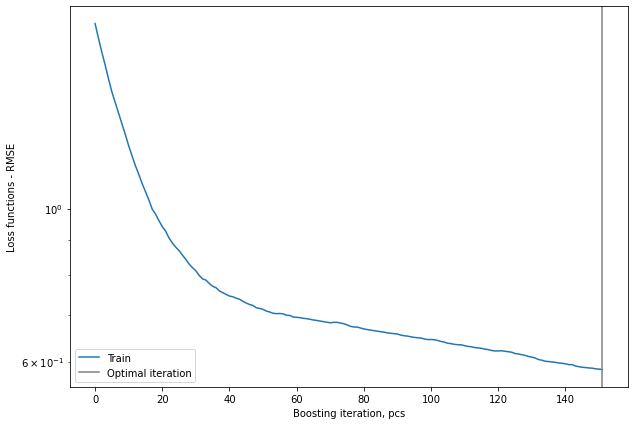

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  1.47
RMSE: 0.6
Relative RMSE(%):  0.281
MSE: 0.3
R square: 73.0%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.724
a1: 0.659
R^2: 0.738
Uncertainty
a0: 0.72+/-0.07
a1: 0.659+/-0.028


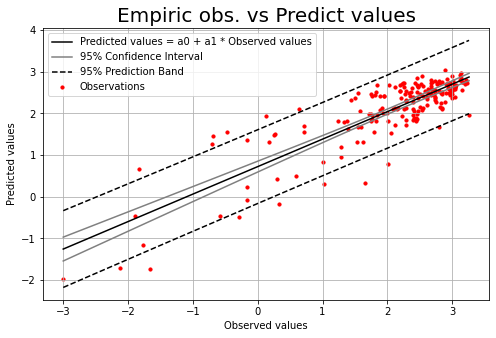

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

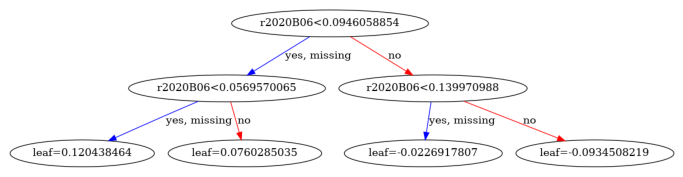

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

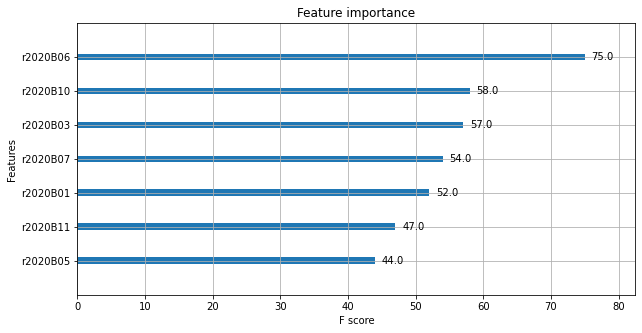

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

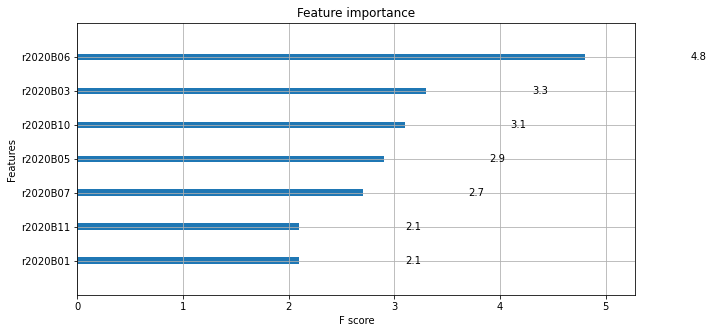

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

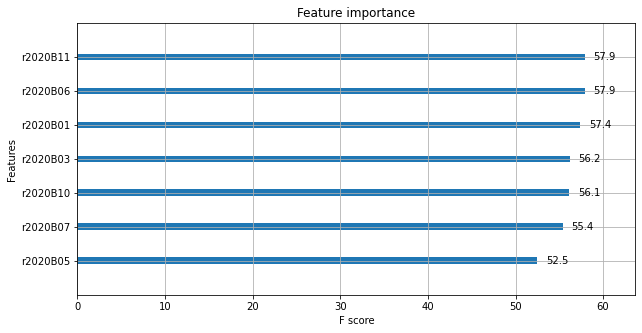

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


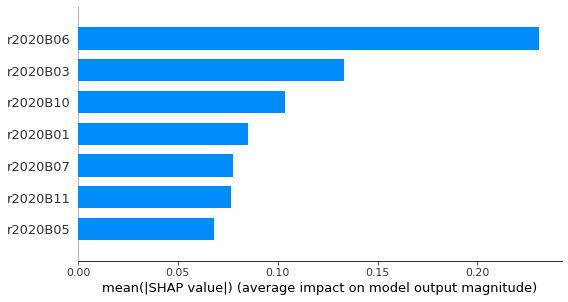

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

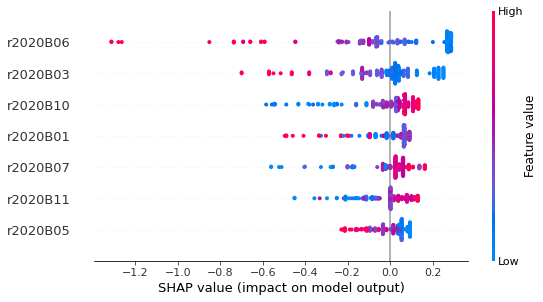

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


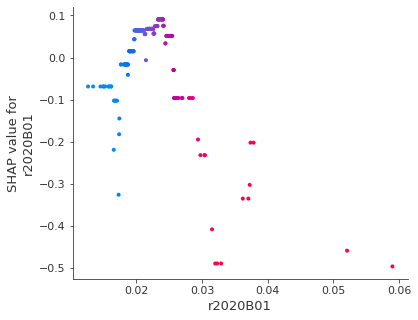

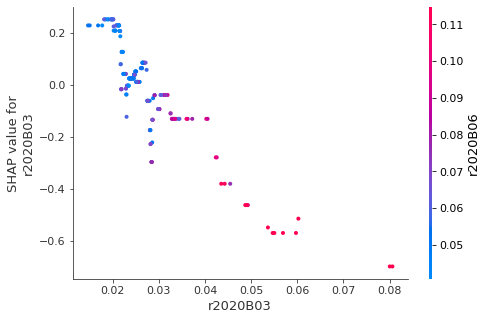

invalid value encountered in true_divide
invalid value encountered in true_divide


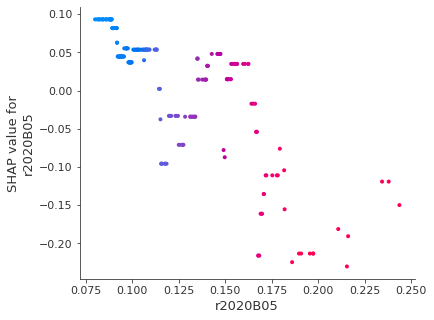

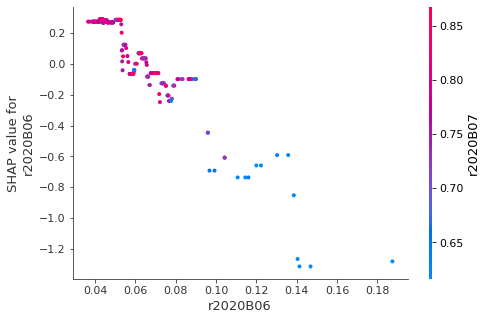

invalid value encountered in true_divide
invalid value encountered in true_divide


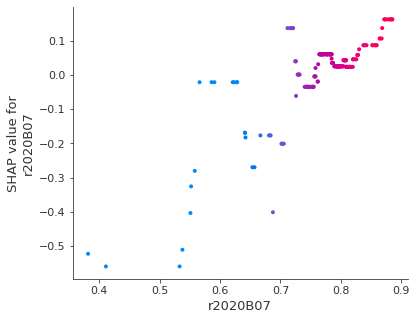

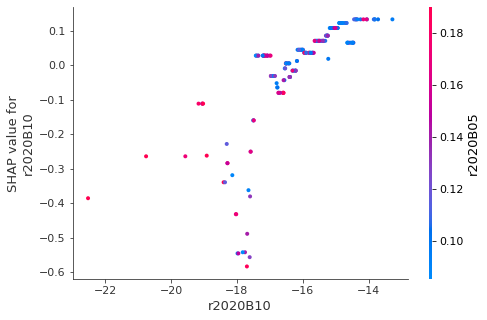

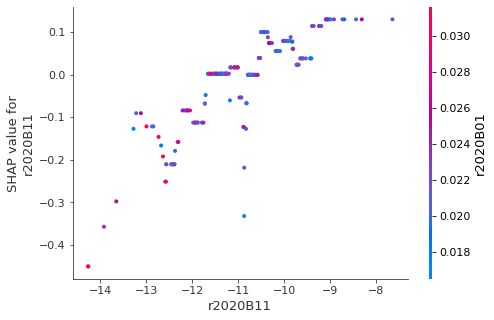

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_stem_biomass_Sentinel_data_2020.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_stem_biomass_Sentinel_data_2020.txt")